<a href="https://colab.research.google.com/github/IslamTayeb/life-edit-gene-classifier/blob/main/Code/NLP_mz/LifeEdit_NLP_Gene_Description_Processor_100_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
raw_annotation = pd.read_csv("/content/drive/MyDrive/LifeEdit Personal/Human.GRCh38.p13.annot.tsv", sep = '\t')

<ipython-input-3-fc0d9f0bafd2>:1: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_annotation = pd.read_csv("/content/drive/MyDrive/LifeEdit Personal/Human.GRCh38.p13.annot.tsv", sep = '\t')


In [4]:
raw_annotation

,GeneID,Symbol,Description,Synonyms,GeneType,EnsemblGeneID,Status,ChrAcc,ChrStart,ChrStop,Orientation,Length,GOFunctionID,GOProcessID,GOComponentID,GOFunction,GOProcess,GOComponent
0,100287102,DDX11L1,DEAD/H-box helicase 11 like 1 (pseudogene),NaN,pseudo,ENSG00000290825,active,NC_000001.11,11874,14409,positive,1652,NaN,NaN,NaN,NaN,NaN,NaN
1,653635,WASH7P,"WASP family homolog 7, pseudogene",FAM39F|WASH5P,pseudo,NaN,active,NC_000001.11,14362,29370,negative,1769,NaN,NaN,NaN,NaN,NaN,NaN
2,102466751,MIR6859-1,microRNA 6859-1,hsa-mir-6859-1,ncRNA,ENSG00000278267,active,NC_000001.11,17369,17436,negative,68,NaN,NaN,NaN,NaN,NaN,NaN
3,107985730,MIR1302-2HG,MIR1302-2 host gene,NaN,ncRNA,NaN,active,NC_000001.11,29926,31295,positive,538,NaN,NaN,NaN,NaN,NaN,NaN
4,100302278,MIR1302-2,microRNA 1302-2,MIRN1302-2|hsa-mir-1302-2,ncRNA,ENSG00000284332,active,NC_000001.11,30366,30503,positive,138,NaN,GO:0035195,NaN,NaN,miRNA-mediated gene silencing,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39371,4541,ND6,NADH dehydrogenase subunit 6,MTND6,protein-coding,NaN,active,NC_012920.1,14149,14673,negative,525,GO:0008137,GO:0006120///GO:0009060///GO:0032981///GO:0035...,GO:0005739///GO:0005743///GO:0005747,NADH dehydrogenase (ubiquinone) activity,"mitochondrial electron transport, NADH to ubiq...",mitochondrion///mitochondrial inner membrane//...
39372,4556,TRNE,tRNA-Glu,MTTE,tRNA,NaN,active,NC_012920.1,14674,14742,negative,69,NaN,NaN,NaN,NaN,NaN,NaN
39373,4519,CYTB,cytochrome b,MTCYB,protein-coding,NaN,active,NC_012920.1,14747,15887,positive,1141,GO:0008121///GO:0046872,GO:0006122///GO:0045333///GO:1902600,GO:0005739///GO:0005743///GO:0005750///GO:0016020,ubiquinol-cytochrome-c reductase activity///me...,"mitochondrial electron transport, ubiquinol to...",mitochondrion///mitochondrial inner membrane//...
39374,4576,TRNT,tRNA-Thr,MTTT,tRNA,NaN,active,NC_012920.1,15888,15953,positive,66,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Cleaning**


In [6]:
import pandas as pd
import re
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load your dataset
df = raw_annotation

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean and tokenize descriptions
def clean_text(text):
    if not isinstance(text, str):
        text = str(text)  # Convert non-string values to strings

    # Keep only alphanumeric characters and underscores
    text = re.sub(r'[^a-zA-Z0-9_ ]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply the cleaning function
df['cleaned_description'] = df['Description'].apply(clean_text)
print(df[['Description', 'cleaned_description']].head(10))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                        Description  \
0        DEAD/H-box helicase 11 like 1 (pseudogene)   
1                 WASP family homolog 7, pseudogene   
2                                   microRNA 6859-1   
3                               MIR1302-2 host gene   
4                                   microRNA 1302-2   
5      family with sequence similarity 138 member A   
6  olfactory receptor family 4 subfamily F member 5   
7                 WAS protein family homolog 2-like   
8                         uncharacterized LOC729737   
9       DEAD/H-box helicase 11 like 17 (pseudogene)   

                                cleaned_description  
0          dead h box helicase 11 like 1 pseudogene  
1                  wasp family homolog 7 pseudogene  
2                                   microrna 6859 1  
3                               mir1302 2 host gene  
4                                   microrna 1302 2  
5             family sequence similarity 138 member  
6  olfactory rec

# **Feature Extraction**

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Adjust max_features as needed
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


# **K-Means Clustering**

In [8]:
from sklearn.cluster import KMeans

# Set number of clusters to around 50
num_clusters = 100
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(tfidf_matrix)  # or embedding_matrix if using embeddings

# Assign cluster labels to the dataframe
df['cluster'] = clusters

In [9]:
for i in range(num_clusters):
    print(f"Cluster {i}:")
    print(df[df['cluster'] == i]['Description'].head(50))  # Display 10 samples per cluster

Streaming output truncated to the last 5000 lines.
142    uncharacterized LOC105378606
143    uncharacterized LOC107984909
144    uncharacterized LOC105378605
145    uncharacterized LOC105378604
148    uncharacterized LOC105378608
169    uncharacterized LOC105376674
174    uncharacterized LOC102724429
176    uncharacterized LOC105376682
177    uncharacterized LOC107984911
178    uncharacterized LOC105376686
200    uncharacterized LOC107984912
203    uncharacterized LOC107984913
213    uncharacterized LOC105376691
221    uncharacterized LOC107984915
223    uncharacterized LOC105376695
231    uncharacterized LOC112268261
245    uncharacterized LOC105376712
251    uncharacterized LOC105376717
267    uncharacterized LOC105376733
268    uncharacterized LOC105376735
279    uncharacterized LOC105376737
280    uncharacterized LOC105376739
281    uncharacterized LOC105376740
347    uncharacterized LOC102724856
Name: Description, dtype: object
Cluster 1:
12      NaN
76      NaN
129     NaN
150  

# **Supervised Model for Classification**

In [10]:
# Assign more descriptive and detailed labels to each cluster
df['function_label'] = None  # Initialize a new column for functional labels

# Assign labels for each cluster
df.loc[df['cluster'] == 0, 'function_label'] = 'Uncharacterized or Hypothetical Proteins'
df.loc[df['cluster'] == 1, 'function_label'] = 'MicroRNA Regulatory Elements'
df.loc[df['cluster'] == 2, 'function_label'] = 'Antisense RNA Transcripts'
df.loc[df['cluster'] == 3, 'function_label'] = 'Protein Family Members'
df.loc[df['cluster'] == 4, 'function_label'] = 'Cellular and Structural Proteins'
df.loc[df['cluster'] == 5, 'function_label'] = 'Pseudogenes'
df.loc[df['cluster'] == 6, 'function_label'] = 'Long Intergenic Non-Coding RNAs (lincRNAs)'
df.loc[df['cluster'] == 7, 'function_label'] = 'Genes with Undefined or Missing Annotations'
df.loc[df['cluster'] == 8, 'function_label'] = 'Proteins Associated with Cellular Processes'
df.loc[df['cluster'] == 9, 'function_label'] = 'Domain-Containing Structural Proteins'
df.loc[df['cluster'] == 10, 'function_label'] = 'Transmembrane and Transport Proteins'
df.loc[df['cluster'] == 11, 'function_label'] = 'Zinc Finger Proteins and Transcription Regulators'
df.loc[df['cluster'] == 12, 'function_label'] = 'Proteins with Sequence Homology'
df.loc[df['cluster'] == 13, 'function_label'] = 'Chromosome Open Reading Frame (C1ORF) Genes'
df.loc[df['cluster'] == 14, 'function_label'] = 'Multi-Functional Receptors and Signaling Proteins'
df.loc[df['cluster'] == 15, 'function_label'] = 'Translation and Elongation Factors'
df.loc[df['cluster'] == 16, 'function_label'] = 'DNA and Protein Binding Factors'
df.loc[df['cluster'] == 17, 'function_label'] = 'Olfactory Receptor Genes'
df.loc[df['cluster'] == 18, 'function_label'] = 'Zinc Finger Proteins Involved in Gene Regulation'
df.loc[df['cluster'] == 19, 'function_label'] = 'Proteins with “Like” Functional Characteristics'
df.loc[df['cluster'] == 20, 'function_label'] = 'Ribosomal and Mitochondrial Ribosomal Proteins'
df.loc[df['cluster'] == 21, 'function_label'] = 'Receptor and Signaling Proteins'
df.loc[df['cluster'] == 22, 'function_label'] = 'Small Nucleolar RNAs (snoRNAs)'
df.loc[df['cluster'] == 23, 'function_label'] = 'Tyrosine Kinase and Related Signaling Proteins'
df.loc[df['cluster'] == 24, 'function_label'] = 'Myosin and Muscle-Associated Proteins'
df.loc[df['cluster'] == 25, 'function_label'] = 'Leucine-Rich Repeat and Scaffold Proteins'
df.loc[df['cluster'] == 26, 'function_label'] = 'Homeobox and Developmental Regulators'
df.loc[df['cluster'] == 27, 'function_label'] = 'Proteins with Repeated Structural Motifs'
df.loc[df['cluster'] == 28, 'function_label'] = 'Solute Carrier (SLC) Transporter Proteins'
df.loc[df['cluster'] == 29, 'function_label'] = 'Deprecated or Replaced Gene IDs'
df.loc[df['cluster'] == 30, 'function_label'] = 'Cell Cycle and Transcriptional Regulators'
df.loc[df['cluster'] == 31, 'function_label'] = 'Proteins Related to Specific Functions or Pathways'
df.loc[df['cluster'] == 32, 'function_label'] = 'Cluster-Associated Histones and Regulatory RNAs'
df.loc[df['cluster'] == 33, 'function_label'] = 'Beta Subunits and Accessory Proteins'
df.loc[df['cluster'] == 34, 'function_label'] = 'Sulfotransferases and Enzymatic Proteins'
df.loc[df['cluster'] == 35, 'function_label'] = 'Transcription Factors and Splicing Regulators'
df.loc[df['cluster'] == 36, 'function_label'] = 'Protein Complex Subunits and Organizing Proteins'
df.loc[df['cluster'] == 37, 'function_label'] = 'Membrane and Vesicle-Associated Proteins'
df.loc[df['cluster'] == 38, 'function_label'] = 'Intronic and Regulatory RNA Transcripts'
df.loc[df['cluster'] == 39, 'function_label'] = 'Divergent Transcripts and Regulatory RNAs'
df.loc[df['cluster'] == 40, 'function_label'] = 'MicroRNA and Small Nucleolar RNA Host Genes'
df.loc[df['cluster'] == 41, 'function_label'] = 'Phosphatases and Regulatory Enzymes'
df.loc[df['cluster'] == 42, 'function_label'] = 'Protein Families with Sequence Similarity'
df.loc[df['cluster'] == 43, 'function_label'] = 'Nucleolar Proteins and Small RNA Components'
df.loc[df['cluster'] == 44, 'function_label'] = 'C-Type Lectin Domain-Containing Proteins'
df.loc[df['cluster'] == 45, 'function_label'] = 'Protein-Protein Interaction Partners'
df.loc[df['cluster'] == 46, 'function_label'] = 'Kinases and Phosphorylation Enzymes'
df.loc[df['cluster'] == 47, 'function_label'] = 'Solute Carrier Family and Transport Proteins'
df.loc[df['cluster'] == 48, 'function_label'] = 'Readthrough and Fusion Transcripts'
df.loc[df['cluster'] == 49, 'function_label'] = 'Synthase Enzymes and Catalytic Proteins'
df.loc[df['cluster'] == 50, 'function_label'] = 'Protease Inhibitors and Cysteine-Rich Secretory Proteins'
df.loc[df['cluster'] == 51, 'function_label'] = 'Splicing Variants and Alternative Promoters'
df.loc[df['cluster'] == 52, 'function_label'] = 'Pseudouridine Synthases and RNA Modifying Enzymes'
df.loc[df['cluster'] == 53, 'function_label'] = 'Enzymes Involved in Lipid Metabolism'
df.loc[df['cluster'] == 54, 'function_label'] = 'Neuropeptides and Hormone Receptors'
df.loc[df['cluster'] == 55, 'function_label'] = 'Proteins Involved in the Immune and Inflammatory Responses'
df.loc[df['cluster'] == 56, 'function_label'] = 'G Protein-Coupled Receptors (GPCRs)'
df.loc[df['cluster'] == 57, 'function_label'] = 'Hepatic and Endothelial Growth Factors'
df.loc[df['cluster'] == 58, 'function_label'] = 'Cytokines and Chemokines'
df.loc[df['cluster'] == 59, 'function_label'] = 'Histones and Chromatin Remodeling Factors'
df.loc[df['cluster'] == 60, 'function_label'] = 'Mitochondrial Transport and Metabolism Proteins'
df.loc[df['cluster'] == 61, 'function_label'] = 'Calcium Signaling and Ion Transport Proteins'
df.loc[df['cluster'] == 62, 'function_label'] = 'Proteins Involved in DNA Damage Repair'
df.loc[df['cluster'] == 63, 'function_label'] = 'Caspases and Apoptotic Regulators'
df.loc[df['cluster'] == 64, 'function_label'] = 'Vesicle Trafficking and Membrane Transport Proteins'
df.loc[df['cluster'] == 65, 'function_label'] = 'Proteins Associated With Neural Development and Function'
df.loc[df['cluster'] == 66, 'function_label'] = 'Myelin-Associated and Neuroprotective Proteins'
df.loc[df['cluster'] == 67, 'function_label'] = 'Keratin and Cytoskeletal Proteins'
df.loc[df['cluster'] == 68, 'function_label'] = 'Insulin Signaling and Glucose Transport Proteins'
df.loc[df['cluster'] == 69, 'function_label'] = 'Neurotrophins and Growth Factor Receptors'
df.loc[df['cluster'] == 70, 'function_label'] = 'Transcriptional Coactivators and Corepressors'
df.loc[df['cluster'] == 71, 'function_label'] = 'Mitochondrial DNA Polymerases and Repair Enzymes'
df.loc[df['cluster'] == 72, 'function_label'] = 'Adhesion Molecules and Extracellular Matrix Proteins'
df.loc[df['cluster'] == 73, 'function_label'] = 'Cytoskeletal Regulators and Actin-Binding Proteins'
df.loc[df['cluster'] == 74, 'function_label'] = 'Neurotransmitter Receptors and Synaptic Proteins'
df.loc[df['cluster'] == 75, 'function_label'] = 'Autophagy and Lysosomal Proteins'
df.loc[df['cluster'] == 76, 'function_label'] = 'Ubiquitin Ligases and Proteasome-Related Proteins'
df.loc[df['cluster'] == 77, 'function_label'] = 'Heat Shock and Stress Response Proteins'
df.loc[df['cluster'] == 78, 'function_label'] = 'Glutamate Receptors and Ion Channels'
df.loc[df['cluster'] == 79, 'function_label'] = 'Wnt Signaling Pathway Proteins'
df.loc[df['cluster'] == 80, 'function_label'] = 'Toll-Like Receptors and Innate Immune Signaling'
df.loc[df['cluster'] == 81, 'function_label'] = 'Retinoic Acid Receptors and Metabolic Regulators'
df.loc[df['cluster'] == 82, 'function_label'] = 'Steroid and Nuclear Hormone Receptors'
df.loc[df['cluster'] == 83, 'function_label'] = 'Protein Phosphatases and Kinase Inhibitors'
df.loc[df['cluster'] == 84, 'function_label'] = 'RNA Helicases and Processing Enzymes'
df.loc[df['cluster'] == 85, 'function_label'] = 'Glycosyltransferases and Sugar-Processing Enzymes'
df.loc[df['cluster'] == 86, 'function_label'] = 'Platelet Activation and Clotting Factors'
df.loc[df['cluster'] == 87, 'function_label'] = 'Membrane Transporters and Ion Channels'
df.loc[df['cluster'] == 88, 'function_label'] = 'Antimicrobial Peptides and Defensins'
df.loc[df['cluster'] == 89, 'function_label'] = 'Proteins Involved in Redox Reactions'
df.loc[df['cluster'] == 90, 'function_label'] = 'Signal Peptides and Secretory Proteins'
df.loc[df['cluster'] == 91, 'function_label'] = 'Nuclear Export and Import Proteins'
df.loc[df['cluster'] == 92, 'function_label'] = 'Proteins Involved in Mitochondrial Fission and Fusion'
df.loc[df['cluster'] == 93, 'function_label'] = 'Steroid Biosynthesis and Metabolism Proteins'
df.loc[df['cluster'] == 94, 'function_label'] = 'Ciliary and Flagellar Proteins'
df.loc[df['cluster'] == 95, 'function_label'] = 'Hypoxia-Responsive Proteins'
df.loc[df['cluster'] == 96, 'function_label'] = 'Fibroblast Growth Factors and Their Receptors'
df.loc[df['cluster'] == 97, 'function_label'] = 'Synaptic Vesicle and Neurotransmitter Release Proteins'
df.loc[df['cluster'] == 98, 'function_label'] = 'Cell Cycle Checkpoint Regulators'
df.loc[df['cluster'] == 99, 'function_label'] = 'Tumor Suppressors and Oncoproteins'

# Check if the labels have been assigned correctly
print(df[['cluster', 'Description', 'function_label']].head(20))


    cluster                                        Description  \
0        43         DEAD/H-box helicase 11 like 1 (pseudogene)   
1        63                  WASP family homolog 7, pseudogene   
2         2                                    microRNA 6859-1   
3        73                                MIR1302-2 host gene   
4         2                                    microRNA 1302-2   
5        19       family with sequence similarity 138 member A   
6         3   olfactory receptor family 4 subfamily F member 5   
7        63                  WAS protein family homolog 2-like   
8         0                          uncharacterized LOC729737   
9        43        DEAD/H-box helicase 11 like 17 (pseudogene)   
10       63           WAS protein family homolog 9, pseudogene   
11        2                                    microRNA 6859-2   
12        1                                                NaN   
13        0                       uncharacterized LOC112268260   
14        

In [11]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load the BERT model for generating embeddings
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Use an appropriate pre-trained model

# Generate embeddings for the cleaned descriptions
embeddings = model.encode(df['cleaned_description'].tolist())

# Convert the embeddings into a DataFrame for easier handling
embedding_df = pd.DataFrame(embeddings)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Filter out rows that don't have labels for training
labeled_data = df.dropna(subset=['function_label'])

# Use the BERT embeddings for the labeled data as features (X)
X = embedding_df.loc[labeled_data.index]
y = labeled_data['function_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                                                            precision    recall  f1-score   support

      Adhesion Molecules and Extracellular Matrix Proteins       1.00      1.00      1.00        14
                      Antimicrobial Peptides and Defensins       1.00      1.00      1.00        16
                                 Antisense RNA Transcripts       1.00      1.00      1.00       367
                          Autophagy and Lysosomal Proteins       0.00      0.00      0.00        28
                      Beta Subunits and Accessory Proteins       1.00      0.83      0.91         6
                  C-Type Lectin Domain-Containing Proteins       1.00      0.67      0.80         3
              Calcium Signaling and Ion Transport Proteins       1.00      1.00      1.00        13
                         Caspases and Apoptotic Regulators       1.00      0.51      0.68        53
                          Cell Cycle Checkpoint Regulators       1.00      0.96      0.98        84

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Hyperparameterize Tuning**

Grid-search Failing, use Random Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

# Initialize Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Re-train the classifier with the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the optimized model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


PicklingError: Could not pickle the task to send it to the workers.

In [16]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# Define the hyperparameter grid with ranges for Randomized Search
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=5)],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples at a leaf node
    'bootstrap': [True, False]  # Whether to use bootstrap samples
}

# Initialize Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter combinations to try
    cv=3,  # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model using Randomized Search
random_search.fit(X_train, y_train)

# Retrieve the best parameters and train the final model
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train a new RandomForestClassifier using the best parameters
clf = RandomForestClassifier(**best_params)
clf.fit(X_train, y_train)

# Evaluate the optimized model on the test set
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

# **Classify Unlabeled Data**

In [17]:
# Filter out the unlabeled data
unlabeled_data = df[df['function_label'].isna()]

# Check if there are any unlabeled samples
if len(unlabeled_data) == 0:
    print("No unlabeled data found. All data points are labeled.")
else:
    # Use the BERT embeddings for the unlabeled data
    X_unlabeled = embedding_df.loc[unlabeled_data.index]

    # Predict the labels for the unlabeled data
    predicted_labels = clf.predict(X_unlabeled)

    # Assign the predicted labels to the original DataFrame
    df.loc[unlabeled_data.index, 'function_label'] = predicted_labels

    # View some of the newly labeled data
    print(df[['Description', 'function_label']].tail(20))


No unlabeled data found. All data points are labeled.


#**Model Finalization**
To download the Random Forest Classifier: [Drive Link](https://drive.google.com/file/d/15ppZiqDKj1BrsCZVRQLFgrT1Jebo9D9V/view?usp=sharing )

In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(clf, 'random_forest_gene_classifier_100Clusters.pkl')

# To load the model later, you can use:
# clf = joblib.load('random_forest_gene_classifier.pkl')

['random_forest_gene_classifier_100Clusters.pkl']

In [18]:
# Save the DataFrame to a CSV file
df.to_csv('labeled_gene_data_100Clusters.csv', index=False)

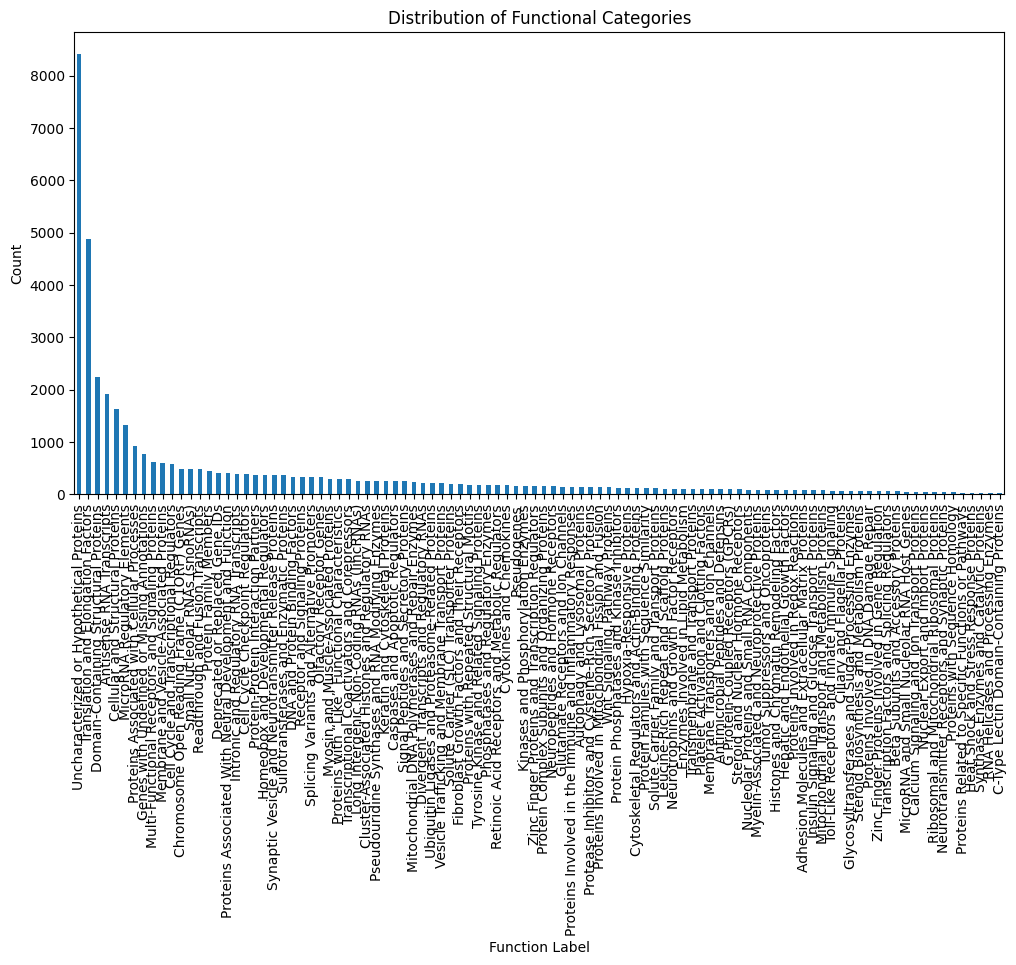

In [19]:
import matplotlib.pyplot as plt

# Plot the distribution of functional categories
label_counts = df['function_label'].value_counts()
label_counts.plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Functional Categories')
plt.xlabel('Function Label')
plt.ylabel('Count')
plt.show()

# **Classifier: Non-functional**

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming 'embedding_df' contains BERT embeddings for each gene and 'df' contains group info
grouped_features = []
group_labels = []

# Replace with the actual column name for group identification
group_column = 'function_label'

# Iterate through each unique group
for group_id in df[group_column].unique():
    # Get indices of genes in this group
    group_indices = df[df[group_column] == group_id].index
    # Compute the average of the embeddings for this group
    group_avg = embedding_df.loc[group_indices].mean(axis=0)
    grouped_features.append(group_avg)
    # Assuming there's a label for each group in 'group_label'
    group_label = df[df[group_column] == group_id]['function_label'].iloc[0]
    group_labels.append(group_label)

# Convert to numpy arrays for modeling
X = np.array(grouped_features)
y = np.array(group_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

                                                            precision    recall  f1-score   support

                      Antimicrobial Peptides and Defensins       0.00      0.00      0.00       0.0
                          Autophagy and Lysosomal Proteins       0.00      0.00      0.00       0.0
                      Beta Subunits and Accessory Proteins       0.00      0.00      0.00       1.0
              Calcium Signaling and Ion Transport Proteins       0.00      0.00      0.00       0.0
                         Caspases and Apoptotic Regulators       0.00      0.00      0.00       0.0
               Chromosome Open Reading Frame (C1ORF) Genes       0.00      0.00      0.00       0.0
           Cluster-Associated Histones and Regulatory RNAs       0.00      0.00      0.00       1.0
                     Domain-Containing Structural Proteins       0.00      0.00      0.00       1.0
                       G Protein-Coupled Receptors (GPCRs)       0.00      0.00      0.00       1.0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Ensure group_labels is a pandas Series
group_labels = pd.Series(group_labels)

# Convert grouped_features to a DataFrame
grouped_features_df = pd.DataFrame(grouped_features)

# Count the number of samples per class
class_counts = group_labels.value_counts()
print("Class Counts Before Filtering:", class_counts)

# Filter out classes with fewer than 2 samples
valid_classes = class_counts[class_counts >= 2].index
if valid_classes.empty:
    raise ValueError("No classes with sufficient samples found. Check your data.")

filtered_features = grouped_features_df[group_labels.isin(valid_classes)]
filtered_labels = group_labels[group_labels.isin(valid_classes)]

if filtered_features.empty or filtered_labels.empty:
    raise ValueError("Filtered features or labels are empty. Adjust your filtering criteria.")

print("Filtered Features Shape:", filtered_features.shape)
print("Filtered Labels Shape:", filtered_labels.shape)

# Optionally apply SMOTE for balancing
smote = SMOTE(random_state=42)
balanced_features, balanced_labels = smote.fit_resample(filtered_features, filtered_labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    balanced_features, balanced_labels, test_size=0.2, random_state=42
)

# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=0))


Class Counts Before Filtering: Nucleolar Proteins and Small RNA Components              1
Mitochondrial Transport and Metabolism Proteins          1
Transmembrane and Transport Proteins                     1
Retinoic Acid Receptors and Metabolic Regulators         1
Zinc Finger Proteins and Transcription Regulators        1
                                                        ..
Long Intergenic Non-Coding RNAs (lincRNAs)               1
Sulfotransferases and Enzymatic Proteins                 1
Proteins Involved in Mitochondrial Fission and Fusion    1
Protein-Protein Interaction Partners                     1
Pseudogenes                                              1
Name: count, Length: 100, dtype: int64


ValueError: No classes with sufficient samples found. Check your data.

Classification work

In [33]:
# Assuming the DataFrame `df` contains columns: "group" and "gene_id"
# - "group": The name of the group to which the gene belongs
# - "gene_id": The identifier of the gene

# Create a dictionary to store group_labels
group_labels = {}

# Populate group_labels by grouping genes based on the "group" column
for group_name, group_data in df.groupby('function_label'):
    group_labels[group_name] = group_data['Description'].tolist()

# Display the group_labels dictionary
print(group_labels)


{'Adhesion Molecules and Extracellular Matrix Proteins': ['testis specific serine kinase 3', 'serine/threonine kinase 40', 'microtubule associated serine/threonine kinase 2', 'MAPK interacting serine/threonine kinase 1', 'serine/threonine/tyrosine interacting like 2', 'dual serine/threonine and tyrosine protein kinase', 'AKT serine/threonine kinase 3', 'VRK serine/threonine kinase 2', 'BUB1 mitotic checkpoint serine/threonine kinase', 'serine/threonine kinase 39', 'serine/threonine kinase 17b', 'serine/threonine kinase 36', 'serine/threonine kinase 16', 'serine/threonine kinase 11 interacting protein', 'ILK associated serine/threonine phosphatase', 'PAS domain containing serine/threonine kinase', 'serine/threonine kinase 25', 'Raf-1 proto-oncogene, serine/threonine kinase', 'PX domain containing serine/threonine kinase like', 'ATR serine/threonine kinase', 'serine/threonine kinase 32B', 'NIM1 serine/threonine protein kinase', 'microtubule associated serine/threonine kinase family membe

In [34]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Sample gene embeddings (embedding_df) and group mappings
# Assuming `embedding_df` contains gene embeddings and `group_labels` contains the group mappings
group_labels = {'Adhesion Molecules and Extracellular Matrix Proteins': ['testis specific serine kinase 3', 'serine/threonine kinase 40', 'microtubule associated serine/threonine kinase 2', 'MAPK interacting serine/threonine kinase 1', 'serine/threonine/tyrosine interacting like 2', 'dual serine/threonine and tyrosine protein kinase', 'AKT serine/threonine kinase 3', 'VRK serine/threonine kinase 2', 'BUB1 mitotic checkpoint serine/threonine kinase', 'serine/threonine kinase 39', 'serine/threonine kinase 17b', 'serine/threonine kinase 36', 'serine/threonine kinase 16', 'serine/threonine kinase 11 interacting protein', 'ILK associated serine/threonine phosphatase', 'PAS domain containing serine/threonine kinase', 'serine/threonine kinase 25', 'Raf-1 proto-oncogene, serine/threonine kinase', 'PX domain containing serine/threonine kinase like', 'ATR serine/threonine kinase', 'serine/threonine kinase 32B', 'NIM1 serine/threonine protein kinase', 'microtubule associated serine/threonine kinase family member 4', 'testis specific serine kinase 1B', 'serine/threonine kinase 32A', 'serine/threonine kinase 10', 'receptor interacting serine/threonine kinase 1', 'serine/threonine kinase 19', 'serine/threonine kinase 38', 'Pim-1 proto-oncogene, serine/threonine kinase', 'serine/threonine kinase 31', 'serine/threonine kinase 17a', 'serine/threonine/tyrosine interacting like 1', 'B-Raf proto-oncogene, serine/threonine kinase', 'Fas activated serine/threonine kinase', 'MOS proto-oncogene, serine/threonine kinase', 'protein serine kinase H2', 'receptor interacting serine/threonine kinase 2', 'serine/threonine kinase 3', 'serine/threonine kinase like domain containing 1', 'microtubule associated serine/threonine kinase like', 'serine/threonine kinase 32C', 'BR serine/threonine kinase 2', 'serine/threonine kinase 33', 'ATM serine/threonine kinase', 'serine/threonine/tyrosine kinase 1', 'serine/threonine kinase receptor associated protein', 'serine/threonine kinase 38 like', 'citron rho-interacting serine/threonine kinase', 'PGAM family member 5, mitochondrial serine/threonine protein phosphatase', 'serine/threonine kinase 24', 'testis specific serine kinase 4', 'receptor interacting serine/threonine kinase 3', 'serine/threonine/tyrosine interacting protein', 'VRK serine/threonine kinase 1', 'AKT serine/threonine kinase 1', 'BUB1 mitotic checkpoint serine/threonine kinase B', 'proline-serine-threonine phosphatase interacting protein 1', 'protein serine kinase H1', 'proline-serine-threonine phosphatase interacting protein 2', 'serine/threonine kinase 11', 'MAPK interacting serine/threonine kinase 2', 'microtubule associated serine/threonine kinase 1', 'microtubule associated serine/threonine kinase 3', 'testis specific serine kinase 6', 'AKT serine/threonine kinase 2', 'testis specific serine kinase substrate', 'VRK serine/threonine kinase 3', 'BR serine/threonine kinase 1', 'serine/threonine kinase 35', 'serine/threonine kinase 4', 'receptor interacting serine/threonine kinase 4', 'testis specific serine kinase 2', 'Pim-3 proto-oncogene, serine/threonine kinase', 'A-Raf proto-oncogene, serine/threonine kinase', 'Pim-2 proto-oncogene, serine/threonine kinase', 'serine/threonine kinase 26'], 'Antimicrobial Peptides and Defensins': ['interleukin 22 receptor subunit alpha 1', 'interleukin 23 receptor', 'interleukin 12 receptor subunit beta 2', 'interleukin enhancer binding factor 2', 'interleukin 6 receptor', 'interleukin 10', 'interleukin 19', 'interleukin 20', 'interleukin 24', 'interleukin 1 receptor type 2', 'interleukin 1 receptor type 1', 'interleukin 1 receptor like 2', 'interleukin 1 receptor like 1', 'interleukin 18 receptor 1', 'interleukin 18 receptor accessory protein', 'interleukin 1 alpha', 'interleukin 1 beta', 'interleukin 37', 'interleukin 36 gamma', 'interleukin 36 alpha', 'interleukin 36 beta', 'interleukin 36 receptor antagonist', 'interleukin 1 family member 10', 'interleukin 1 receptor antagonist', 'interleukin 5 receptor subunit alpha', 'interleukin 17 receptor E', 'interleukin 17 receptor C', 'interleukin 1 receptor associated kinase 2', 'interleukin 17 receptor B', 'interleukin 17 receptor D', 'interleukin 20 receptor subunit beta', 'interleukin 12A', 'interleukin 1 receptor accessory protein', 'interleukin 2', 'interleukin 21', 'interleukin 15', 'interleukin 7 receptor', 'interleukin 31 receptor A', 'interleukin 6 cytokine family signal transducer', 'interleukin 3', 'interleukin 5', 'interleukin 13', 'interleukin 4', 'interleukin 9', 'interleukin 17B', 'interleukin 12B', 'interleukin 17A', 'interleukin 17F', 'interleukin 1 receptor associated kinase 1 binding protein 1', 'interleukin 20 receptor subunit alpha', 'interleukin 22 receptor subunit alpha 2', 'interleukin 6', 'interleukin 7', 'interleukin 33', 'interleukin 11 receptor subunit alpha', 'nuclear factor, interleukin 3 regulated', 'interleukin 15 receptor subunit alpha', 'interleukin 2 receptor subunit alpha', 'interleukin 18 binding protein', 'interleukin 18', 'interleukin 10 receptor subunit alpha', 'interleukin 1 receptor associated kinase 4', 'interleukin 23 subunit alpha', 'interleukin 1 receptor associated kinase 3', 'interleukin 26', 'interleukin 22', 'interleukin 31', 'interleukin 17D', 'interleukin 25', 'interleukin 16', 'interleukin 32', 'interleukin 4 receptor', 'interleukin 21 receptor', 'interleukin 27', 'interleukin 34', 'interleukin 17C', 'interleukin enhancer binding factor 3', 'interleukin 27 receptor subunit alpha', 'interleukin 12 receptor subunit beta 1', 'interleukin 4 induced 1', 'interleukin 11', 'interleukin 10 receptor subunit beta', 'interleukin 17 receptor A', 'LIF interleukin 6 family cytokine', 'interleukin 2 receptor subunit beta', 'interleukin 17 receptor E like', 'interleukin 3 receptor subunit alpha', 'interleukin 1 receptor accessory protein like 1', 'interleukin 2 receptor subunit gamma', 'interleukin 1 receptor accessory protein like 2', 'interleukin 13 receptor subunit alpha 2', 'interleukin 13 receptor subunit alpha 1', 'interleukin 1 receptor associated kinase 1', 'interleukin 9 receptor'], 'Antisense RNA Transcripts': ['microRNA 6859-1', 'microRNA 1302-2', 'microRNA 6859-2', 'microRNA 12136', 'microRNA 200b', 'microRNA 200a', 'microRNA 429', 'microRNA 6726', 'microRNA 6727', 'microRNA 6808', 'microRNA 4251', 'microRNA 551a', 'microRNA 4689', 'microRNA 4252', 'microRNA 6728', 'microRNA 34a', 'microRNA 5697', 'microRNA 6729', 'microRNA 7846', 'microRNA 4632', 'microRNA 6730', 'microRNA 3675', 'microRNA 3972', 'microRNA 4695', 'microRNA 1290', 'microRNA 6084', 'microRNA 1256', 'microRNA 4418', 'microRNA 6127', 'microRNA 4684', 'microRNA 4253', 'microRNA 3115', 'microRNA 378f', 'microRNA 6731', 'microRNA 4425', 'microRNA 3917', 'microRNA 1976', 'microRNA 4420', 'microRNA 4254', 'microRNA 5585', 'microRNA 3605', 'microRNA 552', 'microRNA 4255', 'microRNA 6732', 'microRNA 5581', 'microRNA 3659', 'microRNA 30e', 'microRNA 30c-1', 'microRNA 6733', 'microRNA 6734', 'microRNA 6735', 'microRNA 6079', 'microRNA 5584', 'microRNA 4421', 'microRNA 6500', 'microRNA 761', 'microRNA 4781', 'microRNA 4422', 'microRNA 4711', 'microRNA 12132', 'microRNA 3116-1', 'microRNA 3116-2', 'microRNA 6068', 'microRNA 4794', 'microRNA 3671', 'microRNA 101-1', 'microRNA 3117', 'microRNA 1262', 'microRNA 186', 'microRNA 7156', 'microRNA 4423', 'microRNA 7856', 'microRNA 760', 'microRNA 12133', 'microRNA 378g', 'microRNA 2682', 'microRNA 137', 'microRNA 553', 'microRNA 7852', 'microRNA 197', 'microRNA 4256', 'microRNA 11399', 'microRNA 548ac', 'microRNA 320b-1', 'microRNA 942', 'microRNA 6736', 'microRNA 5087', 'microRNA 6077', 'microRNA 6878', 'microRNA 4257', 'microRNA 554', 'microRNA 8083', 'microRNA 6737', 'microRNA 5698', 'microRNA 190b', 'microRNA 4258', 'microRNA 92b', 'microRNA 555', 'microRNA 6738', 'microRNA 9-1', 'microRNA 765', 'microRNA 4259', 'microRNA 5187', 'microRNA 4654', 'microRNA 556', 'microRNA 3658', 'microRNA 921', 'microRNA 1255b-2', 'microRNA 557', 'microRNA 3119-2', 'microRNA 3119-1', 'microRNA 1295a', 'microRNA 1295b', 'microRNA 214', 'microRNA 3120', 'microRNA 199a-2', 'microRNA 1843', 'microRNA 488', 'microRNA 4424', 'microRNA 12116', 'microRNA 3121', 'microRNA 4426', 'microRNA 1278', 'microRNA 4735', 'microRNA 181b-1', 'microRNA 181a-1', 'microRNA 5191', 'microRNA 1231', 'microRNA 6739', 'microRNA 6740', 'microRNA 135b', 'microRNA 6769b', 'microRNA 29c', 'microRNA 29b-2', 'microRNA 205', 'microRNA 4260', 'microRNA 3122', 'microRNA 215', 'microRNA 194-1', 'microRNA 664a', 'microRNA 320b-2', 'microRNA 4742', 'microRNA 6741', 'microRNA 5008', 'microRNA 3620', 'microRNA 6742', 'microRNA 4666a', 'microRNA 1182', 'microRNA 4427', 'microRNA 4671', 'microRNA 4753', 'microRNA 1537', 'microRNA 4428', 'microRNA 3123', 'microRNA 4677', 'microRNA 3916', 'microRNA 3124', 'microRNA 7158', 'microRNA 7515', 'microRNA 4261', 'microRNA 4429', 'microRNA 548s', 'microRNA 4262', 'microRNA 3681', 'microRNA 3125', 'microRNA 4757', 'microRNA 1301', 'microRNA 4263', 'microRNA 558', 'microRNA 4765', 'microRNA 4430', 'microRNA 548ad', 'microRNA 559', 'microRNA 548ba', 'microRNA 8485', 'microRNA 4431', 'microRNA 3682', 'microRNA 217', 'microRNA 216a', 'microRNA 216b', 'microRNA 4432', 'microRNA 5192', 'microRNA 4433b', 'microRNA 4433a', 'microRNA 4434', 'microRNA 4778', 'microRNA 3126', 'microRNA 1285-2', 'microRNA 5000', 'microRNA 4264', 'microRNA 8080', 'microRNA 6071', 'microRNA 4779', 'microRNA 4771-1', 'microRNA 4435-1', 'microRNA 4780', 'microRNA 4436a', 'microRNA 3127', 'microRNA 5696', 'microRNA 4772', 'microRNA 4265', 'microRNA 4266', 'microRNA 4267', 'microRNA 4436b-1', 'microRNA 4436b-2', 'microRNA 4435-2', 'microRNA 4771-2', 'microRNA 1302-3', 'microRNA 4782', 'microRNA 4783', 'microRNA 4784', 'microRNA 663b', 'microRNA 9986', 'microRNA 3679', 'microRNA 5590', 'microRNA 128-1', 'microRNA 7157', 'microRNA 9899', 'microRNA 4773-1', 'microRNA 4773-2', 'microRNA 6888', 'microRNA 4785', 'microRNA 4774', 'microRNA 933', 'microRNA 10b', 'microRNA 7704', 'microRNA 1246', 'microRNA 4444-1', 'microRNA 3128', 'microRNA 6512', 'microRNA 1258', 'microRNA 4437', 'microRNA 548ae-1', 'microRNA 561', 'microRNA 1245a', 'microRNA 1245b', 'microRNA 3606', 'microRNA 3129', 'microRNA 3130-2', 'microRNA 3130-1', 'microRNA 2355', 'microRNA 7845', 'microRNA 1302-4', 'microRNA 4775', 'microRNA 548f-2', 'microRNA 4776-1', 'microRNA 4776-2', 'microRNA 4438', 'microRNA 6809', 'microRNA 6513', 'microRNA 6810', 'microRNA 26b', 'microRNA 9500', 'microRNA 375', 'microRNA 3131', 'microRNA 153-1', 'microRNA 3132', 'microRNA 4268', 'microRNA 4439', 'microRNA 5702', 'microRNA 5703', 'microRNA 4777', 'microRNA 1244-1', 'microRNA 1471', 'microRNA 562', 'microRNA 5001', 'microRNA 6811', 'microRNA 4440', 'microRNA 4441', 'microRNA 4269', 'microRNA 2467', 'microRNA 4786', 'microRNA 149', 'microRNA 3133', 'microRNA 4790', 'microRNA 12127', 'microRNA 378b', 'microRNA 885', 'microRNA 4270', 'microRNA 3134', 'microRNA 563', 'microRNA 3714', 'microRNA 4791', 'microRNA 3135a', 'microRNA 4442', 'microRNA 466', 'microRNA 548ay', 'microRNA 128-2', 'microRNA 26a-1', 'microRNA 6822', 'microRNA 138-1', 'microRNA 564', 'microRNA 1226', 'microRNA 4443', 'microRNA 2115', 'microRNA 6823', 'microRNA 711', 'microRNA 6824', 'microRNA 4793', 'microRNA 425', 'microRNA 191', 'microRNA 6890', 'microRNA 4271', 'microRNA 5193', 'microRNA 5787', 'microRNA 6872', 'microRNA 4787', 'microRNA let-7g', 'microRNA 135a-1', 'microRNA 8064', 'microRNA 3938', 'microRNA 548bb', 'microRNA 4272', 'microRNA 3136', 'microRNA 1284', 'microRNA 4444-2', 'microRNA 1324', 'microRNA 4273', 'microRNA 3923', 'microRNA 5688', 'microRNA 4795', 'microRNA 8060', 'microRNA 3921', 'microRNA 548ab', 'microRNA 4445', 'microRNA 567', 'microRNA 9900', 'microRNA 8076', 'microRNA 4446', 'microRNA 568', 'microRNA 4796', 'microRNA 4447', 'microRNA 6529', 'microRNA 198', 'microRNA 5682', 'microRNA 7110', 'microRNA 5002', 'microRNA 6083', 'microRNA 544b', 'microRNA 5092', 'microRNA 548i-1', 'microRNA 6825', 'microRNA 7976', 'microRNA 12124', 'microRNA 6826', 'microRNA 5704', 'microRNA 6827', 'microRNA 4788', 'microRNA 5186', 'microRNA 3919', 'microRNA 15b', 'microRNA 16-2', 'microRNA 1263', 'microRNA 551b', 'microRNA 6828', 'microRNA 569', 'microRNA 4789', 'microRNA 7977', 'microRNA 4448', 'microRNA 1224', 'microRNA 5588', 'microRNA 548aq', 'microRNA 1248', 'microRNA 944', 'microRNA 3137', 'microRNA 570', 'microRNA 6829', 'microRNA 4797', 'microRNA 922', 'microRNA 571', 'microRNA 943', 'microRNA 4800', 'microRNA 378d-1', 'microRNA 4798', 'microRNA 4274', 'microRNA 95', 'microRNA 548i-2', 'microRNA 3138', 'microRNA 572', 'microRNA 12113', 'microRNA 5091', 'microRNA 218-1', 'microRNA 7978', 'microRNA 12115', 'microRNA 573', 'microRNA 4275', 'microRNA 1255b-1', 'microRNA 4801', 'microRNA 574', 'microRNA 5591', 'microRNA 4802', 'microRNA 8053', 'microRNA 4449', 'microRNA 548ag-1', 'microRNA 1269a', 'microRNA 4450', 'microRNA 548ah', 'microRNA 575', 'microRNA 4451', 'microRNA 4452', 'microRNA 5705', 'microRNA 3684', 'microRNA 8066', 'microRNA 1255a', 'microRNA 576', 'microRNA 297', 'microRNA 367', 'microRNA 302d', 'microRNA 302a', 'microRNA 302c', 'microRNA 302b', 'microRNA 1243', 'microRNA 8082', 'microRNA 577', 'microRNA 1973', 'microRNA 2054', 'microRNA 3139', 'microRNA 7849', 'microRNA 548g', 'microRNA 4799', 'microRNA 3140', 'microRNA 4453', 'microRNA 3688-1', 'microRNA 3688-2', 'microRNA 4454', 'microRNA 578', 'microRNA 6082', 'microRNA 548t', 'microRNA 4276', 'microRNA 1305', 'microRNA 3945', 'microRNA 4455', 'microRNA 4456', 'microRNA 4635', 'microRNA 4457', 'microRNA 6075', 'microRNA 4277', 'microRNA 4278', 'microRNA 4458', 'microRNA 4636', 'microRNA 10397', 'microRNA 6131', 'microRNA 4637', 'microRNA 887', 'microRNA 10522', 'microRNA 4279', 'microRNA 579', 'microRNA 580', 'microRNA 3650', 'microRNA 581', 'microRNA 449a', 'microRNA 449b', 'microRNA 449c', 'microRNA 5687', 'microRNA 548ae-2', 'microRNA 582', 'microRNA 4803', 'microRNA 4804', 'microRNA 3977', 'microRNA 4280', 'microRNA 9-2', 'microRNA 3660', 'microRNA 2277', 'microRNA 583', 'microRNA 548p', 'microRNA 548f-3', 'microRNA 12130', 'microRNA 1244-2', 'microRNA 5706', 'microRNA 4633', 'microRNA 4460', 'microRNA 6830', 'microRNA 3936', 'microRNA 1289-2', 'microRNA 3661', 'microRNA 5692c-1', 'microRNA 874', 'microRNA 6831', 'microRNA 3655', 'DND microRNA-mediated repression inhibitor 1', 'microRNA 5197', 'microRNA 584', 'microRNA 143', 'microRNA 145', 'microRNA 378a', 'microRNA 6499', 'microRNA 1294', 'microRNA 3141', 'microRNA 1303', 'microRNA 378h', 'microRNA 3142', 'microRNA 146a', 'microRNA 12125', 'microRNA 103a-1', 'microRNA 103b-1', 'microRNA 218-2', 'microRNA 585', 'microRNA 378e', 'microRNA 3912', 'microRNA 5003', 'microRNA 10523', 'microRNA 12118', 'microRNA 8056', 'microRNA 4634', 'microRNA 1271', 'microRNA 4281', 'microRNA 1229', 'microRNA 340', 'microRNA 8089', 'microRNA 4638', 'microRNA 6720', 'microRNA 4645', 'microRNA 3691', 'microRNA 7853', 'microRNA 5683', 'microRNA 5689', 'microRNA 4639', 'microRNA 548a-1', 'microRNA 3143', 'microRNA 877', 'microRNA 4640', 'microRNA 6891', 'microRNA 6832', 'microRNA 4646', 'microRNA 1236', 'microRNA 6721', 'microRNA 6833', 'microRNA 3135b', 'microRNA 219a-1', 'microRNA 6873', 'microRNA 6834', 'microRNA 5004', 'microRNA 3934', 'microRNA 7159', 'microRNA 1275', 'microRNA 6835', 'microRNA 7111', 'microRNA 5690', 'microRNA 3925', 'microRNA 4462', 'microRNA 9983', 'microRNA 4641', 'microRNA 10398', 'microRNA 6780b', 'microRNA 4647', 'microRNA 4642', 'microRNA 586', 'microRNA 206', 'microRNA 133b', 'microRNA 5685', 'microRNA 548u', 'microRNA 30c-2', 'microRNA 30a', 'microRNA 4282', 'microRNA 4463', 'microRNA 10524', 'microRNA 4464', 'microRNA 4643', 'microRNA 2113', 'microRNA 548ai', 'microRNA 587', 'microRNA 548b', 'microRNA 3144', 'microRNA 588', 'microRNA 548h-5', 'microRNA 548aj-1', 'microRNA 3662', 'microRNA 548a-2', 'microRNA 3145', 'microRNA 3668', 'microRNA 4465', 'microRNA 12131', 'microRNA 1273c', 'microRNA 1202', 'microRNA 4466', 'microRNA 3692', 'microRNA 7161', 'microRNA 3918', 'microRNA 1913', 'microRNA 3939', 'microRNA 4644', 'microRNA 339', 'microRNA 4655', 'microRNA 6836', 'microRNA 4648', 'microRNA 4656', 'microRNA 589', 'microRNA 6874', 'microRNA 3683', 'microRNA 1302-6', 'microRNA 3146', 'microRNA 1183', 'microRNA 148a', 'microRNA 196b', 'microRNA 550a-3', 'microRNA 550b-1', 'microRNA 550a-1', 'microRNA 550a-2', 'microRNA 550b-2', 'microRNA 548n', 'microRNA 1200', 'microRNA 3943', 'microRNA 6837', 'microRNA 6838', 'microRNA 4649', 'microRNA 4657', 'microRNA 4283-1', 'microRNA 3147', 'microRNA 4283-2', 'microRNA 6839', 'microRNA 4650-1', 'microRNA 3914-1', 'microRNA 3914-2', 'microRNA 4650-2', 'microRNA 4284', 'microRNA 590', 'microRNA 10525', 'microRNA 4651', 'microRNA 1285-1', 'microRNA 653', 'microRNA 489', 'microRNA 4652', 'microRNA 591', 'microRNA 5692a-1', 'microRNA 5692c-2', 'microRNA 3609', 'microRNA 12119', 'microRNA 25', 'microRNA 93', 'microRNA 106b', 'microRNA 4658', 'microRNA 6840', 'microRNA 6875', 'microRNA 4653', 'microRNA 4285', 'microRNA 548o', 'microRNA 5090', 'microRNA 4467', 'microRNA 3666', 'microRNA 6132', 'microRNA 592', 'microRNA 593', 'microRNA 129-1', 'microRNA 182', 'microRNA 96', 'microRNA 183', 'microRNA 335', 'microRNA 29a', 'microRNA 29b-1', 'microRNA 3654', 'microRNA 6133', 'microRNA 6509', 'microRNA 490', 'microRNA 4468', 'microRNA 10399', 'microRNA 11400', 'microRNA 6892', 'microRNA 548f-4', 'microRNA 671', 'microRNA 3907', 'microRNA 153-2', 'microRNA 595', 'microRNA 5707', 'microRNA 3674', 'microRNA 596', 'microRNA 7160', 'microRNA 8055', 'microRNA 4659a', 'microRNA 4659b', 'microRNA 548i-3', 'microRNA 4660', 'microRNA 597', 'microRNA 124-1', 'microRNA 4286', 'microRNA 1322', 'microRNA 598', 'microRNA 5692a-2', 'microRNA 3926-1', 'microRNA 3926-2', 'microRNA 383', 'microRNA 548v', 'microRNA 320a', 'microRNA 6841', 'microRNA 6876', 'microRNA 548h-4', 'microRNA 6842', 'microRNA 6843', 'microRNA 3622b', 'microRNA 3622a', 'microRNA 4287', 'microRNA 4288', 'microRNA 3148', 'microRNA 548ao', 'microRNA 486-1', 'microRNA 486-2', 'microRNA 4469', 'microRNA 4470', 'microRNA 124-2', 'microRNA 5681a', 'microRNA 5681b', 'microRNA 2052', 'microRNA 3149', 'microRNA 12123', 'microRNA 5708', 'microRNA 4661', 'microRNA 8084', 'microRNA 378d-2', 'microRNA 3150b', 'microRNA 3150a', 'microRNA 9903', 'microRNA 599', 'microRNA 875', 'microRNA 4471', 'microRNA 7705', 'microRNA 5680', 'microRNA 3151', 'microRNA 548a-3', 'microRNA 2053', 'microRNA 3610', 'microRNA 548az', 'microRNA 4663', 'microRNA 548aa-1', 'microRNA 548d-1', 'microRNA 6844', 'microRNA 4662b', 'microRNA 4662a', 'microRNA 1204', 'microRNA 1205', 'microRNA 1206', 'microRNA 1207', 'microRNA 1208', 'microRNA 3686', 'microRNA 5194', 'microRNA 7848', 'microRNA 30b', 'microRNA 30d', 'microRNA 151a', 'microRNA 1302-7', 'microRNA 4472-1', 'microRNA 4664', 'microRNA 937', 'microRNA 6845', 'microRNA 661', 'microRNA 6846', 'microRNA 6847', 'microRNA 7112', 'microRNA 6848', 'microRNA 939', 'microRNA 1234', 'microRNA 6849', 'microRNA 6893', 'microRNA 10400', 'microRNA 6850', 'microRNA 1302-9', 'microRNA 101-2', 'microRNA 4665', 'microRNA 3152', 'microRNA 4473', 'microRNA 4474', 'microRNA 491', 'microRNA 876', 'microRNA 873', 'microRNA 12117', 'microRNA 6851', 'microRNA 4667', 'microRNA 6852', 'microRNA 6853', 'microRNA 4475', 'microRNA 4540', 'microRNA 4476', 'microRNA 1299', 'microRNA 4477a', 'microRNA 4477b', 'microRNA 204', 'microRNA 7-1', 'microRNA 4289', 'microRNA 3153', 'microRNA 4290', 'microRNA 3910-1', 'microRNA 3910-2', 'microRNA 3651', 'microRNA 4670', 'microRNA 548au', 'microRNA 4291', 'microRNA let-7a-1', 'microRNA let-7f-1', 'microRNA let-7d', 'microRNA 2278', 'microRNA 6081', 'microRNA 23b', 'microRNA 27b', 'microRNA 3074', 'microRNA 1302-8', 'microRNA 6854', 'microRNA 8081', 'microRNA 3927', 'microRNA 7702', 'microRNA 4668', 'microRNA 455', 'microRNA 147a', 'microRNA 4478', 'microRNA 600', 'microRNA 601', 'microRNA 7150', 'microRNA 181a-2', 'microRNA 181b-2', 'microRNA 3911', 'microRNA 3960', 'microRNA 2861', 'microRNA 4672', 'microRNA 199b', 'microRNA 3154', 'microRNA 219a-2', 'microRNA 219b', 'microRNA 6855', 'microRNA 12126', 'microRNA 6856', 'microRNA 548aw', 'microRNA 6877', 'microRNA 4669', 'microRNA 3689c', 'microRNA 3689a', 'microRNA 3689d-1', 'microRNA 3689b', 'microRNA 3689d-2', 'microRNA 3689e', 'microRNA 3689f', 'microRNA 4673', 'microRNA 4674', 'microRNA 126', 'microRNA 6722', 'microRNA 4292', 'microRNA 4479', 'microRNA 3621', 'microRNA 7114', 'microRNA 602', 'microRNA 5699', 'microRNA 6072', 'microRNA 6078', 'microRNA 3155a', 'microRNA 3155b', 'microRNA 548ak', 'microRNA 4480', 'microRNA 4481', 'microRNA 548q', 'microRNA 4293', 'microRNA 1265', 'microRNA 511', 'microRNA 4675', 'microRNA 1915', 'microRNA 603', 'microRNA 8086', 'microRNA 604', 'microRNA 938', 'microRNA 7162', 'microRNA 3611', 'microRNA 4683', 'microRNA 5100', 'microRNA 3156-1', 'microRNA 4294', 'microRNA 605', 'microRNA 548f-1', 'microRNA 3924', 'microRNA 1296', 'microRNA 7151', 'microRNA 7152', 'microRNA 4676', 'microRNA 606', 'microRNA 346', 'microRNA 4678', 'microRNA 4679-2', 'microRNA 4679-1', 'microRNA 107', 'microRNA 3157', 'microRNA 607', 'microRNA 3085', 'microRNA 1287', 'microRNA 4685', 'microRNA 6507', 'microRNA 608', 'microRNA 3158-2', 'microRNA 3158-1', 'microRNA 146b', 'microRNA 1307', 'microRNA 936', 'microRNA 609', 'microRNA 4482', 'microRNA 4680', 'microRNA 548e', 'microRNA 6715a', 'microRNA 6715b', 'microRNA 4295', 'microRNA 4483', 'microRNA 2110', 'microRNA 9851', 'microRNA 3663', 'microRNA 4681', 'microRNA 4682', 'microRNA 3941', 'microRNA 4296', 'microRNA 4484', 'microRNA 4297', 'microRNA 378c', 'microRNA 202', 'microRNA 3944', 'microRNA 6743', 'microRNA 210', 'microRNA 6744', 'microRNA 4298', 'microRNA 7847', 'microRNA 675', 'microRNA 483', 'microRNA 4686', 'microRNA 4687', 'microRNA 302e', 'microRNA 5691', 'microRNA 4485', 'microRNA 4299', 'microRNA 8070', 'microRNA 6124', 'microRNA 6073', 'microRNA 3159', 'microRNA 4486', 'microRNA 4694', 'microRNA 8054', 'microRNA 8087', 'microRNA 610', 'microRNA 8068', 'microRNA 1343', 'microRNA 3973', 'microRNA 670', 'microRNA 129-2', 'microRNA 7154', 'microRNA 4688', 'microRNA 3160-1', 'microRNA 3160-2', 'microRNA 5582', 'microRNA 6745', 'microRNA 4487', 'microRNA 3161', 'microRNA 6128', 'microRNA 130a', 'microRNA 3162', 'microRNA 6503', 'microRNA 4488', 'microRNA 611', 'microRNA 1908', 'microRNA 6746', 'microRNA 6747', 'microRNA 6748', 'microRNA 6514', 'microRNA 7155', 'microRNA 1237', 'microRNA 10392', 'microRNA 192', 'microRNA 194-2', 'microRNA 6750', 'microRNA 6749', 'microRNA 6879', 'microRNA 6751', 'microRNA 612', 'microRNA 4690', 'microRNA 4489', 'microRNA 3163', 'microRNA 6860', 'microRNA 6752', 'microRNA 7113', 'microRNA 4691', 'microRNA 6753', 'microRNA 3164', 'microRNA 548k', 'microRNA 3664', 'microRNA 6754', 'microRNA 3165', 'microRNA 139', 'microRNA 4692', 'microRNA 548al', 'microRNA 4696', 'microRNA 326', 'microRNA 708', 'microRNA 5579', 'microRNA 4300', 'microRNA 6755', 'microRNA 3166', 'microRNA 4490', 'microRNA 1261', 'microRNA 1304', 'microRNA 548l', 'microRNA 1260b', 'microRNA 3920', 'microRNA 4693', 'microRNA 4491', 'microRNA 34b', 'microRNA 34c', 'microRNA 4301', 'microRNA 6716', 'microRNA 4492', 'microRNA 6756', 'microRNA 125b-1', 'microRNA let-7a-2', 'microRNA 10526', 'microRNA 100', 'microRNA 4493', 'microRNA 3167', 'microRNA 6090', 'microRNA 8052', 'microRNA 4697', 'microRNA 3649', 'microRNA 200c', 'microRNA 141', 'microRNA 1244-3', 'microRNA 1244-4', 'microRNA 613', 'microRNA 614', 'microRNA 3974', 'microRNA 920', 'microRNA 4302', 'microRNA 7851', 'microRNA 4698', 'microRNA 4494', 'microRNA 6505', 'microRNA 1291', 'microRNA 4701', 'microRNA 1293', 'microRNA 9898', 'microRNA 6757', 'microRNA 196a-2', 'microRNA 615', 'microRNA 3198-2', 'microRNA 148b', 'microRNA 1228', 'microRNA 6758', 'microRNA 616', 'microRNA 6759', 'microRNA 26a-2', 'microRNA 6125', 'microRNA let-7i', 'microRNA 10527', 'microRNA 548z', 'microRNA 548c', 'microRNA 6074', 'microRNA 6502', 'microRNA 1279', 'microRNA 3913-1', 'microRNA 3913-2', 'microRNA 1252', 'microRNA 617', 'microRNA 618', 'microRNA 4699', 'microRNA 3059', 'microRNA 5700', 'microRNA 7844', 'microRNA 492', 'microRNA 331', 'microRNA 3685', 'microRNA 1251', 'microRNA 135a-2', 'microRNA 4495', 'microRNA 4303', 'microRNA 1827', 'microRNA 3652', 'microRNA 3922', 'microRNA 4496', 'microRNA 619', 'microRNA 4497', 'microRNA 6760', 'microRNA 6761', 'microRNA 3657', 'microRNA 6861', 'microRNA 1302-1', 'microRNA 7106', 'microRNA 6762', 'microRNA 620', 'microRNA 4472-2', 'microRNA 1178', 'microRNA 4498', 'microRNA 4700', 'microRNA 7107', 'microRNA 9902-1', 'microRNA 9902-2', 'microRNA 4304', 'microRNA 8072', 'microRNA 3908', 'microRNA 6880', 'microRNA 5188', 'microRNA 3612', 'microRNA 6763', 'microRNA 4499', 'microRNA 2276', 'microRNA 4305', 'microRNA 320d-1', 'microRNA 621', 'microRNA 3168', 'microRNA 5006', 'microRNA 8079', 'microRNA 3613', 'microRNA 16-1', 'microRNA 15a', 'microRNA 5693', 'microRNA 4703', 'microRNA 759', 'microRNA 1297', 'microRNA 5007', 'microRNA 3169', 'microRNA 548x-2', 'microRNA 4704', 'microRNA 3665', 'microRNA 4500', 'microRNA 622', 'microRNA 17', 'microRNA 18a', 'microRNA 19a', 'microRNA 20a', 'microRNA 19b-1', 'microRNA 92a-1', 'microRNA 548as', 'microRNA 4501', 'microRNA 3170', 'microRNA 623', 'microRNA 4306', 'microRNA 2681', 'microRNA 4705', 'microRNA 1267', 'microRNA 8073', 'microRNA 8075', 'microRNA 548ar', 'microRNA 4502', 'microRNA 6717', 'microRNA 4707', 'microRNA 208a', 'microRNA 208b', 'microRNA 7703', 'microRNA 4307', 'microRNA 3171', 'microRNA 624', 'microRNA 4503', 'microRNA 548y', 'microRNA 6076', 'microRNA 4504', 'microRNA 5580', 'microRNA 4308', 'microRNA 5586', 'microRNA 9718', 'microRNA 548h-1', 'microRNA 7855', 'microRNA 4706', 'microRNA 4708', 'microRNA 625', 'microRNA 5694', 'microRNA 7843', 'microRNA 4505', 'microRNA 4709', 'microRNA 1260a', 'microRNA 4506', 'microRNA 3173', 'microRNA 151b', 'microRNA 342', 'microRNA 6764', 'microRNA 345', 'microRNA 2392', 'microRNA 770', 'microRNA 493', 'microRNA 337', 'microRNA 665', 'microRNA 431', 'microRNA 433', 'microRNA 127', 'microRNA 432', 'microRNA 136', 'microRNA 370', 'microRNA 379', 'microRNA 411', 'microRNA 299', 'microRNA 380', 'microRNA 1197', 'microRNA 323a', 'microRNA 758', 'microRNA 329-1', 'microRNA 329-2', 'microRNA 494', 'microRNA 1193', 'microRNA 543', 'microRNA 495', 'microRNA 376c', 'microRNA 376a-2', 'microRNA 654', 'microRNA 376b', 'microRNA 376a-1', 'microRNA 300', 'microRNA 1185-1', 'microRNA 1185-2', 'microRNA 381', 'microRNA 487b', 'microRNA 539', 'microRNA 889', 'microRNA 544a', 'microRNA 655', 'microRNA 487a', 'microRNA 382', 'microRNA 134', 'microRNA 668', 'microRNA 485', 'microRNA 323b', 'microRNA 154', 'microRNA 496', 'microRNA 377', 'microRNA 541', 'microRNA 409', 'microRNA 412', 'microRNA 369', 'microRNA 410', 'microRNA 656', 'microRNA 1247', 'microRNA 4309', 'microRNA 203a', 'microRNA 203b', 'microRNA 4710', 'microRNA 12121', 'microRNA 6765', 'microRNA 8071-1', 'microRNA 8071-2', 'microRNA 4539', 'microRNA 4507', 'microRNA 4538', 'microRNA 4537', 'microRNA 5195', 'microRNA 3118-2', 'microRNA 5701-1', 'microRNA 3118-3', 'microRNA 5701-2', 'microRNA 3118-4', 'microRNA 5701-3', 'microRNA 1268a', 'microRNA 4509-1', 'microRNA 4508', 'microRNA 4715', 'microRNA 4509-2', 'microRNA 4509-3', 'microRNA 211', 'microRNA 1233-1', 'microRNA 1233-2', 'microRNA 3942', 'microRNA 4510', 'microRNA 8063', 'microRNA 626', 'microRNA 4310', 'microRNA 627', 'microRNA 1282', 'microRNA 10393', 'microRNA 147b', 'microRNA 4716', 'microRNA 4712', 'microRNA 4713', 'microRNA 7973-2', 'microRNA 7973-1', 'microRNA 1266', 'microRNA 628', 'microRNA 2116', 'microRNA 8067', 'microRNA 6085', 'microRNA 190a', 'microRNA 422a', 'microRNA 1272', 'microRNA 4511', 'microRNA 4311', 'microRNA 4512', 'microRNA 4312', 'microRNA 629', 'microRNA 630', 'microRNA 12135', 'microRNA 6881', 'microRNA 4513', 'microRNA 6882', 'microRNA 631', 'microRNA 4313', 'microRNA 3713', 'microRNA 184', 'microRNA 5572', 'microRNA 549a', 'microRNA 4514', 'microRNA 4515', 'microRNA 7706', 'microRNA 1276', 'microRNA 548ap', 'microRNA 11181', 'microRNA 1179', 'microRNA 7-2', 'microRNA 3529', 'microRNA 6766', 'microRNA 9-3', 'microRNA 5094', 'microRNA 5009', 'microRNA 3174', 'microRNA 3175', 'microRNA 1469', 'microRNA 4714', 'microRNA 6859-3', 'microRNA 6859-4', 'microRNA 5587', 'microRNA 3176', 'microRNA 662', 'microRNA 3177', 'microRNA 1225', 'microRNA 6511b-1', 'microRNA 4516', 'microRNA 3180-5', 'microRNA 3677', 'microRNA 940', 'microRNA 4717', 'microRNA 6767', 'microRNA 6768', 'microRNA 3178', 'microRNA 6126', 'microRNA 6769a', 'microRNA 8065', 'microRNA 548h-2', 'microRNA 4718', 'microRNA 193b', 'microRNA 365a', 'microRNA 3179-1', 'microRNA 3670-1', 'microRNA 3180-1', 'microRNA 6511a-1', 'microRNA 6770-1', 'microRNA 1972-1', 'microRNA 6511b-2', 'microRNA 3180-4', 'microRNA 6506', 'microRNA 484', 'microRNA 3179-2', 'microRNA 3670-2', 'microRNA 3180-2', 'microRNA 6511a-2', 'microRNA 6770-2', 'microRNA 6511a-3', 'microRNA 6511a-4', 'microRNA 6770-3', 'microRNA 3180-3', 'microRNA 3670-3', 'microRNA 3179-3', 'microRNA 3670-4', 'microRNA 3179-4', 'microRNA 3680-1', 'microRNA 1273h', 'microRNA 548w', 'microRNA 6862-1', 'microRNA 6862-2', 'microRNA 4721', 'microRNA 4517', 'microRNA 3680-2', 'microRNA 4518', 'microRNA 4519', 'microRNA 762', 'microRNA 9901', 'microRNA 6771', 'microRNA 3181', 'microRNA 3935', 'microRNA 138-2', 'microRNA 6863', 'microRNA 6772', 'microRNA 328', 'microRNA 6773', 'microRNA 1538', 'microRNA 140', 'microRNA 1972-2', 'microRNA 4719', 'microRNA 4720', 'microRNA 7854', 'microRNA 6504', 'microRNA 8058', 'microRNA 3182', 'microRNA 12128', 'microRNA 5093', 'microRNA 1910', 'microRNA 6774', 'microRNA 6775', 'microRNA 11401', 'microRNA 5189', 'microRNA 4722', 'microRNA 3183', 'microRNA 22', 'microRNA 132', 'microRNA 212', 'microRNA 6776', 'microRNA 1253', 'microRNA 6864', 'microRNA 6865', 'microRNA 4520-1', 'microRNA 4520-2', 'microRNA 195', 'microRNA 497', 'microRNA 324', 'microRNA 4314', 'microRNA 6883', 'microRNA 4521', 'microRNA 744', 'microRNA 1269b', 'microRNA 548h-3', 'microRNA 4731', 'microRNA 1288', 'microRNA 6777', 'microRNA 33b', 'microRNA 6778', 'microRNA 1180', 'microRNA 4522', 'microRNA 4723', 'microRNA 451a', 'microRNA 451b', 'microRNA 144', 'microRNA 4732', 'microRNA 4523', 'microRNA 423', 'microRNA 3184', 'microRNA 4733', 'microRNA 4724', 'microRNA 193a', 'microRNA 4725', 'microRNA 365b', 'microRNA 632', 'microRNA 2909', 'microRNA 378j', 'microRNA 4734', 'microRNA 4726', 'microRNA 4727', 'microRNA 6779', 'microRNA 548BC', 'microRNA 4728', 'microRNA 6884', 'microRNA 6866', 'microRNA 6867', 'microRNA 6510', 'microRNA 548at', 'microRNA 5010', 'microRNA 6780a', 'microRNA 6781', 'microRNA 2117', 'microRNA 6782', 'microRNA 6783', 'microRNA 6784', 'microRNA 4315-1', 'microRNA 5089', 'microRNA 10226', 'microRNA 152', 'microRNA 1203', 'microRNA 10a', 'microRNA 196a-1', 'microRNA 3185', 'microRNA 6129', 'microRNA 6165', 'microRNA 8059', 'microRNA 3614', 'microRNA 142', 'microRNA 4736', 'microRNA 454', 'microRNA 301a', 'microRNA 4729', 'microRNA 21', 'microRNA 4737', 'microRNA 633', 'microRNA 3064', 'microRNA 5047', 'microRNA 6080', 'microRNA 4315-2', 'microRNA 634', 'microRNA 548aa-2', 'microRNA 548d-2', 'microRNA 635', 'microRNA 4524b', 'microRNA 4524a', 'microRNA 3615', 'microRNA 3678', 'microRNA 6785', 'microRNA 4738', 'microRNA 6868', 'microRNA 636', 'microRNA 6516', 'microRNA 4316', 'microRNA 4739', 'microRNA 1268b', 'microRNA 4730', 'microRNA 657', 'microRNA 3065', 'microRNA 338', 'microRNA 1250', 'microRNA 4740', 'microRNA 3186', 'microRNA 6786', 'microRNA 6787', 'microRNA 4525', 'microRNA 8078', 'microRNA 6718', 'microRNA 3976', 'microRNA 4317', 'microRNA 6788', 'microRNA 7153', 'microRNA 5190', 'microRNA 4526', 'microRNA 3156-2', 'microRNA 320c-1', 'microRNA 133a-1', 'microRNA 1-2', 'microRNA 4741', 'microRNA 320c-2', 'microRNA 8057', 'microRNA 302f', 'microRNA 3975', 'microRNA 187', 'microRNA 3929', 'microRNA 4318', 'microRNA 924', 'microRNA 5583-2', 'microRNA 5583-1', 'microRNA 4319', 'microRNA 4527', 'microRNA 4743', 'microRNA 4744', 'microRNA 1539', 'microRNA 4320', 'microRNA 4528', 'microRNA 4529', 'microRNA 122', 'microRNA 3591', 'microRNA 5011', 'microRNA 548av', 'microRNA 1302-11', 'microRNA 4745', 'microRNA 3187', 'microRNA 1909', 'microRNA 1227', 'microRNA 6789', 'microRNA 4321', 'microRNA 7108', 'microRNA 7850', 'microRNA 637', 'microRNA 4746', 'microRNA 7-3', 'microRNA 4747', 'microRNA 6885', 'microRNA 6790', 'microRNA 3940', 'microRNA 6791', 'microRNA 6792', 'microRNA 4999', 'microRNA 5589', 'microRNA 4322', 'microRNA 1181', 'microRNA 1238', 'microRNA 638', 'microRNA 4748', 'microRNA 199a-1', 'microRNA 6793', 'microRNA 6886', 'microRNA 7974', 'microRNA 5684', 'microRNA 6794', 'microRNA 5695', 'microRNA 6515', 'microRNA 27a', 'microRNA 23a', 'microRNA 181c', 'microRNA 181d', 'microRNA 1199', 'microRNA 639', 'microRNA 6795', 'microRNA 1470', 'microRNA 3188', 'microRNA 3189', 'microRNA 640', 'microRNA 1270', 'microRNA 6887', 'microRNA 5196', 'microRNA 4530', 'microRNA 6719', 'microRNA 641', 'microRNA 6796', 'microRNA 6797', 'microRNA 4323', 'microRNA 8077', 'microRNA 4531', 'microRNA 8085', 'microRNA 6088', 'microRNA 330', 'microRNA 642a', 'microRNA 642b', 'microRNA 769', 'microRNA 320e', 'microRNA 3190', 'microRNA 3191', 'microRNA 6798', 'microRNA 4324', 'microRNA 150', 'microRNA 5088', 'microRNA 6799', 'microRNA 6800', 'microRNA 4749', 'microRNA 4750', 'microRNA 4751', 'microRNA 8074', 'microRNA 99b', 'microRNA let-7e', 'microRNA 125a', 'microRNA 6801', 'microRNA 643', 'microRNA 512-1', 'microRNA 512-2', 'microRNA 1323', 'microRNA 498', 'microRNA 520e', 'microRNA 515-1', 'microRNA 519e', 'microRNA 520f', 'microRNA 515-2', 'microRNA 519c', 'microRNA 1283-1', 'microRNA 520a', 'microRNA 526b', 'microRNA 519b', 'microRNA 525', 'microRNA 523', 'microRNA 518f', 'microRNA 520b', 'microRNA 518b', 'microRNA 526a-1', 'microRNA 520c', 'microRNA 518c', 'microRNA 524', 'microRNA 517a', 'microRNA 519d', 'microRNA 521-2', 'microRNA 520d', 'microRNA 517b', 'microRNA 520g', 'microRNA 516b-2', 'microRNA 526a-2', 'microRNA 518e', 'microRNA 518a-1', 'microRNA 518d', 'microRNA 516b-1', 'microRNA 518a-2', 'microRNA 517c', 'microRNA 520h', 'microRNA 521-1', 'microRNA 522', 'microRNA 519a-1', 'microRNA 527', 'microRNA 516a-1', 'microRNA 1283-2', 'microRNA 516a-2', 'microRNA 519a-2', 'microRNA 371a', 'microRNA 371b', 'microRNA 372', 'microRNA 373', 'microRNA 935', 'microRNA 4752', 'microRNA 8061', 'microRNA 7975', 'microRNA 6804', 'microRNA 6802', 'microRNA 6803', 'microRNA 6805', 'microRNA 6806', 'microRNA 4754', 'microRNA 10394', 'microRNA 6807', 'microRNA 6869', 'microRNA 1292', 'microRNA 103a-2', 'microRNA 103b-2', 'microRNA 8062', 'microRNA 6870', 'microRNA 3192', 'microRNA 663a', 'microRNA 3193', 'microRNA 1825', 'microRNA 4755', 'microRNA 644a', 'microRNA 499a', 'microRNA 499b', 'microRNA 1289-1', 'microRNA 548o-2', 'microRNA 6871', 'microRNA 3646', 'microRNA 6812', 'microRNA 3617', 'microRNA 3616', 'microRNA 12122', 'microRNA 645', 'microRNA 1302-5', 'microRNA 3194', 'microRNA 4756', 'microRNA 4325', 'microRNA 296', 'microRNA 298', 'microRNA 646', 'microRNA 4533', 'microRNA 548ag-2', 'microRNA 1257', 'microRNA 3195', 'microRNA 4758', 'microRNA 1-1', 'microRNA 133a-2', 'microRNA 124-3', 'microRNA 3196', 'microRNA 4326', 'microRNA 941-1', 'microRNA 941-2', 'microRNA 941-3', 'microRNA 941-4', 'microRNA 941-5', 'microRNA 1914', 'microRNA 647', 'microRNA 6813', 'microRNA 8069-1', 'microRNA 6724-1', 'microRNA 3648-1', 'microRNA 6724-2', 'microRNA 6724-3', 'microRNA 6724-4', 'microRNA 10396b', 'microRNA 3648-2', 'microRNA 10396a', 'microRNA 3156-3', 'microRNA 3118-1', 'microRNA 8069', 'microRNA 99a', 'microRNA let-7c', 'microRNA 125b-2', 'microRNA 548x', 'microRNA 6130', 'microRNA 155', 'microRNA 4759', 'microRNA 4327', 'microRNA 6501', 'microRNA 802', 'microRNA 6508', 'microRNA 4760', 'microRNA 3197', 'microRNA 6814', 'microRNA 5692b', 'microRNA 6070', 'microRNA 6815', 'microRNA 3198-1', 'microRNA 648', 'microRNA 4761', 'microRNA 185', 'microRNA 3618', 'microRNA 1306', 'microRNA 6816', 'microRNA 1286', 'microRNA 649', 'microRNA 301b', 'microRNA 130b', 'microRNA 650', 'microRNA 5571', 'microRNA 6817', 'microRNA 548j', 'microRNA 3199-1', 'microRNA 3199-2', 'microRNA 5739', 'microRNA 6818', 'microRNA 3200', 'microRNA 3928', 'microRNA 7109', 'microRNA 4764', 'microRNA 3909', 'microRNA 6069', 'microRNA 6819', 'microRNA 658', 'microRNA 659', 'microRNA 6820', 'microRNA 4534', 'microRNA 4766', 'microRNA 1281', 'microRNA 6889', 'microRNA 33a', 'microRNA 378i', 'microRNA 1249', 'microRNA 4762', 'microRNA 3619', 'microRNA let-7a-3', 'microRNA 4763', 'microRNA let-7b', 'microRNA 3201', 'microRNA 4535', 'microRNA 3667', 'microRNA 6821', 'microRNA 12114', 'microRNA 3690', 'microRNA 6089', 'microRNA 4770', 'microRNA 4767', 'microRNA 651', 'microRNA 548ax', 'microRNA 6086', 'microRNA 548am', 'microRNA 4768', 'microRNA 23c', 'microRNA 6134', 'microRNA 4666b', 'microRNA 3915', 'microRNA 548f-5', 'microRNA 548aj-2', 'microRNA 3937', 'microRNA 1587', 'microRNA 221', 'microRNA 222', 'microRNA 4769', 'microRNA 532', 'microRNA 188', 'microRNA 500a', 'microRNA 362', 'microRNA 501', 'microRNA 500b', 'microRNA 660', 'microRNA 502', 'microRNA 8088', 'microRNA 6895', 'microRNA 6894', 'microRNA 6857', 'microRNA 98', 'microRNA let-7f-2', 'microRNA 4536-2', 'microRNA 4536-1', 'microRNA 1468', 'microRNA 223', 'microRNA 676', 'microRNA 421', 'microRNA 374b', 'microRNA 374c', 'microRNA 545', 'microRNA 374a', 'microRNA 384', 'microRNA 325', 'microRNA 4328', 'microRNA 548i-4', 'microRNA 1321', 'microRNA 361', 'microRNA 548m', 'microRNA 548an', 'microRNA 652', 'microRNA 3978', 'microRNA 4329', 'microRNA 764', 'microRNA 1912', 'microRNA 1264', 'microRNA 1298', 'microRNA 1911', 'microRNA 448', 'microRNA 1277', 'microRNA 766', 'microRNA 3672', 'microRNA 363', 'microRNA 92a-2', 'microRNA 19b-2', 'microRNA 20b', 'microRNA 18b', 'microRNA 106a', 'microRNA 450b', 'microRNA 450a-1', 'microRNA 450a-2', 'microRNA 542', 'microRNA 503', 'microRNA 424', 'microRNA 934', 'microRNA 504', 'microRNA 505', 'microRNA 320d-2', 'microRNA 892c', 'microRNA 890', 'microRNA 888', 'microRNA 892a', 'microRNA 892b', 'microRNA 891b', 'microRNA 891a', 'microRNA 513c', 'microRNA 513b', 'microRNA 513a-1', 'microRNA 513a-2', 'microRNA 506', 'microRNA 507', 'microRNA 508', 'microRNA 514b', 'microRNA 509-2', 'microRNA 509-3', 'microRNA 509-1', 'microRNA 510', 'microRNA 514a-1', 'microRNA 514a-2', 'microRNA 514a-3', 'microRNA 2114', 'microRNA 4330', 'microRNA 224', 'microRNA 452', 'microRNA 105-1', 'microRNA 767', 'microRNA 105-2', 'microRNA 12129', 'microRNA 3202-1', 'microRNA 3202-2', 'microRNA 718', 'microRNA 6858', 'microRNA 664b', 'microRNA 1184-1', 'microRNA 1184-2', 'microRNA 1184-3', 'microRNA 9985', 'microRNA 12120'], 'Autophagy and Lysosomal Proteins': ['fibronectin type III domain containing 10', 'peroxisomal biogenesis factor 10', 'PRAME family member 10', 'mitochondrial contact site and cristae organizing system subunit 10', 'UBX domain protein 10', 'NBPF member 10', 'aquaporin 10', 'tudor domain containing 10', 'adenylate cyclase 10', 'butyrophilin like 10, pseudogene', 'ATP binding cassette subfamily B member 10', 'microtubule associated protein 10', 'nucleolar protein 10', 'dynein axonemal assembly factor 10', 'bone morphogenetic protein 10', 'M-phase phosphoprotein 10', 'thymosin beta 10', 'testis specific 10', 'carbohydrate sulfotransferase 10', 'septin 10', 'dipeptidyl peptidase like 10', 'caspase 10', 'dedicator of cytokinesis 10', 'calpain 10', 'NIMA related kinase 10', 'oxysterol binding protein like 10', 'anoctamin 10', 'abhydrolase domain containing 10, depalmitoylase', 'H1.10 linker histone', 'H1-10 antisense RNA 1', 'immunoglobulin superfamily member 10', 'programmed cell death 10', 'TNF superfamily member 10', 'major facilitator superfamily domain containing 10', 'toll like receptor 10', 'ferritin light chain pseudogene 10', 'protocadherin 10', 'cadherin 10', 'autophagy related 10', 'COMM domain containing 10', 'multiple EGF like domains 10', 'protocadherin alpha 10', 'protocadherin beta 10', 'polypeptide N-acetylgalactosaminyltransferase 10', 'H2B clustered histone 10', 'vomeronasal 1 receptor 10 pseudogene', 'H3 clustered histone 10', 'ATP binding cassette subfamily C member 10', 'gap junction protein alpha 10', 't-complex 10 like 2, pseudogene', 't-complex 10 like 3, pseudogene', 'PHD finger protein 10', 'radial spoke head 10 homolog B', 'radial spoke head 10 homolog B2', 'sorting nexin 10', 'GUSB pseudogene 10', 'GTP binding protein 10', 'myosin light chain 10', 'armadillo repeat containing 10', 'EF-hand calcium binding domain 10', 'kelch domain containing 10', 'defensin alpha 10, pseudogene', 'fucosyltransferase 10', 'collectin subfamily member 10', 'poly(ADP-ribose) polymerase family member 10', 'transmembrane p24 trafficking protein 10 pseudogene 1', 'interferon alpha 10', 'F-box protein 10', 'DDB1 and CUL4 associated factor 10', 'lipocalin 10', 'minichromosome maintenance 10 replication initiation factor', 'DENN domain containing 10', 'regulator of G protein signaling 10', 'interferon induced transmembrane protein 10', 'TATA-box binding protein associated factor 10', 'NLR family pyrin domain containing 10', 'BTB domain containing 10', 'N-acetyltransferase 10', 'testis specific 10 interacting protein', 'StAR related lipid transfer domain containing 10', 'matrix metallopeptidase 10', 'V-set and immunoglobulin domain containing 10 like 2', 'PR/SET domain 10', 'small Cajal body-specific RNA 10', 'taste 2 receptor member 10', 'Bardet-Biedl syndrome 10', 'V-set and immunoglobulin domain containing 10', 'dynein axonemal heavy chain 10', 'frizzled class receptor 10', 'CTAGE family member 10, pseudogene', 'claudin 10', 'double homeobox A pseudogene 10', 'ribonuclease A family member 10 (inactive)', 'LDL receptor related protein 10', 'actin related protein 10', 'transmembrane p24 trafficking protein 10', 'CHRNA7 (exons 5-10) and FAM7A (exons A-E) fusion', 'HERC2 pseudogene 10', 'myotubularin related protein 10', 'BCL2 like 10', 'ADAM metallopeptidase domain 10', 'THAP domain containing 10', 'golgin A6 family like 10', 'GOLGA2 pseudogene 10', 'microRNA 1302-10', 'RAN binding protein 10', 'myosin heavy chain 10', 'A-kinase anchoring protein 10', 'FKBP prolyl isomerase 10', 'kelch like family member 10', 'carbonic anhydrase 10', 'ATP binding cassette subfamily A member 10', 'tetraspanin 10', 'thyroid hormone receptor interactor 10', 'ADAM metallopeptidase with thrombospondin type 1 motif 10', 'heterogeneous nuclear ribonucleoprotein A1 pseudogene 10', 'syntaxin 10', 'pregnancy specific beta-1-glycoprotein 10, pseudogene', 'kallikrein related peptidase 10', 'V-set and immunoglobulin domain containing 10 like', 'sialic acid binding Ig like lectin 10', 'actin like 10', 'cell division cycle 27 pseudogene 10', 't-complex 10 like', 'Down syndrome critical region 10', 'keratin associated protein 10-10', 'retrotransposon Gag like 10', 'POM121 transmembrane nucleoporin like 10, pseudogene', 'caspase recruitment domain family member 10', 'ataxin 10', 'histone deacetylase 10', 'RNA binding motif protein 10', 'nudix hydrolase 10', 'MT-RNR2 like 10 (pseudogene)', 'P2Y receptor family member 10', 'NACHT, LRR and PYD domains-containing protein 10-like', 'testis specific protein Y-linked 10', 'testis-specific transcript, Y-linked 10'], 'Beta Subunits and Accessory Proteins': ['tetratricopeptide repeat domain 34', 'WD and tetratricopeptide repeats 1', 'tetratricopeptide repeat domain 39A', 'tetratricopeptide repeat domain 4', 'tetratricopeptide repeat domain 22', 'tetratricopeptide repeat domain 24', 'tetratricopeptide repeat domain 13', 'tetratricopeptide repeat domain 32', 'tetratricopeptide repeat domain 27', 'tetratricopeptide repeat domain 7A', 'tetratricopeptide repeat domain 31', 'tetratricopeptide repeat domain 21B', 'tetratricopeptide repeat domain 30B', 'tetratricopeptide repeat domain 30A', 'tetratricopeptide repeat and ankyrin repeat containing 1', 'tetratricopeptide repeat domain 21A', 'tetratricopeptide repeat domain 14', 'SH3 domain and tetratricopeptide repeats 1', 'tetratricopeptide repeat domain 29', 'tetratricopeptide repeat domain 23 like', 'tetratricopeptide repeat domain 33', 'small glutamine rich tetratricopeptide repeat co-chaperone beta', 'SH3 domain and tetratricopeptide repeats 2', 'tetratricopeptide repeat domain 1', 'tetratricopeptide repeat domain 26', 'tetratricopeptide repeat domain 39B', 'tetratricopeptide repeat domain 16', 'interferon induced protein with tetratricopeptide repeats 2', 'interferon induced protein with tetratricopeptide repeats 3', 'interferon induced protein with tetratricopeptide repeats 1B', 'interferon induced protein with tetratricopeptide repeats 1', 'interferon induced protein with tetratricopeptide repeats 5', 'tetratricopeptide repeat domain 17', 'tetratricopeptide repeat domain 9C', 'tetratricopeptide repeat domain 12', 'tetratricopeptide repeat domain 36', 'tetratricopeptide repeat domain 41, pseudogene', 'tetratricopeptide repeat domain 5', 'tetratricopeptide repeat domain 6', 'tetratricopeptide repeat domain 9', 'tetratricopeptide repeat domain 8', 'tetratricopeptide repeat domain 7B', 'tetratricopeptide repeat domain 23', 'tetratricopeptide repeat domain 19', 'tetratricopeptide repeat domain 39C', 'small glutamine rich tetratricopeptide repeat co-chaperone alpha', 'tetratricopeptide repeat domain 9B', 'PPP5 tetratricopeptide repeat domain containing 1, pseudogene', 'tetratricopeptide repeat domain 3', 'tetratricopeptide repeat domain 28', 'tetratricopeptide repeat domain 38', 'tetratricopeptide repeat domain 3 pseudogene 1', 'ubiquitously transcribed tetratricopeptide repeat containing, Y-linked'], 'C-Type Lectin Domain-Containing Proteins': ['NBPF member 19', 'chromosome 4 open reading frame 19', 'tetraspanin 19', 'chromosome 19 open reading frame 25', 'chromosome 19 open reading frame 38', 'chromosome 19 open reading frame 53', 'chromosome 19 open reading frame 67', 'chromosome 19 open reading frame 44', 'chromosome 19 open reading frame 12', 'chromosome 19 open reading frame 33', 'chromosome 19 open reading frame 47', 'chromosome 19 open reading frame 73', 'chromosome 19 open reading frame 81', 'chromosome 19 open reading frame 84', 'chromosome 19 open reading frame 18'], 'Calcium Signaling and Ion Transport Proteins': ['TBC1 domain family member 8', 'TBC1 domain family member 5', 'TBC1 domain family member 23', 'TBC1 domain family member 14', 'TBC1 domain family member 19', 'TBC1 domain family member 1', 'TBC1 domain containing kinase', 'TBC1 domain family member 9', 'TBC1 domain family member 9B', 'TBC1 domain family member 7', 'TBC1 domain family member 22B', 'TBC1 domain family member 32', 'TBC1 domain family member 31', 'TBC1 domain family member 2', 'TBC1 domain family member 13', 'TBC1 domain family member 12', 'TBC1 domain family member 10C', 'TBC1 domain family member 30', 'TBC1 domain family member 15', 'TBC1 domain family member 4', 'TBC1 domain family member 21', 'TBC1 domain family member 2B', 'TBC1 domain family member 2B pseudogene', 'TBC1 domain family member 24', 'TBC1 domain family member 10B', 'TBC1 domain family member 26', 'TBC1 domain family member 27, pseudogene', 'TBC1 domain family member 28', 'TBC1 domain family member 3 pseudogene 5', 'TBC1 domain family member 29, pseudogene', 'TBC1 domain family member 3B', 'TBC1 domain family member 3I', 'TBC1 domain family member 3G', 'TBC1 domain family member 3H', 'TBC1 domain family member 3F', 'TBC1 domain family member 3J, pseudogene', 'TBC1 domain family member 3K', 'TBC1 domain family member 3L', 'TBC1 domain family member 3D', 'TBC1 domain family member 3C', 'TBC1 domain family member 3E', 'TBC1 domain family member 3', 'TBC1 domain family member 3 pseudogene 2', 'TBC1 domain family member 16', 'TBC1 domain family member 17', 'TBC1 domain family member 20', 'TBC1 domain family member 10A', 'TBC1 domain family member 22A', 'TBC1 domain family member 25', 'TBC1 domain family member 8B'], 'Caspases and Apoptotic Regulators': ['WASP family homolog 7, pseudogene', 'WAS protein family homolog 2-like', 'WAS protein family homolog 9, pseudogene', 'SSU72 homolog, RNA polymerase II CTD phosphatase', 'vacuolar protein sorting 13 homolog D', 'DNA damage inducible 1 homolog 2', 'MRT4 homolog, ribosome maturation factor', 'lin-28 homolog A', 'polyhomeotic homolog 2', 'eva-1 homolog B', 'Scm polycomb group protein homolog 1', 'CCDC163 homolog', 'KTI12 chromatin associated homolog', 'tRNA-yW synthesizing protein 3 homolog', 'mutS homolog 4', 'ribosome production factor 1 homolog', 'SEC22 homolog B, vesicle trafficking protein', 'SEC22 homolog B4, pseudogene', 'SEC22 homolog B3, pseudogene', 'SEC22 homolog B2, pseudogene', 'vacuolar protein sorting 45 homolog', 'vacuolar protein sorting 72 homolog', 'SEC16 homolog B, endoplasmic reticulum export factor', 'SWT1 RNA endoribonuclease homolog', 'odr-4 GPCR localization factor homolog', 'angel homolog 2', 'ribosomal RNA processing 15 homolog', 'SDE2 telomere maintenance homolog', 'stum, mechanosensory transduction mediator homolog', 'URB2 ribosome biogenesis homolog', 'ARV1 homolog, fatty acid homeostasis modulator', 'EFR3 homolog B', 'mutS homolog 2', 'mutS homolog 6', 'activator of HSP90 ATPase homolog 2, pseudogene', 'partner of NOB1 homolog', 'eva-1 homolog A, regulator of programmed cell death', 'required for meiotic nuclear division 5 homolog A', 'glycosylphosphatidylinositol anchor attachment protein 1 homolog (yeast) pseudogene', 'WASP family homolog 2, pseudogene', 'enhancer of polycomb homolog 2', 'pre-mRNA processing factor 40 homolog A', 'reprimo, TP53 dependent G2 arrest mediator homolog', 'CWC22 spliceosome associated protein homolog', 'boule homolog, RNA binding protein', 'BCS1 homolog, ubiquinol-cytochrome c reductase complex chaperone', 'ssu-2 homolog', 'jagunal homolog 1', 'TAM41 mitochondrial translocator assembly and maintenance homolog', 'LSM3 homolog, U6 small nuclear RNA and mRNA degradation associated', 'mutL homolog 1', 'SEC22 homolog C, vesicle trafficking protein', 'translation machinery associated 7 homolog', 'MON1 homolog A, secretory trafficking associated', 'RFT1 homolog', 'cms1 ribosomal small subunit homolog', 'SEC22 homolog A, vesicle trafficking protein', 'ISY1 splicing factor homolog', 'asteroid homolog 1', 'CDV3 homolog', 'SEC62 homolog, preprotein translocation factor', 'polyhomeotic homolog 3', 'FMR1 autosomal homolog 1', 'transformer 2 beta homolog', 'cell wall biogenesis 43 C-terminal homolog', 'retinal pigment epithelium-derived rhodopsin homolog', 'LSM6 homolog, U6 small nuclear RNA and mRNA degradation associated', 'translation machinery associated 16 homolog', 'carboxymethylenebutenolidase homolog', 'LSM3 homolog, U6 small nuclear RNA associated (S. cerevisiae) pseudogene', 'mitochondrial import receptor subunit TOM5 homolog', 'mitochondrial import receptor subunit TOM5 homolog', 'mutS homolog 3', 'fem-1 homolog C', 'SLU7 homolog, splicing factor', 'required for meiotic nuclear division 5 homolog B', 'mutS homolog 5', 'LSM2 homolog, U6 small nuclear RNA and mRNA degradation associated', 'cutA divalent cation tolerance homolog', 'eyes shut homolog', 'BTB domain and CNC homolog 2', 'failed axon connections homolog, metaxin like GST domain containing', 'lin-28 homolog B', 'sine oculis binding protein homolog', 'SEC63 homolog, protein translocation regulator', 'ribosome production factor 2 homolog', 'hdc homolog, cell cycle regulator', 'required for meiotic nuclear division 1 homolog', 'unc-93 homolog A', 'CCZ1 homolog, vacuolar protein trafficking and biogenesis associated', 'CCZ1 homolog B, vacuolar protein trafficking and biogenesis associated', 'transformer 2 alpha homolog', 'maturin, neural progenitor differentiation regulator homolog', 'LSM5 homolog, U6 small nuclear RNA and mRNA degradation associated', 'YKT6 v-SNARE homolog', 'nipsnap homolog 2', 'tRNA-yW synthesizing protein 1 homolog', 'tRNA-yW synthesizing protein 1 homolog B', 'BUD31 homolog', 'POP7 homolog, ribonuclease P/MRP subunit', 'alkB homolog 4, lysine demethylase', 'LSM8 homolog, U6 small nuclear RNA associated', 'formation of mitochondrial complex V assembly factor 1 homolog', 'Ras homolog, mTORC1 binding', 'MAK16 homolog', 'LSM1 homolog, mRNA degradation associated', 'ribosome biogenesis regulator 1 homolog', 'RAD54 homolog B', 'reactive intermediate imine deaminase A homolog', 'POP1 homolog, ribonuclease P/MRP subunit', 'vacuolar protein sorting 13 homolog B', 'NSE2 (MMS21) homolog, SMC5-SMC6 complex SUMO ligase', 'EFR3 homolog A', 'MAF1 homolog, negative regulator of RNA polymerase III', 'HGH1 homolog', 'RIC1 homolog, RAB6A GEF complex partner 1', 'phosphatase and tensin homolog pseudogene 1', 'atos homolog B', 'unc-13 homolog B', 'RGP1 homolog, RAB6A GEF complex partner 1', 'prune homolog 2 with BCH domain', 'vacuolar protein sorting 13 homolog A', 'nipsnap homolog 3A', 'nipsnap homolog 3B', 'RAD23 homolog B, nucleotide excision repair protein', 'peptidyl-tRNA hydrolase 1 homolog', "REX4 homolog, 3'-5' exonuclease", 'SEC16 homolog A, endoplasmic reticulum export factor', 'enhancer of polycomb homolog 1', 'phosphatase and tensin homolog', 'ribosomal RNA processing 12 homolog', 'cytochrome c oxidase assembly homolog COX15', 'deleted in primary ciliary dyskinesia homolog (mouse)', 'fin bud initiation factor homolog', 'alkB homolog 3, alpha-ketoglutarate dependent dioxygenase', 'PAT1 homolog 1, processing body mRNA decay factor', 'unc-93 homolog B1, TLR signaling regulator', 'cytochrome c oxidase assembly factor 4 homolog', 'MRE11 homolog, double strand break repair nuclease', 'CWC15 spliceosome associated protein homolog', 'DNA damage inducible 1 homolog 1', 'BUD13 homolog', 'out at first homolog', 'WAS protein family homolog 8, pseudogene', 'RAD52 homolog, DNA repair protein', 'polyhomeotic homolog 1', 'ovostatin homolog 2', 'antagonist of mitotic exit network 1 homolog', 'pre-mRNA processing factor 40 homolog B', 'PYM homolog 1, exon junction complex associated factor', 'MON2 homolog, regulator of endosome-to-Golgi trafficking', 'LLP homolog, long-term synaptic facilitation factor', 'PWP1 homolog, endonuclein', 'alkB homolog 2, alpha-ketoglutarate dependent dioxygenase', 'POP5 homolog, ribonuclease P/MRP subunit', 'strawberry notch homolog 1', 'nucleolar complex associated 4 homolog', 'transmembrane phosphoinositide 3-phosphatase and tensin homolog 2', 'vacuolar protein sorting 36 homolog', 'SGT1 homolog, MIS12 kinetochore complex assembly cochaperone', "DIS3 homolog, exosome endoribonuclease and 3'-5' exoribonuclease", 'SPT16 homolog, facilitates chromatin remodeling subunit', 'mutL homolog 3', 'ergosterol biosynthesis 28 homolog', 'angel homolog 1', 'alkB homolog 1, histone H2A dioxygenase', 'Dexi homolog (mouse) pseudogene', 'PAT1 homolog 2', 'atos homolog A', 'unc-13 homolog C', 'vacuolar protein sorting 13 homolog C', 'fem-1 homolog B', 'lines homolog 1', 'protein enabled homolog', 'WASP family homolog 3, pseudogene', 'rhomboid 5 homolog 1', 'cramped chromatin regulator homolog 1', 'Jupiter microtubule associated homolog 2', 'MTOR associated protein, LST8 homolog', 'glyoxylate reductase 1 homolog', 'RNA binding fox-1 homolog 1', 'trans-golgi network vesicle protein 23 homolog A', 'Dexi homolog', 'SLX1 homolog B, structure-specific endonuclease subunit', 'seizure related 6 homolog like 2', 'SLX1 homolog A, structure-specific endonuclease subunit', 'clustered mitochondria homolog pseudogene 3', 'transport and golgi organization 6 homolog', 'vacuolar protein sorting 4 homolog A', 'NIN1 (RPN12) binding protein 1 homolog', 'MON1 homolog B, secretory trafficking associated', 'MTOR associated protein, eak-7 homolog', 'clustered mitochondria homolog', 'FMR1 autosomal homolog 2', 'mago homolog 2, pseudogene', 'trans-golgi network vesicle protein 23 homolog C', 'alkB homolog 5, RNA demethylase', 'trans-golgi network vesicle protein 23 homolog B', 'seizure related 6 homolog', 'notchless homolog 1', 'CWC25 spliceosome associated protein homolog', 'vacuolar protein sorting 25 homolog', 'LSM12 homolog', 'mouse mammary tumor virus receptor homolog 2', 'SPT4 homolog, DSIF elongation factor subunit', 'Jupiter microtubule associated homolog 1', 'unc-13 homolog D', 'rhomboid 5 homolog 2', 'RNA binding fox-1 homolog 3', 'NPL4 homolog, ubiquitin recognition factor', 'vacuolar protein sorting 4 homolog B', 'WASP family homolog 5, pseudogene', 'strawberry notch homolog 2', 'RNA exonuclease 1 homolog', 'LSM7 homolog, U6 small nuclear RNA and mRNA degradation associated', 'YJU2 splicing factor homolog', 'fem-1 homolog A', 'alkB homolog 7', 'peter pan homolog', 'KRI1 homolog', 'RAD23 homolog A, nucleotide excision repair protein', 'YJU2 splicing factor homolog B', 'unc-13 homolog A', 'LSM4 homolog, U6 small nuclear RNA and mRNA degradation associated', 'POP4 homolog, ribonuclease P/MRP subunit', 'alkB homolog 6', 'SPT5 homolog, DSIF elongation factor subunit', 'radial spoke head 6 homolog A', 'binder of sperm protein homolog 1', 'ESF1 nucleolar pre-rRNA processing protein homolog', 'periodic tryptophan protein 2 homolog', 'BTB domain and CNC homolog 1', 'URB1 ribosome biogenesis homolog', 'eva-1 homolog C', 'ess-2 splicing factor homolog', 'transport and golgi organization 2 homolog', 'YdjC chitooligosaccharide deacetylase homolog', 'radial spoke head 14 homolog', 'seizure related 6 homolog like', 'nipsnap homolog 1', 'RNA binding fox-1 homolog 2', 'protein LLP homolog', 'ribosomal RNA processing 7 homolog A', 'cell division cycle protein 27 homolog', 'uracil phosphoribosyltransferase homolog', 'embryonic testis differentiation homolog B', 'embryonic testis differentiation homolog A', 'embryonic testis differentiation homolog C'], 'Cell Cycle Checkpoint Regulators': ['tRNA-Asn (anticodon GTT) 5-1', 'tRNA-Glu (anticodon TTC) 4-1', 'tRNA-Gly (anticodon CCC) 1-1', 'tRNA-Gly (CCC) 4-1', 'tRNA-Gly (CCC) 5-1', 'tRNA-Gly (anticodon CCC) 1-2', 'tRNA-Glu (anticodon TTC) 3-1', 'tRNA-Asn (anticodon GTT) 4-1', 'tRNA isopentenyltransferase 1', 'tRNA-Lys (anticodon CTT) 7-1', 'tRNA-Cys (anticodon GCA) 7-1', 'tRNA-Asn (anticodon GTT) 7-1', 'tRNA-Asn (anticodon GTT) 11-1', 'tRNA-Gly (CCC) 6-1', 'tRNA-Val (anticodon CAC) 5-1', 'tRNA-Asn (anticodon GTT) 27-1', 'tRNA-Gln (anticodon CTG) 4-2', 'tRNA-Asn (anticodon GTT) 6-1', 'tRNA-Val (CAC) 8-1', 'tRNA-Val (anticodon CAC) 4-1', 'tRNA-Asn (anticodon GTT) 12-1', 'tRNA-Asn (anticodon GTT) 3-1', 'tRNA-Asn (anticodon GTT) 2-8', 'tRNA-Asn (anticodon GTT) 10-1', 'tRNA-Asn (anticodon GTT) 2-7', 'tRNA-Gln (anticodon CTG) 3-1', 'tRNA-Asn (anticodon GTT) 9-1', 'tRNA-Glu (anticodon CTC) 1-1', 'tRNA-Gly (anticodon TCC) 2-1', 'tRNA-His (anticodon GTG) 1-1', 'tRNA-Lys (anticodon CTT) 2-1', 'tRNA-Asn (anticodon GTT) 24-1', 'tRNA-His (anticodon GTG) 1-2', 'tRNA-Gln (anticodon CTG) 3-2', 'tRNA-Asn (anticodon GTT) 9-2', 'tRNA-Gln (anticodon CTG) 4-1', 'tRNA-His (anticodon GTG) 1-3', 'tRNA-His (anticodon GTG) 1-4', 'tRNA-Gln (anticodon CTG) 7-1', 'tRNA-Asn (anticodon GTT) 2-1', 'tRNA-Asn (anticodon GTT) 25-1', 'tRNA-Asn (anticodon GTT) 11-2', 'tRNA-Val (anticodon CAC) 1-7', 'tRNA-Asn (anticodon GTT) 8-1', 'tRNA-iMet (anticodon CAT) 1-1', 'tRNA-Val (anticodon CAC) 1-1', 'tRNA-Glu (anticodon TTC) 4-2', 'tRNA-Asn (anticodon GTT) 2-2', 'tRNA-Gly (anticodon TCC) 4-1', 'tRNA-Asp (anticodon GTC) 2-1', 'tRNA-Gly (anticodon GCC) 1-1', 'tRNA-Glu (anticodon CTC) 1-2', 'tRNA-Gly (anticodon TCC) 2-2', 'tRNA-Asp (anticodon GTC) 2-2', 'tRNA-Gly (anticodon GCC) 1-2', 'tRNA-Glu (anticodon CTC) 1-3', 'tRNA-Gly (anticodon TCC) 2-3', 'tRNA-Asp (anticodon GTC) 2-3', 'tRNA-Gly (anticodon GCC) 1-3', 'tRNA-Glu (anticodon CTC) 1-4', 'tRNA-Gly (anticodon TCC) 2-4', 'tRNA-Asp (anticodon GTC) 2-4', 'tRNA-Gly (anticodon GCC) 1-4', 'tRNA-Glu (anticodon CTC) 1-5', 'tRNA-Gly (anticodon TCC) 2-5', 'tRNA-Asp (anticodon GTC) 2-5', 'tRNA-Gly (anticodon GCC) 4-1', 'tRNA-Gly (anticodon GCC) 2-1', 'tRNA-Gly (anticodon TCC) 2-6', 'tRNA-Asn (anticodon GTT) 1-1', 'tRNA-Pro (anticodon CGG) 1-1', 'tRNA-Pro (anticodon AGG) 2-1', 'tRNA-Lys (anticodon TTT) 3-1', 'tRNA-Lys (anticodon TTT) 3-2', 'tRNA-Lys (TTT) 8-1', 'tRNA-Thr (anticodon TGT) 2-1', 'tRNA-Glu (anticodon CTC) 2-1', 'tRNA-Asn (anticodon GTT) 26-1', 'tRNA-Tyr (anticodon GTA) 2-1', 'tRNA-Ile (anticodon TAT) 2-1', 'tRNA-Gly (anticodon CCC) 2-1', 'tRNA-Glu (anticodon TTC) 1-1', 'tRNA-Ala (anticodon CGC) 3-1', 'tRNA-Gly (anticodon GCC) 2-2', 'tRNA-yW synthesizing protein 5', 'tRNA-Tyr (anticodon ATA) 1-1', 'tRNA nucleotidyl transferase 1', 'tRNA-Cys (anticodon GCA) 6-1', 'tRNA-Cys (anticodon GCA) 9-1', 'tRNA-Val (anticodon AAC) 1-1', 'Sep (O-phosphoserine) tRNA:Sec (selenocysteine) tRNA synthase', 'tRNA-Cys (anticodon GCA) 2-1', 'tRNA-Val (anticodon CAC) 1-2', 'tRNA-Val (anticodon CAC) 1-3', 'tRNA-Val (anticodon AAC) 1-2', 'tRNA-Val (anticodon AAC) 1-3', 'tRNA-Val (anticodon CAC) 1-4', 'tRNA-Val (anticodon AAC) 2-1', 'tRNA-Pro (anticodon TGG) 3-1', 'tRNA-Thr (anticodon TGT) 6-1', 'tRNA-Ala (anticodon TGC) 3-1', 'tRNA-Lys (anticodon CTT) 2-2', 'tRNA-Val (anticodon AAC) 1-4', 'tRNA-Lys (anticodon CTT) 2-3', 'tRNA-Val (anticodon CAC) 1-5', 'tRNA-Gln (anticodon CTG) 1-1', 'tRNA-iMet (anticodon CAT) 1-2', 'tRNA-Ser (anticodon GCT) 6-1', 'tRNA-Gln (anticodon TTG) 3-1', 'tRNA-Gln (anticodon TTG) 3-2', 'tRNA-Ser (anticodon TGA) 3-1', 'tRNA-iMet (anticodon CAT) 1-3', 'tRNA-Trp (anticodon CCA) 3-1', 'tRNA-Ser (anticodon AGA) 2-1', 'tRNA-iMet (anticodon CAT) 1-4', 'tRNA-Trp (anticodon CCA) 3-2', 'tRNA-Thr (anticodon AGT) 2-1', 'tRNA-Val (anticodon CAC) 1-6', 'tRNA-Ala (anticodon CGC) 1-1', 'tRNA-Ile (anticodon AAT) 5-1', 'tRNA-Pro (anticodon AGG) 2-2', 'tRNA-Lys (anticodon CTT) 2-4', 'tRNA-Tyr (anticodon GTA) 1-1', 'tRNA-Tyr (anticodon GTA) 8-1', 'tRNA-Tyr (anticodon GTA) 3-1', 'tRNA-Tyr (anticodon GTA) 6-1', 'tRNA-Met (anticodon CAT) 5-1', 'tRNA-Ile (anticodon AAT) 7-1', 'tRNA-Met (anticodon CAT) 4-1', 'tRNA-Met (anticodon CAT) 4-2', 'tRNA-Ile (anticodon AAT) 6-1', 'tRNA-Met (anticodon CAT) 4-3', 'tRNA-Ile (anticodon AAT) 7-2', 'tRNA-Met (anticodon CAT) 5-2', 'tRNA-Ile (anticodon TAT) 2-2', 'tRNA-Pro (anticodon CGG) 2-1', 'tRNA-Ser (anticodon GCT) 1-1', 'tRNA-Val (anticodon CAC) 9-1', 'tRNA-His (anticodon GTG) 1-5', 'tRNA-Thr (anticodon AGT) 6-1', 'tRNA-Ile (anticodon AAT) 5-2', 'tRNA-Val (anticodon CAC) 6-1', 'tRNA-Ser (anticodon CGA) 2-1', 'tRNA-Val (anticodon AAC) 5-1', 'tRNA-Ile (anticodon AAT) 5-3', 'tRNA-Ile (anticodon AAT) 9-1', 'tRNA-Ile (anticodon AAT) 3-1', 'tRNA-Val (anticodon CAC) 2-1', 'tRNA-Val (anticodon TAC) 4-1', 'tRNA-Gln (anticodon CTG) 5-1', 'tRNA-Ser (anticodon GCT) 2-1', 'tRNA-iMet (anticodon CAT) 1-5', 'tRNA-Lys (anticodon TTT) 6-1', 'tRNA-Ser (anticodon AGA) 2-2', 'tRNA-Asp (anticodon GTC) 2-6', 'tRNA-Ser (anticodon AGA) 2-3', 'tRNA-Ser (anticodon AGA) 2-4', 'tRNA-Asp (anticodon GTC) 2-7', 'tRNA-Ser (anticodon TGA) 4-1', 'tRNA-Gln (anticodon CTG) 1-2', 'tRNA-Ser (anticodon AGA) 3-1', 'tRNA-Ser (anticodon AGA) 1-1', 'tRNA-Ser (anticodon TGA) 2-1', 'tRNA-Gln (anticodon CTG) 2-1', 'tRNA-Ser (anticodon AGA) 4-1', 'tRNA-Lys (TTT) 9-1', 'tRNA-Asp (anticodon GTC) 3-1', 'tRNA-Lys (anticodon TTT) 4-1', 'tRNA-iMet (anticodon CAT) 1-6', 'tRNA-Thr (anticodon CGT) 5-1', 'tRNA-Ile (anticodon TAT) 2-3', 'tRNA-Val (anticodon AAC) 3-1', 'tRNA-Ile (anticodon AAT) 8-1', 'tRNA-Ser (anticodon CGA) 3-1', 'tRNA-Val (anticodon AAC) 4-1', 'tRNA-Thr (anticodon AGT) 2-2', 'tRNA-Ile (anticodon AAT) 2-1', 'tRNA-Thr (anticodon AGT) 4-1', 'tRNA-Val (CAC) 7-1', 'tRNA-Val (anticodon AAC) 1-5', 'tRNA-iMet (anticodon CAT) 2-1', 'tRNA-Gln (anticodon CTG) 6-1', 'tRNA-Gln (anticodon TTG) 3-3', 'tRNA-iMet (anticodon CAT) 1-7', 'tRNA-Gly (anticodon GCC) 2-3', 'tRNA-Ser (anticodon GCT) 5-1', 'tRNA-Thr (anticodon TGT) 1-1', 'tRNA-Thr (anticodon CGT) 1-1', 'tRNA-Ile (anticodon TAT) 3-1', 'tRNA-Gln (anticodon TTG) 2-1', 'tRNA-Ser (anticodon GCT) 4-1', 'tRNA-Ala (anticodon AGC) 3-1', 'tRNA-Ala (anticodon TGC) 2-1', 'tRNA-Thr (anticodon CGT) 3-1', 'tRNA-Ala (anticodon AGC) 4-1', 'tRNA-Ala (anticodon CGC) 2-1', 'tRNA-Ala (CGC) 5-1', 'tRNA-Ala (anticodon AGC) 7-1', 'trRNA-Thr (anticodon AGT) 3-1', 'tRNA-Ala (anticodon CGC) 4-1', 'tRNA-Val (anticodon AAC) 6-1', 'tRNA-Lys (anticodon TTT) 7-1', 'tRNA-Ala (anticodon TGC) 6-1', 'tRNA-Ala (anticodon TGC) 1-1', 'tRNA-Phe (anticodon GAA) 1-1', 'tRNA-Ala (anticodon AGC) 1-1', 'tRNA-Phe (anticodon GAA) 3-1', 'tRNA-Ala (anticodon TGC) 5-1', 'tRNA-Ala (anticodon AGC) 2-1', 'tRNA-Ala (anticodon AGC) 2-2', 'tRNA-Gln (anticodon CTG) 1-3', 'tRNA-Met (anticodon CAT) 3-1', 'tRNA-Lys (anticodon TTT) 3-3', 'tRNA-Met (anticodon CAT) 3-2', 'tRNA-Phe (anticodon GAA) 1-2', 'tRNA-Glu (anticodon CTC) 1-6', 'tRNA-Ile (anticodon AAT) 1-1', 'tRNA-Met (anticodon CAT) 7-1', 'tRNA-Glu (anticodon CTC) 1-7', 'adenosine deaminase tRNA specific 2', 'tRNA-Gln (anticodon TTG) 4-1', 'tRNA-Trp (anticodon CCA) 5-1', 'tRNA-Pro (anticodon AGG) 2-3', 'tRNA-Cys (anticodon GCA) 1-1', 'tRNA-Cys (anticodon GCA) 9-2', 'tRNA-Cys (anticodon GCA) 13-1', 'tRNA-Cys (anticodon GCA) 18-1', 'tRNA-Cys (anticodon GCA) 10-1', 'tRNA-Cys (anticodon GCA) 11-1', 'tRNA-Cys (anticodon GCA) 16-1', 'tRNA-Cys (anticodon GCA) 22-1', 'tRNA-Cys (anticodon GCA) 15-1', 'tRNA-Cys (anticodon GCA) 3-1', 'tRNA-Cys (anticodon GCA) 23-1', 'tRNA-Cys (anticodon GCA) 20-1', 'tRNA-Ser (AGA) 5-1', 'tRNA-Cys (anticodon GCA) 19-1', 'tRNA-Cys (anticodon GCA) 9-3', 'tRNA-Cys (anticodon GCA) 12-1', 'tRNA-Cys (anticodon GCA) 21-1', 'tRNA-Cys (anticodon GCA) 17-1', 'tRNA-Cys (anticodon GCA) 9-4', 'tRNA-Tyr (anticodon GTA) 5-1', 'tRNA-Tyr (anticodon GTA) 5-2', 'tRNA-Ser (anticodon AGA) 2-5', 'tRNA-Met (anticodon CAT) 1-1', 'tRNA-His (anticodon GTG) 1-6', 'tRNA-Val (anticodon TAC) 3-1', 'tRNA-Asn (anticodon GTT) 2-3', 'tRNA-Ser (anticodon TGA) 1-1', 'tRNA-Val (anticodon TAC) 1-1', 'tRNA-Val (anticodon TAC) 2-1', 'tRNA-Lys (anticodon TTT) 5-1', 'tRNA-Phe (anticodon GAA) 1-3', 'tRNA-Lys (anticodon TTT) 3-4', 'tRNA-Phe (anticodon GAA) 2-1', 'tRNA phosphotransferase 1', 'tRNA-Ser (anticodon GCT) 3-1', 'tRNA-Pro (anticodon AGG) 2-4', 'tRNA-Pro (anticodon TGG) 2-1', 'tRNA-Lys (anticodon TTT) 2-1', 'tRNA-Ser (anticodon CGA) 4-1', 'exportin for tRNA', 'tRNA-Asp (anticodon GTC) 2-8', 'tRNA-Asp (anticodon GTC) 1-1', 'tRNA-Trp (anticodon CCA) 4-1', 'tRNA-Ala (anticodon TGC) 3-2', 'tRNA-Asp (anticodon GTC) 2-9', 'tRNA-Phe (anticodon GAA) 1-4', 'tRNA-Asp (anticodon GTC) 2-10', 'tRNA-Ala (anticodon TGC) 4-1', 'tRNA-Asn (anticodon GTT) 2-4', 'tRNA-Glu (anticodon TTC) 1-2', 'tRNA-Glu (anticodon TTC) 2-1', 'tRNA-Phe (anticodon GAA) 1-5', 'tRNA-Pro (anticodon AGG) 2-5', 'tRNA-Pro (anticodon AGG) 2-6', 'tRNA-Thr (anticodon TGT) 3-1', 'tRNA-Thr (anticodon TGT) 4-1', 'tRNA-Pro (anticodon TGG) 1-1', 'tRNA-Tyr (anticodon GTA) 5-3', 'tRNA-Tyr (anticodon GTA) 4-1', 'tRNA-Tyr (anticodon GTA) 7-1', 'tRNA-Tyr (anticodon GTA) 5-4', 'tRNA-Thr (anticodon TGT) 5-1', 'tRNA-Tyr (anticodon GTA) 5-5', 'tRNA-Pro (anticodon TGG) 3-2', 'D-aminoacyl-tRNA deacylase 2', 'tRNA-Lys (anticodon CTT) 1-1', 'tRNA-Cys (anticodon GCA) 8-1', 'tRNA-Ile (anticodon AAT) 5-4', 'tRNA-Glu (anticodon TTC) 2-2', 'tRNA-Ser (anticodon GCT) 4-2', 'tRNA-His (anticodon GTG) 1-7', 'tRNA-His (anticodon GTG) 1-8', 'tRNA-His (anticodon GTG) 1-9', 'tRNA-Gln (anticodon CTG) 1-4', 'tRNA-Lys (anticodon CTT) 1-2', 'tRNA-Cys (anticodon GCA) 5-1', 'tRNA-Gly (anticodon CCC) 2-2', 'tRNA-Lys (anticodon CTT) 3-1', 'tRNA-Pro (anticodon TGG) 3-3', 'tRNA-Pro (anticodon CGG) 1-2', 'tRNA-Lys (anticodon CTT) 2-5', 'tRNA-Lys (anticodon CTT) 5-1', 'tRNA-Pro (anticodon AGG) 2-7', 'tRNA-Pro (anticodon TGG) 3-4', 'tRNA-Pro (anticodon TGG) 3-5', 'tRNA-Pro (anticodon AGG) 2-8', 'tRNA-Lys (anticodon CTT) 4-1', 'tRNA-Pro (anticodon AGG) 1-1', 'tRNA-Thr (anticodon CGT) 2-1', 'tRNA-Gly (anticodon GCC) 3-1', 'tRNA-Gly (anticodon GCC) 2-4', 'tRNA-Gly (anticodon GCC) 5-1', 'tRNA-Gly (anticodon GCC) 2-5', 'tRNA-Met (anticodon CAT) 2-1', 'tRNA-Lys (anticodon TTT) 1-1', 'adenosine deaminase tRNA specific 1', 'tRNA-Met (anticodon CAT) 6-1', 'tRNA-Lys (anticodon TTT) 3-5', 'tRNA-Gln (anticodon CTG) 1-5', 'tRNA-Gly (anticodon GCC) 2-6', 'tRNA-Ser (anticodon CGA) 1-1', 'tRNA-Thr (anticodon AGT) 5-1', 'tRNA-Trp (anticodon CCA) 3-3', 'tRNA-Ser (anticodon GCT) 4-3', 'tRNA-Thr (anticodon AGT) 1-1', 'tRNA-Ile (anticodon AAT) 5-5', 'tRNA-Trp (anticodon CCA) 1-1', 'tRNA-Gly (anticodon TCC) 3-1', 'tRNA-Asp (anticodon GTC) 2-11', 'tRNA-Pro (anticodon CGG) 1-3', 'tRNA-Thr (anticodon AGT) 1-2', 'tRNA-Ser (anticodon AGA) 2-6', 'tRNA-Ile (anticodon AAT) 4-1', 'tRNA-Trp (anticodon CCA) 2-1', 'tRNA-Gly (anticodon CCC) 3-1', 'tRNA-Thr (anticodon CGT) 4-1', 'tRNA-Asn (anticodon GTT) 2-5', 'tRNA-Cys (anticodon GCA) 14-1', 'tRNA-Cys (anticodon GCA) 2-2', 'tRNA-Cys (anticodon GCA) 4-1', 'tRNA-Cys (anticodon GCA) 2-3', 'tRNA-Cys (anticodon GCA) 2-4', 'tRNA-Gln (anticodon TTG) 1-1', 'peptidyl-tRNA hydrolase 2', 'tRNA-iMet (anticodon CAT) 1-8', 'tRNA-Lys (CTT) 6-1', 'tRNA-Phe (anticodon GAA) 1-6', 'tRNA-Asn (anticodon GTT) 2-6', 'adenosine deaminase tRNA specific 3', 'tRNA-Gly (anticodon TCC) 1-1', 'tRNA-Val (anticodon CAC) 3-1', 'tRNA-Thr (anticodon AGT) 1-3', 'tRNA-Ile (anticodon TAT) 1-1', 'D-aminoacyl-tRNA deacylase 1', 'tRNA-Gly (anticodon GCC) 1-5', 'tRNA-Ile (anticodon GAT) 1-1', 'tRNA-Ile (anticodon GAT) 1-2', 'tRNA-Ile (anticodon GAT) 1-3', 'tRNA-Val (anticodon TAC) 1-2', 'tRNA-Phe', 'tRNA-Val', 'tRNA-Ile', 'tRNA-Gln', 'tRNA-Met', 'tRNA-Trp', 'tRNA-Ala', 'tRNA-Asn', 'tRNA-Cys', 'tRNA-Tyr', 'tRNA-Ser', 'tRNA-Asp', 'tRNA-Lys', 'tRNA-Gly', 'tRNA-His', 'tRNA-Ser', 'tRNA-Glu', 'tRNA-Thr', 'tRNA-Pro'], 'Cell Cycle and Transcriptional Regulators': ['chromodomain helicase DNA binding protein 5', 'retinol binding protein 7', 'TAR DNA binding protein', 'filamin binding LIM protein 1', 'heterochromatin protein 1 binding protein 3', 'inhibitor of DNA binding 3', 'TATA-box binding protein associated factor 12', 'glucocorticoid modulatory element binding protein 1', 'YTH N6-methyladenosine RNA binding protein 2', 'fatty acid binding protein 3', 'RB binding protein 4, chromatin remodeling factor', 'S100P binding protein', 'Ras related GTP binding C', 'MYC binding protein', 'poly(A) binding protein cytoplasmic 4', 'Y-box binding protein 1', 'small vasohibin binding protein', 'EBNA1 binding protein 2', 'GC-rich promoter binding protein 1 like 1', 'ELAV like RNA binding protein 4', 'oxysterol binding protein like 9', 'CXXC motif containing zinc binding protein', 'single stranded DNA binding protein 3', 'FYN binding protein 2', 'EF-hand calcium binding domain 7', 'ribonucleoprotein, PTB binding 2', 'SERPINE1 mRNA binding protein 1', 'nexilin F-actin binding protein', 'far upstream element binding protein 1', 'guanylate binding protein 3', 'guanylate binding protein 1', 'guanylate binding protein 2', 'guanylate binding protein 7', 'guanylate binding protein 4', 'guanylate binding protein 5', 'guanylate binding protein family member 6', 'guanylate binding protein 1 pseudogene 1', 'formin binding protein 1 like', 'polypyrimidine tract binding protein 2', 'RNA binding region (RNP1, RRM) containing 3', 'syntaxin binding protein 3', 'TATA-box binding protein associated factor 13', 'myosin binding protein H like', 'RNA binding motif protein 15', 'RNA binding motif protein 8A', 'chromodomain helicase DNA binding protein 1 like', 'selenium binding protein 1', 'S100 calcium binding protein A10', 'S100 calcium binding protein A11', 'S100 calcium binding protein A9', 'S100 calcium binding protein A12', 'S100 calcium binding protein A8', 'S100 calcium binding protein A7A', 'S100 calcium binding protein A7', 'S100 calcium binding protein A6', 'S100 calcium binding protein A5', 'S100 calcium binding protein A4', 'S100 calcium binding protein A3', 'S100 calcium binding protein A2', 'S100 calcium binding protein A16', 'S100 calcium binding protein A14', 'S100 calcium binding protein A13', 'S100 calcium binding protein A1', 'cAMP responsive element binding protein 3 like 4', 'cellular retinoic acid binding protein 2', 'calcyclin binding protein', 'Ral GEF with PH domain and SH3 binding motif 2', 'SHC binding and spindle associated 1 like', 'influenza virus NS1A binding protein', 'Ro60, Y RNA binding protein', 'myosin binding protein H', 'TATA-box binding protein associated factor, RNA polymerase I subunit A', 'tumor protein p53 binding protein 2', 'CDC42 binding protein kinase alpha', 'TATA-box binding protein associated factor 5 like', 'TAR (HIV-1) RNA binding protein 1', 'interferon regulatory factor 2 binding protein 2', 'RNA binding motif protein 34', 'EF-hand calcium binding domain 2', 'SH3 binding domain protein 5 like', 'inhibitor of DNA binding 2', 'TATA-box binding protein associated factor, RNA polymerase I subunit B', 'HCLS1 binding protein 3', 'prolactin regulatory element binding', 'nuclear receptor binding protein 1', 'CCAAT enhancer binding protein zeta', 'S1 RNA binding domain 1', 'EH domain binding protein 1', 'diazepam binding inhibitor-like 5 pseudogene 2', 'poly(rC) binding protein 1', 'TIA1 cytotoxic granule associated RNA binding protein', 'TP53RK binding protein', 'STAM binding protein', 'WW domain binding protein 1', 'fatty acid binding protein 1', 'lectin, mannose binding 2 like', 'RAN binding protein 2', 'diazepam binding inhibitor, acyl-CoA binding protein', 'poly(A) binding protein cytoplasmic 1 pseudogene 2', 'methyl-CpG binding domain protein 5', 'RNA binding motif protein 43', 'small RNA binding exonuclease protection factor La', 'RNA binding motif protein 45', 'oxysterol binding protein like 6', 'NGFI-A binding protein 1', 'nucleic acid binding protein 1', 'cAMP responsive element binding protein 1', 'calcium binding protein 39', 'SH3 domain binding protein 4', 'RNA binding motif protein 44', 'high density lipoprotein binding protein', 'SH3 domain binding protein 5', 'upstream binding protein 1', 'RNA binding motif protein 6', 'RNA binding motif protein 5', 'RNA binding motif protein 15B', 'poly(rC) binding protein 4', 'twinfilin actin binding protein 2', 'RING1 and YY1 binding protein', 'CGG triplet repeat binding protein 1', 'ABI family member 3 binding protein', 'DPPA2 upstream binding RNA', 'GTP binding protein 8 (putative)', 'syntaxin binding protein 5L', 'oxysterol binding protein like 11', 'GATA binding protein 2', '5-hydroxymethylcytosine binding, ES cell specific', 'methyl-CpG binding domain 4, DNA glycosylase', 'DNA topoisomerase II binding protein 1', 'retinol binding protein 2', 'retinol binding protein 1', 'nuclear cap binding protein subunit 2', 'C-terminal binding protein 1', 'stem-loop binding protein', 'nuclear receptor binding SET domain protein 2', 'SH3 domain binding protein 2', 'S100 calcium binding protein P', 'actin binding LIM protein family member 2', 'cytoplasmic polyadenylation element binding protein 2', 'LIM domain binding 2', 'recombination signal binding protein for immunoglobulin kappa J region', 'NEDD4 binding protein 2', 'RNA binding motif protein 47', 'amyloid beta precursor protein binding family B member 2', 'GTP binding elongation factor GUF1', 'calcium binding protein, spermatid associated 1', 'GC vitamin D binding protein', 'starch binding domain 1', 'lymphoid enhancer binding factor 1', 'fatty acid binding protein 2', 'poly(A) binding protein cytoplasmic 4 like', 'GRB2 associated binding protein 1', 'RNA binding motif protein 46', 'LRP2 binding protein', 'D4Z4 binding element transcript', 'RAN binding protein 3 like', 'FYN binding protein 1', 'GC-rich promoter binding protein 1', 'regulator of G protein signaling 7 binding protein', 'TATA-box binding protein associated factor 9', 'S100 calcium binding protein Z', 'corticotropin releasing hormone binding protein', 'single stranded DNA binding protein 2', 'chromodomain helicase DNA binding protein 1', 'serum response factor binding protein 1', 'histidine triad nucleotide binding protein 1', 'purine rich element binding protein A', 'amyloid beta precursor protein binding family B member 3', 'TATA-box binding protein associated factor 7', 'RNA binding motif protein 27', 'actin binding LIM protein family member 3', 'RNA binding motif protein 22', 'fatty acid binding protein 6', 'RAN binding protein 17', 'EF-hand calcium binding domain 9', 'cytoplasmic polyadenylation element binding protein 4', 'nuclear receptor binding SET domain protein 1', 'lectin, mannose binding 2', 'NEDD4 binding protein 3', 'ras responsive element binding protein 1', 'RAN binding protein 9', 'dystrobrevin binding protein 1', 'RNA binding motif protein 24', 'inhibitor of DNA binding 4', 'secretagogin, EF-hand calcium binding protein', 'TAP binding protein', 'gametogenetin binding protein 1 (pseudogene)', 'TATA-box binding protein associated factor 11', 'TATA-box binding protein associated factor 8', 'GTP binding protein 2', 'MAD2L1 binding protein', 'Ras related GTP binding D', 'fatty acid binding protein 7', 'histidine triad nucleotide binding protein 3', 'L3MBTL histone methyl-lysine binding protein 3', 'TATA-box binding protein like 1', 'heme binding protein 2', 'syntaxin binding protein 5', 'UL16 binding protein 2', 'UL16 binding protein 1', 'UL16 binding protein 3', 'SPARC related modular calcium binding 2', 'TATA-box binding protein', 'TRIO and F-actin-binding protein-like', 'oxysterol binding protein like 3', 'Tax1 binding protein 1', 'cAMP responsive element binding protein 5', 'BMP binding endothelial regulator', 'anillin, actin binding protein', 'AE binding protein 1', 'purine rich element binding protein B', 'zona pellucida binding protein', 'VOPP1 WW domain binding protein', 'RNA binding motif protein 48', 'TATA-box binding protein associated factor 6', 'cortactin binding protein 2', 'RNA binding motif protein 28', 'cAMP responsive element binding protein 3 like 2', 'single stranded DNA binding protein 1', 'fatty acid binding protein 5 pseudogene 3', 'RNA binding motif protein 33', 'GATA binding protein 4', 'dematin actin binding protein', 'phosphatidylethanolamine binding protein 4', 'RNA binding protein, mRNA processing factor', 'purine rich element binding protein G', 'pyridoxal phosphate binding protein', 'nuclear receptor binding SET domain protein 3', 'CCAAT enhancer binding protein delta', 'SET binding factor 1 pseudogene 1', 'syndecan binding protein', 'chromodomain helicase DNA binding protein 7', 'YTH N6-methyladenosine RNA binding protein 3', 'telomeric repeat binding factor 1', 'staufen double-stranded RNA binding protein 2', 'fatty acid binding protein 5', 'fatty acid binding protein 9', 'fatty acid binding protein 4', 'fatty acid binding protein 12', 'RALY RNA binding protein like', 'N-terminal EF-hand calcium binding protein 1', 'RNA binding motif protein 12B', 'GTP binding protein overexpressed in skeletal muscle', 'fibrinogen silencer binding protein', 'ubiquinol-cytochrome c reductase binding protein', 'poly(A) binding protein cytoplasmic 1', 'actin binding Rho activating protein', 'transcriptional repressor GATA binding 1', 'TATA-box binding protein associated factor 2', 'MDM2 binding protein', 'glycosylphosphatidylinositol anchored high density lipoprotein binding protein 1', 'poly(U) binding splicing factor 60', 'nuclear receptor binding protein 2', 'RAN binding protein 6', 'Ras related GTP binding A', 'ELAV like RNA binding protein 2', 'TATA-box binding protein associated factor 1 like', 'cAMP responsive element binding protein 3', 'histidine triad nucleotide binding protein 2', 'amyloid beta precursor protein binding family A member 1', 'ATP/GTP binding carboxypeptidase 1', 'SECIS binding protein 2', 'AU RNA binding methylglutaconyl-CoA hydratase', 'hyaluronan binding protein 4', 'nuclear cap binding protein subunit 1', 'actin binding transcription modulator', 'polypyrimidine tract binding protein 3', 'spermatid perinuclear RNA binding protein', 'Ral GEF with PH domain and SH3 binding motif 1', 'syntaxin binding protein 1', 'formin binding protein 1', 'far upstream element binding protein 3', 'odorant binding protein 2B', 'odorant binding protein 2A', 'GTP binding protein 4', 'RNA binding motif protein 17', 'Kin17 DNA and RNA binding protein', 'TATA-box binding protein associated factor 3', 'GATA binding protein 3', 'retinol binding protein 3', 'mannose binding lectin 2', 'BicC family RNA binding protein 1', 'nuclear receptor binding factor 2', 'kinesin family binding protein', 'mannose binding lectin 1, pseudogene', 'LIM domain binding 3', 'STAM binding protein like 1', 'B-TFIID TATA-box binding protein associated factor 1', 'cytoplasmic polyadenylation element binding protein 3', 'retinol binding protein 4', 'dynamin binding protein', 'LIM domain binding 1', 'WW domain binding protein 1 like', 'TATA-box binding protein associated factor 5', 'RNA binding motif protein 20', 'hyaluronan binding protein 2', 'actin binding LIM protein 1', 'TIA1 cytotoxic granule associated RNA binding protein like 1', 'minichromosome maintenance complex binding protein', 'C-terminal binding protein 2', 'oxysterol binding protein like 5', 'amyloid beta precursor protein binding family B member 1', 'PPFIA binding protein 2', 'SET binding factor 2', 'cAMP responsive element binding protein 3 like 1', 'damage specific DNA binding protein 2', 'myosin binding protein C3', 'formin binding protein 4', 'tankyrase 1 binding protein 1', 'oxysterol binding protein', 'cobalamin binding intrinsic factor', 'damage specific DNA binding protein 1', 'TATA-box binding protein associated factor 6 like', 'OTU deubiquitinase, ubiquitin aldehyde binding 1', 'EH domain binding protein 1 like 1', 'FGF1 intracellular binding protein', 'RNA binding motif protein 14', 'RNA binding motif protein 4', 'RNA binding motif protein 4B', 'calcium binding protein 4', 'calcium binding protein 2', 'immunoglobulin mu DNA binding protein 2', 'GRB2 associated binding protein 2', 'phosphatidylinositol binding clathrin assembly protein', 'TATA-box binding protein associated factor, RNA polymerase I subunit D', 'RNA binding motif protein 7', 'nuclear factor related to kappaB binding protein', 'TAP binding protein like', 'chromodomain helicase DNA binding protein 4', 'acrosin binding protein', 'retinol binding protein 5', 'Y-box binding protein 3', 'cAMP responsive element binding protein like 2', 'heme binding protein 1', 'WW domain binding protein 11', 'AE binding protein 2', 'PPFIA binding protein 1', 'twinfilin actin binding protein 1', 'LIM domain and actin binding 1', 'poly(rC) binding protein 2', 'nucleic acid binding protein 2', 'NGFI-A binding protein 2', 'methyl-CpG binding domain protein 6', 'oxysterol binding protein like 8', 'myosin binding protein C1', 'PARP1 binding protein', 'RNA binding motif protein 19', 'phosphatidylethanolamine binding protein 1', 'musashi RNA binding protein 1', 'calcium binding protein 1', 'unc-119 lipid binding chaperone B', 'diablo IAP-binding mitochondrial protein', 'BRI3 binding protein', 'RIMS binding protein 2', 'E1A binding protein p400', 'poly(A) binding protein cytoplasmic 3', 'FRY microtubule binding protein', 'NEDD4 binding protein 2 like 1', 'NEDD4 binding protein 2 like 2', 'WW domain binding protein 4', 'calcium binding protein 39 like', 'progesterone immunomodulatory binding factor 1', 'MYC binding protein 2', 'RNA binding motif protein 26', 'chromodomain helicase DNA binding protein 8', 'RNA binding motif protein 23', 'CCAAT enhancer binding protein epsilon', 'poly(A) binding protein nuclear 1', 'syntaxin binding protein 6', 'immunoglobulin (CD79A) binding protein 1 pseudogene 1', 'MAP3K12 binding inhibitory protein 1', 'fibrous sheath CABYR binding protein', 'MIS18 binding protein 1', 'TATA-box binding protein like 2', 'SPARC related modular calcium binding 1', 'synaptojanin 2 binding protein', 'RNA binding motif protein 25', 'interferon regulatory factor 2 binding protein like', 'OTU deubiquitinase, ubiquitin aldehyde binding 2', 'CDC42 binding protein kinase beta', 'amyloid beta precursor protein binding family A member 2', 'aquarius intron-binding spliceosomal factor', 'kinetochore localized astrin (SPAG5) binding protein', 'tumor protein p53 binding protein 1', 'telomere repeat binding bouquet formation protein 2', 'SECIS binding protein 2 like', 'RNA binding protein, mRNA processing factor 2', 'lectin, mannose binding 1 like', 'cellular retinoic acid binding protein 1', 'iron responsive element binding protein 2', 'cytoplasmic polyadenylation element binding protein 1', 'retinaldehyde binding protein 1', 'chromodomain helicase DNA binding protein 2', 'CREB binding protein', 'SEC14 like lipid binding 5', 'CD2 cytoplasmic tail binding protein 2', 'FUS RNA binding protein', 'Y-box binding protein 3 pseudogene 1', 'SHC binding and spindle associated 1', 'NEDD4 binding protein 1', 'chromodomain helicase DNA binding protein 9', 'telomere repeat binding bouquet formation protein 1', 'CCCTC-binding factor', 'telomeric repeat binding factor 2', 'polyamine modulated factor 1 binding protein 1', 'N-terminal EF-hand calcium binding protein 2', 'TATA-box binding protein associated factor, RNA polymerase I subunit C', 'coactosin like F-actin binding protein 1', 'diazepam binding inhibitor-like 5, pseudogene', 'Tax1 binding protein 3', 'nuclear cap binding subunit 3', 'MYB binding protein 1a', 'complement C1q binding protein', 'Y-box binding protein 2', 'sex hormone binding globulin', 'chromodomain helicase DNA binding protein 3', 'developmentally regulated GTP binding protein 2', 'unc-119 lipid binding chaperone', 'EF-hand calcium binding domain 5', 'TATA-box binding protein associated factor 15', 'gametogenetin binding protein 2', 'zona pellucida binding protein 2', 'TBK1 binding protein 1', 'oxysterol binding protein like 7', 'syntaxin binding protein 4', 'musashi RNA binding protein 2', 'amyloid beta precursor protein binding protein 2', 'EF-hand calcium binding domain 3', 'SAP30 binding protein', 'WW domain binding protein 2', 'Fas binding factor 1', 'SEC14 like lipid binding 1', 'galectin 3 binding protein', 'C-terminal binding protein 2 pseudogene', 'L3MBTL histone methyl-lysine binding protein 4', 'ralA binding protein 1', 'GATA binding protein 6', 'RB binding protein 8, endonuclease', 'oxysterol binding protein like 1A', 'TATA-box binding protein associated factor 4b', 'SET binding protein 1', 'methyl-CpG binding domain protein 1', 'methyl-CpG binding domain protein 2', 'lectin, mannose binding 1', 'collagen and calcium binding EGF domains 1', 'ribosome binding factor A', 'polypyrimidine tract binding protein 1', 'cold inducible RNA binding protein', 'methyl-CpG binding domain protein 3', 'amyloid beta precursor protein binding family A member 3', 'cAMP responsive element binding protein 3 like 3', 'RAN binding protein 3', 'methyl-CpG binding domain protein 3 like 2B', 'methyl-CpG binding domain protein 3 like 5', 'methyl-CpG binding domain protein 3 like 4', 'methyl-CpG binding domain protein 3 like 2', 'methyl-CpG binding domain protein 3 like 3', 'XPA binding protein 2', 'syntaxin binding protein 2', 'ELAV like RNA binding protein 1', 'methyl-CpG binding domain protein 3 like 1', 'ribonucleoprotein, PTB binding 1', 'ELAV like RNA binding protein 3', 'USH1 protein network component harmonin binding protein 1', 'GTP binding protein 3, mitochondrial', 'single stranded DNA binding protein 4', 'regulator of G protein signaling 9 binding protein', 'CCAAT enhancer binding protein alpha', 'RNA binding motif protein 42', 'SH3KBP1 binding protein 1', 'interferon regulatory factor 2 binding protein 1', 'kaptin, actin binding protein', 'epididymal sperm binding protein 1', 'calcium binding protein 5', 'histidine rich calcium binding protein', 'myosin binding protein C2', 'sialic acid binding Ig like lectin 9', 'sialic acid binding Ig like lectin 7', 'sialic acid binding Ig like lectin 8', 'sialic acid binding Ig like lectin 6', 'sialic acid binding Ig like lectin 5', 'HSPA (Hsp70) binding protein 1', 'syndecan binding protein 2', 'sialic acid binding Ig like lectin 1', 'ribosome binding protein 1', 'RB binding protein 9, serine hydrolase', 'inhibitor of DNA binding 1', 'EF-hand calcium binding domain 8', 'N-terminal EF-hand calcium binding protein 3', 'RNA binding motif protein 12', 'RNA binding motif protein 39', 'lipopolysaccharide binding protein', 'chromodomain helicase DNA binding protein 6', 'L3MBTL histone methyl-lysine binding protein 1', 'poly(A) binding protein cytoplasmic 1 like', 'recombination signal binding protein for immunoglobulin kappa J region like', 'staufen double-stranded RNA binding protein 1', 'CCAAT enhancer binding protein beta', 'RNA binding motif protein 38', 'CCCTC-binding factor like', 'Z-DNA binding protein 1', 'TATA-box binding protein associated factor 4', 'oxysterol binding protein like 2', 'GATA binding protein 5', 'MRG domain binding protein', 'YTH N6-methyladenosine RNA binding protein 1', 'glucocorticoid modulatory element binding protein 2', 'RNA binding motif protein 11', 'PAX3 and PAX7 binding protein 1', 'SON DNA and RNA binding protein', 'poly(rC) binding protein 3', 'S100 calcium binding protein B', 'GRB2 associated binding protein family member 4', 'RIMS binding protein 3', 'RAN binding protein 1', 'RIMS binding protein 3B', 'RIMS binding protein 3C', 'calcineurin binding protein 1', 'X-box binding protein 1', 'EWS RNA binding protein 1', 'calcium binding protein 7', 'SEC14 like lipid binding 2', 'SEC14 like lipid binding 3', 'SEC14 like lipid binding 4', 'SEC14 like lipid binding 6', 'oxysterol binding protein 2', 'developmentally regulated GTP binding protein 1', 'SFI1 centrin binding protein', 'SH3 domain binding protein 1', 'TRIO and F-actin binding protein', 'GTP binding protein 1', 'E1A binding protein p300', 'L3MBTL histone methyl-lysine binding protein 2', 'EF-hand calcium binding domain 6', 'SET binding factor 1', 'GTP binding protein 6 (putative)', 'S100 calcium binding protein G', 'RB binding protein 7, chromatin remodeling factor', 'SH3 domain containing kinase binding protein 1', 'RNA binding motif protein 3', 'GATA binding protein 1', 'polyglutamine binding protein 1', 'Ras related GTP binding B', 'ubiquinol-cytochrome c reductase binding protein pseudogene 1', 'immunoglobulin binding protein 1', 'TATA-box binding protein associated factor 1', 'poly(A) binding protein cytoplasmic 1 like 2B', 'poly(A) binding protein cytoplasmic 1 like 2A', 'TATA-box binding protein associated factor 9b', 'POF1B actin binding protein', 'poly(A) binding protein cytoplasmic 5', 'TATA-box binding protein associated factor 7 like', 'RPA1 related single stranded DNA binding protein, X-linked', 'RNA binding motif protein 41', 'nuclear cap binding protein subunit 2 like', 'RNA binding motif protein X-linked 2', 'RNA binding motif protein X-linked', 'renin binding protein', 'methyl-CpG binding protein 2', 'GRB2 associated binding protein 3', 'VHL binding protein 1', 'RNA binding motif protein Y-linked family 1 member A3, pseudogene', 'RNA binding motif protein Y-linked family 3 member A, pseudogene', 'RNA binding motif protein Y-linked family 2 member E, pseudogene', 'RNA binding motif protein Y-linked family 1 member B', 'RNA binding motif protein Y-linked family 1 member A1', 'RNA binding motif protein Y-linked family 1 member D', 'RNA binding motif protein Y-linked family 1 member E', 'RNA binding motif protein Y-linked family 1 member F', 'RNA binding motif protein Y-linked family 2 member F, pseudogene', 'RNA binding motif protein Y-linked family 1 member A1 pseudogene', 'RNA binding motif protein Y-linked family 1 member J'], 'Cellular and Structural Proteins': ['TTLL10 antisense RNA 1', 'MRPL20 antisense RNA 1', 'ANKRD65 antisense RNA 1', 'PRKCZ antisense RNA 1', 'TNFRSF14 antisense RNA 1', 'MMEL1 antisense RNA 1', 'TP73 antisense RNA 3', 'TP73 antisense RNA 1', 'RNF207 antisense RNA 1', 'CAMTA1 antisense RNA 2', 'CAMTA1 antisense RNA 1', 'RERE antisense RNA 1', 'ENO1 antisense RNA 1', 'PIK3CD antisense RNA 1', 'PIK3CD antisense RNA 2', 'EXOSC10 antisense RNA 1', 'MTOR antisense RNA 1', 'C1orf167 antisense RNA 1', 'NPPA antisense RNA 1', 'KAZN antisense RNA 1', 'TMEM51 antisense RNA 1', 'TMEM51 antisense RNA 2', 'FHAD1 antisense RNA 1', 'EFHD2 antisense RNA 1', 'SLC25A34 and TMEM82 antisense RNA 1', 'SPEN antisense RNA 1', 'EPHA2 antisense RNA 1', 'IGSF21 antisense RNA 1', 'EMC1 antisense RNA 1', 'PINK1 antisense RNA', 'ECE1 antisense RNA 1', 'CDC42 antisense RNA 1', 'ZNF436 antisense RNA 1', 'ELOA antisense RNA 1', 'MYOM3 antisense RNA 1', 'GRHL3 antisense RNA 1', 'RCAN3 antisense RNA', 'RUNX3 antisense RNA 1', 'DHDDS antisense RNA 1', 'MATN1 antisense RNA 1', 'PEF1 and COL16A1 antisense RNA 1', 'PHC2 antisense RNA 1', 'CSMD2 antisense RNA 1', 'ZMYM4 antisense RNA 1', 'TFAP2E antisense RNA 1', 'PABPC4 antisense RNA 1', 'BMP8B antisense RNA 1', 'MYCL antisense RNA 1', 'NFYC antisense RNA 1', 'SLFNL1 antisense RNA 1', 'FOXO6 antisense RNA 1', 'MED8 antisense RNA 1', 'SZT2 antisense RNA 1', 'KDM4A antisense RNA 1', 'ST3GAL3 antisense RNA 1', 'MKNK1 antisense RNA 1', 'EFCAB14 antisense RNA 1', 'AGBL4 antisense RNA 1', 'ELAVL4 antisense RNA 1', 'FAF1 antisense RNA 1', 'TTC39A antisense RNA 1', 'EPS15 antisense RNA 1', 'TXNDC12 antisense RNA 1', 'SSBP3 antisense RNA 1', 'DAB1 antisense RNA 1', 'NFIA antisense RNA 2', 'NFIA antisense RNA 1', 'FOXD3 antisense RNA 1', 'ROR1 antisense RNA 1', 'PDE4B antisense RNA 1', 'GNG12, DIRAS3 and WLS antisense RNA 1', 'DEPDC1 antisense RNA 1', 'LRRC7 antisense RNA 1', 'HHLA3 antisense RNA 1', 'ZRANB2 antisense RNA 1', 'ERICH3 antisense RNA 1', 'NEXN antisense RNA 1', 'BCL10 antisense RNA 1', 'CLCA4 antisense RNA 1', 'PKN2 antisense RNA 1', 'CCDC18 antisense RNA 1', 'BCAR3 antisense RNA 1', 'ARHGAP29 antisense RNA 1', 'SLC44A3 antisense RNA 1', 'ALG14 antisense RNA 1', 'DPYD antisense RNA 1', 'DPYD antisense RNA 2', 'PLPPR5 antisense RNA 1', 'RTCA antisense RNA 1', 'VAV3 antisense RNA 1', 'SLC6A17 antisense RNA 1', 'RBM15 antisense RNA 1', 'LAMTOR5 antisense RNA 1', 'CYMP antisense RNA 1', 'INKA2 antisense RNA 1', 'KCND3 antisense RNA 1', 'SLC16A1 antisense RNA 1', 'AP4B1 antisense RNA 1', 'HIPK1 antisense RNA 1', 'NGF antisense RNA 1', 'ATP1A1 antisense RNA 1', 'CD101 antisense RNA 1', 'WARS2 antisense RNA 1', 'SRGAP2 antisense RNA 1', 'LIX1L antisense RNA 1', 'ADAMTSL4 antisense RNA 2', 'ADAMTSL4 antisense RNA 1', 'ZNF687 antisense RNA 1', 'RFX5 antisense RNA 1', 'TDRKH antisense RNA 1', 'C2CD4D and THEM5 antisense RNA 1', 'FLG antisense RNA 1', 'IL6R antisense RNA 1', 'UBE2Q1 antisense RNA 1', 'DCST1 antisense RNA 1', 'THBS3 antisense RNA 1', 'RUSC1 antisense RNA 1', 'ASH1L antisense RNA 1', 'ARHGEF2 antisense RNA 2', 'ARHGEF2 antisense RNA 1', 'BCAN antisense RNA 1', 'CADM3 antisense RNA 1', 'NECTIN4 antisense RNA 1', 'RGS5 antisense RNA 1', 'PBX1 antisense RNA 1', 'LMX1A antisense RNA 2', 'LMX1A antisense RNA 1', 'LRRC52 antisense RNA 1', 'TMCO1 antisense RNA 1', 'FAM78B antisense RNA 1', 'GORAB antisense RNA 1', 'PRDX6 antisense RNA 1', 'GAS5 antisense RNA 1', 'RABGAP1L antisense RNA 1', 'RASAL2 antisense RNA 1', 'RALGPS2 antisense RNA 1', 'LHX4 antisense RNA 1', 'KIAA1614 antisense RNA 1', 'DHX9 antisense RNA 1', 'LAMC1 antisense RNA 1', 'SMG7 antisense RNA 1', 'PDC antisense RNA 1', 'RSG2 antisense RNA 1', 'DDX59 antisense RNA 1', 'CSRP1 antisense RNA 1', 'IPO9 antisense RNA 1', 'ELF3 antisense RNA 1', 'TMCC2 antisense RNA 1', 'LEMD1 antisense RNA 1', 'MFSD4A antisense RNA 1', 'SLC26A9 and RAB7B antisense RNA 1', 'DYRK3 antisense RNA 1', 'HSD11B1 antisense RNA 1', 'SERTAD4 antisense RNA 1', 'LPGAT1 antisense RNA 1', 'PROX1 antisense RNA 1', 'USH2A antisense RNA 2', 'USH2A antisense RNA 1', 'SPATA17 antisense RNA 1', 'LYPLAL1 antisense RNA 1', 'HLX antisense RNA 1', 'TAF1A antisense RNA 1', 'CNIH3 antisense RNA 2', 'CNIH3 antisense RNA 1', 'ACBD3 antisense RNA 1', 'OBSCN antisense RNA 1', 'RAB4A antisense RNA 1', 'TRIM67 antisense RNA 1', 'SLC35F3 antisense RNA 1', 'COA6 antisense RNA 1', 'LGALS8 antisense RNA 1', 'CHRM3 antisense RNA 2', 'CHRM3 antisense RNA 1', 'KIF26B antisense RNA 1', 'SMYD3 antisense RNA 1', 'GCSAML antisense RNA 1', 'SNTG2 antisense RNA 1', 'MYT1L antisense RNA 1', 'ID2 antisense RNA 1', 'DNAJC27 antisense RNA 1', 'DTNB antisense RNA 1', 'MAPRE3 antisense RNA 1', 'AGBL5 antisense RNA 1', 'GTF3C2 antisense RNA 1', 'GTF3C2 antisense RNA 2', 'BABAM2 antisense RNA 1', 'FOSL2 antisense RNA 1', 'BIRC6 antisense RNA 2', 'RASGRP3 antisense RNA 1', 'RMDN2 antisense RNA 1', 'CYP1B1 antisense RNA 1', 'SLC8A1 antisense RNA 1', 'EML4 antisense RNA 1', 'SIX3 antisense RNA 1', 'PRKCE antisense RNA 1', 'RHOQ antisense RNA 1', 'SPTBN1 antisense RNA 1', 'EML6 antisense RNA 1', 'C2orf74 antisense RNA 1', 'EHBP1 antisense RNA 1', 'MEIS1 antisense RNA 3', 'MEIS1 antisense RNA 2', 'PCBP1 antisense RNA 1', 'ATP6V1B1 antisense RNA 1', 'DGUOK antisense RNA 1', 'DCTN1 antisense RNA 1', 'LBX2 antisense RNA 1', 'EVA1A antisense RNA', 'LRRTM4 antisense RNA 1', 'CTNNA2 antisense RNA 1', 'CHMP3 and RNF103 antisense RNA 1', 'STARD7 antisense RNA 1', 'NPAS2 antisense RNA 1', 'TBC1D8 antisense RNA 1', 'MRPS9 antisense RNA 2', 'MRPS9 antisense RNA 1', 'GCC2 antisense RNA 1', 'LIMS1 antisense RNA 1', 'SH3RF3 antisense RNA 1', 'ACOXL antisense RNA 1', 'PAX8 antisense RNA 1', 'PGM5P4 antisense RNA 1', 'ACTR3 antisense RNA 1', 'DPP10 antisense RNA 3', 'DPP10 antisense RNA 1', 'STEAP3 antisense RNA 1', 'SCTR antisense RNA 1', 'CLASP1 antisense RNA 1', 'NIFK antisense RNA 1', 'RAB6C antisense RNA 1', 'POTEF antisense RNA 1', 'NCKAP5 antisense RNA 1', 'NCKAP5 antisense RNA 2', 'CCNT2 antisense RNA 1', 'LCT antisense RNA 1', 'DARS1 antisense RNA 1', 'ARHGAP15 antisense RNA 1', 'ZEB2 antisense RNA 1', 'KIF5C antisense RNA 1', 'CCDC148 antisense RNA 1', 'PKP4 antisense RNA 1', 'BAZ2B antisense RNA 1', 'TANK antisense RNA 1', 'KCNH7 antisense RNA 1', 'TTC21B antisense RNA 1', 'SCN1A and SCN9A antisense RNA 1', 'XIRP2 antisense RNA 1', 'B3GALT1 antisense RNA 1', 'CERS6 antisense RNA 1', 'MYO3B antisense RNA 1', 'ITGA6 antisense RNA 1', 'RAPGEF4 antisense RNA 1', 'MAP3K20 antisense RNA 1', 'HOXD cluster antisense RNA 2', 'PDE11A antisense RNA 1', 'TTN antisense RNA 1', 'FSIP2 antisense RNA 2', 'FSIP2 antisense RNA 1', 'CALCRL and TFPI antisense RNA 1', 'OSGEPL1 antisense RNA 1', 'STAT4 antisense RNA 1', 'CAVIN2 and TMEFF2 antisense RNA 1', 'HECW2 antisense RNA 1', 'ANKRD44 antisense RNA 1', 'SATB2 antisense RNA 1', 'BZW1 antisense RNA 1', 'CFLAR antisense RNA 1', 'KIAA2012 antisense RNA 1', 'CMKLR2 antisense RNA', 'MYOSLID antisense RNA 1', 'IDH1 antisense RNA 1', 'KANSL1L antisense RNA 1', 'LANCL1 antisense RNA 1', 'SMARCAL1 antisense RNA 1', 'IGFBP5 antisense RNA 1', 'DIRC3 antisense RNA 1', 'TNS1 antisense RNA 1', 'CATIP antisense RNA 2', 'CATIP antisense RNA 1', 'DNPEP antisense RNA 1', 'ASIC4 antisense RNA 1', 'ACSL3 antisense RNA 1', 'HDAC4 antisense RNA 1', 'GPC1 antisense RNA 1', 'SNED1 antisense RNA 1', 'HDLBP antisense RNA 1', 'BOK antisense RNA 1', 'CHL1 antisense RNA 2', 'CHL1 antisense RNA 1', 'CNTN4 antisense RNA 2', 'CNTN4 antisense RNA 1', 'BHLHE40 antisense RNA 1', 'GRM7 antisense RNA 3', 'GRM7 antisense RNA 2', 'GRM7 antisense RNA 1', 'LMCD1 antisense RNA 1', 'SRGAP3 antisense RNA 2', 'SRGAP3 antisense RNA 3', 'SRGAP3 antisense RNA 4', 'THUMPD3 antisense RNA 1', 'PRRT3 antisense RNA 1', 'EMC3 antisense RNA 1', 'SLC6A1 antisense RNA 1', 'HDAC11 antisense RNA 1', 'XPC antisense RNA 1', 'FGD5 antisense RNA 1', 'SH3BP5 antisense RNA 1', 'SATB1 antisense RNA 1', 'SGO1 antisense RNA 1', 'ZNF385D antisense RNA 1', 'ZNF385D antisense RNA 2', 'UBE2E1 antisense RNA 1', 'THRB antisense RNA 2', 'THRB antisense RNA 1', 'RARB antisense RNA 1', 'LRRC3B antisense RNA 1', 'RBMS3 antisense RNA 3', 'RBMS3 antisense RNA 1', 'OSBPL10 antisense RNA 1', 'GOLGA4 antisense RNA 1', 'ITGA9 antisense RNA 1', 'ACVR2B antisense RNA 1', 'EIF1B antisense RNA 1', 'ENTPD3 antisense RNA 1', 'VIPR1 antisense RNA 1', 'ZBTB47 and NKTR antisense RNA 1', 'HHATL antisense RNA 1', 'CCDC13 antisense RNA 1', 'CCDC13 antisense RNA 2', 'KRBOX1 antisense RNA 1', 'SNRK antisense RNA 1', 'ZKSCAN7 ZNF cluster antisense RNA 1', 'ZNF197 antisense RNA 1', 'LARS2 antisense RNA 1', 'LIMD1 antisense RNA 1', 'CCR5 antisense RNA', 'LRRC2 antisense RNA 1', 'KIF9 antisense RNA 1', 'PRKAR2A antisense RNA 1', 'RBM5 antisense RNA 1', 'SEMA3F antisense RNA 1', 'RASSF1 antisense RNA 1', 'IQCF5 antisense RNA 1', 'GLYCTK antisense RNA 1', 'ITIH4 antisense RNA 1', 'CACNA2D3 antisense RNA 1', 'ARHGEF3 antisense RNA 1', 'ARF4 antisense RNA 1', 'FLNB antisense RNA 1', 'FAM3D antisense RNA 1', 'CFAP20DC antisense RNA 1', 'PTPRG antisense RNA 1', 'SYNPR antisense RNA 1', 'THOC7 antisense RNA 1', 'SCA7/ATXN7 antisense RNA 1', 'PSMD6 antisense RNA 2', 'PRICKLE2 antisense RNA 1', 'PRICKLE2 antisense RNA 2', 'PRICKLE2 antisense RNA 3', 'ADAMTS9 antisense RNA 1', 'ADAMTS9 antisense RNA 2', 'MAGI1 antisense RNA 1', 'FOXP1 antisense RNA 1', 'PDZRN3 antisense RNA 1', 'CADM2 antisense RNA 2', 'ST3GAL6 antisense RNA 1', 'ZBTB11 antisense RNA 1', 'CCDC54 antisense RNA 1', 'MORC1 antisense RNA 1', 'NECTIN3 antisense RNA 1', 'PLCXD2 antisense RNA 1', 'CD200R1L antisense RNA 1', 'NEPRO antisense RNA 1', 'CFAP44 antisense RNA 1', 'ZBTB20 antisense RNA 1', 'ZBTB20 antisense RNA 5', 'ZBTB20 antisense RNA 3', 'ZBTB20 antisense RNA 4', 'LSAMP antisense RNA 1', 'IGSF11 antisense RNA 1', 'B4GALT4 antisense RNA 1', 'ARHGAP31 antisense RNA 1', 'MYLK antisense RNA 1', 'MYLK antisense RNA 2', 'SLC41A3 antisense RNA 1', 'ALDH1L1 antisense RNA 1', 'ALDH1L1 antisense RNA 2', 'RUVBL1 antisense RNA 1', 'DNAJB8 antisense RNA 1', 'GATA2 antisense RNA 1', 'NPHP3 antisense RNA 1', 'TMEM108 antisense RNA 1', 'BFSP2 antisense RNA 1', 'IL20RB antisense RNA 1', 'debranching RNA lariats 1', 'CLSTN2 antisense RNA 1', 'PAQR9 antisense RNA 1', 'SLC9A9 antisense RNA 1', 'HLTF antisense RNA 1', 'TM4SF1 antisense RNA 1', 'WWTR1 antisense RNA 1', 'ERICH6 antisense RNA 1', 'SIAH2 antisense RNA 1', 'CLRN1 antisense RNA 1', 'AADACL2 antisense RNA 1', 'MBNL1 antisense RNA 1', 'ARHGEF26 antisense RNA 1', 'PLCH1 antisense RNA 2', 'KCNAB1 antisense RNA 2', 'KCNAB1 antisense RNA 1', 'TIPARP antisense RNA 1', 'IL12A antisense RNA 1', 'MECOM antisense RNA 1', 'SLC7A14 antisense RNA 1', 'TMEM212 antisense RNA 1', 'NLGN1 antisense RNA 1', 'NAALADL2 antisense RNA 3', 'NAALADL2 antisense RNA 2', 'NAALADL2 antisense RNA 1', 'KCNMB2 antisense RNA 1', 'PEX5L antisense RNA 2', 'KLHL6 antisense RNA 1', 'YEATS2 antisense RNA 1', 'ABCC5 antisense RNA 1', 'HTR3E antisense RNA 1', 'EHHADH antisense RNA 1', 'IGF2BP2 antisense RNA 1', 'HRG and FETUB antisense RNA 1', 'ADIPOQ antisense RNA 1', 'LPP antisense RNA 2', 'LPP antisense RNA 1', 'TPRG1 antisense RNA 1', 'TPRG1 antisense RNA 2', 'P3H2 antisense RNA 1', 'OSTN antisense RNA 1', 'PYDC2 antisense RNA 1', 'FGF12 antisense RNA 1', 'FGF12 antisense RNA 2', 'ATP13A5 antisense RNA 1', 'ATP13A4 antisense RNA 1', 'OPA1 antisense RNA 1', 'TMEM44 antisense RNA 1', 'XXYLT1 antisense RNA 1', 'XXYLT1 antisense RNA 2', 'TNK2 antisense RNA 1', 'TM4SF19 antisense RNA 1', 'UBXN7 antisense RNA 1', 'NCBP2 antisense RNA 1', 'MELTF antisense RNA 1', 'DLG1 antisense RNA 1', 'LMLN antisense RNA 1', 'PDE6B antisense RNA 1', 'PCGF3 antisense RNA 1', 'CTBP1 antisense RNA', 'NOP14 antisense RNA 1', 'HTT antisense RNA', 'AFAP1 antisense RNA 1', 'SLC2A9 antisense RNA 1', 'C1QTNF7 antisense RNA 1', 'STIM2 antisense RNA 1', 'KLF3 antisense RNA 1', 'UGDH antisense RNA 1', 'PHOX2B antisense RNA 1', 'OCIAD1 antisense RNA 1', 'LNX1 antisense RNA 1', 'LNX1 antisense RNA 2', 'SRD5A3 antisense RNA 1', 'IGFBP7 antisense RNA 1', 'ADGRL3 antisense RNA 1', 'EPHA5 antisense RNA 1', 'PARM1 antisense RNA 1', 'SDAD1 antisense RNA 1', 'SHROOM3 antisense RNA 1', 'PRDM8 antisense RNA 1', 'PRKG2 antisense RNA 1', 'THAP9 antisense RNA 1', 'WDFY3 antisense RNA 2', 'MAPK10 antisense RNA 1', 'AFF1 antisense RNA 1', 'FAM13A antisense RNA 1', 'SNCA antisense RNA 1', 'UNC5C antisense RNA 1', 'STPG2 antisense RNA 1', 'DDIT4L antisense RNA 1', 'UBE2D3 antisense RNA 1', 'CXXC4 antisense RNA 1', 'TET2 antisense RNA 1', 'GSTCD antisense RNA 1', 'CYP2U1 and SGMS2 antisense RNA 1', 'LEF1 antisense RNA 1', 'SEC24B antisense RNA 1', 'NEUROG2 and ZGRF1 antisense RNA 1', 'ANK2 antisense RNA 1', 'NDNF antisense RNA 1', 'IL21 antisense RNA 1', 'SLC7A11 antisense RNA 1', 'RAB33B antisense RNA 1', 'SCOC antisense RNA 1', 'SMARCA5 antisense RNA 1', 'HHIP antisense RNA 1', 'SMAD1 antisense RNA 2', 'SMAD1 antisense RNA 1', 'FBXW7 antisense RNA 1', 'NPY2R antisense RNA 1', 'MAP9 antisense RNA 1', 'GASK1B antisense RNA 1', 'PALLD antisense RNA 1', 'GALNTL6 antisense RNA 1', 'HAND2 antisense RNA 1', 'TENM3 antisense RNA 1', 'WWC2 antisense RNA 2', 'WWC2 antisense RNA 1', 'LRP2BP antisense RNA 1', 'F11 antisense RNA 1', 'EXOC3 antisense RNA 1', 'SLC9A3 antisense RNA 1', 'IRX4 antisense RNA 1', 'SEMA5A antisense RNA 1', 'ROPN1L antisense RNA 1', 'MARCHF11 antisense RNA 1', 'RETREG1 antisense RNA 1', 'BASP1 antisense RNA 1', 'CDH18 antisense RNA 1', 'TTC23L antisense RNA 1', 'SLC1A3 antisense RNA 1', 'CPLANE1 antisense RNA 1', 'GDNF antisense RNA 1', 'EGFLAM antisense RNA 4', 'EGFLAM antisense RNA 2', 'LIFR antisense RNA 1', 'OXCT1 antisense RNA 1', 'ANXA2R antisense RNA 1', 'C5orf34 antisense RNA 1', 'NNT antisense RNA 1', 'FGF10 antisense RNA 1', 'ERCC8 antisense RNA 1', 'SMIM15 antisense RNA 1', 'C5orf64 antisense RNA 1', 'MAST4 antisense RNA 1', 'FAM169A antisense RNA 1', 'SV2C antisense RNA 1', 'ZBED3 antisense RNA 1', 'SCAMP1 antisense RNA 1', 'THBS4 antisense RNA 1', 'RASGRF2 antisense RNA 1', 'CKMT2 antisense RNA 1', 'VCAN antisense RNA 1', 'MEF2C antisense RNA 2', 'MEF2C antisense RNA 1', 'ARRDC3 antisense RNA 1', 'NR2F1 antisense RNA 1', 'LIX1 and RIOK2 antisense RNA 1', 'RGMB antisense RNA 1', 'STARD4 antisense RNA 1', 'NREP antisense RNA 1', 'EPB41L4A antisense RNA 1', 'TICAM2 antisense RNA 1', 'SEMA6A antisense RNA 1', 'SEMA6A antisense RNA 2', 'ZNF474 antisense RNA 1', 'PPIC antisense RNA 1', 'PRDM6 antisense RNA 1', 'ADAMTS19 antisense RNA 1', 'ACSL6 antisense RNA 1', 'P4HA2 antisense RNA 1', 'IRF1 antisense RNA 1', 'PITX1 antisense RNA 1', 'SLC25A48 antisense RNA 1', 'vault RNA 2-1', 'SMAD5 antisense RNA 1', 'TRPC7 antisense RNA 2', 'FAM13B antisense RNA 1', 'CTNNA1 antisense RNA 1', 'CXXC5 antisense RNA 1', 'PSD2 antisense RNA 1', 'vault RNA 1-1', 'vault RNA 1-2', 'vault RNA 1-3', 'PCDHB1 antisense RNA 1', 'DIAPH1 antisense RNA 1', 'SPRY4 antisense RNA 1', 'ARHGAP26 antisense RNA 1', 'STK32A antisense RNA 1', 'JAKMIP2 antisense RNA 1', 'GRPEL2 antisense RNA 1', 'NDST1 antisense RNA 1', 'ATOX1 antisense RNA 1', 'FABP6 antisense RNA 1', 'HMMR antisense RNA 1', 'TENM2 antisense RNA 2', 'SLIT3 antisense RNA 2', 'SLIT3 antisense RNA 1', 'KCNIP1 antisense RNA 1', 'RPL26L1 antisense RNA 1', 'THOC3 antisense RNA 1', 'PRR7 antisense RNA 1', 'RUFY1 antisense RNA 1', 'TRIM7 antisense RNA 2', 'TRIM7 antisense RNA 1', 'SERPINB9 antisense RNA 1', 'NQO2 antisense RNA 1', 'CDYL antisense RNA 1', 'LYRM4 antisense RNA 1', 'FARS2 antisense RNA 1', 'LY86 antisense RNA 1', 'DSP antisense RNA 1', 'TFAP2A antisense RNA 2', 'TFAP2A antisense RNA 1', 'ELOVL2 antisense RNA 1', 'JARID2 antisense RNA 1', 'ATXN1 antisense RNA 1', 'NUP153 antisense RNA 1', 'kidney associated DCDC2 antisense RNA 1', 'HFE antisense RNA 1', 'ZSCAN16 antisense RNA 1', 'OR2W1 antisense RNA 1', 'HLA-F antisense RNA 1', 'TRIM31 antisense RNA 1', 'MDC1 antisense RNA 1', 'IER3 antisense RNA 1', 'MICA antisense RNA 1', 'DDX39B antisense RNA 1', 'SAPCD1 antisense RNA 1', 'EHMT2 and SLC44A4 antisense RNA 1', 'C2 antisense RNA 1', 'TSBP1 and BTNL2 antisense RNA 1', 'HLA-DQB1 antisense RNA 1', 'ITPR3 antisense RNA 1', 'ILRUN antisense RNA 1', 'BRPF3 antisense RNA 1', 'ETV7 and PTX1 antisense RNA 1', 'BTBD9 antisense RNA 1', 'DNAH8 antisense RNA 1', 'DAAM2 antisense RNA 1', 'FOXP4 antisense RNA 1', 'KLC4 antisense RNA 1', 'RUNX2 antisense RNA 1', 'TDRD6 and SLC25A27 antisense RNA 1', 'ADGRF5 antisense RNA 1', 'MLIP antisense RNA 1', 'TINAG antisense RNA 1', 'DST antisense RNA 1', 'ZNF451 regulatory antisense RNA 1', 'FAM135A antisense RNA 1', 'KCNQ5 antisense RNA 1', 'CD109 antisense RNA 1', 'HMGN3 antisense RNA 1', 'TBX18 antisense RNA 1', 'MDN1 antisense RNA 1', 'UFL1 antisense RNA 1', 'PNISR antisense RNA 1', 'MCHR2 antisense RNA 1', 'SIM1 antisense RNA 1', 'LIN28B antisense RNA 1', 'BVES antisense RNA 1', 'OSTM1 antisense RNA 1', 'ARMC2 antisense RNA 1', 'TRAF3IP2 antisense RNA 1', 'LAMA4 antisense RNA 1', 'HDAC2 and HS3ST5 antisense RNA 2', 'TRDN antisense RNA 1', 'HEY2 antisense RNA 1', 'NCOA7 antisense RNA 1', 'PTPRK antisense RNA 1', 'TCF21 antisense RNA inducing promoter demethylation', 'PDE7B antisense RNA 1', 'MAP3K5 antisense RNA 1', 'MAP3K5 antisense RNA 2', 'NHSL1 antisense RNA 1', 'CCDC28A antisense RNA 1', 'PHACTR2 antisense RNA 1', 'STXBP5 antisense RNA 1', 'UST antisense RNA 1', 'UST antisense RNA 2', 'TAB2 antisense RNA 1', 'RAET1E antisense RNA 1', 'SYNE1 antisense RNA 1', 'SNX9 antisense RNA 1', 'EZR antisense RNA 1', 'TAGAP antisense RNA 1', 'FNDC1 antisense RNA 1', 'PACRG antisense RNA 2', 'PACRG antisense RNA 3', 'PACRG antisense RNA 1', 'RPS6KA2 antisense RNA 1', 'KIF25 antisense RNA 1', 'THBS2 antisense RNA 1', 'PRKAR1B antisense RNA 2', 'PRKAR1B antisense RNA 1', 'ELFN1 antisense RNA 1', 'CARD11 antisense RNA 1', 'SDK1 antisense RNA 1', 'ICA1 antisense RNA 1', 'CRPPA antisense RNA 1', 'HDAC9 antisense RNA 1', 'MACC1 antisense RNA 1', 'ITGB8 antisense RNA 1', 'STEAP1B antisense RNA 1', 'IL6 antisense RNA 1', 'SNX10 antisense RNA 1', 'HOXA transcript antisense RNA, myeloid-specific 1', 'HOXA cluster antisense RNA 2', 'HOXA cluster antisense RNA 3', 'HOXA10 antisense RNA', 'HOXA11 antisense RNA', 'HOXA distal transcript antisense RNA', 'EVX1 antisense RNA', 'TAX1BP1 antisense RNA 1', 'JAZF1 antisense RNA 1', 'CPVL antisense RNA 2', 'CPVL antisense RNA 1', 'CHN2 antisense RNA 1', 'FKBP14 antisense RNA 1', 'NPSR1 antisense RNA 1', 'HERPUD2 antisense RNA 1', 'ELMO1 antisense RNA 1', 'POU6F2 antisense RNA 2', 'POU6F2 antisense RNA 1', 'SUGCT antisense RNA 1', 'INHBA antisense RNA 1', 'PKD1L1 antisense RNA 1', 'DDC antisense RNA 1', 'EGFR antisense RNA 1', 'ELN antisense RNA 1', 'GTF2I antisense RNA 1', 'MAGI2 antisense RNA 2', 'MAGI2 antisense RNA 3', 'CACNA2D1 antisense RNA 1', 'GRM3 antisense RNA 1', 'DMTF1 antisense RNA 1', 'SRI antisense RNA 1', 'STEAP2 antisense RNA 1', 'CYP51A1 antisense RNA 1', 'CDK6 antisense RNA 1', 'BET1 antisense RNA 1', 'COL1A2 antisense RNA 1', 'PPP1R9A antisense RNA 1', 'PDK4 antisense RNA 1', 'DLX6 antisense RNA 1', 'PPP1R35 antisense RNA 1', 'PCOLCE antisense RNA 1', 'SLC12A9 antisense RNA 1', 'MUC12 antisense RNA 1', 'SLC26A5 antisense RNA 1', 'LHFPL3 antisense RNA 1', 'LHFPL3 antisense RNA 2', 'KMT2E antisense RNA 1', 'PRKAR2B antisense RNA 1', 'SLC26A4 antisense RNA 1', 'CBLL1 antisense RNA 1', 'DOCK4 antisense RNA 1', 'ST7 antisense RNA 1', 'ST7 antisense RNA 2', 'CFTR antisense RNA 1', 'FEZF1 antisense RNA 1', 'ASB15 antisense RNA 1', 'POT1 antisense RNA 1', 'GRM8 antisense RNA 1', 'HILPDA antisense RNA 1', 'FLNC antisense RNA 1', 'MKLN1 antisense RNA', 'CREB3L2 antisense RNA 1', 'NDUFB2 antisense RNA 1', 'WEE2 antisense RNA 1', 'TMEM139 antisense RNA 1', 'FAM131B antisense RNA 1', 'FAM131B antisense RNA 2', 'EPHA1 antisense RNA 1', 'ARHGEF35 antisense RNA 1', 'OR2A1 antisense RNA 1', 'CNTNAP2 antisense RNA 1', 'ATP6V0E2 antisense RNA 1', 'REPIN1 antisense RNA 1', 'ZNF775 antisense RNA 1', 'WDR86 antisense RNA 1', 'PRKAG2 antisense RNA 2', 'PRKAG2 antisense RNA 1', 'PAXIP1 antisense RNA 2', 'HTR5A antisense RNA 1', 'RNF32 antisense RNA 1', 'MNX1 antisense RNA 2', 'PTPRN2 antisense RNA 1', 'DLGAP2 antisense RNA 1', 'CLN8 antisense RNA 1', 'KBTBD11 antisense RNA 1', 'MCPH1 antisense RNA 1', 'TDH antisense RNA 1', 'FAM167A antisense RNA 1', 'ASAH1 antisense RNA 1', 'LZTS1 antisense RNA 1', 'ADAM7, ADAMDEC1 and ADAM28 antisense RNA 1', 'ADAM7 antisense RNA 2', 'EXTL3 antisense RNA 1', 'RBPMS antisense RNA 1', 'GPAT4 and GINS4 antisense RNA 1', 'KAT6A antisense RNA 1', 'XKR4 antisense RNA 1', 'PENK antisense RNA 1', 'BHLHE22 antisense RNA 1', 'C8orf34 antisense RNA 1', 'LACTB2 antisense RNA 1', 'MSC antisense RNA 1', 'RDH10 antisense RNA 1', 'STAU2 antisense RNA 1', 'ZFHX4 antisense RNA 1', 'PKIA antisense RNA 1', 'CA3 antisense RNA 1', 'WWP1 antisense RNA 1', 'RBM12B antisense RNA 1', 'CFAP418 antisense RNA 1', 'UQCRB antisense RNA 1', 'NIPAL2 antisense RNA 1', 'BAALC antisense RNA 2', 'BAALC antisense RNA 1', 'ZFPM2 antisense RNA 1', 'OXR1 antisense RNA 1', 'SYBU antisense RNA 1', 'RAD21 antisense RNA 1', 'SAMD12 antisense RNA 1', 'MAL2 antisense RNA 1', 'HAS2 antisense RNA 1', 'FAM83A antisense RNA 1', 'FER1L6 antisense RNA 1', 'FER1L6 antisense RNA 2', 'ZFAT antisense RNA 1', 'DENND3 antisense RNA 1', 'MAFA antisense RNA 1', 'TONSL antisense RNA 1', 'ZNF252P antisense RNA 1', 'PGM5P3 antisense RNA 1', 'DOCK8 antisense RNA 1', 'DOCK8 antisense RNA 2', 'VLDLR antisense RNA 1', 'GLIS3 antisense RNA 1', 'GLIS3 antisense RNA 2', 'PTPRD antisense RNA 1', 'LURAP1L antisense RNA 1', 'BNC2 antisense RNA 1', 'FOCAD antisense RNA 1', 'CDKN2B antisense RNA 1', 'IFT74 antisense RNA 1', 'RNA sensor RIG-I', 'B4GALT1 antisense RNA 1', 'PTENP1 antisense RNA', 'UBE2R2 antisense RNA 1', 'CNTFR antisense RNA 1', 'PGM5 antisense RNA 1', 'MAMDC2 antisense RNA 1', 'RORB antisense RNA 1', 'CARNMT1 antisense RNA 1', 'VPS13A antisense RNA 1', 'GNA14 antisense RNA 1', 'FRMD3 antisense RNA 1', 'UBQLN1 antisense RNA 1', 'SLC28A3 regulatory antisense RNA 1', 'ERCC6L2 antisense RNA 1', 'HSD17B3 antisense RNA 1', 'TMEM246 antisense RNA 1', 'FKTN antisense RNA 1', 'HSDL2 antisense RNA 1', 'PAPPA antisense RNA 1', 'ASTN2 antisense RNA 1', 'GSN antisense RNA 1', 'LHX2 antisense RNA 1', 'SLC25A25 antisense RNA 1', 'IER5L antisense RNA 1', 'PRRX2 antisense RNA 1', 'FIBCD1 antisense RNA 1', 'DBH antisense RNA 1', 'COL5A1 antisense RNA 1', 'PPP1R26 antisense RNA 1', 'CCDC183 antisense RNA 1', 'STPG3 antisense RNA 1', 'ARRDC1 antisense RNA 1', 'CACNA1B antisense RNA 1', 'DIP2C antisense RNA 1', 'IDI2 antisense RNA 1', 'ADARB2 antisense RNA 1', 'PITRM1 antisense RNA 1', 'CALML3 antisense RNA 1', 'PRKCQ antisense RNA 1', 'GATA3 antisense RNA 1', 'CELF2 antisense RNA 2', 'CELF2 antisense RNA 1', 'USP6NL antisense RNA 1', 'PROSER2 antisense RNA 1', 'VIM antisense RNA 1', 'ST8SIA6 antisense RNA 1', 'SLC39A12 antisense RNA 1', 'NEBL antisense RNA 1', 'C10orf67 antisense RNA 1', 'GPR158 antisense RNA 1', 'MKX antisense RNA 1', 'SVIL antisense RNA 1', 'ZEB1 antisense RNA 1', 'EPC1 antisense RNA 1', 'ZNF32 antisense RNA 3', 'ZNF32 antisense RNA 1', 'ZNF32 antisense RNA 2', 'TMEM72 antisense RNA 1', 'ZNF22 antisense RNA 1', 'SYT15 antisense RNA 1', 'FAM170B antisense RNA 1', 'C10orf71 antisense RNA 1', 'SGMS1 antisense RNA 1', 'PRKG1 antisense RNA 1', 'TMEM26 antisense RNA 1', 'JMJD1C antisense RNA 2', 'JMJD1C antisense RNA 1', 'UNC5B antisense RNA 1', 'CDH23 antisense RNA 1', 'DNAJC9 and MRPS16 antisense RNA 1', 'SYNPO2L antisense RNA 1', 'ZSWIM8 antisense RNA 1', 'ZNF503 antisense RNA 1', 'ZNF503 antisense RNA 2', 'KCNMA1 antisense RNA 1', 'KCNMA1 antisense RNA 2', 'KCNMA1 antisense RNA 3', 'DLG5 antisense RNA 1', 'ZMIZ1 antisense RNA 1', 'NUTM2B antisense RNA 1', 'TMEM254 antisense RNA 1', 'TSPAN14 antisense RNA 1', 'NRG3 antisense RNA 1', 'GRID1 antisense RNA 1', 'NUTM2A antisense RNA 1', 'ACTA2 antisense RNA 1', 'FAS antisense RNA 1', 'SLC16A12 antisense RNA 1', 'PANK1 antisense RNA 1', 'HECTD2 antisense RNA 1', 'PLCE1 antisense RNA 2', 'PLCE1 antisense RNA 1', 'ENTPD1 antisense RNA 1', 'SLIT1 antisense RNA 1', 'HPS1 antisense RNA 1', 'DNMBP antisense RNA 1', 'LBX1 antisense RNA 1', 'KCNIP2 antisense RNA 1', 'C10orf95 antisense RNA 1', 'CYP17A1 antisense RNA 1', 'NEURL1 antisense RNA 1', 'SH3PXD2A antisense RNA 1', 'ITPRIP antisense RNA 1', 'SORCS3 antisense RNA 1', 'ADD3 antisense RNA 1', 'PDCD4 antisense RNA 1', 'HSPA12A antisense RNA 1', 'SLC18A2 antisense RNA 1', 'ATE1 antisense RNA 1', 'FAM53B antisense RNA 1', 'TEX36 antisense RNA 1', 'EDRF1 antisense RNA 1', 'FANK1 antisense RNA 1', 'EBF3 antisense RNA 1', 'TCERG1L antisense RNA 1', 'JAKMIP3 antisense RNA 1', 'ADGRA1 antisense RNA 1', 'LMNTD2 antisense RNA 1', 'MUC5B antisense RNA 1', 'KRTAP5-1/KRTAP5-2 antisense RNA 1', 'MRPL23 antisense RNA 1', 'IGF2 antisense RNA', 'CD81 antisense RNA 1', 'KCNQ1 antisense RNA 1', 'SLC22A18 antisense RNA', 'CARS1 antisense RNA 1', 'MRGPRG antisense RNA 1', 'STIM1 antisense RNA 1', 'SYT9 antisense RNA 1', 'TUB antisense RNA 1', 'DENND2B antisense RNA 1', 'TMEM9B antisense RNA 1', 'SBF2 antisense RNA 1', 'IRAG1 antisense RNA 1', 'ZBED5 antisense RNA 1', 'CSRP3 and E2F8 antisense RNA 1', 'NAV2 antisense RNA 5', 'NAV2 antisense RNA 4', 'NAV2 antisense RNA 6', 'NAV2 antisense RNA 2', 'ANO3 antisense RNA 1', 'BBOX1 antisense RNA 1', 'LGR4 antisense RNA 1', 'BDNF antisense RNA', 'MPPED2 antisense RNA 1', 'PAX6 antisense RNA 1', 'PAX6 upstream antisense RNA', 'WT1 antisense RNA', 'SLC1A2 antisense RNA 1', 'ALKBH3 antisense RNA 1', 'LRP4 antisense RNA 1', 'MADD antisense RNA 1', 'MYRF antisense RNA 1', 'PPP1R14B antisense RNA 1', 'NRXN2 antisense RNA 1', 'CAPN1 antisense RNA 1', 'TALAM1 transcript, MALAT1 antisense RNA', 'OVOL1 antisense RNA 1', 'KLC2 antisense RNA 1', 'KLC2 antisense RNA 2', 'MRGPRF antisense RNA 1', 'SHANK2 antisense RNA 1', 'SHANK2 antisense RNA 3', 'PDE2A antisense RNA 2', 'PDE2A antisense RNA 1', 'ARAP1 antisense RNA 2', 'ARHGEF17 antisense RNA 1', 'P4HA3 antisense RNA 1', 'LIPT2 antisense RNA 1', 'TSKU antisense RNA 1', 'KCTD21 antisense RNA 1', 'PCF11 antisense RNA 1', 'DLG2 antisense RNA 2', 'GRM5 antisense RNA 1', 'PIWIL4 antisense RNA 1', 'JRKL antisense RNA 1', 'ARHGAP42 antisense RNA 1', 'PGR antisense RNA 1', 'MMP20 antisense RNA 1', 'NCAM1 antisense RNA1', 'RNA exonuclease 2', 'CADM1 antisense RNA 1', 'APOA1 antisense RNA', 'BACE1 antisense RNA', 'TTC36 and KMT2A antisense RNA 1', 'USP2 antisense RNA 1', 'NECTIN1 antisense RNA 1', 'SORL1 antisense RNA 1', 'ESAM antisense RNA 1', 'MSANTD2 antisense RNA 1', 'STT3A antisense RNA 1', 'TIRAP antisense RNA 1', 'KIRREL3 antisense RNA 2', 'KIRREL3 antisense RNA 3', 'ETS1 antisense RNA 1', 'KCNJ5 antisense RNA 1', 'NTM antisense RNA 1', 'IQSEC3 antisense RNA 1', 'SLC6A12 antisense RNA 1', 'NINJ2 antisense RNA 1', 'CACNA1C antisense RNA 4', 'CACNA1C antisense RNA 2', 'CACNA1C antisense RNA 1', 'ITFG2 antisense RNA 1', 'PARP11 antisense RNA 1', 'CCND2 antisense RNA 1', 'GALNT8 antisense upstream 1', 'CD27 antisense RNA 1', 'C1RL antisense RNA 1', 'A2M antisense RNA 1', 'CLEC12A antisense RNA 1', 'KLRK1 antisense RNA 1', 'GPRC5D and HEBP1 antisense RNA 1', 'PLBD1 antisense RNA 1', 'RERG antisense RNA 1', 'C2CD5 antisense RNA 1', 'SOX5 antisense RNA 1', 'RASSF8 antisense RNA 1', 'BMAL2 antisense RNA 1', 'OVCH1 antisense RNA 1', 'DDX11 antisense RNA 1', 'DENND5B antisense RNA 1', 'CPNE8 antisense RNA 1', 'SLC38A2 antisense RNA 1', 'SLC38A4 antisense RNA 1', 'PCED1B antisense RNA 1', 'DDN and PRKAG1 antisense RNA 1', 'TUBA1B antisense RNA 1', 'TROAP and PRPH antisense RNA 1', 'BCDIN3D antisense RNA 1', 'AQP5 and AQP2 antisense RNA 2', 'SLC4A8 antisense RNA 1', 'TAMALIN antisense RNA 1', 'KRT7 antisense RNA 1', 'KRT73 antisense RNA 1', 'TNS2 antisense RNA 1', 'MYG1 antisense RNA 1', 'HOXC13 antisense RNA', 'HOX transcript antisense RNA', 'HOXC cluster antisense RNA 3', 'HOXC cluster antisense RNA 2', 'HOXC cluster antisense RNA 1', 'SMUG1 antisense RNA 1', 'GPR84, ZNF385A, ITGA5 and GTSF1 antisense RNA 1', 'CD63 antisense RNA 1', 'CNPY2 antisense RNA 1', 'LRP1 antisense RNA', 'AGAP2 antisense RNA 1', 'RXYLT1 antisense RNA 1', 'MSRB3 antisense RNA 1', 'HMGA2 antisense RNA 1', 'IFNG antisense RNA 1', 'TRHDE antisense RNA 1', 'CAPS2 antisense RNA 1', 'PPP1R12A antisense RNA 2', 'PPP1R12A antisense RNA 1', 'PPFIA2 antisense RNA 1', 'POC1B antisense RNA 1', 'ATP2B1 antisense RNA 1', 'CLLU1 antisense RNA 1', 'SOCS2 antisense RNA 1', 'CRADD antisense RNA 1', 'TMPO antisense RNA 1', 'C12orf42 antisense RNA 1', 'C12orf75 antisense RNA 1', 'PRDM4 antisense RNA 1', 'USP30 antisense RNA 1', 'FAM222A antisense RNA 1', 'ATXN2 antisense RNA', 'MAPKAPK5 antisense RNA 1', 'LHX5 antisense RNA 1', 'TBX5 antisense RNA 1', 'TBX3 antisense RNA 1', 'PXN antisense RNA 1', 'HNF1A antisense RNA 1', 'CLIP1 antisense RNA 1', 'PITPNM2 antisense RNA 1', 'SBNO1 antisense RNA 1', 'TMEM132D antisense RNA 1', 'TMEM132D antisense RNA 2', 'ADGRD1 antisense RNA 1', 'GALNT9 antisense RNA 1', 'SACS antisense RNA 1', 'SPATA13 antisense RNA 1', 'USP12 antisense RNA 1', 'PAN3 antisense RNA 1', 'MTUS2 antisense RNA 1', 'TEX26 antisense RNA 1', 'FRY antisense RNA 1', 'STARD13 antisense RNA', 'SPART antisense RNA 1', 'FREM2 antisense RNA 1', 'ENOX1 antisense RNA 2', 'SMIM2 antisense RNA 1', 'TSC22D1 antisense RNA 1', 'TPT1 antisense RNA 1', 'SLC25A30 antisense RNA 1', 'CPB2 antisense RNA 1', 'HTR2A antisense RNA 1', 'MED4 antisense RNA 1', 'DLEU1 antisense RNA 1', 'DLEU7 antisense RNA 1', 'RNASEH2B antisense RNA 1', 'INTS6 antisense RNA 1', 'DIAPH3 antisense RNA 1', 'DIAPH3 antisense RNA 2', 'PCDH9 antisense RNA 2', 'PCDH9 antisense RNA 3', 'PCDH9 antisense RNA 4', 'LMO7 antisense RNA 1', 'MYCBP2 antisense RNA 1', 'SCEL antisense RNA 1', 'EDNRB antisense RNA 1', 'OBI1 antisense RNA 1', 'RBM26 antisense RNA 1', 'NDFIP2 antisense RNA 1', 'GPC5 antisense RNA 2', 'GPC5 antisense RNA 1', 'GPC6 antisense RNA 2', 'GPC6 antisense RNA 1', 'CLDN10 antisense RNA 1', 'STK24 antisense RNA 1', 'DOCK9 antisense RNA 1', 'UBAC2 antisense RNA 1', 'CLYBL antisense RNA 2', 'CLYBL antisense RNA 1', 'CLYBL antisense RNA 3', 'PCCA antisense RNA 1', 'NALCN antisense RNA 1', 'FGF14 antisense RNA 1', 'FGF14 antisense RNA 2', 'DAOA antisense RNA 1', 'MYO16 antisense RNA 1', 'COL4A2 antisense RNA 2', 'COL4A2 antisense RNA 1', 'ARHGEF7 antisense RNA 2', 'ARHGEF7 antisense RNA 1', 'ATP11A antisense RNA 1', 'MCF2L antisense RNA 1', 'F10 antisense RNA 1', 'GRTP1 antisense RNA 1', 'GAS6 antisense RNA 1', 'RNASE11 and RNASE12 antisense RNA 1', 'TRD antisense RNA 1', 'PRMT5 antisense RNA 1', 'AP1G2 antisense RNA 1', 'DHRS4 antisense RNA 1', 'FOXG1 antisense RNA 1', 'G2E3 antisense RNA 1', 'EGLN3 antisense RNA 1', 'BAZ1A antisense RNA 1', 'SRP54 antisense RNA 1', 'NKX2-1 antisense RNA 1', 'SLC25A21 antisense RNA 1', 'SEC23A antisense RNA 1', 'MIA2 antisense RNA 1', 'FRMD6 antisense RNA 2', 'FRMD6 antisense RNA 1', 'SAMD4A antisense RNA 1', 'FBXO34 antisense RNA 1', 'KTN1 antisense RNA 1', 'PSMA3 antisense RNA 1', 'HIF1A antisense RNA 1', 'HIF1A antisense RNA 3', 'HIF1A antisense RNA 2', 'HSPA2 and ZBTB1 antisense RNA 1', 'FUT8 antisense RNA 1', 'GALNT16 and EXD2 antisense RNA 1', 'SIPA1L1 antisense RNA 1', 'RBM25 antisense RNA 1', 'PAPLN antisense RNA 1', 'MIDEAS antisense RNA 1', 'JDP2 antisense RNA 1', 'FLVCR2 antisense RNA 1', 'VASH1 antisense RNA 1', 'DIO2 antisense RNA 1', 'GTF2A1 antisense RNA 1', 'FLRT2 antisense RNA 1', 'FOXN3 antisense RNA 1', 'FOXN3 antisense RNA 2', 'TTC7B antisense RNA 1', 'ITPK1 antisense RNA 1', 'FAM181A antisense RNA 1', 'DICER1 antisense RNA 1', 'GABRG3 antisense RNA 1', 'SCG5 antisense RNA 1', 'GREM1 antisense RNA 1', 'PAK6 antisense RNA 1', 'RAD51 antisense RNA 1', 'SPINT1 antisense RNA 1', 'OIP5 antisense RNA 1', 'EHD4 antisense RNA 1', 'PLA2G4E antisense RNA 1', 'SLC28A2 antisense RNA 1', 'CTXN2 antisense RNA 1', 'DUT antisense RNA 1', 'GABPB1 antisense RNA 1', 'ALDH1A2 antisense RNA 1', 'LIPC antisense RNA 1', 'RORA antisense RNA 1', 'RORA antisense RNA 2', 'TPM1 antisense RNA', 'USP3 antisense RNA 1', 'DIS3L antisense RNA 1', 'IQCH antisense RNA 1', 'SKOR1 antisense RNA 1', 'KIF23 and PAQR5 antisense RNA 1', 'THSD4 antisense RNA 1', 'THSD4 antisense RNA 2', 'HEXA antisense RNA 1', 'TMEM202 antisense RNA 1', 'ADPGK antisense RNA 1', 'INSYN1 antisense RNA 1', 'LOXL1 antisense RNA 1', 'LINGO1 antisense RNA 1', 'LINGO1 antisense RNA 2', 'ANKRD34C antisense RNA 1', 'ST20 antisense RNA 1', 'TMC3 antisense RNA 1', 'CPEB1 antisense RNA 1', 'AGBL1 antisense RNA 1', 'NTRK3 antisense RNA 1', 'ZNF710 antisense RNA 1', 'CRTC3 antisense RNA 1', 'PRC1 antisense RNA 1', 'NR2F2 antisense RNA 1', 'SYNM antisense RNA 1', 'CERS3 antisense RNA 1', 'ALDH1A3 antisense RNA 1', 'PCSK6 antisense RNA 1', 'WASH and IL9R antisense RNA 2', 'LMF1 antisense RNA 1', 'SSTR5 antisense RNA 1', 'MAPK8IP3 antisense RNA 1', 'PKD1 antisense RNA 1', 'TEDC2 antisense RNA 1', 'SRRM2 antisense RNA 1', 'MMP25 antisense RNA 1', 'ZNF205 antisense RNA 1', 'GLIS2 antisense RNA 1', 'NAGPA antisense RNA 1', 'USP7 antisense RNA 1', 'RNA exonuclease 5', 'CRYM antisense RNA 1', 'LCMT1 antisense RNA 1', 'LCMT1 antisense RNA 2', 'IL21R antisense RNA 1', 'ATP2A1 antisense RNA 1', 'CORO1A antisense RNA 1', 'FBXL19 antisense RNA 1', 'PYCARD antisense RNA 1', 'ITFG1 antisense RNA 1', 'CYLD antisense RNA 1', 'MMP2 antisense RNA 1', 'GNAO1 antisense RNA 1', 'BEAN1 antisense RNA 1', 'VAC14 antisense RNA 1', 'TAT antisense RNA 1', 'ZFHX3 antisense RNA 1', 'WWOX antisense RNA 1', 'DYNLRB2 antisense RNA 1', 'CENPN antisense RNA 1', 'HSD17B2 antisense RNA 1', 'CDH13 antisense RNA 1', 'CDH13 antisense RNA 2', 'ATP2C2 antisense RNA 1', 'FOXC2 antisense RNA 1', 'ZFPM1 antisense RNA 1', 'SNAI3 antisense RNA 1', 'VPS9D1 antisense RNA 1', 'GAS8 antisense RNA 1', 'RPH3AL antisense RNA 1', 'ABR antisense RNA 1', 'PITPNA antisense RNA 1', 'CTNS antisense RNA 1', 'SPNS2 antisense RNA 1', 'CAMTA2 antisense RNA 1', 'KIF1C antisense RNA 1', 'ZNF232 antisense RNA 1', 'ALOX12 antisense RNA 1', 'TMEM220 antisense RNA 1', 'MYOCD antisense RNA 1', 'ARHGAP44 and MYOCD antisense RNA 1', 'TBC1D26 antisense RNA 1', 'RAI1 antisense RNA 1', 'GRAPL antisense RNA 1', 'EPN2 antisense RNA 1', 'CCDC144NL antisense RNA 1', 'SPAG5 antisense RNA 1', 'CCL3 antisense RNA 1', 'RARA antisense RNA 1', 'KRT10 antisense RNA 1', 'RAB5C antisense RNA 1', 'HSD17B1 antisense RNA 1', 'RAMP2 antisense RNA 1', 'ASB16 antisense RNA 1', 'ATXN7L3 antisense RNA 1', 'RUNDC3A antisense RNA 1', 'HEXIM2 antisense RNA 1', 'FMNL1 antisense RNA 1', 'MAP3K14 antisense RNA 1', 'MAPT antisense RNA 1', 'KANSL1 antisense RNA 1', 'SP2 antisense RNA 1', 'SKAP1 antisense RNA 2', 'HOXB cluster antisense RNA 1', 'HOXB cluster antisense RNA 3', 'ZNF652 antisense RNA 1', 'NGFR antisense RNA 1', 'TMEM92 antisense RNA 1', 'CACNA1G antisense RNA 1', 'TOB1 antisense RNA 1', 'TSPOAP1, SUPT4H1 and RNF43 antisense RNA 1', 'SEPTIN4 antisense RNA 1', 'TBX2 antisense RNA 1', 'PRR29 antisense RNA 1', 'PRKCA antisense RNA 1', 'HELZ antisense RNA 1', 'ABCA9 antisense RNA 1', 'KCNJ2 antisense RNA 1', 'SOX9 antisense RNA 1', 'CD300LD antisense RNA 1', 'SLC9A3R1 antisense RNA 1', 'HID1 antisense RNA 1', 'RNF157 antisense RNA 1', 'DNAH17 antisense RNA 1', 'C1QTNF1 antisense RNA 1', 'RNF213 antisense RNA 1', 'NARF antisense RNA 2', 'MYL12A and MYL12B antisense RNA 1', 'DLGAP1 antisense RNA 1', 'DLGAP1 antisense RNA 2', 'DLGAP1 antisense RNA 3', 'DLGAP1 antisense RNA 4', 'DLGAP1 antisense RNA 5', 'L3MBTL4 antisense RNA 1', 'ARHGAP28 antisense RNA 1', 'NDUFV2 antisense RNA 1', 'PPP4R1 antisense RNA 1', 'LDLRAD4 antisense RNA 1', 'TTC39C antisense RNA 1', 'AQP4 antisense RNA 1', 'DSC1/DSC2 antisense RNA', 'DSG1 antisense RNA 1', 'DSG2 antisense RNA 1', 'SLC14A2 antisense RNA 1', 'ZBTB7C antisense RNA 1', 'ZBTB7C antisense RNA 2', 'DYM antisense RNA 1', 'TCF4 antisense RNA 1', 'ATP8B1 antisense RNA 1', 'MALT1 antisense RNA 1', 'DSEL antisense RNA 1', 'ZNF407 antisense RNA 1', 'ZNF516 antisense RNA 1', 'PARD6G antisense RNA 1', 'MADCAM1 antisense RNA 1', 'BSG antisense RNA 1', 'CIRBP antisense RNA 1', 'CSNK1G2 antisense RNA 1', 'CACTIN antisense RNA 1', 'DPP9 antisense RNA 1', 'RAB11B antisense RNA 1', 'LDLR antisense RNA 1', 'ZNF433 and ZNF878 antisense RNA 1', 'FARSA antisense RNA 1', 'ADGRL1 antisense RNA 1', 'HOMER3 antisense RNA 1', 'TSHZ3 antisense RNA 1', 'ZNF30 antisense RNA 1', 'HPN antisense RNA 1', 'TMEM147 antisense RNA 1', 'UPK1A antisense RNA 1', 'ZNF566 antisense RNA 1', 'ZNF529 antisense RNA 1', 'ZNF790 antisense RNA 1', 'ZNF571 antisense RNA 1', 'MAP4K1 antisense RNA 1', 'SERTAD3 antisense RNA 1', 'POU2F2 antisense RNA 1', 'LIPE antisense RNA 1', 'PSG8 antisense RNA 1', 'ZNF225 and ZNF224 antisense RNA 1', 'CEACAM16, CEACAM19 and PVR antisense RNA 1', 'GEMIN7 antisense RNA 1', 'EML2 antisense RNA 1', 'DM1 locus antisense RNA', 'IGFL2 antisense RNA 1', 'DACT3 antisense RNA 1', 'NAPA antisense RNA 1', 'NOP53 antisense RNA 1', 'PLA2G4C antisense RNA 1', 'CARD8 antisense RNA 1', 'ZNF114 antisense RNA 1', 'NUCB1 antisense RNA 1', 'PTOV1 antisense RNA 1', 'PTOV1 antisense RNA 2', 'LIM2 and SIGLEC10 antisense RNA 1', 'SIGLEC10 antisense RNA 1', 'SPACA6 antisense RNA 1', 'ZNF649 antisense RNA 1', 'ZNF350 antisense RNA 1', 'ZNF528 antisense RNA 1', 'MYADM antisense RNA 1', 'LENG8 antisense RNA 1', 'GP6 antisense RNA 1', 'DNAAF3 antisense RNA 1', 'ZSCAN5A antisense RNA 1', 'ZIM2 antisense RNA 1', 'PEG3 antisense RNA 1', 'ZNF460 antisense RNA 1', 'A1BG antisense RNA 1', 'ZNF497 antisense RNA 1', 'MZF1 antisense RNA 1', 'NRSN2 antisense RNA 1', 'SDCBP2 antisense RNA 1', 'SIRPG antisense RNA 1', 'PDYN antisense RNA 1', 'UBOX5 antisense RNA 1', 'PANK2 antisense RNA 1', 'PCNA antisense RNA 1', 'MCM8 antisense RNA 1', 'TMX4 antisense RNA 1', 'LAMP5 antisense RNA 1', 'SNAP25 antisense RNA 1', 'ISM1 antisense RNA 1', 'MACROD2 antisense RNA 1', 'ZNF133 antisense RNA 1', 'DTD1 antisense RNA 1', 'SCP2D1 antisense RNA 1', 'SLC24A3 antisense RNA 1', 'CFAP61 antisense RNA 1', 'KIZ antisense RNA 1', 'NXT1 antisense RNA 1', 'ZNF337 antisense RNA 1', 'HM13 antisense RNA 1', 'BCL2L1 antisense RNA 1', 'ZNF341 antisense RNA 1', 'RALY antisense RNA 1', 'FAM83C antisense RNA 1', 'GDF5 antisense RNA 1', 'CEP250 antisense RNA 1', 'EPB41L1 antisense RNA 1', 'DLGAP4 antisense RNA 1', 'PLCG1 antisense RNA 1', 'PTPRT antisense RNA 1', 'R3HDML antisense RNA 1', 'HNF4A antisense RNA 1', 'KCNK15 and WISP2 antisense RNA 1', 'SLC12A5 and MMP9 antisense RNA 1', 'EYA2 antisense RNA 1', 'ZNFX1 antisense RNA 1', 'CEBPB antisense RNA 1', 'RIPOR3 antisense RNA 1', 'ADNP antisense RNA 1', 'BMP7 antisense RNA 1', 'RBM38 antisense RNA 1', 'GNAS antisense RNA 1', 'PHACTR3 antisense RNA 1', 'LAMA5 antisense RNA 1', 'SLCO4A1 antisense RNA 2', 'SLCO4A1 antisense RNA 1', 'OGFR antisense RNA 1', 'KCNQ2 antisense RNA 1', 'ZBTB46 antisense RNA 1', 'UCKL1 antisense RNA 1', 'SAMSN1 antisense RNA 1', 'BTG3 antisense RNA 1', 'CHODL antisense RNA 1', 'CYYR1 antisense RNA 1', 'GRIK1 antisense RNA 2', 'GRIK1 antisense RNA 1', 'TIAM1 antisense RNA 1', 'MRAP antisense RNA 1', 'PAXBP1 antisense RNA 1', 'C21orf62 antisense RNA 1', 'SETD4 antisense RNA 1', 'CBR1 antisense RNA 1', 'CBR3 antisense RNA 1', 'CLDN14 antisense RNA 1', 'TTC3 antisense RNA 1', 'KCNJ6 antisense RNA 1', 'BRWD1 antisense RNA 2', 'BRWD1 antisense RNA 1', 'B3GALT5 antisense RNA 1', 'DSCAM antisense RNA 1', 'ZNF295 antisense RNA 1', 'UMODL1 antisense RNA 1', 'PDE9A antisense RNA 1', 'DNMT3L antisense RNA 1', 'TRPM2 antisense RNA', 'TSPEAR antisense RNA 1', 'TSPEAR antisense RNA 2', 'ITGB2 antisense RNA 1', 'COL18A1 antisense RNA 2', 'COL18A1 antisense RNA 1', 'PCBP3 antisense RNA 1', 'FTCD antisense RNA 1', 'MCM3AP antisense RNA 1', 'POTEH antisense RNA 1', 'HDHD5 antisense RNA 1', 'UFD1 antisense RNA 1', 'THAP7 antisense RNA 1', 'PPM1F antisense RNA 1', 'MIF antisense RNA 1', 'ADORA2A antisense RNA 1', 'KIAA1671 antisense RNA 1', 'GRK3 antisense RNA 1', 'MYO18B antisense RNA 1', 'SEZ6L antisense RNA 1', 'TTC28 antisense RNA 1', 'ZNRF3 antisense RNA 1', 'RFPL1 antisense RNA 1', 'HORMAD2 and MTMR3 antisense RNA 1', 'LIF antisense RNA 1', 'LIF antisense RNA 2', 'MORC2 antisense RNA 1', 'YWHAH antisense RNA 1', 'SLC5A4 antisense RNA 1', 'RFPL3 antisense', 'SYN3 antisense RNA 1', 'LARGE antisense RNA 1', 'LARGE1 antisense RNA 1', 'NCF4 antisense RNA 1', 'APOBEC3B antisense RNA 1', 'MGAT3 antisense RNA 1', 'SGSM3 antisense RNA 1', 'MRTFA antisense RNA 1', 'EP300 antisense RNA 1', 'L3MBTL2 antisense RNA 1', 'SREBF2 antisense RNA 1', 'TTLL1 antisense RNA 1', 'SCUBE1 antisense RNA 2', 'SCUBE1 antisense RNA 1', 'EFCAB6 antisense RNA 1', 'PRR34 antisense RNA 1', 'TBC1D22A antisense RNA 1', 'SELENOO antisense RNA 1', 'ASMTL antisense RNA 1', 'ARSD antisense RNA 1', 'PRKX antisense RNA 1', 'TLR8 antisense RNA 1', 'NHS antisense RNA 1', 'PPEF1 antisense RNA 1', 'PHKA2 antisense RNA 1', 'EIF1AX antisense RNA 1', 'PHEX antisense RNA 1', 'ZFX antisense RNA 1', 'PCYT1B antisense RNA 1', 'TAB3 antisense RNA 1', 'MID1IP1 antisense RNA 1', 'NDP antisense RNA 1', 'UXT antisense RNA 1', 'ZNF630 antisense RNA 1', 'SYP antisense RNA 1', 'DLG3 antisense RNA 1', 'PHKA1 antisense RNA 1', 'TSIX transcript, XIST antisense RNA', 'PABPC5 antisense RNA 1', 'DIAPH2 antisense RNA 1', 'MORF4L2 antisense RNA 1', 'TMSB15B antisense RNA 1', 'FRMPD3 antisense RNA 1', 'IRS4 antisense RNA 1', 'PLS3 antisense RNA 1', 'SLC25A5 antisense RNA 1', 'RHOXF1 antisense RNA 1', 'STAG2 antisense RNA 1', 'ENOX2 antisense RNA 1', 'RAP2C antisense RNA 1', 'HS6ST2 antisense RNA 1', 'GPC3 antisense RNA 1', 'SMIM10L2B antisense RNA 1', 'INTS6L antisense RNA 1', 'FGF13 antisense RNA 1', 'FMR1 antisense RNA 1', 'MAGEA8 antisense RNA 1', 'GPR50 antisense RNA 1', 'MAGEA4 antisense RNA 1', 'PLXNB3 antisense RNA 1', 'L1CAM antisense RNA 1', 'HCFC1 antisense RNA 1', 'TMLHE antisense RNA 1', 'WASH and IL9R antisense RNA 1', 'ZFY antisense RNA 1', 'NLGN4Y antisense RNA 1'], 'Chromosome Open Reading Frame (C1ORF) Genes': ['GNB1 divergent transcript', 'PRKCZ divergent transcript', 'PRDM16 divergent transcript', 'ICMT divergent transcript', 'CAMTA1 divergent transcript', 'MICOS10 divergent transcript', 'NCMAP divergent transcript', 'WDTC1 divergent transcript', 'TAF12 divergent transcript', 'ZC3H12A divergent transcript', 'EXO5 divergent transcript', 'TMEM269 divergent transcript', 'SLC2A1 divergent transcript', 'CDC20 divergent transcript', 'MAGOH divergent transcript', 'LRP8 divergent transcript', 'DHCR24 divergent transcript', 'FGGY divergent transcript', 'ZRANB2 divergent transcript', 'LRRC8C divergent transcript', 'CNN3 divergent transcript', 'RWDD3 divergent transcript', 'DPH5 divergent transcript', 'S1PR1 divergent transcript', 'RNPC3 divergent transcript', 'TMEM167B divergent transcript', 'KCNC4 divergent transcript', 'PPM1J divergent transcript', 'LRIG2 divergent transcript', 'TENT5C divergent transcript', 'DCAF8 divergent transcript', 'ATF6 divergent transcript', 'UAP1 divergent transcript', 'RC3H1 divergent transcript', 'RABGAP1L divergent transcript', 'BRINP3 divergent transcript', 'BTG2 divergent transcript', 'LEMD1 divergent transcript', 'NEK2 divergent transcript', 'FLVCR1 divergent transcript', 'TGFB2 overlapping transcript 1', 'LYPLAL1 divergent transcript', 'IBA57 divergent transcript', 'NUP133 divergent transcript', 'ZNF496 divergent transcript', 'TMEM18 divergent transcript', 'RNASEH1 divergent transcript', 'KLF11 divergent transcript', 'ODC1 divergent transcript', 'MYCN upstream transcript', 'WDR35 divergent transcript', 'LAPTM4A divergent transcript', 'PPP1CB divergent transcript', 'CRIM1 divergent transcript', 'PRKD3 divergent transcript', 'MAP4K3 divergent transcript', 'EPCAM divergent transcript', 'MSH2 overlapping transcript 1', 'PPP4R3B divergent transcript', 'REL divergent transcript', 'C2orf74 divergent transcript', 'USP34 divergent transcript', 'LGALSL divergent transcript', 'AFTPH divergent transcript', 'BOLA3 divergent transcript', 'EIF2AK3 divergent transcript', 'CNNM3 divergent transcript', 'C2orf49 divergent transcript', 'SLC20A1 divergent transcript', 'CNTNAP5 divergent transcript', 'MAP3K2 divergent transcript', 'SPOPL divergent transcript', 'MMADHC divergent transcript', 'PSMD14 divergent transcript', 'DPP4 divergent transcript', 'ERICH2 divergent transcript', 'DLX2 divergent transcript', 'GPR155 divergent transcript', 'UBE2E3 divergent transcript', 'NEMP2 divergent transcript', 'ANKRD44 divergent transcript', 'SPAG16 divergent transcript', 'FN1 divergent transcript', 'RPL37A divergent transcript', 'MFF divergent transcript', 'RAB17 divergent transcript', 'CAPN10 divergent transcript', 'ITPR1 divergent transcript', 'eosinophil granule ontogeny transcript', 'UBE2E2 divergent transcript', 'PDCD6IP divergent transcript', 'BSN divergent transcript', 'TWF2 divergent transcript', 'DENND6A divergent transcript', 'CFAP20DC divergent transcript', 'PRICKLE2 divergent transcript', 'SUCLG2 divergent transcript', 'GSK3B divergent transcript', 'LRRC58 divergent transcript', 'WDR5B divergent transcript', 'CFAP100 divergent transcript', 'TMCC1 divergent transcript', 'NUDT16 divergent transcript', 'NCK1 divergent transcript', 'COPB2 divergent transcript', 'MLF1 divergent transcript', 'PIK3CA divergent transcript', 'TTC14 divergent transcript', 'SOX2 overlapping transcript', 'ATP11B divergent transcript', 'EIF2B5 divergent transcript', 'ATP13A3 divergent transcript', 'CTBP1 divergent transcript', 'JAKMIP1 divergent transcript', 'CPEB2 divergent transcript', 'SMIM14 divergent transcript', 'UCHL1 divergent transcript', 'USP46 divergent transcript', 'UBA6 divergent transcript', 'ANKRD17 divergent transcript', 'HNRNPD divergent transcript', 'PPM1K divergent transcript', 'PIGY divergent transcript', 'SMARCAD1 divergent transcript', 'BMPR1B divergent transcript', 'TSPAN5 divergent transcript', 'H2AZ1 divergent transcript', 'RPL34 divergent transcript', 'COL25A1 divergent transcript', 'METTL14 divergent transcript', 'PCDH10 divergent transcript', 'FHIP1A divergent transcript', 'GALNT7 divergent transcript', 'SAP30 divergent transcript', 'GPM6A divergent transcript', 'AGA divergent transcript', 'TENM3 antisense transcript 1', 'ING2 divergent transcript', 'FRG1 divergent transcript', 'PDCD6 divergent transcript', 'CEP72 divergent transcript', 'IRX2 divergent transcript', 'ADAMTS16 divergent transcript', 'MARCHF6 divergent transcript', 'DAP divergent transcript', 'MARCHF11 divergent transcript', 'TARS1 divergent transcript', 'RAI14 divergent transcript', 'CAPSL divergent transcript', 'NIPBL divergent transcript', 'OSMR divergent transcript', 'ANXA2R overlapping transcript', 'MRPS30 divergent transcript', 'ISL1 divergent transcript', 'MOCS2 divergent transcript', 'IL6ST divergent transcript', 'EDIL3 divergent transcript', 'TMEM161B divergent transcript', 'CHD1 divergent transcript', 'EPB41L4A divergent transcript', 'DMXL1 divergent transcript', 'LMNB1 divergent transcript', 'SLC12A2 divergent transcript', 'PKD2L2 divergent transcript', 'FBXO38 divergent transcript', 'SH3TC2 divergent transcript', 'NIPAL4 divergent transcript', 'KCNIP1 overlapping transcript 1', 'FAM193B divergent transcript', 'MRNIP divergent transcript', 'FOXF2 divergent transcript', 'FOXC1 upstream transcript', 'GMDS divergent transcript', 'ECI2 divergent transcript', 'ABCF1 divergent transcript', 'MICB divergent transcript', 'ZFAND3 divergent transcript', 'RCAN2 divergent transcript', 'ADGRB3 divergent transcript', 'KCNQ5 divergent transcript', 'TMEM30A divergent transcript', 'MANEA divergent transcript', 'ZBTB24 divergent transcript', 'MFSD4B divergent transcript', 'AHI1 divergent transcript', 'HIVEP2 divergent transcript', 'EPM2A divergent transcript', 'ADGB divergent transcript', 'SOD2 overlapping transcript 1', 'AFDN divergent transcript', 'FOXL3 overlapping transcript 1', 'PDGFA divergent transcript', 'ZFAND2A divergent transcript', 'MICALL2 divergent transcript', 'MIOS divergent transcript', 'GLCCI1 divergent transcript', 'MACC1 divergent transcript', 'KLHL7 divergent transcript', 'PRR15 divergent transcript', 'GARS1 divergent transcript', 'SEPTIN7 divergent transcript', 'YAE1 divergent transcript', 'CDK13 divergent transcript', 'H2AZ2 divergent transcript', 'VSTM2A overlapping transcript 1', 'SEC61G divergent transcript', 'VOPP1 divergent transcript', 'TFPI2 divergent transcript', 'ST7 overlapping transcript 4', 'ST7 overlapping transcript 3', 'COPG2 imprinted transcript 1', 'KDM7A divergent transcript', 'AGK divergent transcript', 'gastric carcinoma proliferation enhancing transcript 1', 'PAXIP1 divergent transcript', 'INSIG1 divergent transcript', 'RBM33 divergent transcript', 'RNF32 divergent transcript', 'KBTBD11 overlapping transcript 1', 'MCPH1 divergent transcript', 'PPP1R3B divergent transcript', 'MSRA divergent transcript', 'PINX1 divergent transcript', 'FAM86B2 divergent transcript', 'MTUS1 divergent transcript', 'PIWIL2 divergent transcript', 'TNFRSF10A divergent transcript', 'IKBKB divergent transcript', 'PCMTD1 divergent transcript', 'TOX divergent transcript', 'YTHDF3 divergent transcript', 'RRS1 divergent transcript', 'ARFGEF1 divergent transcript', 'E2F5 divergent transcript', 'RIPK2 divergent transcript', 'CIBAR1 divergent transcript', 'RBM12B divergent transcript', 'VIRMA divergent transcript', 'VPS13B divergent transcript', 'GRHL2 divergent transcript', 'UBR5 divergent transcript', 'RNF139 divergent transcript', 'SQLE divergent transcript', 'LY6E divergent transcript', 'RFX3 divergent transcript', 'CDC37L1 divergent transcript', 'PTPRD divergent transcript', 'CDKN2A divergent transcript', 'DNAJB5 divergent transcript', 'TMEM252 divergent transcript', 'CFAP95 divergent transcript', 'SMC5 divergent transcript', 'KLF9 divergent transcript', 'TLE1 divergent transcript', 'BARX1 divergent transcript', 'STX17 divergent transcript', 'SMC2 divergent transcript', "C5 3' UTR overlapping transcript 1", 'HSPA5 divergent transcript', 'PBX3 divergent transcript', 'LMX1B divergent transcript', 'ZDHHC12 divergent transcript', 'CAMSAP1 divergent transcript', 'MAN1B1 divergent transcript', 'LARP4B divergent transcript', 'PFKP divergent transcript', 'CELF2 divergent transript', 'BEND7 divergent transcript', 'RPP38 divergent transcript', 'STAM divergent transcript', 'MPP7 divergent transcript', 'ITGB1 divergent transcript', 'PARD3 divergent transcript', 'ZNF25 divergent transcript', 'ANK3 divergent transcript', 'TNKS2 divergent transcript', 'GOLGA7B divergent transcript', 'GOT1 divergent transcript', 'CFAP58 divergent transcript', 'DUSP5 divergent transcript', 'WDR11 divergent transcript', 'EDRF1 divergent transcript', 'GATD1 divergent transcript', 'TOLLIP divergent transcript', 'RIC3 divergent transcript', 'NRIP3 divergent transcript', 'ADM divergent transcript', 'RASSF10 divergent transcript', 'ARL14EP divergent transcript', 'CSTF3 divergent transcript', 'FBXO3 divergent transcript', 'CD44 divergent transcript', 'FAM111A divergent transcript', 'PRPF19 divergent transcript', 'TMEM109 divergent transcript', 'STX5 divergent transcript', 'ZNRD2 divergent transcript', 'RELA divergent transcript', 'B4GAT1 divergent transcript', 'DPP3 divergent transcript', 'NDUFV1 divergent transcript', 'CHKA divergent transcript', 'DGAT2 divergent transcript', 'UVRAG divergent transcript', 'RAB30 divergent transcript', 'ANKRD42 divergent transcript', 'ME3 divergent transcript', 'FZD4 divergent transcript', 'TMEM123 divergent transcript', 'CENATAC divergent transcript', 'NECTIN1 divergent transcript', 'CCDC15 divergent transcript', 'PKNOX2 divergent transcript', 'PRDM10 divergent transcript', 'ZBTB44 divergent transcript', 'B3GAT1 divergent transcript', 'GAPDH divergent transcript', 'ETNK1 divergent transcript', 'MRPS35 divergent transcript', 'LRRK2 divergent transcript', 'RPAP3 divergent transcript', 'ADCY6 divergent transcript', 'FIGNL2 divergent transcript', 'PCBP2 overlapping transcript 1', 'LRIG3 divergent transcript', 'RASSF3 divergent transcript', 'LLPH divergent transcript', 'BTG1 divergent transcript', 'CEP83 divergent transcript', 'SNRPF divergent transcript', 'CABP1 divergent transcript', 'KDM2B divergent transcript', 'TMED2 divergent transcript', 'FZD10 antisense divergent transcript', 'CHFR divergent transcript', 'ZNF84 divergent transcript', 'USP12 divergent transcript', 'PDS5B divergent transcript', 'RB1 divergent transcript', 'SOX21 antisense divergent transcript 1', 'DNAJC3 divergent transcript', 'DOCK9 divergent transcript', 'PCCA divergent transcript', 'SOX1 overlapping transcript', 'GAS6 divergent transcript', 'OXA1L divergent transcript', 'PRMT5 divergent transcript', 'AJUBA divergent transcript', 'NOVA1 divergent transcript', 'HEATR5A divergent transcript', 'NUBPL divergent transcript', 'LRFN5 divergent transcript', 'PRPF39 divergent transcript', 'DDHD1 divergent transcript', 'TOMM20L divergent transcript', 'PCNX4 divergent transcript', 'ACTN1 divergent transcript', 'TTC9 divergent transcript', 'MAP3K9 divergent transcript', 'CCDC88C divergent transcript', 'GSC divergent transcript', 'PAPOLA divergent transcript', 'PPP1R13B divergent transcript', 'KIF26A divergent transcript', 'MTA1 divergent transcript', 'OR4M2 overlapping transcript 1', 'ATP10A divergent transcript', 'ARHGAP11B divergent transcript', 'ARHGAP11A divergent transcript', 'RYR3 divergent transcript', 'GJD2 divergent transcript', 'DPH6 divergent transcript', 'GPR176 divergent transcript', 'SRP14 divergent transcript', 'VPS39 divergent transcript', 'EIF3J divergent transcript', 'FBN1 divergent transcript', 'MAPK6 divergent transcript', 'TCF12 divergent transcript', 'MINDY2 divergent transcript', 'VPS13C divergent transcript', 'PAQR5 divergent transcript', 'UBL7 divergent transcript', 'DNAJA4 divergent transcript', 'ARNT2 divergent transcript', 'IDH2 divergent transcript', 'VPS33B divergent transcript', 'STUB1 divergent transcript', 'RSL1D1 divergent transcript', 'SMG1 divergent transcript', 'COQ7 divergent transcript', 'CDR2 divergent transcript', 'NSMCE1 divergent transcript', 'KCTD13 divergent transcript', 'YPEL3 divergent transcript', 'CD2BP2 divergent transcript', 'ZNF747 divergent transcript', 'GNAO1 divergent transcript', 'NUP93 divergent transcript', 'DYNC1LI2 divergent transcript', 'ATP6V0D1 divergent transcript', 'CTCF divergent transcript', 'DDX19A divergent transcript', 'PSMD7 divergent transcript', 'C16orf95 divergent transcript', 'ZCCHC14 divergent transcript', 'PELP1 divergent transcript', 'ZNF594 divergent transcript', 'DHX33 divergent transcript', 'PIK3R5 divergent transcript', 'COX10 divergent transcript', 'TMEM11 divergent transcript', 'MYO1D divergent transcript', 'TMEM132E divergent transcript', 'LHX1 divergent transcript', 'FMNL1 divergent transcript', 'EFCAB13 divergent transcript', 'KPNB1 divergent transcript', 'SP2 divergent transcript', 'DYNLL2 divergent transcript', 'RNFT1 divergent transcript', 'HEATR6 divergent transcript', 'MARCHF10 divergent transcript', 'MIF4GD divergent transcript', 'SEPTIN9 divergent transcript', 'SOCS3 divergent transcript', 'BAIAP2 divergent transcript', 'DCXR divergent transcript', 'TWSG1 divergent transcript', 'GREB1L divergent transcript', 'cell fate and sterol metabolism associated divergent transcript of MOCOS', 'SETBP1 divergent transcript', 'ST8SIA5 divergent transcript', 'WDR7 overlapping transcript 1', 'NETO1 divergent transcript', 'ZNF516 divergent transcript', 'ZNF236 divergent transcript', 'CTDP1 divergent transcript', 'GNA15 divergent transcript', 'RANBP3 divergent transcript', 'ZNF426 divergent transcript', 'PIN1 divergent transcript', 'ILF3 divergent transcript', 'PGLS divergent transcript', 'UQCRFS1 divergent transcript', 'VSTM2B divergent transcript', 'DPY19L3 divergent transcript', 'CEBPA divergent transcript', 'ZNF567 divergent transcript', 'ZNF230 divergent transcript', 'ZNF222 divergent transcript', 'ZNF582 divergent transcript', 'ZFP28 divergent transcript', 'ZNF470 divergent transcript', 'ZNF8 divergent transcript', 'NOL4L divergent transcript', 'OSER1 divergent transcript', 'STK4 divergent transcript', 'CSE1L divergent transcript', 'APCDD1L divergent transcript', 'C21orf91 overlapping transcript 1', 'SOD1 divergent transcript', 'IL10RB divergent transcript', 'RSPH1 divergent transcript', 'LRRC3 divergent transcript', 'TFIP11 divergent transcript', 'PIK3IP1 divergent transcript', 'MYH9 divergent transcript', 'CACNG2 divergent transcript', 'PDXP divergent transcript', 'TNRC6B divergent transcript', 'NDUFA6 divergent transcript', 'EFCAB6 divergent transcript', 'NUP50 divergent transcript', 'GTSE1 divergent transcript', 'KLHDC7B divergent transcript', 'CHKB divergent transcript', 'unknown transcript', 'ACE2 divergent transcript', 'PORCN divergent transcript', 'USP27X divergent transcript', 'SPANXA2 overlapping transcript 1', 'EOLA1 divergent transcript', 'EOLA2 divergent transcript', 'MAGEA3 divergent transcript', 'MAGEA6 divergent transcript', 'ATP6AP1 divergent transcript'], 'Ciliary and Flagellar Proteins': ['phospholipase C eta 2', 'EPH receptor A2', 'phospholipase A2 group IIE', 'phospholipase A2 group IIA', 'phospholipase A2 group V', 'phospholipase A2 group IID', 'phospholipase A2 group IIF', 'phospholipase A2 group IIC', 'replication protein A2', 'DMRT like family A2', 'apolipoprotein A2', 'phospholipase A2 group IVA', 'plexin A2', 'phospholipase B1', 'phospholipase A2 receptor 1', 'phospholipase C like 1 (inactive)', 'phospholipase C delta 4', 'phospholipase C like 2', 'phospholipase C delta 1', 'phospholipase A1 member A', 'phospholipase C eta 1', 'phospholipase D1', 'phospholipase A and acyltransferase 1', 'phospholipase A2 group XIIA', 'annexin A2 pseudogene 1', 'annexin A2 receptor', 'glycosylphosphatidylinositol specific phospholipase D1', 'butyrophilin subfamily 3 member A2', 'butyrophilin subfamily 2 member A2', 'phospholipase A2 group VII', 'N-acyl phosphatidylethanolamine phospholipase D', 'carboxypeptidase A2', 'phospholipase A2 activating protein', 'annexin A2 pseudogene 2', 'golgin A2', 'annexin A2 pseudogene 3', 'phospholipase A2 group XIIB', 'surfactant protein A2', 'phospholipase C epsilon 1', 'serum amyloid A2', 'phospholipase A and acyltransferase 5', 'phospholipase A and acyltransferase 4', 'phospholipase A and acyltransferase 2', 'phospholipase A and acyltransferase 3', 'phospholipase C zeta 1', 'phospholipase A2 group IB', 'phospholipase A2 group IVB', 'phospholipase A2 group IVE', 'phospholipase A2 group IVD', 'phospholipase A2 group IVF', 'annexin A2', 'golgin A2 pseudogene', 'phospholipase A2 group X', 'group 10 secretory phospholipase A2-like', 'phospholipase A2 group XV', 'phospholipase D2', 'post-GPI attachment to proteins phospholipase 3', 'phospholipase C delta 3', 'elongin A2', 'ephrin A2', 'thromboxane A2 receptor', 'phospholipase A2 inhibitor and LY6/PLAUR domain containing', 'phospholipase A2 inhibitor and Ly6/PLAUR domain-containing protein-like', 'phospholipase A2 group IVC', 'leukocyte immunoglobulin like receptor A2', 'crystallin alpha A2', 'phospholipase A2 group III', 'phospholipase A2 group VI', 'ectodysplasin A2 receptor', 'SPANX family member A2'], 'Cluster-Associated Histones and Regulatory RNAs': ['alkaline phosphatase, biomineralization associated', 'protein phosphatase 1 regulatory subunit 8', 'EYA transcriptional coactivator and phosphatase 3', 'phosphatase and actin regulator 4', 'protein tyrosine phosphatase receptor type U', 'protein tyrosine phosphatase 4A2', 'inositol polyphosphate-5-phosphatase B', 'protein tyrosine phosphatase receptor type F', 'phospholipid phosphatase 3', 'phospholipid phosphatase related 5', 'phospholipid phosphatase related 4', 'protein phosphatase, Mg2+/Mn2+ dependent 1J', 'protein tyrosine phosphatase non-receptor type 22', 'acid phosphatase 6, lysophosphatidic', 'dual specificity phosphatase 23', 'dual specificity phosphatase 12', 'protein tyrosine phosphatase receptor type C', 'protein tyrosine phosphatase non-receptor type 7', 'protein tyrosine phosphatase receptor type V, pseudogene', 'protein phosphatase 1 regulatory subunit 12B', 'protein phosphatase 1 regulatory subunit 15B', "protein phosphatase 2 regulatory subunit B'alpha", 'protein tyrosine phosphatase non-receptor type 14', 'dual specificity phosphatase 10', 'dual specificity phosphatase 5 pseudogene 1', 'acid phosphatase 1', 'protein phosphatase, Mg2+/Mn2+ dependent 1G', 'protein phosphatase 1 catalytic subunit beta', 'protein phosphatase, Mg2+/Mn2+ dependent 1B', 'protein phosphatase 1 regulatory subunit 21', 'protein phosphatase 4 regulatory subunit 3B', 'protein phosphatase 3 regulatory subunit B, alpha', 'dual specificity phosphatase 11', 'dual specificity phosphatase 2', 'inositol polyphosphate-4-phosphatase type I A', 'protein tyrosine phosphatase non-receptor type 4', 'protein tyrosine phosphatase non-receptor type 18', 'glucose-6-phosphatase catalytic subunit 2', 'phosphatase, orphan 2', 'protein phosphatase 1 regulatory inhibitor subunit 1C', 'dual specificity phosphatase 19', 'inositol polyphosphate-1-phosphatase', 'CTD small phosphatase 1', 'protein tyrosine phosphatase receptor type N', 'sphingosine-1-phosphate phosphatase 2', 'alkaline phosphatase, placental', 'alkaline phosphatase, germ cell', 'alkaline phosphatase, intestinal', 'inositol polyphosphate-5-phosphatase D', 'dual specificity phosphatase 28', 'protein phosphatase 1 regulatory subunit 7', 'protein phosphatase 2C like domain containing 1', 'CTD small phosphatase like', 'SAC1 like phosphatidylinositide phosphatase', 'protein tyrosine phosphatase non-receptor type 23', 'dual specificity phosphatase 7', 'protein phosphatase, Mg2+/Mn2+ dependent 1M', 'protein tyrosine phosphatase receptor type G', 'protein phosphatase 4 regulatory subunit 2', 'acid phosphatase 3', "protein phosphatase 2 regulatory subunit B''alpha", '2-phosphoxylose phosphatase 1', 'protein phosphatase, Mg2+/Mn2+ dependent 1L', 'protein phosphatase 1 regulatory inhibitor subunit 2', 'protein phosphatase 2 regulatory subunit Bgamma', 'protein phosphatase with EF-hand domain 2', 'enolase-phosphatase 1', 'protein tyrosine phosphatase non-receptor type 13', 'protein phosphatase, Mg2+/Mn2+ dependent 1K', 'protein phosphatase 3 catalytic subunit alpha', 'inositol polyphosphate-4-phosphatase type II B', 'phospholipid phosphatase 1', 'protein phosphatase 2 catalytic subunit alpha', 'protein phosphatase 2 regulatory subunit Bbeta', 'dual specificity phosphatase 1', 'dual specificity phosphatase 22', 'protein phosphatase 1 regulatory subunit 3G', 'phosphatase and actin regulator 1', 'protein phosphatase 1 regulatory inhibitor subunit 11', 'protein phosphatase 1 regulatory subunit 10', 'protein phosphatase 1 regulatory subunit 18', "protein phosphatase 2 regulatory subunit B'delta", 'protein tyrosine phosphatase 4A1', "RNA guanylyltransferase and 5'-phosphatase", 'FIG4 phosphoinositide 5-phosphatase', 'protein tyrosine phosphatase receptor type K', 'EYA transcriptional coactivator and phosphatase 4', 'phosphatase and actin regulator 2', 'EPM2A glucan phosphatase, laforin', 'protein phosphatase 1 regulatory inhibitor subunit 14C', 'protein phosphatase 1 regulatory subunit 17', 'phosphoserine phosphatase', 'protein tyrosine phosphatase non-receptor type 12', 'protein phosphatase 1 regulatory subunit 9A', 'protein phosphatase 1 regulatory subunit 35', 'protein phosphatase 1 regulatory subunit 3A', 'protein tyrosine phosphatase receptor type Z1', 'protein tyrosine phosphatase receptor type N2', 'protein phosphatase 1 regulatory subunit 3B', 'protein phosphatase 2 regulatory subunit Balpha', 'dual specificity phosphatase 4', 'protein phosphatase 2 catalytic subunit beta', 'dual specificity phosphatase 26', 'phospholipid phosphatase 5', 'protein phosphatase 1 regulatory subunit 42', 'EYA transcriptional coactivator and phosphatase 1', 'phosphatidylinositol-4,5-bisphosphate 4-phosphatase 2', 'pyruvate dehydrogenase phosphatase catalytic subunit 1', 'protein tyrosine phosphatase 4A3', 'protein phosphatase 1 regulatory subunit 16A', 'phosphatidylinositol 4,5-bisphosphate 5-phosphatase A-like', 'phospholipid phosphatase 6', 'protein tyrosine phosphatase receptor type D', 'PP2A Aalpha (PPP2R1A) and B55A (PPP2R2A) interacting phosphatase regulator 1', 'protein tyrosine phosphatase receptor type H pseudogene', 'protein tyrosine phosphatase domain containing 1', 'phospholipid phosphatase related 1', 'protein phosphatase 3 regulatory subunit B, beta', 'protein tyrosine phosphatase non-receptor type 3', 'protein phosphatase 6 catalytic subunit', 'protein phosphatase 2 phosphatase activator', 'phospholipid phosphatase 7 (inactive)', 'protein phosphatase 1 regulatory subunit 26', 'inositol polyphosphate-5-phosphatase E', 'phosphohistidine phosphatase 1', 'protein tyrosine phosphatase non-receptor type 20', 'protein phosphatase 3 catalytic subunit beta', 'dual specificity phosphatase 29', 'dual specificity phosphatase 13', 'multiple inositol-polyphosphate phosphatase 1', 'protein phosphatase 1 regulatory subunit 3C', 'dual specificity phosphatase 5', 'inositol polyphosphate-5-phosphatase F', 'phospholipid phosphatase 4', 'phospholysine phosphohistidine inorganic pyrophosphate phosphatase', 'protein tyrosine phosphatase receptor type E', 'protein phosphatase 2 regulatory subunit Bdelta', 'inositol polyphosphate-5-phosphatase A', 'dual specificity phosphatase 8', 'protein tyrosine phosphatase non-receptor type 5', 'acid phosphatase 2, lysosomal', 'protein tyrosine phosphatase mitochondrial 1', 'protein tyrosine phosphatase receptor type J', 'protein phosphatase 1 regulatory subunit 32', 'protein phosphatase 1 regulatory inhibitor subunit 14B', "protein phosphatase 2 regulatory subunit B'beta", 'slingshot protein phosphatase 3', 'protein phosphatase 1 catalytic subunit alpha', 'protein tyrosine phosphatase receptor type C associated protein', 'protein phosphatase 6 regulatory subunit 3', 'inositol polyphosphate phosphatase like 1', 'protein phosphatase methylesterase 1', 'protein phosphatase 2 scaffold subunit Abeta', 'TP53 induced glycolysis regulatory phosphatase', 'protein tyrosine phosphatase non-receptor type 6', 'dual specificity phosphatase 16', 'protein tyrosine phosphatase receptor type O', 'protein phosphatase 1 regulatory inhibitor subunit 1A', 'CTD small phosphatase 2', 'protein phosphatase, Mg2+/Mn2+ dependent 1H', 'protein tyrosine phosphatase receptor type B', 'protein tyrosine phosphatase receptor type R', 'protein phosphatase 1 regulatory subunit 12A', 'protein tyrosine phosphatase receptor type Q', 'dual specificity phosphatase 6', 'slingshot protein phosphatase 1', 'protein phosphatase targeting COQ7', 'protein tyrosine phosphatase non-receptor type 11', 'putative tyrosine-protein phosphatase TPTE', 'phosphatidylinositol-4,5-bisphosphate 4-phosphatase 1', 'protein phosphatase 1 regulatory subunit 3E', 'magnesium dependent phosphatase 1', "protein phosphatase 2 regulatory subunit B''gamma", 'protein phosphatase, Mg2+/Mn2+ dependent 1A', "protein phosphatase 2 regulatory subunit B'epsilon", 'sphingosine-1-phosphate phosphatase 1', 'protein phosphatase 1 regulatory subunit 36', 'protein tyrosine phosphatase non-receptor type 21', 'protein phosphatase 4 regulatory subunit 3A', 'protein phosphatase 4 regulatory subunit 4', "protein phosphatase 2 regulatory subunit B'gamma", 'protein phosphatase 1 regulatory subunit 13B', 'protein phosphatase 1 regulatory inhibitor subunit 14D', 'CTD small phosphatase like 2', 'protein tyrosine phosphatase non-receptor type 9', 'phosphoglycolate phosphatase', 'protein phosphatase 4 catalytic subunit', "protein phosphatase 2 regulatory subunit B'', beta pseudogene", 'CTD nuclear envelope phosphatase 1 regulatory subunit 1', 'pyruvate dehydrogenase phosphatase catalytic subunit 2', 'pyruvate dehydrogenase phosphatase regulatory subunit', 'pyruvate dehydrogenase phosphatase regulatory subunit 2, pseudogene', 'inositol polyphosphate-5-phosphatase K', 'CTD nuclear envelope phosphatase 1', 'slingshot protein phosphatase 2', 'dual specificity phosphatase 14', 'protein phosphatase 1 regulatory inhibitor subunit 1B', 'glucose-6-phosphatase catalytic subunit 1', 'dual specificity phosphatase 3', 'glucose-6-phosphatase catalytic subunit 3', 'phosphoethanolamine/phosphocholine phosphatase 1', 'protein phosphatase 1 regulatory subunit 9B', 'protein phosphatase, Mg2+/Mn2+ dependent 1E', 'protein phosphatase, Mg2+/Mn2+ dependent 1D', 'protein phosphatase 1 regulatory subunit 27', 'protein tyrosine phosphatase receptor type M', 'protein phosphatase 4 regulatory subunit 1', 'protein tyrosine phosphatase non-receptor type 2', 'CTD phosphatase subunit 1', 'phospholipid phosphatase 2', 'phospholipid phosphatase related 3', 'protein tyrosine phosphatase receptor type S', 'phospholipid phosphatase related 2', 'acid phosphatase 5, tartrate resistant', 'protein phosphatase 1 regulatory inhibitor subunit 14A', 'acid phosphatase 7, tartrate resistant (putative)', 'protein phosphatase 1 regulatory subunit 37', 'protein phosphatase 1 regulatory subunit 13 like', 'protein phosphatase, Mg2+/Mn2+ dependent 1N (putative)', 'protein phosphatase 5 catalytic subunit', 'protein phosphatase 1 regulatory subunit 15A', "polynucleotide kinase 3'-phosphatase", 'acid phosphatase 4', 'protein phosphatase 2 scaffold subunit Aalpha', 'protein phosphatase 1 regulatory subunit 12C', 'protein tyrosine phosphatase receptor type H', 'protein phosphatase 6 regulatory subunit 1', 'protein tyrosine phosphatase receptor type A', 'N-acetylneuraminic acid phosphatase', 'dual specificity phosphatase 15', 'protein phosphatase 1 regulatory subunit 16B', 'protein tyrosine phosphatase receptor type T', 'EYA transcriptional coactivator and phosphatase 2', 'protein tyrosine phosphatase non-receptor type 1', 'protein phosphatase 4 regulatory subunit 1 like (pseudogene)', 'phosphatase and actin regulator 3', 'protein phosphatase 1 regulatory subunit 3D', 'transmembrane phosphatase with tensin homology', 'protein phosphatase 1 regulatory inhibitor subunit 2 pseudogene 2', 'protein phosphatase, Mg2+/Mn2+ dependent 1F', 'dual specificity phosphatase 18', 'inositol polyphosphate-5-phosphatase J', 'pyridoxal phosphatase', 'protein phosphatase 6 regulatory subunit 2', "protein phosphatase 2 regulatory subunit B''beta", "pseudouridine 5'-phosphatase", 'protein phosphatase with EF-hand domain 1', 'protein phosphatase 4 regulatory subunit 3C', 'dual specificity phosphatase 21', 'protein phosphatase 1 regulatory subunit 3F', 'OCRL inositol polyphosphate-5-phosphatase', 'dual specificity phosphatase 9'], 'Cytokines and Chemokines': ['regulator of hemoglobinization and erythroid cell expansion', 'natural killer cell triggering receptor', 'T cell leukemia translocation altered', 'embryonic stem cell related', 'hematopoietic cell-specific Lyn substrate 1', 'follicular dendritic cell secreted protein', 'stem cell inhibitory RNA transcript', 'islet cell autoantigen 1', 'engulfment and cell motility 1', 'T cell receptor gamma variable 11 (non-functional)', 'T cell receptor gamma variable B (pseudogene)', 'T cell receptor gamma variable 10 (non-functional)', 'T cell receptor gamma variable 9', 'T cell receptor gamma variable A (pseudogene)', 'T cell receptor gamma variable 8', 'T cell receptor gamma variable 7 (pseudogene)', 'T cell receptor gamma variable 6 (pseudogene)', 'T cell receptor gamma variable 5P (pseudogene)', 'T cell receptor gamma variable 5', 'T cell receptor gamma variable 4', 'T cell receptor gamma variable 3', 'T cell receptor gamma variable 2', 'T cell receptor gamma variable 1 (non-functional)', 'upregulator of cell proliferation', 'T cell receptor beta variable 1 (pseudogene)', 'T cell receptor beta variable 2', 'T cell receptor beta variable 3-1', 'T cell receptor beta variable 4-1', 'T cell receptor beta variable 5-1', 'T cell receptor beta variable 6-1', 'T cell receptor beta variable 7-1 (non-functional)', 'T cell receptor beta variable 4-2', 'T cell receptor beta variable 6-3', 'T cell receptor beta variable 7-2', 'T cell receptor beta variable 8-1 (pseudogene)', 'T cell receptor beta variable 5-2 (pseudogene)', 'T cell receptor beta variable 6-4', 'T cell receptor beta variable 7-3', 'T cell receptor beta variable 8-2 (pseudogene)', 'T cell receptor beta variable 5-3 (non-functional)', 'T cell receptor beta variable 9', 'T cell receptor beta variable 10-1', 'T cell receptor beta variable 11-1', 'T cell receptor beta variable 12-1 (pseudogene)', 'T cell receptor beta variable 10-2', 'T cell receptor beta variable 11-2', 'T cell receptor beta variable 12-2 (pseudogene)', 'T cell receptor beta variable 6-5', 'T cell receptor beta variable 7-4', 'T cell receptor beta variable 5-4', 'T cell receptor beta variable 6-6', 'T cell receptor beta variable 7-5 (pseudogene)', 'T cell receptor beta variable 5-5', 'T cell receptor beta variable 6-7 (non-functional)', 'T cell receptor beta variable 7-6', 'T cell receptor beta variable 5-6', 'T cell receptor beta variable 6-8', 'T cell receptor beta variable 7-7', 'T cell receptor beta variable 5-7 (non-functional)', 'T cell receptor beta variable 7-9', 'T cell receptor beta variable 13', 'T cell receptor beta variable 10-3', 'T cell receptor beta variable 11-3', 'T cell receptor beta variable 12-3', 'T cell receptor beta variable 12-4', 'T cell receptor beta variable 12-5', 'T cell receptor beta variable 14', 'T cell receptor beta variable 15', 'T cell receptor beta variable 16', 'T cell receptor beta variable 17 (non-functional)', 'T cell receptor beta variable 18', 'T cell receptor beta variable 19', 'T cell receptor beta variable 20-1', 'T cell receptor beta variable 21-1 (pseudogene)', 'T cell receptor beta variable 22-1 (pseudogene)', 'T cell receptor beta variable 23-1 (non-functional)', 'T cell receptor beta variable 24-1', 'T cell receptor beta variable 25-1', 'T cell receptor beta variable A (pseudogene)', 'T cell receptor beta variable 26 (pseudogene)', 'T cell receptor beta variable B (pseudogene)', 'T cell receptor beta variable 27', 'T cell receptor beta variable 28', 'T cell receptor beta variable 29-1', 'T cell receptor beta diversity 1', 'T cell receptor beta constant 1', 'T cell receptor beta diversity 2', 'T cell receptor beta constant 2', 'T cell receptor beta variable 30', 'T cell receptor beta variable 20/OR9-2 (non-functional)', 'T cell receptor beta variable 21/OR9-2 (pseudogene)', 'T cell receptor beta variable 22/OR9-2 (pseudogene)', 'T cell receptor beta variable 23/OR9-2 (pseudogene)', 'T cell receptor beta variable 24/OR9-2 (pseudogene)', 'T cell receptor beta variable 25/OR9-2 (pseudogene)', 'T cell receptor beta variable A/OR9-2 (pseudogene)', 'T cell receptor beta variable 26/OR9-2 (pseudogene)', 'T cell receptor beta variable 29/OR9-2 (non-functional)', 'cell migration inducing hyaluronidase 2', 'Fas cell surface death receptor', 'natural killer cell cytotoxicity receptor 3 ligand 1', 'T cell receptor alpha variable 1-1', 'T cell receptor alpha variable 1-2', 'T cell receptor alpha variable 2', 'T cell receptor alpha variable 3', 'T cell receptor alpha variable 4', 'T cell receptor alpha variable 5', 'T cell receptor alpha variable 6', 'T cell receptor alpha variable 7', 'T cell receptor alpha variable 8-1', 'T cell receptor alpha variable 9-1', 'T cell receptor alpha variable 10', 'T cell receptor alpha variable 11 (pseudogene)', 'T cell receptor alpha variable 12-1', 'T cell receptor alpha variable 8-2', 'T cell receptor alpha variable 8-3', 'T cell receptor alpha variable 13-1', 'T cell receptor alpha variable 12-2', 'T cell receptor alpha variable 8-4', 'T cell receptor alpha variable 8-5 (pseudogene)', 'T cell receptor alpha variable 13-2', 'T cell receptor alpha variable 14/delta variable 4', 'T cell receptor alpha variable 9-2', 'T cell receptor alpha variable 15 (pseudogene)', 'T cell receptor alpha variable 12-3', 'T cell receptor alpha variable 8-6', 'T cell receptor alpha variable 16', 'T cell receptor alpha variable 17', 'T cell receptor alpha variable 18', 'T cell receptor alpha variable 19', 'T cell receptor alpha variable 20', 'T cell receptor alpha variable 21', 'T cell receptor alpha variable 22', 'T cell receptor alpha variable 23/delta variable 6', 'T cell receptor delta variable 1', 'T cell receptor alpha variable 24', 'T cell receptor alpha variable 25', 'T cell receptor alpha variable 26-1', 'T cell receptor alpha variable 8-7 (pseudogene)', 'T cell receptor alpha variable 27', 'T cell receptor alpha variable 28 (pseudogene)', 'T cell receptor alpha variable 29/delta variable 5', 'T cell receptor alpha variable 30', 'T cell receptor alpha variable 31 (pseudogene)', 'T cell receptor alpha variable 32 (pseudogene)', 'T cell receptor alpha variable 33 (pseudogene)', 'T cell receptor alpha variable 26-2', 'T cell receptor alpha variable 34', 'T cell receptor alpha variable 35', 'T cell receptor alpha variable 36/delta variable 7', 'T cell receptor alpha variable 37 (pseudogene)', 'T cell receptor alpha variable 38-1', 'T cell receptor alpha variable 38-2/delta variable 8', 'T cell receptor alpha variable 39', 'T cell receptor alpha variable 40', 'T cell receptor alpha variable 41', 'T cell receptor delta variable 2', 'T cell receptor delta diversity 1', 'T cell receptor delta diversity 2', 'T cell receptor delta diversity 3', 'T cell receptor delta constant', 'T cell receptor delta variable 3', 'T cell receptor alpha constant', 'T cell leukemia/lymphoma 6', 'cell migration inducing hyaluronidase 1', 'engulfment and cell motility 3', 'mast cell immunoglobulin like receptor 1', 'Purkinje cell protein 2', 'T cell-interacting, activating receptor on myeloid cells 1', 'engulfment and cell motility 2', 'Purkinje cell protein 4', 'mature T cell proliferation 1'], 'Cytoskeletal Regulators and Actin-Binding Proteins': ['MIR1302-2 host gene', 'MIR34A host gene', 'small nucleolar RNA host gene 3', 'small nucleolar RNA host gene 12', 'MIR3659 host gene', 'MIR4422 host gene', 'MIR137 host gene', 'MIR9-1 host gene', 'small nucleolar RNA host gene 28', 'cellular repressor of E1A stimulated genes 1', 'MIR181A1 host gene', 'MIR29B2 and MIR29C host gene', 'MIR205 host gene', 'MIR7515 host gene', 'MIR3681 host gene', 'MIR217 host gene', 'MIR4432 host gene', 'cellular repressor of E1A stimulated genes 2', 'MIR4435-2 host gene', 'small nucleolar RNA host gene 31', 'MIR570 host gene', 'miR-302/367 cluster host gene', 'small nucleolar RNA host gene 8', 'small nucleolar RNA host gene 27', 'MIR4453 host gene', 'MIR3945 host gene', 'FSHD region gene 1', 'FSHD region gene 2', 'MIR4458 host gene', 'small nucleolar RNA host gene 18', 'MIR583 host gene', 'MIR3936 host gene', 'small nucleolar RNA host gene 4', 'MIR3142 host gene', 'MIR5689 host gene', 'MIR548A1 host gene', 'small nucleolar RNA host gene 32', 'small nucleolar RNA host gene 5', 'small nucleolar RNA host gene 26', 'small nucleolar RNA host gene 15', 'MIR3147 host gene', 'MIR124-1 host gene', 'piwi like RNA-mediated gene silencing 2', 'MIR124-2 host gene', 'small nucleolar RNA host gene 6', 'MIR2052 host gene', 'MIR3150B host gene', 'MIR30D and MIR30B host gene', 'MIR1302-9 host gene', 'MIR31 host gene', 'MIR4290 host gene', 'MIR600 host gene', 'MIR181A2 host gene', 'small nucleolar RNA host gene 7', 'MIR1915 host gene', 'MIR3663 host gene', 'MIR202 host gene', 'MIR210 host gene', 'MIR670 host gene', 'small nucleolar RNA host gene 1', 'MIR194-2 host gene', 'MIR4300 host gene', 'piwi like RNA-mediated gene silencing 4', 'MIR34B and MIR34C host gene', 'mir-100-let-7a-2-mir-125b-1 cluster host gene', 'MIR200C and MIR141 host gene', 'piwi like RNA-mediated gene silencing 1', 'MIR4500 host gene', 'miR-17-92a-1 cluster host gene', 'MIR4307 host gene', 'MIR3171 host gene', 'small nucleolar RNA host gene 10', 'maternally expressed 8, small nucleolar RNA host gene', 'MIR381 host gene', 'small nucleolar RNA host gene 14', 'MIR4713 host gene', 'small nucleolar RNA host gene 21', 'MIR9-3 host gene', 'small nucleolar RNA host gene 9', 'small nucleolar RNA host gene 19', 'MIR3677 and MIR940 host gene', 'MIR193b-365a host gene', 'MIR762 host gene', 'TP53-target gene 3 protein', 'TP53-target gene 3 protein', 'MIR22 host gene', 'mir-497-195 cluster host gene', 'small nucleolar RNA host gene 29', 'small nucleolar RNA host gene 30', 'MIR2117 host gene', 'small nucleolar RNA host gene 25', 'small nucleolar RNA host gene 16', 'small nucleolar RNA host gene 20', 'MIR3976 host gene', 'MIR133A1 host gene', 'MIR924 host gene', 'keratoconus gene 6', 'MIR4527 host gene', 'small nucleolar RNA host gene 22', 'MIR7-3 host gene', 'miR-23a/27a/24-2 cluster host gene', 'MIR663A host gene', 'small nucleolar RNA host gene 17', 'small nucleolar RNA host gene 11', 'MIR646 host gene', 'MIR1-1 host gene', 'mir-99a-let-7c cluster host gene', 'MIR548X host gene', 'MIR155 host gene', 'piwi like RNA-mediated gene silencing 3', 'MIRLET7B host gene', 'MIR3667 host gene', 'MIR325 host gene', 'MIR503 host gene'], 'DNA and Protein Binding Factors': ['beta-1,3-galactosyltransferase 6', 'G protein subunit beta 1', 'DNA fragmentation factor subunit beta', 'capping actin protein of muscle Z-line subunit beta', 'lactamase beta like 1', 'gap junction protein beta 5', 'gap junction protein beta 4', 'gap junction protein beta 3', 'ST3 beta-galactoside alpha-2,3-sialyltransferase 3', 'beta-1,4-galactosyltransferase 2', 'protein O-linked mannose N-acetylglucosaminyltransferase 1 (beta 1,2-)', 'barttin CLCNK type accessory subunit beta', 'complement C8 beta chain', 'Rab geranylgeranyltransferase subunit beta', 'protein kinase cAMP-activated catalytic subunit beta', 'deoxyribonuclease 2 beta', 'thyroid stimulating hormone subunit beta', 'peroxisomal biogenesis factor 11 beta', 'protein kinase AMP-activated non-catalytic subunit beta 2', 'phosphatidylinositol 4-kinase beta', 'cholinergic receptor nicotinic beta 2 subunit', 'glucosylceramidase beta pseudogene 1', 'glucosylceramidase beta 1', 'beta-1,4-galactosyltransferase 3', 'collagen beta(1-O)galactosyltransferase 2', 'beta-1,3-galactosyltransferase 2', 'laminin subunit beta 3', 'beta-1,3-N-acetylgalactosaminyltransferase 2', 'endoplasmic reticulum oxidoreductase 1 beta', 'dystrobrevin beta', 'spectrin beta, non-erythrocytic 1', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 2', 'ST3 beta-galactoside alpha-2,3-sialyltransferase 5', 'alpha-1,3-mannosyl-glycoprotein 4-beta-N-acetylglucosaminyltransferase A', 'ST6 beta-galactoside alpha-2,6-sialyltransferase 2', 'inhibin subunit beta B', 'alpha-1,6-mannosylglycoprotein 6-beta-N-acetylglucosaminyltransferase', 'beta-1,3-galactosyltransferase 1', 'STE20 related adaptor beta', 'par-3 family cell polarity regulator beta', 'crystallin beta A2', 'galactosidase beta 1 like', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 7', 'thyroid hormone receptor beta', 'retinoic acid receptor beta', 'DNA topoisomerase II beta', 'galactosidase beta 1', 'catenin beta 1', 'protein O-linked mannose N-acetylglucosaminyltransferase 2 (beta 1,4-)', 'laminin subunit beta 2', 'laminin subunit beta 2 pseudogene 1', 'succinate-CoA ligase GDP-forming subunit beta', 'ST3 beta-galactoside alpha-2,3-sialyltransferase 6', 'resistin like beta', 'TGF-beta induced lncRNA', 'beta-1,4-galactosyltransferase 4', 'ALG1 chitobiosyldiphosphodolichol beta-mannosyltransferase like 2', 'SRP receptor subunit beta', 'propionyl-CoA carboxylase subunit beta', 'phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit beta', 'G protein subunit beta 4', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 5', 'ST6 beta-galactoside alpha-2,6-sialyltransferase 1', 'defensin beta 131A', 'glucosylceramidase beta 3 (gene/pseudogene)', 'phosphatidylinositol 4-kinase type 2 beta', 'klotho beta', 'sarcoglycan beta', 'casein beta', 'mannosidase beta', 'mitochondrial calcium uniporter dominant negative subunit beta', 'fibrinogen beta chain', 'guanylate cyclase 1 soluble subunit beta 1', 'glycine receptor beta', 'actin beta like 2', 'hexosaminidase subunit beta', 'actin beta pseudogene', 'protein geranylgeranyltransferase type I subunit beta', 'protocadherin beta 1', 'protocadherin beta 2', 'protocadherin beta 3', 'protocadherin beta 4', 'protocadherin beta 5', 'protocadherin beta 6', 'protocadherin beta 17 pseudogene', 'protocadherin beta 7', 'protocadherin beta 8', 'protocadherin beta 16', 'protocadherin beta 9', 'protocadherin beta 11', 'protocadherin beta 12', 'protocadherin beta 13', 'protocadherin beta 14', 'protocadherin beta 19 pseudogene', 'protocadherin beta 15', 'adrenoceptor beta 2', 'PPARG coactivator 1 beta', 'synuclein beta', 'beta-1,4-galactosyltransferase 7', 'alpha-1,3-mannosyl-glycoprotein 4-beta-N-acetylglucosaminyltransferase B', 'alpha-1,3-mannosyl-glycoprotein 2-beta-N-acetylglucosaminyltransferase', 'tubulin beta 2A class IIa', 'tubulin beta 2B class IIb', 'tubulin beta class I', 'lymphotoxin beta', 'casein kinase 2 beta', 'retinoid X receptor beta', 'beta-1,3-galactosyltransferase 4', 'defensin beta 114', 'defensin beta 113', 'defensin beta 110', 'defensin beta 112', 'beta-1,3-glucuronyltransferase 2', 'gap junction protein beta 7', 'cAMP-dependent protein kinase inhibitor beta', 'taxilin beta', 'dishevelled binding antagonist of beta catenin 2', 'protein kinase cAMP-dependent type I regulatory subunit beta', 'LFNG O-fucosylpeptide 3-beta-N-acetylglucosaminyltransferase', 'poly(A) polymerase beta', 'actin beta', 'diacylglycerol lipase beta', 'diacylglycerol kinase beta', 'inhibin subunit beta A', 'glucuronidase beta', 'transducin beta like 2', 'paired immunoglobin like type 2 receptor beta', 'G protein subunit beta 2', 'peptidase, mitochondrial processing subunit beta', 'laminin subunit beta 1', 'laminin subunit beta 4', 'defensin beta 1', 'defensin beta 109B', 'defensin beta 4B', 'defensin beta 103B', 'defensin beta 104B', 'defensin beta 106B', 'defensin beta 105B', 'defensin beta 107B', 'defensin beta 107A', 'defensin beta 105A', 'defensin beta 106A', 'defensin beta 104A', 'defensin beta 103A', 'defensin beta 4A', 'defensin beta 136', 'defensin beta 135', 'defensin beta 134', 'defensin beta 130B', 'defensin beta 130A', 'defensin beta 109A (pseudogene)', 'adrenoceptor beta 3', 'inhibitor of nuclear factor kappa B kinase subunit beta', 'DNA polymerase beta', 'cholinergic receptor nicotinic beta 3 subunit', 'aspartate beta-hydroxylase', 'lactamase beta 2', 'syntrophin beta 1', 'ST3 beta-galactoside alpha-2,3-sialyltransferase 1', 'thymosin beta-11-like', 'interferon beta 1', 'beta-1,4-galactosyltransferase 1', 'glucosylceramidase beta 2', 'phosphatidylinositol-4-phosphate 5-kinase type 1 beta', 'SEC61 translocon subunit beta', 'tubulin beta chain-like', 'beta-1,3-galactosyltransferase 9', 'dopamine beta-hydroxylase', 'tubulin beta 4B class IVb', 'tubulin beta pseudogene 5', 'tubulin beta 8 class VIII', 'microseminoprotein beta', 'tectorin beta', 'adrenoceptor beta 1', 'beta-1,4-N-acetyl-galactosaminyltransferase 4', 'hemoglobin subunit beta', 'hemoglobin subunit beta pseudogene 1', 'beta globin locus transcript 3', 'calcitonin related polypeptide beta', 'follicle stimulating hormone subunit beta', 'beta-1,3-glucuronyltransferase 3', 'phospholipase C beta 3', 'beta-1,4-glucuronyltransferase 1', 'spectrin beta, non-erythrocytic 2', 'defensin beta 108B', 'defensin beta 131B', 'folate receptor beta', 'arrestin beta 1', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 6', 'beta-carotene oxygenase 2', 'beta-secretase 1', 'ST3 beta-galactoside alpha-2,3-sialyltransferase 4', 'amyloid beta precursor like protein 2', 'galactosidase beta 1 like 3', 'galactosidase beta 1 like 2', 'beta-1,3-glucuronyltransferase 1', 'beta-1,4-N-acetyl-galactosaminyltransferase 3', 'lymphotoxin beta receptor', 'G protein subunit beta 3', 'Rho GDP dissociation inhibitor beta', 'inhibin subunit beta C', 'inhibin subunit beta E', 'beta-1,4-N-acetyl-galactosaminyltransferase 1', 'acetyl-CoA carboxylase beta', 'protein kinase AMP-activated non-catalytic subunit beta 1', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 4', 'gap junction protein beta 2', 'gap junction protein beta 6', 'beta 3-glucosyltransferase', 'ALG5 dolichyl-phosphate beta-glucosyltransferase', 'succinate-CoA ligase ADP-forming subunit beta', 'guanylate cyclase 1 soluble subunit beta 2 (pseudogene)', 'ATPase copper transporting beta', 'lncRNA activated by TGF-beta', 'proteasome subunit beta 11', 'alpha-1,6-mannosyl-glycoprotein 2-beta-N-acetylglucosaminyltransferase', 'glia maturation factor beta', 'dishevelled binding antagonist of beta catenin 1', 'glycoprotein hormone subunit beta 5', 'spectrin beta, erythrocytic', 'farnesyltransferase, CAAX box, beta', 'estrogen related receptor beta', 'phospholipase C beta 2', 'spectrin beta, non-erythrocytic 5', 'beta-2-microglobulin', 'G protein subunit beta 5', 'lactamase beta', 'cholinergic receptor nicotinic beta 4 subunit', 'tryptase beta 2', 'tryptase alpha/beta 1', 'transducin beta like 3', 'ALG1 chitobiosyldiphosphodolichol beta-mannosyltransferase', 'sodium channel epithelial 1 subunit beta', 'phosphorylase kinase regulatory subunit beta', 'core-binding factor subunit beta', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 9', 'syntrophin beta 2', 'ST3 beta-galactoside alpha-2,3-sialyltransferase 2', 'beta-carotene oxygenase 1', 'tubulin beta 3 class III', 'double C2 domain beta', 'arrestin beta 2', 'cholinergic receptor nicotinic beta 1 subunit', 'crystallin beta A1', 'phosphatidylinositol-5-phosphate 4-kinase type 2 beta', 'karyopherin subunit beta 1', 'beta-1,4-N-acetyl-galactosaminyltransferase 2', 'alpha-1,6-mannosylglycoprotein 6-beta-N-acetylglucosaminyltransferase B', 'endo-beta-N-acetylglucosaminidase', 'prolyl 4-hydroxylase subunit beta', 'RFNG O-fucosylpeptide 3-beta-N-acetylglucosaminyltransferase', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase like 1', 'tubulin beta 8B', 'tubulin beta 6 class V', 'beta-1,4-galactosyltransferase 6', 'meprin A subunit beta', 'CACN subunit beta associated regulatory protein', 'tubulin beta 4A class IVa', 'collagen beta(1-O)galactosyltransferase 1', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 3', 'amyloid beta precursor like protein 1', 'NFKB inhibitor beta', 'spectrin beta, non-erythrocytic 4', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase 8', 'pregnancy specific beta-1-glycoprotein 3', 'pregnancy specific beta-1-glycoprotein 8', 'pregnancy specific beta-1-glycoprotein 1', 'pregnancy specific beta-1-glycoprotein 6', 'pregnancy specific beta-1-glycoprotein 7', 'pregnancy specific beta-1-glycoprotein 11', 'pregnancy specific beta-1-glycoprotein 2', 'pregnancy specific beta-1-glycoprotein 5', 'pregnancy specific beta-1-glycoprotein 4', 'pregnancy specific beta-1-glycoprotein 9', 'dishevelled binding antagonist of beta catenin 3', 'luteinizing hormone subunit beta', 'chorionic gonadotropin subunit beta 3', 'chorionic gonadotropin subunit beta 2', 'chorionic gonadotropin subunit beta 1', 'chorionic gonadotropin subunit beta 5', 'chorionic gonadotropin subunit beta 8', 'chorionic gonadotropin subunit beta 7', 'electron transfer flavoprotein subunit beta', 'defensin beta 125', 'defensin beta 126', 'defensin beta 127', 'defensin beta 128', 'defensin beta 129', 'defensin beta 132', 'signal regulatory protein beta 2', 'signal regulatory protein beta 1', 'signal regulatory protein beta 3, pseudogene', 'phospholipase C beta 1', 'phospholipase C beta 4', 'NSF attachment protein beta', 'defensin beta 115', 'defensin beta 116', 'defensin beta 118', 'defensin beta 119', 'defensin beta 121', 'defensin beta 122 (pseudogene)', 'defensin beta 123', 'defensin beta 124', 'mannosidase beta like', 'catenin beta like 1', 'beta-1,4-galactosyltransferase 5', 'par-6 family cell polarity regulator beta', 'tubulin beta 1 class VI', 'amyloid beta precursor protein', 'beta-1,3-galactosyltransferase 5', 'beta-secretase 2', 'glycoprotein Ib platelet subunit beta', 'G protein subunit beta 1 like', 'DNA topoisomerase III beta', 'beta-ureidopropionase 1', 'crystallin beta B3', 'crystallin beta B2', 'crystallin beta B2 pseudogene 1', 'crystallin beta B1', 'crystallin beta A4', 'phosphatidylinositol transfer protein beta', 'colony stimulating factor 2 receptor subunit beta', 'MFNG O-fucosylpeptide 3-beta-N-acetylglucosaminyltransferase', 'beta-1,4-mannosyl-glycoprotein 4-beta-N-acetylglucosaminyltransferase', 'parvin beta', 'choline kinase beta', 'transducin beta like 1 X-linked', 'thymosin beta 4 X-linked', 'cytochrome b-245 beta chain', 'gap junction protein beta 1', 'thymosin beta 15A', 'thymosin beta 15B', 'UDP-GlcNAc:betaGal beta-1,3-N-acetylglucosaminyltransferase-like protein 1', 'transducin beta like 1 Y-linked', 'thymosin beta 4 Y-linked'], 'Deprecated or Replaced Gene IDs': ['NOC2 like nucleolar associated transcriptional repressor', 'matrix remodeling associated 8', 'Parkinsonism associated deglycase', 'spermatogenesis associated 21', 'NECAP endocytosis associated 2', 'myelodysplastic syndrome 2 translocation associated', 'cation channel sperm associated 4', 'LSM10, U7 small nuclear RNA associated', 'MYST/Esa1 associated factor 6', 'cell division cycle associated 8', 'testis associated actin remodelling kinase 2', 'metabolism of cobalamin associated C', 'spermatogenesis associated 6', 'Fas associated factor 1', 'tumor associated calcium signal transducer 2', 'spermatogenesis associated 1', 'bromodomain testis associated', 'spermatogenesis associated 42', 'endosome-lysosome associated apoptosis and autophagy regulator 1', 'circadian associated repressor of transcription', 'cervical cancer associated DHX9 suppressive transcript', 'mucin 1, cell surface associated', 'DDB1 and CUL4 associated factor 8', 'spermatogenesis associated 46', 'DDB1 and CUL4 associated factor 6', 'prostate cancer associated transcript 6', 'myogenin promoter associated myogenic regulatory antisense long non coding RNA', 'bone marrow associated non-coding RNA', 'TNF receptor associated factor 5', 'spermatogenesis associated 45', 'spermatogenesis associated 17', 'axin interactor, dorsalization associated', 'translin associated factor X', 'signal induced proliferation associated 1 like 2', 'EDAR associated death domain', 'germinal center associated signaling and motility like', 'glycosaminoglycan regulatory associated long non-coding RNA', 'gastric cancer associated transcript 3', 'lipid droplet associated hydrolase', 'GRB2 associated regulator of MAPK1 subtype 2', 'myeloid associated differentiation marker like (pseudogene)', 'germ cell-less 1, spermatogenesis associated', 'small NF90 (ILF3) associated RNA H', 'atherosclerotic plaque pathogenesis associated transcript', 'gastric cancer associated transcript 1', 'serous ovarian cancer associated RNA', 'testis associated oncogenic lncRNA', 'placenta associated 9 pseudogene 1', 'NOC2 like nucleolar associated transcriptional repressor pseudogene 2', 'metabolism of cobalamin associated D', 'DDB1 and CUL4 associated factor 17', 'cell division cycle associated 7', 'ERG-positive prostate cancer associated androgen responsive transcript', 'SWI/SNF complex antagonist associated with prostate cancer 1', 'spermatogenesis associated serine rich 2 like', 'cancer/testis associated transcript 75', 'spermatogenesis associated 3', 'secondary ossification center associated regulator of chondrocyte maturation', 'cullin associated and neddylation dissociated 2 (putative)', 'ELL associated factor 1', 'B-cell acute lymphoblastic leukemia associated long RNA 6', 'golgi associated kinase 1A', 'neurotrophin receptor associated death domain, pseudogene', 'CaM kinase like vesicle associated', 'DDB1 and CUL4 associated factor 1', 'spermatogenesis associated 12', 'survival associated mitochondrial melanoma specific oncogenic non-coding RNA', 'T cell receptor associated transmembrane adaptor 1', 'developmental pluripotency associated 2', 'developmental pluripotency associated 4', 'germinal center associated signaling and motility', 'B and T lymphocyte associated', 'ELL associated factor 2', 'mucin 13, cell surface associated', 'lncRNA sorafenib resistance in renal cell carcinoma associated', 'proliferation-associated 2G4 pseudogene 4', 'spermatogenesis associated 16', 'presenilin associated rhomboid like', 'small NF90 (ILF3) associated RNA I', 'developmental pluripotency associated 2 pseudogene 3', 'mucin 20, cell surface associated', 'mucin 4, cell surface associated', 'neuronal vesicle trafficking associated 1', 'DDB1 and CUL4 associated factor 16', 'PDS5 cohesin associated factor A', 'DDB1 and CUL4 associated factor 4 like 1', 'cardiac hypertrophy associated epigenetic regulator 1', 'nitric oxide associated 1', 'odontogenic, ameloblast associated', 'odontogenesis associated phosphoprotein', 'prostate cancer associated transcript 4', 'placenta associated 8', 'lncRNA p53 regulated and ESC associated 2', 'spermatogenesis associated 5', 'metabolism of cobalamin associated A', 'golgi associated kinase 1B', 'spermatogenesis associated 4', 'multiciliate differentiation and DNA synthesis associated cell cycle protein', 'lncRNA SMARCA2 (BRM) associated', 'CWC27 spliceosome associated cyclophilin', 'cardiomyopathy associated 5', 'lung cancer associated transcript 1', 'spermatogenesis associated 9', 'lincRNA adipogenesis and lipogenesis associated', 'T helper type 2 locus control region associated RNA', 'cation channel sperm associated 3', 'esophagus epithelial intergenic associated transcript', 'spermatogenesis associated 24', 'cardiac mesoderm enhancer-associated non-coding RNA', 'colorectal liver metastasis associated transcript 3', 'LSM11, U7 small nuclear RNA associated', 'neuronal vesicle trafficking associated 2', 'germ cell-less 2, spermatogenesis associated', 'hepatocellular carcinoma up-regulated EZH2-associated long non-coding RNA', 'male germ cell associated kinase', 'neuroblastoma associated transcript 1', 'surfactant associated 2', 'mucin 21, cell surface associated', 'dishevelled associated activator of morphogenesis 2', 'spermatogenesis associated serine rich 1', 'Rh associated glycoprotein', 'S-phase cancer associated transcript 8', 'developmental pluripotency associated 5', 'lung cancer associated lncRNA 1', 'sperm acrosome associated 1', 'microtubule associated monooxygenase, calponin and LIM domain containing 1', 'thymocyte selection associated', 'trace amine associated receptor 9', 'trace amine associated receptor 8', 'trace amine associated receptor 6', 'trace amine associated receptor 5', 'trace amine associated receptor 3, pseudogene', 'trace amine associated receptor 2', 'trace amine associated receptor 1', 'cancer/testis associated transcript 69', 'wound and keratinocyte migration associated lncRNA 2', 'hydatidiform mole associated and imprinted', 'lung adenocarcinoma associated transcript 1', 'SR-related CTD associated factor 8', 'TIAM Rac1 associated GEF 2', 'melanoma-associated transcript 6', 'human pluripotency-associated transcript 5', 'FAM20C golgi associated secretory pathway kinase', 'BRCA1 associated ATM activator 1', 'monocyte to macrophage differentiation associated 2', 'NDUFA4 mitochondrial complex associated', 'cell division cycle associated 7 like', 'src kinase associated phosphoprotein 2', 'AVL9 cell migration associated', 'microtubule associated tyrosine carboxypeptidase 2', 'spermatogenesis associated 48', 'cancer/testis associated transcript 66', 'mucin 3A, cell surface associated', 'mucin 12, cell surface associated', 'mucin 17, cell surface associated', 'lncRNA p53 regulated and ESC associated 1', 'heart tissue-associated transcript 17', 'hypoxia inducible lipid droplet associated', 'golgi associated RAB2 interactor 1A', 'golgi associated RAB2 interactor 1B', 'TRPM8 channel associated factor 2', 'TRPM8 channel associated factor 2 pseudogene 1', 'TRPM8 channel associated factor 1', 'RNA, Ro60-associated Y5', 'RNA, Ro60-associated Y4', 'RNA, Ro60-associated Y3', 'RNA, Ro60-associated Y1', 'cell division cycle associated 2', 'store-operated calcium entry associated regulatory factor', 'ER lipid raft associated 2', 'RP1 axonemal microtubule associated', 'neutral sphingomyelinase activation associated factor', 'DDB1 and CUL4 associated factor 4 like 2', 'DDB1 and CUL4 associated factor 13', 'prostate cancer associated transcript 1', 'prostate cancer associated transcript 2', 'prostate cancer associated non-coding RNA 1', 'colon cancer associated transcript 1', 'colon cancer associated transcript 2', 'lncRNA associated with ovarian cancer 1', 'spermatogenesis and centriole associated 1', 'SHANK associated RH domain interactor', 'spermatogenesis associated 6 like', 'DDB1 and CUL4 associated factor 12', 'energy homeostasis associated', 'testis associated actin remodelling kinase 1', 'microseminoprotein, prostate associated', 'prostate cancer associated 3', 'lncRNA regulator of Akt signaling associated with HCC and RCC', 'prostate cancer associated transcript 7', 'cancer/testis associated transcript 70', 'TNF receptor associated factor 1', 'sperm acrosome associated 9', 'endosome associated trafficking regulator 1', 'NOTCH1 associated lncRNA in T cell acute lymphoblastic leukemia 1', 'TNF receptor associated factor 2', 'lncRNA associated with SART3 regulation of splicing', 'surfactant associated 1, lncRNA', 'meiosis/spermiogenesis associated 1', 'junctional cadherin 5 associated', 'prostate cancer associated transcript 5', 'apoptosis inducing factor mitochondria associated 2', 'thymus, brain and testes associated', 'leucine rich melanocyte differentiation associated', 'placenta associated 9', 'FRA10A associated CGG repeat 1', 'ER lipid raft associated 1', 'HEart disease Associated Transcript 2', 'CDK2 associated cullin domain 1', 'inositol 1,4,5-triphosphate receptor associated 1', 'microtubule associated monooxygenase, calponin and LIM domain containing 2', 'mitochondrial sheath formation associated', 'mucin 15, cell surface associated', 'TNF receptor associated factor 6', 'centriolar satellite-associated tubulin polyglutamylase complex regulator 1', 'BSCL2 lipid droplet biogenesis associated, seipin', 'BCL2 associated agonist of cell death', 'glycogen phosphorylase, muscle associated', 'cell division cycle associated 5', 'metastasis associated lung adenocarcinoma transcript 1', 'MALAT1-associated small cytoplasmic RNA', 'signal-induced proliferation-associated 1', 'spliceosome associated factor 1, recruiter of U4/U6.U5 tri-snRNP', 'cation channel sperm associated 1', 'Fas associated via death domain', 'proteasomal ATPase associated factor 1', 'X-ray radiation resistance associated 1', 'UV radiation resistance associated', 'Yes1 associated transcriptional regulator', 'colorectal cancer associated 1', 'HYLS1 centriolar and ciliogenesis associated', 'smooth muscle and endothelial cell enriched migration/differentiation-associated lncRNA', 'spermatogenesis associated 19', 'thyroid cancer-associated transcript 155', 'cell division cycle associated 3', 'developmental pluripotency associated 3', 'NECAP endocytosis associated 1', 'germ cell associated 1', 'inositol 1,4,5-triphosphate receptor associated 2', 'SIN3-HDAC complex associated factor', 'YY1 associated factor 2', 'SR-related CTD associated factor 11', 'spermatogenesis associated serine rich 2', 'chondrogenesis-associated transcript', 'S-phase cancer associated transcript 2', 'proliferation-associated 2G4', 'NDUFA4 mitochondrial complex associated like 2', 'cullin associated and neddylation dissociated 1', 'progenitor renewal associated non-coding RNA', 'lncRNA osteogenesis associated', 'rhabdomyosarcoma 2 associated transcript', 'metabolism of cobalamin associated B', 'kinetochore associated 1', 'spermatogenesis associated 13', 'PDX1 associated lncRNA, upregulator of transcription', 'BRCA2 DNA repair associated', 'PDS5 cohesin associated factor B', 'p53 regulated carcinoma associated Stat3 activating long intergenic non-protein coding transcript', 'sperm acrosome associated 7', 'embryonal Fyn-associated substrate', 'myosin heavy chain associated RNA transcript', 'DDB1 and CUL4 associated factor 11', 'E2F associated phosphoprotein', 'surfactant associated 3', 'dishevelled associated activator of morphogenesis 1', 'MYC associated factor X', 'DDB1 and CUL4 associated factor 5', 'signal induced proliferation associated 1 like 1', 'DDB1 and CUL4 associated factor 4', 'vertebrae development associated', 'spermatogenesis associated 7', 'TCL1 upstream neural differentiation-associated RNA', 'brain enriched guanylate kinase associated', 'TNF receptor associated factor 3', 'cell division cycle associated 4', 'metastasis associated 1', 'lung cancer immune cell infiltration associated lncRNA', 'FANCD2 and FANCI associated nuclease 1', 'cation channel sperm associated 2', 'cation channel sperm associated 2 pseudogene 1', 'SPG11 vesicle trafficking associated, spatacsin', 'spermatogenesis associated 5 like 1', 'DDB1 and CUL4 associated factor 13 pseudogene 3', 'PCNA clamp associated factor', 'Ewing sarcoma associated transcript 1', 'prostate cancer associated transcript 29', 'cancer/testis associated 62', 'neugrin, neurite outgrowth associated', 'VPS33B late endosome and lysosome associated', 'cervical cancer-associated transcript 37', 'spermatogenesis associated 8', 'leukemia-associated non-coding IGF1R activator RNA 1', 'spermatogenesis associated 41', 'gastric cancer associated WDR5 and KAT2A binding lncRNA', 'TNF receptor associated factor 7', 'presequence translocase associated motor 16', 'SMG1 nonsense mediated mRNA decay associated PI3K related kinase', 'SAGA complex associated factor 29', 'SAGA complex associated factor 29 pseudogene', 'SAGA complex associated factor 29 pseudogene', 'TNFRSF1A associated via death domain', 'microtubule associated tyrosine carboxypeptidase 1', 'IST1 factor associated with ESCRT-III', 'hepatocellular carcinoma associated transcript 5', 'spermatogenesis associated 33', 'spermatogenesis associated 2 like', 'spermatogenesis associated 22', 'XIAP associated factor 1', 'TNF receptor associated factor 4', 'sperm acrosome associated 3', 'BRCA1 DNA repair associated', 'spermatogenesis associated 32', 'src kinase associated phosphoprotein 1', 'p53 inducible cancer associated RNA transcript 1', 'spermatogenesis associated 20', 'monocyte to macrophage differentiation associated', 'BCAS3 microtubule associated cell migration factor', 'DDB1 and CUL4 associated factor 7', 'FAM20A golgi associated secretory pathway pseudokinase', 'matrix remodeling associated 7', 'lung adenocarcinoma-associated transcript 1', 'S-phase cancer associated transcript 1', 'myeloid associated differentiation marker like 2', 'gastric cancer associated transcript 2', 'GRB2 associated regulator of MAPK1 subtype 1', 'liver cell viability associated lncRNA', 'mucin 16, cell surface associated', 'lncRNA inflammatory and mucous response associated, antisense to ICAM1', 'nucleus accumbens associated 1', 'DDB1 and CUL4 associated factor 15', 'urothelial cancer associated 1', 'DET1 and DDB1 associated 1', 'regulatory factor X associated ankyrin containing protein', 'SHC binding and spindle associated 1 pseudogene', 'granule associated Rac and RHOG effector 1', 'myelin associated glycoprotein', 'signal induced proliferation associated 1 like 3', 'prostate cancer associated transcript 19', 'small NF90 (ILF3) associated RNA E', 'small NF90 (ILF3) associated RNA A12', 'small NF90 (ILF3) associated RNA C5', 'small NF90 (ILF3) associated RNA A1', 'small NF90 (ILF3) associated RNA A3', 'small NF90 (ILF3) associated RNA C2', 'small NF90 (ILF3) associated RNA A2', 'small NF90 (ILF3) associated RNA C4', 'small NF90 (ILF3) associated RNA A13', 'small NF90 (ILF3) associated RNA C3', 'small NF90 (ILF3) associated RNA C1', 'sperm acrosome associated 4', 'BCL2 associated X, apoptosis regulator', 'small NF90 (ILF3) associated RNA G2', 'small NF90 (ILF3) associated RNA G1', 'golgi associated olfactory signaling regulator', 'SR-related CTD associated factor 1', 'small NF90 (ILF3) associated RNA A4', 'small NF90 (ILF3) associated RNA A14', 'small NF90 (ILF3) associated RNA A5', 'small NF90 (ILF3) associated RNA A6', 'small NF90 (ILF3) associated RNA A7', 'small NF90 (ILF3) associated RNA A8', 'small NF90 (ILF3) associated RNA A9', 'small NF90 (ILF3) associated RNA A10', 'small NF90 (ILF3) associated RNA A11', 'small NF90 (ILF3) associated RNA B1', 'small NF90 (ILF3) associated RNA B2', 'small NF90 (ILF3) associated RNA D', 'golgi associated RAB2 interactor 5A', 'small NF90 (ILF3) associated RNA F', 'sperm acrosome associated 6', 'myeloid associated differentiation marker', 'osteoclast associated Ig-like receptor', 'leukocyte associated immunoglobulin like receptor 1', 'leukocyte associated immunoglobulin like receptor 2', 'PPARG activating RBM14 associated lncRNA 1', 'wound and keratinocyte migration associated lncRNA 1', 'suppressor of glucose, autophagy associated 1', 'spermatogenesis associated 25', 'spermatogenesis associated 2', 'cardiomyocyte maturation associated lncRNA', 'FOXM1-regulated, gastric cancer associated-like', 'TIAM Rac1 associated GEF 1', 'SR-related CTD associated factor 4', 'hormonally up-regulated Neu-associated kinase', 'FOXM1-regulated, gastric cancer associated', 'apoptosis associated transcript in bladder cancer', 'P38 inhibited cutaneous squamous cell carcinoma associated lincRNA', 'spermatogenesis and centriole associated 1 like', 'microtubule associated monooxygenase, calponin and LIM domain containing 3', 'ubiquitin recognition factor in ER associated degradation 1', 'apoptosis inducing factor mitochondria associated 3', 'prostate cancer associated transcript 14', 'myocardial infarction associated transcript', 'neuronal hypoxia inducible, placenta associated', 'matrix remodeling associated 5', 'DDB1 and CUL4 associated factor 8 like 2', 'DDB1 and CUL4 associated factor 8 like 1', 'sperm acrosome associated 5', 'sperm acrosome associated 5B', 'bromodomain testis associated pseudogene 1', 'DXZ4 associated non-coding transcript 2, distal', 'DXZ4 associated non-coding transcript 1, proximal', 'DDB1 and CUL4 associated factor 12 like 2', 'DDB1 and CUL4 associated factor 12 like 1', 'apoptosis inducing factor mitochondria associated 1', 'endothelium and lymphocyte associated ASCH domain 1', 'endothelium and lymphocyte associated ASCH domain 2', 'chondrosarcoma associated gene 1', 'coagulation factor VIII associated 1', 'coagulation factor VIII associated 2', 'coagulation factor VIII associated 3'], 'Divergent Transcripts and Regulatory RNAs': ['coiled-coil domain containing 27', 'ciliary rootlet coiled-coil, rootletin', 'transmembrane and coiled-coil domains 4', 'coiled-coil domain containing 28B', 'transmembrane and coiled-coil domains 2', 'coiled-coil domain containing 30', 'coiled-coil domain containing 24', 'coiled-coil domain containing 17', 'coiled-coil and C2 domain containing 1B', 'coiled-coil domain containing 18', 'coiled-coil domain containing 190', 'transmembrane and coiled-coil domains 1', 'coiled-coil domain containing 181', 'transmembrane and coiled-coil domain family 2', 'coiled-coil domain containing 185', 'Rho associated coiled-coil containing protein kinase 2', 'WD repeat and coiled coil containing', 'coiled-coil domain containing 121', 'coiled-coil domain containing 88A', 'coiled-coil domain containing 85A', 'coiled-coil domain containing 142', 'lysine rich coiled-coil 1', 'GRIP and coiled-coil domain containing 2', 'coiled-coil domain containing 138', 'coiled-coil-helix-coiled-coil-helix domain containing 5', 'coiled-coil domain containing 93', 'coiled-coil domain containing 74B', 'coiled-coil domain containing 115', 'coiled-coil domain containing 74A', 'coiled-coil domain containing 148', 'coiled-coil domain containing 141', 'coiled-coil domain containing 150', 'flagellum associated containing coiled-coil domains 1', 'ciliary rootlet coiled-coil, rootletin family member 2', 'coiled-coil-helix-coiled-coil-helix domain containing 4', 'coiled-coil domain containing 174', 'coiled-coil domain containing 13', 'FYVE and coiled-coil domain autophagy adaptor 1', 'coiled-coil domain containing 12', 'coiled-coil domain containing 51', 'coiled-coil domain containing 71', 'coiled-coil domain containing 66', 'coiled-coil domain containing 54', 'coiled-coil domain containing 80', 'coiled-coil domain containing 191', 'coiled-coil domain containing 14', 'coiled-coil-helix-coiled-coil-helix domain containing 6', 'EF-hand and coiled-coil domain containing 1', 'transmembrane and coiled-coil domain family 1', 'arginine and serine rich coiled-coil 1', 'coiled-coil domain containing 39', 'geminin coiled-coil domain containing', 'coiled-coil domain containing 50', 'single-pass membrane protein with coiled-coil domains 1', 'transforming acidic coiled-coil containing protein 3', 'coiled-coil domain containing 96', 'coiled-coil and C2 domain containing 2A', 'coiled-coil domain containing 149', 'coiled-coil domain containing 158', 'coiled-coil serine rich protein 1', 'short coiled-coil protein', 'coiled-coil domain containing 110', 'coiled-coil domain containing 127', 'coiled-coil domain containing 152', 'coiled-coil domain containing 125', 'coiled-coil domain containing 112', 'coiled-coil domain containing 192', 'transmembrane and coiled-coil domains 6', 'coiled-coil domain containing 69', 'spindle apparatus coiled-coil protein 1', 'coiled-coil alpha-helical rod protein 1', 'mitochondrial coiled-coil domain 1', 'coiled-coil domain containing 167', 'coiled-coil domain containing 162, pseudogene', 'golgi associated PDZ and coiled-coil motif containing', 'coiled-coil domain containing 28A', 'coiled-coil domain containing 170', 'coiled-coil domain containing 126', 'coiled-coil-helix-coiled-coil-helix domain containing 2', 'coiled-coil domain containing 146', 'coiled-coil domain containing 71 like', 'GRIP and coiled-coil domain containing 1', 'coiled-coil domain containing 136', 'coiled-coil-helix-coiled-coil-helix domain containing 3', 'R3H domain and coiled-coil containing 1', 'coiled-coil domain containing 25', 'transforming acidic coiled-coil containing protein 1', 'putative coiled-coil domain-containing protein 144C', 'RB1 inducible coiled-coil 1', 'coiled-coil-helix-coiled-coil-helix domain containing 7', 'coiled-coil domain containing 166', 'coiled-coil domain containing 171', 'coiled-coil domain containing 107', 'coiled-coil domain-containing protein 86-like', 'coiled-coil domain containing 180', 'bublin coiled coil protein', 'coiled-coil domain containing 187', 'coiled-coil domain containing 183', 'coiled-coil domain containing 3', 'WW domain containing adaptor with coiled-coil', 'coiled-coil domain containing 7', 'coiled-coil domain containing 6', 'ciliary associated calcium binding coiled-coil 1', 'coiled-coil-helix-coiled-coil-helix domain containing 1', 'coiled-coil serine rich protein 2', 'coiled-coil and C2 domain containing 2B', 'R3H domain and coiled-coil containing 1 like', 'coiled-coil domain containing 186', 'coiled-coil domain containing 172', 'transforming acidic coiled-coil containing protein 2', 'coiled-coil domain containing 179', 'coiled-coil domain containing 34', 'coiled-coil domain containing 73', 'coiled-coil domain containing 86', 'coiled-coil domain containing 88B', 'coiled-coil domain containing 85B', 'coiled-coil domain containing 87', 'coiled-coil domain containing 90B', 'coiled-coil domain containing 89', 'coiled-coil domain containing 83', 'coiled-coil domain containing 81', 'single-pass membrane protein with coiled-coil domains 4', 'coiled-coil domain containing 82', 'Myb/SANT DNA binding domain containing 4 with coiled-coils', 'coiled-coil domain containing 153', 'coiled-coil domain containing 15', 'coiled-coil domain containing 77', 'single-pass membrane protein with coiled-coil domains 3', 'single-pass membrane protein with coiled-coil domains 2', 'coiled-coil domain containing 91', 'coiled-coil domain containing 184', 'coiled-coil domain containing 65', 'calcium binding and coiled-coil domain 1', 'coiled-coil domain containing 59', 'coiled-coil glutamate rich protein 1', 'transmembrane and coiled-coil domain family 3', 'coiled-coil domain containing 38', 'coiled-coil domain containing 63', 'coiled-coil domain containing 60', 'arginine and serine rich coiled-coil 2', 'coiled-coil domain containing 62', 'coiled-coil domain containing 92', 'coiled-coil domain-containing protein 144B', 'coiled-coil domain containing 169', 'coiled-coil domain containing 122', 'coiled-coil domain containing 70', 'coiled-coil domain containing 168', 'transmembrane and coiled-coil domains 3', 'coiled-coil domain containing 198', 'coiled-coil domain containing 175', 'coiled-coil domain containing 196', 'pleckstrin homology and coiled-coil domain containing D1', 'coiled-coil domain containing 177', 'coiled-coil domain containing 88C', 'coiled-coil domain containing 197', 'coiled-coil domain containing 85C', 'transmembrane and coiled-coil domains 5B (pseudogene)', 'transmembrane and coiled-coil domains 5A', 'coiled-coil domain containing 9B', 'coiled-coil domain containing 32', 'uveal autoantigen with coiled-coil domains and ankyrin repeats', 'coiled-coil domain containing 33', 'coiled-coil domain containing 78', 'coiled-coil domain containing 154', 'centriolar coiled-coil protein 110', 'coiled-coil domain containing 102A', 'coiled-coil domain containing 113', 'Gse1 coiled-coil protein', 'coiled-coil domain containing 92B', 'coiled-coil domain containing 42', 'coiled-coil domain containing 144A', 'coiled-coil domain containing 144B, pseudogene', 'coiled-coil domain-containing protein 144A-like', 'sperm antigen with calponin homology and coiled-coil domains 1', 'coiled-coil domain containing 144C, pseudogene', 'coiled-coil domain containing 200', 'meiosis specific with coiled-coil domain', 'coiled-coil domain containing 43', 'coiled-coil domain containing 103', 'calcium binding and coiled-coil domain 2', 'coiled-coil domain containing 182', 'coiled-coil domain containing 47', 'coiled-coil domain containing 40', 'BAH domain and coiled-coil containing 1', 'coiled-coil domain containing 137', 'coiled-coil domain containing 57', 'Rho associated coiled-coil containing protein kinase 1 pseudogene 1', 'Rho associated coiled-coil containing protein kinase 1', 'coiled-coil domain containing 178', 'coiled-coil domain containing 68', 'RAB11 binding and LisH domain, coiled-coil and HEAT repeat containing', 'coiled-coil domain containing 102B', 'vimentin type intermediate filament associated coiled-coil protein', 'coiled-coil domain containing 159', 'coiled-coil and C2 domain containing 1A', 'coiled-coil domain containing 105', 'coiled-coil domain containing 194', 'coiled-coil domain containing 124', 'coiled-coil glutamate rich protein 2', 'coiled-coil domain containing 97', 'coiled-coil domain containing 61', 'coiled-coil domain containing 8', 'coiled-coil domain containing 9', 'coiled-coil domain containing 106', 'coiled-coil domain containing 188', 'coiled-coil domain containing 116', 'coiled-coil domain containing 188B, pseudogene', 'coiled-coil-helix-coiled-coil-helix domain containing 10', 'sperm antigen with calponin homology and coiled-coil domains 1 like', 'coiled-coil domain containing 117', 'coiled-coil domain containing 157', 'coiled-coil domain containing 134', 'RIB43A domain with coiled-coils 2', 'coiled-coil domain containing 120', 'coiled-coil domain containing 22', 'RIB43A domain with coiled-coils 1', 'coiled-coil domain containing 160'], 'Domain-Containing Structural Proteins': ['long intergenic non-protein coding RNA 1409', 'long intergenic non-protein coding RNA 115', 'long intergenic non-protein coding RNA 1128', 'long intergenic non-protein coding RNA 2593', 'long intergenic non-protein coding RNA 1342', 'long intergenic non-protein coding RNA 1786', 'long intergenic non-protein coding RNA 1770', 'long intergenic non-protein coding RNA 1134', 'long intergenic non-protein coding RNA 1346', 'long intergenic non-protein coding RNA 1345', 'long intergenic non-protein coding RNA 2780', 'long intergenic non-protein coding RNA 1777', 'long intergenic non-protein coding RNA 1646', 'long intergenic non-protein coding RNA 2781', 'long intergenic non-protein coding RNA 2782', 'long intergenic non-protein coding RNA 1672', 'long intergenic non-protein coding RNA 1714', 'long intergenic non-protein coding RNA 2606', 'long intergenic non-protein coding RNA 1647', 'long intergenic non-protein coding RNA 2766', 'long intergenic non-protein coding RNA 1784', 'long intergenic non-protein coding RNA 1772', 'long intergenic non-protein coding RNA 1783', 'long intergenic non-protein coding RNA 2783', 'long intergenic non-protein coding RNA 2810', 'long intergenic non-protein coding RNA 1654', 'long intergenic non-protein coding RNA 1757', 'long intergenic non-protein coding RNA 1141', 'long intergenic non-protein coding RNA 2596', 'long intergenic non-protein coding RNA 1635', 'long intergenic non-protein coding RNA 339', 'long intergenic non-protein coding RNA 1355', 'long intergenic non-protein coding RNA 2800', 'long intergenic non-protein coding RNA 2793', 'long intergenic non-protein coding RNA 2574', 'long intergenic non-protein coding RNA 1756', 'long intergenic non-protein coding RNA 1648', 'long intergenic non-protein coding RNA 1778', 'long intergenic non-protein coding RNA 1226', 'long intergenic non-protein coding RNA 2786', 'long intergenic non-protein coding RNA 1343', 'long intergenic non-protein coding RNA 1685', 'long intergenic non-protein coding RNA 2811', 'long intergenic non-protein coding RNA 2918', 'long intergenic non-protein coding RNA 1144', 'long intergenic non-protein coding RNA 1398', 'long intergenic non-protein coding RNA 853', 'long intergenic non-protein coding RNA 1389', 'long intergenic non-protein coding RNA 1738', 'long intergenic non-protein coding RNA 2794', 'long intergenic non-protein coding RNA 2808', 'long intergenic non-protein coding RNA 1562', 'long intergenic non-protein coding RNA 2812', 'long intergenic non-protein coding RNA 2784', 'long intergenic non-protein coding RNA 1753', 'long intergenic non-protein coding RNA 1755', 'long intergenic non-protein coding RNA 1767', 'long intergenic non-protein coding RNA 1135', 'long intergenic non-protein coding RNA 2777', 'long intergenic non-protein coding RNA 1358', 'long intergenic non-protein coding RNA 2778', 'long intergenic non-protein coding RNA 1748', 'long intergenic non-protein coding RNA 1739', 'long intergenic non-protein coding RNA 466', 'long intergenic non-protein coding RNA 1359', 'long intergenic non-protein coding RNA 1702', 'long intergenic non-protein coding RNA 1707', 'long intergenic non-protein coding RNA 2791', 'long intergenic non-protein coding RNA 1758', 'long intergenic non-protein coding RNA 1788', 'long intergenic non-protein coding RNA 2796', 'long intergenic non-protein coding RNA 2797', 'long intergenic non-protein coding RNA 1360', 'long intergenic non-protein coding RNA 2238', 'long intergenic non-protein coding RNA 2567', 'long intergenic non-protein coding RNA 2792', 'long intergenic non-protein coding RNA 1781', 'long intergenic non-protein coding RNA 1362', 'long intergenic non-protein coding RNA 1361', 'long intergenic non-protein coding RNA 1712', 'long intergenic non-protein coding RNA 1725', 'long intergenic non-protein coding RNA 1461', 'long intergenic non-protein coding RNA 1555', 'long intergenic non-protein coding RNA 2795', 'long intergenic non-protein coding RNA 1140', 'long intergenic non-protein coding RNA 2801', 'long intergenic non-protein coding RNA 1364', 'long intergenic non-protein coding RNA 1773', 'long intergenic non-protein coding RNA 2787', 'long intergenic non-protein coding RNA 2609', 'long intergenic non-protein coding RNA 2788', 'long intergenic non-protein coding RNA 1763', 'long intergenic non-protein coding RNA 1760', 'long intergenic non-protein coding RNA 1650', 'long intergenic non-protein coding RNA 1761', 'long intergenic non-protein coding RNA 2607', 'long intergenic non-protein coding RNA 2790', 'long intergenic non-protein coding RNA 1787', 'long intergenic non-protein coding RNA 1930', 'long intergenic non-protein coding RNA 1776', 'long intergenic non-protein coding RNA 1708', 'long intergenic non-protein coding RNA 1349', 'long intergenic non-protein coding RNA 1307', 'long intergenic non-protein coding RNA 1709', 'long intergenic non-protein coding RNA 1676', 'long intergenic non-protein coding RNA 1677', 'long intergenic non-protein coding RNA 1661', 'long intergenic non-protein coding RNA 2785', 'long intergenic non-protein coding RNA 1768', 'long intergenic non-protein coding RNA 1397', 'long intergenic non-protein coding RNA 1160', 'long intergenic non-protein coding RNA 1750', 'long intergenic non-protein coding RNA 2884', 'long intergenic non-protein coding RNA 1356', 'long intergenic non-protein coding RNA 1357', 'long intergenic non-protein coding RNA 1765', 'long intergenic non-protein coding RNA 1649', 'long intergenic non-protein coding RNA 1779', 'long intergenic non-protein coding RNA 1762', 'long intergenic non-protein coding RNA 2868', 'long intergenic non-protein coding RNA 1525', 'long intergenic non-protein coding RNA 1780', 'long intergenic non-protein coding RNA 622', 'long intergenic non-protein coding RNA 623', 'long intergenic non-protein coding RNA 2798', 'long intergenic non-protein coding RNA 1691', 'long intergenic non-protein coding RNA 2799', 'long intergenic non-protein coding RNA 2802', 'long intergenic non-protein coding RNA 1632', 'long intergenic non-protein coding RNA 1145', 'long intergenic non-protein coding RNA 1719', 'long intergenic non-protein coding RNA 624', 'long intergenic non-protein coding RNA 2804', 'long intergenic non-protein coding RNA 2805', 'long intergenic non-protein coding RNA 1731', 'long intergenic non-protein coding RNA 2806', 'long intergenic non-protein coding RNA 1138', 'long intergenic non-protein coding RNA 869', 'long intergenic non-protein coding RNA 2988', 'focally amplified long non-coding RNA in epithelial cancer', 'long intergenic non-protein coding RNA 302', 'long intergenic non-protein coding RNA 1527', 'long intergenic non-protein coding RNA 2772', 'long intergenic non-protein coding RNA 1704', 'long intergenic non-protein coding RNA 2819', 'long intergenic non-protein coding RNA 1133', 'long intergenic non-protein coding RNA 1675', 'long intergenic non-protein coding RNA 1363', 'long intergenic non-protein coding RNA 626', 'long intergenic non-protein coding RNA 970', 'long intergenic non-protein coding RNA 1681', 'long intergenic non-protein coding RNA 1142', 'long intergenic non-protein coding RNA 2803', 'long intergenic non-protein coding RNA 1657', 'long intergenic non-protein coding RNA 1645', 'long intergenic non-protein coding RNA 1741', 'long intergenic non-protein coding RNA 2818', 'ovarian adenocarcinoma amplified long non-coding RNA', 'long intergenic non-protein coding RNA 2816', 'long intergenic non-protein coding RNA 1732', 'long intergenic non-protein coding RNA 1699', 'long intergenic non-protein coding RNA 1344', 'long intergenic non-protein coding RNA 272', 'long intergenic non-protein coding RNA 1686', 'long intergenic non-protein coding RNA 1688', 'long intergenic non-protein coding RNA 1633', 'long intergenic non-protein coding RNA 1350', 'long intergenic non-protein coding RNA 1036', 'long intergenic non-protein coding RNA 1037', 'long intergenic non-protein coding RNA 1701', 'long intergenic non-protein coding RNA 1720', 'long intergenic non-protein coding RNA 1680', 'long intergenic non-protein coding RNA 2770', 'long intergenic non-protein coding RNA 1031', 'long intergenic non-protein coding RNA 1724', 'long intergenic non-protein coding RNA 1222', 'long intergenic non-protein coding RNA 1221', 'long intergenic non-protein coding RNA 2789', 'long intergenic non-protein coding RNA 862', 'long intergenic non-protein coding RNA 1353', 'long intergenic non-protein coding RNA 260', 'long intergenic non-protein coding RNA 303', 'long intergenic non-protein coding RNA 628', 'long intergenic non-protein coding RNA 2767', 'long intergenic non-protein coding RNA 1735', 'long intergenic non-protein coding RNA 2769', 'long intergenic non-protein coding RNA 1717', 'long intergenic non-protein coding RNA 1774', 'long intergenic non-protein coding RNA 1696', 'long intergenic non-protein coding RNA 1698', 'long intergenic non-protein coding RNA 2602', 'long intergenic non-protein coding RNA 467', 'long intergenic non-protein coding RNA 2608', 'long intergenic non-protein coding RNA 2771', 'long intergenic non-protein coding RNA 1740', 'long intergenic non-protein coding RNA 2773', 'long intergenic non-protein coding RNA 538', 'long intergenic non-protein coding RNA 2775', 'long intergenic non-protein coding RNA 210', 'long intergenic non-protein coding RNA 1653', 'long intergenic non-protein coding RNA 2869', 'long intergenic non-protein coding RNA 1710', 'long intergenic non-protein coding RNA 2779', 'long intergenic non-protein coding RNA 1352', 'long intergenic non-protein coding RNA 2817', 'long intergenic non-protein coding RNA 1655', 'long intergenic non-protein coding RNA 2257', 'long intergenic non-protein coding RNA 2474', 'long intergenic non-protein coding RNA 1705', 'long intergenic non-protein coding RNA 2813', 'long intergenic non-protein coding RNA 2765', 'long intergenic non-protein coding RNA 1703', 'long intergenic non-protein coding RNA 1641', 'long intergenic non-protein coding RNA 2809', 'long intergenic non-protein coding RNA 2815', 'long intergenic non-protein coding RNA 2814', 'long intergenic non-protein coding RNA 1682', 'long intergenic non-protein coding RNA 1736', 'long intergenic non-protein coding RNA 1737', 'long intergenic non-protein coding RNA 582', 'long intergenic non-protein coding RNA 1745', 'long intergenic non-protein coding RNA 1744', 'long intergenic non-protein coding RNA 1354', 'long intergenic non-protein coding RNA 184', 'long intergenic non-protein coding RNA 1132', 'long intergenic non-protein coding RNA 2961', 'long intergenic non-protein coding RNA 1348', 'long intergenic non-protein coding RNA 2768', 'long intergenic non-protein coding RNA 1139', 'long intergenic non-protein coding RNA 1347', 'long intergenic non-protein coding RNA 2774', 'long intergenic non-protein coding RNA 1743', 'long intergenic non-protein coding RNA 1341', 'long intergenic non-protein coding RNA 2897', 'long intergenic non-protein coding RNA 1865', 'long intergenic non-protein coding RNA 1874', 'long intergenic non-protein coding RNA 1875', 'long intergenic non-protein coding RNA 1115', 'long intergenic non-protein coding RNA 1939', 'long intergenic non-protein coding RNA 1250', 'long intergenic non-protein coding RNA 1304', 'long intergenic non-protein coding RNA 1249', 'long intergenic non-protein coding RNA 1248', 'long intergenic non-protein coding RNA 1810', 'long intergenic non-protein coding RNA 1247', 'long intergenic non-protein coding RNA 1824', 'long intergenic non-protein coding RNA 1246', 'long intergenic non-protein coding RNA 487', 'long intergenic non-protein coding RNA 1871', 'long intergenic non-protein coding RNA 298', 'long intergenic non-protein coding RNA 299', 'long intergenic non-protein coding RNA 1814', 'long intergenic non-protein coding RNA 1954', 'long intergenic non-protein coding RNA 570', 'long intergenic non-protein coding RNA 276', 'long intergenic non-protein coding RNA 1804', 'long intergenic non-protein coding RNA 1866', 'long intergenic non-protein coding RNA 1376', 'long intergenic non-protein coding RNA 1808', 'long intergenic non-protein coding RNA 954', 'long intergenic non-protein coding RNA 2850', 'long intergenic non-protein coding RNA 1822', 'long intergenic non-protein coding RNA 1830', 'long intergenic non-protein coding RNA 1884', 'long intergenic non-protein coding RNA 2923', 'long intergenic non-protein coding RNA 1381', 'long intergenic non-protein coding RNA 1460', 'long intergenic non-protein coding RNA 1936', 'long intergenic non-protein coding RNA 1946', 'long intergenic non-protein coding RNA 486', 'long intergenic non-protein coding RNA 1317', 'long intergenic non-protein coding RNA 1318', 'long intergenic non-protein coding RNA 1320', 'long intergenic non-protein coding RNA 3063', 'long intergenic non-protein coding RNA 1883', 'long intergenic non-protein coding RNA 2613', 'long intergenic non-protein coding RNA 1794', 'long intergenic non-protein coding RNA 1913', 'long intergenic non-protein coding RNA 1914', 'long intergenic non-protein coding RNA 2898', 'long intergenic non-protein coding RNA 1819', 'long intergenic non-protein coding RNA 2580', 'long intergenic non-protein coding RNA 1126', 'long intergenic non-protein coding RNA 1833', 'long intergenic non-protein coding RNA 1121', 'long intergenic non-protein coding RNA 1820', 'long intergenic non-protein coding RNA 2583', 'long intergenic non-protein coding RNA 1118', 'long intergenic non-protein coding RNA 1119', 'long intergenic non-protein coding RNA 1867', 'long intergenic non-protein coding RNA 1813', 'long intergenic non-protein coding RNA 1795', 'long intergenic non-protein coding RNA 1122', 'long intergenic non-protein coding RNA 1793', 'long intergenic non-protein coding RNA 309', 'long intergenic non-protein coding RNA 1805', 'long intergenic non-protein coding RNA 2579', 'long intergenic non-protein coding RNA 1800', 'long intergenic non-protein coding RNA 2245', 'long intergenic non-protein coding RNA 2576', 'long intergenic non-protein coding RNA 2934', 'long intergenic non-protein coding RNA 1873', 'long intergenic non-protein coding RNA 1798', 'long intergenic non-protein coding RNA 1797', 'long intergenic non-protein coding RNA 1799', 'long intergenic non-protein coding RNA 1628', 'long intergenic non-protein coding RNA 1828', 'long intergenic non-protein coding RNA 1829', 'long intergenic non-protein coding RNA 2831', 'long intergenic non-protein coding RNA 1812', 'long intergenic non-protein coding RNA 1890', 'long intergenic non-protein coding RNA 1888', 'long intergenic non-protein coding RNA 1816', 'long intergenic non-protein coding RNA 1143', 'long intergenic non-protein coding RNA 1291', 'long intergenic non-protein coding RNA 1293', 'long intergenic non-protein coding RNA 1851', 'long intergenic non-protein coding RNA 1815', 'long intergenic non-protein coding RNA 1809', 'long intergenic non-protein coding RNA 1964', 'promoter of MAT2A antisense radiation-induced circulating long non-coding RNA', 'long intergenic non-protein coding RNA 1955', 'long intergenic non-protein coding RNA 1943', 'long intergenic non-protein coding RNA 342', 'long intergenic non-protein coding RNA 2611', 'long intergenic non-protein coding RNA 1104', 'long intergenic non-protein coding RNA 1849', 'long intergenic non-protein coding RNA 1868', 'long intergenic non-protein coding RNA 1870', 'long intergenic non-protein coding RNA 1127', 'long intergenic non-protein coding RNA 1796', 'long intergenic non-protein coding RNA 1935', 'long intergenic non-protein coding RNA 1965', 'long intergenic non-protein coding RNA 1831', 'long intergenic non-protein coding RNA 1102', 'long intergenic non-protein coding RNA 1103', 'long intergenic non-protein coding RNA 1114', 'long intergenic non-protein coding RNA 1159', 'long intergenic non-protein coding RNA 1918', 'long intergenic non-protein coding RNA 2946', 'long intergenic non-protein coding RNA 1789', 'long intergenic non-protein coding RNA 1885', 'long intergenic non-protein coding RNA 1886', 'long intergenic non-protein coding RNA 1593', 'long intergenic non-protein coding RNA 1594', 'long intergenic non-protein coding RNA 1123', 'long intergenic non-protein coding RNA 1106', 'long intergenic non-protein coding RNA 2966', 'long intergenic non-protein coding RNA 1961', 'long intergenic non-protein coding RNA 1191', 'long intergenic non-protein coding RNA 2992', 'long intergenic non-protein coding RNA 1101', 'long intergenic non-protein coding RNA 1823', 'long intergenic non-protein coding RNA 1826', 'long intergenic non-protein coding RNA 1889', 'long intergenic non-protein coding RNA 1941', 'long intergenic non-protein coding RNA 1854', 'long intergenic non-protein coding RNA 2572', 'long intergenic non-protein coding RNA 1856', 'long intergenic non-protein coding RNA 1120', 'long intergenic non-protein coding RNA 1087', 'long intergenic non-protein coding RNA 1945', 'long intergenic non-protein coding RNA 1832', 'long intergenic non-protein coding RNA 1853', 'long intergenic non-protein coding RNA 1412', 'long intergenic non-protein coding RNA 2993', 'long intergenic non-protein coding RNA 1966', 'long intergenic non-protein coding RNA 1911', 'long intergenic non-protein coding RNA 1931', 'long intergenic non-protein coding RNA 1818', 'long intergenic non-protein coding RNA 1817', 'long intergenic non-protein coding RNA 1920', 'long intergenic non-protein coding RNA 2612', 'long intergenic non-protein coding RNA 1850', 'long intergenic non-protein coding RNA 1876', 'long intergenic non-protein coding RNA 1958', 'long intergenic non-protein coding RNA 2478', 'long intergenic non-protein coding RNA 1806', 'long intergenic non-protein coding RNA 1124', 'long intergenic non-protein coding RNA 1960', 'long intergenic non-protein coding RNA 1305', 'long intergenic non-protein coding RNA 1116', 'long intergenic non-protein coding RNA 1117', 'long intergenic non-protein coding RNA 1934', 'long intergenic non-protein coding RNA 1473', 'long intergenic non-protein coding RNA 1090', 'long intergenic non-protein coding RNA 1821', 'long intergenic non-protein coding RNA 1790', 'long intergenic non-protein coding RNA 1827', 'long intergenic non-protein coding RNA 1923', 'long intergenic non-protein coding RNA 1877', 'long intergenic non-protein coding RNA 1792', 'long intergenic non-protein coding RNA 1802', 'long intergenic non-protein coding RNA 1857', 'long intergenic non-protein coding RNA 1878', 'long intergenic non-protein coding RNA 1953', 'long intergenic non-protein coding RNA 607', 'long intergenic non-protein coding RNA 1614', 'long intergenic non-protein coding RNA 1963', 'long intergenic non-protein coding RNA 1280', 'long intergenic non-protein coding RNA 1921', 'long intergenic non-protein coding RNA 1494', 'long intergenic non-protein coding RNA 608', 'long intergenic non-protein coding RNA 2832', 'long intergenic non-protein coding RNA 1803', 'CCDC140 long non-coding RNA', 'long intergenic non-protein coding RNA 1807', 'long intergenic non-protein coding RNA 1907', 'long intergenic non-protein coding RNA 471', 'long intergenic non-protein coding RNA 1891', 'long intergenic non-protein coding RNA 1173', 'long intergenic non-protein coding RNA 2610', 'long intergenic non-protein coding RNA 1107', 'long intergenic non-protein coding RNA 1937', 'long intergenic non-protein coding RNA 1940', 'long intergenic non-protein coding RNA 2991', 'long intergenic non-protein coding RNA 1237', 'long intergenic non-protein coding RNA 1238', 'long intergenic non-protein coding RNA 1880', 'long intergenic non-protein coding RNA 1881', 'long intergenic non-protein coding RNA 1986', 'long intergenic non-protein coding RNA 1266', 'long intergenic non-protein coding RNA 312', 'long intergenic non-protein coding RNA 852', 'long intergenic non-protein coding RNA 606', 'long intergenic non-protein coding RNA 2022', 'long intergenic non-protein coding RNA 620', 'long intergenic non-protein coding RNA 1267', 'long intergenic non-protein coding RNA 2011', 'long intergenic non-protein coding RNA 690', 'long intergenic non-protein coding RNA 691', 'long intergenic non-protein coding RNA 692', 'long intergenic non-protein coding RNA 2084', 'long intergenic non-protein coding RNA 1980', 'long intergenic non-protein coding RNA 1981', 'long intergenic non-protein coding RNA 1967', 'long intergenic non-protein coding RNA 693', 'long intergenic non-protein coding RNA 1985', 'long intergenic non-protein coding RNA 1811', 'long intergenic non-protein coding RNA 2033', 'long intergenic non-protein coding RNA 694', 'long intergenic non-protein coding RNA 1988', 'long intergenic non-protein coding RNA 2009', 'long intergenic non-protein coding RNA 2585', 'long intergenic non-protein coding RNA 2019', 'long intergenic non-protein coding RNA 696', 'long intergenic non-protein coding RNA 2017', 'long intergenic non-protein coding RNA 2030', 'long intergenic non-protein coding RNA 698', 'long intergenic non-protein coding RNA 994', 'long intergenic non-protein coding RNA 2040', 'long intergenic non-protein coding RNA 877', 'long intergenic non-protein coding RNA 870', 'long intergenic non-protein coding RNA 2005', 'long intergenic non-protein coding RNA 2047', 'long intergenic non-protein coding RNA 2018', 'long intergenic non-protein coding RNA 960', 'long intergenic non-protein coding RNA 2077', 'long intergenic non-protein coding RNA 2050', 'long intergenic non-protein coding RNA 2027', 'long intergenic non-protein coding RNA 2008', 'long intergenic non-protein coding RNA 971', 'long intergenic non-protein coding RNA 2025', 'long intergenic non-protein coding RNA 2070', 'long intergenic non-protein coding RNA 506', 'long intergenic non-protein coding RNA 879', 'long intergenic non-protein coding RNA 882', 'long intergenic non-protein coding RNA 1990', 'long intergenic non-protein coding RNA 635', 'long intergenic non-protein coding RNA 636', 'long intergenic non-protein coding RNA 1215', 'long intergenic non-protein coding RNA 488', 'long intergenic non-protein coding RNA 1205', 'long intergenic non-protein coding RNA 2042', 'long intergenic non-protein coding RNA 2044', 'long intergenic non-protein coding RNA 903', 'long intergenic non-protein coding RNA 901', 'long intergenic non-protein coding RNA 2024', 'long intergenic non-protein coding RNA 2049', 'long intergenic non-protein coding RNA 2035', 'long intergenic non-protein coding RNA 2614', 'long intergenic non-protein coding RNA 2016', 'long intergenic non-protein coding RNA 1471', 'long intergenic non-protein coding RNA 2034', 'long intergenic non-protein coding RNA 1565', 'long intergenic non-protein coding RNA 2014', 'long intergenic non-protein coding RNA 2021', 'long intergenic non-protein coding RNA 2000', 'long intergenic non-protein coding RNA 2004', 'long intergenic non-protein coding RNA 1210', 'long intergenic non-protein coding RNA 1391', 'long intergenic non-protein coding RNA 2618', 'long intergenic non-protein coding RNA 2010', 'long intergenic non-protein coding RNA 2032', 'long intergenic non-protein coding RNA 2045', 'long intergenic non-protein coding RNA 2046', 'long intergenic non-protein coding RNA 1998', 'long intergenic non-protein coding RNA 1213', 'long intergenic non-protein coding RNA 1214', 'long intergenic non-protein coding RNA 2066', 'long intergenic non-protein coding RNA 2006', 'long intergenic non-protein coding RNA 2083', 'long intergenic non-protein coding RNA 2877', 'long intergenic non-protein coding RNA 1487', 'long intergenic non-protein coding RNA 886', 'long intergenic non-protein coding RNA 880', 'long intergenic non-protein coding RNA 2029', 'long intergenic non-protein coding RNA 881', 'long non-coding RNA uc.134', 'long intergenic non-protein coding RNA 1100', 'long intergenic non-protein coding RNA 2067', 'long intergenic non-protein coding RNA 1192', 'long intergenic non-protein coding RNA 1324', 'long intergenic non-protein coding RNA 2023', 'long intergenic non-protein coding RNA 1322', 'long intergenic non-protein coding RNA 1327', 'long intergenic non-protein coding RNA 2082', 'long intergenic non-protein coding RNA 1997', 'long intergenic non-protein coding RNA 2068', 'long intergenic non-protein coding RNA 1208', 'long intergenic non-protein coding RNA 1209', 'long intergenic non-protein coding RNA 501', 'long intergenic non-protein coding RNA 578', 'long intergenic non-protein coding RNA 2015', 'long intergenic non-protein coding RNA 1014', 'long intergenic non-protein coding RNA 2053', 'long intergenic non-protein coding RNA 1206', 'long intergenic non-protein coding RNA 1994', 'long intergenic non-protein coding RNA 1995', 'long intergenic non-protein coding RNA 2031', 'long intergenic non-protein coding RNA 888', 'long intergenic non-protein coding RNA 2054', 'long intergenic non-protein coding RNA 1839', 'long intergenic non-protein coding RNA 1840', 'long intergenic non-protein coding RNA 2069', 'long intergenic non-protein coding RNA 2020', 'long intergenic non-protein coding RNA 2052', 'long intergenic non-protein coding RNA 2051', 'long intergenic non-protein coding RNA 2043', 'long intergenic non-protein coding RNA 2041', 'long intergenic non-protein coding RNA 1991', 'long intergenic non-protein coding RNA 2013', 'long intergenic non-protein coding RNA 2038', 'long intergenic non-protein coding RNA 2026', 'long intergenic non-protein coding RNA 2028', 'long intergenic non-protein coding RNA 2036', 'long intergenic non-protein coding RNA 2037', 'long intergenic non-protein coding RNA 2048', 'long intergenic non-protein coding RNA 887', 'long intergenic non-protein coding RNA 1968', 'long intergenic non-protein coding RNA 1972', 'long intergenic non-protein coding RNA 1983', 'long intergenic non-protein coding RNA 885', 'long intergenic non-protein coding RNA 1063', 'long intergenic non-protein coding RNA 2012', 'long intergenic non-protein coding RNA 955', 'long intergenic non-protein coding RNA 2171', 'long intergenic non-protein coding RNA 2600', 'long intergenic non-protein coding RNA 1396', 'long intergenic non-protein coding RNA 1587', 'long intergenic non-protein coding RNA 2482', 'long intergenic non-protein coding RNA 2481', 'long intergenic non-protein coding RNA 2447', 'long intergenic non-protein coding RNA 2517', 'long intergenic non-protein coding RNA 2498', 'long intergenic non-protein coding RNA 2360', 'long intergenic non-protein coding RNA 2270', 'long intergenic non-protein coding RNA 1097', 'long intergenic non-protein coding RNA 1096', 'long intergenic non-protein coding RNA 1182', 'long intergenic non-protein coding RNA 1085', 'long intergenic non-protein coding RNA 504', 'long intergenic non-protein coding RNA 2493', 'long intergenic non-protein coding RNA 2438', 'long intergenic non-protein coding RNA 2473', 'long intergenic non-protein coding RNA 2357', 'long intergenic non-protein coding RNA 2261', 'long intergenic non-protein coding RNA 2364', 'long intergenic non-protein coding RNA 2472', 'long intergenic non-protein coding RNA 2497', 'long intergenic non-protein coding RNA 2501', 'long intergenic non-protein coding RNA 2506', 'long intergenic non-protein coding RNA 2353', 'long intergenic non-protein coding RNA 2484', 'long intergenic non-protein coding RNA 2505', 'long intergenic non-protein coding RNA 2616', 'long intergenic non-protein coding RNA 2513', 'long intergenic non-protein coding RNA 1258', 'long intergenic non-protein coding RNA 1259', 'long intergenic non-protein coding RNA 2278', 'long intergenic non-protein coding RNA 2265', 'long intergenic non-protein coding RNA 682', 'long intergenic non-protein coding RNA 2383', 'long intergenic non-protein coding RNA 2475', 'long intergenic non-protein coding RNA 2480', 'differentiation antagonizing non-protein coding RNA', 'long intergenic non-protein coding RNA 1618', 'long intergenic non-protein coding RNA 2283', 'long intergenic non-protein coding RNA 2260', 'long intergenic non-protein coding RNA 2358', 'long intergenic non-protein coding RNA 2928', 'long intergenic non-protein coding RNA 2380', 'long intergenic non-protein coding RNA 2494', 'long intergenic non-protein coding RNA 2429', 'long intergenic non-protein coding RNA 2619', 'long intergenic non-protein coding RNA 2496', 'long intergenic non-protein coding RNA 2271', 'long intergenic non-protein coding RNA 2232', 'long intergenic non-protein coding RNA 2835', 'long intergenic non-protein coding RNA 2499', 'long intergenic non-protein coding RNA 2562', 'long intergenic non-protein coding RNA 2483', 'long intergenic non-protein coding RNA 1094', 'long intergenic non-protein coding RNA 1088', 'long intergenic non-protein coding RNA 989', 'long intergenic non-protein coding RNA 2469', 'long intergenic non-protein coding RNA 575', 'long intergenic non-protein coding RNA 2994', 'long intergenic non-protein coding RNA 2267', 'long intergenic non-protein coding RNA 1216', 'long intergenic non-protein coding RNA 1218', 'long intergenic non-protein coding RNA 2428', 'long intergenic non-protein coding RNA 2503', 'long intergenic non-protein coding RNA 2173', 'PITX2 adjacent non-coding RNA', 'long intergenic non-protein coding RNA 2262', 'long intergenic non-protein coding RNA 2263', 'long intergenic non-protein coding RNA 1378', 'long intergenic non-protein coding RNA 2264', 'long intergenic non-protein coding RNA 1061', 'long intergenic non-protein coding RNA 1365', 'long intergenic non-protein coding RNA 2502', 'long intergenic non-protein coding RNA 2435', 'long intergenic non-protein coding RNA 1091', 'long intergenic non-protein coding RNA 2516', 'long intergenic non-protein coding RNA 2379', 'long intergenic non-protein coding RNA 2615', 'long intergenic non-protein coding RNA 2466', 'long intergenic non-protein coding RNA 2465', 'long intergenic non-protein coding RNA 2479', 'long intergenic non-protein coding RNA 2377', 'long intergenic non-protein coding RNA 1256', 'long intergenic non-protein coding RNA 2462', 'long intergenic non-protein coding RNA 2485', 'long intergenic non-protein coding RNA 613', 'long intergenic non-protein coding RNA 2511', 'long intergenic non-protein coding RNA 2510', 'long intergenic non-protein coding RNA 2172', 'long intergenic non-protein coding RNA 616', 'long intergenic non-protein coding RNA 498', 'long intergenic non-protein coding RNA 499', 'long intergenic non-protein coding RNA 2432', 'long intergenic non-protein coding RNA 2276', 'long intergenic non-protein coding RNA 2266', 'long intergenic non-protein coding RNA 2491', 'long intergenic non-protein coding RNA 1095', 'long intergenic non-protein coding RNA 2507', 'long intergenic non-protein coding RNA 2430', 'long intergenic non-protein coding RNA 2355', 'long intergenic non-protein coding RNA 2273', 'long intergenic non-protein coding RNA 2272', 'long intergenic non-protein coding RNA 2433', 'long intergenic non-protein coding RNA 2233', 'long intergenic non-protein coding RNA 2477', 'long intergenic non-protein coding RNA 1179', 'long intergenic non-protein coding RNA 2275', 'long intergenic non-protein coding RNA 1612', 'long intergenic non-protein coding RNA 2512', 'long intergenic non-protein coding RNA 2382', 'long intergenic non-protein coding RNA 2431', 'long intergenic non-protein coding RNA 2504', 'long intergenic non-protein coding RNA 2174', 'long intergenic non-protein coding RNA 2269', 'long intergenic non-protein coding RNA 2268', 'long intergenic non-protein coding RNA 2509', 'long intergenic non-protein coding RNA 1098', 'long intergenic non-protein coding RNA 1099', 'long intergenic non-protein coding RNA 290', 'long intergenic non-protein coding RNA 2500', 'long intergenic non-protein coding RNA 2363', 'long intergenic non-protein coding RNA 2362', 'long intergenic non-protein coding RNA 2427', 'long intergenic non-protein coding RNA 2365', 'long intergenic non-protein coding RNA 1093', 'long intergenic non-protein coding RNA 2437', 'long intergenic non-protein coding RNA 2436', 'long intergenic non-protein coding RNA 2374', 'long intergenic non-protein coding RNA 2514', 'long intergenic non-protein coding RNA 2515', 'long intergenic non-protein coding RNA 2492', 'long intergenic non-protein coding RNA 2434', 'long intergenic non-protein coding RNA 1060', 'long intergenic non-protein coding RNA 2508', 'long intergenic non-protein coding RNA 1262', 'long intergenic non-protein coding RNA 1596', 'long intergenic non-protein coding RNA 2982', 'long intergenic non-protein coding RNA 1511', 'long intergenic non-protein coding RNA 2116', 'long intergenic non-protein coding RNA 1377', 'long intergenic non-protein coding RNA 1019', 'long intergenic non-protein coding RNA 2162', 'long intergenic non-protein coding RNA 1017', 'long intergenic non-protein coding RNA 2063', 'long intergenic non-protein coding RNA 2114', 'long intergenic non-protein coding RNA 1020', 'long intergenic non-protein coding RNA 2121', 'long intergenic non-protein coding RNA 2145', 'long intergenic non-protein coding RNA 1018', 'long intergenic non-protein coding RNA 2102', 'long intergenic non-protein coding RNA 2236', 'long intergenic non-protein coding RNA 2196', 'long intergenic non-protein coding RNA 2123', 'long intergenic non-protein coding RNA 2142', 'long intergenic non-protein coding RNA 2226', 'long intergenic non-protein coding RNA 2199', 'long intergenic non-protein coding RNA 2112', 'long intergenic non-protein coding RNA 2221', 'long intergenic non-protein coding RNA 2212', 'long intergenic non-protein coding RNA 2213', 'long intergenic non-protein coding RNA 1194', 'long intergenic non-protein coding RNA 2220', 'long intergenic non-protein coding RNA 2149', 'long intergenic non-protein coding RNA 2150', 'long intergenic non-protein coding RNA 2111', 'long intergenic non-protein coding RNA 2217', 'long intergenic non-protein coding RNA 2218', 'long intergenic non-protein coding RNA 2223', 'long intergenic non-protein coding RNA 2100', 'long intergenic non-protein coding RNA 2241', 'long intergenic non-protein coding RNA 2146', 'long intergenic non-protein coding RNA 2899', 'long intergenic non-protein coding RNA 2239', 'long intergenic non-protein coding RNA 2228', 'long intergenic non-protein coding RNA 2211', 'long intergenic non-protein coding RNA 2103', 'long intergenic non-protein coding RNA 2109', 'long intergenic non-protein coding RNA 2064', 'long intergenic non-protein coding RNA 2061', 'long intergenic non-protein coding RNA 2120', 'long intergenic non-protein coding RNA 2160', 'long intergenic non-protein coding RNA 2117', 'long intergenic non-protein coding RNA 2110', 'long intergenic non-protein coding RNA 2107', 'long intergenic non-protein coding RNA 2119', 'long intergenic non-protein coding RNA 1265', 'long intergenic non-protein coding RNA 2104', 'long intergenic non-protein coding RNA 603', 'long intergenic non-protein coding RNA 2996', 'long intergenic non-protein coding RNA 2224', 'long intergenic non-protein coding RNA 2106', 'long intergenic non-protein coding RNA 2118', 'long intergenic non-protein coding RNA 2105', 'long intergenic non-protein coding RNA 1033', 'long intergenic non-protein coding RNA 2998', 'long intergenic non-protein coding RNA 1948', 'long intergenic non-protein coding RNA 2225', 'long intergenic non-protein coding RNA 2101', 'long intergenic non-protein coding RNA 2108', 'long intergenic non-protein coding RNA 2057', 'long intergenic non-protein coding RNA 2065', 'long intergenic non-protein coding RNA 2229', 'long intergenic non-protein coding RNA 2242', 'long intergenic non-protein coding RNA 2997', 'long intergenic non-protein coding RNA 2219', 'long intergenic non-protein coding RNA 2198', 'long intergenic non-protein coding RNA 2197', 'long intergenic non-protein coding RNA 2056', 'long intergenic non-protein coding RNA 2230', 'long intergenic non-protein coding RNA 1386', 'long intergenic non-protein coding RNA 2122', 'long intergenic non-protein coding RNA 1335', 'long intergenic non-protein coding RNA 1333', 'long intergenic non-protein coding RNA 1331', 'non-protein coding RNA, upstream of F2R/PAR1', 'long intergenic non-protein coding RNA 1455', 'long intergenic non-protein coding RNA 1337', 'long intergenic non-protein coding RNA 1338', 'long intergenic non-protein coding RNA 2059', 'long intergenic non-protein coding RNA 1949', 'long intergenic non-protein coding RNA 2488', 'long intergenic non-protein coding RNA 2144', 'long intergenic non-protein coding RNA 2060', 'long intergenic non-protein coding RNA 461', 'long intergenic non-protein coding RNA 2161', 'long intergenic non-protein coding RNA 1339', 'long intergenic non-protein coding RNA 2058', 'long intergenic non-protein coding RNA 1554', 'long intergenic non-protein coding RNA 1340', 'long intergenic non-protein coding RNA 2234', 'long intergenic non-protein coding RNA 1846', 'long intergenic non-protein coding RNA 2113', 'long intergenic non-protein coding RNA 492', 'long intergenic non-protein coding RNA 491', 'long intergenic non-protein coding RNA 2115', 'long intergenic non-protein coding RNA 1950', 'long intergenic non-protein coding RNA 1023', 'long intergenic non-protein coding RNA 1848', 'long intergenic non-protein coding RNA 2200', 'long intergenic non-protein coding RNA 1957', 'long intergenic non-protein coding RNA 2214', 'long intergenic non-protein coding RNA 992', 'long intergenic non-protein coding RNA 2147', 'long intergenic non-protein coding RNA 2148', 'long intergenic non-protein coding RNA 2208', 'long intergenic non-protein coding RNA 2216', 'long intergenic non-protein coding RNA 2215', 'long intergenic non-protein coding RNA 2201', 'long intergenic non-protein coding RNA 1170', 'long intergenic non-protein coding RNA 2240', 'long intergenic non-protein coding RNA 2039', 'long intergenic non-protein coding RNA 2863', 'long intergenic non-protein coding RNA 2999', 'long intergenic non-protein coding RNA 1843', 'long intergenic non-protein coding RNA 2900', 'mitosis associated long intergenic non-coding RNA 1', 'long intergenic non-protein coding RNA 1844', 'long intergenic non-protein coding RNA 1933', 'long intergenic non-protein coding RNA 1470', 'long intergenic non-protein coding RNA 1861', 'long intergenic non-protein coding RNA 2227', 'long intergenic non-protein coding RNA 2202', 'long intergenic non-protein coding RNA 1932', 'long intergenic non-protein coding RNA 1845', 'long intergenic non-protein coding RNA 1847', 'long intergenic non-protein coding RNA 2159', 'long intergenic non-protein coding RNA 1202', 'long intergenic non-protein coding RNA 3000', 'long intergenic non-protein coding RNA 2143', 'long intergenic non-protein coding RNA 1938', 'long intergenic non-protein coding RNA 1947', 'long intergenic non-protein coding RNA 1187', 'long intergenic non-protein coding RNA 1366', 'long intergenic non-protein coding RNA 1944', 'long intergenic non-protein coding RNA 2995', 'long intergenic non-protein coding RNA 1863', 'long intergenic non-protein coding RNA 1942', 'long intergenic non-protein coding RNA 1484', 'long intergenic non-protein coding RNA 1485', 'long intergenic non-protein coding RNA 1411', 'long intergenic non-protein coding RNA 1951', 'long intergenic non-protein coding RNA 1574', 'long intergenic non-protein coding RNA 2222', 'long intergenic non-protein coding RNA 847', 'long intergenic non-protein coding RNA 1962', 'long intergenic non-protein coding RNA 1622', 'long intergenic non-protein coding RNA 1394', 'long intergenic non-protein coding RNA 1600', 'long intergenic non-protein coding RNA 2521', 'long intergenic non-protein coding RNA 1011', 'long intergenic non-protein coding RNA 2525', 'long intergenic non-protein coding RNA 2533', 'long intergenic non-protein coding RNA 3055', 'hepatocellular carcinoma up-regulated long non-coding RNA', 'long intergenic non-protein coding RNA 518', 'long intergenic non-protein coding RNA 2522', 'long intergenic non-protein coding RNA 2530', 'long intergenic non-protein coding RNA 1108', 'long intergenic non-protein coding RNA 2543', 'long intergenic non-protein coding RNA 581', 'long intergenic non-protein coding RNA 3005', 'long intergenic non-protein coding RNA 2828', 'long intergenic non-protein coding RNA 240', 'long intergenic non-protein coding RNA 1012', 'long intergenic non-protein coding RNA 533', 'long intergenic non-protein coding RNA 1623', 'long intergenic non-protein coding RNA 1556', 'long intergenic non-protein coding RNA 3003', 'long intergenic non-protein coding RNA 2829', 'long intergenic non-protein coding RNA 1015', 'long intergenic non-protein coding RNA 2569', 'long intergenic non-protein coding RNA 243', 'long intergenic non-protein coding RNA 2570', 'long intergenic non-protein coding RNA 2571', 'long intergenic non-protein coding RNA 1149', 'long intergenic non-protein coding RNA 336', 'long intergenic non-protein coding RNA 1016', 'long intergenic non-protein coding RNA 2520', 'long intergenic non-protein coding RNA 951', 'long intergenic non-protein coding RNA 1276', 'long intergenic non-protein coding RNA 2537', 'long intergenic non-protein coding RNA 1512', 'long intergenic non-protein coding RNA 3040', 'long intergenic non-protein coding RNA, muscle differentiation 1', 'long intergenic non-protein coding RNA 1564', 'long intergenic non-protein coding RNA 3001', 'long intergenic non-protein coding RNA 680', 'long intergenic non-protein coding RNA 2549', 'long intergenic non-protein coding RNA 1610', 'long intergenic non-protein coding RNA 472', 'long intergenic non-protein coding RNA 1626', 'long intergenic non-protein coding RNA 2540', 'long intergenic non-protein coding RNA 1621', 'long intergenic non-protein coding RNA 1526', 'long intergenic non-protein coding RNA 2542', 'long intergenic non-protein coding RNA 2857', 'long intergenic non-protein coding RNA 1611', 'long intergenic non-protein coding RNA 2535', 'long intergenic non-protein coding RNA 1590', 'long intergenic non-protein coding RNA 2531', 'long intergenic non-protein coding RNA PNKY', 'long intergenic non-protein coding RNA 2836', 'long intergenic non-protein coding RNA 2526', 'long intergenic non-protein coding RNA 2532', 'long intergenic non-protein coding RNA 222', 'long intergenic non-protein coding RNA 2527', 'long intergenic non-protein coding RNA 2518', 'long intergenic non-protein coding RNA 2541', 'long intergenic non-protein coding RNA 2880', 'long intergenic non-protein coding RNA 2534', 'long intergenic non-protein coding RNA 2523', 'long intergenic non-protein coding RNA 2536', 'long intergenic non-protein coding RNA 1013', 'long intergenic non-protein coding RNA 326', 'long intergenic non-protein coding RNA 1312', 'long intergenic non-protein coding RNA 1010', 'long intergenic non-protein coding RNA 3002', 'long intergenic non-protein coding RNA 2524', 'long intergenic non-protein coding RNA 3004', 'long intergenic non-protein coding RNA 2539', 'long intergenic non-protein coding RNA 2528', 'long intergenic non-protein coding RNA 1625', 'FOXO induced long non-coding RNA 1', 'long intergenic non-protein coding RNA 2941', 'long intergenic non-protein coding RNA 2919', 'long intergenic non-protein coding RNA 1277', 'long intergenic non-protein coding RNA 2840', 'long intergenic non-protein coding RNA 2901', 'long intergenic non-protein coding RNA 2529', 'antisense of IGF2R non-protein coding RNA', 'long intergenic non-protein coding RNA 473', 'long intergenic non-protein coding RNA 602', 'long intergenic non-protein coding RNA 2538', 'long intergenic non-protein coding RNA 2487', 'long intergenic non-protein coding RNA 1558', 'long intergenic non-protein coding RNA 1615', 'long intergenic non-protein coding RNA 2544', 'long intergenic non-protein coding RNA 2519', 'long intergenic non-protein coding RNA 242', 'long intergenic non-protein coding RNA 574', 'long intergenic non-protein coding RNA 1624', 'long intergenic non-protein coding RNA 3015', 'long intergenic non-protein coding RNA 3014', 'long intergenic non-protein coding RNA 2983', 'long intergenic non-protein coding RNA 3016', 'long intergenic non-protein coding RNA 2587', 'long intergenic non-protein coding RNA 2888', 'long intergenic non-protein coding RNA 2889', 'long intergenic non-protein coding RNA 1162', 'long intergenic non-protein coding RNA 3007', 'long intergenic non-protein coding RNA 2981', 'long intergenic non-protein coding RNA 2860', 'long intergenic non-protein coding RNA 1176', 'long intergenic non-protein coding RNA 997', 'long intergenic non-protein coding RNA 3013', 'long intergenic non-protein coding RNA 265', 'long intergenic non-protein coding RNA 1450', 'long intergenic non-protein coding RNA 1449', 'long intergenic non-protein coding RNA 1448', 'long intergenic non-protein coding RNA 957', 'long intergenic non-protein coding RNA 1447', 'long intergenic non-protein coding RNA 2902', 'long intergenic non-protein coding RNA 525', 'long intergenic non-protein coding RNA 2838', 'long intergenic non-protein coding RNA 1446', 'long intergenic non-protein coding RNA 2854', 'long intergenic non-protein coding RNA 1445', 'EGFR long non-coding downstream RNA', 'long intergenic non-protein coding RNA 2848', 'long intergenic non-protein coding RNA 1005', 'long intergenic non-protein coding RNA 3006', 'long intergenic non-protein coding RNA 174', 'long intergenic non-protein coding RNA 3011', 'long intergenic non-protein coding RNA 2604', 'long intergenic non-protein coding RNA 1372', 'long intergenic non-protein coding RNA 3009', 'long intergenic non-protein coding RNA 3017', 'long intergenic non-protein coding RNA 972', 'long intergenic non-protein coding RNA 2932', 'long intergenic non-protein coding RNA 1007', 'long intergenic non-protein coding RNA 1004', 'long intergenic non-protein coding RNA 2903', 'long intergenic non-protein coding RNA 1393', 'long intergenic non-protein coding RNA 1392', 'long intergenic non-protein coding RNA 2476', 'long intergenic non-protein coding RNA 3043', 'long intergenic non-protein coding RNA 2830', 'long intergenic non-protein coding RNA 3012', 'long intergenic non-protein coding RNA 1000', 'long intergenic non-protein coding RNA 3008', 'long intergenic non-protein coding RNA, p53 induced transcript', 'long intergenic non-protein coding RNA 513', 'long intergenic non-protein coding RNA 3060', 'long intergenic non-protein coding RNA 996', 'long intergenic non-protein coding RNA 1003', 'long intergenic non-protein coding RNA 1287', 'long intergenic non-protein coding RNA 3010', 'long intergenic non-protein coding RNA 244', 'long intergenic non-protein coding RNA 1022', 'long intergenic non-protein coding RNA 689', 'long intergenic non-protein coding RNA 3021', 'long intergenic non-protein coding RNA 965', 'long intergenic non-protein coding RNA 3022', 'long intergenic non-protein coding RNA 208', 'long intergenic non-protein coding RNA 2905', 'long intergenic non-protein coding RNA 3019', 'long intergenic non-protein coding RNA 681', 'long intergenic non-protein coding RNA 3023', 'long intergenic non-protein coding RNA 2153', 'long intergenic non-protein coding RNA 2948', 'long intergenic non-protein coding RNA 589', 'long intergenic non-protein coding RNA 2099', 'long intergenic non-protein coding RNA 2209', 'long intergenic non-protein coding RNA 1288', 'long intergenic non-protein coding RNA 1605', 'long intergenic non-protein coding RNA 3042', 'long intergenic non-protein coding RNA 2866', 'long intergenic non-protein coding RNA 293', 'long intergenic non-protein coding RNA 2947', 'long intergenic non-protein coding RNA 2847', 'long intergenic non-protein coding RNA 3054', 'long intergenic non-protein coding RNA 2984', 'long intergenic non-protein coding RNA 968', 'long intergenic non-protein coding RNA 1606', 'long intergenic non-protein coding RNA 588', 'long intergenic non-protein coding RNA 3018', 'long intergenic non-protein coding RNA 1602', 'long intergenic non-protein coding RNA 1301', 'long intergenic non-protein coding RNA 2842', 'long intergenic non-protein coding RNA 2155', 'long intergenic non-protein coding RNA 1289', 'long intergenic non-protein coding RNA 1414', 'long intergenic non-protein coding RNA 251', 'long intergenic non-protein coding RNA 1299', 'long intergenic non-protein coding RNA 967', 'long intergenic non-protein coding RNA 1592', 'long intergenic non-protein coding RNA 1603', 'long intergenic non-protein coding RNA 3020', 'long intergenic non-protein coding RNA 1617', 'long intergenic non-protein coding RNA 1111', 'long intergenic non-protein coding RNA 2605', 'long intergenic non-protein coding RNA 1607', 'long intergenic non-protein coding RNA 2839', 'long intergenic non-protein coding RNA 1419', 'long intergenic non-protein coding RNA 2849', 'long intergenic non-protein coding RNA 534', 'long intergenic non-protein coding RNA 1030', 'long intergenic non-protein coding RNA 2906', 'long intergenic non-protein coding RNA 2894', 'long intergenic non-protein coding RNA 1298', 'long intergenic non-protein coding RNA 3044', 'long intergenic non-protein coding RNA 2844', 'long intergenic non-protein coding RNA 2845', 'long intergenic non-protein coding RNA 3047', 'long intergenic non-protein coding RNA 1181', 'long intergenic non-protein coding RNA 1608', 'long intergenic non-protein coding RNA 1609', 'long intergenic non-protein coding RNA 2237', 'long intergenic non-protein coding RNA 536', 'long intergenic non-protein coding RNA 2855', 'long intergenic non-protein coding RNA 1151', 'long intergenic non-protein coding RNA 964', 'long intergenic non-protein coding RNA 2964', 'long intergenic non-protein coding RNA 861', 'long intergenic non-protein coding RNA 2912', 'long intergenic non-protein coding RNA 824', 'long intergenic non-protein coding RNA 976', 'long intergenic non-protein coding RNA 977', 'CCDC26 long non-coding RNA', 'long intergenic non-protein coding RNA 3024', 'non-protein coding RNA 250', 'long intergenic non-protein coding RNA 1591', 'long intergenic non-protein coding RNA 2055', 'long intergenic non-protein coding RNA 1300', 'long intergenic non-protein coding RNA 51', 'long intergenic non-protein coding RNA 2904', 'MYC-induced long non-coding RNA', 'long intergenic non-protein coding RNA 2990', 'long intergenic non-protein coding RNA 2878', 'long intergenic non-protein coding RNA 1388', 'long intergenic non-protein coding RNA 1230', 'long intergenic non-protein coding RNA 1231', 'long intergenic non-protein coding RNA 2851', 'long intergenic non-protein coding RNA 1235', 'long intergenic non-protein coding RNA 583', 'long intergenic non-protein coding RNA 3041', 'long intergenic non-protein coding RNA 1239', 'long intergenic non-protein coding RNA 1241', 'long intergenic non-protein coding RNA 32', 'long intergenic non-protein coding RNA 1242', 'long intergenic non-protein coding RNA 1243', 'long intergenic non-protein coding RNA 1627', 'long intergenic non-protein coding RNA 3025', 'long intergenic non-protein coding RNA 1189', 'long intergenic non-protein coding RNA 1410', 'long intergenic non-protein coding RNA 537', 'long intergenic non-protein coding RNA 1506', 'BRAF-activated non-protein coding RNA', 'long intergenic non-protein coding RNA 1504', 'long intergenic non-protein coding RNA 1474', 'long intergenic non-protein coding RNA 1507', 'long intergenic non-protein coding RNA 2834', 'long intergenic non-protein coding RNA 2893', 'long intergenic non-protein coding RNA 2872', 'long intergenic non-protein coding RNA 3026', 'long intergenic non-protein coding RNA 2843', 'long intergenic non-protein coding RNA 3062', 'long intergenic non-protein coding RNA 1508', 'long intergenic non-protein coding RNA 1501', 'long intergenic non-protein coding RNA 2937', 'long intergenic non-protein coding RNA 2957', 'long intergenic non-protein coding RNA 484', 'long intergenic non-protein coding RNA 475', 'long intergenic non-protein coding RNA 2603', 'long intergenic non-protein coding RNA 92', 'long intergenic non-protein coding RNA 587', 'long intergenic non-protein coding RNA 1492', 'long intergenic non-protein coding RNA 1505', 'long intergenic non-protein coding RNA 1509', 'long intergenic non-protein coding RNA 2977', 'long intergenic non-protein coding RNA 474', 'long intergenic non-protein coding RNA 2578', 'long intergenic non-protein coding RNA 1613', 'long intergenic non-protein coding RNA 2975', 'long intergenic non-protein coding RNA 2913', 'long intergenic non-protein coding RNA 1503', 'long intergenic non-protein coding RNA 963', 'long intergenic non-protein coding RNA 2247', 'long intergenic non-protein coding RNA 2907', 'long intergenic non-protein coding RNA 1502', 'long intergenic non-protein coding RNA 2846', 'long intergenic non-protein coding RNA 1451', 'long intergenic non-protein coding RNA 2692', 'long intergenic non-protein coding RNA 2908', 'long intergenic non-protein coding RNA 200', 'long intergenic non-protein coding RNA 700', 'long intergenic non-protein coding RNA 2662', 'long intergenic non-protein coding RNA 701', 'long intergenic non-protein coding RNA 2645', 'long intergenic non-protein coding RNA 2668', 'long intergenic non-protein coding RNA 2669', 'long intergenic non-protein coding RNA 2639', 'long intergenic non-protein coding RNA 2660', 'long intergenic non-protein coding RNA 702', 'long intergenic non-protein coding RNA 703', 'mitotically associated long non coding RNA', 'long intergenic non-protein coding RNA 705', 'long intergenic non-protein coding RNA 2561', 'long intergenic non-protein coding RNA 2678', 'long intergenic non-protein coding RNA 2677', 'long intergenic non-protein coding RNA 2649', 'long intergenic non-protein coding RNA 2656', 'long intergenic non-protein coding RNA 2648', 'long intergenic non-protein coding RNA 706', 'long intergenic non-protein coding RNA 707', 'long intergenic non-protein coding RNA 2665', 'long intergenic non-protein coding RNA 2642', 'long intergenic non-protein coding RNA 708', 'long intergenic non-protein coding RNA 2676', 'long intergenic non-protein coding RNA 709', 'long intergenic non-protein coding RNA 2663', 'long intergenic non-protein coding RNA 2670', 'long intergenic non-protein coding RNA 710', 'long intergenic non-protein coding RNA 2654', 'long intergenic non-protein coding RNA 2643', 'long intergenic non-protein coding RNA 3027', 'long intergenic non-protein coding RNA 1516', 'long intergenic non-protein coding RNA 836', 'long intergenic non-protein coding RNA 3028', 'long intergenic non-protein coding RNA 2673', 'long intergenic non-protein coding RNA 2680', 'long intergenic non-protein coding RNA 2652', 'long intergenic non-protein coding RNA 1517', 'long intergenic non-protein coding RNA 837', 'long intergenic non-protein coding RNA 2644', 'long intergenic non-protein coding RNA 2664', 'long intergenic non-protein coding RNA 2628', 'long intergenic non-protein coding RNA 838', 'long intergenic non-protein coding RNA 2635', 'long intergenic non-protein coding RNA 2634', 'long intergenic non-protein coding RNA 2630', 'long intergenic non-protein coding RNA 993', 'long intergenic non-protein coding RNA 999', 'long intergenic non-protein coding RNA 839', 'long intergenic non-protein coding RNA 1518', 'long intergenic non-protein coding RNA 2632', 'long intergenic non-protein coding RNA 2623', 'long intergenic non-protein coding RNA 1264', 'long intergenic non-protein coding RNA 2633', 'long intergenic non-protein coding RNA 2658', 'long intergenic non-protein coding RNA 619', 'long intergenic non-protein coding RNA 840', 'long intergenic non-protein coding RNA 2659', 'long intergenic non-protein coding RNA 841', 'long intergenic non-protein coding RNA 2881', 'long intergenic non-protein coding RNA 842', 'long intergenic non-protein coding RNA 2637', 'long intergenic non-protein coding RNA 3029', 'long intergenic non-protein coding RNA 2675', 'long intergenic non-protein coding RNA 2672', 'long intergenic non-protein coding RNA 844', 'long intergenic non-protein coding RNA 1553', 'long intergenic non-protein coding RNA 845', 'long intergenic non-protein coding RNA 2625', 'long intergenic non-protein coding RNA 2621', 'long intergenic non-protein coding RNA 2671', 'long intergenic non-protein coding RNA 1515', 'long intergenic non-protein coding RNA 2640', 'long intergenic non-protein coding RNA 2651', 'long intergenic non-protein coding RNA 2636', 'long intergenic non-protein coding RNA 2622', 'long intergenic non-protein coding RNA 856', 'long intergenic non-protein coding RNA 595', 'long intergenic non-protein coding RNA 2679', 'long intergenic non-protein coding RNA 857', 'long intergenic non-protein coding RNA 2655', 'long intergenic non-protein coding RNA 2650', 'long intergenic non-protein coding RNA 858', 'long intergenic non-protein coding RNA 1519', 'long intergenic non-protein coding RNA 2647', 'long intergenic non-protein coding RNA 1520', 'long intergenic non-protein coding RNA 863', 'long intergenic non-protein coding RNA 865', 'long intergenic non-protein coding RNA 1374', 'long intergenic non-protein coding RNA 1375', 'long intergenic non-protein coding RNA 2653', 'long intergenic non-protein coding RNA 502', 'long intergenic non-protein coding RNA 1475', 'oligodendrocyte maturation-associated long intergenic non-coding RNA', 'long intergenic non-protein coding RNA 1514', 'long intergenic non-protein coding RNA 2681', 'long intergenic non-protein coding RNA 2620', 'long intergenic non-protein coding RNA 2627', 'long intergenic non-protein coding RNA 2624', 'long intergenic non-protein coding RNA 1435', 'long intergenic non-protein coding RNA 2661', 'long intergenic non-protein coding RNA 2935', 'long intergenic non-protein coding RNA 2626', 'long intergenic non-protein coding RNA 2674', 'long intergenic non-protein coding RNA 2944', 'long intergenic non-protein coding RNA 867', 'long intergenic non-protein coding RNA 1561', 'long intergenic non-protein coding RNA 2930', 'long intergenic non-protein coding RNA 1153', 'long intergenic non-protein coding RNA 2641', 'long intergenic non-protein coding RNA 601', 'long intergenic non-protein coding RNA 1163', 'long intergenic non-protein coding RNA 2667', 'long intergenic non-protein coding RNA 2666', 'long intergenic non-protein coding RNA 2646', 'long intergenic non-protein coding RNA 1164', 'long intergenic non-protein coding RNA 2870', 'long intergenic non-protein coding RNA 1166', 'long intergenic non-protein coding RNA 1167', 'long intergenic non-protein coding RNA 1168', 'long intergenic non-protein coding RNA 1001', 'long intergenic non-protein coding RNA 2688', 'long intergenic non-protein coding RNA 2689', 'long intergenic non-protein coding RNA 2708', 'long intergenic non-protein coding RNA 1150', 'long intergenic non-protein coding RNA 1219', 'long intergenic non-protein coding RNA 2749', 'long intergenic non-protein coding RNA 2709', 'long intergenic non-protein coding RNA 2752', 'long intergenic non-protein coding RNA 2547', 'long intergenic non-protein coding RNA 958', 'long intergenic non-protein coding RNA 2548', 'long intergenic non-protein coding RNA 2545', 'long intergenic non-protein coding RNA 2683', 'long intergenic non-protein coding RNA 2751', 'long intergenic non-protein coding RNA 2682', 'long intergenic non-protein coding RNA 2729', 'long intergenic non-protein coding RNA 1495', 'long intergenic non-protein coding RNA 2718', 'long intergenic non-protein coding RNA 2726', 'long intergenic non-protein coding RNA 2686', 'long intergenic non-protein coding RNA 2699', 'long intergenic non-protein coding RNA 678', 'long intergenic non-protein coding RNA 2758', 'long intergenic non-protein coding RNA 2742', 'long intergenic non-protein coding RNA 2755', 'long intergenic non-protein coding RNA 2546', 'long intergenic non-protein coding RNA 1616', 'long intergenic non-protein coding RNA 2859', 'long intergenic non-protein coding RNA 3031', 'long intergenic non-protein coding RNA 294', 'long intergenic non-protein coding RNA 2722', 'long intergenic non-protein coding RNA 2721', 'long intergenic non-protein coding RNA 2707', 'long intergenic non-protein coding RNA 2760', 'long intergenic non-protein coding RNA 2759', 'long intergenic non-protein coding RNA 1493', 'long intergenic non-protein coding RNA 2741', 'long intergenic non-protein coding RNA 1499', 'long intergenic non-protein coding RNA 2745', 'long intergenic non-protein coding RNA 2740', 'long intergenic non-protein coding RNA 2704', 'long intergenic non-protein coding RNA 2685', 'long intergenic non-protein coding RNA 2696', 'long intergenic non-protein coding RNA 2687', 'long intergenic non-protein coding RNA 2690', 'long intergenic non-protein coding RNA 2716', 'long intergenic non-protein coding RNA 2710', 'long intergenic non-protein coding RNA 2489', 'long intergenic non-protein coding RNA 2750', 'long intergenic non-protein coding RNA 2735', 'long intergenic non-protein coding RNA 2739', 'long intergenic non-protein coding RNA 2705', 'long intergenic non-protein coding RNA 301', 'long intergenic non-protein coding RNA 2733', 'long intergenic non-protein coding RNA 2723', 'long intergenic non-protein coding RNA 2724', 'long intergenic non-protein coding RNA 2736', 'long intergenic non-protein coding RNA 2754', 'long intergenic non-protein coding RNA 2701', 'long intergenic non-protein coding RNA 2953', 'long intergenic non-protein coding RNA 2747', 'long intergenic non-protein coding RNA 1488', 'long intergenic non-protein coding RNA 2753', 'long intergenic non-protein coding RNA 2584', 'long intergenic non-protein coding RNA 1537', 'long intergenic non-protein coding RNA 2761', 'long intergenic non-protein coding RNA 2757', 'long intergenic non-protein coding RNA 3030', 'long intergenic non-protein coding RNA 2728', 'long intergenic non-protein coding RNA 2720', 'long intergenic non-protein coding RNA 2734', 'long intergenic non-protein coding RNA 2695', 'long intergenic non-protein coding RNA 2711', 'long intergenic non-protein coding RNA 2748', 'long intergenic non-protein coding RNA 2756', 'long intergenic non-protein coding RNA 2746', 'long intergenic non-protein coding RNA 2700', 'long intergenic non-protein coding RNA 2737', 'long intergenic non-protein coding RNA 2713', 'long intergenic non-protein coding RNA 2552', 'long intergenic non-protein coding RNA 2719', 'long intergenic non-protein coding RNA 2715', 'long intergenic non-protein coding RNA 2732', 'long intergenic non-protein coding RNA 2550', 'long intergenic non-protein coding RNA 2762', 'long intergenic non-protein coding RNA 2763', 'long intergenic non-protein coding RNA 2764', 'long intergenic non-protein coding RNA 2698', 'long intergenic non-protein coding RNA 900', 'long intergenic non-protein coding RNA 2703', 'long intergenic non-protein coding RNA 2702', 'long intergenic non-protein coding RNA 2744', 'long intergenic non-protein coding RNA 2727', 'long intergenic non-protein coding RNA 2712', 'long intergenic non-protein coding RNA 2725', 'long intergenic non-protein coding RNA 2098', 'long intergenic non-protein coding RNA 1395', 'long intergenic non-protein coding RNA 2873', 'long intergenic non-protein coding RNA 2551', 'long intergenic non-protein coding RNA 2743', 'long intergenic non-protein coding RNA 2730', 'long intergenic non-protein coding RNA 2731', 'long intergenic non-protein coding RNA 2706', 'long intergenic non-protein coding RNA 2714', 'long intergenic non-protein coding RNA 2697', 'long intergenic non-protein coding RNA 2717', 'long intergenic non-protein coding RNA 2684', 'long intergenic non-protein coding RNA 2455', 'long intergenic non-protein coding RNA 942', 'long intergenic non-protein coding RNA 940', 'long intergenic non-protein coding RNA 2371', 'long intergenic non-protein coding RNA 2827', 'long intergenic non-protein coding RNA 2417', 'long intergenic non-protein coding RNA 2443', 'long intergenic non-protein coding RNA 2449', 'long intergenic non-protein coding RNA 937', 'long intergenic non-protein coding RNA 612', 'long intergenic non-protein coding RNA 987', 'long intergenic non-protein coding RNA 2367', 'long intergenic non-protein coding RNA 2390', 'long intergenic non-protein coding RNA 2470', 'long intergenic non-protein coding RNA 2617', 'long intergenic non-protein coding RNA 2446', 'long intergenic non-protein coding RNA 2366', 'long intergenic non-protein coding RNA 1252', 'long intergenic non-protein coding RNA 1559', 'long intergenic non-protein coding RNA 1489', 'long intergenic non-protein coding RNA 2378', 'long intergenic non-protein coding RNA 2398', 'long intergenic non-protein coding RNA 2468', 'long intergenic non-protein coding RNA 2955', 'long intergenic non-protein coding RNA 477', 'long intergenic non-protein coding RNA 2909', 'long intergenic non-protein coding RNA 2386', 'long intergenic non-protein coding RNA 941', 'long intergenic non-protein coding RNA 2387', 'long intergenic non-protein coding RNA 2422', 'long intergenic non-protein coding RNA 2406', 'long intergenic non-protein coding RNA 2555', 'long intergenic non-protein coding RNA 2471', 'long intergenic non-protein coding RNA 2400', 'long intergenic non-protein coding RNA 2402', 'long intergenic non-protein coding RNA 2451', 'long intergenic non-protein coding RNA 2450', 'long intergenic non-protein coding RNA 2461', 'long intergenic non-protein coding RNA 938', 'long intergenic non-protein coding RNA 2416', 'long intergenic non-protein coding RNA 2156', 'long intergenic non-protein coding RNA 2354', 'long intergenic non-protein coding RNA 2396', 'long intergenic non-protein coding RNA 2395', 'long intergenic non-protein coding RNA 2874', 'long intergenic non-protein coding RNA 592', 'long intergenic non-protein coding RNA 2381', 'long intergenic non-protein coding RNA 2403', 'long intergenic non-protein coding RNA 2388', 'long intergenic non-protein coding RNA 2448', 'long intergenic non-protein coding RNA 1465', 'long intergenic non-protein coding RNA 2389', 'long intergenic non-protein coding RNA 2231', 'long intergenic non-protein coding RNA 2454', 'long intergenic non-protein coding RNA 2425', 'long intergenic non-protein coding RNA 2420', 'long intergenic non-protein coding RNA 2408', 'long intergenic non-protein coding RNA 2442', 'long intergenic non-protein coding RNA 2421', 'long intergenic non-protein coding RNA 1479', 'long intergenic non-protein coding RNA 2384', 'long intergenic non-protein coding RNA 2373', 'long intergenic non-protein coding RNA 2821', 'long intergenic non-protein coding RNA 2444', 'long intergenic non-protein coding RNA 2445', 'long intergenic non-protein coding RNA 2394', 'long intergenic non-protein coding RNA 2882', 'long intergenic non-protein coding RNA 2464', 'long intergenic non-protein coding RNA 2424', 'long intergenic non-protein coding RNA 1490', 'long intergenic non-protein coding RNA 2426', 'long intergenic non-protein coding RNA 2820', 'long intergenic non-protein coding RNA 2258', 'long intergenic non-protein coding RNA 2458', 'long intergenic non-protein coding RNA 2399', 'long intergenic non-protein coding RNA 2392', 'long intergenic non-protein coding RNA 2822', 'long intergenic non-protein coding RNA 615', 'long intergenic non-protein coding RNA 2823', 'long intergenic non-protein coding RNA 2404', 'long intergenic non-protein coding RNA 1619', 'long intergenic non-protein coding RNA 2391', 'long intergenic non-protein coding RNA 2397', 'long intergenic non-protein coding RNA 2413', 'long intergenic non-protein coding RNA 2412', 'long intergenic non-protein coding RNA 2410', 'long intergenic non-protein coding RNA 2452', 'long intergenic non-protein coding RNA 2409', 'long intergenic non-protein coding RNA 2453', 'long intergenic non-protein coding RNA 2456', 'long intergenic non-protein coding RNA 485', 'long intergenic non-protein coding RNA 2401', 'long intergenic non-protein coding RNA 2385', 'long intergenic non-protein coding RNA 1498', 'long intergenic non-protein coding RNA 1486', 'long intergenic non-protein coding RNA 1405', 'long intergenic non-protein coding RNA 1404', 'long intergenic non-protein coding RNA 2356', 'long intergenic non-protein coding RNA 1234', 'long intergenic non-protein coding RNA 2459', 'long intergenic non-protein coding RNA 2463', 'long intergenic non-protein coding RNA 2457', 'long intergenic non-protein coding RNA 173', 'long intergenic non-protein coding RNA 2460', 'long intergenic non-protein coding RNA 2423', 'long intergenic non-protein coding RNA 2440', 'long intergenic non-protein coding RNA 2439', 'long intergenic non-protein coding RNA 934', 'long intergenic non-protein coding RNA 1089', 'long intergenic non-protein coding RNA 2985', 'TNF and HNRNPL related immunoregulatory long non-coding RNA', 'long intergenic non-protein coding RNA 939', 'long intergenic non-protein coding RNA 2826', 'long intergenic non-protein coding RNA 2359', 'long intergenic non-protein coding RNA 2467', 'long intergenic non-protein coding RNA 2825', 'long intergenic non-protein coding RNA 2350', 'long intergenic non-protein coding RNA 2347', 'long intergenic non-protein coding RNA 2824', 'long intergenic non-protein coding RNA 944', 'long intergenic non-protein coding RNA 943', 'long intergenic non-protein coding RNA 2372', 'long intergenic non-protein coding RNA 2405', 'long intergenic non-protein coding RNA 2376', 'long intergenic non-protein coding RNA 2375', 'long intergenic non-protein coding RNA 2411', 'long intergenic non-protein coding RNA 2393', 'long intergenic non-protein coding RNA 508', 'long intergenic non-protein coding RNA 507', 'long intergenic non-protein coding RNA 2441', 'long intergenic non-protein coding RNA 2369', 'long intergenic non-protein coding RNA 2368', 'long intergenic non-protein coding RNA 2418', 'long intergenic non-protein coding RNA 2419', 'long intergenic non-protein coding RNA 1257', 'long intergenic non-protein coding RNA 2415', 'long intergenic non-protein coding RNA 2370', 'long intergenic non-protein coding RNA 2414', 'long intergenic non-protein coding RNA 2361', 'long intergenic non-protein coding RNA 417', 'long intergenic non-protein coding RNA 408', 'long intergenic non-protein coding RNA 442', 'long intergenic non-protein coding RNA 421', 'long intergenic non-protein coding RNA 350', 'long intergenic non-protein coding RNA 1072', 'long intergenic non-protein coding RNA 367', 'long intergenic non-protein coding RNA 1046', 'long intergenic non-protein coding RNA 539', 'long intergenic non-protein coding RNA 424', 'long intergenic non-protein coding RNA 540', 'long intergenic non-protein coding RNA 621', 'long intergenic non-protein coding RNA 327', 'long intergenic non-protein coding RNA 566', 'long intergenic non-protein coding RNA 463', 'long intergenic non-protein coding RNA 1053', 'long intergenic non-protein coding RNA 415', 'long intergenic non-protein coding RNA 2340', 'long intergenic non-protein coding RNA 412', 'long intergenic non-protein coding RNA 543', 'long intergenic non-protein coding RNA 297', 'long intergenic non-protein coding RNA 572', 'long intergenic non-protein coding RNA 544', 'long intergenic non-protein coding RNA 365', 'long intergenic non-protein coding RNA 384', 'long intergenic non-protein coding RNA 385', 'long intergenic non-protein coding RNA 426', 'long intergenic non-protein coding RNA 1058', 'long intergenic non-protein coding RNA 398', 'long intergenic non-protein coding RNA 545', 'long intergenic non-protein coding RNA 423', 'long intergenic non-protein coding RNA 2344', 'long intergenic non-protein coding RNA 2343', 'long intergenic non-protein coding RNA 457', 'long intergenic non-protein coding RNA 445', 'long intergenic non-protein coding RNA 1048', 'long intergenic non-protein coding RNA 547', 'long intergenic non-protein coding RNA 2334', 'long intergenic non-protein coding RNA 571', 'long intergenic non-protein coding RNA 437', 'long intergenic non-protein coding RNA 366', 'long intergenic non-protein coding RNA 332', 'long intergenic non-protein coding RNA 548', 'long intergenic non-protein coding RNA 598', 'long intergenic non-protein coding RNA 2341', 'long intergenic non-protein coding RNA 1050', 'long intergenic non-protein coding RNA 428', 'long intergenic non-protein coding RNA 400', 'long intergenic non-protein coding RNA 390', 'long intergenic non-protein coding RNA 407', 'long intergenic non-protein coding RNA 330', 'long intergenic non-protein coding RNA 1055', 'long intergenic non-protein coding RNA 563', 'long intergenic non-protein coding RNA 1198', 'long intergenic non-protein coding RNA 444', 'long intergenic non-protein coding RNA 562', 'long intergenic non-protein coding RNA 462', 'long intergenic non-protein coding RNA 2333', 'long intergenic non-protein coding RNA 345', 'long intergenic non-protein coding RNA 1065', 'long intergenic non-protein coding RNA 558', 'long intergenic non-protein coding RNA 458', 'long intergenic non-protein coding RNA 2338', 'long intergenic non-protein coding RNA 374', 'long intergenic non-protein coding RNA 434', 'long intergenic non-protein coding RNA 378', 'long intergenic non-protein coding RNA 1442', 'long intergenic non-protein coding RNA 2339', 'long intergenic non-protein coding RNA 358', 'long intergenic non-protein coding RNA 1075', 'long intergenic non-protein coding RNA 1074', 'long intergenic non-protein coding RNA 459', 'long intergenic non-protein coding RNA 448', 'long intergenic non-protein coding RNA 376', 'long intergenic non-protein coding RNA 395', 'long intergenic non-protein coding RNA 355', 'long intergenic non-protein coding RNA 1052', 'long intergenic non-protein coding RNA 364', 'long intergenic non-protein coding RNA 550', 'long intergenic non-protein coding RNA 2342', 'long intergenic non-protein coding RNA 383', 'long intergenic non-protein coding RNA 348', 'long intergenic non-protein coding RNA 393', 'long intergenic non-protein coding RNA 392', 'long intergenic non-protein coding RNA 402', 'long intergenic non-protein coding RNA 381', 'long intergenic non-protein coding RNA 347', 'long intergenic non-protein coding RNA 1078', 'long intergenic non-protein coding RNA 561', 'long intergenic non-protein coding RNA 1069', 'long intergenic non-protein coding RNA 446', 'long intergenic non-protein coding RNA 331', 'long intergenic non-protein coding RNA 1068', 'long intergenic non-protein coding RNA 1038', 'long intergenic non-protein coding RNA 382', 'long intergenic non-protein coding RNA 1080', 'long intergenic non-protein coding RNA 377', 'long intergenic non-protein coding RNA 564', 'long intergenic non-protein coding RNA 333', 'long intergenic non-protein coding RNA 375', 'long intergenic non-protein coding RNA 351', 'long intergenic non-protein coding RNA 430', 'long intergenic non-protein coding RNA 397', 'long intergenic non-protein coding RNA 373', 'long intergenic non-protein coding RNA 433', 'long intergenic non-protein coding RNA 560', 'long intergenic non-protein coding RNA 1047', 'long intergenic non-protein coding RNA 440', 'long intergenic non-protein coding RNA 1040', 'long intergenic non-protein coding RNA 353', 'long intergenic non-protein coding RNA 2336', 'long intergenic non-protein coding RNA 559', 'long intergenic non-protein coding RNA 1049', 'long intergenic non-protein coding RNA 410', 'long intergenic non-protein coding RNA 380', 'long intergenic non-protein coding RNA 379', 'long intergenic non-protein coding RNA 363', 'long intergenic non-protein coding RNA 391', 'long intergenic non-protein coding RNA 557', 'long intergenic non-protein coding RNA 359', 'long intergenic non-protein coding RNA 456', 'long intergenic non-protein coding RNA 1232', 'long intergenic non-protein coding RNA 449', 'long intergenic non-protein coding RNA 1039', 'long intergenic non-protein coding RNA 554', 'long intergenic non-protein coding RNA 411', 'long intergenic non-protein coding RNA 1309', 'long intergenic non-protein coding RNA 343', 'long intergenic non-protein coding RNA 460', 'long intergenic non-protein coding RNA 551', 'long intergenic non-protein coding RNA 443', 'long intergenic non-protein coding RNA 399', 'long intergenic non-protein coding RNA 676', 'long intergenic non-protein coding RNA 396', 'long intergenic non-protein coding RNA 3032', 'long intergenic non-protein coding RNA 567', 'long intergenic non-protein coding RNA 431', 'long intergenic non-protein coding RNA 368', 'long intergenic non-protein coding RNA 2337', 'long intergenic non-protein coding RNA 354', 'long intergenic non-protein coding RNA 1070', 'long intergenic non-protein coding RNA 1043', 'long intergenic non-protein coding RNA 1044', 'long intergenic non-protein coding RNA 552', 'long intergenic non-protein coding RNA 454', 'long intergenic non-protein coding RNA 452', 'long intergenic non-protein coding RNA 1054', 'long intergenic non-protein coding RNA 2297', 'long intergenic non-protein coding RNA 1297', 'long intergenic non-protein coding RNA 641', 'long intergenic non-protein coding RNA 2332', 'long intergenic non-protein coding RNA 596', 'long intergenic non-protein coding RNA 2286', 'long intergenic non-protein coding RNA 2306', 'long intergenic non-protein coding RNA 2294', 'long intergenic non-protein coding RNA 2293', 'long intergenic non-protein coding RNA 645', 'long intergenic non-protein coding RNA 2300', 'long intergenic non-protein coding RNA 1551', 'long intergenic non-protein coding RNA 2282', 'long intergenic non-protein coding RNA 2281', 'long intergenic non-protein coding RNA 2327', 'long intergenic non-protein coding RNA 2326', 'long intergenic non-protein coding RNA 2313', 'long intergenic non-protein coding RNA 609', 'long intergenic non-protein coding RNA 517', 'long intergenic non-protein coding RNA 639', 'long intergenic non-protein coding RNA 2315', 'long intergenic non-protein coding RNA 2307', 'long intergenic non-protein coding RNA 2277', 'long intergenic non-protein coding RNA 2302', 'long intergenic non-protein coding RNA 2303', 'long intergenic non-protein coding RNA 871', 'long intergenic non-protein coding RNA 648', 'long intergenic non-protein coding RNA 1588', 'long intergenic non-protein coding RNA 1599', 'long intergenic non-protein coding RNA 519', 'long intergenic non-protein coding RNA 640', 'long intergenic non-protein coding RNA 2310', 'long intergenic non-protein coding RNA 2319', 'long intergenic non-protein coding RNA 2331', 'long intergenic non-protein coding RNA 520', 'long intergenic non-protein coding RNA 2284', 'long intergenic non-protein coding RNA 216', 'long intergenic non-protein coding RNA 1500', 'long intergenic non-protein coding RNA 2322', 'senescence associated long non-coding RNA 1', 'long intergenic non-protein coding RNA 1303', 'long intergenic non-protein coding RNA 3033', 'long intergenic non-protein coding RNA 643', 'long intergenic non-protein coding RNA 644', 'long intergenic non-protein coding RNA 2324', 'long intergenic non-protein coding RNA 2290', 'long intergenic non-protein coding RNA 1269', 'long intergenic non-protein coding RNA 2274', 'long intergenic non-protein coding RNA 1220', 'long intergenic non-protein coding RNA 1629', 'long intergenic non-protein coding RNA 2288', 'long intergenic non-protein coding RNA 2289', 'long intergenic non-protein coding RNA 2308', 'long intergenic non-protein coding RNA 1467', 'long intergenic non-protein coding RNA 2311', 'long intergenic non-protein coding RNA 2301', 'long intergenic non-protein coding RNA 2305', 'long intergenic non-protein coding RNA 2329', 'long intergenic non-protein coding RNA 911', 'long intergenic non-protein coding RNA 2328', 'long intergenic non-protein coding RNA 2316', 'long intergenic non-protein coding RNA 2309', 'long intergenic non-protein coding RNA 1148', 'long intergenic non-protein coding RNA 2296', 'long intergenic non-protein coding RNA 2330', 'long intergenic non-protein coding RNA 1147', 'HIF1A stabilizing long noncoding RNA', 'long intergenic non-protein coding RNA 2317', 'long intergenic non-protein coding RNA 642', 'long intergenic non-protein coding RNA 2321', 'long intergenic non-protein coding RNA 2833', 'long intergenic non-protein coding RNA 2287', 'long intergenic non-protein coding RNA 2279', 'long intergenic non-protein coding RNA 2292', 'long intergenic non-protein coding RNA 2318', 'long intergenic non-protein coding RNA 2299', 'long intergenic non-protein coding RNA 618', 'long intergenic non-protein coding RNA 2304', 'long intergenic non-protein coding RNA 2325', 'long intergenic non-protein coding RNA 2291', 'long intergenic non-protein coding RNA 2312', 'long intergenic non-protein coding RNA 1550', 'long intergenic non-protein coding RNA 2295', 'long intergenic non-protein coding RNA 2914', 'long intergenic non-protein coding RNA 523', 'long intergenic non-protein coding RNA 2285', 'long intergenic non-protein coding RNA 524', 'long intergenic non-protein coding RNA 2314', 'long intergenic non-protein coding RNA 2320', 'long intergenic non-protein coding RNA 239', 'long intergenic non-protein coding RNA 2323', 'long intergenic non-protein coding RNA 677', 'long intergenic non-protein coding RNA 605', 'long intergenic non-protein coding RNA 2691', 'long intergenic non-protein coding RNA 2280', 'long intergenic non-protein coding RNA 638', 'long intergenic non-protein coding RNA 2298', 'long intergenic non-protein coding RNA 226', 'long intergenic non-protein coding RNA 221', 'long intergenic non-protein coding RNA 1193', 'long intergenic non-protein coding RNA 2203', 'Prader-Willi region non-protein coding RNA 4', 'Prader-Willi region non-protein coding RNA 2', 'Prader-Willi region non-protein coding RNA 3', 'Prader-Willi region non-protein coding RNA 1', 'long intergenic non-protein coding RNA 2250', 'long intergenic non-protein coding RNA 2346', 'long intergenic non-protein coding RNA 929', 'long intergenic non-protein coding RNA 2248', 'long intergenic non-protein coding RNA 2249', 'long intergenic non-protein coding RNA 2352', 'long intergenic non-protein coding RNA 3034', 'long intergenic non-protein coding RNA 2256', 'long intergenic non-protein coding RNA 2252', 'long intergenic non-protein coding RNA 2853', 'long intergenic non-protein coding RNA 2345', 'long intergenic non-protein coding RNA 1852', 'long intergenic non-protein coding RNA 2694', 'long intergenic non-protein coding RNA 2915', 'long intergenic non-protein coding RNA 1491', 'long intergenic non-protein coding RNA 2490', 'long intergenic non-protein coding RNA 3065', 'long intergenic non-protein coding RNA 926', 'long intergenic non-protein coding RNA 1413', 'long intergenic non-protein coding RNA 2349', 'long intergenic non-protein coding RNA 2568', 'long intergenic non-protein coding RNA 1169', 'long intergenic non-protein coding RNA 2206', 'long intergenic non-protein coding RNA 2896', 'long intergenic non-protein coding RNA 593', 'long intergenic non-protein coding RNA 2205', 'long intergenic non-protein coding RNA 2204', 'senescence associated long non-coding RNA 3', 'senescence associated long non-coding RNA 2', 'long intergenic non-protein coding RNA 2259', 'long intergenic non-protein coding RNA 2255', 'long intergenic non-protein coding RNA 597', 'long intergenic non-protein coding RNA 927', 'long intergenic non-protein coding RNA 1583', 'long intergenic non-protein coding RNA 933', 'long intergenic non-protein coding RNA 2883', 'long intergenic non-protein coding RNA 1584', 'long intergenic non-protein coding RNA 52', 'long intergenic non-protein coding RNA 1586', 'long intergenic non-protein coding RNA 928', 'long intergenic non-protein coding RNA 1585', 'long intergenic non-protein coding RNA 930', 'long intergenic non-protein coding RNA 2207', 'long intergenic non-protein coding RNA 1579', 'long intergenic non-protein coding RNA 1580', 'long intergenic non-protein coding RNA 1581', 'long intergenic non-protein coding RNA 2852', 'long intergenic non-protein coding RNA 924', 'long intergenic non-protein coding RNA 2253', 'long intergenic non-protein coding RNA 2254', 'long intergenic non-protein coding RNA 923', 'long intergenic non-protein coding RNA 2251', 'long intergenic non-protein coding RNA 1582', 'long intergenic non-protein coding RNA 2351', 'IGF1R antisense imprinted non-protein coding RNA', 'long intergenic non-protein coding RNA 2244', 'long intergenic non-protein coding RNA 2348', 'long intergenic non-protein coding RNA 235', 'long intergenic non-protein coding RNA 254', 'long intergenic non-protein coding RNA 2124', 'long intergenic non-protein coding RNA 921', 'long intergenic non-protein coding RNA 2861', 'long intergenic non-protein coding RNA 1569', 'long intergenic non-protein coding RNA 2164', 'long intergenic non-protein coding RNA 1570', 'long intergenic non-protein coding RNA 2152', 'long intergenic non-protein coding RNA 2177', 'long intergenic non-protein coding RNA 1177', 'long intergenic non-protein coding RNA 1195', 'long intergenic non-protein coding RNA 1290', 'long intergenic non-protein coding RNA 2185', 'long intergenic non-protein coding RNA 2186', 'long intergenic non-protein coding RNA 2130', 'long intergenic non-protein coding RNA 2858', 'long intergenic non-protein coding RNA 2194', 'long intergenic non-protein coding RNA 1567', 'long intergenic non-protein coding RNA 2175', 'long intergenic non-protein coding RNA 2191', 'long intergenic non-protein coding RNA 2195', 'long intergenic non-protein coding RNA 2190', 'long intergenic non-protein coding RNA 2184', 'long intergenic non-protein coding RNA 1566', 'long intergenic non-protein coding RNA 2167', 'long intergenic non-protein coding RNA 2192', 'long intergenic non-protein coding RNA 2133', 'long intergenic non-protein coding RNA 2134', 'long intergenic non-protein coding RNA 2179', 'long intergenic non-protein coding RNA 2178', 'long intergenic non-protein coding RNA 2168', 'long intergenic non-protein coding RNA 2128', 'long intergenic non-protein coding RNA 2127', 'long intergenic non-protein coding RNA 1571', 'long intergenic non-protein coding RNA 2911', 'long intergenic non-protein coding RNA 919', 'long intergenic non-protein coding RNA 2180', 'long intergenic non-protein coding RNA 3064', 'long intergenic non-protein coding RNA 2169', 'long intergenic non-protein coding RNA 2140', 'long intergenic non-protein coding RNA 2183', 'long intergenic non-protein coding RNA 2137', 'long intergenic non-protein coding RNA 2141', 'long intergenic non-protein coding RNA 2165', 'long intergenic non-protein coding RNA 2126', 'long intergenic non-protein coding RNA 922', 'long intergenic non-protein coding RNA 920', 'long intergenic non-protein coding RNA 2136', 'long intergenic non-protein coding RNA 1572', 'long intergenic non-protein coding RNA 1568', 'long intergenic non-protein coding RNA 2125', 'long intergenic non-protein coding RNA 2131', 'long intergenic non-protein coding RNA 1229', 'long intergenic non-protein coding RNA 1227', 'long intergenic non-protein coding RNA 2176', 'long intergenic non-protein coding RNA 2139', 'long intergenic non-protein coding RNA 311', 'long intergenic non-protein coding RNA 2132', 'long intergenic non-protein coding RNA 1082', 'long intergenic non-protein coding RNA 1081', 'long intergenic non-protein coding RNA 2135', 'long intergenic non-protein coding RNA 917', 'FOXF1 adjacent non-coding developmental regulatory RNA', 'long intergenic non-protein coding RNA 2189', 'long intergenic non-protein coding RNA 2188', 'long intergenic non-protein coding RNA 2181', 'long intergenic non-protein coding RNA 2182', 'long intergenic non-protein coding RNA 304', 'long intergenic non-protein coding RNA 2138', 'long intergenic non-protein coding RNA 2166', 'long intergenic non-protein coding RNA 2193', 'long intergenic non-protein coding RNA 2887', 'long intergenic non-protein coding RNA 2091', 'long intergenic non-protein coding RNA 1975', 'long intergenic non-protein coding RNA 1996', 'long intergenic non-protein coding RNA 324', 'long intergenic non-protein coding RNA 670', 'long intergenic non-protein coding RNA 2093', 'long intergenic non-protein coding RNA 2096', 'long intergenic non-protein coding RNA 2087', 'long intergenic non-protein coding RNA 2090', 'long intergenic non-protein coding RNA 2076', 'long intergenic non-protein coding RNA 2094', 'long intergenic non-protein coding RNA 2088', 'long intergenic non-protein coding RNA 1563', 'long intergenic non-protein coding RNA 2693', 'long intergenic non-protein coding RNA 2002', 'long intergenic non-protein coding RNA 1992', 'long intergenic non-protein coding RNA 1989', 'long intergenic non-protein coding RNA 672', 'long intergenic non-protein coding RNA 2079', 'long intergenic non-protein coding RNA 974', 'long intergenic non-protein coding RNA 671', 'long intergenic non-protein coding RNA 910', 'long intergenic non-protein coding RNA 2594', 'long intergenic non-protein coding RNA 1976', 'long intergenic non-protein coding RNA 1180', 'long intergenic non-protein coding RNA 2210', 'long intergenic non-protein coding RNA 1974', 'long intergenic non-protein coding RNA 2086', 'long intergenic non-protein coding RNA 2075', 'long intergenic non-protein coding RNA 1969', 'long intergenic non-protein coding RNA 2071', 'long intergenic non-protein coding RNA 2072', 'long intergenic non-protein coding RNA 2073', 'long intergenic non-protein coding RNA 1982', 'long intergenic non-protein coding RNA 2089', 'long intergenic non-protein coding RNA 2876', 'long intergenic non-protein coding RNA 1476', 'long intergenic non-protein coding RNA 1999', 'long intergenic non-protein coding RNA 2875', 'long intergenic non-protein coding RNA 2563', 'long intergenic non-protein coding RNA 674', 'long intergenic non-protein coding RNA 1482', 'long intergenic non-protein coding RNA 1483', 'long intergenic non-protein coding RNA 1497', 'long intergenic non-protein coding RNA 1028', 'long intergenic non-protein coding RNA 1152', 'long intergenic non-protein coding RNA 2097', 'long intergenic non-protein coding RNA 2003', 'long intergenic non-protein coding RNA 673', 'long intergenic non-protein coding RNA 511', 'long intergenic non-protein coding RNA 469', 'long intergenic non-protein coding RNA 2092', 'long intergenic non-protein coding RNA 2074', 'long intergenic non-protein coding RNA 2080', 'long intergenic non-protein coding RNA 868', 'long intergenic non-protein coding RNA 1987', 'long intergenic non-protein coding RNA 1973', 'long intergenic non-protein coding RNA 1993', 'long intergenic non-protein coding RNA 2078', 'long intergenic non-protein coding RNA 1977', 'long intergenic non-protein coding RNA 1979', 'long intergenic non-protein coding RNA 1978', 'long intergenic non-protein coding RNA 482', 'long intergenic non-protein coding RNA 3048', 'long intergenic non-protein coding RNA 1971', 'long intergenic non-protein coding RNA 1970', 'long intergenic non-protein coding RNA 2564', 'long intergenic non-protein coding RNA 1925', 'long intergenic non-protein coding RNA 1904', 'long intergenic non-protein coding RNA 470', 'long intergenic non-protein coding RNA 1895', 'gastric adenocarcinoma associated, positive CD44 regulator, long intergenic non-coding RNA', 'long intergenic non-protein coding RNA 1892', 'long intergenic non-protein coding RNA 526', 'long intergenic non-protein coding RNA 667', 'long intergenic non-protein coding RNA 1387', 'long intergenic non-protein coding RNA 668', 'long intergenic non-protein coding RNA 2856', 'long intergenic non-protein coding RNA 1254', 'long intergenic non-protein coding RNA 1887', 'long intergenic non-protein coding RNA 1928', 'long intergenic non-protein coding RNA 1255', 'long intergenic non-protein coding RNA 1882', 'long intergenic non-protein coding RNA 1906', 'long intergenic non-protein coding RNA 1443', 'long intergenic non-protein coding RNA 1444', 'long intergenic non-protein coding RNA 1900', 'long intergenic non-protein coding RNA 2958', 'long intergenic non-protein coding RNA 1915', 'long intergenic non-protein coding RNA 1894', 'long intergenic non-protein coding RNA 1543', 'long intergenic non-protein coding RNA 1908', 'long intergenic non-protein coding RNA 1902', 'long intergenic non-protein coding RNA 1901', 'long intergenic non-protein coding RNA 1477', 'long intergenic non-protein coding RNA 907', 'long intergenic non-protein coding RNA 1478', 'long intergenic non-protein coding RNA 1601', 'long intergenic non-protein coding RNA 2837', 'long intergenic non-protein coding RNA 1630', 'long intergenic non-protein coding RNA 1919', 'long intergenic non-protein coding RNA 1917', 'long intergenic non-protein coding RNA 3035', 'long intergenic non-protein coding RNA 1929', 'long intergenic non-protein coding RNA 1415', 'long intergenic non-protein coding RNA 1416', 'long intergenic non-protein coding RNA 1905', 'long intergenic non-protein coding RNA 1539', 'long intergenic non-protein coding RNA, regulator of reprogramming', 'long intergenic non-protein coding RNA 2565', 'long intergenic non-protein coding RNA 1926', 'long intergenic non-protein coding RNA 1544', 'long intergenic non-protein coding RNA 305', 'long intergenic non-protein coding RNA 1924', 'long intergenic non-protein coding RNA 1538', 'long intergenic non-protein coding RNA 1916', 'long intergenic non-protein coding RNA 1903', 'long intergenic non-protein coding RNA 1912', 'long intergenic non-protein coding RNA 1909', 'long intergenic non-protein coding RNA 1910', 'long intergenic non-protein coding RNA 1541', 'long intergenic non-protein coding RNA 1899', 'long intergenic non-protein coding RNA 2864', 'long intergenic non-protein coding RNA 2582', 'long intergenic non-protein coding RNA 1922', 'long intergenic non-protein coding RNA 1898', 'long intergenic non-protein coding RNA 1893', 'long intergenic non-protein coding RNA 908', 'long intergenic non-protein coding RNA 683', 'long intergenic non-protein coding RNA 1927', 'long intergenic non-protein coding RNA 1879', 'long intergenic non-protein coding RNA 1029', 'long intergenic non-protein coding RNA 1896', 'long intergenic non-protein coding RNA 1002', 'long intergenic non-protein coding RNA 1836', 'long intergenic non-protein coding RNA 1775', 'long intergenic non-protein coding RNA 2926', 'long intergenic non-protein coding RNA 1841', 'long intergenic non-protein coding RNA 1842', 'long intergenic non-protein coding RNA 1764', 'long intergenic non-protein coding RNA 661', 'long intergenic non-protein coding RNA 905', 'long intergenic non-protein coding RNA 1855', 'long intergenic non-protein coding RNA 663', 'long intergenic non-protein coding RNA 664', 'long intergenic non-protein coding RNA 1233', 'long intergenic non-protein coding RNA 1785', 'long intergenic non-protein coding RNA 1859', 'long intergenic non-protein coding RNA 1858', 'long intergenic non-protein coding RNA 1224', 'long intergenic non-protein coding RNA 662', 'long intergenic non-protein coding RNA 2987', 'long intergenic non-protein coding RNA 906', 'long intergenic non-protein coding RNA 1532', 'long intergenic non-protein coding RNA 1834', 'long intergenic non-protein coding RNA 1791', 'long intergenic non-protein coding RNA 2841', 'long intergenic non-protein coding RNA 1837', 'long intergenic non-protein coding RNA 1533', 'long intergenic non-protein coding RNA 1782', 'long intergenic non-protein coding RNA 1801', 'long intergenic non-protein coding RNA 904', 'long intergenic non-protein coding RNA 1838', 'long intergenic non-protein coding RNA 1531', 'long intergenic non-protein coding RNA 1766', 'long intergenic non-protein coding RNA 1529', 'long intergenic non-protein coding RNA 665', 'long intergenic non-protein coding RNA 1535', 'long intergenic non-protein coding RNA 1480', 'long intergenic non-protein coding RNA 1595', 'long intergenic non-protein coding RNA 1869', 'long intergenic non-protein coding RNA 1872', 'long intergenic non-protein coding RNA 1530', 'long intergenic non-protein coding RNA 1864', 'long intergenic non-protein coding RNA 2560', 'long intergenic non-protein coding RNA 1730', 'long intergenic non-protein coding RNA 1433', 'long intergenic non-protein coding RNA 658', 'long intergenic non-protein coding RNA 654', 'long intergenic non-protein coding RNA 1729', 'long intergenic non-protein coding RNA 1713', 'long intergenic non-protein coding RNA 1428', 'long intergenic non-protein coding RNA 1751', 'long intergenic non-protein coding RNA 1706', 'long intergenic non-protein coding RNA 1752', 'long intergenic non-protein coding RNA 2871', 'long intergenic non-protein coding RNA 687', 'long intergenic non-protein coding RNA 1722', 'long intergenic non-protein coding RNA 1723', 'long intergenic non-protein coding RNA 851', 'long intergenic non-protein coding RNA 652', 'long intergenic non-protein coding RNA 237', 'long intergenic non-protein coding RNA 1727', 'long intergenic non-protein coding RNA 1726', 'long intergenic non-protein coding RNA 1432', 'long intergenic non-protein coding RNA 1427', 'long intergenic non-protein coding RNA 261', 'long intergenic non-protein coding RNA 1747', 'long intergenic non-protein coding RNA 656', 'long intergenic non-protein coding RNA 1431', 'long intergenic non-protein coding RNA 1721', 'long intergenic non-protein coding RNA 2967', 'long intergenic non-protein coding RNA 1733', 'long intergenic non-protein coding RNA 1597', 'long intergenic non-protein coding RNA 28', 'apoptotic BCL2L1-antisense long non-coding RNA', 'long intergenic non-protein coding RNA 1746', 'long intergenic non-protein coding RNA 489', 'long intergenic non-protein coding RNA 1734', 'long intergenic non-protein coding RNA 1370', 'long intergenic non-protein coding RNA 1728', 'long intergenic non-protein coding RNA 1430', 'long intergenic non-protein coding RNA 1620', 'long intergenic non-protein coding RNA 1260', 'long intergenic non-protein coding RNA 2597', 'long intergenic non-protein coding RNA 1754', 'long intergenic non-protein coding RNA 1522', 'long intergenic non-protein coding RNA 1523', 'long intergenic non-protein coding RNA 494', 'translation regulatory long non-coding RNA 1', 'long intergenic non-protein coding RNA 1275', 'long intergenic non-protein coding RNA 1273', 'long intergenic non-protein coding RNA 1270', 'long intergenic non-protein coding RNA 1271', 'long intergenic non-protein coding RNA 1429', 'long intergenic non-protein coding RNA 1524', 'long intergenic non-protein coding RNA 1441', 'long intergenic non-protein coding RNA 1440', 'long intergenic non-protein coding RNA 1716', 'long intergenic non-protein coding RNA 1742', 'long intergenic non-protein coding RNA 1711', 'long intergenic non-protein coding RNA 2910', 'long intergenic non-protein coding RNA 1718', 'long intergenic non-protein coding RNA 2970', 'long intergenic non-protein coding RNA 659', 'long intergenic non-protein coding RNA 1749', 'long intergenic non-protein coding RNA 29', 'long intergenic non-protein coding RNA 1056', 'long intergenic non-protein coding RNA 1670', 'long intergenic non-protein coding RNA 1669', 'long intergenic non-protein coding RNA 1666', 'long intergenic non-protein coding RNA 1667', 'long intergenic non-protein coding RNA 1674', 'long intergenic non-protein coding RNA 2246', 'long intergenic non-protein coding RNA 1549', 'long intergenic non-protein coding RNA 1683', 'long intergenic non-protein coding RNA 2573', 'long intergenic non-protein coding RNA 320', 'long intergenic non-protein coding RNA 317', 'long intergenic non-protein coding RNA 1425', 'long intergenic non-protein coding RNA 1687', 'long intergenic non-protein coding RNA 308', 'long intergenic non-protein coding RNA 1689', 'long intergenic non-protein coding RNA 1684', 'long intergenic non-protein coding RNA 1692', 'long intergenic non-protein coding RNA 158', 'long intergenic non-protein coding RNA 515', 'long intergenic non-protein coding RNA 1673', 'long intergenic non-protein coding RNA 113', 'long intergenic non-protein coding RNA 314', 'long intergenic non-protein coding RNA 1697', 'long intergenic non-protein coding RNA 1695', 'long intergenic non-protein coding RNA 161', 'long intergenic non-protein coding RNA 189', 'long intergenic non-protein coding RNA 307', 'long intergenic non-protein coding RNA 159', 'long intergenic non-protein coding RNA 1690', 'long intergenic non-protein coding RNA 945', 'long intergenic non-protein coding RNA 1548', 'long intergenic non-protein coding RNA 649', 'long intergenic non-protein coding RNA 310', 'long intergenic non-protein coding RNA 160', 'long intergenic non-protein coding RNA 1426', 'long intergenic non-protein coding RNA 1436', 'long intergenic non-protein coding RNA 1423', 'long intergenic non-protein coding RNA 114', 'long intergenic non-protein coding RNA 1700', 'long intergenic non-protein coding RNA 2940', 'long intergenic non-protein coding RNA 2943', 'long intergenic non-protein coding RNA 323', 'long intergenic non-protein coding RNA 111', 'long intergenic non-protein coding RNA 479', 'long intergenic non-protein coding RNA 112', 'long intergenic non-protein coding RNA 1671', 'long intergenic non-protein coding RNA 1668', 'long intergenic non-protein coding RNA 322', 'long intergenic non-protein coding RNA 1679', 'long intergenic non-protein coding RNA 319', 'long intergenic non-protein coding RNA 313', 'long intergenic non-protein coding RNA 1678', 'long intergenic non-protein coding RNA 2575', 'long intergenic non-protein coding RNA 1424', 'long intergenic non-protein coding RNA 1547', 'long intergenic non-protein coding RNA 163', 'long intergenic non-protein coding RNA 334', 'long intergenic non-protein coding RNA 205', 'long intergenic non-protein coding RNA 316', 'long intergenic non-protein coding RNA 1694', 'long intergenic non-protein coding RNA 1665', 'long intergenic non-protein coding RNA 1664', 'long intergenic non-protein coding RNA 528', 'long intergenic non-protein coding RNA 1634', 'long intergenic non-protein coding RNA 1311', 'long intergenic non-protein coding RNA 895', 'long intergenic non-protein coding RNA 2891', 'long intergenic non-protein coding RNA 896', 'long intergenic non-protein coding RNA 1637', 'long intergenic non-protein coding RNA 2556', 'long intergenic non-protein coding RNA 1659', 'long intergenic non-protein coding RNA 2557', 'long intergenic non-protein coding RNA 2559', 'long intergenic non-protein coding RNA 1422', 'long intergenic non-protein coding RNA 1638', 'long intergenic non-protein coding RNA 2554', 'long intergenic non-protein coding RNA 1521', 'long intergenic non-protein coding RNA 2558', 'long intergenic non-protein coding RNA 1640', 'long intergenic non-protein coding RNA 1643', 'long intergenic non-protein coding RNA 2885', 'long intergenic non-protein coding RNA 1399', 'long intergenic non-protein coding RNA 1315', 'long intergenic non-protein coding RNA 1639', 'long intergenic non-protein coding RNA 1656', 'long intergenic non-protein coding RNA 207', 'long intergenic non-protein coding RNA 229', 'long intergenic non-protein coding RNA 1589', 'long intergenic non-protein coding RNA 899', 'long intergenic non-protein coding RNA 2939', 'long intergenic non-protein coding RNA 1644', 'long intergenic non-protein coding RNA 898', 'long intergenic non-protein coding RNA 1310', 'long intergenic non-protein coding RNA 685', 'long intergenic non-protein coding RNA 106', 'long intergenic non-protein coding RNA 2968', 'long intergenic non-protein coding RNA 102', 'long intergenic non-protein coding RNA 1546', 'long intergenic non-protein coding RNA 2154', 'long intergenic non-protein coding RNA 1203', 'long intergenic non-protein coding RNA 1456', 'long intergenic non-protein coding RNA 1281', 'long intergenic non-protein coding RNA 1282', 'long intergenic non-protein coding RNA 1283', 'long intergenic non-protein coding RNA 2601', 'long intergenic non-protein coding RNA 1204', 'long intergenic non-protein coding RNA 2595', 'long intergenic non-protein coding RNA 1186', 'long intergenic non-protein coding RNA 1545', 'long intergenic non-protein coding RNA 1560', 'FOXP3 regulating long intergenic non-coding RNA', 'long intergenic non-protein coding RNA 1284', 'long intergenic non-protein coding RNA 1496', 'long intergenic non-protein coding RNA 1278', 'long intergenic non-protein coding RNA 269', 'long intergenic non-protein coding RNA 891', 'long intergenic non-protein coding RNA 630', 'long intergenic non-protein coding RNA 2589', 'long intergenic non-protein coding RNA 1285', 'long intergenic non-protein coding RNA 1402', 'long intergenic non-protein coding RNA 1201', 'long intergenic non-protein coding RNA 629', 'long intergenic non-protein coding RNA 2243', 'long intergenic non-protein coding RNA 892', 'long intergenic non-protein coding RNA 632', 'long intergenic non-protein coding RNA 850', 'long intergenic non-protein coding RNA 278', 'long intergenic non-protein coding RNA 280', 'long intergenic non-protein coding RNA 279'], 'Enzymes Involved in Lipid Metabolism': ['tubulointerstitial nephritis antigen like 1', 'sperm associated antigen 17', 'myeloid cell nuclear differentiation antigen', 'lymphocyte antigen 9', 'lymphocyte antigen 75', 'sperm associated antigen 16', 'SP100 nuclear antigen', 'S-antigen visual arrestin', 'stromal antigen 1', 'bone marrow stromal cell antigen 1', 'proliferating cell nuclear antigen pseudogene 1', 'lymphocyte antigen 86', 'cancer antigen 1', 'lymphocyte antigen 6 family member G5B', 'lymphocyte antigen 6 family member G5C', 'lymphocyte antigen 6 family member G6F', 'lymphocyte antigen 6 family member G6E (pseudogene)', 'lymphocyte antigen 6 family member G6D', 'lymphocyte antigen 6 family member G6C', 'pre T cell antigen receptor alpha', 'male-enhanced antigen 1', 'tubulointerstitial nephritis antigen', 'stromal antigen 3-like 4 (pseudogene)', 'stromal antigen 3-like 3 (pseudogene)', 'stromal antigen 3-like 2 (pseudogene)', 'stromal antigen 3-like 1 (pseudogene)', 'stromal antigen 3', 'stromal antigen 3-like 5 pseudogene', 'sperm associated antigen 11B', 'sperm associated antigen 11A', 'lymphocyte antigen 96', 'sperm associated antigen 1', 'estrogen receptor binding site associated antigen 9', 'prostate stem cell antigen', 'lymphocyte antigen 6 family member K', 'lymphocyte antigen 6 family member D', 'lymphocyte antigen 6 family member E', 'lymphocyte antigen 6 family member S', 'lymphocyte antigen 6 family member L', 'lymphocyte antigen 6 family member H', 'sperm associated antigen 8', 'sperm associated antigen 6', 'Thy-1 cell surface antigen', 'early endosome antigen 1', 'paraneoplastic antigen Ma6E-like', 'sperm associated antigen 7', 'sperm associated antigen 5', 'sperm associated antigen 9', 'cutaneous T cell lymphoma-associated antigen 1', 'bone marrow stromal cell antigen 2', 'proliferating cell nuclear antigen', 'sperm associated antigen 4', 'G antigen 10', 'G antigen 12J', 'G antigen 13', 'G antigen 12B', 'G antigen 12C', 'G antigen 12D', 'G antigen 12E', 'G antigen 12F', 'G antigen 12G', 'G antigen 12H', 'G antigen 2A', 'G antigen 1', 'X antigen family member 2', 'X antigen family member 1A', 'X antigen family member 1B', 'X antigen family member 5', 'X antigen family member 3', 'cancer/testis antigen 83', 'cancer/testis antigen family 47 member B1', 'cancer/testis antigen family 47 member A12', 'cancer/testis antigen family 47 member A11', 'cancer/testis antigen family 47 member A10', 'cancer/testis antigen family 47 member A9', 'cancer/testis antigen family 47 member A8', 'cancer/testis antigen family 47 member A7', 'cancer/testis antigen family 47 member A6', 'cancer/testis antigen family 47 member A5', 'cancer/testis antigen family 47 member A4', 'cancer/testis antigen family 47 member A3', 'cancer/testis antigen family 47 member A2', 'cancer/testis antigen family 47 member A1', 'stromal antigen 2', 'cancer/testis antigen 55', 'sarcoma antigen 2, pseudogene', 'cancer/testis antigen family 45 member A1', 'cancer/testis antigen family 45 member A3', 'cancer/testis antigen family 45 member A5', 'cancer/testis antigen family 45 member A6', 'cancer/testis antigen family 45 member A2', 'cancer/testis antigen family 45 member A7', 'cancer/testis antigen family 45 member A8', 'cancer/testis antigen family 45 member A9', 'cancer/testis antigen family 45 member A10', 'sarcoma antigen 1', 'L antigen family member 3', 'cancer/testis antigen 1A', 'cancer/testis antigen 1B', 'cancer/testis antigen 2'], 'Fibroblast Growth Factors and Their Receptors': ['membrane metalloendopeptidase like 1', 'small integral membrane protein 1 (Vel blood group)', 'vesicle associated membrane protein 3', 'erythrocyte membrane protein band 4.1', 'small integral membrane protein 12', 'regulating synaptic membrane exocytosis 3', 'membrane associated guanylate kinase, WW and PDZ domain containing 3', 'secretory carrier membrane protein 3', 'glycosylated lysosomal membrane protein', 'translocase of outer mitochondrial membrane 40 like', 'vesicle associated membrane protein 4', 'translocase of inner mitochondrial membrane 17A', 'ATPase plasma membrane Ca2+ transporting 4', 'translocase of outer mitochondrial membrane 20', 'membrane bound O-acyltransferase domain containing 2', 'mitochondrial inner membrane protein MPV17', 'vesicle associated membrane protein 8', 'vesicle associated membrane protein 5', 'inner membrane mitochondrial protein', 'unc-50 inner nuclear membrane RNA binding protein', 'erythrocyte membrane protein band 4.1 like 5', 'APC membrane recruitment protein 3', 'nuclear envelope integral membrane protein 2', 'integral membrane protein 2C', 'ATPase plasma membrane Ca2+ transporting 2', 'leucine rich single-pass membrane protein 2', 'membrane associated guanylate kinase, WW and PDZ domain containing 1', 'translocase of outer mitochondrial membrane 70', 'limbic system associated membrane protein', 'translocase of inner mitochondrial membrane domain containing 1', 'membrane metalloendopeptidase', 'golgi integral membrane protein 4', 'lysosomal associated membrane protein 3', 'small integral membrane protein 20', 'small integral membrane protein 14', 'vesicle associated membrane protein 9, pseudogene', 'translocation associated membrane protein 1 like 1', 'small integral membrane protein 43', 'small integral membrane protein 31', 'brain abundant membrane attached signal protein 1', 'integral membrane glycoprotein-like pseudogene', 'small integral membrane protein 15', 'POM121 membrane glycoprotein (rat) pseudogene', 'secretory carrier membrane protein 1', 'erythrocyte membrane protein band 4.1 like 4A', 'membrane integral NOTCH2 associated receptor 2', 'small integral membrane protein 32', 'small integral membrane protein 33', 'small integral membrane protein 3', 'small integral membrane protein 23', 'small integral membrane protein 13', 'membrane bound O-acyltransferase domain containing 1', 'small integral membrane protein 40', 'small integral membrane protein 29', 'translocase of outer mitochondrial membrane 6', 'translocation associated membrane protein 2', 'regulating synaptic membrane exocytosis 1', 'small integral membrane protein 8', 'erythrocyte membrane protein band 4.1 like 2', 'small integral membrane protein 28', 'glycosylated integral membrane protein 1', 'ER membrane associated RNA degradation', 'translocase of outer mitochondrial membrane 7', 'membrane associated guanylate kinase, WW and PDZ domain containing 2', 'Bet1 golgi vesicular membrane trafficking protein', 'inner mitochondrial membrane peptidase subunit 2', 'leucine rich single-pass membrane protein 1', 'small integral membrane protein 30', 'serine rich single-pass membrane protein 1', 'limb development membrane protein 1', 'membrane bound O-acyltransferase domain containing 4', 'small integral membrane protein 18', 'small integral membrane protein 19', 'translocation associated membrane protein 1', 'phosphoprotein membrane anchor with glycosphingolipid microdomains 1', 'regulating synaptic membrane exocytosis 2', 'small integral membrane protein 27', 'translocase of outer mitochondrial membrane 5', 'golgi membrane protein 1', 'erythrocyte membrane protein band 4.1 like 4B', 'BMP and activin membrane bound inhibitor', 'translocase of inner mitochondrial membrane 23', 'translocase of inner mitochondrial membrane 23 homolog B', 'Bet1 golgi vesicular membrane trafficking protein like', 'translocase of inner mitochondrial membrane 10B', 'inner mitochondrial membrane peptidase subunit 1', 'translocase of inner mitochondrial membrane 10', 'membrane spanning 4-domains A3', 'membrane spanning 4-domains A2', 'membrane spanning 4-domains A6A', 'membrane spanning 4-domains A4E', 'membrane spanning 4-domains A4A', 'membrane spanning 4-domains A6E', 'membrane spanning 4-domains A7', 'membrane spanning 4-domains A14', 'membrane spanning 4-domains A5', 'membrane spanning 4-domains A1', 'membrane spanning 4-domains A12', 'membrane spanning 4-domains A13', 'membrane spanning 4-domains A8', 'membrane spanning 4-domains A18', 'membrane spanning 4-domains A15', 'membrane spanning 4-domains A10', 'retinal outer segment membrane protein 1', 'membrane anchored junction protein', 'Yip1 interacting factor homolog A, membrane trafficking protein', 'phosphatidylinositol transfer protein membrane associated 1', 'small integral membrane protein 38', 'translocase of inner mitochondrial membrane 8 homolog B', 'small integral membrane protein 35', 'membrane frizzled-related protein', 'CXADR like membrane protein', 'vesicle associated membrane protein 1', 'small integral membrane protein 10 like 1', 'epithelial membrane protein 1', 'limb development membrane protein 1 like', 'small integral membrane protein 41', 'nuclear envelope integral membrane protein 1', 'ATPase plasma membrane Ca2+ transporting 1', 'phosphatidylinositol transfer protein membrane associated 2', 'peroxisomal membrane protein 2', 'APC membrane recruitment protein 2', 'small integral membrane protein 2', 'integral membrane protein 2B', 'lysosomal associated membrane protein 1', 'OXA1L mitochondrial inner membrane protein', 'translocase of outer mitochondrial membrane 20 like', 'translocase of inner mitochondrial membrane 9', 'JNK1/MAPK8 associated membrane protein', 'erythrocyte membrane protein band 4.2', 'golgi membrane protein 2', 'secretory carrier membrane protein 2', 'secretory carrier membrane protein 5', 'membrane integral NOTCH2 associated receptor 1', 'WASP homolog associated with actin, golgi membranes and microtubules', 'alanyl aminopeptidase, membrane', 'small integral membrane protein 22', 'epithelial membrane protein 2', 'MPV17 mitochondrial inner membrane protein like', 'translocase of inner mitochondrial membrane 22', 'vitelline membrane outer layer 1 homolog', 'vesicle associated membrane protein 2', 'target of myb1 like 2 membrane trafficking protein', 'target of myb1 like 1 membrane trafficking protein', 'small integral membrane protein 36', 'vacuole membrane protein 1', 'small integral membrane protein 5', 'small integral membrane protein 6', 'erythrocyte membrane protein band 4.1 like 3', 'translocase of inner mitochondrial membrane 21', 'small integral membrane protein 21', 'secretory carrier membrane protein 4', 'translocase of inner mitochondrial membrane 13', 'small integral membrane protein 24', 'translocase of inner mitochondrial membrane 44', 'translocase of inner mitochondrial membrane 29', 'small integral membrane protein 7', 'MPV17 mitochondrial inner membrane protein like 2', 'Yip1 interacting factor homolog B, membrane trafficking protein', 'translocase of inner mitochondrial membrane 50', 'translocase of outer mitochondrial membrane 40', 'outer mitochondrial membrane lipid metabolism regulator OPA3', 'epithelial membrane protein 3', 'small integral membrane protein 47', 'lens intrinsic membrane protein 2', 'membrane bound O-acyltransferase domain containing 7', 'small integral membrane protein 17', 'lysosomal associated membrane protein family member 5', 'small integral membrane protein 26', 'adipocyte plasma membrane associated protein', 'peroxisomal membrane protein 4', 'erythrocyte membrane protein band 4.1 like 1', 'regulating synaptic membrane exocytosis 4', 'translocase of outer mitochondrial membrane 34', 'small integral membrane protein 11B', 'small integral membrane protein 11', 'small integral membrane protein 34', 'target of myb1 membrane trafficking protein', 'translocase of outer mitochondrial membrane 22', 'small integral membrane protein 45', 'single-pass membrane protein with aspartate rich tail 1', 'translocase of inner mitochondrial membrane 17B', 'KANTR integral membrane protein', 'APC membrane recruitment protein 1', 'integral membrane protein 2A', 'translocase of inner mitochondrial membrane 8A', 'lysosomal associated membrane protein 2', 'small integral membrane protein 10', 'small integral membrane protein 10 like 2B', 'small integral membrane protein 10 like 2A', 'membrane magnesium transporter 1', 'ATPase plasma membrane Ca2+ transporting 3', 'small integral membrane protein 9', 'vesicle associated membrane protein 7'], 'G Protein-Coupled Receptors (GPCRs)': ['tyrosyl-tRNA synthetase 1', 'phosphopantothenoylcysteine synthetase', 'prolyl-tRNA synthetase 2, mitochondrial', 'seryl-tRNA synthetase 1', 'tryptophanyl tRNA synthetase 2, mitochondrial', 'threonyl-tRNA synthetase 2, mitochondrial', 'flavin adenine dinucleotide synthetase 1', 'aspartyl-tRNA synthetase 2, mitochondrial', 'glutamyl-prolyl-tRNA synthetase 1', 'isoleucyl-tRNA synthetase 2, mitochondrial', 'carbamoyl-phosphate synthetase 2, aspartate transcarbamylase, and dihydroorotase', 'prolyl-tRNA synthetase associated domain containing 1, pseudogene', 'aspartyl-tRNA synthetase 1', 'asparagine synthetase domain containing 1', 'methionyl-tRNA synthetase 2, mitochondrial', 'phenylalanyl-tRNA synthetase subunit beta', 'acyl-CoA synthetase long chain family member 3', 'leucyl-tRNA synthetase 2, mitochondrial', 'glutaminyl-tRNA synthetase 1', 'uridine monophosphate synthetase', 'lipoic acid synthetase', 'aminoacyl tRNA synthetase complex interacting multifunctional protein 1', 'acyl-CoA synthetase long chain family member 1', 'threonyl-tRNA synthetase 1', 'acyl-CoA synthetase long chain family member 6', 'histidyl-tRNA synthetase 1', 'histidyl-tRNA synthetase 2, mitochondrial', 'leucyl-tRNA synthetase 1', 'arginyl-tRNA synthetase 1', 'acetoacetyl-CoA synthetase pseudogene 1', 'phenylalanyl-tRNA synthetase 2, mitochondrial', 'valyl-tRNA synthetase 2, mitochondrial', 'valyl-tRNA synthetase 1', 'alanyl-tRNA synthetase 2, mitochondrial', 'lengsin, lens protein with glutamine synthetase domain', 'arginyl-tRNA synthetase 2, mitochondrial', 'aminoacyl tRNA synthetase complex interacting multifunctional protein 2', 'phosphoribosyl pyrophosphate synthetase 1 like 1', 'glycyl-tRNA synthetase 1', 'phosphoribosyl pyrophosphate synthetase 2 pseudogene', 'asparagine synthetase (glutamine-hydrolyzing)', 'asparagine synthetase pseudogene', 'isoleucyl-tRNA synthetase 1', 'selenophosphate synthetase 1', 'acyl-CoA synthetase medium chain family member 6', 'acyl-CoA synthetase long chain family member 5', 'cysteinyl-tRNA synthetase 1', 'NAD synthetase 1', 'asparaginyl-tRNA synthetase 2, mitochondrial', 'acyl-CoA synthetase medium chain family member 4', 'cytidine monophosphate N-acetylneuraminic acid synthetase', 'tyrosyl-tRNA synthetase 2', 'methionyl-tRNA synthetase 1', 'acyl-CoA synthetase short chain family member 3', "2'-5'-oligoadenylate synthetase 1", "2'-5'-oligoadenylate synthetase 3", "2'-5'-oligoadenylate synthetase 2", "2'-5'-oligoadenylate synthetase like", 'acetoacetyl-CoA synthetase', 'cysteinyl-tRNA synthetase 2, mitochondrial', 'methylenetetrahydrofolate dehydrogenase, cyclohydrolase and formyltetrahydrofolate synthetase 1', 'tryptophanyl-tRNA synthetase 1', 'acyl-CoA synthetase bubblegum family member 1', 'methenyltetrahydrofolate synthetase', 'threonyl-tRNA synthetase 3', 'acyl-CoA synthetase medium chain family member 5', 'acyl-CoA synthetase medium chain family member 2A', 'acyl-CoA synthetase medium chain family member 2B', 'acyl-CoA synthetase medium chain family member 1', 'acyl-CoA synthetase medium chain family member 3', 'glutamyl-tRNA synthetase 2, mitochondrial', 'selenophosphate synthetase 2', 'alanyl-tRNA synthetase 1', 'lysyl-tRNA synthetase 1', 'methenyltetrahydrofolate synthetase domain containing', 'acyl-CoA synthetase family member 3', 'phosphoribosyl pyrophosphate synthetase associated protein 2', 'alanyl-tRNA synthetase domain containing 1', 'acyl-CoA synthetase family member 2', 'phosphoribosyl pyrophosphate synthetase associated protein 1', 'thymidylate synthetase', 'asparaginyl-tRNA synthetase 1', 'acyl-CoA synthetase bubblegum family member 2', 'phenylalanyl-tRNA synthetase subunit alpha', 'seryl-tRNA synthetase 2, mitochondrial', 'acyl-CoA synthetase short chain family member 1', 'acyl-CoA synthetase short chain family member 2', 'glutathione synthetase', 'phosphoribosylglycinamide formyltransferase, phosphoribosylglycinamide synthetase, phosphoribosylaminoimidazole synthetase', 'holocarboxylase synthetase', 'phosphoribosyl pyrophosphate synthetase 2', 'phosphoribosyl pyrophosphate synthetase 1', 'acyl-CoA synthetase long chain family member 4'], 'Genes with Undefined or Missing Annotations': ['kelch like family member 17', 'kelch like family member 21', 'kinesin family member 1B', 'dispatched RND transporter family member 3', 'PRAME family member 12', 'PRAME family member 1', 'PRAME family member 11', 'PRAME family member 2', 'PRAME family member 4', 'PRAME family member 7', 'PRAME family member 6', 'PRAME family member 27', 'PRAME family member 25', 'PRAME family member 34, pseudogene', 'PRAME family member 36, pseudogene', 'PRAME family member 26', 'PRAME family member 9', 'PRAME family member 13', 'PRAME family member 5', 'PRAME family member 8', 'PRAME family member 33', 'PRAME family member 15', 'PRAME family member 14', 'PRAME family member 19', 'PRAME family member 17', 'PRAME family member 20', 'EF-hand domain family member D2', 'NBPF member 1', 'aldo-keto reductase family 7 member A3', 'aldo-keto reductase family 7 member A2', 'NBL1, DAN family BMP antagonist', 'kinesin family member 17', 'NBPF member 3', 'Wnt family member 4', 'RCAN family member 3', 'progestin and adipoQ receptor family member 7', 'WASP family member 2', 'thymocyte selection associated family member 2', 'pumilio RNA binding family member 1', 'ERI1 exoribonuclease family member 3', 'kinesin family member 2C', 'aldo-keto reductase family 1 member A1', 'zyg-11 family member B, cell cycle regulator', 'zyg-11 family member A, cell cycle regulator', 'Yip1 domain family member 1', 'dynein light chain Tctex-type family member 5', 'BCAR3 adaptor protein, NSP family member', 'NBPF member 4', 'NBPF member 6', 'EEIG family member 2', 'Wnt family member 2B', 'TAFA chemokine like family member 3', 'regenerating family member 4', 'NBPF member 8', 'NBPF member 15', 'NBPF member 20', 'NBPF member 12', 'protein disulfide isomerase family A member 3 pseudogene 1', 'NBPF member 11', 'NBPF member 14', 'NBPF member 9', 'bolA family member 1', 'MCL1 apoptosis regulator, BCL2 family member', 'CUGBP Elav-like family member 3', 'misato family member 2, pseudogene', 'mex-3 RNA binding family member A', 'progestin and adipoQ receptor family member 6', 'SLAM family member 5', 'pyrin and HIN domain family member 1', 'SLAM family member 8', 'SLAM family member 9', 'SLAM family member 6', 'SLAM family member 7', 'NME/NM23 family member 7', 'kelch like family member 20', 'torsin family 3 member A', 'NPHS2 stomatin family member, podocin', 'kinesin family member 14', 'kinesin family member 21B', 'pleckstrin homology like domain family A member 3', 'shisa family member 4', 'MGAT4 family member E, pseudogene', 'kelch like family member 12', 'MGAT4 family member F, pseudogene', 'golgi associated RAB2 interactor family member 4', 'dispatched RND transporter family member 1', 'Wnt family member 9A', 'Wnt family member 3A', 'POTE ankyrin domain family, member F pseudogene', 'gremlin 2, DAN family BMP antagonist', 'phospholipase D family member 5', 'kinesin family member 26B', 'neuroblastoma breakpoint family member 1-like', 'protein disulfide isomerase family A member 6', 'pumilio RNA binding family member 2', 'kelch like family member 29', 'profilin family member 4', 'kinesin family member 3C', 'speedy/RINGO cell cycle regulator family member A', 'CAP-Gly domain containing linker protein family member 4', 'Yip1 domain family member 4', 'sulfotransferase family 6B member 1', 'metastasis associated 1 family member 3', 'C-type lectin domain family 4 member F', 'SMYD family member 5', 'bolA family member 3', 'regenerating family member 1 beta', 'regenerating family member 1 alpha', 'regenerating family member 3 alpha', 'fer-1 like family member 5', 'sulfotransferase family 1C member 3', 'sulfotransferase family 1C member 2', 'sulfotransferase family 1C member 5, pseudogene', 'sulfotransferase family 1C member 4', 'POTE ankyrin domain family member F', 'POTE ankyrin domain family member I', 'cripto, FRL-1, cryptic family 1B', 'cripto, FRL-1, cryptic family 1', 'POTE ankyrin domain family member J', 'POTE ankyrin domain family member E', 'POTE ankyrin domain family member K, pseudogene', 'kinesin family member 5C', 'TRAF family member associated NFKB activator', 'kelch like family member 41', 'kelch like family member 23', 'MOB family member 4, phocein', 'raftlin family member 2', 'Wnt family member 6', 'Wnt family member 10A', 'reticulophagy regulator family member 2', 'acid sensing ion channel subunit family member 4', 'transmembrane 4 L six family member 20', 'EF-hand domain family member D1', 'UDP glucuronosyltransferase family 1 member A8', 'UDP glucuronosyltransferase family 1 member A10', 'UDP glucuronosyltransferase family 1 member A9', 'UDP glucuronosyltransferase family 1 member A7', 'UDP glucuronosyltransferase family 1 member A6', 'UDP glucuronosyltransferase family 1 member A5', 'UDP glucuronosyltransferase family 1 member A4', 'UDP glucuronosyltransferase family 1 member A3', 'UDP glucuronosyltransferase family 1 member A1', 'kelch like family member 30', 'kinesin family member 1A', 'copine family member 9', 'vestigial like family member 4', 'Wnt family member 7A', 'EF-hand domain family member B', 'kelch like family member 40', 'HIG1 hypoxia inducible domain family member 1A', 'kinesin family member 15', 'C-type lectin domain family 3 member B', 'kinesin family member 9', 'shisa family member 5', 'cadherin related family member 4', 'poly(ADP-ribose) polymerase family member 3', 'Wnt family member 5A', 'cadherin-related family member 3-like', 'TAFA chemokine like family member 1', 'TAFA chemokine like family member 4', 'FSHD region gene 2 family member C', 'vestigial like family member 3', 'nitrilase family member 2', 'neurexophilin and PC-esterase domain family member 3', 'pleckstrin homology like domain family B member 2', 'SID1 transmembrane family member 1', 'poly(ADP-ribose) polymerase family member 9', 'poly(ADP-ribose) polymerase family member 15', 'poly(ADP-ribose) polymerase family member 14', 'protein disulfide isomerase family A member 5', 'PRR23 family member E', 'NME/NM23 family member 9', 'progestin and adipoQ receptor family member 9', 'phospholipid scramblase family member 5', 'Zic family member 4', 'Zic family member 1', 'transmembrane 4 L six family member 1', 'transmembrane 4 L six family member 4', 'TSC22 domain family member 2', 'MINDY family member 4B', 'SLIT and NTRK like family member 3', 'kelch like family member 6', 'kelch like family member 24', 'MAGE family member F1', 'transmembrane 4 L six family member 19', 'SEL1L family member 3', 'kelch like family member 5', 'shisa family member 3', 'Yip1 domain family member 7', 'SLAIN motif family member 2', 'signal transducing adaptor family member 1', 'UDP glucuronosyltransferase family 2 member B17', 'UDP glucuronosyltransferase family 2 member B15', 'UDP glucuronosyltransferase family 2 member B10', 'UDP glucuronosyltransferase family 2 member A3', 'UDP glucuronosyltransferase family 2 member B7', 'UDP glucuronosyltransferase family 2 member B11', 'UDP glucuronosyltransferase family 2 member B28', 'UDP glucuronosyltransferase family 2 member B4', 'UDP glucuronosyltransferase family 2 member A1 complex locus', 'UDP glucuronosyltransferase family 2 member A2', 'sulfotransferase family 1B member 1', 'sulfotransferase family 1E member 1', 'shroom family member 3', 'progestin and adipoQ receptor family member 3', 'RasGEF domain family member 1B', 'kelch like family member 8', 'GPRIN family member 3', 'arylsulfatase family member J', 'bridge-like lipid transfer protein family member 1', 'MGAT4 family member D', 'SMAD family member 1', 'acid sensing ion channel subunit family member 5', 'kelch like family member 2', 'UDP glycosyltransferase family 3 member A1', 'UDP glycosyltransferase family 3 member A2', 'caspase recruitment domain family member 6', 'poly(ADP-ribose) polymerase family member 8', 'MIER family member 3', 'kinesin family member 2A', 'GTF2H2 family member C', 'arylsulfatase family member K', 'kinesin family member 3A', 'shroom family member 1', 'SMAD family member 5', 'kelch like family member 3', 'Wnt family member 8A', 'NME/NM23 family member 5', 'kinesin family member 20A', 'Yip1 domain family member 5', 'secretoglobin family 3A member 2', 'arylsulfatase family member I', 'kinesin family member 4B', 'PPP1R2 family member B', 'golgi associated RAB2B interactor family member 3', 'inhibitory synaptic factor family member 2B', 'HIG1 hypoxia inducible domain family member 2A', 'Fas associated factor family member 2', 'cadherin related family member 2', 'chibby family member 3', 'RasGEF domain family member 1C', 'secretoglobin family 3A member 1', 'myosin light chain kinase family member 4', 'kinesin family member 13A', 'kinesin family member C1', 'bridge-like lipid transfer protein family member 3A', 'kinesin family member 6', 'MyoD family inhibitor', 'Yip1 domain family member 3', 'ectonucleotide pyrophosphatase/phosphodiesterase family member 5', 'progestin and adipoQ receptor family member 8', 'kelch like family member 31', 'kelch like family member 32', 'WASP family member 1', 'calcium homeostasis modulator family member 6', 'calcium homeostasis modulator family member 5', 'calcium homeostasis modulator family member 4', 'vestigial like family member 2', 'SOGA family member 3', 'CTAGE family member 9', 'ARFGEF family member 3', 'CNKSR family member 3', 'kinesin family member 25', 'tweety family member 3', 'caspase recruitment domain family member 11', 'anterior gradient 2, protein disulphide isomerase family member', 'anterior gradient 3, protein disulphide isomerase family member', 'STEAP family member 1B', 'kelch like family member 7', 'HERPUD family member 2', 'NME/NM23 family member 8', 'speedy/RINGO cell cycle regulator family member E1', 'speedy/RINGO cell cycle regulator family member E7, pseudogene', 'speedy/RINGO cell cycle regulator family member E8', 'speedy/RINGO cell cycle regulator family member E11', 'speedy/RINGO cell cycle regulator family member E10', 'FKBP prolyl isomerase family member 6 (inactive)', 'linker for activation of T cells family member 2', 'speedy/RINGO cell cycle regulator family member E13', 'speedy/RINGO cell cycle regulator family member E14', 'speedy/RINGO cell cycle regulator family member E15', 'speedy/RINGO cell cycle regulator family member E5', 'speedy/RINGO cell cycle regulator family member E16', 'speedy/RINGO cell cycle regulator family member E17', 'speedy/RINGO cell cycle regulator family member E18', 'endosome-lysosome associated apoptosis and autophagy regulator family member 2', 'STEAP family member 1', 'PTTG1IP family member 2', 'HEPACAM family member 2', 'CASTOR family member 3, pseudogene', 'speedy/RINGO cell cycle regulator family member E3', 'TSC22 domain family member 4', 'speedy/RINGO cell cycle regulator family member E6', 'speedy/RINGO cell cycle regulator family member E2', 'speedy/RINGO cell cycle regulator family member E2B', 'cadherin related family member 3', 'Wnt family member 2', 'Wnt family member 16', 'aldo-keto reductase family 1 member B', 'aldo-keto reductase family 1 member B10', 'aldo-keto reductase family 1 member B15', 'aldo-keto reductase family 1 member D1', 'C-type lectin domain family 2 member L', 'poly(ADP-ribose) polymerase family member 12', 'CTAGE family member 15', 'CTAGE family member 6', 'CTAGE family member 4', 'CTAGE family member 8', 'protein disulfide isomerase family A member 4', 'mitochondrial calcium uptake family member 3', 'PNMA family member 2', 'kinesin family member 13B', 'POTE ankyrin domain family member A', 'POTE ankyrin domain family member A-like', 'serum/glucocorticoid regulated kinase family member 3', 'NACA family member 4, pseudogene', 'kelch like family member 38', 'fer-1 like family member 6', 'kinesin family member C2', 'pumilio RNA binding family member 3', 'cerberus 1, DAN family BMP antagonist', 'kelch like family member 9', 'IZUMO family member 3', 'kinesin family member 24', 'FSHD region gene 1 family member H, pseudogene', 'FSHD region gene 1 family member J, pseudogene', 'TLE family member 4, transcriptional corepressor', 'TLE family member 1, transcriptional corepressor', 'kinesin family member 27', 'kinesin family member 27 pseudogene', 'cathepsin L family member 3, pseudogene', 'caspase recruitment domain family member 19', 'NUT family member 2F', 'NUT family member 2G', 'sorting nexin family member 30', 'FKBP prolyl isomerase family member 15', 'kinesin family member 12', 'torsin family 2 member A', 'torsin family 1 member B', 'torsin family 1 member A', 'NACC family member 2', 'caspase recruitment domain family member 9', 'torsin family 4 member A', 'aldo-keto reductase family 1 member E2', 'aldo-keto reductase family 1 member C6, pseudogene', 'aldo-keto reductase family 1 member C1', 'aldo-keto reductase family 1 member C2', 'aldo-keto reductase family 1 member C3', 'aldo-keto reductase family 1 member C8', 'aldo-keto reductase family 1 member C4', 'transcription activation suppressor family member 2', 'CUGBP Elav-like family member 2', 'supervillin family member 2, pseudogene', 'kinesin family member 5B', 'RasGEF domain family member 1A', 'WDFY family member 4', 'NUT family member 2B', 'NUT family member 2E', 'cadherin related family member 1', 'NUT family member 2A', 'NUT family member 2D', 'lipase family member J', 'lipase family member K', 'lipase family member N', 'lipase family member M', 'kinesin family member 20B', 'kinesin family member 11', 'tectonic family member 3', 'golgin A7 family member B', 'Wnt family member 8B', 'calcium homeostasis modulator family member 2', 'spermadhesin family member', 'carboxypeptidase X, M14 family member 2', 'CTAGE family member 7, pseudogene', 'FSHD region gene 2 family member B', 'secretoglobin family 1C member 1', 'cadherin related family member 5', 'pleckstrin homology like domain family A member 2', 'MAS related GPR family member G', 'MAS related GPR family member E', 'olfactomedin family member 5, pseudogene', 'TMEM9 domain family member B', 'MAS related GPR family member X3', 'MAS related GPR family member X4', 'MAS related GPR family member X1', 'MAS related GPR family member X2', 'kinesin family member 18A', 'CUGBP Elav-like family member 1', 'oocyte secreted protein family member 4B', 'cytochrome b561 family member A3', 'secretoglobin family 1D member 1', 'secretoglobin family 2A member 1', 'secretoglobin family 1D member 2', 'secretoglobin family 2A member 2', 'secretoglobin family 1D member 4', 'secretoglobin family 1A member 1', 'metastasis associated 1 family member 2', 'speedy/RINGO cell cycle regulator family member C', 'MAS related GPR family member D', 'MAS related GPR family member F', 'kelch like family member 35', 'Wnt family member 11', 'caspase recruitment domain family member 16', 'caspase recruitment domain family member 17, pseudogene', 'neurexophilin and PC-esterase domain family member 2', 'neurexophilin and PC-esterase domain family member 1', 'neurexophilin and PC-esterase domain family member 4', 'SID1 transmembrane family member 2', 'pleckstrin homology like domain family B member 1', 'NLR family member X1', 'Wnt family member 5B', 'poly(ADP-ribose) polymerase family member 11', 'C-type lectin domain family 4 member C', 'C-type lectin domain family 4 member A', 'C-type lectin domain family 4 member D', 'C-type lectin domain family 4 member E', 'C-type lectin domain family 2 member D pseudogene', 'C-type lectin domain family 2 member D', 'C-type lectin domain family 2 member B', 'C-type lectin domain family 2 member A', 'C-type lectin domain family 12 member A', 'C-type lectin domain family 1 member B', 'C-type lectin domain family 12 member B', 'C-type lectin domain family 1 member A', 'sulfotransferase family 6B member 2, pseudogene', 'kelch like family member 42', 'caprin family member 2', 'kinesin family member 21A', 'Wnt family member 10B', 'Wnt family member 1', 'HIG1 hypoxia inducible domain family member 1C', 'kinesin family member 5A', 'TAFA chemokine like family member 2', 'pleckstrin homology like domain family A member 1', 'MGAT4 family member C', 'golgi associated RAB2 interactor family member 6', 'bridge-like lipid transfer protein family member 3B', 'tectonic family member 1', 'tectonic family member 2', 'poly(ADP-ribose) polymerase family member 4', 'shisa family member 2', 'WASP family member 3', 'SMAD family member 9', 'TSC22 domain family member 1', 'chibby family member 2', 'kelch like family member 1', 'CTAGE family member 11, pseudogene', 'SLAIN motif family member 1', 'SLIT and NTRK like family member 1', 'SLIT and NTRK like family member 6', 'SLIT and NTRK like family member 5', 'Zic family member 5', 'Zic family member 2', 'POTE ankyrin domain family member M', 'POTE ankyrin domain family member G', 'kelch like family member 33', 'ribonuclease A family member 9 (inactive)', 'ribonuclease A family member 11 (inactive)', 'ribonuclease A family member 12 (inactive)', 'ribonuclease A family member 4', 'ribonuclease A family member k6', 'ribonuclease A family member 1, pancreatic', 'ribonuclease A family member 3', 'ribonuclease A family member 2C, pseudogene', 'ribonuclease A family member 2', 'NDRG family member 2', 'tubulin polymerization promoting protein family member 2', 'ribonuclease A family member 13 (inactive)', 'ribonuclease A family member 7', 'ribonuclease A family member 8', 'kelch like family member 28', 'golgi associated RAB2 interactor family member 2', 'PNMA family member 1', 'kinesin family member 26A', 'phospholipase D family member 4', 'golgin A8 family member C, pseudogene', 'POTE ankyrin domain family member B2', 'POTE ankyrin domain family member B3', 'POTE ankyrin domain family member B', 'golgin A8 family member E, pseudogene', 'golgin A8 family member I, pseudogene', 'golgin A8 family member D, pseudogene', 'golgin A8 family member S', 'MAGE family member L2', 'necdin, MAGE family member', 'golgin A8 family member F', 'golgin A8 family member G', 'golgin A8 family member M', 'golgin A8 family member J', 'golgin A8 family member T', 'golgin A8 family member R', 'golgin A8 family member Q', 'golgin A8 family member H', 'golgin A8 family member K', 'golgin A8 family member O', 'golgin A8 family member N', 'gremlin 1, DAN family BMP antagonist', 'NUT midline carcinoma family member 1', 'golgin A8 family member A', 'golgin A8 family member B', 'dispatched RND transporter family member 2', 'protein disulfide isomerase family A member 3', 'poly(ADP-ribose) polymerase family member 16', 'SMAD family member 6', 'SMAD family member 3', 'progestin and adipoQ receptor family member 5', 'kinesin family member 23', 'TLE family member 3, transcriptional corepressor', 'poly(ADP-ribose) polymerase family member 6', 'CUGBP Elav-like family member 6', 'golgin A6 family member B', 'HIG1 hypoxia inducible domain family member 2B', 'golgin A6 family member A', 'golgin A6 family member C', 'golgin A6 family member D', 'SIN3 transcription regulator family member A', 'golgin A6 family member E, pseudogene', 'golgin A6 family member F, pseudogene', 'mex-3 RNA binding family member B', 'kelch like family member 25', 'kinesin family member 7', 'POTE ankyrin domain family member B-like', 'protein disulfide isomerase family A member 2', 'FLYWCH family member 2', 'progestin and adipoQ receptor family member 4', 'shisa family member 9', 'ERI1 exoribonuclease family member 2', 'sulfotransferase family 1A member 2', 'sulfotransferase family 1A member 1', 'bolA family member 2', 'sulfotransferase family 1A member 4', 'kinesin family member 22', 'bolA family member 2B', 'sulfotransferase family 1A member 3', 'RUS family member 1', 'FSHD region gene 2 family member K, pseudogene', 'TP53 target 3 family member E', 'TP53 target 3 family member F', 'FSHD region gene 2 family member D, pseudogene', 'TP53 target 3 family member H, pseudogene', 'kinesin family member C3', 'NDRG family member 4', 'tubulin polymerization promoting protein family member 3', 'TLE family member 7', 'BCAR1 scaffold protein, Cas family member', 'C-type lectin domain family 3 member A', 'kelch like family member 36', 'secretoglobin family 1C member 2', 'transmembrane 4 L six family member 5', 'kinesin family member 1C', 'PITPNM family member 3', 'SPEM family member 2', 'SPEM family member 3', 'spermidine/spermine N1-acetyltransferase family member 2', 'speedy/RINGO cell cycle regulator family member E4', 'shisa family member 6', 'phospholipase D family member 6', 'bridge-like lipid transfer protein family member 2', 'schlafen family member 5', 'schlafen family member 11', 'schlafen family member 12', 'schlafen family member 13', 'schlafen family member 12 like', 'schlafen family member 14', 'prolyl 3-hydroxylase family member 4 (inactive)', 'kelch like family member 11', 'reticulophagy regulator family member 3', 'Wnt family member 9-like', 'HIG1 hypoxia inducible domain family member 1B', 'kinesin family member 18B', 'Wnt family member 3', 'Wnt family member 9B', 'ABI family member 3', 'kinesin family member 2B', 'tweety family member 2', 'kinesin family member 19', 'caspase recruitment domain family member 14', 'POTE ankyrin domain family member C', 'kelch like family member 14', 'CUGBP Elav-like family member 4', 'elongin A3 family member D, pseudogene', 'elongin A3 family member C, pseudogene', 'elongin A3 family member B, pseudogene', 'SMAD family member 2', 'SMAD family member 7', 'SMAD family member 4', 'mex-3 RNA binding family member C', 'MIER family member 2', 'mex-3 RNA binding family member D', 'IZUMO family member 4', 'PEAK family member 3', 'TLE family member 6, subcortical maternal complex member', 'TLE family member 2, transcriptional corepressor', 'TLE family member 5, transcriptional modulator', 'CUGBP Elav-like family member 5', 'signal transducing adaptor family member 2', 'C-type lectin domain family 4 member G', 'C-type lectin domain family 4 member M', 'C-type lectin domain family 4 member G pseudogene 1', 'Yip1 domain family member 2', 'DAN domain BMP antagonist family member 5', 'MISP family member 3', 'C-type lectin domain family 4 member O, pseudogene', 'SIN3 transcription regulator family member B', 'kelch like family member 26', 'secretoglobin family 1B member 2, pseudogene', 'secretoglobin family 2B member 2', 'secretoglobin family 2B member 3, pseudogene', 'phospholipase D family member 3', 'pleckstrin homology like domain family B member 3', 'IGF like family member 4', 'IGF like family member 2', 'IGF like family member 3', 'IGF like family member 1', 'PNMA family member 8A', 'PNMA family member 8B', 'sulfotransferase family 2A member 1', 'caspase recruitment domain family member 8', 'sulfotransferase family 2B member 1', 'IZUMO family member 2', 'IgLON family member 5', 'tweety family member 1', 'golgi associated RAB2 interactor family member 5B', 'shisa family member 7', 'SH3 domain binding kinase family member 2', 'SH3 domain binding kinase family member 3', 'EBF family member 4', 'carboxypeptidase X, M14 family member 1', 'kinesin family member 16B', 'BANF family member 2', 'FSHD region gene 1 family member C, pseudogene', 'FSHD region gene 1 family member D, pseudogene', 'FSHD region gene 2 family member E, pseudogene', 'FSHD region gene 1 family member E, pseudogene', 'FSHD region gene 1 family member B, pseudogene', 'kinesin family member 3B', 'BPI fold containing family B member 2', 'BPI fold containing family B member 6', 'BPI fold containing family B member 3', 'BPI fold containing family B member 4', 'BPI fold containing family A member 2', 'BPI fold containing family A member 4, pseudogene', 'BPI fold containing family A member 3', 'BPI fold containing family A member 1', 'BPI fold containing family B member 1', 'fer-1 like family member 4 (pseudogene)', 'NDRG family member 3', 'sorting nexin family member 21', 'RIPOR family member 3', 'Cas scaffold protein family member 4', 'glucosaminyl (N-acetyl) transferase family member 7', 'LSM family member 14B', 'BAGE family member 2, pseudogene', 'POTE ankyrin domain family member D', 'FSHD region gene 1 family member F, pseudogene', 'POTE ankyrin domain family member H', 'ARVCF delta catenin family member', 'kelch like family member 22', 'RASD family member 2', 'chibby family member 1, beta catenin antagonist', 'shisa family member 8', 'sulfotransferase family 4A member 1', 'Wnt family member 7B', 'TAFA chemokine like family member 5', 'P2Y receptor family member 8', 'arylsulfatase family member H', 'shroom family member 2', 'WWC family member 3', 'MAGE family member B17', 'BCLAF1 and THRAP3 family member 3', 'kelch like family member 34', 'kelch like family member 15', 'MAGE family member B18', 'MAGE family member B6', 'MAGE family member B5', 'MAGE family member B10', 'MAGE family member B2', 'MAGE family member B3', 'MAGE family member B4', 'MAGE family member B1', 'MAGE family member B16', 'LanC like family member 3', 'PPP1R2C family member C', 'SSX family member 6, pseudogene', 'SSX family member 5', 'SSX family member 1', 'SSX family member 9, pseudogene', 'SSX family member 3', 'SSX family member 4', 'SSX family member 4B', 'PRA1 domain family member 2', 'MAGI family member, X-linked', 'PAGE family member 1', 'PAGE family member 4', 'shroom family member 4', 'MAGE family member D1', 'MAGE family member D4B', 'MAGE family member D4', 'SSX family member 8, pseudogene', 'SSX family member 7', 'SSX family member 2', 'SSX family member 2B', 'SPANX family member N5', 'MAGE family member D2', 'PAGE family member 2B', 'PAGE family member 2', 'PAGE family member 5', 'PAGE family member 3', 'PAGE family member 5 pseudogene', 'MAGE family member H1', 'spindlin family member 3', 'spindlin family member 2B', 'spindlin family member 2A', 'spindlin family member 4', 'Yip1 domain family member 6', 'kinesin family member 4A', 'MAGE family member E2', 'MAGE family member E1', 'phosphoglycerate mutase family member 4', 'kelch like family member 4', 'TSC22 domain family member 3', 'kelch like family member 13', 'ATPase Na+/K+ transporting family member beta 4', 'TEX13 family member D', 'TEX13 family member C', 'PABIR family member 2', 'PABIR family member 3', 'vestigial like family member 1', 'Zic family member 3', 'SPANX family member B1', 'SPANX family member C', 'SPANX family member D', 'MAGE family member C3', 'MAGE family member C1', 'MAGE family member C2', 'SPANX family member N4', 'SPANX family member N3', 'SLIT and NTRK like family member 4', 'SPANX family member N2', 'SPANX family member N1', 'SLIT and NTRK like family member 2', 'MAGE family member A9B', 'MAGE family member A11', 'MAGE family member A9', 'MAGE family member A8', 'MAGE family member A4', 'MAGE family member A5, pseudogene', 'MAGE family member A10', 'MAGE family member A3', 'CSAG family member 2', 'MAGE family member A2B', 'MAGE family member A12', 'CSAG family member 4 (pseudogene)', 'MAGE family member A2', 'CSAG family member 3', 'MAGE family member A6', 'PNMA family member 5', 'PNMA family member 3', 'PNMA family member 6A', 'MAGE family member A1', 'PNMA family member 6F', 'PNMA family member 6E', 'POTE ankyrin domain family member D-like'], 'Glutamate Receptors and Ion Channels': ['ribosomal protein L22', 'ribosomal protein L11', 'ribosomal protein S6 kinase A1', 'ribosomal modification protein rimK like family member A', 'ribosomal protein S8', 'ribosomal protein L5', 'ribosomal protein S27', 'ribosomal protein S6 kinase C1', 'RNA, 5S ribosomal 1', 'RNA, 5S ribosomal 2', 'RNA, 5S ribosomal 3', 'RNA, 5S ribosomal 4', 'RNA, 5S ribosomal 5', 'RNA, 5S ribosomal 6', 'RNA, 5S ribosomal 7', 'RNA, 5S ribosomal 8', 'RNA, 5S ribosomal 9', 'RNA, 5S ribosomal 10', 'RNA, 5S ribosomal 11', 'RNA, 5S ribosomal 12', 'RNA, 5S ribosomal 13', 'RNA, 5S ribosomal 14', 'RNA, 5S ribosomal 15', 'RNA, 5S ribosomal 16', 'RNA, 5S ribosomal 17', 'ribosomal protein S7', 'ribosomal protein S27a', 'ribosomal protein L31', 'ribosomal protein L37a', 'ribosomal protein L32', 'ribosomal protein L15', 'ribosomal protein SA', 'ribosomal protein L14', 'ribosomal protein L29', 'ribosomal oxygenase 2', 'ribosomal protein L24', 'ribosomal protein L22 like 1', 'ribosomal protein L39 like', 'ribosomal protein L35a', 'ribosomal protein L9', 'ribosomal protein L34', 'ribosomal protein S3A', 'ribosomal protein L37', 'ribosomal protein S23', 'ribosomal protein S14', 'ribosomal protein L26 like 1', 'ribosomal protein S18', 'ribosomal protein S10', 'ribosomal protein L10a', 'ribosomal protein L7 like 1', 'ribosomal RNA processing 36', 'ribosomal protein S12', 'ribosomal protein S6 kinase A2', 'ribosomal protein S20', 'ribosomal protein L7', 'ribosomal biogenesis factor', 'ribosomal protein L30', 'BOP1 ribosomal biogenesis factor', 'ribosomal protein L8', 'ribosomal protein S6', 'ribosomal protein L35', 'ribosomal protein L12', 'ribosomal protein L7a', 'ribosomal protein S24', 'ribosomal protein lateral stalk subunit P2', 'ribosomal RNA processing 8', 'ribosomal protein L27a', 'ribosomal protein S13', 'ribosomal protein S6 kinase A4', 'FAU ubiquitin like and ribosomal protein S30 fusion', 'ribosomal protein S6 kinase B2', 'ribosomal protein S3', 'ribosomal protein S25', '40S ribosomal protein S24-like', 'ribosomal modification protein rimK like family member B', 'ribosomal protein S26', 'ribosomal protein L41', 'ribosomal protein L6', 'ribosomal protein lateral stalk subunit P0', 'ribosomal protein L21', 'ribosomal protein L10 like', 'ribosomal protein S29', 'ribosomal protein L36a like', 'ribosomal oxygenase 1', 'ribosomal protein S6 kinase like 1', 'ribosomal protein S6 kinase A5', 'ribosomal protein S27 like', 'ribosomal protein L4', 'ribosomal protein lateral stalk subunit P1', 'ribosomal protein S17', 'ribosomal protein L3 like', 'ribosomal protein S2', 'ribosomal protein S15a', 'ribosomal protein L13', 'ribosomal protein L26', 'ribosomal protein S6 kinase related', 'ribosomal protein L23a', 'ribosomal protein L23', 'ribosomal protein L19', 'ribosomal protein L27', 'ribosomal protein S6 kinase B1', 'ribosomal protein L38', 'ribosomal protein L17', 'ribosomal protein S15', 'ribosomal protein L36', 'ribosomal protein S28', 'shiftless antiviral inhibitor of ribosomal frameshifting', 'ribosomal protein L18a', 'ubiquitin A-52 residue ribosomal protein fusion product 1', 'ribosomal protein SA 2', 'ribosomal protein S16', 'ribosomal protein S19', 'ribosomal protein L18', 'ribosomal protein L13a', 'ribosomal protein S11', 'ribosomal protein S9', 'ribosomal protein L28', 'ribosomal protein S5', 'ribosomal protein S21', 'RNA, 45S pre-ribosomal N2', 'RNA, 5.8S ribosomal N2', 'RNA, 28S ribosomal N2', 'RNA, 45S pre-ribosomal N3', 'RNA, 5.8S ribosomal N3', 'RNA, 28S ribosomal N3', 'RNA, 45S pre-ribosomal N1', 'RNA, 5.8S ribosomal N1', 'RNA, 28S ribosomal N1', 'ribosomal RNA processing 1B', 'ribosomal RNA processing 1', 'pescadillo ribosomal biogenesis factor 1', 'ribosomal protein L3', 'ribosomal protein S19 binding protein 1', 'RNA, 45S pre-ribosomal N4', 'RNA, 5.8S ribosomal N4', 'RNA, 28S ribosomal N4', 'ribosomal protein S6 kinase A3', 'ribosomal protein S4 X-linked', 'ribosomal protein S6 kinase A6', 'ribosomal protein L36a', 'ribosomal protein L39', 'ribosomal protein L10', 'ribosomal protein S4 Y-linked 1', 'ribosomal protein S4 Y-linked 2', 'RNA, 45S pre-ribosomal N5', 'RNA, 5.8S ribosomal N5', 'RNA, 28S ribosomal N5'], 'Glycosyltransferases and Sugar-Processing Enzymes': ['MBL associated serine protease 2', 'serine incorporator 2', 'serine protease 38', 'serine protease 40B (pseudogene)', 'serine protease 40A (pseudogene)', 'serine protease 56', 'serine protease 50', 'serine protease 46, pseudogene', 'serine protease 45, pseudogene', 'serine protease 43, pseudogene', 'serine protease 44, pseudogene', 'serine protease 42, pseudogene', 'transmembrane serine protease 7', 'MBL associated serine protease 1', 'transmembrane serine protease 11D', 'transmembrane serine protease 11A', 'transmembrane serine protease 11G, pseudogene', 'transmembrane serine protease 11F', 'transmembrane serine protease 11B', 'transmembrane serine protease 11E', 'serine protease 12', 'serine protease 48', 'serine incorporator 5', 'serine protease 16', 'serine protease 35', 'serine incorporator 1', 'serine active site containing 1', 'serine protease 37', 'serine protease 58', 'serine protease 59, pseudogene', 'serine protease 1', 'serine protease 2', 'serine protease 55', 'serine protease 3', 'serine protease 47, pseudogene', 'serine protease 23', 'transmembrane serine protease 5', 'transmembrane serine protease 13', 'transmembrane serine protease 4', 'ST14 transmembrane serine protease matriptase', 'transmembrane serine protease 12', 'serine hydroxymethyltransferase 2', 'serine dehydratase', 'serine dehydratase like', 'serine incorporator 4', 'serine protease 27', 'serine protease 33', 'serine protease 41', 'serine protease 21', 'serine protease 30, pseudogene', 'serine protease 22', 'serine protease 53', 'serine protease 8', 'serine protease 36', 'serine protease 54', 'serine racemase', 'serine hydroxymethyltransferase 1', 'serine carboxypeptidase 1', 'serine protease 57', 'transmembrane serine protease 9', 'actin maturation protease', 'serine incorporator 3', 'transmembrane serine protease 15', 'transmembrane serine protease 2', 'transmembrane serine protease 3', 'transmembrane serine protease 6', 'serine hydrolase like (pseudogene)', 'serine hydrolase like 2'], 'Heat Shock and Stress Response Proteins': ['tRNA-Arg (anticodon TCT) 1-1', 'tRNA-Arg (anticodon TCT) 4-1', 'tRNA-Arg (anticodon ACG) 2-1', 'tRNA-Arg (anticodon TCG) 4-1', 'tRNA-Arg (anticodon TCG) 2-1', 'tRNA-Arg (anticodon ACG) 1-1', 'tRNA-Arg (anticodon ACG) 1-2', 'tRNA-Arg (anticodon ACG) 2-2', 'tRNA-Arg (anticodon ACG) 2-3', 'tRNA-Arg (anticodon TCT) 5-1', 'tRNA-Arg (anticodon ACG) 2-4', 'tRNA-Arg (anticodon TCG) 5-1', 'tRNA-Arg (anticodon CCG) 1-1', 'tRNA-Arg (anticodon CCG) 1-2', 'tRNA-Arg (anticodon CCT) 4-1', 'tRNA-Arg (anticodon TCG) 6-1', 'tRNA-Arg (anticodon TCT) 3-1', 'tRNA-Arg (anticodon TCT) 3-2', 'tRNA-Arg (anticodon ACG) 1-3', 'tRNA-Arg (anticodon TCG) 1-1', 'tRNA-Arg (anticodon CCG) 1-3', 'tRNA-Arg (anticodon CCT) 3-1', 'tRNA-Arg (anticodon CCT) 5-1', 'tRNA-Arg (anticodon TCT) 2-1', 'tRNA-Arg (anticodon CCG) 2-1', 'tRNA-Arg (anticodon CCT) 1-1', 'tRNA-Arg (anticodon CCT) 2-1', 'tRNA-Arg (anticodon TCG) 3-1', 'tRNA-Arg'], 'Hepatic and Endothelial Growth Factors': ['MIB E3 ubiquitin protein ligase 2', 'ubiquitin protein ligase E3 component n-recognin 4', 'mitochondrial E3 ubiquitin protein ligase 1', 'HECT domain E3 ubiquitin protein ligase 3', 'COP1 E3 ubiquitin ligase', 'denticleless E3 ubiquitin protein ligase homolog', 'pellino E3 ubiquitin protein ligase 1', 'neuralized E3 ubiquitin protein ligase 3', 'ubiquitin protein ligase E3 component n-recognin 3', 'ubiquitin conjugating enzyme E2 E3', 'HECT, C2 and WW domain containing E3 ubiquitin protein ligase 2', 'RAD18 E3 ubiquitin protein ligase', 'ariadne RBR E3 ubiquitin protein ligase 2', 'deltex E3 ubiquitin ligase 3L', 'siah E3 ubiquitin protein ligase 2', 'macrophage erythroblast attacher, E3 ubiquitin ligase', 'transmembrane protein 129, E3 ubiquitin ligase', 'HECT and RLD domain containing E3 ubiquitin protein ligase family member 6', 'HECT and RLD domain containing E3 ubiquitin protein ligase 5', 'HECT and RLD domain containing E3 ubiquitin protein ligase 3', 'neuralized E3 ubiquitin protein ligase 1B', 'NHL repeat containing E3 ubiquitin protein ligase 1', 'ubiquitin D', 'ubiquitin protein ligase E3 component n-recognin 2', 'ubiquitin protein ligase E3D', 'UFM1 specific ligase 1', 'HECT domain and ankyrin repeat containing E3 ubiquitin protein ligase 1', 'parkin RBR E3 ubiquitin protein ligase', 'HECT, C2 and WW domain containing E3 ubiquitin protein ligase 1', 'deltex E3 ubiquitin ligase 2', 'SMAD specific E3 ubiquitin protein ligase 1', 'ubiquitin protein ligase E3C', 'WW domain containing E3 ubiquitin protein ligase 1', 'ring finger protein 19A, RBR E3 ubiquitin protein ligase', 'ubiquitin protein ligase E3 component n-recognin 5', 'TOP1 binding arginine/serine rich protein, E3 ubiquitin ligase', 'HECT and RLD domain containing E3 ubiquitin protein ligase 4', 'HECT domain E3 ubiquitin protein ligase 2', 'beta-transducin repeat containing E3 ubiquitin protein ligase', 'neuralized E3 ubiquitin protein ligase 1', 'ZFP91 zinc finger protein, atypical E3 ubiquitin ligase', 'deltex E3 ubiquitin ligase 4', 'pellino E3 ubiquitin protein ligase family member 3', 'deltex E3 ubiquitin ligase 3', 'ubiquitin protein ligase E3B', 'HECT domain E3 ubiquitin protein ligase 4', 'deltex E3 ubiquitin ligase 1', 'ubiquitin C', 'siah E3 ubiquitin protein ligase family member 3', 'ORC ubiquitin ligase 1', 'G2/M-phase specific E3 ubiquitin protein ligase', 'HECT domain E3 ubiquitin protein ligase 1', 'pellino E3 ubiquitin protein ligase family member 2', 'apoptosis resistant E3 ubiquitin protein ligase 1', 'SEL1L adaptor subunit of ERAD E3 ubiquitin ligase', 'ubiquitin protein ligase E3 component n-recognin 7', 'E3 ubiquitin-protein ligase HERC2', 'HECT and RLD domain containing E3 ubiquitin protein ligase 2 pseudogene', 'E3 ubiquitin-protein ligase HERC2-like', 'ubiquitin protein ligase E3A', 'HECT and RLD domain containing E3 ubiquitin protein ligase 2', 'ubiquitin protein ligase E3 component n-recognin 1', 'NEDD4 E3 ubiquitin protein ligase', 'HECT and RLD domain containing E3 ubiquitin protein ligase family member 1', 'ariadne RBR E3 ubiquitin protein ligase 1', 'DET1 partner of COP1 E3 ubiquitin ligase', 'zinc finger protein 598, E3 ubiquitin ligase', 'RB binding protein 6, ubiquitin ligase', 'siah E3 ubiquitin protein ligase 1', 'WW domain containing E3 ubiquitin protein ligase 2', 'HECT and RLD domain containing E3 ubiquitin protein ligase 2 pseudogene', 'neuralized E3 ubiquitin protein ligase 4', 'ubiquitin B', 'SMAD specific E3 ubiquitin protein ligase 2 (SMURF2) pseudogene', 'ring finger and FYVE like domain containing E3 ubiquitin protein ligase', 'SMAD specific E3 ubiquitin protein ligase 2', 'MIB E3 ubiquitin protein ligase 1', 'NEDD4 like E3 ubiquitin protein ligase', 'SEL1L2 adaptor subunit of ERAD E3 ligase', 'itchy E3 ubiquitin protein ligase', 'neuralized E3 ubiquitin protein ligase 2', 'listerin E3 ubiquitin protein ligase 1', 'HECT, UBA and WWE domain containing E3 ubiquitin protein ligase 1'], 'Histones and Chromatin Remodeling Factors': ['tubulin tyrosine ligase like 10', 'FGR proto-oncogene, Src family tyrosine kinase', 'LCK proto-oncogene, Src family tyrosine kinase', 'tyrosine kinase with immunoglobulin like and EGF like domains 1', 'receptor tyrosine kinase like orphan receptor 1', 'tubulin tyrosine ligase like 7', 'neurotrophic receptor tyrosine kinase 1', 'discoidin domain receptor tyrosine kinase 2', 'ABL proto-oncogene 2, non-receptor tyrosine kinase', 'dual specificity tyrosine phosphorylation regulated kinase 3', 'ALK receptor tyrosine kinase', 'MER proto-oncogene, tyrosine kinase', 'tubulin tyrosine ligase', 'erb-b2 receptor tyrosine kinase 4', 'tubulin tyrosine ligase like 4', 'neuronal tyrosine-phosphorylated phosphoinositide-3-kinase adaptor 2', 'tubulin tyrosine ligase like 3', 'receptor like tyrosine kinase', 'tyrosine kinase non receptor 2', 'TXK tyrosine kinase', 'tec protein tyrosine kinase', 'KIT proto-oncogene, receptor tyrosine kinase', 'FER tyrosine kinase', 'fms related receptor tyrosine kinase 4', 'discoidin domain receptor tyrosine kinase 1', 'protein tyrosine kinase 7 (inactive)', 'inhibitor of Bruton tyrosine kinase', 'FYN proto-oncogene, Src family tyrosine kinase', 'fyn related Src family tyrosine kinase', 'ROS proto-oncogene 1, receptor tyrosine kinase', 'tubulin tyrosine ligase like 2', 'lemur tyrosine kinase 2', 'neuronal tyrosine phosphorylated phosphoinositide-3-kinase adaptor 1', 'MET proto-oncogene, receptor tyrosine kinase', 'BLK proto-oncogene, Src family tyrosine kinase', 'protein tyrosine kinase 2 beta', 'LYN proto-oncogene, Src family tyrosine kinase', 'protein tyrosine kinase 2', 'TEK receptor tyrosine kinase', 'neurotrophic receptor tyrosine kinase 2', 'spleen associated tyrosine kinase', 'receptor tyrosine kinase like orphan receptor 2', 'muscle associated receptor tyrosine kinase', 'tubulin tyrosine ligase like 11', 'ABL proto-oncogene 1, non-receptor tyrosine kinase', 'tyrosine hydroxylase', 'dual specificity tyrosine phosphorylation regulated kinase 4', 'erb-b2 receptor tyrosine kinase 3', 'dual specificity tyrosine phosphorylation regulated kinase 2', 'fms related receptor tyrosine kinase 3', 'fms related receptor tyrosine kinase 1', 'tubulin tyrosine ligase like 5', 'leukocyte receptor tyrosine kinase', 'TYRO3 protein tyrosine kinase', 'TYRO3P protein tyrosine kinase pseudogene', 'neurotrophic receptor tyrosine kinase 3', 'tubulin tyrosine ligase like 13', 'FES proto-oncogene, tyrosine kinase', 'protein kinase, membrane associated tyrosine/threonine 1', 'tyrosine aminotransferase', 'tyrosine kinase non receptor 1', 'erb-b2 receptor tyrosine kinase 2', 'tubulin tyrosine ligase like 6', 'apoptosis associated tyrosine kinase', 'hepatocyte growth factor-regulated tyrosine kinase substrate', 'YES proto-oncogene 1, Src family tyrosine kinase', 'calcium binding tyrosine phosphorylation regulated', 'megakaryocyte-associated tyrosine kinase', 'tyrosine kinase 2', 'dual specificity tyrosine phosphorylation regulated kinase 1B', 'AXL receptor tyrosine kinase', 'lemur tyrosine kinase 3', 'fms related receptor tyrosine kinase 3 ligand', 'tubulin tyrosine ligase like 9', 'HCK proto-oncogene, Src family tyrosine kinase', 'SRC proto-oncogene, non-receptor tyrosine kinase', 'protein tyrosine kinase 6', 'src-related kinase lacking C-terminal regulatory tyrosine and N-terminal myristylation sites', 'dual specificity tyrosine phosphorylation regulated kinase 1A', 'tubulin tyrosine ligase like 12', 'tubulin tyrosine ligase like 8', 'BMX non-receptor tyrosine kinase', 'Bruton tyrosine kinase'], 'Homeobox and Developmental Regulators': ['DNA fragmentation factor subunit alpha', 'alpha-L-fucosidase 1', 'mannosidase alpha class 1C member 1', 'interferon alpha inducible protein 6', 'karyopherin subunit alpha 6', 'taxilin alpha', 'alpha 1,3-galactosyltransferase 2', 'gap junction protein alpha 4', 'mannosidase endo-alpha like', 'gap junction protein alpha 9', 'protein kinase AMP-activated catalytic subunit alpha 2', 'complement C8 alpha chain', 'ALG6 alpha-1,3-glucosyltransferase', 'ST6 N-acetylgalactosaminide alpha-2,6-sialyltransferase 3', 'ST6 N-acetylgalactosaminide alpha-2,6-sialyltransferase 5', 'amylo-alpha-1, 6-glucosidase, 4-alpha-glucanotransferase', 'amylase alpha 2B', 'amylase alpha 2A', 'amylase alpha 1A', 'amylase alpha 1B', 'amylase alpha 1C', 'proteasome 20S subunit alpha 5', 'G protein subunit alpha i3', 'G protein subunit alpha transducin 2', 'capping actin protein of muscle Z-line subunit alpha 1', 'ATPase Na+/K+ transporting subunit alpha 1', 'mannosidase alpha class 1A member 2', 'gap junction protein alpha 5', 'gap junction protein alpha 8', 'endosulfine alpha', 'TNF alpha induced protein 8 like 2', 'phosphatidylinositol-4-phosphate 5-kinase type 1 alpha', 'spectrin alpha, erythrocytic 1', 'ATPase Na+/K+ transporting subunit alpha 2', 'ATPase Na+/K+ transporting subunit alpha 4', 'ER degradation enhancing alpha-mannosidase like protein 3', 'Fc alpha and mu receptor', 'actin alpha 1, skeletal muscle', 'actinin alpha 2', 'steroid 5 alpha-reductase 2', 'catenin alpha 2', 'succinate-CoA ligase GDP/ADP-forming subunit alpha', 'adrenoceptor alpha 2B', 'tubulin alpha 3e', 'tubulin alpha 3d', 'TNF alpha induced protein 6', 'fibroblast activation protein alpha', 'cholinergic receptor nicotinic alpha 1 subunit', 'tubulin alpha 4a', 'tubulin alpha 4b', 'inhibin subunit alpha', 'prothymosin alpha', 'ER degradation enhancing alpha-mannosidase like protein 1', 'protein kinase cAMP-dependent type II regulatory subunit alpha', 'G protein subunit alpha transducin 1', 'G protein subunit alpha i2', 'N-alpha-acetyltransferase 80, NatH catalytic subunit', 'inter-alpha-trypsin inhibitor heavy chain 1', 'inter-alpha-trypsin inhibitor heavy chain 3', 'inter-alpha-trypsin inhibitor heavy chain 4', '1,4-alpha-glucan branching enzyme 1', 'N-alpha-acetyltransferase 50, NatE catalytic subunit', 'karyopherin subunit alpha 1', 'SEC61 translocon subunit alpha 1', 'alpha-1,4-N-acetylglucosaminyltransferase', 'karyopherin subunit alpha 4', 'N-acetylated alpha-linked acidic dipeptidase like 2', 'phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit alpha', 'ALG3 alpha-1,3- mannosyltransferase', 'alpha 2-HS glycoprotein', 'alpha-L-iduronidase', 'adrenoceptor alpha 2C', 'mannosidase alpha class 2B member 2', 'PPARG coactivator 1 alpha', 'cholinergic receptor nicotinic alpha 9 subunit', 'steroid 5 alpha-reductase 3', 'casein alpha s1', 'casein alpha s2 like A, pseudogene', 'casein alpha s2 like B, pseudogene', 'alpha fetoprotein', 'N-alpha-acetyltransferase 11, NatA catalytic subunit', 'synuclein alpha', 'alpha kinase 1', 'N-alpha-acetyltransferase 15, NatA auxiliary subunit', 'guanylate cyclase 1 soluble subunit alpha 1', 'glycine receptor alpha 3', 'steroid 5 alpha-reductase 1', 'alpha-methylacyl-CoA racemase', 'LIF receptor subunit alpha', 'protein kinase AMP-activated catalytic subunit alpha 1', 'ST8 alpha-N-acetyl-neuraminide alpha-2,8-sialyltransferase 4', 'peptidylglycine alpha-amidating monooxygenase', 'mannosidase alpha class 2A member 1', 'TNF alpha induced protein 8', 'prolyl 4-hydroxylase subunit alpha 2', 'pterin-4 alpha-carbinolamine dehydratase 2', 'GDNF family receptor alpha 3', 'catenin alpha 1', 'protocadherin alpha 1', 'protocadherin alpha 2', 'protocadherin alpha 3', 'protocadherin alpha 4', 'protocadherin alpha 5', 'protocadherin alpha 6', 'protocadherin alpha 7', 'protocadherin alpha 8', 'protocadherin alpha 9', 'protocadherin alpha 11', 'protocadherin alpha 12', 'protocadherin alpha 13', 'protocadherin alpha subfamily C, 1', 'protocadherin alpha subfamily C, 2', 'protocadherin alpha constant', 'casein kinase 1 alpha 1', 'calcium/calmodulin dependent protein kinase II alpha', 'glycine receptor alpha 1', 'adrenoceptor alpha 1B', 'alpha tubulin acetyltransferase 1', 'lymphotoxin alpha', 'meprin A subunit alpha', 'glutathione S-transferase alpha 7, pseudogene', 'glutathione S-transferase alpha 2', 'glutathione S-transferase alpha 1', 'glutathione S-transferase alpha 5', 'glutathione S-transferase alpha 3', 'glutathione S-transferase alpha 4', 'GDNF family receptor alpha like', 'glycoprotein hormones, alpha polypeptide', 'mannosidase endo-alpha', 'laminin subunit alpha 4', 'karyopherin subunit alpha 5', 'mannosidase alpha class 1A member 1', 'gap junction protein alpha 1', 'laminin subunit alpha 2', 'TNF alpha induced protein 3', 'alpha-L-fucosidase 2', 'G protein subunit alpha 12', 'proteasome 20S subunit alpha 2', 'G protein subunit alpha i1', 'G protein subunit alpha transducin 3', 'karyopherin subunit alpha 7', 'alpha-2-glycoprotein 1, zinc-binding', 'paired immunoglobin like type 2 receptor alpha', 'capping actin protein of muscle Z-line subunit alpha 2', 'defensin alpha 6', 'defensin alpha 4', 'defensin alpha 8, pseudogene', 'defensin alpha 9, pseudogene', 'defensin alpha 1', 'defensin alpha 1B', 'defensin alpha 3', 'defensin alpha 11, pseudogene', 'defensin alpha 5', 'GDNF family receptor alpha 2', 'adrenoceptor alpha 1A', 'cholinergic receptor nicotinic alpha 2 subunit', 'cholinergic receptor nicotinic alpha 6 subunit', 'farnesyltransferase, CAAX box, alpha', 'heparan-alpha-glucosaminide N-acetyltransferase', 'alpha tocopherol transfer protein', 'cAMP-dependent protein kinase inhibitor alpha', 'interferon alpha 21', 'interferon alpha 4', 'interferon alpha 7', 'interferon alpha 16', 'interferon alpha 17', 'interferon alpha 14', 'interferon alpha 22, pseudogene', 'interferon alpha 5', 'interferon alpha 6', 'interferon alpha 13', 'interferon alpha 2', 'interferon alpha 8', 'interferon alpha 1', 'protein prenyltransferase alpha subunit repeat containing 1', 'G protein subunit alpha 14', 'G protein subunit alpha q', 'N-alpha-acetyltransferase 35, NatC auxiliary subunit', 'prothymosin alpha pseudogene 11', 'ALG2 alpha-1,3/1,6-mannosyltransferase', 'catenin alpha like 1', 'alpha-1-microglobulin/bikunin precursor', 'glycoprotein alpha-galactosyltransferase 1 (inactive)', 'ST6 N-acetylgalactosaminide alpha-2,6-sialyltransferase 6', 'ST6 N-acetylgalactosaminide alpha-2,6-sialyltransferase 4', 'spectrin alpha, non-erythrocytic 1', 'ABO, alpha 1-3-N-acetylgalactosaminyltransferase and alpha 1-3-galactosyltransferase', 'retinoid X receptor alpha', 'peptidase, mitochondrial processing subunit alpha', 'mannosidase alpha class 1B member 1', 'tubulin alpha like 3', 'inter-alpha-trypsin inhibitor heavy chain 5', 'inter-alpha-trypsin inhibitor heavy chain 2', 'SEC61 translocon subunit alpha 2', 'ST8 alpha-N-acetyl-neuraminide alpha-2,8-sialyltransferase 6', 'phosphatidylinositol-5-phosphate 4-kinase type 2 alpha', 'catenin alpha 3', 'pterin-4 alpha-carbinolamine dehydratase 1', 'prolyl 4-hydroxylase subunit alpha 1', 'actin alpha 2, smooth muscle', 'phosphatidylinositol 4-kinase type 2 alpha', 'hypoxia inducible factor 1 subunit alpha inhibitor', 'internexin neuronal intermediate filament protein alpha', 'adrenoceptor alpha 2A', 'GDNF family receptor alpha 1', 'cholinergic receptor nicotinic alpha 10 subunit', 'casein kinase 2 alpha 3', 'parvin alpha', 'proteasome 20S subunit alpha 1', 'calcitonin related polypeptide alpha', 'phosphatidylinositol-4-phosphate 3-kinase catalytic subunit type 2 alpha', 'diacylglycerol lipase alpha', 'glucosidase II alpha subunit', 'N-alpha-acetyltransferase 40, NatD catalytic subunit', 'estrogen related receptor alpha', 'glycoprotein hormone subunit alpha 2', 'N-acetylated alpha-linked acidic dipeptidase like 1', 'actinin alpha 3', 'choline kinase alpha', 'folate receptor alpha', 'prolyl 4-hydroxylase subunit alpha 3', 'ALG8 alpha-1,3-glucosyltransferase', 'N-acetylated alpha-linked acidic dipeptidase 2', 'guanylate cyclase 1 soluble subunit alpha 2', 'ALG9 alpha-1,2-mannosyltransferase', 'crystallin alpha B', 'tectorin alpha', 'SRP receptor subunit alpha', 'sodium channel epithelial 1 subunit alpha', 'alpha-2-macroglobulin like 1', 'alpha-2-macroglobulin', 'PZP alpha-2-macroglobulin like', 'alpha-2-macroglobulin pseudogene 1', 'alpha-2-macroglobulin like 1 pseudogene', 'capping actin protein of muscle Z-line subunit alpha 3', 'ST8 alpha-N-acetyl-neuraminide alpha-2,8-sialyltransferase 1', 'alpha-2-macroglobulin like 1 pseudogene', 'ALG10 alpha-1,2-glucosyltransferase', 'ALG10 alpha-1,2-glucosyltransferase B', 'lactalbumin alpha', 'tubulin alpha 1b', 'tubulin alpha 1a', 'tubulin alpha 1c', 'diacylglycerol kinase alpha', 'N-acetylglucosamine-1-phosphate transferase subunits alpha and beta', 'N-alpha-acetyltransferase 25, NatB auxiliary subunit', 'tubulin alpha 3c', 'gap junction protein alpha 3', 'casein kinase 1 alpha 1 like', 'N-alpha-acetyltransferase 16, NatA auxiliary subunit', 'karyopherin subunit alpha 3', 'ALG11 alpha-1,2-mannosyltransferase', 'propionyl-CoA carboxylase subunit alpha', 'Rab geranylgeranyltransferase subunit alpha', 'proteasome 20S subunit alpha 6', 'NFKB inhibitor alpha', 'endoplasmic reticulum oxidoreductase 1 alpha', 'N-alpha-acetyltransferase 30, NatC catalytic subunit', 'proteasome 20S subunit alpha 3', 'hypoxia inducible factor 1 subunit alpha', 'actinin alpha 1', 'interferon alpha inducible protein 27 like 1', 'interferon alpha inducible protein 27', 'interferon alpha inducible protein 27 like 2', 'poly(A) polymerase alpha', 'TNF alpha induced protein 2', 'cholinergic receptor nicotinic alpha 7 subunit', 'actin alpha cardiac muscle 1', 'casein kinase 1 alpha 1 pseudogene 1', 'glucosidase alpha, neutral C', 'TNF alpha induced protein 8 like 3', 'hexosaminidase subunit alpha', 'mannosidase alpha class 2C member 1', 'electron transfer flavoprotein subunit alpha', 'proteasome 20S subunit alpha 4', 'cholinergic receptor nicotinic alpha 5 subunit', 'cholinergic receptor nicotinic alpha 3 subunit', 'alpha kinase 3', 'peroxisomal biogenesis factor 11 alpha', 'mannosidase alpha class 2A member 2', 'ST8 alpha-N-acetyl-neuraminide alpha-2,8-sialyltransferase 2', 'hemoglobin subunit alpha 2', 'hemoglobin subunit alpha 1', 'N-alpha-acetyltransferase 60, NatF catalytic subunit', 'N-acetylglucosamine-1-phosphodiester alpha-N-acetylglucosaminidase', 'double C2 domain alpha', 'alpha hemoglobin stabilizing protein', 'FTO alpha-ketoglutarate dependent dioxygenase', 'G protein subunit alpha o1', 'casein kinase 2 alpha 2', 'par-6 family cell polarity regulator alpha', 'cytochrome b-245 alpha chain', 'phosphatidylinositol transfer protein alpha', 'glycoprotein Ib platelet subunit alpha', 'N-alpha-acetyltransferase 38, NatC auxiliary subunit', 'DNA topoisomerase III alpha', 'TNF alpha induced protein 1', 'acetyl-CoA carboxylase alpha', 'thyroid hormone receptor alpha', 'retinoic acid receptor alpha', 'DNA topoisomerase II alpha', 'N-acetyl-alpha-glucosaminidase', 'sarcoglycan alpha', 'STE20 related adaptor alpha', 'G protein subunit alpha 13', 'protein kinase C alpha', 'karyopherin subunit alpha 2', 'protein kinase cAMP-dependent type I regulatory subunit alpha', 'ST6 N-acetylgalactosaminide alpha-2,6-sialyltransferase 2', 'ST6 N-acetylgalactosaminide alpha-2,6-sialyltransferase 1', 'alpha glucosidase', 'Rho GDP dissociation inhibitor alpha', 'laminin subunit alpha 1', 'G protein subunit alpha L', 'laminin subunit alpha 3', 'proteasome 20S subunit alpha 8', 'dystrobrevin alpha', 'ST8 alpha-N-acetyl-neuraminide alpha-2,8-sialyltransferase 5', 'ST8 alpha-N-acetyl-neuraminide alpha-2,8-sialyltransferase 3', 'alpha kinase 2', 'G protein subunit alpha 11', 'G protein subunit alpha 15', 'leucine rich alpha-2-glycoprotein 1', 'TNF alpha induced protein 8 like 1', 'mannosidase alpha class 2B member 1', 'protein kinase cAMP-activated catalytic subunit alpha', 'ATPase H+/K+ transporting subunit alpha', 'actinin alpha 4', 'ATPase Na+/K+ transporting subunit alpha 3', 'hypoxia inducible factor 3 subunit alpha', 'NSF attachment protein alpha', 'Fc alpha receptor', 'alpha-1-B glycoprotein', 'casein kinase 2 alpha 1', 'signal regulatory protein alpha', 'GDNF family receptor alpha 4', 'adrenoceptor alpha 1D', 'N-alpha-acetyltransferase 20, NatB catalytic subunit', 'syntrophin alpha 1', 'ER degradation enhancing alpha-mannosidase like protein 2', 'hepatocyte nuclear factor 4 alpha', 'alpha tocopherol transfer protein like', 'proteasome 20S subunit alpha 7', 'laminin subunit alpha 5', 'cholinergic receptor nicotinic alpha 4 subunit', 'interferon alpha and beta receptor subunit 2', 'interferon alpha and beta receptor subunit 1', 'crystallin alpha A', 'tubulin alpha 8', 'phosphatidylinositol 4-kinase alpha pseudogene 1', 'phosphatidylinositol 4-kinase alpha', 'tubulin alpha 3f pseudogene', 'phosphatidylinositol 4-kinase alpha pseudogene 2', 'G protein subunit alpha z', 'alpha-N-acetylgalactosaminidase', 'peroxisome proliferator activated receptor alpha', 'ALG12 alpha-1,6-mannosyltransferase', 'colony stimulating factor 2 receptor subunit alpha', 'glycine receptor alpha 2', 'phosphorylase kinase regulatory subunit alpha 2', 'inter-alpha-trypsin inhibitor heavy chain family member 6', 'phosphorylase kinase regulatory subunit alpha 1', 'ATPase copper transporting alpha', 'galactosidase alpha', 'glycine receptor alpha 4 (pseudogene)', 'steroid 5 alpha-reductase 1 pseudogene 1', 'N-alpha-acetyltransferase 10, NatA catalytic subunit'], 'Hypoxia-Responsive Proteins': ['Rh blood group D antigen', 'Rh blood group CcEe antigens', 'high mobility group nucleosomal binding domain 2', 'nuclear receptor subfamily 0 group B member 2', 'high mobility group box 4', 'erythroblast membrane associated protein (Scianna blood group)', 'endogenous retrovirus group K member 21 Gag polyprotein-like', 'atypical chemokine receptor 1 (Duffy blood group)', 'nuclear receptor subfamily 1 group I member 3', 'nuclear receptor subfamily 5 group A member 2', 'CD55 molecule (Cromer blood group)', 'complement C3b/C4b receptor 1 (Knops blood group)', 'FA complementation group L', 'glycophorin C (Gerbich blood group)', 'nuclear receptor subfamily 4 group A member 2', 'ATP binding cassette subfamily B member 6 (Langereis blood group)', 'FA complementation group D2', 'nuclear receptor subfamily 2 group C member 2', 'nuclear receptor subfamily 1 group D member 2', 'BBX high mobility group box domain containing', 'nuclear receptor subfamily 1 group I member 2', 'beta-1,3-N-acetylgalactosaminyltransferase 1 (globoside blood group)', 'endogenous retrovirus group MER34 member 1, envelope', 'ATP binding cassette subfamily G member 2 (Junior blood group)', 'glycophorin E (MNS blood group)', 'glycophorin B (MNS blood group)', 'glycophorin A (MNS blood group)', 'nuclear receptor subfamily 3 group C member 2', 'high mobility group box 2', 'nuclear receptor subfamily 2 group F member 1', 'nuclear receptor subfamily 3 group C member 1', 'glucosaminyl (N-acetyl) transferase 2 (I blood group)', 'endogenous retrovirus group FRD member 1, envelope', 'HLA complex group 11', 'high mobility group nucleosomal binding domain 4', 'HLA complex group 14', 'HLA complex group 15', 'HLA complex group 4', 'HLA complex group 4B', 'HLA complex group 9', 'HLA complex group 17', 'HLA complex group 20', 'HLA complex group 21', 'HLA complex group 22 (gene/pseudogene)', 'HLA complex group 27', 'HLA complex group 26', 'complement C4A (Rodgers blood group)', 'complement C4B (Chido blood group)', 'HLA complex group 23', 'HLA complex group 24', 'HLA complex group 25', 'high mobility group AT-hook 1', 'FA complementation group E', 'high mobility group nucleosomal binding domain 3', 'Scm polycomb group protein like 4', 'nuclear receptor subfamily 2 group E member 1', 'high mobility group AT-hook 1 pseudogene 7', 'aquaporin 1 (Colton blood group)', 'endogenous retrovirus group 3 member 1, envelope', 'endogenous retrovirus group W member 1, envelope', 'acetylcholinesterase (Cartwright blood group)', 'Kell metallo-endopeptidase (Kell blood group)', 'endogenous retrovirus group K member 19 Env polyprotein-like', 'thymocyte selection associated high mobility group box', 'aquaporin 3 (Gill blood group)', 'FA complementation group G', 'FA complementation group C', 'nuclear receptor subfamily 4 group A member 3', 'nuclear receptor subfamily 5 group A member 1', 'nuclear receptor subfamily 6 group A member 1', 'globoside alpha-1,3-N-acetylgalactosaminyltransferase 1 (FORS blood group)', 'endogenous retrovirus group K member 6 Env polyprotein', 'CD151 molecule (Raph blood group)', 'FA complementation group F', 'CD59 molecule (CD59 blood group)', 'CD44 molecule (Indian blood group)', 'nuclear receptor subfamily 1 group H member 3', 'ADP-ribosyltransferase 4 (inactive) (Dombrock blood group)', 'nuclear receptor subfamily 4 group A member 1', 'endogenous retrovirus group K member 21 Env polyprotein', 'high mobility group AT-hook 2', 'nuclear receptor subfamily 2 group C member 1', 'nuclear receptor subfamily 1 group H member 4', 'high mobility group box 1', 'TOX high mobility group box family member 4', 'FA complementation group M', 'high mobility group nucleosomal binding domain 2 pseudogene 46', 'nuclear receptor subfamily 2 group E member 3', 'semaphorin 7A (John Milton Hagen blood group)', 'high mobility group 20A', 'FA complementation group I', 'nuclear receptor subfamily 2 group F member 2', 'endogenous retrovirus group K13 member 1', 'TOX high mobility group box family member 3', 'FA complementation group A', 'nuclear receptor subfamily 1 group D member 1', 'basigin (Ok blood group)', 'high mobility group 20B', 'fucosyltransferase 3 (Lewis blood group)', 'intercellular adhesion molecule 4 (Landsteiner-Wiener blood group)', 'nuclear receptor subfamily 2 group F member 6', 'secretory blood group 1, pseudogene', 'fucosyltransferase 1 (H blood group)', 'nuclear receptor subfamily 1 group H member 2', 'endogenous retrovirus group V member 1, envelope', 'endogenous retrovirus group V member 2, envelope', 'endogenous retrovirus group K3 member 1', 'high mobility group box 3 pseudogene 1', 'TOX high mobility group box family member 2', 'high mobility group nucleosome binding domain 1', 'endogenous retrovirus group 48 member 1, envelope', 'alpha 1,4-galactosyltransferase (P blood group)', 'CD99 molecule (Xg blood group)', 'Xg glycoprotein (Xg blood group)', 'FA complementation group B', 'Scm polycomb group protein like 1', 'Scm polycomb group protein like 2', 'nuclear receptor subfamily 0 group B member 1', 'X-linked Kx blood group antigen, Kell and VPS13A binding protein', 'high mobility group nucleosome binding domain 5', 'endogenous retrovirus group FC1 Env polyprotein', 'high mobility group box 3', 'endogenous retrovirus group K member 18 Pol protein-like'], 'Insulin Signaling and Glucose Transport Proteins': ['cytochrome P450 family 4 subfamily B member 1', 'cytochrome P450 family 4 subfamily Z member 2, pseudogene', 'cytochrome P450 family 4 subfamily A member 11', 'cytochrome P450 family 4 subfamily X member 1', 'cytochrome P450 family 4 subfamily Z member 1', 'cytochrome P450 family 4 subfamily A member 22', 'cytochrome P450 family 2 subfamily J member 2', 'cytochrome b561 family member D1', 'cytochrome P450 family 1 subfamily B member 1', 'cytochrome P450 family 26 subfamily B member 1', 'cytochrome P450 family 27 subfamily C member 1', 'cytochrome P450 family 4 subfamily F member 62, pseudogene', 'cytochrome P450 family 4 subfamily F member 30, pseudogene', 'cytochrome P450 family 20 subfamily A member 1', 'cytochrome P450 family 27 subfamily A member 1', 'cytochrome P450 family 8 subfamily B member 1', 'cytochrome b561 family member D2', 'cytochrome P450 family 2 subfamily U member 1', 'cytochrome P450 family 4 subfamily V member 2', 'cytochrome P450 family 21 subfamily A member 1, pseudogene', 'cytochrome P450 family 21 subfamily A member 2', 'cytochrome P450 family 39 subfamily A member 1', 'cytochrome P450 family 2 subfamily W member 1', 'cytochrome c, somatic', 'cytochrome p450 oxidoreductase', 'cytochrome P450 family 51 subfamily A member 1', 'cytochrome P450 family 3 subfamily A member 5', 'cytochrome P450 family 3 subfamily A member 7', 'cytochrome P450 family 3 subfamily A member 4', 'cytochrome P450 family 3 subfamily A member 43', 'cytochrome P450 family 7 subfamily A member 1', 'cytochrome P450 family 7 subfamily B member 1', 'cytochrome P450 family 11 subfamily B member 1', 'cytochrome P450 family 11 subfamily B member 2', 'cytochrome c1', 'cytochrome P450 family 26 subfamily C member 1', 'cytochrome P450 family 26 subfamily A member 1', 'cytochrome P450 family 2 subfamily C member 18', 'cytochrome P450 family 2 subfamily C member 19', 'cytochrome P450 family 2 subfamily C member 9', 'cytochrome P450 family 2 subfamily C member 8', 'cytochrome P450 family 17 subfamily A member 1', 'cytochrome P450 family 2 subfamily E member 1', 'cytochrome P450 family 2 subfamily R member 1', 'cytochrome P450 family 27 subfamily B member 1', 'cytochrome P450 family 46 subfamily A member 1', 'cytochrome P450 family 19 subfamily A member 1', 'cytochrome P450 family 11 subfamily A member 1', 'cytochrome P450 family 1 subfamily A member 1', 'cytochrome P450 family 1 subfamily A member 2', 'cytochrome b5 type B', 'cytochrome b561', 'cytochrome P450 family 4 subfamily F member 35, pseudogene', 'cytochrome b5 type A', 'cytochrome P450 family 4 subfamily F member 22', 'cytochrome P450 family 4 subfamily F member 8', 'cytochrome P450 family 4 subfamily F member 3', 'cytochrome P450 family 4 subfamily F member 12', 'cytochrome P450 family 4 subfamily F member 24, pseudogene', 'cytochrome P450 family 4 subfamily F member 2', 'cytochrome P450 family 4 subfamily F member 11', 'cytochrome P450 family 2 subfamily T member 1, pseudogene', 'cytochrome P450 family 2 subfamily A member 6', 'cytochrome P450 family 2 subfamily A member 7', 'cytochrome P450 family 2 subfamily G member 1, pseudogene', 'cytochrome P450 family 2 subfamily B member 7, pseudogene', 'cytochrome P450 family 2 subfamily B member 6', 'cytochrome P450 family 2 subfamily A member 13', 'cytochrome P450 family 2 subfamily F member 1', 'cytochrome P450 family 2 subfamily S member 1', 'cytochrome P450 family 24 subfamily A member 1', 'cytochrome P450 family 4 subfamily F member 29, pseudogene', 'cytochrome P450 family 2 subfamily D member 6', 'cytochrome P450 family 2 subfamily D member 7 (gene/pseudogene)', 'cytochrome b'], 'Intronic and Regulatory RNA Transcripts': ['ArfGAP with coiled-coil, ankyrin repeat and PH domains 3', 'ankyrin repeat domain 65', 'MORN repeat containing 1', 'leucine rich repeat containing 47', 'arginine-glutamic acid dipeptide repeats', 'leucine rich repeat containing 38', 'ArfGAP with SH3 domain, ankyrin repeat and PH domain 3', 'sperm tail PG-rich repeat containing 1', 'leucine rich repeat containing 41', 'leucine rich repeat containing 42', 'KN motif and ankyrin repeat domains 4', 'leucine rich repeat containing 7', 'leucine rich repeat containing 40', 'ankyrin repeat domain 13C', 'leucine rich repeats and IQ motif containing 3', 'leucine rich repeat containing 53', 'ankyrin repeat and SOCS box containing 17', 'leucine rich repeat containing 8 VRAC subunit B', 'leucine rich repeat containing 8 VRAC subunit C', 'leucine rich repeat containing 8 VRAC subunit D', 'leucine rich repeat containing 39', 'leucine rich repeats and immunoglobulin like domains 2', 'ankyrin repeat domain 35', 'ankyrin repeat domain 34A', 'leucine rich repeat and Ig domain containing 4', 'leucine rich repeat containing 71', 'leucine rich repeat containing 52', 'ankyrin repeat domain 36B pseudogene 1', 'ankyrin repeat domain 45', 'leucine rich repeat containing G protein-coupled receptor 6', 'leucine rich repeat neuronal 2', 'HEAT repeat containing 1', 'ArfGAP with SH3 domain, ankyrin repeat and PH domain 2', 'baculoviral IAP repeat containing 6', 'HEAT repeat containing 5B', 'MORN repeat containing 2', 'THADA armadillo repeat containing', 'leucine rich pentatricopeptide repeat containing', 'CXXC repeat containing interactor of PDZ3 domain', 'sperm-tail PG-rich repeat containing 4', 'ankyrin repeat and SOCS box containing 3', 'ankyrin repeat domain 53', 'leucine rich repeat transmembrane neuronal 4', 'leucine rich repeat transmembrane neuronal 1', 'pentatricopeptide repeat domain 3', 'ankyrin repeat domain 36B pseudogene 2', 'ankyrin repeat domain 20 family member A8, pseudogene', 'ankyrin repeat domain 36C', 'ankyrin repeat domain 23', 'ankyrin repeat domain 39', 'ankyrin repeat domain 36', 'ankyrin repeat domain 36B', 'sosondowah ankyrin repeat domain family member C', 'ankyrin repeat domain 30B like', 'tetratricopeptide repeat, ankyrin repeat and coiled-coil containing 1', 'xin actin binding repeat containing 2', 'ankyrin and armadillo repeat containing', 'ankyrin repeat domain 44', 'ankyrin repeat and zinc finger peptidyl tRNA hydrolase 1', 'ArfGAP with FG repeats 1', 'delta/notch like EGF repeat containing', 'armadillo repeat containing 9', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 1', 'trinucleotide repeat containing 17', 'ankyrin repeat and SOCS box containing 18', 'ankyrin repeat and SOCS box containing 1', 'ankyrin repeat and MYND domain containing 1', 'leucine rich repeat neuronal 1', 'ankyrin repeat domain 28', 'leucine rich repeat containing 3B', 'xin actin binding repeat containing 1', 'leucine rich repeat containing 2', 'leucine rich repeats and transmembrane domains 1', 'ankyrin repeat and SOCS box containing 14', 'leucine rich repeats and immunoglobulin like domains 1', 'kelch repeat and BTB domain containing 8', 'leucine rich repeat containing 58', 'ankyrin repeat and BTB domain containing 1', 'kelch repeat and BTB domain containing 12', 'armadillo repeat containing 8', 'ankyrin repeat and ubiquitin domain containing 1', 'leucine rich repeat containing 77, pseudogene', 'leucine rich repeat containing 34', 'leucine rich repeats and IQ motif containing 4', 'leucine rich repeat containing 31', 'leucine rich repeat containing 15', 'ArfGAP with coiled-coil, ankyrin repeat and PH domains 2', 'leucine rich repeats and calponin homology domain containing 3', 'ankyrin repeat domain 18D, pseudogene', 'putative ankyrin repeat domain-containing protein 20A2', 'leucine rich repeat LGI family member 2', 'ArfGAP with RhoGAP domain, ankyrin repeat and PH domain 2', 'leucine rich repeat containing 66', 'ankyrin repeat domain 17', 'sosondowah ankyrin repeat domain family member B', 'sperm tail PG-rich repeat containing 2', 'B cell scaffold protein with ankyrin repeats 1', 'leucine rich repeat, Ig-like and transmembrane domains 3', 'ankyrin 2', 'ankyrin repeat domain containing 50', 'ankyrin repeat and SOCS box containing 5', 'ankyrin repeat domain 37', 'ankyrin repeat domain 20 family member A12, pseudogene', 'leucine rich repeat containing 14B', 'ankyrin repeat domain 33B', 'ankyrin repeat domain 55', 'leucine rich repeat containing 70', 'pentatricopeptide repeat domain 2', 'ankyrin repeat family A member 2', 'ankyrin repeat domain 31', 'ankyrin repeat and death domain containing 1B', 'ankyrin repeat domain 34B', 'EGF like repeats and discoidin domains 3', 'sosondowah ankyrin repeat domain family member A', 'leucine rich repeat transmembrane neuronal 2', 'ankyrin repeat and KH domain containing 1', 'ArfGAP with RhoGAP domain, ankyrin repeat and PH domain 3', 'G-patch domain and ankyrin repeats 1', 'ankyrin repeat and sterile alpha motif domain containing 1A', 'armadillo repeat containing 12', 'leucine rich repeat and fibronectin type III domain containing 2', 'leucine rich repeat containing 73', 'ankyrin repeat domain 66', 'leucine rich repeat containing 1', 'ankyrin repeat domain 6', 'armadillo repeat containing 2', 'spectrin repeat containing nuclear envelope protein 1', 'extracellular leucine rich repeat and fibronectin type III domain containing 1', 'ankyrin repeat domain 61', 'leucine rich repeat containing 72', 'ankyrin repeat and MYND domain containing 2', 'TLR4 interactor with leucine rich repeats', 'kelch repeat and BTB domain containing 2', 'cordon-bleu WH2 repeat protein', 'ankyrin repeat domain containing 26 pseudogene', 'GTF2I repeat domain containing 1 pseudogene 1', 'GTF2I repeat domain containing 1', 'GTF2I repeat domain containing 2', 'GTF2I repeat domain containing 2B', 'leucine rich repeats and death domain containing 1', 'KRIT1 ankyrin repeat containing', 'ankyrin repeat and IBR domain containing 1', 'ankyrin repeat and SOCS box containing 4', 'tectonin beta-propeller repeat containing 1', 'pentatricopeptide repeat domain 1', 'ArfGAP with FG repeats 2', 'leucine rich repeats and calponin homology domain containing 4', 'leucine rich repeat containing 17', 'leucine rich repeat neuronal 3', 'ankyrin repeat, SAM and basic leucine zipper domain containing 1', 'ankyrin repeat domain 7', 'ankyrin repeat and SOCS box containing 15', 'leucine rich repeat containing 4', 'leucine rich repeats and guanylate kinase domain containing', 'leucine rich repeat containing 61', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 3', 'ankyrin repeat and SOCS box containing 10', 'kelch repeat and BTB domain containing 11', 'leucine rich repeat LGI family member 3', 'ankyrin 1', 'armadillo repeat containing 1', 'leucine rich repeat and coiled-coil centrosomal protein 1', 'leucine rich repeat containing 69', 'ankyrin repeat domain 46', 'collagen triple helix repeat containing 1', 'ArfGAP with SH3 domain, ankyrin repeat and PH domain 1', 'IQ motif and ankyrin repeat containing 1', 'leucine rich repeat containing 14', 'leucine rich repeat containing 24', 'KN motif and ankyrin repeat domains 1', 'leucine rich repeat containing 19', 'leucine rich repeat and Ig domain containing 2', 'ankyrin repeat domain 18B', 'ankyrin repeat domain 18A', 'ankyrin repeat domain 20 family member A2, pseudogene', 'ankyrin repeat domain 30B pseudogene', 'ankyrin repeat domain-containing protein 18B-like', 'ankyrin repeat domain 20 family member A4, pseudogene', 'ankyrin repeat domain 30B pseudogene', 'ankyrin repeat domain 20 family member A3, pseudogene', 'ankyrin repeat domain 20 family member A1', 'ankyrin repeat domain 19, pseudogene', 'ankyrin repeat domain 18C, pseudogene', 'ankyrin repeat and sterile alpha motif domain containing 6', 'leucine rich repeat containing 37 member A5, pseudogene', 'MORN repeat containing 5', 'leucine rich repeat and sterile alpha motif containing 1', 'leucine rich repeat containing 8 VRAC subunit A', 'ankyrin repeat and SOCS box containing 6', 'leucine rich repeat containing 26', 'sperm-tail PG-rich repeat containing 3', 'NOTCH regulated ankyrin repeat protein', 'ankyrin repeat and SOCS box containing 13', 'ankyrin repeat domain 16', 'armadillo repeat containing 3', 'ankyrin repeat domain containing 26', 'leucine rich repeat containing 37 member A6, pseudogene', 'ankyrin repeat domain 30A', 'ankyrin repeat domain 30B pseudogene 3', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 10, pseudogene', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 4', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 7, pseudogene', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 9', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 12, pseudogene', 'leucine rich repeat containing 18', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 6', 'ankyrin 3', 'leucine rich repeat transmembrane neuronal 3', 'leucine rich repeat containing 20', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 5', 'leucine rich repeat, Ig-like and transmembrane domains 2', 'leucine rich repeat, Ig-like and transmembrane domains 1', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 11', 'ankyrin repeat domain 22', 'ankyrin repeat domain 1', 'ankyrin repeat domain 2', 'MORN repeat containing 4', 'SHOC2 leucine rich repeat scaffold protein', 'NHL repeat containing 2', 'fibronectin type III and ankyrin repeat domains 1', 'leucine rich repeat containing 27', 'leucine rich repeat containing 56', 'leucine rich repeat containing G protein-coupled receptor 4', 'ankyrin repeat and BTB domain containing 2', 'leucine rich repeat containing 4C', 'kelch repeat and BTB domain containing 4', 'leucine rich repeat containing 55', 'leucine rich repeat containing 10B', 'leucine rich repeat and fibronectin type III domain containing 4', 'ankyrin repeat domain 13D', 'SH3 and multiple ankyrin repeat domains 2', 'ArfGAP with RhoGAP domain, ankyrin repeat and PH domain 1', 'leucine rich repeat containing 32', 'ankyrin repeat domain 42', 'ankyrin repeat domain 49', 'baculoviral IAP repeat containing 3', 'baculoviral IAP repeat containing 2', 'kelch repeat and BTB domain containing 3', 'ankyrin repeat and kinase domain containing 1', 'leucine rich repeats and transmembrane domains 2', 'leucine rich repeat containing 23', 'leucine rich repeat kinase 2', 'ankyrin repeat and SOCS box containing 8', 'ankyrin repeat domain 33', 'ankyrin repeat domain 52', 'ArfGAP with GTPase domain, ankyrin repeat and PH domain 2', 'leucine rich repeats and immunoglobulin like domains 3', 'leucine rich repeat containing 10', 'leucine rich repeat containing G protein-coupled receptor 5', 'leucine rich repeats and IQ motif containing 1', 'ankyrin repeat and sterile alpha motif domain containing 1B', 'ankyrin repeat and BTB domain containing 3', 'ankyrin repeat domain 13A', 'MORN repeat containing 3', 'leucine rich repeat containing 43', 'ankyrin repeat and LEM domain containing 2', 'ankyrin repeat domain 20 family member A9, pseudogene', 'ankyrin repeat domain 26 pseudogene 3', 'ankyrin repeat domain 20 family member A19, pseudogene', 'ankyrin repeat domain-containing protein 26-like', 'NHL repeat containing 3', 'kelch repeat and BTB domain containing 6', 'kelch repeat and BTB domain containing 7', 'leucine rich repeat containing 63', 'leucine rich repeats and calponin homology domain containing 1', 'ankyrin repeat domain 10', 'HEAT repeat containing 5A', 'leucine rich repeat and fibronectin type III domain containing 5', 'leucine rich repeat protein 1', 'leucine rich repeat containing 9', 'spectrin repeat containing nuclear envelope protein 2', 'HEAT repeat containing 4', 'leucine rich repeat containing 74A', 'arf-GAP with GTPase, ANK repeat and PH domain-containing protein 2', 'ankyrin repeat and SOCS box containing 2', 'spectrin repeat containing nuclear envelope family member 3', 'tectonin beta-propeller repeat containing 2', 'ankyrin repeat domain 9', 'arginine-glutamic acid dipeptide repeats pseudogene 3', 'ankyrin repeat domain 63', 'leucine rich repeat containing 57', 'ankyrin repeat and death domain containing 1A', 'kelch repeat and BTB domain containing 13', 'leucine rich repeat containing 49', 'immunoglobulin superfamily containing leucine rich repeat 2', 'immunoglobulin superfamily containing leucine rich repeat', 'leucine rich repeat and Ig domain containing 1', 'ankyrin repeat domain 34C', 'ankyrin repeat and SOCS box containing 9 pseudogene 1', 'leucine rich repeat containing 28', 'ankyrin repeat and SOCS box containing 7', 'leucine rich repeat kinase 1', 'NHL repeat containing 4', 'ankyrin repeat and sterile alpha motif domain containing 3', 'ankyrin repeat and sterile alpha motif domain containing 4B', 'trinucleotide repeat containing adaptor 6A', 'armadillo repeat containing 5', 'ankyrin repeat domain-containing protein 36C-like', 'ankyrin repeat domain 26 pseudogene 1', 'HEAT repeat containing 3', 'leucine rich repeat containing 36', 'PH domain and leucine rich repeat protein phosphatase 2', 'ankyrin repeat domain containing 11', 'ankyrin repeat and FYVE domain containing 1', 'ArfGAP with coiled-coil, ankyrin repeat and PH domains 1', 'leucine rich repeat containing 75A', 'leucine-rich repeat-containing protein 37A3', 'ankyrin repeat domain 13B', 'leucine rich repeat containing 37B pseudogene', 'leucine rich repeat containing 37B', 'HEAT repeat containing 9', 'leucine rich repeat containing 37 member A8, pseudogene', 'leucine rich repeat containing 37 member A11, pseudogene', 'leucine rich repeat containing 3C', 'ankyrin repeat and SOCS box containing 16', 'leucine rich repeat containing 37 member A4, pseudogene', 'leucine rich repeat containing 37A', 'leucine rich repeat containing 37 member A2', 'leucine rich repeat containing 46', 'leucine rich repeat containing 59', 'ankyrin repeat domain 40', 'ankyrin repeat and fibronectin type III domain containing 1', 'HEAT repeat containing 6', 'tetratricopeptide repeat, ankyrin repeat and coiled-coil containing 2', 'leucine rich repeat containing 37 member A3', 'armadillo repeat containing 7', 'trinucleotide repeat containing adaptor 6C', 'baculoviral IAP repeat containing 5', 'leucine rich repeat containing 45', 'leucine rich repeat containing 30', 'ankyrin repeat domain 12', 'ankyrin repeat domain 62', 'ankyrin repeat domain 20 family member A5, pseudogene', 'ankyrin repeat domain 30B', 'ankyrin repeat domain 30B pseudogene', 'ankyrin repeat domain 29', 'PH domain and leucine rich repeat protein phosphatase 1', 'leucine rich repeat and Ig domain containing 3', 'ankyrin repeat domain 24', 'leucine rich repeat containing 8 VRAC subunit E', 'KN motif and ankyrin repeat domains 3', 'KN motif and ankyrin repeat domains 2', 'ankyrin repeat and LEM domain containing 1', 'leucine rich repeat containing 25', 'armadillo repeat containing 6', 'ankyrin repeat domain 27', 'leucine rich repeat LGI family member 4', 'leucine rich repeat and fibronectin type III domain containing 3', 'spectrin repeat containing nuclear envelope family member 4', 'leucine rich repeat and fibronectin type III domain containing 1', 'leucine rich repeat containing 4B', 'SH3 and multiple ankyrin repeat domains 1', 'baculoviral IAP repeat containing 8', 'MER1 repeat containing imprinted transcript 1', 'leucine rich repeat neuronal 4', 'ankyrin repeat and EF-hand domain containing 1', 'double zinc ribbon and ankyrin repeat domains 1', 'ankyrin repeat domain 20 family member A21, pseudogene', 'ankyrin repeat domain 60', 'baculoviral IAP repeat containing 7', 'putative ankyrin repeat domain-containing protein 20A12', 'ankyrin repeat domain 30B pseudogene 2', 'ankyrin repeat domain 18B pseudogene', 'ankyrin repeat domain 20 family member A11, pseudogene', 'leucine rich repeat containing 3', 'thrombospondin type laminin G domain and EAR repeats', 'leucine rich repeat containing 74B', 'leucine rich repeat containing 75B', 'extracellular leucine rich repeat and fibronectin type III domain containing 2', 'ankyrin repeat domain 54', 'trinucleotide repeat containing adaptor 6B', 'SH3 and multiple ankyrin repeat domains 3', 'ankyrin repeat and SOCS box containing 9', 'ankyrin repeat and SOCS box containing 11', 'sushi repeat containing protein X-linked', 'ankyrin repeat and SOCS box containing 12', 'sushi repeat containing protein X-linked 2', 'armadillo repeat containing X-linked 4', 'armadillo repeat containing X-linked 1', 'armadillo repeat containing X-linked 6', 'armadillo repeat containing X-linked 3', 'armadillo repeat containing X-linked 2', 'armadillo repeat containing X-linked 5', 'leucine rich repeats and calponin homology domain containing 2', 'sosondowah ankyrin repeat domain family member D', 'ankyrin repeat domain-containing protein 20B-like', 'putative ankyrin repeat domain-containing protein 20A2', 'ankyrin repeat domain 57 pseudogene'], 'Keratin and Cytoskeletal Proteins': ['zinc finger and BTB domain containing 48', 'zinc finger and BTB domain containing 17', 'zinc finger and BTB domain containing 40', 'zinc finger DHHC-type palmitoyltransferase 18', 'zinc finger CCHC-type containing 17', 'zinc finger and BTB domain containing 8B', 'zinc finger and BTB domain containing 8A', 'zinc finger and BTB domain containing 8 opposite strand', 'zinc finger and SCAN domain containing 20', 'zinc finger MYM-type containing 6', 'zinc finger MYM-type containing 1', 'zinc finger MYM-type containing 4', 'zinc finger CCCH-type containing 12A', 'zinc finger MYND-type containing 12', 'zinc finger SWIM-type containing 5', 'zinc finger FYVE-type containing 9', 'proprotein convertase subtilisin/kexin type 9', 'zinc finger RANBP2-type containing 2', 'zinc finger ZZ-type containing 3', 'zinc finger HIT-type containing 6', 'GATA zinc finger domain containing 2B', 'zinc finger and BTB domain containing 7B', 'zinc finger and BTB domain containing 37', 'zinc finger and BTB domain containing 41', 'troponin T2, cardiac type', 'troponin I1, slow skeletal type', 'zinc finger CCCH-type containing 11A', 'zinc finger BED-type containing 6', 'zinc finger CCCH-type containing 11B', 'zinc finger and BTB domain containing 18', 'LIM zinc finger domain containing 1', 'LIM zinc finger domain containing 3', 'LIM zinc finger domain containing 4', 'zinc finger CCCH-type containing 8', 'zinc finger CCCH-type containing 6', 'LIM zinc finger domain containing 2', 'zinc finger RANBP2-type containing 3', 'bromodomain adjacent to zinc finger domain 2B', 'zinc finger CCCH-type containing 15', 'zinc finger SWIM-type containing 2', 'zinc finger DBF-type containing 2', 'phosphoinositide kinase, FYVE-type zinc finger containing', 'zinc finger AN1-type containing 2B', 'bromodomain and PHD finger containing 1', 'zinc finger CW-type and PWWP domain containing 2', 'zinc finger and BTB domain containing 47', 'zinc finger with KRAB and SCAN domains 7', 'zinc finger DHHC-type palmitoyltransferase 3', 'zinc finger MYND-type containing 10', 'troponin C1, slow skeletal and cardiac type', 'hydroxyacyl-thioester dehydratase type 2', 'zinc finger and BTB domain containing 11', 'MORC family CW-type zinc finger 1', 'zinc finger BED-type containing 2', 'zinc finger DHHC-type palmitoyltransferase 23', 'zinc finger and BTB domain containing 20', 'CCHC-type zinc finger nucleic acid binding protein', 'zinc finger and BTB domain containing 38', 'zinc finger B-box domain containing', 'zinc finger matrin-type 3', 'zinc finger DHHC-type palmitoyltransferase 19', 'zinc finger FYVE-type containing 28', 'zinc finger and BTB domain containing 49', 'zinc finger CCHC-type containing 4', 'zinc finger GRF-type containing 1', 'zinc finger DHHC-type containing 11B', 'zinc finger DHHC-type containing 11', 'zinc finger SWIM-type containing 6', 'zinc finger BED-type containing 3', 'zinc finger FYVE-type containing 16', 'zinc finger CCHC-type containing 9', 'proprotein convertase subtilisin/kexin type 1', 'zinc finger CCHC-type containing 10', 'zinc finger matrin-type 2', 'zinc finger and SCAN domain containing 12 pseudogene 1', 'zinc finger and SCAN domain containing 16', 'zinc finger with KRAB and SCAN domains 8', 'zinc finger and SCAN domain containing 9', 'zinc finger with KRAB and SCAN domains 4', 'zinc finger and SCAN domain containing 26', 'zinc finger and SCAN domain containing 31', 'zinc finger with KRAB and SCAN domains 3', 'zinc finger and SCAN domain containing 12', 'zinc finger and SCAN domain containing 23', 'zinc finger and BTB domain containing 12', 'zinc finger and BTB domain containing 22', 'zinc finger and BTB domain containing 9', 'bromodomain and PHD finger containing 3', 'zinc finger AN1-type containing 3', 'zinc finger CCCH-type containing 11C', 'zinc finger and BTB domain containing 24', 'zinc finger C2HC-type containing 1B', 'zinc finger CCCH-type containing 12D', 'zinc finger and BTB domain containing 2', 'zinc finger DHHC-type palmitoyltransferase 14', 'zinc finger AN1-type containing 2A', 'zinc finger DHHC-type palmitoyltransferase 4', 'zinc finger MIZ-type containing 2', 'bromodomain adjacent to zinc finger domain 1B', 'GATA zinc finger domain containing 1', 'zinc finger with KRAB and SCAN domains 5', 'zinc finger and SCAN domain containing 25', 'zinc finger with KRAB and SCAN domains 1', 'zinc finger and SCAN domain containing 21', 'zinc finger CW-type and PWWP domain containing 1', 'zinc finger HIT-type containing 1', 'zinc finger C3HC-type containing 1', 'zinc finger CCCH-type containing, antiviral 1 like', 'zinc finger CCCH-type containing, antiviral 1', 'zinc finger BED-type containing 10, pseudogene', 'zinc finger DHHC-type palmitoyltransferase 2', 'zinc finger matrin-type 4', 'ST18 C2H2C-type zinc finger transcription factor', 'zinc finger C2HC-type containing 1A', 'zinc finger and BTB domain containing 10', 'zinc finger AN1-type containing 1', 'zinc finger and AT-hook domain containing', 'zinc finger CCCH-type containing 3', 'zinc finger TRAF-type containing 1', 'zinc finger DHHC-type palmitoyltransferase 21', 'zinc finger CCHC-type containing 7', 'zinc finger and BTB domain containing 5', 'zinc finger AN1-type containing 5', 'proprotein convertase subtilisin/kexin type 5', 'zinc finger and BTB domain containing 6', 'zinc finger and BTB domain containing 26', 'zinc finger and BTB domain containing 43', 'zinc finger and BTB domain containing 34', 'zinc finger DHHC-type palmitoyltransferase 12', 'DNL-type zinc finger', 'zinc finger MYND-type containing 19', 'zinc finger MYND-type containing 11', 'zinc finger AN1-type containing 4', 'zinc finger SWIM-type containing 8', 'zinc finger MIZ-type containing 1', 'zinc finger CCHC-type containing 24', 'zinc finger DHHC-type palmitoyltransferase 16', 'zinc finger FYVE-type containing 27', 'zinc finger DHHC-type palmitoyltransferase 6', 'nanos C2HC-type zinc finger 1', 'zinc finger RANBP2-type containing 1', 'troponin I2, fast skeletal type', 'troponin T3, fast skeletal type', 'zinc finger BED-type containing 5', 'zinc finger DHHC-type palmitoyltransferase 13', 'zinc finger DHHC-type palmitoyltransferase 5', 'zinc finger and BTB domain containing 3', 'zinc finger HIT-type containing 2', 'zinc finger DHHC-type containing 24', 'zinc finger CCCH-type containing 12C', 'zinc finger and BTB domain containing 16', 'proprotein convertase subtilisin/kexin type 7', 'zinc finger and BTB domain containing 44', 'zinc finger CCHC-type and RNA binding motif containing 1', 'zinc finger CCCH-type containing 10', 'bromodomain adjacent to zinc finger domain 2A', 'zinc finger and BTB domain containing 39', 'zinc finger C3H1-type containing', 'zinc finger DHHC-type palmitoyltransferase 17', 'TRAF-type zinc finger domain containing 1', 'zinc finger CCHC-type containing 8', 'zinc finger MYM-type containing 5', 'zinc finger MYM-type containing 2', 'zinc finger DHHC-type palmitoyltransferase 20', 'zinc finger CCCH-type containing 13', 'bromodomain adjacent to zinc finger domain 1A', 'zinc finger and BTB domain containing 25', 'zinc finger and BTB domain containing 1', 'zinc finger FYVE-type containing 26', 'zinc finger FYVE-type containing 1', 'zinc finger C2HC-type containing 1C', 'zinc finger DHHC-type palmitoyltransferase 22', 'zinc finger CCCH-type containing 14', 'zinc finger FYVE-type containing 21', 'zinc finger and BTB domain containing 42', 'zinc finger FYVE-type containing 19', 'zinc finger and SCAN domain containing 29', 'zinc finger AN1-type containing 6', 'zinc finger and SCAN domain containing 2', 'proprotein convertase subtilisin/kexin type 6', 'FLYWCH-type zinc finger 1', 'zinc finger and SCAN domain containing 10', 'zinc finger and SCAN domain containing 32', 'zinc finger CCCH-type containing 7A', 'zinc finger with KRAB and SCAN domains 2', 'zinc finger DHHC-type containing 1', 'zinc finger DHHC-type palmitoyltransferase 7', 'zinc finger CCHC-type containing 14', 'zinc finger CCCH-type containing 18', 'zinc finger ZZ-type and EF-hand domain containing 1', 'zinc finger MYND-type containing 15', 'zinc finger and BTB domain containing 4', 'zinc finger SWIM-type containing 7', 'zinc finger HIT-type containing 3', 'MLLT6, PHD finger containing', 'speckle type BTB/POZ protein', 'zinc finger and BTB domain containing 14', 'zinc finger and SCAN domain containing 30', 'zinc finger and BTB domain containing 7C', 'zinc finger CCHC-type containing 2', 'proprotein convertase subtilisin/kexin type 4', 'zinc finger and BTB domain containing 7A', 'SWIM-type zinc finger 7 associated protein 1', 'zinc finger SWIM-type containing 4', 'nanos C2HC-type zinc finger 3', 'GATA zinc finger domain containing 2A', 'zinc finger and BTB domain containing 32', 'nanos C2HC-type zinc finger 2', 'zinc finger CCCH-type containing 4', 'zinc finger SWIM-type containing 9', 'troponin T1, slow skeletal type', 'troponin I3, cardiac type', 'zinc finger and SCAN domain containing 5B', 'zinc finger and SCAN domain containing 5C', 'zinc finger and SCAN domain containing 5A', 'zinc finger and SCAN domain containing 4', 'zinc finger and SCAN domain containing 1', 'zinc finger and SCAN domain containing 18', 'zinc finger and SCAN domain containing 22', 'zinc finger and BTB domain containing 45', 'zinc finger CCHC-type containing 3', 'RANBP2-type and C3HC4-type zinc finger containing 1', 'proprotein convertase subtilisin/kexin type 2', 'zinc finger SWIM-type containing 3', 'zinc finger SWIM-type containing 1', 'zinc finger MYND-type containing 8', 'zinc finger NFX1-type containing 1', 'zinc finger CCCH-type and G-patch domain containing', 'zinc finger and BTB domain containing 46', 'MORC family CW-type zinc finger 3', 'zinc finger and BTB domain containing 21', 'phosphofructokinase, liver type', 'zinc finger DHHC-type palmitoyltransferase 8', 'zinc finger matrin-type 5', 'MORC family CW-type zinc finger 2', 'POZ/BTB and AT hook containing zinc finger 1', 'zinc finger CCCH-type containing 7B', 'zinc finger BED-type containing 4', 'zinc finger BED-type containing 1', 'zinc finger CCCH-type, RNA binding motif and serine/arginine rich 2', 'zinc finger C4H2-type containing', 'zinc finger CCCH-type containing 12B', 'zinc finger MYM-type containing 3', 'zinc finger CCHC-type containing 13', 'zinc finger DHHC-type palmitoyltransferase 15', 'zinc finger matrin-type 1', 'zinc finger CCHC-type containing 18', 'MORC family CW-type zinc finger 4', 'zinc finger CCHC-type containing 12', 'zinc finger and BTB domain containing 33', 'zinc finger DHHC-type palmitoyltransferase 9'], 'Kinases and Phosphorylation Enzymes': ['exosome component 10', 'argonaute RISC component 4', 'argonaute RISC component 1', 'argonaute RISC catalytic component 3', 'UTP11 small subunit processome component', 'PATJ crumbs cell polarity complex component', 'amyloid P component, serum', 'NUF2 component of NDC80 kinetochore complex', 'crumbs cell polarity complex component 1', 'complement component 4 binding protein beta', 'complement component 4 binding protein alpha', 'UTP25 small subunit processome component', 'NSL1 component of MIS12 kinetochore complex', 'mitochondrial amidoxime reducing component 2', 'mitochondrial amidoxime reducing component 1', 'lin-9 DREAM MuvB core complex component', 'component of oligomeric golgi complex 2', 'exocyst complex component 8', 'exocyst complex component 6B', 'cytosolic iron-sulfur assembly component 1', 'minichromosome maintenance complex component 6', 'SPC25 component of NDC80 kinetochore complex', 'PMS1 homolog 1, mismatch repair system component', 'SEC13 homolog, nuclear pore and COPII coat complex component', 'exosome component 7', 'minichromosome maintenance complex component 2', 'telomerase RNA component', 'exocyst complex component 1 like', 'exocyst complex component 1', 'UTP3 small subunit processome component', 'SEC31 homolog A, COPII coat complex component', 'lin-54 DREAM MuvB core complex component', 'SEC24 homolog B, COPII coat complex component', 'SEC24 homolog D, COPII coat complex component', 'exosome component 9', 'progesterone receptor membrane component 2', 'exocyst complex component 3', 'RAD17 checkpoint clamp loader component', 'UTP15 small subunit processome component', 'SEC24 homolog A, COPII coat complex component', 'exocyst complex component 2', 'HUS1 checkpoint clamp component B', 'radial spoke head component 9', 'SPT3 homolog, SAGA and STAGA complex component', 'minichromosome maintenance complex component 3', 'RNA component of 7SK nuclear ribonucleoprotein', 'radial spoke head component 4A', 'PMS1 homolog 2, mismatch repair system component', 'HUS1 checkpoint clamp component', 'CGRP receptor component', 'PMS1 homolog 2, mismatch repair system component pseudogene 4', 'PMS1 homolog 2, mismatch repair system component pseudogene 7', 'PMS1 homolog 2, mismatch repair system component pseudogene 5', 'PMS1 homolog 2, mismatch repair system component pseudogene 2', 'PMS1 homolog 2, mismatch repair system component pseudogene 3', 'PMS1 homolog 2, mismatch repair system component pseudogene 9', 'minichromosome maintenance complex component 7', 'PMS1 homolog 2, mismatch repair system component pseudogene 1', 'component of oligomeric golgi complex 5', 'exocyst complex component 4', 'minichromosome maintenance complex component 4', 'UTP23 small subunit processome component', 'RAD21 cohesin complex component', 'argonaute RISC catalytic component 2', 'exosome component 4', 'distal membrane arm assembly component 1', 'multiple PDZ domain crumbs cell polarity complex component', 'RNA component of mitochondrial RNA processing endoribonuclease', 'exosome component 3', 'crumbs cell polarity complex component 2', 'exosome component 2', 'apical junction component 1 homolog', 'VPS26 retromer complex component A', 'SEC24 homolog C, COPII coat complex component', 'exocyst complex component 6', 'exosome component 1', 'MMS19 homolog, cytosolic iron-sulfur assembly component', 'component of inhibitor of nuclear factor kappa B kinase complex', 'SEC31 homolog B, COPII coat complex component', 'NSE4 homolog A, SMC5-SMC6 complex component', 'CTR9 homolog, Paf1/RNA polymerase II complex component', 'USH1 protein network component harmonin', 'lin-7 homolog C, crumbs cell polarity complex component', 'pyruvate dehydrogenase complex component X', 'RAD9 checkpoint clamp component A', 'VPS26 retromer complex component B', 'KRR1 small subunit processome component homolog', 'lin-7 homolog A, crumbs cell polarity complex component', 'UTP20 small subunit processome component', 'VPS29 retromer complex component', 'RAD9 checkpoint clamp component B', 'SDS3 homolog, SIN3A corepressor complex component', 'paraspeckle component 1', 'exosome component 8', 'SPT20 homolog, SAGA complex component', 'component of oligomeric golgi complex 6', 'component of oligomeric golgi complex 3', 'UTP14C small subunit processome component', 'ribonuclease P RNA component H1', 'SEC23 homolog A, COPII coat complex component', 'RNA component of signal recognition particle 7SL1', 'RNA component of signal recognition particle 7SL3', 'RNA component of signal recognition particle 7SL2', 'distal membrane arm assembly component 2 like', 'exocyst complex component 5', 'MNAT1 component of CDK activating kinase', 'lin-52 DREAM MuvB core complex component', 'exocyst complex component 3 like 4', 'NSE3 homolog, SMC5-SMC6 complex component', 'RTF1 homolog, Paf1/RNA polymerase II complex component', 'LEO1 homolog, Paf1/RNA polymerase II complex component pseudogene', 'LEO1 homolog, Paf1/RNA polymerase II complex component', 'cytosolic iron-sulfur assembly component 2A', 'cytosolic iron-sulfur assembly component 3', 'component of oligomeric golgi complex 7', 'NSE1 homolog, SMC5-SMC6 complex component', 'VPS35 retromer complex component', 'cytosolic iron-sulfur assembly component 2B', 'exocyst complex component 3 like 1', 'UTP4 small subunit processome component', 'component of oligomeric golgi complex 8', 'exosome component 6', 'component of oligomeric golgi complex 4', 'VAC14 component of PIKFYVE complex', 'piezo type mechanosensitive ion channel component 1', 'MIS12 kinetochore complex component', 'CST telomere replication complex component 1', 'LLGL scribble cell polarity complex component 1', 'UTP6 small subunit processome component', 'UTP18 small subunit processome component', 'component of oligomeric golgi complex 1', 'USH1 protein network component sans', 'LLGL scribble cell polarity complex component 2', 'exocyst complex component 7', 'photoreceptor disc component', 'NDC80 kinetochore complex component', 'piezo type mechanosensitive ion channel component 2', 'crumbs cell polarity complex component 3', 'complement component 3 precursor pseudogene', 'SPC24 component of NDC80 kinetochore complex', 'telomerase RNA component interacting RNase', 'lin-37 DREAM MuvB core complex component', 'PAF1 homolog, Paf1/RNA polymerase II complex component', 'exosome component 5', 'distal membrane arm assembly component 2', 'exocyst complex component 3 like 2', 'BCL2 binding component 3', 'lin-7 homolog B, crumbs cell polarity complex component', 'RAD21 cohesin complex component like 1', 'SEC23 homolog B, COPII coat complex component', 'DSN1 component of MIS12 kinetochore complex', 'radial spoke head component 1', 'PWP2 small subunit processome component', 'minichromosome maintenance complex component 3 associated protein', 'minichromosome maintenance complex component 5', 'SAMM50 sorting and assembly machinery component', 'progesterone receptor membrane component 1', 'UTP14A small subunit processome component'], 'Leucine-Rich Repeat and Scaffold Proteins': ['CD52 molecule', 'CD164 molecule like 2', 'lymphocyte expansion molecule', 'CD53 molecule', 'CD58 molecule', 'CD2 molecule', 'CD101 molecule', 'CD160 molecule', 'CD5 molecule like', 'CD1d molecule', 'CD1a molecule', 'CD1b molecule', 'CD1c molecule', 'CD1e molecule', 'CD84 molecule', 'signaling lymphocytic activation molecule family member 1', 'CD48 molecule', 'CD244 molecule', 'CD247 molecule', 'CD46 molecule', 'CD34 molecule', 'CD207 molecule', 'CD8a molecule', 'CD8b molecule', 'CD8b2 molecule', 'signal transducing adaptor molecule 2', 'CD302 molecule', 'CD28 molecule', 'Indian hedgehog signaling molecule', 'FAM3 metabolism regulating signaling molecule D', 'CD47 molecule', 'CD96 molecule', 'CD200 molecule', 'CD80 molecule', 'CD86 molecule', 'Fas apoptotic inhibitory molecule', 'CD38 molecule', 'stromal interaction molecule 2', 'endothelial cell specific molecule 1', 'CD180 molecule', 'repulsive guidance molecule BMP co-receptor b', 'TIR domain containing adaptor molecule 2', 'CD14 molecule', 'CD74 molecule', 'CD83 molecule', 'CD109 molecule', 'CD24 molecule', 'CD164 molecule', 'CD36 molecule', 'serrate, RNA effector molecule', 'FAM3 metabolism regulating signaling molecule C', 'sonic hedgehog signaling molecule', 'glycosylphosphatidylinositol anchored molecule like', 'CD274 molecule', 'CD72 molecule', 'signal transducing adaptor molecule', 'CD81 molecule', 'stromal interaction molecule 1', 'CD82 molecule', 'CD6 molecule', 'CD5 molecule', 'CD248 molecule', 'cytotoxic and regulatory T cell molecule', 'CD9 molecule', 'CD27 molecule', 'CD4 molecule', 'CD163 molecule like 1', 'CD163 molecule', 'CD69 molecule', 'desert hedgehog signaling molecule', 'Fas apoptotic inhibitory molecule 2', 'CD63 molecule', 'CD276 molecule', 'repulsive guidance molecule BMP co-receptor a', 'CD19 molecule', 'CD68 molecule', 'CD300 molecule like family member g', 'CD79b molecule', 'CD300a molecule', 'CD300 molecule like family member b', 'CD300c molecule', 'CD300H molecule (gene/pseudogene)', 'CD300 molecule like family member d', 'CD300e molecule', 'CD300 molecule like family member f', 'CD7 molecule', 'CD226 molecule', 'TIR domain containing adaptor molecule 1', 'CD70 molecule', 'CD209 molecule', 'CD320 molecule', 'PML-RARA regulated adaptor molecule 1', 'CD22 molecule', 'CD79a molecule', 'CD177 molecule', 'CD37 molecule', 'CD33 molecule', 'CD93 molecule', 'CD40 molecule', 'FAM3 metabolism regulating signaling molecule B', 'CD99 molecule pseudogene 1', 'CD99 molecule like 2', 'FAM3 metabolism regulating signaling molecule A'], 'Long Intergenic Non-Coding RNAs (lincRNAs)': ['aurora kinase A interacting protein 1', 'catenin beta interacting protein 1', 'kazrin, periplakin interacting protein', 'aurora kinase A and ninein interacting protein', 'PDLIM1 interacting kinase 1 like', 'Smad nuclear interacting protein 1', 'Cbp/p300 interacting transactivator with Glu/Asp rich carboxy-terminal domain 4', 'PDZK1 interacting protein 1', 'SH3GL interacting endocytic adaptor 1', 'peptidylprolyl cis/trans isomerase, NIMA-interacting 1 pseudogene 1', 'TNNI3 interacting kinase', 'SSX family member 2 interacting protein', 'deoxynucleotidyltransferase terminal interacting protein 2', 'striatin interacting protein 1', 'ligand dependent nuclear receptor interacting factor 1', 'homeodomain interacting protein kinase 1', 'thioredoxin interacting protein', 'phosphodiesterase 4D interacting protein pseudogene', 'phosphodiesterase 4D interacting protein', 'phosphodiesterase 4D interacting protein-like', 'BCL2 interacting protein like', 'PBX homeobox interacting protein 1', 'golgin, RAB6 interacting', 'torsin 1A interacting protein 2', 'torsin 1A interacting protein 1', 'RAB interacting factor', 'PTPRF interacting protein alpha 4', 'TRAF3 interacting protein 3', 'obscurin, cytoskeletal calmodulin and titin-interacting RhoGEF', 'kinase D interacting substrate 220', 'cannabinoid receptor interacting protein 1', 'poly(A) binding protein interacting protein 2B', 'RAB11 family interacting protein 5', 'nucleolar protein interacting with the FHA domain of MKI67', 'cytohesin 1 interacting protein', 'RNA binding motif single stranded interacting protein 1', 'corepressor interacting with RBPJ, CIR1', 'WAS/WASL interacting protein family member 1', 'fibrous sheath interacting protein 2', 'matrix AAA peptidase interacting protein 1', 'NGG1 interacting factor 3 like 1', 'ciliogenesis associated TTC17 interacting protein', 'GRB10 interacting GYF protein 2', 'LRR binding FLII interacting protein 1', 'TRAF3 interacting protein 1', 'glutamate receptor interacting protein 2', 'NFKB inhibitor interacting Ras like 1', 'RNA binding motif single stranded interacting protein 3', 'programmed cell death 6 interacting protein', 'EPM2A interacting protein 1', 'LRR binding FLII interacting protein 2', 'myosin VIIA and Rab interacting protein', 'ATR interacting protein', 'NCK interacting protein with SH3 domain', 'TRAF interacting protein', 'ELKS/RAB6-interacting/CAST family member 2', 'adaptor protein, phosphotyrosine interacting with PH domain and leucine zipper 1', "casein kinase 2 subunit alpha' interacting protein", 'filamin A interacting protein 1 like', 'schwannomin interacting protein 1', 'TRAF2 and NCK interacting kinase', 'TNFAIP3 interacting protein 2', 'janus kinase and microtubule interacting protein 1', 'factor interacting with PAPOLA and CPSF1', 'TRAF interacting protein with forkhead associated domain', 'TNFAIP3 interacting protein 3', 'QKI interacting lncRNA', 'hedgehog interacting protein', 'ADP ribosylation factor interacting protein 1', 'folliculin interacting protein 2', 'CDKN2A interacting protein', 'poly(A) binding protein interacting protein 1', 'SREK1 interacting protein 1', 'erbb2 interacting protein', 'synuclein alpha interacting protein', 'folliculin interacting protein 1', 'CDKN2A interacting protein N-terminal like', 'poly(A) binding protein interacting protein 2', 'Nedd4 family interacting protein 1', 'janus kinase and microtubule interacting protein 2', 'TNFAIP3 interacting protein 1', 'cytoplasmic FMR1 interacting protein 2', 'BCL2 interacting protein 1', 'MRN complex interacting protein', 'WRN helicase interacting protein 1', 'PAK1 interacting protein 1', 'myosin regulatory light chain interacting protein', 'RHO family interacting cell polarization regulator 2', 'BCL2 interacting protein 5', 'muscular LMNA interacting protein', 'filamin A interacting protein 1', 'pleckstrin homology domain interacting protein', 'reticulon 4 interacting protein 1', 'TRAF3 interacting protein 2', 'Cbp/p300 interacting transactivator with Glu/Asp rich carboxy-terminal domain 2', 'Grid2 interacting protein', 'WAS/WASL interacting protein family member 3', 'M-phase specific PLK1 interacting protein', 'MLX interacting protein like', 'huntingtin interacting protein 1', 'DDX3 interacting lncRNA 1', 'GRB10 interacting GYF protein 1', 'PRKR interacting protein 1', 'striatin interacting protein 2', 'homeodomain interacting protein kinase 2', 'PAX interacting protein 1', 'PIN2 (TERF1) interacting telomerase inhibitor 1', 'phytanoyl-CoA 2-hydroxylase interacting protein', 'BCL2 interacting protein 3 like', 'TELO2 interacting protein 2', 'RAB11 family interacting protein 1', 'valosin containing protein interacting protein 1', 'DEP domain containing MTOR interacting protein', 'PC4 and SRSF1 interacting protein 1', 'lncRNA negative regulator of fibroblast-like synoviocyte migration, SYNCRIP interacting', 'INTS3 and NABP interacting protein', 'DAB2 interacting protein', 'disco interacting protein 2 homolog C', 'enkurin, TRPC channel interacting protein', 'amyloid beta precursor protein binding family B member 1 interacting protein', 'ZW10 interacting kinetochore protein', 'phytanoyl-CoA 2-hydroxylase interacting protein like', 'inositol 1,4,5-trisphosphate receptor interacting protein', 'BBSome interacting protein 1', 'RAB11 family interacting protein 2', 'SEC23 interacting protein', 'BRCA2 and CDKN1A interacting protein', 'BCL2 interacting protein 3', 'Janus kinase and microtubule interacting protein 3', 'toll interacting protein', 'ADP ribosylation factor interacting protein 2', 'A-kinase interacting protein 1', 'nuclear receptor interacting protein 3', 'small VCP interacting protein', 'homeodomain interacting protein kinase 3', 'APAF1 interacting protein', 'mitogen-activated protein kinase 8 interacting protein 1', 'RAB3A interacting protein like 1', 'aryl hydrocarbon receptor interacting protein', 'PTPRF interacting protein alpha 1', 'EMSY transcriptional repressor, BRCA2 interacting', 'ELKS/RAB6-interacting/CAST family member 1', 'nuclear receptor interacting protein 2', 'RAD9-HUS1-RAD1 interacting nuclear orphan 1', 'disco interacting protein 2 homolog B', 'RNA binding motif single stranded interacting protein 2', 'glutamate receptor interacting protein 1', 'RAB3A interacting protein', 'PTPRF interacting protein alpha 2', 'IKBKB interacting protein', 'EP300 interacting inhibitor of differentiation 3', 'adaptor protein, phosphotyrosine interacting with PH domain and leucine zipper 2', 'RBPJ interacting and tubulin associated 1', 'harakiri, BCL2 interacting protein', 'MLX interacting protein', 'huntingtin interacting protein 1 related', 'Rab interacting lysosomal protein like 2', 'Rab interacting lysosomal protein like 1', 'nuclear FMR1 interacting protein 1', 'ST13, Hsp70 interacting protein pseudogene 4', 'Nedd4 family interacting protein 2', 'WAS/WASL-interacting protein family member 2-like', 'SWI/SNF complex interacting GAS6 enhancer non-coding RNA', 'RPGR interacting protein 1', 'TERF1 interacting nuclear factor 2', 'mitogen-activated protein kinase 1 interacting protein 1 like', 'CLOCK interacting pacemaker', 'VPS33B interacting protein, apical-basolateral polarity regulator, spe-39 homolog', 'SRA stem-loop interacting RNA binding protein', 'GSK3B interacting protein', 'MAFF interacting protein (pseudogene)', 'cytoplasmic FMR1 interacting protein 1', 'CDAN1 interacting nuclease 1', 'fibrous sheath interacting protein 1', 'Opa interacting protein 5', 'huntingtin interacting protein K', 'peptidylprolyl cis/trans isomerase, NIMA-interacting 4 pseudogene 1', 'EP300 interacting inhibitor of differentiation 1', 'BCL2 interacting protein 2', 'TIMELESS interacting protein', 'TOPBP1 interacting checkpoint and replication regulator', 'RAB11 family interacting protein 3', 'MAPK regulated corepressor interacting protein 2', 'mitogen-activated protein kinase 8 interacting protein 3', 'CASK interacting protein 1', 'nuclear pore complex interacting protein family member B2', 'nuclear pore complex interacting protein family member A3', 'nuclear pore complex interacting protein family member A2', 'nuclear pore complex interacting protein family member A1', 'nuclear pore complex interacting protein family member A5', 'nuclear pore complex interacting protein family member A7', 'nuclear pore complex interacting protein family member A8', 'nuclear pore complex interacting protein family member B3', 'nuclear pore complex interacting protein family member B4', 'nuclear pore complex interacting protein family member B5', 'katanin interacting protein', 'nuclear pore complex interacting protein family member B6', 'nuclear pore complex interacting protein family member B8', 'nuclear pore complex interacting protein family member B9', 'nuclear factor of activated T cells 2 interacting protein', 'nuclear pore complex interacting protein family member B11', 'nuclear pore complex interacting protein family member B12', 'HIRA interacting protein 3', 'nuclear pore complex interacting protein family, member B13', 'AKT interacting protein', 'proteasome activator subunit 3 interacting protein 1', 'RHO family interacting cell polarization regulator 1', 'translin associated factor X interacting protein 1', 'nuclear pore complex interacting protein family member B15', 'TERF2 interacting protein', 'Rab interacting lysosomal protein', 'SLP adaptor and CSK interacting membrane protein', 'RPA interacting protein', 'aryl hydrocarbon receptor interacting protein like 1', 'PICALM interacting mitotic regulator', 'myosin phosphatase Rho interacting protein', 'DNA polymerase delta interacting protein 2', 'nuclear FMR1 interacting protein 2', 'RAB11 family interacting protein 4', 'WAS/WASL interacting protein family member 2', 'NFKB inhibitor interacting Ras like 2', 'PSMC3 interacting protein', 'mitogen-activated protein kinase 8 interacting protein 1 pseudogene 2', 'CASK interacting protein 2', 'MAPK regulated corepressor interacting protein 1', 'immediate early response 3 interacting protein 1', 'tektin bundle interacting protein 1', 'ATCAY kinesin light chain interacting caytaxin', 'peptidylprolyl cis/trans isomerase, NIMA-interacting 1', 'GADD45G interacting protein 1', 'GEM interacting protein', 'WT1 interacting protein', 'EP300 interacting inhibitor of differentiation 2B', 'EP300 interacting inhibitor of differentiation 2', 'homeodomain interacting protein kinase 4', 'BRD4 interacting chromatin remodeling complex associated protein', 'Ras interacting protein 1', 'PTPRF interacting protein alpha 3', 'SLX4 interacting protein', 'RAB5 interacting factor', 'TELO2 interacting protein 1', 'deoxynucleotidyltransferase terminal interacting protein 1', 'phosphorylated CTD interacting factor 1', 'NF-kappaB interacting lncRNA', 'Lck interacting transmembrane adaptor 1', 'nuclear receptor interacting protein 1', 'PTTG1 interacting protein', 'disco interacting protein 2 homolog A', 'BH3 interacting domain death agonist', 'tuftelin interacting protein 11', 'phosphoinositide-3-kinase interacting protein 1', 'protein interacting with PRKCA 1', 'ST13 Hsp70 interacting protein', 'DNA polymerase delta interacting protein 3', 'BCL2 interacting killer', 'epigenetically induced MYC interacting lncRNA 1', 'mitogen-activated protein kinase 8 interacting protein 2', 'TLR adaptor interacting with endolysosomal SLC15A4', 'MID1 interacting protein 1', 'peptidylprolyl cis/trans isomerase, NIMA-interacting 4', 'Cbp/p300 interacting transactivator with Glu/Asp rich carboxy-terminal domain 1', 'maFF-interacting protein'], 'Membrane Transporters and Ion Channels': ['WD repeat containing, antisense to TP73', 'WD repeat domain 47', 'WD repeat domain 77', 'WD repeat domain 3', 'WD repeat domain 26', 'WD repeat domain 64', 'WD repeat domain 35', 'WD repeat domain 43', 'WD repeat containing planar cell polarity effector', 'WD repeat domain 54', 'WD repeat domain 33', 'WD repeat, sterile alpha motif and U-box domain containing 1', 'WD repeat domain 75', 'WD repeat domain 12', 'WD repeat and FYVE domain containing 1', 'dynein assembly factor with WD repeats 1', 'WD repeat domain 48', 'F-box and WD repeat domain containing 12', 'WD repeat domain 6', 'WD repeat domain 82', 'WD repeat domain 5B', 'WD repeat domain 49', 'WD repeat domain 53', 'WD repeat domain 1', 'NACHT and WD repeat domain containing 2', 'WD repeat domain 19', 'WD repeat domain 5 pseudogene', 'WD repeat and FYVE domain containing 3', 'F-box and WD repeat domain containing 7', 'WD repeat domain 17', 'WD repeat domain 70', 'peptidylprolyl isomerase domain and WD repeat containing 1', 'WD repeat domain 41', 'WD repeat domain 36', 'WD repeat domain 55', 'F-box and WD repeat domain containing 11', 'WD repeat domain 46', 'WD repeat domain 27', 'WD repeat domain, phosphoinositide interacting 2', 'leucine rich repeats and WD repeat domain containing 1', 'WD repeat domain 91', 'WD repeat domain 86', 'WD repeat domain 97', 'WD repeat domain 31', 'F-box and WD repeat domain containing 2', 'WD repeat domain 38', 'WD repeat domain 5', 'F-box and WD repeat domain containing 5', 'WD repeat domain 37', 'F-box and WD repeat domain containing 4', 'WD repeat domain 11', 'WD repeat domain 74', 'aladin WD repeat nucleoporin', 'F-box and WD repeat domain containing 8', 'WD repeat and SOCS box containing 2', 'WD repeat and FYVE domain containing 2', 'WD repeat and HMG-box DNA binding protein 1', 'WD repeat domain 89', 'WD repeat domain 25', 'WD repeat domain 20', 'WD repeat domain 76', 'WD repeat domain 72', 'WD repeat domain 73', 'WD repeat domain 93', 'WD repeat domain 90', 'WD repeat domain 24', 'ring finger and WD repeat domain 3', 'WD repeat domain 59', 'WD repeat domain 81', 'WD repeat containing antisense to TP53', 'F-box and WD repeat domain containing 10B', 'F-box and WD repeat domain containing 10', 'WD repeat and SOCS box containing 1', 'WD repeat domain, phosphoinositide interacting 1', 'WD repeat domain 45B', 'WD repeat domain 7', 'WD repeat domain 18', 'WD repeat domain 83', 'WD repeat domain 83 opposite strand', 'F-box and WD repeat domain containing 9', 'NACHT and WD repeat domain containing 1', 'WD repeat domain 88', 'WD repeat domain 62', 'WD repeat domain 87B, pseudogene', 'WD repeat domain 87', 'DM1 locus, WD repeat containing', 'glutamate rich WD repeat containing 1', 'bromodomain and WD repeat domain containing 1', 'WD repeat domain 4', 'F-box and WD repeat domain containing 4 pseudogene 1', 'WD repeat domain 13', 'WD repeat domain 45', 'bromodomain and WD repeat domain containing 3', 'WD repeat domain 44'], 'Membrane and Vesicle-Associated Proteins': ['hes family bHLH transcription factor 4', 'stromal cell derived factor 4', 'hes family bHLH transcription factor 5', 'hes family bHLH transcription factor 3', 'hes family bHLH transcription factor 2', 'ubiquitination factor E4B', 'peroxisomal biogenesis factor 14', 'transcription elongation factor A3', 'E2F transcription factor 2', 'grainyhead like transcription factor 3', 'RUNX family transcription factor 3', 'platelet activating factor acetylhydrolase 2', 'keratinocyte differentiation factor 1', 'platelet activating factor receptor', 'transcription factor AP-2 epsilon', 'metal regulatory transcription factor 1', 'microtubule actin crosslinking factor 1', 'hes related family bHLH transcription factor with YRPW motif like', 'MYCL proto-oncogene, bHLH transcription factor', 'nuclear transcription factor Y subunit gamma', 'KLF transcription factor 17', 'TAL bHLH transcription factor 1, erythroid differentiation factor', 'basic transcription factor 3 like 4', 'transcription elongation factor A N-terminal and central domain containing 2', 'Jun proto-oncogene, AP-1 transcription factor subunit', 'nuclear factor I A', 'cellular communication network factor 1', 'general transcription factor IIB', 'metal response element binding transcription factor 2', 'down-regulator of transcription 1', 'coagulation factor III, tissue factor', 'colony stimulating factor 1', 'putative homeodomain transcription factor 1', 'transcription termination factor 2', 'MLLT11 transcription factor 7 cofactor', 'GA binding protein transcription factor subunit beta 2', 'regulatory factor X5', 'polyamine modulated factor 1', 'SMG5 nonsense mediated mRNA decay factor', 'myocyte enhancer factor 2D', 'ETS variant transcription factor 3 like', 'ETS variant transcription factor 3', 'peroxisomal biogenesis factor 19', 'upstream transcription factor 1', 'activating transcription factor 6', 'LIM homeobox transcription factor 1 alpha', 'coagulation factor V', 'SMG7 nonsense mediated mRNA decay factor', 'neutrophil cytosolic factor 2', 'complement factor H', 'complement factor H related 3', 'complement factor H related 1', 'complement factor H related 4', 'complement factor H related 2', 'complement factor H related 5', 'coagulation factor XIII B chain', 'assembly factor for spindle microtubules', 'achaete-scute family bHLH transcription factor 5', 'E74 like ETS transcription factor 3', 'BTG anti-proliferation factor 2', 'ETS transcription factor ELK4', 'interferon regulatory factor 6', 'neudesin neurotrophic factor', 'activating transcription factor 3', 'basic leucine zipper ATF-like transcription factor 3', 'general transcription factor IIi pseudogene 20', 'left-right determination factor 1', 'left-right determination factor 2', 'ADP ribosylation factor 1', 'egl-9 family hypoxia inducible factor 1', 'transcription factor B2, mitochondrial', 'AT-hook containing transcription factor 1', 'myelin transcription factor 1 like', 'cleavage and polyadenylation specific factor 3', 'grainyhead like transcription factor 1', 'KLF transcription factor 11', 'E2F transcription factor 6', 'MYCN proto-oncogene, bHLH transcription factor', 'odd-skipped related transcription factor 1', 'transcription factor 23', 'general transcription factor IIIC subunit 2', 'FOS like 2, AP-1 transcription factor subunit', 'general transcription factor IIA subunit 1 like', 'BCL11 transcription factor A', 'peroxisomal biogenesis factor 13', 'folliculogenesis specific bHLH transcription factor', 'transcription factor 7 like 1', 'atonal bHLH transcription factor 8', 'ALF transcription elongation factor 3', 'regulatory factor X8', 'transcription factor CP2 like 1', 'protein C, inactivator of coagulation factors Va and VIIIa', 'interacts with SUPT6H, CTD assembly factor 1', 'YY1 transcription factor pseudogene 2', 'replication timing regulatory factor 1', 'AT-hook containing transcription factor 1 pseudogene 1', 'fidgetin, microtubule severing factor', 'Sp5 transcription factor', 'Sp3 transcription factor', 'Sp9 transcription factor', 'activating transcription factor 2', 'lunapark, ER junction formation factor', 'NFE2 like bZIP transcription factor 2', 'tissue factor pathway inhibitor', 'general transcription factor IIIC subunit 3', 'calcium responsive transcription factor', 'KLF transcription factor 7', 'FEV transcription factor, ETS family member', 'chondroitin polymerizing factor', 'hes family bHLH transcription factor 6', 'twist family bHLH transcription factor 2', 'mitochondrial transcription termination factor 4', 'sulfatase modifying factor 1', 'leucine zipper transcription factor like 1', 'mesencephalic astrocyte derived neurotrophic factor', 'ADP ribosylation factor 4', 'TATA element modulatory factor 1', 'melanocyte inducing transcription factor', 'upstream transcription factor family member 3', 'general transcription factor IIE subunit 1', 'KLF transcription factor 15', 'eukaryotic elongation factor, selenocysteine-tRNA specific', 'transcription factor Dp-2', 'helicase like transcription factor', 'myeloid leukemia factor 1', 'G elongation factor mitochondrial 1', 'peroxisomal biogenesis factor 5 like', 'ETS variant transcription factor 5', 'hes family bHLH transcription factor 1', 'negative elongation factor complex member A', 'KLF transcription factor 3', 'RE1 silencing transcription factor', 'platelet factor 4 variant 1', 'platelet factor 4', 'G3BP stress granule assembly factor 2', 'USO1 vesicle transport factor', 'ALF transcription elongation factor 1', 'atonal bHLH transcription factor 1', 'complement factor I', 'general transcription factor IIi pseudogene 12', 'neuron derived neurotrophic factor', 'E74 like ETS transcription factor 2', 'nuclear assembly factor 1 ribonucleoprotein', 'histone PARylation factor 1', 'interferon regulatory factor 2', 'helt bHLH transcription factor', 'coagulation factor XI', 'SUB1 regulator of transcription', 'NIPBL cohesin loading factor', 'glial cell derived neurotrophic factor', 'pelota mRNA surveillance and ribosome rescue factor', 'general transcription factor IIH subunit 2B (pseudogene)', 'general transcription factor IIH subunit 2', 'B double prime 1, subunit of RNA polymerase III transcription initiation factor IIIB', 'basic transcription factor 3', 'GTP dependent ribosome recycling factor mitochondrial 2', 'NSA2 ribosome biogenesis factor', 'angiogenic factor with G-patch and FHA domains 1', 'myocyte enhancer factor 2C', 'POU domain class 5, transcription factor 2', 'elongation factor for RNA polymerase II 2', 'meiotic kinetochore factor', 'colony stimulating factor 2', 'interferon regulatory factor 1', 'ALF transcription elongation factor 4', 'transcription factor 7', 'treacle ribosome biogenesis factor 1', 'G3BP stress granule assembly factor 1', 'EBF transcription factor 1', 'CREB3 regulatory factor', 'coagulation factor XII', 'interferon regulatory factor 4', 'HIV-1 Tat specific factor 1 pseudogene 2', 'coagulation factor XIII A chain', 'transcription factor AP-2 alpha', 'glial cells missing transcription factor 2', 'E2F transcription factor 3', 'general transcription factor IIH subunit 4', 'transcription factor 19', 'tumor necrosis factor', 'allograft inflammatory factor 1', 'complement factor B', 'negative elongation factor complex member E', 'activating transcription factor 6 beta', 'SAM pointed domain containing ETS transcription factor', 'TEA domain transcription factor 3', 'ETS variant transcription factor 7', 'nuclear transcription factor Y subunit alpha', 'transcription factor EB', 'transcriptional regulating factor 1', 'peroxisomal biogenesis factor 6', 'serum response factor', 'myomixer, myoblast fusion factor', 'RUNX family transcription factor 2', 'transcription factor AP-2 delta', 'transcription factor AP-2 beta', 'glial cells missing transcription factor 1', 'SIM bHLH transcription factor 1', 'mitochondrial transcription rescue factor 1', 'general transcription factor IIIC subunit 6', 'cellular communication network factor 6', 'regulatory factor X6', 'minichromosome maintenance 9 homologous recombination repair factor', 'hes related family bHLH transcription factor with YRPW motif 2', 'cellular communication network factor 2', 'transcription factor 21', 'MYB proto-oncogene, transcription factor', 'BCL2 associated transcription factor 1', 'peroxisomal biogenesis factor 7', 'oligodendrocyte transcription factor 3', 'peroxisomal biogenesis factor 3', 'LTV1 ribosome biogenesis factor', 'transcription factor B1, mitochondrial', 'general transcription factor IIH subunit 5', 'afadin, adherens junction formation factor', 'guided entry of tail-anchored proteins factor 4', 'MAF bZIP transcription factor K', 'transcription factor A, mitochondrial pseudogene 1', 'von Willebrand factor D and EGF domains', 'ETS variant transcription factor 1', 'twist family bHLH transcription factor 1', 'Fer3 like bHLH transcription factor', 'Sp8 transcription factor', 'Sp4 transcription factor', 'NFE2 like bZIP transcription factor 3', 'YAE1 maturation factor of ABCE1', 'general transcription factor IIi pseudogene 13', 'sulfatase modifying factor 2', 'general transcription factor IIi pseudogene 23', 'SBDS ribosome maturation factor', 'general transcription factor IIi pseudogene 4', 'general transcription factor IIi', 'neutrophil cytosolic factor 1', 'general transcription factor IIi pseudogene 1', 'general transcription factor IIi pseudogene 7', 'putative homeodomain transcription factor 2', 'cyclin D binding myb like transcription factor 1', 'mitochondrial transcription termination factor 1', 'peroxisomal biogenesis factor 1', 'tissue factor pathway inhibitor 2', 'cleavage and polyadenylation specific factor 4', 'nuclear factor, erythroid 4', 'transcription factor EC', 'WASP like actin nucleation promoting factor', 'ADP ribosylation factor 5', 'interferon regulatory factor 5', 'nuclear respiratory factor 1', 'KLF transcription factor 14', 'chondroitin polymerizing factor 2', 'EBF transcription factor 2', 'general transcription factor IIE subunit 2', 'BRF2 RNA polymerase III transcription initiation factor subunit', 'pancreatic progenitor cell differentiation and proliferation factor like', 'transcription elongation factor A1', 'transcription factor 24', 'peroxisomal biogenesis factor 2', 'hes related family bHLH transcription factor with YRPW motif 1', 'E2F transcription factor 5', 'mitochondrial transcription termination factor 3', 'odd-skipped related transciption factor 2', 'grainyhead like transcription factor 2', 'KLF transcription factor 10', 'cellular communication network factor 3', 'MYC proto-oncogene, bHLH transcription factor', 'cellular communication network factor 4', 'MAF bZIP transcription factor A', 'scleraxis bHLH transcription factor', 'cleavage and polyadenylation specific factor 1', 'doublesex and mab-3 related transcription factor 1', 'doublesex and mab-3 related transcription factor 3', 'doublesex and mab-3 related transcription factor 2', 'regulatory factor X3', 'nuclear factor I B', 'histone PARylation factor 1 pseudogene', 'SMU1 DNA replication regulator and spliceosomal factor', 'general transcription factor II, i pseudogene', 'KLF transcription factor 9', 'osteoclast stimulating factor 1', 'TAL bHLH transcription factor 2', 'KLF transcription factor 4', 'AT-hook transcription factor', 'mitochondrial ribosome recycling factor', 'LIM homeobox transcription factor 1 beta', 'nuclear apoptosis inducing factor 1', 'transcription termination factor 1', 'general transcription factor IIIC subunit 4', 'general transcription factor IIIC subunit 5', 'myomaker, myoblast fusion factor', 'endothelial differentiation related factor 1', 'negative elongation factor complex member B', 'KLF transcription factor 6', 'cerebral dopamine neurotrophic factor', 'pancreas associated transcription factor 1a', 'BMS1 ribosome biogenesis factor', 'ERCC excision repair 6, chromatin remodeling factor', 'APOBEC1 complementation factor', 'transcription factor A, mitochondrial', 'atonal bHLH transcription factor 7', 'WAPL cohesin release factor', 'adipogenesis regulatory factor', 'CWF19 like cell cycle control factor 1', 'transcription factor 7 like 2', 'erythroid differentiation regulatory factor 1', 'inhibitory synaptic factor 2A', 'EBF transcription factor 3', 'undifferentiated embryonic cell transcription factor 1', 'interferon regulatory factor 7', 'DEAF1 transcription factor', 'achaete-scute family bHLH transcription factor 2', 'TUB bipartite transcription factor', 'achaete-scute family bHLH transcription factor 3', 'TEA domain transcription factor 1', 'general transcription factor IIH subunit 1', 'E2F transcription factor 8', 'brain derived neurotrophic factor', 'WT1 transcription factor', 'E74 like ETS transcription factor 5', 'ETS homologous factor', 'peroxisomal biogenesis factor 16', 'coagulation factor II, thrombin', 'ciliary neurotrophic factor', 'von Willebrand factor C and EGF domains', 'cleavage and polyadenylation specific factor 7', 'myelin regulatory factor', 'nuclear RNA export factor 1', 'splicing factor 1', 'basic leucine zipper ATF-like transcription factor 2', 'FOS like 1, AP-1 transcription factor subunit', 'BAF nuclear assembly factor 1', 'LTO1 maturation factor of ABCE1', 'remodeling and spacing factor 1', 'CREB/ATF bZIP transcription factor', 'upstream binding transcription factor like 1', 'CWF19 like cell cycle control factor 2', 'BTG anti-proliferation factor 4', 'ubiquitination factor E4A', 'centrosomal AT-AC splicing factor', 'histone H4 transcription factor', 'ETS proto-oncogene 1, transcription factor', 'Fli-1 proto-oncogene, ETS transcription factor', 'TEA domain transcription factor 4', 'von Willebrand factor', 'myeloid leukemia factor 2', 'peroxisomal biogenesis factor 5', 'ETS variant transcription factor 6', 'activating transcription factor 7 interacting protein', 'electron transfer flavoprotein regulatory factor 1', 'retroelement silencing factor 1', 'ADP ribosylation factor 3', 'activating transcription factor 1', 'transcription factor CP2', 'Sp7 transcription factor', 'Sp1 transcription factor', 'activating transcription factor 7', 'nuclear factor, erythroid 2', 'gametocyte specific factor 1', 'WNT inhibitory factor 1', 'cleavage and polyadenylation specific factor 6', 'myelin regulatory factor like', 'E2F transcription factor 7', 'myogenic factor 6', 'myogenic factor 5', 'BTG anti-proliferation factor 1', 'ETS transcription factor ELK3', 'Spi-C transcription factor', 'achaete-scute family bHLH transcription factor 1', 'host cell factor C2', 'nuclear transcription factor Y subunit beta', 'regulatory factor X4', 'mitochondrial transcription termination factor 2', 'achaete-scute family bHLH transcription factor 4', 'general transcription factor IIH subunit 3', 'splicing factor SWAP', 'general transcription factor IIIA', 'E74 like ETS transcription factor 1', 'general transcription factor IIF subunit 2', 'dachshund family transcription factor 1', 'KLF transcription factor 5', 'KLF transcription factor 12', 'basic transcription factor 3 pseudogene 11', 'coagulation factor VII', 'coagulation factor X', 'transcription factor Dp-1', 'spalt like transcription factor 2', 'interferon regulatory factor 9', 'nuclear factor of activated T cells 4', 'egl-9 family hypoxia inducible factor 3', 'nuclear export mediator factor', 'ADP ribosylation factor 6', 'RNA transcription, translation and transport factor', 'ERH mRNA splicing and mitosis factor', 'basal body orientation factor 1', 'Fos proto-oncogene, AP-1 transcription factor subunit', 'basic leucine zipper ATF-like transcription factor', 'general transcription factor IIA subunit 1', 'cleavage and polyadenylation specific factor 2', 'BCL11 transcription factor B', 'YY1 transcription factor', 'SIVA1 apoptosis inducing factor', 'BRF1 RNA polymerase III transcription initiation factor subunit', 'ETS transcription factor ELK2A, pseudogene', 'KLF transcription factor 13', 'Bcl2 modifying factor', 'elongation factor for RNA polymerase II 3', 'dual oxidase maturation factor 2', 'dual oxidase maturation factor 1', 'myelin expression factor 2', 'GA binding protein transcription factor subunit beta 1', 'regulatory factor X7', 'transcription factor 12', 'general transcription factor IIA subunit 2', 'inhibitory synaptic factor 1', 'mesoderm posterior bHLH transcription factor 1', 'mesoderm posterior bHLH transcription factor 2', 'NOP53 ribosome biogenesis factor pseudogene', 'myocyte enhancer factor 2A', 'lipase maturation factor 1', 'TSR3 ribosome maturation factor', 'E4F transcription factor 1', 'host cell factor C1 regulator 1', 'transcription factor AP-4', 'activating transcription factor 7 interacting protein 2', 'lipopolysaccharide induced TNF factor', 'myocardin related transcription factor B', 'RRN3 homolog, RNA polymerase I transcription factor', 'meiosis regulator and mRNA stability factor 1', 'VPS35 endosomal protein sorting factor like', 'lipid droplet assembly factor 1', 'general transcription factor IIIC subunit 1', 'spalt like transcription factor 1', 'chemokine like factor', 'phagosome assembly factor 1', 'E2F transcription factor 4', 'nuclear transport factor 2', 'nuclear factor of activated T cells 3', 'chromosome transmission fidelity factor 8', 'nuclear factor of activated T cells 5', 'MAF bZIP transcription factor', 'membrane bound transcription factor peptidase, site 1', 'interferon regulatory factor 8', 'chromatin licensing and DNA replication factor 1', 'spire type actin nucleation factor 2', 'transcription factor 25', 'SMG6 nonsense mediated mRNA decay factor', 'TSR1 ribosome maturation factor', 'hes family bHLH transcription factor 7', 'sterol regulatory element binding transcription factor 1', 'mitochondrial elongation factor 2', 'stromal cell derived factor 2', 'SPT6 homolog, histone chaperone and transcription elongation factor', 'transcription elongation factor, mitochondrial', 'peroxisomal biogenesis factor 12', 'apoptosis antagonizing transcription factor', 'transcription factor CP2-like', 'colony stimulating factor 3', 'ETS variant transcription factor 4', 'homologous recombination factor with OB-fold', 'upstream binding transcription factor', 'N-ethylmaleimide sensitive factor, vesicle fusing ATPase', 'Sp6 transcription factor', 'Sp2 transcription factor', 'NFE2 like bZIP transcription factor 1', 'HLF transcription factor, PAR bZIP family member', 'SMG8 nonsense mediated mRNA decay factor', 'bromodomain PHD finger transcription factor', 'cleavage and polyadenylation specific factor 4 like', 'Aly/REF export factor', 'MAF bZIP transcription factor G', 'nuclear prelamin A recognition factor', 'microtubule crosslinking factor 1', 'spire type actin nucleation factor 1', 'ectopic P-granules 5 autophagy tethering factor', 'transcription factor 4', 'spalt like transcription factor 3', 'nuclear factor of activated T cells 1', 'complement factor D', 'transcription factor 3', 'KLF transcription factor 16', 'nuclear factor I C', 'scaffold attachment factor B2', 'scaffold attachment factor B', 'regulatory factor X2', 'general transcription factor IIF subunit 1', 'elongation factor 1', 'guided entry of tail-anchored proteins factor 3, ATPase', 'JunB proto-oncogene, AP-1 transcription factor subunit', 'KLF transcription factor 1', 'nuclear factor I X', 'break repair meiotic recombinase recruitment factor 1', 'regulatory factor X1', 'KLF transcription factor 2', 'JunD proto-oncogene, AP-1 transcription factor subunit', 'elongation factor for RNA polymerase II', 'myocyte enhancer factor 2B', 'MAU2 sister chromatid cohesion factor', 'upstream transcription factor 2, c-fos interacting', 'ETS variant transcription factor 2', 'U2 small nuclear RNA auxiliary factor 1 like 4', 'egl-9 family hypoxia inducible factor 2', 'ETS repressor factor like', 'ETS2 repressor factor', 'SMG9 nonsense mediated mRNA decay factor', 'FosB proto-oncogene, AP-1 transcription factor subunit', 'Myb related transcription factor, partner of profilin', 'NOP53 ribosome biogenesis factor', 'TEA domain transcription factor 2', 'interferon regulatory factor 3', 'activating transcription factor 5', 'Spi-B transcription factor', 'U2 small nuclear RNA auxiliary factor 2', 'transcription factor 15', 'minichromosome maintenance 8 homologous recombination repair factor', 'destrin, actin depolymerizing factor', 'nuclear transport factor 2 like export factor 1', 'TPX2 microtubule nucleation factor', 'E2F transcription factor 1', 'AAR2 splicing factor', 'BLCAP apoptosis inducing factor', 'MAF bZIP transcription factor B', 'gametocyte specific factor 1 like', 'cellular communication network factor 5', 'nuclear factor of activated T cells 2', 'spalt like transcription factor 4', 'replication termination factor 2', 'transcription factor AP-2 gamma', 'negative elongation factor complex member C/D', 'transcription factor like 5', 'pancreatic progenitor cell differentiation and proliferation factor', 'transcription elongation factor A2', 'myelin transcription factor 1', 'U2 small nuclear RNA auxiliary factor 1 like 5', 'BTG anti-proliferation factor 3', 'GA binding protein transcription factor subunit alpha', 'oligodendrocyte transcription factor 2', 'oligodendrocyte transcription factor 1', 'DNA replication fork stabilization factor DONSON', 'RUNX family transcription factor 1', 'SIM bHLH transcription factor 2', 'VPS26 endosomal protein sorting factor C', 'ETS transcription factor ERG', 'ETS proto-oncogene 2, transcription factor', 'guided entry of tail-anchored proteins factor 1', 'trefoil factor 3', 'trefoil factor 2', 'trefoil factor 1', 'U2 small nuclear RNA auxiliary factor 1', 'SLX9 ribosome biogenesis factor', 'peroxisomal biogenesis factor 26', 'stromal cell derived factor 2 like 1', 'macrophage migration inhibitory factor', 'neutrophil cytosolic factor 4', 'MAF bZIP transcription factor F', 'mitochondrial elongation factor 1', 'activating transcription factor 4', 'myocardin related transcription factor A', 'TEF transcription factor, PAR bZIP family member', 'sterol regulatory element binding transcription factor 2', 'transcription factor 20', 'lipase maturation factor 2', 'transcription factor E2F6-like', 'transcription elongation factor A N-terminal and central domain containing', 'membrane bound transcription factor peptidase, site 2', 'YY2 transcription factor', 'complement factor properdin', 'ETS transcription factor ELK1', 'WASP actin nucleation promoting factor', 'transcription factor binding to IGHM enhancer 3', 'TSR2 ribosome maturation factor', 'KLF transcription factor 8', 'LAS1 like ribosome biogenesis factor', 'neurite extension and migration factor', 'dachshund family transcription factor 2', 'nuclear RNA export factor 5', 'transcription elongation factor A like 2', 'transcription elongation factor A like 6', 'nuclear RNA export factor 2', 'nuclear RNA export factor 2B', 'nuclear RNA export factor 4 pseudogene', 'nuclear RNA export factor 3', 'transcription elongation factor A like 8', 'transcription elongation factor A like 5', 'transcription elongation factor A like 7', 'transcription elongation factor A like 9', 'transcription elongation factor A like 4', 'transcription elongation factor A like 3', 'transcription elongation factor A like 1', 'nuclear transport factor 2 like export factor 2', 'NFKB repressing factor', 'E74 like ETS transcription factor 4', 'transcription factor Dp family member 3', 'HIV-1 Tat specific factor 1', 'coagulation factor IX', 'ALF transcription elongation factor 2', 'vacuolar ATPase assembly factor VMA21', 'host cell factor C1', 'coagulation factor VIII'], 'MicroRNA Regulatory Elements': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'MicroRNA and Small Nucleolar RNA Host Genes': ['forkhead associated phosphopeptide binding domain 1', 'forkhead box O6', 'forkhead box J3', 'forkhead box E3', 'forkhead box D2', 'forkhead box D3', 'forkhead box N2', 'forkhead box I3', 'forkhead box D4 like 1', 'forkhead box P1', 'forkhead box L2', 'forkhead box D1', 'forkhead box I1', 'forkhead box Q1', 'forkhead box F2', 'forkhead box C1', 'forkhead box P4', 'forkhead box O3', 'forkhead box K1', 'forkhead box P2', 'forkhead box H1', 'forkhead box D4', 'forkhead box D4 like 6', 'forkhead box D4 like 5', 'forkhead box D4 like 4', 'forkhead box D4 like 3', 'forkhead box B2', 'forkhead box E1', 'forkhead box I2', 'forkhead box R1', 'forkhead box M1', 'forkhead box J2', 'forkhead box N4', 'forkhead box O1', 'forkhead box G1', 'forkhead box A1', 'forkhead box N3', 'forkhead box B1', 'forkhead box F1', 'forkhead box C2', 'forkhead box L1', 'forkhead box O3B', 'forkhead box N1', 'forkhead box J1', 'forkhead box K2', 'forkhead box A3', 'forkhead box A2', 'forkhead box S1', 'forkhead box P3', 'forkhead box R2', 'forkhead box O4'], 'Mitochondrial DNA Polymerases and Repair Enzymes': ['POU class 3 homeobox 1', 'diencephalon/mesencephalon homeobox 1', 'LIM homeobox 8', 'BarH like homeobox 2', 'ALX homeobox 3', 'POU class 5 homeobox 1 pseudogene 4', 'PBX homeobox 1', 'POU class 2 homeobox 1', 'paired related homeobox 1', 'LIM homeobox 4', 'LIM homeobox 9', 'prospero homeobox 1', 'H2.0 like homeobox', 'Mix paired-like homeobox', 'SIX homeobox 3', 'SIX homeobox 2', 'orthodenticle homeobox 1', 'Meis homeobox 1', 'ventral anterior homeobox 2', 'empty spiracles homeobox 1', 'notochord homeobox', 'ladybird homeobox 2', 'T cell leukemia homeobox 2', 'POU class 3 homeobox 3', 'engrailed homeobox 1', 'zinc finger E-box binding homeobox 2', 'distal-less homeobox 1', 'distal-less homeobox 2', 'even-skipped homeobox 2', 'homeobox D13', 'homeobox D12', 'homeobox D11', 'homeobox D10', 'homeobox D9', 'homeobox D8', 'homeobox D4', 'homeobox D3', 'homeobox D1', 'SATB homeobox 2', 'gastrulation brain homeobox 2', 'tetrapeptide repeat homeobox like (pseudogene)', 'SATB homeobox 1', 'VENT homeobox pseudogene 7', 'HESX homeobox 1', 'POU class 1 homeobox 1', 'arginine-fifty homeobox', 'short stature homeobox 2', 'NK1 homeobox 1', 'msh homeobox 1', 'H6 family homeobox 1', 'NK3 homeobox 2', 'paired like homeobox 2B', 'GS homeobox 2', 'HOP homeobox', 'NK6 homeobox 1', 'POU class 4 homeobox 2', 'double homeobox 4', 'iroquois homeobox 4', 'iroquois homeobox 2', 'iroquois homeobox 1', 'ISL LIM homeobox 1', 'orthopedia homeobox', 'POU class 4 homeobox 3', 'caudal type homeobox 1', 'T cell leukemia homeobox 3', 'NK2 homeobox 5', 'msh homeobox 2', 'PROP paired-like homeobox 1', 'POU class 5 homeobox 1', 'PBX homeobox 2', 'POU class 3 homeobox 2', 'UNC homeobox', 'mesenchyme homeobox 2', 'homeobox A1', 'homeobox A2', 'homeobox A3', 'homeobox A4', 'homeobox A5', 'homeobox A6', 'homeobox A7', 'homeobox A9', 'homeobox A10', 'homeobox A11', 'homeobox A13', 'even-skipped homeobox 1', 'POU class 6 homeobox 2', 'distal-less homeobox 6', 'distal-less homeobox 5', 'cut like homeobox 1', 'NOBOX oogenesis homeobox', 'gastrulation brain homeobox 1', 'engrailed homeobox 2', 'motor neuron and pancreas homeobox 1', 'NK3 homeobox 1', 'NK2 homeobox 6', 'homeobox containing 1', 'NK6 homeobox 3', 'zinc finger homeobox 4', 'zinc fingers and homeoboxes 2', 'zinc fingers and homeoboxes 1', 'POU class 5 homeobox 1B', 'BARX homeobox 1', 'LIM homeobox 6', 'LIM homeobox 2', 'PBX homeobox 3', 'paired related homeobox 2', 'BarH like homeobox 1', 'LIM homeobox 3', 'mohawk homeobox', 'zinc finger E-box binding homeobox 1', 'dorsal root ganglia homeobox', 'POU class 5 homeobox 1 pseudogene 5', 'NK2 homeobox 3', 'T cell leukemia homeobox 1', 'ladybird homeobox 1', 'ventral anterior homeobox 1', 'empty spiracles homeobox 2', 'H6 family homeobox 3', 'H6 family homeobox 2', 'NK1 homeobox 2', 'NK6 homeobox 2', 'VENT homeobox', 'developing brain homeobox 1', 'ALX homeobox 4', 'paired like homeobox 2A', 'POU class 2 homeobox associating factor 2', 'POU class 2 homeobox associating factor 3', 'POU class 2 homeobox associating factor 1', 'POU class 2 homeobox 3', 'brain specific homeobox', 'PBX/knotted 1 homeobox 2', 'BARX homeobox 2', 'NANOG neighbor homeobox', 'Nanog homeobox', 'POU class 5 homeobox 1 pseudogene 3', 'developing brain homeobox 2', 'POU class 6 homeobox 1', 'homeobox C13', 'homeobox C12', 'homeobox C11', 'homeobox C10', 'homeobox C9', 'homeobox C8', 'homeobox C4', 'homeobox C5', 'homeobox C6', 'ALX homeobox 1', 'cut like homeobox 2', 'LIM homeobox 5', 'HNF1 homeobox A', 'anomalous homeobox', 'GS homeobox 1', 'pancreatic and duodenal homeobox 1', 'caudal type homeobox 2', 'POU class 4 homeobox 1', 'double homeobox A pseudogene 9', 'homeobox and leucine zipper encoding', 'zinc finger homeobox 2', 'NK2 homeobox 1', 'NK2 homeobox 8', 'orthodenticle homeobox 2', 'SIX homeobox 6', 'SIX homeobox 1', 'SIX homeobox 4', 'visual system homeobox 2', 'prospero homeobox 2', 'goosecoid homeobox', 'Nanog homeobox retrogene P8', 'Meis homeobox 2', 'one cut homeobox 1', 'ISL LIM homeobox 2', 'iroquois homeobox 3', 'iroquois homeobox 5', 'iroquois homeobox 6', 'zinc finger homeobox 3', 'double homeobox B', 'cytoplasmic polyadenylated homeobox like', 'Meis homeobox 3 pseudogene 1', 'SEBOX homeobox', 'divergent-paired related homeobox pseudogene 4', 'arginine-fifty homeobox pseudogene 2', 'LIM homeobox 1', 'HNF1 homeobox B', 'mesenchyme homeobox 1', 'homeobox B1', 'homeobox B2', 'homeobox B3', 'homeobox B4', 'homeobox B5', 'homeobox B6', 'homeobox B7', 'homeobox B8', 'homeobox B9', 'homeobox B13', 'distal-less homeobox 4', 'distal-less homeobox 3', 'msh homeobox 2 pseudogene 1', 'TGFB induced factor homeobox 1', 'one cut homeobox 2', 'retina and anterior neural fold homeobox', 'teashirt zinc finger homeobox 1', 'ADNP homeobox 2', 'one cut homeobox 3', 'retina and anterior neural fold homeobox 2', 'PBX homeobox 4', 'teashirt zinc finger homeobox 3', 'leucine twenty homeobox', 'POU class 2 homeobox 2', 'SIX homeobox 5', 'Meis homeobox 3', 'tetrapeptide repeat homeobox 1', 'cone-rod homeobox', 'divergent-paired related homeobox', 'double homeobox A', 'NK2 homeobox 4', 'NK2 homeobox 2', 'visual system homeobox 1', 'TGFB induced factor homeobox 2', 'zinc fingers and homeoboxes 3', 'activity dependent neuroprotector homeobox', 'teashirt zinc finger homeobox 2', 'PBX/knotted 1 homeobox 1', 'double homeobox A pseudogene 8', 'goosecoid homeobox 2', 'intestine specific homeobox', 'short stature homeobox', 'aristaless related homeobox', 'VENT homeobox pseudogene 1', 'caudal type homeobox 4', 'POU class 3 homeobox 4', 'highly divergent homeobox', 'TGFB induced factor homeobox 2 like X-linked', 'ESX homeobox 1', 'Rhox homeobox family member 1 pseudogene 1', 'Rhox homeobox family member 2B', 'Rhox homeobox family member 1', 'Rhox homeobox family member 2', 'TGFB induced factor homeobox 2 like Y-linked'], 'Mitochondrial Transport and Metabolism Proteins': ['F-box protein 2', 'F-box protein 44', 'F-box protein 6', 'F-box protein 42', 'paired box 7', 'inka box actin regulator 2', 'F-box protein 28', 'F-box protein 11', 'F-box protein 48', 'F-box protein 41', 'DEAQ-box RNA dependent ATPase 1', 'paired box 8', 'paired box 3', 'F-box protein 36', 'F-box and leucine rich repeat protein 2', 'inka box actin regulator 1', 'F-box protein 40', 'F-box protein 45', 'F-box and leucine rich repeat protein 5', 'DExD/H-box 60 like', 'F-box protein 8', 'storkhead box 2', 'F-box and leucine rich repeat protein 7', 'F-box protein 4', 'F-box and leucine rich repeat protein 17', 'F-box and leucine rich repeat protein 21, pseudogene', 'F-box protein 38', 'HMG-box containing 3', 'F-box protein 9', 'F-box and leucine rich repeat protein 4', 'F-box protein 30', 'F-box protein 5', 'F-box and leucine rich repeat protein 18', 'F-box protein 24', 'F-box and leucine rich repeat protein 13', 'paired box 4', 'F-box protein 25', 'F-box protein 16', 'F-box protein 43', 'F-box protein 32', 'F-box and leucine rich repeat protein 6', 'paired box 5', 'storkhead box 1', 'paired box 2', 'F-box and leucine rich repeat protein 15', 'paired box 6', 'F-box protein 3', 'F-box and leucine rich repeat protein 14', 'F-box protein 21', 'F-box and leucine rich repeat protein 3', 'paired box 9', 'F-box protein 33', 'F-box protein 34', 'clathrin binding box of aftiphilin containing 1', 'F-box and leucine rich repeat protein 22', 'F-box protein 22', 'STIP1 homology and U-box containing protein 1', 'F-box and leucine rich repeat protein 16', 'F-box and leucine rich repeat protein 19', 'F-box and leucine rich repeat protein 8', 'F-box and leucine rich repeat protein, pseudogene', 'F-box protein 31', 'F-box protein 39', 'F-box protein 47', 'F-box and leucine rich repeat protein 20', 'F-box protein 15', 'F-box and leucine rich repeat protein 12', 'F-box protein 17', 'F-box protein 27', 'F-box protein 46', 'paired box 1', 'F-box protein 7', 'HMG-box containing 4'], 'Multi-Functional Receptors and Signaling Proteins': ['castor zinc finger 1', 'zinc finger protein 436', 'zinc finger protein 593', 'zinc finger protein 683', 'zinc finger protein 362', 'RLF zinc finger', 'ZFP69 zinc finger protein B', 'ZFP69 zinc finger protein', 'zinc finger protein 684', 'HIVEP zinc finger 3', 'zinc finger protein 691', 'GLIS family zinc finger 1', 'zinc finger protein 326', 'zinc finger protein 644', 'zinc finger protein 697', 'zinc finger protein 687', 'zinc finger protein 648', 'zinc finger protein 281', 'zinc finger protein 678', 'zinc finger protein 847, pseudogene', 'zinc finger protein 695', 'zinc finger protein 670', 'zinc finger protein 669', 'zinc finger protein 124', 'zinc finger protein 496', 'zinc finger protein 672', 'zinc finger protein 692', 'zinc finger protein 513', 'zinc finger protein 512', 'zinc finger protein 638', 'zinc finger protein 514', 'zinc finger protein 2', 'GLI family zinc finger 2', 'zinc finger protein 285C, pseudogene', 'zinc finger protein 385B', 'zinc finger protein 804A', 'IKAROS family zinc finger 2', 'zinc finger protein 142', 'zinc finger protein 385D', 'zinc finger protein 860', 'zinc finger protein 619', 'zinc finger protein 620', 'zinc finger protein 621', 'zinc finger protein 662', 'zinc finger protein 445', 'zinc finger protein 852', 'zinc finger protein 660', 'zinc finger protein 197', 'zinc finger protein 35', 'zinc finger protein 502', 'zinc finger protein 501', 'zinc finger protein 589', 'FEZ family zinc finger 2', 'zinc finger protein 717', 'zinc finger protein 654', 'DAZ interacting zinc finger protein 3', 'zinc finger protein 80', 'zinc finger protein 148', 'ZXD family zinc finger C', 'DAZ interacting zinc finger protein 1 like', 'zinc finger protein 639', 'zinc finger protein 595', 'zinc finger protein 718', 'zinc finger protein 876, pseudogene', 'zinc finger protein 732', 'zinc finger protein 141', 'zinc finger protein 721', 'zinc finger protein 518B', 'CXXC finger protein 4', 'zinc finger protein 330', 'zinc finger protein 827', 'ZFP42 zinc finger protein', 'zinc finger protein 622', 'zinc finger RNA binding protein', 'zinc finger protein 131', 'zinc finger protein 366', 'zinc finger protein 474', 'zinc finger protein 474-like', 'zinc finger protein 608', 'CXXC finger protein 5', 'zinc finger protein 300', 'zinc finger protein 300 pseudogene 1', 'zinc finger protein 346', 'zinc finger protein 354A', 'zinc finger protein 354B', 'ZFP2 zinc finger protein', 'zinc finger protein 454', 'zinc finger protein 879', 'zinc finger protein 354C', 'ZFP62 zinc finger protein', 'HIVEP zinc finger 1', 'zinc finger protein 322', 'zinc finger protein 204, pseudogene', 'zinc finger protein 391', 'zinc finger protein 184', 'zinc finger protein 165', 'zinc finger protein 311', 'ZFP57 zinc finger protein', 'zinc finger protein 76', 'zinc finger protein 318', 'zinc finger protein 451', 'zinc finger protein 292', 'HIVEP zinc finger 2', 'PLAG1 like zinc finger 1', 'zinc finger protein 227-like', 'RB associated KRAB zinc finger', 'zinc finger protein 890, pseudogene', 'zinc finger protein 815, pseudogene', 'zinc finger protein 853', 'zinc finger protein 316', 'zinc finger protein 12', 'zinc finger protein 655 pseudogene', 'JAZF zinc finger 1', 'GLI family zinc finger 3', 'IKAROS family zinc finger 1', 'zinc finger protein 713', 'zinc finger protein 479', 'zinc finger protein 716', 'zinc finger protein 733, pseudogene', 'zinc finger protein 722', 'zinc finger protein 727', 'zinc finger protein 735', 'zinc finger protein 679', 'zinc finger protein 736', 'zinc finger protein 680', 'zinc finger protein 107', 'zinc finger protein 138', 'zinc finger protein 273', 'zinc finger protein 117', 'zinc finger protein 92', 'DBF4 zinc finger', 'zinc finger protein 804B', 'zinc finger protein 789', 'zinc finger protein 394', 'zinc finger protein 655', 'zinc finger protein 3', 'zinc finger protein 277', 'FEZ family zinc finger 1', 'zinc finger protein 800', 'zinc finger protein 786', 'zinc finger protein 425', 'zinc finger protein 398', 'zinc finger protein 282', 'zinc finger protein 212', 'zinc finger protein 783', 'zinc finger protein 777', 'zinc finger protein 746', 'zinc finger family member 767, pseudogene', 'zinc finger protein 467', 'zinc finger protein 862', 'zinc finger protein 775', 'zinc finger domain-containing protein LOC728743', 'zinc finger protein 596', 'zinc finger protein 705G', 'zinc finger protein 705B', 'zinc finger protein 705D', 'zinc finger protein 395', 'zinc finger protein 703', 'PLAG1 zinc finger', 'zinc finger protein 704', 'zinc finger protein 706', 'zinc finger protein, FOG family member 2', 'zinc finger protein 572', 'ZFP41 zinc finger protein', 'GLI family zinc finger 4', 'zinc finger protein 696', 'zinc finger protein 623', 'zinc finger protein 707', 'zinc finger protein 251', 'zinc finger protein 34', 'zinc finger protein 517', 'zinc finger protein 7', 'zinc finger protein 250', 'zinc finger protein 16', 'zinc finger protein 252, pseudogene', 'GLIS family zinc finger 3', 'zinc finger protein 658B (pseudogene)', 'zinc finger protein 658B-like', 'zinc finger protein 658', 'zinc finger protein 484', 'zinc finger protein 169', 'zinc finger protein 367', 'zinc finger protein 510', 'zinc finger protein 782', 'zinc finger protein 189', 'zinc finger protein 462', 'zinc finger protein 483', 'zinc finger protein 883', 'ZFP37 zinc finger protein', 'zinc finger protein 618', 'zinc finger protein 79', 'CDKN1A interacting zinc finger protein 1', 'zinc finger protein 438', 'zinc finger protein 248', 'zinc finger protein 33B pseudogene 1', 'zinc finger protein 25', 'zinc finger protein 33A', 'zinc finger protein 37A', 'zinc finger protein 91 pseudogene', 'zinc finger protein 37B, pseudogene', 'zinc finger protein 33B', 'zinc finger protein 487', 'zinc finger protein 239', 'zinc finger protein 485', 'zinc finger protein 32', 'zinc finger protein 22', 'zinc finger protein 488', 'zinc finger protein 365', 'zinc finger protein 503', 'zinc finger protein 518A', 'IKAROS family zinc finger 5', 'zinc finger protein 511', 'zinc finger protein 195', 'zinc finger protein 215', 'zinc finger protein 214', 'zinc finger protein 143', 'zinc finger protein 408', 'zinc finger translocation associated', 'zinc finger protein like 1', 'zinc finger protein 705E, pseudogene', 'ZPR1 zinc finger', 'zinc finger protein 202', 'zinc finger protein 384', 'zinc finger protein 705A', 'zinc finger protein 641', 'zinc finger protein 740', 'zinc finger protein 385A', 'IKAROS family zinc finger 4', 'GLI family zinc finger 1', 'zinc finger protein 664', 'zinc finger protein 605', 'zinc finger protein 26', 'zinc finger protein 84', 'zinc finger protein 140', 'zinc finger protein 891', 'zinc finger protein 10', 'zinc finger protein 268', 'DAZ interacting zinc finger protein 1', 'zinc finger protein 219', 'zinc finger protein 410', 'zinc finger protein 839', 'zinc finger protein 770', 'zinc finger protein 106', 'zinc finger protein 280D', 'zinc finger protein 609', 'zinc finger protein 592', 'zinc finger protein 710', 'zinc finger protein 774', 'unk like zinc finger', 'zinc finger protein 205', 'zinc finger protein 213', 'zinc finger protein 200', 'zinc finger protein 263', 'zinc finger protein 75a', 'zinc finger protein 174', 'zinc finger protein 597', 'GLIS family zinc finger 2', 'zinc finger protein 500', 'MYC associated zinc finger protein', 'zinc finger protein 48', 'zinc finger protein 771', 'zinc finger protein 768', 'zinc finger protein 747', 'zinc finger protein 764', 'zinc finger protein 688', 'zinc finger protein 785', 'zinc finger protein 689', 'zinc finger protein 629', 'zinc finger protein 668', 'zinc finger protein 646', 'zinc finger protein 843', 'zinc finger protein 267', 'zinc finger protein 423', 'zinc finger protein 319', 'ZFP90 zinc finger protein', 'zinc finger protein 23', 'zinc finger protein 19', 'zinc finger protein 821', 'ZFP1 zinc finger protein', 'zinc finger protein 469', 'zinc finger protein, FOG family member 1', 'zinc finger protein 778', 'zinc finger protein 276', 'ZFP3 zinc finger protein', 'zinc finger protein 232', 'zinc finger protein 594', 'zinc finger protein 18', 'zinc finger protein 286A', 'zinc finger protein 287', 'zinc finger protein 624', 'zinc finger protein 286B (pseudogene)', 'zinc finger protein 207', 'zinc finger protein 830', 'IKAROS family zinc finger 3', 'zinc finger protein 385C', 'DBF4 zinc finger B', 'zinc finger protein 652', 'vascular endothelial zinc finger 1', 'unk zinc finger', 'zinc finger protein 750', 'zinc finger protein 519', 'zinc finger protein 521', 'zinc finger protein 397', 'zinc finger protein 271, pseudogene', 'zinc finger protein 24', 'zinc finger protein 396', 'CXXC finger protein 1', 'zinc finger protein 532', 'zinc finger protein 407', 'zinc finger protein 516', 'zinc finger protein 236', 'zinc finger protein 554', 'zinc finger protein 555', 'zinc finger protein 556', 'zinc finger protein 57', 'zinc finger protein 77', 'zinc finger RNA binding protein 2', 'zinc finger protein 557', 'zinc finger protein 358', 'zinc finger protein 414', 'zinc finger protein 558', 'zinc finger protein 317', 'zinc finger protein 699', 'zinc finger protein 559', 'zinc finger protein 177', 'zinc finger protein 266', 'zinc finger protein 560', 'zinc finger protein 426', 'zinc finger protein 121', 'zinc finger protein 561', 'zinc finger protein 562', 'zinc finger protein 812, pseudogene', 'zinc finger protein 846', 'zinc finger GATA like protein 1', 'zinc finger protein 653', 'zinc finger protein 627', 'zinc finger protein 833, pseudogene', 'zinc finger protein 823', 'zinc finger protein 441', 'zinc finger protein 491', 'zinc finger protein 440', 'zinc finger protein 439', 'zinc finger protein 69', 'zinc finger protein 700', 'zinc finger protein 763', 'zinc finger protein 433', 'zinc finger protein 878', 'zinc finger protein 844', 'zinc finger family member 788, pseudogene', 'zinc finger protein 20', 'zinc finger protein 625', 'zinc finger protein 136', 'zinc finger protein 44', 'zinc finger protein 563', 'zinc finger protein 442', 'zinc finger protein 799', 'zinc finger protein 443', 'zinc finger protein 709', 'zinc finger protein 564', 'zinc finger protein 490', 'zinc finger protein 791', 'zinc finger protein 333', 'WIZ zinc finger', 'zinc finger protein 101', 'zinc finger protein 14', 'zinc finger protein 56, pseudogene', 'zinc finger protein 506', 'zinc finger protein 253', 'zinc finger protein 93', 'zinc finger protein 682', 'zinc finger protein 90', 'zinc finger protein 486', 'zinc finger protein 826, pseudogene', 'zinc finger protein 737', 'zinc finger protein 626', 'zinc finger protein 430-like', 'zinc finger protein 66', 'zinc finger protein 85', 'zinc finger protein 430', 'zinc finger protein 714', 'zinc finger protein 431', 'zinc finger protein 708', 'zinc finger protein 738', 'zinc finger protein 493', 'zinc finger protein 429', 'zinc finger protein 100-like', 'zinc finger protein 100', 'zinc finger protein 43', 'zinc finger protein 208', 'zinc finger protein 257', 'zinc finger protein 676', 'zinc finger protein 729', 'zinc finger protein 98', 'zinc finger protein 492', 'zinc finger protein 99', 'zinc finger protein 723', 'zinc finger protein 728', 'zinc finger protein 730', 'zinc finger protein 724', 'zinc finger protein 91', 'zinc finger protein 675', 'zinc finger protein 681', 'zinc finger protein 726', 'zinc finger protein 254', 'zinc finger protein 536', 'zinc finger protein 507', 'zinc finger protein 807, pseudogene', 'zinc finger protein 302', 'zinc finger protein 181', 'zinc finger protein 599', 'zinc finger protein 30', 'zinc finger protein 792', 'ovo like zinc finger 3', 'zinc finger protein 565', 'zinc finger protein 146', 'ZFP14 zinc finger protein', 'ZFP82 zinc finger protein', 'zinc finger protein 566', 'zinc finger protein 260', 'zinc finger protein 529', 'zinc finger protein 382', 'zinc finger protein 461', 'zinc finger protein 567', 'zinc finger protein 850', 'zinc finger protein 790', 'zinc finger protein 345', 'zinc finger protein 829', 'zinc finger protein 568', 'zinc finger protein 420', 'zinc finger protein 585A', 'zinc finger protein 585B', 'zinc finger protein 383', 'zinc finger protein 875', 'zinc finger protein 527', 'zinc finger protein 569', 'zinc finger protein 570', 'zinc finger protein 793', 'zinc finger protein 540', 'zinc finger protein 571', 'ZFP30 zinc finger protein', 'zinc finger protein 781', 'zinc finger protein 607', 'zinc finger protein 573', 'zinc finger protein 546', 'zinc finger protein 780B', 'zinc finger protein 780A', 'zinc finger protein 574', 'zinc finger protein 526', 'zinc finger protein 575', 'zinc finger protein 576', 'zinc finger protein 428', 'zinc finger protein 283', 'zinc finger protein 404', 'zinc finger protein 45', 'zinc finger protein 221', 'zinc finger protein 155', 'zinc finger protein 230', 'zinc finger protein 222', 'zinc finger protein 223', 'zinc finger protein 284', 'zinc finger protein 224', 'zinc finger protein 225', 'zinc finger protein 234', 'zinc finger protein 226', 'zinc finger protein 227', 'zinc finger protein 233', 'zinc finger protein 235', 'zinc finger protein 112', 'zinc finger protein 285', 'zinc finger protein 229', 'zinc finger protein 180', 'zinc finger protein 296', 'zinc finger protein 541', 'zinc finger protein 114', 'zinc finger protein 473', 'zinc finger protein 175', 'zinc finger protein 577', 'zinc finger protein 649', 'zinc finger protein 613', 'zinc finger protein 350', 'zinc finger protein 615', 'zinc finger protein 614', 'zinc finger protein 432', 'zinc finger protein 841', 'zinc finger protein 616', 'zinc finger protein 836', 'zinc finger protein 766', 'zinc finger protein 480', 'zinc finger protein 610', 'zinc finger protein 880', 'zinc finger protein 528', 'zinc finger protein 534', 'zinc finger protein 578', 'zinc finger protein 808', 'zinc finger protein 701', 'zinc finger protein 137, pseudogene', 'zinc finger protein 83', 'zinc finger protein 611', 'zinc finger protein 600', 'zinc finger protein 28', 'zinc finger protein 468', 'zinc finger protein 320', 'zinc finger protein 888', 'zinc finger protein 321, pseudogene', 'zinc finger protein 816', 'zinc finger protein 702, pseudogene', 'zinc finger protein 160', 'zinc finger protein 415', 'zinc finger protein 347', 'zinc finger protein 665', 'zinc finger protein 818, pseudogene', 'zinc finger protein 677', 'zinc finger protein 845', 'putative zinc finger protein 137', 'zinc finger protein 525', 'zinc finger protein 765', 'zinc finger protein 761', 'zinc finger protein 813', 'zinc finger protein 331', 'zinc finger protein 628', 'zinc finger protein 579', 'FLT3 interacting zinc finger 1', 'zinc finger protein 524', 'zinc finger protein 865', 'zinc finger protein 784', 'zinc finger protein 581', 'zinc finger protein 580', 'zinc finger protein 787', 'zinc finger protein 444', 'zinc finger protein 542, pseudogene', 'zinc finger protein 582', 'zinc finger protein 583', 'zinc finger protein 667', 'zinc finger protein 471', 'ZFP28 zinc finger protein', 'zinc finger protein 470', 'zinc finger protein 71', 'zinc finger protein 835', 'zinc finger imprinted 2', 'zinc finger imprinted 3', 'zinc finger protein 264', 'zinc finger protein 805', 'zinc finger protein 460', 'zinc finger protein 543', 'zinc finger protein 304', 'zinc finger protein 547', 'zinc finger protein 548', 'zinc finger protein 17', 'zinc finger protein 749', 'zinc finger protein 772', 'zinc finger protein 419', 'zinc finger protein 773', 'zinc finger protein 549', 'zinc finger protein 550', 'zinc finger protein 416', 'zinc finger protein interacting with K protein 1', 'zinc finger protein 530', 'zinc finger protein 134', 'zinc finger protein 211', 'zinc finger protein 551', 'zinc finger protein 154', 'zinc finger protein 671', 'zinc finger protein 776', 'zinc finger protein 586', 'zinc finger protein 552', 'zinc finger protein 587B', 'zinc finger protein 587', 'zinc finger protein 814', 'zinc finger protein 417', 'zinc finger protein 418', 'zinc finger protein 256', 'zinc finger protein 606', 'zinc finger protein 135', 'zinc finger protein 329', 'zinc finger protein 274', 'zinc finger protein 544', 'zinc finger protein 8', 'zinc finger protein 497', 'zinc finger protein 837', 'zinc finger protein 584', 'zinc finger protein 132', 'zinc finger protein 324B', 'zinc finger protein 324', 'zinc finger protein 446', 'myeloid zinc finger 1', 'zinc finger protein 343', 'ovo like zinc finger 2', 'zinc finger protein 133', 'GDNF inducible zinc finger protein 1', 'zinc finger protein 337', 'PLAG1 like zinc finger 2', 'zinc finger protein 341', 'zinc finger protein 335', 'zinc finger protein 663, pseudogene', 'zinc finger protein 334', 'ZFP64 zinc finger protein', 'zinc finger protein 217', 'zinc finger protein 831', 'zinc finger protein 512B', 'zinc finger protein 74', 'zinc finger protein 280B', 'zinc finger protein 280A', 'zinc finger protein 70', 'zinc finger protein 839 pseudogene', 'zinc finger protein 839 pseudogene', 'zinc finger protein 839 pseudogene', 'zinc finger protein X-linked', 'zinc finger protein 674', 'zinc finger protein 157', 'zinc finger protein 41', 'zinc finger protein 81', 'zinc finger protein 182', 'zinc finger protein 630', 'zinc finger X-linked duplicated B', 'zinc finger X-linked duplicated A', 'zinc finger protein 711', 'zinc finger protein 280C', 'zinc finger protein 75D', 'zinc finger protein 449', 'zinc finger protein 185 with LIM domain', 'zinc finger protein 275', 'ZFP92 zinc finger protein', 'zinc finger protein Y-linked'], 'Myelin-Associated and Neuroprotective Proteins': ['cyclin L2', 'cyclin dependent kinase 11B', 'cyclin dependent kinase 11A', 'cyclin dependent kinase inhibitor 2C', 'cyclin dependent kinase 18', 'nuclear casein kinase and cyclin dependent kinase substrate 1', 'cyclin dependent kinase like 4', 'cyclin and CBS domain divalent metal cation transport mediator 4', 'cyclin and CBS domain divalent metal cation transport mediator 3', 'cyclin T2', 'cyclin dependent kinase 15', 'cyclin Y like 1', 'cyclin dependent kinase 5 regulatory subunit 2', 'cyclin Pas1/PHO80 domain containing 1', 'cyclin L1', 'cyclin G associated kinase', 'cyclin dependent kinase like 2', 'cyclin I', 'cyclin G2', 'cyclin A2', 'cyclin O', 'cyclin B1', 'cyclin dependent kinase 7', 'cyclin H', 'cyclin I family member 2', 'cyclin dependent kinase like 3', 'cyclin J like', 'cyclin G1', 'cyclin dependent kinase inhibitor 1A', 'cyclin D3', 'cyclin C', 'cyclin dependent kinase 19', 'cyclin dependent kinase 13', 'cyclin dependent kinase 14', 'cyclin dependent kinase 6', 'cyclin dependent kinase 5', 'cyclin E2', 'cyclin dependent kinase inhibitor 2A', 'cyclin dependent kinase inhibitor 2B', 'cyclin dependent kinase 20', 'cyclin Y like 1 pseudogene', 'cyclin dependent kinase 9', 'cyclin Y', 'cyclin Y like 4 (pseudogene)', 'cyclin Y like 2 (pseudogene)', 'cyclin dependent kinase 1', 'cyclin J', 'cyclin and CBS domain divalent metal cation transport mediator 1', 'cyclin and CBS domain divalent metal cation transport mediator 2', 'cyclin dependent kinase inhibitor 1C', 'cyclin dependent kinase 2 associated protein 2', 'cyclin D1', 'cyclin D2', 'cyclin dependent kinase inhibitor 1B', 'cyclin T1', 'cyclin dependent kinase 2', 'cyclin dependent kinase 4', 'cyclin dependent kinase 17', 'cyclin dependent kinase 2 associated protein 1', 'cyclin dependent kinase 8', 'cyclin A1', 'cyclin B1 interacting protein 1', 'cyclin dependent kinase like 1', 'cyclin dependent kinase inhibitor 3', 'cyclin K', 'cyclin dependent kinase 2 interacting protein', 'cyclin D1 binding protein 1', 'cyclin B2', 'S-phase cyclin A associated protein in the ER', 'cyclin F', 'putative cyclin-Y-like protein 3', 'cyclin Y like 3 (pseudogene)', 'cyclin dependent kinase 10', 'inhibitor of CDK, cyclin A1 interacting protein 1', 'protein interacting with cyclin A1', 'cyclin dependent kinase 5 regulatory subunit 1', 'cyclin dependent kinase 12', 'cyclin N-terminal domain containing 1', 'cyclin dependent kinase 3', 'cyclin dependent kinase inhibitor 2D', 'cyclin Y like 6 (pseudogene)', 'cyclin E1', 'cyclin P', 'cyclin dependent kinase like 5', 'cyclin dependent kinase 16', 'cyclin B3', 'cyclin Q'], 'Myosin and Muscle-Associated Proteins': ['replaced by ID 100288069', 'replaced by ID 100288069', 'replaced by ID 100288069', 'replaced by ID 100288069', 'replaced by ID 105378948', 'replaced by ID 391013', 'replaced by ID 105378653', 'replaced by ID 23499', 'replaced by ID 64744', 'replaced by ID 9783', 'replaced by ID 11124', 'replaced by ID 112267900', 'replaced by ID 105378789', 'replaced by ID 284697', 'replaced by ID 8412', 'replaced by ID 729970', 'replaced by ID 26227', 'replaced by ID 101954267', 'replaced by ID 100132057', 'replaced by ID 554313', 'replaced by ID 56957', 'replaced by ID 9447', 'replaced by ID 5208', 'replaced by ID 26750', 'replaced by ID 124904599', 'replaced by ID 183', 'replaced by ID 64388', 'replaced by ID 64754', 'replaced by ID 64754', 'replaced by ID 105379854', 'replaced by ID 105373480', 'replaced by ID 107985792', 'replaced by ID 107985871', 'replaced by ID 170850', 'replaced by ID 105374600', 'replaced by ID 105374773', 'replaced by ID 10505', 'replaced by ID 105374811', 'replaced by ID 1496', 'replaced by ID 101928173', 'replaced by ID 105373985', 'replaced by ID 57628', 'replaced by ID 646743', 'replaced by ID 105373694', 'replaced by ID 105373734', 'replaced by ID 1290', 'replaced by ID 64859', 'replaced by ID 105373813', 'replaced by ID 91526', 'replaced by ID 101927741', 'replaced by ID 107985995', 'replaced by ID 2637', 'replaced by ID 57007', 'replaced by ID 8864', 'replaced by ID 10533', 'replaced by ID 9922', 'replaced by ID 2720', 'replaced by ID 7375', 'replaced by ID 8801', 'replaced by ID 101930420', 'replaced by ID 105374020', 'replaced by ID 151887', 'replaced by ID 25976', 'replaced by ID 105374193', 'replaced by ID 59345', 'replaced by ID 10686', 'replaced by ID 105379426', 'replaced by ID 105379426', 'replaced by ID 100129917', 'replaced by ID 107986178', 'replaced by ID 79667', 'replaced by ID 105374413', 'replaced by ID 105374444', 'replaced by ID 10606', 'replaced by ID 153020', 'replaced by ID 105377428', 'replaced by ID 121009650', 'replaced by ID 105377460', 'replaced by ID 105377462', 'replaced by ID 121009648', 'replaced by ID 105377506', 'replaced by ID 105374618', 'replaced by ID 101929768', 'replaced by ID 112574', 'replaced by ID 105379013', 'replaced by ID 105379623', 'replaced by ID 124900626', 'replaced by ID 153396', 'replaced by ID 7416', 'replaced by ID 107986462', 'replaced by ID 147', 'replaced by ID 6793', 'replaced by ID 202134', 'replaced by ID 107105278', 'replaced by ID 105374911', 'replaced by ID 112267952', 'replaced by ID 266553', 'replaced by ID 266553', 'replaced by ID 105374945', 'replaced by ID 101928573', 'replaced by ID 222696', 'replaced by ID 442186', 'replaced by ID 3710', 'replaced by ID 105375059', 'replaced by ID 105375070', 'replaced by ID 83699', 'replaced by ID 60487', 'replaced by ID 105377989', 'replaced by ID 387357', 'replaced by ID 102723724', 'replaced by ID 441178', 'replaced by ID 101929692', 'replaced by ID 101929692', 'replaced by ID 105375120', 'replaced by ID 105375123', 'replaced by ID 107986768', 'replaced by ID 1687', 'replaced by ID 101928421', 'replaced by ID 105375382', 'replaced by ID 56996', 'replaced by ID 60412', 'replaced by ID 800', 'replaced by ID 105375535', 'replaced by ID 105377785', 'replaced by ID 105377785', 'replaced by ID 83647', 'replaced by ID 6101', 'replaced by ID 286183', 'replaced by ID 121233925', 'replaced by ID 109729147', 'replaced by ID 6641', 'replaced by ID 29028', 'replaced by ID 642574', 'replaced by ID 101930053', 'replaced by ID 79817', 'replaced by ID 107987007', 'replaced by ID 220869', 'replaced by ID 100131997', 'replaced by ID 105376084', 'replaced by ID 23287', 'replaced by ID 105376126', 'replaced by ID 1903', 'replaced by ID 4920', 'replaced by ID 401548', 'replaced by ID 5090', 'replaced by ID 100506080', 'replaced by ID 399693', 'replaced by ID 23185', 'replaced by ID 107984195', 'replaced by ID 105376429', 'replaced by ID 143098', 'replaced by ID 642819', 'replaced by ID 728005', 'replaced by ID 105378291', 'replaced by ID 105378339', 'replaced by ID 729262', 'replaced by ID 107984257', 'replaced by ID 57678', 'replaced by ID 105378575', 'replaced by ID 112268070', 'replaced by ID 54472', 'replaced by ID 390083', 'replaced by ID 9645', 'replaced by ID 105376569', 'replaced by ID 374383', 'replaced by ID 144110', 'replaced by ID 105376592', 'replaced by ID 56981', 'replaced by ID 55107', 'replaced by ID 121233926', 'replaced by ID 642414', 'replaced by ID 112267909', 'replaced by ID 54827', 'replaced by ID 9854', 'replaced by ID 219865', 'replaced by ID 399979', 'replaced by ID 22997', 'replaced by ID 6150', 'replaced by ID 100133545', 'replaced by ID 104355220', 'replaced by ID 100033819', 'replaced by ID 408186', 'replaced by ID 102724020', 'replaced by ID 4033', 'replaced by ID 319101', 'replaced by ID 140465', 'replaced by ID 105369828', 'replaced by ID 105369896', 'replaced by ID 440107', 'replaced by ID 105369942', 'replaced by ID 105370000', 'replaced by ID 107080621', 'replaced by ID 105370234', 'replaced by ID 100874156', 'replaced by ID 113622', 'replaced by ID 161424', 'replaced by ID 105370413', 'replaced by ID 102724945', 'replaced by ID 6029', 'replaced by ID 55030', 'replaced by ID 57161', 'replaced by ID 105370519', 'replaced by ID 2530', 'replaced by ID 107984690', 'replaced by ID 101928462', 'replaced by ID 388015', 'replaced by ID 105370751', 'replaced by ID 102724078', 'replaced by ID 105370805', 'replaced by ID 105370807', 'replaced by ID 373509', 'replaced by ID 5597', 'replaced by ID 105370832', 'replaced by ID 255180', 'replaced by ID 101930091', 'replaced by ID 105370982', 'replaced by ID 58986', 'replaced by ID 283948', 'replaced by ID 283875', 'replaced by ID 105371090', 'replaced by ID 8399', 'replaced by ID 100652777', 'replaced by ID 6296', 'replaced by ID 728689', 'replaced by ID 100506060', 'replaced by ID 101927978', 'replaced by ID 400553', 'replaced by ID 10750', 'replaced by ID 399687', 'replaced by ID 105371745', 'replaced by ID 105371773', 'replaced by ID 101927367', 'replaced by ID 105371856', 'replaced by ID 105371896', 'replaced by ID 57690', 'replaced by ID 11322', 'replaced by ID 57534', 'replaced by ID 105372093', 'replaced by ID 105372112', 'replaced by ID 107985152', 'replaced by ID 51320', 'replaced by ID 9480', 'replaced by ID 112441433', 'replaced by ID 390858', 'replaced by ID 390858', 'replaced by ID 23556', 'replaced by ID 9150', 'replaced by ID 10036', 'replaced by ID 105372267', 'replaced by ID 100289333', 'replaced by ID 3337', 'replaced by ID 102724279', 'replaced by ID 107985324', 'replaced by ID 9138', 'replaced by ID 100033407', 'replaced by ID 107985383', 'replaced by ID 57580', 'replaced by ID 107126285', 'replaced by ID 105379493', 'replaced by ID 85319', 'replaced by ID 64092', 'replaced by ID 51227', 'replaced by ID 105372799', 'replaced by ID 105372832', 'replaced by ID 102725072', 'replaced by ID 26220', 'replaced by ID 26220', 'replaced by ID 102723722', 'replaced by ID 112885', 'replaced by ID 102724151', 'replaced by ID 107987389', 'replaced by ID 107987389', 'replaced by ID 2679', 'replaced by ID 100420178', 'replaced by ID 102725072', 'replaced by ID 107987394', 'replaced by ID 8214', 'replaced by ID 5625', 'replaced by ID 101928032', 'replaced by ID 107985715', 'replaced by ID 123464508', 'replaced by ID 54960', 'replaced by ID 54552', 'replaced by ID 340527', 'replaced by ID 84636', 'replaced by ID 112267910', 'replaced by ID 84187', 'replaced by ID 139516', 'replaced by ID 83844', 'replaced by ID 105373381', 'replaced by ID 100505874', 'replaced by ID 101929819', 'replaced by ID 101929819'], 'Neuropeptides and Hormone Receptors': ['epidermal growth factor receptor pathway substrate 15', 'growth arrest and DNA damage inducible alpha', 'neuronal growth regulator 1', 'transforming growth factor beta receptor 3', 'growth factor independent 1 transcriptional repressor', 'nerve growth factor', 'heparin binding growth factor', 'growth arrest specific 5', 'transforming growth factor beta 2', 'growth regulating estrogen receptor binding 1', 'growth differentiation factor 7', 'latent transforming growth factor beta binding protein 1', 'transforming growth factor alpha', 'early growth response 4', 'transforming growth factor beta receptor associated protein 1', 'growth factor receptor bound protein 14', 'HOXD antisense growth-associated long non-coding RNA', 'insulin like growth factor binding protein 2', 'insulin like growth factor binding protein 5', 'inhibitor of growth family member 5', 'transforming growth factor beta receptor 2', 'teratocarcinoma-derived growth factor 1', 'growth associated protein 43', 'growth hormone secretagogue receptor', 'insulin like growth factor 2 mRNA binding protein 2', 'fibroblast growth factor 12', 'fibroblast growth factor receptor like 1', 'fibroblast growth factor receptor 3', 'fibroblast growth factor binding protein 1', 'fibroblast growth factor binding protein 2', 'platelet derived growth factor receptor alpha', 'insulin like growth factor binding protein 7', 'fibroblast growth factor 5', 'epidermal growth factor', 'fibroblast growth factor 2', 'platelet derived growth factor C', 'vascular endothelial growth factor C', 'inhibitor of growth family member 2', 'growth hormone receptor', 'fibroblast growth factor 10', 'growth/differentiation factor 3', 'growth differentiation factor 9', 'transforming growth factor beta induced', 'early growth response 1', 'heparin binding EGF like growth factor', 'fibroblast growth factor 1', 'platelet derived growth factor receptor beta', 'fibroblast growth factor 18', 'fibroblast growth factor receptor 4', 'fibroblast growth factor receptor substrate 3', 'vascular endothelial growth factor A', 'opioid growth factor receptor like 1', 'insulin like growth factor 2 receptor', 'platelet derived growth factor subunit A', 'insulin like growth factor 2 mRNA binding protein 3', 'growth hormone releasing hormone receptor', 'transforming growth factor beta regulator 4', 'insulin like growth factor binding protein 1', 'insulin like growth factor binding protein 3', 'growth factor receptor bound protein 10', 'epidermal growth factor receptor', 'hepatocyte growth factor', 'VGF nerve growth factor inducible', 'inhibitor of growth family member 3', 'fibroblast growth factor 20', 'platelet derived growth factor receptor like', 'fibroblast growth factor 17', 'early growth response 3', 'fibroblast growth factor receptor 1', 'oxidative stress induced growth inhibitor family member 2', 'growth differentiation factor 6', 'growth arrest associated lncRNA 1', 'insulin like growth factor binding protein like 1', 'fibroblast growth factor 7 pseudogene 3', 'fibroblast growth factor 7 pseudogene 6', 'growth arrest specific 1', 'growth arrest specific 2 like 1 pseudogene 2', 'transforming growth factor beta receptor 1', 'non-protein coding RNA, associated with MAP kinase pathway and growth arrest', 'growth factor independent 1B transcriptional repressor', 'upper zone of growth plate and cartilage matrix associated', 'growth differentiation factor 10', 'growth differentiation factor 2', 'early growth response 2', 'nodal growth differentiation factor', 'growth hormone inducible transmembrane protein', 'fibroblast growth factor binding protein 3', 'fibroblast growth factor 8', 'fibroblast growth factor receptor 2', 'insulin like growth factor 2', 'growth arrest specific 2', 'vascular endothelial growth factor B', 'latent transforming growth factor beta binding protein 3', 'fibroblast growth factor 19', 'fibroblast growth factor 4', 'fibroblast growth factor 3', 'platelet derived growth factor D', 'transforming growth factor beta regulator 1', 'fibroblast growth factor 23', 'fibroblast growth factor 6', 'inhibitor of growth family member 4', 'growth differentiation factor 3', 'RAS like estrogen regulated growth inhibitor', 'epidermal growth factor receptor pathway substrate 8', 'insulin like growth factor binding protein 6', 'growth differentiation factor 11', 'fibroblast growth factor receptor substrate 2', 'growth arrest specific 2 like 3', 'insulin like growth factor 1', 'fibroblast growth factor 9', 'fibroblast growth factor 14', 'inhibitor of growth family member 1', 'growth hormone regulated TBC protein 1', 'growth arrest specific 6', 'latent transforming growth factor beta binding protein 2', 'placental growth factor', 'transforming growth factor beta 3', 'fibroblast growth factor 7', 'insulin like growth factor 1 receptor', 'insulin like growth factor binding protein acid labile subunit', 'growth factor, augmenter of liver regeneration', 'transforming growth factor beta 1 induced transcript 1', 'oxidative stress induced growth inhibitor 1', 'growth arrest specific 8', 'fibroblast growth factor 11', 'growth arrest specific 7', 'growth arrest specific 2 like 2', 'growth factor receptor bound protein 7', 'insulin like growth factor binding protein 4', 'insulin like growth factor 2 mRNA binding protein 1', 'nerve growth factor receptor', 'growth hormone 2', 'growth hormone 1', 'growth factor receptor bound protein 2', 'fibroblast growth factor 22', 'growth arrest and DNA damage inducible beta', 'myeloid derived growth factor', 'transforming growth factor beta receptor 3 like', 'epidermal growth factor receptor pathway substrate 15 like 1', 'growth differentiation factor 15', 'growth differentiation factor 1', 'latent transforming growth factor beta binding protein 4', 'transforming growth factor beta 1', 'fibroblast growth factor 21', 'growth differentiation factor 5', 'growth hormone releasing hormone', 'opioid growth factor receptor', 'growth arrest specific 2 like 1', 'platelet derived growth factor subunit B', 'opioid growth factor receptor pseudogene 1', 'vascular endothelial growth factor D', 'norrin cystine knot growth factor NDP', 'inhibitor of growth family, X-linked (pseudogene)', 'fibroblast growth factor 16', 'teratocarcinoma-derived growth factor 1 pseudogene 3', 'fibroblast growth factor 13'], 'Neurotransmitter Receptors and Synaptic Proteins': ['serpin family C member 1', 'serpin family E member 2', 'serpin family I member 2', 'serpin family I member 1', 'serpin family B member 1', 'serpin family B member 9 pseudogene 1', 'serpin family B member 9', 'serpin family B member 6', 'serpin family E member 1', 'serpin family G member 1', 'serpin family H member 1', 'serpin family E member 3', 'serpin family A member 10', 'serpin family A member 6', 'serpin family A member 2 (gene/pseudogene)', 'serpin family A member 1', 'serpin family A member 11', 'serpin family A member 9', 'serpin family A member 12', 'serpin family A member 4', 'serpin family A member 5', 'serpin family A member 3', 'serpin family A member 13, pseudogene', 'serpin family F member 2', 'serpin family F member 1', 'serpin family B member 5', 'serpin family B member 12', 'serpin family B member 13', 'serpin family B member 4', 'serpin family B member 3', 'serpin family B member 11', 'serpin family B member 7', 'serpin family B member 2', 'serpin family B member 10', 'histocompatibility minor serpin domain containing', 'serpin family B member 8', 'serpin family D member 1', 'serpin family A member 7'], 'Neurotrophins and Growth Factor Receptors': ['DnaJ heat shock protein family (Hsp40) member C11', 'DnaJ heat shock protein family (Hsp40) member C16', 'heat shock protein family B (small) member 7', 'DnaJ heat shock protein family (Hsp40) member C8', 'heat shock protein family B (small) member 11', 'maestro heat like repeat family member 7', 'DnaJ heat shock protein family (Hsp40) member C6', 'DnaJ heat shock protein family (Hsp40) member B4', 'DnaJ heat shock protein family (Hsp40) member A1 pseudogene 5', 'heat shock protein family A (Hsp70) member 6', 'heat shock protein family A (Hsp70) member 7 (pseudogene)', 'maestro heat like repeat family member 9', 'maestro heat like repeat family member 3, pseudogene', 'DnaJ heat shock protein family (Hsp40) member C27', 'DnaJ heat shock protein family (Hsp40) member C5 gamma', 'DnaJ heat shock protein family (Hsp40) member C10', 'heat shock protein family D (Hsp60) member 1', 'heat shock protein family E (Hsp10) member 1', 'DnaJ heat shock protein family (Hsp40) member B2', 'DnaJ heat shock protein family (Hsp40) member B3', 'DnaJ heat shock protein family (Hsp40) member B3 pseudogene', 'maestro heat like repeat family member 2A', 'DnaJ heat shock protein family (Hsp40) member B8', 'DnaJ heat shock protein family (Hsp40) member C13', 'DnaJ heat shock protein family (Hsp40) member C19', 'DnaJ heat shock protein family (Hsp40) member B11', 'DnaJ heat shock protein family (Hsp40) member B14', 'heat shock protein family A (Hsp70) member 4 like', 'DnaJ heat shock protein family (Hsp40) member C21', 'maestro heat like repeat family member 2B', 'heat shock protein family B (small) member 3', 'heat shock protein family A (Hsp70) member 4', 'heat shock protein family A (Hsp70) member 9', 'DnaJ heat shock protein family (Hsp40) member C18', 'heat shock protein family A (Hsp70) member 1 like', 'heat shock protein family A (Hsp70) member 1A', 'heat shock protein family A (Hsp70) member 1B', 'heat shock protein 90 alpha family class B member 1', 'heat shock transcription factor 2', 'DnaJ heat shock protein family (Hsp40) member C30', 'heat shock protein family B (small) member 1', 'DnaJ heat shock protein family (Hsp40) member C2', 'DnaJ heat shock protein family (Hsp40) member B9', 'DnaJ heat shock protein family (Hsp40) member B6', 'DnaJ heat shock protein family (Hsp40) member C5 beta', 'maestro heat like repeat family member 5 (gene/pseudogene)', 'maestro heat like repeat family member 6', 'maestro heat like repeat family member 1', 'heat shock transcription factor 1', 'DnaJ heat shock protein family (Hsp40) member A1', 'DnaJ heat shock protein family (Hsp40) member B5', 'DnaJ heat shock protein family (Hsp40) member C25', 'heat shock protein family A (Hsp70) member 5', 'heat shock protein family A (Hsp70) member 14', 'DnaJ heat shock protein family (Hsp40) member C1', 'DnaJ heat shock protein family (Hsp40) member C12', 'DnaJ heat shock protein family (Hsp40) member B12', 'DnaJ heat shock protein family (Hsp40) member C9', 'heat shock protein family A (Hsp70) member 12A', 'DnaJ heat shock protein family (Hsp40) member C24', 'DnaJ heat shock protein family (Hsp40) member C4', 'DnaJ heat shock protein family (Hsp40) member B13', 'heat shock protein nuclear import factor hikeshi', 'heat shock protein family B (small) member 2', 'heat shock protein family A (Hsp70) member 8', 'DnaJ heat shock protein family (Hsp40) member C22', 'DnaJ heat shock protein family (Hsp40) member C14', 'heat shock protein 90 beta family member 1', 'heat shock protein family B (small) member 8', 'heat shock protein family H (Hsp110) member 1', 'DnaJ heat shock protein family (Hsp40) member C15', 'DnaJ heat shock protein family (Hsp40) member C3', 'heat shock protein family A (Hsp70) member 2', 'heat shock protein 90 alpha family class A member 1', 'DnaJ heat shock protein family (Hsp40) member C17', 'heat shock protein 90 alpha family class B member 4, pseudogene', 'DnaJ heat shock protein family (Hsp40) member A4', 'heat shock protein 90 beta family member 2, pseudogene', 'DnaJ heat shock protein family (Hsp40) member A3', 'DnaJ heat shock protein family (Hsp40) member A2', 'heat shock transcription factor 4', 'heat shock factor binding protein 1', 'DnaJ heat shock protein family (Hsp40) member C7', 'heat shock protein family B (small) member 9', 'heat shock transcription factor 5', 'heat shock factor binding protein 1 like 1', 'DnaJ heat shock protein family (Hsp40) member B1', 'heat shock protein family B (small) member 6', 'heat shock protein family A (Hsp70) member 12B', 'maestro heat like repeat family member 8', 'DnaJ heat shock protein family (Hsp40) member C5', 'heat shock protein family A (Hsp70) member 13', 'DnaJ heat shock protein family (Hsp40) member C28', 'heat shock transcription factor 2 binding protein', 'DnaJ heat shock protein family (Hsp40) member B7', 'heat shock transcription factor family, X-linked member 3', 'heat shock transcription factor family, X-linked 2', 'heat shock transcription factor family, X-linked 1', 'heat shock transcription factor family, X-linked member 4', 'heat shock transcription factor Y-linked 1', 'heat shock transcription factor Y-linked 2'], 'Nuclear Export and Import Proteins': ['integrin subunit beta 3 binding protein', 'integrin subunit alpha 10', 'integrin subunit beta 1 binding protein 1', 'calcium and integrin binding family member 4', 'integrin subunit beta 6', 'integrin subunit alpha 6', 'integrin subunit alpha 4', 'integrin subunit alpha V', 'integrin subunit alpha 9', 'integrin subunit beta 5', 'integrin binding sialoprotein', 'integrin subunit alpha 1', 'integrin subunit alpha 2', 'integrin subunit beta 8', 'integrin subunit alpha 8', 'integrin subunit beta 1', 'integrin linked kinase', 'integrin alpha FG-GAP repeat containing 2', 'integrin subunit beta 7', 'integrin subunit alpha 5', 'integrin subunit alpha 7', 'integrin subunit beta like 1', 'integrin subunit alpha 11', 'calcium and integrin binding family member 2', 'calcium and integrin binding 1', 'integrin subunit alpha L', 'integrin subunit alpha M', 'integrin subunit alpha X', 'integrin subunit alpha D', 'integrin alpha FG-GAP repeat containing 1', 'integrin subunit alpha E', 'integrin subunit alpha 2b', 'integrin subunit beta 3', 'integrin subunit alpha 3', 'integrin subunit beta 4', 'calcium and integrin binding family member 3', 'integrin subunit beta 2', 'integrin subunit beta 1 binding protein 2'], 'Nucleolar Proteins and Small RNA Components': ['DEAD/H-box helicase 11 like 1 (pseudogene)', 'DEAD/H-box helicase 11 like 17 (pseudogene)', 'helicase for meiosis 1', 'DEAD-box helicase 20', 'Mov10 RISC complex RNA helicase', 'DExH-box helicase 9', 'DEAD-box helicase 59', 'DEAD-box helicase 1', 'DExH-box helicase 57', 'DEAD/H-box helicase 11 like 2 (pseudogene)', 'DEAD-box helicase 18', 'interferon induced with helicase C domain 1', 'DExH-box helicase 30', 'DEAH-box helicase 36', 'DEAH-box helicase 15', 'helicase, POLQ like', 'DExD/H-box helicase 60', 'DExH-box helicase 29', 'Mtr4 exosome RNA helicase', 'DEAD-box helicase 4', 'DEAD-box helicase 46', 'DEAD-box helicase 41', 'DEAH-box helicase 16', 'DExD-box helicase 39B', 'DEAD-box helicase 43', 'DEAD-box helicase 56', 'WRN RecQ like helicase', 'RecQ like helicase 4', 'DEAD/H-box helicase 11 like 5 (pseudogene)', 'DEAD-box helicase 31', 'F-box DNA helicase 1', 'DNA replication helicase/nuclease 2', 'DExD-box helicase 50', 'DExD-box helicase 21', 'Suv3 like RNA helicase', 'helicase, lymphoid specific', 'twinkle mtDNA helicase', 'DEAH-box helicase 32 (putative)', 'DExH-box helicase 9 pseudogene', 'DEAD-box helicase 10', 'DEAD-box helicase 6', 'DEAD-box helicase 25', 'DEAD/H (Asp-Glu-Ala-Asp/His) box polypeptide 11-like', 'DEAD/H-box helicase 12, pseudogene', 'DEAD-box helicase 47', 'RecQ like helicase', 'DEAD/H-box helicase 11', 'DEAD-box helicase 23', 'DNA helicase B', 'DEAD-box helicase 54', 'DEAD-box helicase 55', 'DEAH-box helicase 37', 'DEAD-box helicase 51', 'DEAD-box helicase 24', "PIF1 5'-to-3' DNA helicase", 'BLM RecQ like helicase', 'DEAD/H-box helicase 11 like 9 (pseudogene)', 'DEAD/H-box helicase 11 like 10 (pseudogene)', 'DEAD-box helicase 28', 'DEAD-box helicase 19B', 'DEAD-box helicase 19A', 'DEAH-box helicase 38', 'DEAH-box helicase 33', 'DExD-box helicase 52', 'DExH-box helicase 58', 'DEAH-box helicase 8', 'DEAH-box helicase 40', 'BRCA1 interacting helicase 1', 'DEAD-box helicase 42', 'DEAD-box helicase 5', 'U5 small nuclear ribonucleoprotein 200 kDa helicase-like', 'helicase with zinc finger', 'RecQ like helicase 5', 'DExD-box helicase 39A', 'UPF1 RNA helicase and ATPase', 'DEAD-box helicase 49', 'DExH-box helicase 34', 'DEAH-box helicase 35', 'DEAD-box helicase 27', 'helicase with zinc finger 2', 'regulator of telomere elongation helicase 1', 'DEAD-box helicase 17', 'Mov10 like RISC complex RNA helicase 1', 'DEAD-box helicase 53', 'DEAD-box helicase 3 X-linked', 'ERCC excision repair 6 like, spindle assembly checkpoint helicase', 'DEAD/H-box helicase 11 like 16 (pseudogene)', 'DEAD-box helicase 3 Y-linked'], 'Olfactory Receptor Genes': ['transmembrane protein 88B', 'transmembrane protein 240', 'transmembrane protein 52', 'transmembrane protein 201', 'transmembrane protein 274, pseudogene', 'transmembrane protein 51', 'transmembrane protein 82', 'transmembrane protein 50A', 'transmembrane protein 222', 'transmembrane protein 200B', 'lysosomal protein transmembrane 5', 'transmembrane protein 39B', 'transmembrane protein 234', 'transmembrane protein 54', 'transmembrane protein 35B', 'transmembrane protein 269', 'transmembrane protein 125', 'transmembrane protein 53', 'transmembrane protein 69', 'transmembrane protein 275', 'NDC1 transmembrane nucleoporin', 'transmembrane protein 59', 'transmembrane protein 61', 'transmembrane p24 trafficking protein 5', 'transmembrane protein 167B', 'endosomal transmembrane epsin interactor 3', 'transmembrane protein 79', 'transmembrane epididymal protein 1', 'transmembrane protein 9', 'transmembrane protein 183A', 'transmembrane protein 81', 'transmembrane protein 63A', 'lysosomal protein transmembrane 4 alpha', 'transmembrane protein 214', 'transmembrane protein 178A', 'transmembrane protein 247', 'transmembrane protein 17', 'transmembrane protein 150A', 'transmembrane protein 127', 'transmembrane protein 131', 'transmembrane protein 182', 'transmembrane protein 87B', 'transmembrane protein 37', 'transmembrane protein 177', 'transmembrane protein 185B', 'transmembrane protein 163', 'transmembrane protein 237', 'transmembrane protein 169', 'transmembrane protein 198', 'transmembrane protein 40', 'transmembrane protein 43', 'transmembrane protein with metallophosphoesterase domain', 'transmembrane protein 42', 'transmembrane protein 158', 'transmembrane inner ear', 'transmembrane protein 89', 'transmembrane protein 115', 'transmembrane protein 30C, pseudogene', 'transmembrane protein 45A', 'transmembrane protein 39A', 'transmembrane protein adipocyte associated 1', 'transmembrane protein 108', 'transmembrane protein 183B, pseudogene', 'transmembrane protein 14E, pseudogene', 'transmembrane protein 212', 'transmembrane protein 41A', 'transmembrane protein 207', 'transmembrane protein 44', 'transmembrane protein 271', 'transmembrane protein 175', 'transmembrane p24 trafficking protein 11, pseudogene', 'transmembrane protein 128', 'transmembrane anterior posterior transformation 1', 'transmembrane protein 156', 'transmembrane protein 33', 'transmembrane protein 165', 'transmembrane protein 150C', 'transmembrane protein 184C', 'transmembrane protein 154', 'transmembrane 131 like', 'transmembrane protein 144', 'transmembrane protein 192', 'teneurin transmembrane protein 3', 'transmembrane protein 267', 'GRB2 binding adaptor protein, transmembrane', 'transmembrane protein 171', 'transmembrane protein 174', 'transmembrane protein 167A', 'transmembrane protein 161B', 'transmembrane protein 232', 'transmembrane p24 trafficking protein 7', 'teneurin transmembrane protein 2', 'transmembrane p24 trafficking protein 9', 'transmembrane protein 14C', 'transmembrane protein 14B', 'transmembrane protein 170B', 'POM121 transmembrane nucleoporin like 2', 'interferon induced transmembrane protein 4 pseudogene', 'transmembrane protein 217', 'transmembrane protein 63B', 'transmembrane protein 151B', 'transmembrane protein 14A', 'transmembrane protein 30A', 'osteoclastogenesis associated transmembrane protein 1', 'transmembrane protein 244', 'transmembrane protein 200A', 'transmembrane protein 242', 'transmembrane protein 181', 'transmembrane protein 184A', 'transmembrane protein 106B', 'transmembrane protein 196', 'transmembrane p24 trafficking protein 4', 'transmembrane protein 248', 'POM121 transmembrane nucleoporin', 'transmembrane protein 270', 'POM121 transmembrane nucleoporin C', 'transmembrane protein 120A', 'transmembrane protein 60', 'transmembrane protein 243', 'transmembrane protein 130', 'transmembrane protein 225B', 'transmembrane protein 168', 'CF transmembrane conductance regulator', 'transmembrane protein 229A', 'transmembrane protein 209', 'transmembrane protein 140', 'short transmembrane mitochondrial protein 1', 'transmembrane protein 213', 'transmembrane protein 178B', 'transmembrane protein 139', 'transmembrane protein 176B', 'transmembrane protein 176A', 'CLN8 transmembrane ER and ERGIC protein', 'transmembrane protein 68', 'transmembrane protein 70', 'transmembrane protein 64', 'transmembrane protein 67', 'lysosomal protein transmembrane 4 beta', 'transmembrane protein 74', 'transmembrane protein 65', 'transmembrane protein 71', 'transmembrane protein 249', 'transmembrane protein 215', 'transmembrane protein C9orf144B pseudogene', 'transmembrane protein 8B', 'transmembrane protein 252', 'endosomal transmembrane epsin interactor 1', 'transmembrane channel like 1', 'transmembrane protein 38B', 'transmembrane protein 245', 'transmembrane protein 268', 'transmembrane protein 250', 'transmembrane protein 141', 'transmembrane protein 210', 'transmembrane protein 203', 'transmembrane protein 236', 'POM121 transmembrane nucleoporin like, pseudogene', 'transmembrane protein 72', 'transmembrane protein 273', 'transmembrane protein 26', 'transmembrane protein 254', 'transmembrane 9 superfamily member 3', 'interferon induced transmembrane protein 5', 'interferon induced transmembrane protein 2', 'interferon induced transmembrane protein 1', 'interferon induced transmembrane protein 3', 'transmembrane protein 80', 'transmembrane protein 41B', 'transmembrane protein 86A', 'thioredoxin related transmembrane protein 2', 'transmembrane protein 109', 'transmembrane protein 132A', 'transmembrane protein 138', 'transmembrane protein 216', 'transmembrane protein 258', 'transmembrane protein 179B', 'transmembrane protein 223', 'transmembrane protein 262', 'transmembrane 7 superfamily member 2', 'transmembrane protein 151A', 'transmembrane protein 134', 'teneurin transmembrane protein 4', 'transmembrane protein 126B', 'transmembrane protein 126A', 'transmembrane protein 135', 'transmembrane protein 123', 'transmembrane protein 25', 'transmembrane protein 225', 'transmembrane protein 218', 'EI24 autophagy associated transmembrane protein', 'transmembrane protein 45B', 'transmembrane protein 52B', 'transmembrane 7 superfamily member 3', 'transmembrane O-mannosyltransferase targeting cadherins 1', 'transmembrane protein 117', 'transmembrane protein 106C', 'transmembrane protein 198B (pseudogene)', 'transmembrane protein 19', 'transmembrane O-mannosyltransferase targeting cadherins 2', 'transmembrane O-mannosyltransferase targeting cadherins 3', 'vezatin, adherens junctions transmembrane protein', 'transmembrane protein 263', 'transmembrane protein 119', 'transmembrane protein 116', 'transmembrane protein 233', 'transmembrane protein 120B', 'transmembrane p24 trafficking protein 2', 'transmembrane protein 132B', 'transmembrane protein 132C', 'transmembrane protein 132D', 'transmembrane protein 272', 'transmembrane 9 superfamily member 2', 'transmembrane O-mannosyltransferase targeting cadherins 4', 'transmembrane protein 255B', 'transmembrane protein 253', 'fat storage inducing transmembrane protein 1', 'transmembrane 9 superfamily member 1', 'thioredoxin related transmembrane protein 1', 'transmembrane protein 260', 'transmembrane protein 30B', 'transmembrane protein 229B', 'transmembrane protein 63C', 'transmembrane p24 trafficking protein family member 8', 'amnion associated transmembrane protein', 'transmembrane protein 179', 'transmembrane protein 121', 'OCA2 melanosomal transmembrane protein', 'endosomal transmembrane epsin interactor 2', 'transmembrane protein 87A', 'transmembrane protein 62', 'CLN6 transmembrane ER protein', 'transmembrane protein 202', 'transmembrane protein 266', 'transmembrane p24 trafficking protein 3', 'transmembrane channel like 3', 'transmembrane 6 superfamily member 1', 'transmembrane protein 204', 'kringle containing transmembrane protein 2', 'transmembrane protein 114', 'transmembrane protein 186', 'transmembrane channel like 7', 'transmembrane channel like 5', 'CLN3 lysosomal/endosomal transmembrane protein, battenin', 'transmembrane protein 219', 'transmembrane protein 265', 'transmembrane protein 208', 'transmembrane p24 trafficking protein 6', 'transmembrane protein 170A', 'transmembrane protein 231', 'transmembrane protein 95', 'transmembrane protein 256', 'transmembrane protein 102', 'transmembrane protein 88', 'transmembrane protein 107', 'transmembrane protein 220', 'transmembrane protein 238 like', 'transmembrane protein 11', 'transmembrane protein 97', 'transmembrane protein 199', 'transmembrane protein 98', 'transmembrane protein 132E', 'transmembrane protein 106A', 'transmembrane protein 101', 'transmembrane protein 92', 'transmembrane protein 100', 'transmembrane protein 104', 'transmembrane protein 94', 'transmembrane channel like 6', 'transmembrane channel like 8', 'transmembrane protein 235', 'secreted and transmembrane 1', 'transmembrane protein 200C', 'transmembrane protein 241', 'thioredoxin related transmembrane protein 3', 'transmembrane protein 259', 'transmembrane p24 trafficking protein 1', 'transmembrane protein 205', 'transmembrane protein 38A', 'transmembrane protein 221', 'transmembrane protein 59 like', 'transmembrane protein 161A', 'transmembrane 6 superfamily member 2', 'transmembrane protein 147', 'transmembrane immune signaling adaptor TYROBP', 'transmembrane protein 91', 'transmembrane protein 145', 'transmembrane protein 160', 'transmembrane protein 143', 'transmembrane channel like 4', 'transmembrane protein 86B', 'transmembrane protein 150B', 'transmembrane protein 190', 'transmembrane protein 238', 'transmembrane protein 74B', 'transmembrane channel like 2', 'transmembrane protein 239', 'transmembrane protein 230', 'thioredoxin related transmembrane protein 4', 'transmembrane 9 superfamily member 4', 'fat storage inducing transmembrane protein 2', 'osteoclast stimulatory transmembrane protein', 'prostate transmembrane protein, androgen induced 1', 'transmembrane protein 50B', 'transmembrane protein 121B', 'transmembrane protein 191B', 'POM121 transmembrane nucleoporin like 4, pseudogene', 'transmembrane protein 191A (pseudogene)', 'POM121 transmembrane nucleoporin like 8, pseudogene', 'transmembrane protein 191C', 'POM121 transmembrane nucleoporin like 1, pseudogene', 'POM121 transmembrane nucleoporin like 9, pseudogene', 'kringle containing transmembrane protein 1', 'transmembrane protein 184B', 'POM121 transmembrane nucleoporin pseudogene', 'transmembrane protein 47', 'transmembrane protein 35A', 'transmembrane protein 31', 'transmembrane protein 164', 'transmembrane protein 255A', 'teneurin transmembrane protein 1', 'transmembrane protein 185A', 'transmembrane protein 187'], 'Phosphatases and Regulatory Enzymes': ['CENPS-CORT readthrough', 'MICOS10-NBL1 readthrough', 'GJA9-MYCBP readthrough', 'P3R3URF-PIK3R3 readthrough', 'MROH7-TTC4 readthrough (NMD candidate)', 'FPGT-TNNI3K readthrough', 'TLCD4-RWDD3 readthrough', 'TNFAIP8L2-SCNM1 readthrough', 'PMF1-BGLAP readthrough', 'CRYZL2P-SEC16B readthrough', 'TSNAX-DISC1 readthrough (NMD candidate)', 'ZNF670-ZNF695 readthrough (NMD candidate)', 'NT5C1B-RDH14 readthrough', 'STON1-GTF2A1L readthrough', 'GPR75-ASB3 readthrough', 'INO80B-WBP1 readthrough (NMD candidate)', 'RNF103-CHMP3 readthrough', 'LIMS3-LOC440895 readthrough', 'LY75-CD302 readthrough', 'PHOSPHO2-KLHL23 readthrough', 'HSPE1-MOB4 readthrough', 'AOX3P-AOX2P readthrough, transcribed pseudogene', 'UBE2F-SCLY readthrough (NMD candidate)', 'ARPC4-TTLL3 readthrough', 'ZNF660-ZNF197 readthrough', 'ATRIP-TREX1 readthrough', 'ABHD14A-ACY1 readthrough', 'STIMATE-MUSTN1 readthrough', 'ISY1-RAB43 readthrough', 'NPHP3-ACAD11 readthrough (NMD candidate)', 'IQCJ-SCHIP1 readthrough', 'IQCJ-SCHIP1 readthrough antisense RNA 1', 'EEF1AKMT4-ECE2 readthrough', 'TM4SF19-DYNLT2B readthrough (NMD candidate)', 'FAM47E-STBD1 readthrough', 'C1QTNF3-AMACR readthrough (NMD candidate)', 'IPO11-LRRC70 readthrough', 'TMED7-TICAM2 readthrough', 'ANKHD1-EIF4EBP3 readthrough', 'BLOC1S5-TXNDC5 readthrough (NMD candidate)', 'EEF1E1-BLOC1S5 readthrough (NMD candidate)', 'TBC1D7-LOC100130357 readthrough', 'TRIM39-RPP21 readthrough', 'ATP6V1G2-DDX39B readthrough (NMD candidate)', 'LY6G6F-LY6G6D readthrough', 'MSH5-SAPCD1 readthrough (NMD candidate)', 'PPT2-EGFL8 readthrough (NMD candidate)', 'RPS10-NUDT3 readthrough', 'CNPY3-GNMT readthrough', 'LINC00680-GUSBP4 readthrough', 'RBAK-RBAKDN readthrough', 'HOXA10-HOXA9 readthrough', 'INMT-MINDY4 readthrough (NMD candidate)', 'URGCP-MRPS24 readthrough', 'ERV3-1-ZNF117 readthrough', 'DTX2P1-UPK3BP1-PMS2P11 readthrough, transcribed pseudogene', 'CZ1P-ASNS readthrough', 'CCZ1P-OR7E38P readthrough', 'ATP5MF-PTCD1 readthrough', 'CYP3A7-CYP3A51P readthrough', 'STAG3L5P-PVRIG2P-PILRB readthrough', 'LOC100289561-PRKRIP1 readthrough', 'DUS4L-BCAP29 readthrough', 'FMC1-LUC7L2 readthrough', 'GIMAP1-GIMAP5 readthrough', 'ABCF2-H2BK1 readthrough', 'C8orf44-SGK3 readthrough', 'ZHX1-C8orf76 readthrough', 'LYNX1-SLURP2 readthrough', 'PTGER4P2-CDK2AP2P2 readthrough, transcribed pseudogene', 'ANKRD20A4-ANKRD20A20P readthrough', 'SUGT1P4-STRA6LP-CCDC180 readthrough', 'SUGT1P4-STRA6LP readthrough', 'MSANTD3-TMEFF1 readthrough', 'DNAJC25-GNG10 readthrough', 'ACBD7-DCLRE1CP1 readthrough', 'COMMD3-BMI1 readthrough', 'PARGP1-AGAP4 readthrough', 'BMS1P2-AGAP9 readthrough', 'TIMM23B-AGAP6 readthrough (NMD candidate)', 'BMS1P4-AGAP5 readthrough', 'ARHGAP19-SLIT1 readthrough (NMD candidate)', 'BORCS7-ASMT readthrough (NMD candidate)', 'FAM24B-CUZD1 readthrough', 'INS-IGF2 readthrough', 'TRIM6-TRIM34 readthrough', 'SAA2-SAA4 readthrough', 'TMX2-CTNND1 readthrough (NMD candidate)', 'ZFP91-CNTF readthrough (NMD candidate)', 'HNRNPUL2-BSCL2 readthrough (NMD candidate)', 'KCNK4-TEX40 readthrough', 'ARL2-SNX15 readthrough (NMD candidate)', 'RBM14-RBM4 readthrough', 'NDUFC2-KCTD14 readthrough', 'HSPB2-C11orf52 readthrough (NMD candidate)', 'FXYD6-FXYD2 readthrough', 'KLRC4-KLRK1 readthrough', 'PRH1-PRR4 readthrough', 'PRH1-TAS2R14 readthrough', 'SLCO1B3-SLCO1B7 readthrough', 'ATF7-NPFF readthrough', 'BLOC1S1-RDH5 readthrough', 'POC1B-GALNT4 readthrough', 'ZNF664-RFLNA readthrough', 'CCDC169-SOHLH2 readthrough', 'SETDB2-PHF11 readthrough', 'BIVM-ERCC5 readthrough', 'BCL2L2-PABPN1 readthrough', 'NEDD8-MDP1 readthrough', 'CHURC1-FNTB readthrough', 'SYNJ2BP-COX16 readthrough', 'ARHGAP11A-SCG5 readthrough', 'BUB1B-PAK6 readthrough', 'JMJD7-PLA2G4B readthrough', 'PPIP5K1P1-CATSPER2 readthrough', 'SERF2-C15orf63 readthrough', 'DNAAF4-CCPG1 readthrough (NMD candidate)', 'ST20-MTHFS readthrough', 'ARPIN-AP3S2 readthrough', 'CORO7-PAM16 readthrough', 'PKD1P3-NPIPA1 readthrough', 'PKD1P6-NPIPP1 readthrough', 'PKD1P4-NPIPA8 readthrough', 'PKD1P5-LOC105376752 readthrough', 'BOLA2-SMG1P6 readthrough', 'SLX1B-SULT1A4 readthrough (NMD candidate)', 'SLX1A-SULT1A3 readthrough (NMD candidate)', 'CKLF-CMTM1 readthrough', 'PDXDC2P-NPIPB14P readthrough', 'P2RX5-TAX1BP3 readthrough (NMD candidate)', 'RNASEK-C17orf49 readthrough', 'TMEM256-PLSCR3 readthrough (NMD candidate)', 'TNFSF12-TNFSF13 readthrough', 'SENP3-EIF4A1 readthrough (NMD candidate)', 'TVP23C-CDRT4 readthrough', 'SMURF2P1-LRRC37BP1 readthrough transcribed pseudogene', 'RAD51L3-RFFL readthrough', 'CCL15-CCL14 readthrough (NMD candidate)', 'PTGES3L-AARSD1 readthrough', 'LINC02210-CRHR1 readthrough', 'NME1-NME2 readthrough', 'TBC1D3P1-DHX40P1 readthrough, transcribed pseudogene', 'ARHGAP27P1-BPTFP1-KPNA2P3 readthrough, transcribed pseudogene', 'TEN1-CDK3 readthrough (NMD candidate)', 'RPL17-C18orf32 readthrough', 'ZNF559-ZNF177 readthrough', 'PPAN-P2RY11 readthrough', 'ZNF625-ZNF20 readthrough (NMD candidate)', 'BORCS8-MEF2B readthrough', 'MIA-RAB4B readthrough (NMD candidate)', 'RAB4B-EGLN2 readthrough (NMD candidate)', 'APOC4-APOC2 readthrough (NMD candidate)', 'ZNF816-ZNF321P readthrough', 'ZNF765-ZNF761 readthrough', 'ZNF71-SMIM17 readthrough (NMD candidate)', 'ZNF8-ERVK3-1 readthrough', 'FKBP1A-SDCBP2 readthrough (NMD candidate)', 'MMP24-AS1-EDEM2 readthrough', 'TGIF2-RAB5IF readthrough', 'SYS1-DBNDD2 readthrough (NMD candidate)', 'EPPIN-WFDC6 readthrough', 'PEDS1-UBE2V1 readthrough', 'STX16-NPEPL1 readthrough (NMD candidate)', 'SLMO2-ATP5E readthrough', 'RTEL1-TNFRSF6B readthrough (NMD candidate)', 'CFAP298-TCP10L readthrough', 'GET1-SH3BGR readthrough', 'ANKRD62P1-PARP4P3 readthrough, transcribed pseudogene', 'SEPT5-GP1BB readthrough', 'SPECC1L-ADORA2A readthrough (NMD candidate)', 'TPTEP2-CSNK1E readthrough', 'PRR5-ARHGAP8 readthrough', 'CHKB-CPT1B readthrough (NMD candidate)', 'PIR-FIGF readthrough', 'CA5BP1-CA5B readthrough', 'RPL36A-HNRNPH2 readthrough', 'ARMCX5-GPRASP2 readthrough', 'MAGEA10-MAGEA5 readthrough'], 'Platelet Activation and Clotting Factors': ['interferon lambda receptor 1', 'immunoglobulin lambda variable 8/OR8-1 (pseudogene)', 'DNA polymerase lambda', 'crystallin lambda 1', 'interferon lambda 3', 'interferon lambda 4 (gene/pseudogene)', 'interferon lambda 2', 'interferon lambda 1', 'immunoglobulin lambda variable (I)-70 (pseudogene)', 'immunoglobulin lambda variable 4-69', 'immunoglobulin lambda variable (I)-68 (pseudogene)', 'immunoglobulin lambda variable 10-67 (pseudogene)', 'immunoglobulin lambda variable (IV)-66-1 (pseudogene)', 'immunoglobulin lambda variable (V)-66 (pseudogene)', 'immunoglobulin lambda variable (IV)-65 (pseudogene)', 'immunoglobulin lambda variable (IV)-64 (pseudogene)', 'immunoglobulin lambda variable (I)-63 (pseudogene)', 'immunoglobulin lambda variable 1-62 (pseudogene)', 'immunoglobulin lambda variable 8-61', 'immunoglobulin lambda variable 4-60', 'immunoglobulin lambda variable (IV)-59 (pseudogene)', 'immunoglobulin lambda variable (V)-58 (pseudogene)', 'immunoglobulin lambda variable 6-57', 'immunoglobulin lambda variable (I)-56 (pseudogene)', 'immunoglobulin lambda variable 11-55 (non-functional)', 'immunoglobulin lambda variable 10-54', 'immunoglobulin lambda variable (IV)-53 (pseudogene)', 'immunoglobulin lambda variable 5-52', 'immunoglobulin lambda variable 1-51', 'immunoglobulin lambda variable 1-50 (non-functional)', 'immunoglobulin lambda variable 9-49', 'immunoglobulin lambda variable 5-48 (non-functional)', 'immunoglobulin lambda variable 1-47', 'immunoglobulin lambda variable 7-46', 'immunoglobulin lambda variable 5-45', 'immunoglobulin lambda variable 1-44', 'immunoglobulin lambda variable 7-43', 'immunoglobulin lambda variable (I)-42 (pseudogene)', 'immunoglobulin lambda variable (VII)-41-1 (pseudogene)', 'immunoglobulin lambda variable 1-41 (pseudogene)', 'immunoglobulin lambda variable 1-40', 'immunoglobulin lambda variable (I)-38 (pseudogene)', 'immunoglobulin lambda variable 5-37', 'immunoglobulin lambda variable 1-36', 'immunoglobulin lambda variable 7-35 (pseudogene)', 'immunoglobulin lambda variable 2-34 (pseudogene)', 'immunoglobulin lambda variable 2-33 (non-functional)', 'immunoglobulin lambda variable 3-32 (non-functional)', 'immunoglobulin lambda variable 3-31 (pseudogene)', 'immunoglobulin lambda variable 3-30 (pseudogene)', 'immunoglobulin lambda variable 3-29 (pseudogene)', 'immunoglobulin lambda variable 2-28 (pseudogene)', 'immunoglobulin lambda variable 3-27', 'immunoglobulin lambda variable 3-26 (pseudogene)', 'immunoglobulin lambda variable (VI)-25-1 (pseudogene)', 'immunoglobulin lambda variable 3-25', 'immunoglobulin lambda variable 3-24 (pseudogene)', 'immunoglobulin lambda variable 2-23', 'immunoglobulin lambda variable (VI)-22-1 (pseudogene)', 'immunoglobulin lambda variable 3-22', 'immunoglobulin lambda variable 3-21', 'immunoglobulin lambda variable (I)-20 (pseudogene)', 'immunoglobulin lambda variable 3-19', 'immunoglobulin lambda variable 2-18', 'immunoglobulin lambda variable 3-17 (pseudogene)', 'immunoglobulin lambda variable 3-16', 'immunoglobulin lambda variable 3-15 (pseudogene)', 'immunoglobulin lambda variable 2-14', 'immunoglobulin lambda variable 3-13 (pseudogene)', 'immunoglobulin lambda variable 3-12', 'immunoglobulin lambda variable 2-11', 'immunoglobulin lambda variable 3-10', 'immunoglobulin lambda variable 3-9', 'immunoglobulin lambda variable 2-8', 'immunoglobulin lambda variable 3-7 (pseudogene)', 'immunoglobulin lambda variable 3-6 (pseudogene)', 'immunoglobulin lambda variable 2-5 (pseudogene)', 'immunoglobulin lambda variable 3-4 (pseudogene)', 'immunoglobulin lambda variable 4-3', 'immunoglobulin lambda variable 3-2 (pseudogene)', 'immunoglobulin lambda variable 3-1', 'immunoglobulin lambda like polypeptide 5', 'immunoglobulin lambda joining 1', 'immunoglobulin lambda constant 1', 'immunoglobulin lambda joining 2', 'immunoglobulin lambda constant 2', 'immunoglobulin lambda joining 3', 'immunoglobulin lambda constant 3 (Kern-Oz+ marker)', 'immunoglobulin lambda joining 4 (non-functional)', 'immunoglobulin lambda constant 4 (pseudogene)', 'immunoglobulin lambda joining 5 (non-functional)', 'immunoglobulin lambda constant 5 (pseudogene)', 'immunoglobulin lambda joining 6', 'immunoglobulin lambda constant 6', 'immunoglobulin lambda joining 7', 'immunoglobulin lambda constant 7', 'immunoglobulin lambda like polypeptide 1', 'immunoglobulin lambda like polypeptide 3, pseudogene'], 'Protease Inhibitors and Cysteine-Rich Secretory Proteins': ['sterile alpha motif domain containing 11', 'AT-hook DNA binding motif containing 1', 'IQ motif containing C', 'sterile alpha motif domain containing 13', 'X-C motif chemokine ligand 2', 'X-C motif chemokine ligand 1', 'BRO1 domain and CAAX motif containing', 'C-X-C motif chemokine receptor 4', 'C-X-C motif chemokine receptor 2 pseudogene 1', 'C-X-C motif chemokine receptor 2', 'C-X-C motif chemokine receptor 1', 'transmembrane BAX inhibitor motif containing 1', 'C-C motif chemokine ligand 20', 'IQ motif containing with AAA domain 1', 'IQ motif and Sec7 domain ArfGEF 1', 'C-X9-C motif containing 1', 'C-C motif chemokine receptor 4', 'C-X3-C motif chemokine receptor 1', 'C-C motif chemokine receptor 8', 'C-C motif chemokine receptor 9', 'C-X-C motif chemokine receptor 6', 'X-C motif chemokine receptor 1', 'C-C motif chemokine receptor 1', 'C-C motif chemokine receptor 3', 'C-C motif chemokine receptor 2', 'C-C motif chemokine receptor 5', 'C-C motif chemokine receptor like 2', 'IQ motif containing F6', 'IQ motif containing F4, pseudogene', 'IQ motif containing F3', 'IQ motif containing F2', 'IQ motif containing F5', 'IQ motif containing F1', 'IQ motif containing B1', 'IQ motif containing J', 'sterile alpha motif domain containing 7', 'IQ motif containing G', 'C-X-C motif chemokine ligand 8', 'C-X-C motif chemokine ligand 6', 'C-X-C motif chemokine ligand 1', 'C-X-C motif chemokine ligand 5', 'C-X-C motif chemokine ligand 3', 'C-X-C motif chemokine ligand 2', 'C-X-C motif chemokine ligand 9', 'C-X-C motif chemokine ligand 10', 'C-X-C motif chemokine ligand 11', 'C-X-C motif chemokine ligand 13', 'IQ motif containing M', 'C-C motif chemokine ligand 28', 'LYR motif containing 7', 'C-X-C motif chemokine ligand 14', 'SUMO interacting motifs containing 1', 'ubiquitin interaction motif containing 1', 'SUMO interacting motifs containing 1 pseudogene', 'LYR motif containing 4', 'SAYSVFN motif domain containing 1', 'LYR motif containing 2', 'sterile alpha motif domain containing 3', 'sterile alpha motif domain containing 5', 'C-C motif chemokine receptor 6', 'IQ motif containing E', 'C-C motif chemokine ligand 26', 'C-C motif chemokine ligand 24', 'transmembrane BAX inhibitor motif containing 7, pseudogene', 'sterile alpha motif domain containing 9', 'sterile alpha motif domain containing 9 like', 'IQ motif and ubiquitin domain containing', 'LLLL and CFNLAS motif containing 1', 'IQ motif containing with AAA domain 1 like', 'triple QxxK/R motif containing', 'sterile alpha motif domain containing 12', 'C-C motif chemokine ligand 27', 'C-C motif chemokine ligand 19', 'C-C motif chemokine ligand 21', 'Rab9 effector protein with kelch motifs', 'C-X-C motif chemokine ligand 12', 'sterile alpha motif domain containing 8', 'GVQW motif containing 3', 'C-X-C motif chemokine receptor 5', 'BH3-like motif containing, cell death inducer', 'IQ motif and Sec7 domain ArfGEF 3', 'transmembrane BAX inhibitor motif containing 6', 'transmembrane BAX inhibitor motif containing 4', 'IQ motif containing D', 'GPALPP motifs containing 1', 'sterile alpha motif domain containing 4A', 'YLP motif containing 1', 'sterile alpha motif domain containing 15', 'InaF motif containing 2', 'IQ motif containing H', 'IQ motif containing K', 'LYR motif containing 1', 'C-C motif chemokine ligand 22', 'C-X3-C motif chemokine ligand 1', 'C-C motif chemokine ligand 17', 'C-X9-C motif containing 2', 'C-X-C motif chemokine ligand 16', 'LYR motif containing 9', 'sterile alpha and TIR motif containing 1', 'C-C motif chemokine ligand 2', 'C-C motif chemokine ligand 7', 'C-C motif chemokine ligand 11', 'C-C motif chemokine ligand 8', 'C-C motif chemokine ligand 13', 'C-C motif chemokine ligand 1', 'C-C motif chemokine ligand 5', 'RAD52 motif containing 1', 'C-C motif chemokine ligand 16', 'C-C motif chemokine ligand 14', 'C-C motif chemokine ligand 15', 'C-C motif chemokine ligand 23', 'C-C motif chemokine ligand 18', 'C-C motif chemokine ligand 3', 'C-C motif chemokine ligand 4', 'C-C motif chemokine ligand 3 like 3', 'C-C motif chemokine ligand 4 like 2', 'C-C motif chemokine receptor 7', 'C-C motif chemokine receptor 10', 'sterile alpha motif domain containing 14', 'IQ motif and SEC7 domain-containing protein 2-like', 'C-C motif chemokine ligand 25', 'sterile alpha motif domain containing 1', 'IQ motif containing N', 'KxDL motif containing 1', 'sterile alpha motif domain containing 4B', 'C-X-C motif chemokine ligand 17', 'InaF motif containing 1', 'MEF2 activating motif and SAP domain containing transcriptional regulator', 'sterile alpha motif domain containing 10', 'LKAAEAR motif containing 1', 'NFAT activating protein with ITAM motif 1', 'sterile alpha motif domain-containing protein 1-like', 'G-patch domain and KOW motifs', 'IQ motif and Sec7 domain ArfGEF 2', 'C-X-C motif chemokine receptor 3', 'C-X9-C motif containing 4'], 'Protein Complex Subunits and Organizing Proteins': ['isoprenylcysteine carboxyl methyltransferase', 'DNA methyltransferase 1 associated protein 1', 'NOP2/Sun RNA methyltransferase 4', 'tRNA methyltransferase 13 homolog', 'protein arginine methyltransferase 6', 'HEN methyltransferase 1', 'lysine methyltransferase 2C pseudogene 1', 'SET domain bifurcated histone lysine methyltransferase 1', 'ASH1 like histone lysine methyltransferase', 'methyltransferase like 25B', 'N-terminal Xaa-Pro-Lys N-methyltransferase 2', 'methyltransferase 13, eEF1A lysine and N-terminal methyltransferase', 'tRNA methyltransferase 1 like', 'RB binding protein 5, histone lysine methyltransferase complex subunit', '5-methyltetrahydrofolate-homocysteine methyltransferase', 'DNA methyltransferase 3 alpha', 'tRNA methyltransferase 61B', 'calmodulin-lysine N-methyltransferase', 'lysine methyltransferase 2C pseudogene 4', 'lysine methyltransferase 2C pseudogene 5', 'histamine N-methyltransferase', 'methyltransferase 5, N6-adenosine', 'methyltransferase 8, methylcytidine', 'methyltransferase 21A, HSPA lysine', 'methyltransferase 6, methylcytidine', 'SET domain containing 2, histone lysine methyltransferase', 'HemK methyltransferase family member 1', 'NOP2/Sun RNA methyltransferase 3', 'tRNA methyltransferase 10C, mitochondrial RNase P subunit', 'EEF1A lysine methyltransferase 4', 'tRNA methyltransferase 44 homolog', 'NOP2/Sun RNA methyltransferase family member 7', 'tRNA methyltransferase 10A', 'methyltransferase 14, N6-adenosine-methyltransferase subunit', 'SET domain containing 7, histone lysine methyltransferase', 'protein arginine methyltransferase 9', 'NOP2/Sun RNA methyltransferase 2', '5-methyltetrahydrofolate-homocysteine methyltransferase reductase', 'ATP synthase c subunit lysine N-methyltransferase', 'DIM1 rRNA methyltransferase and ribosome maturation factor', 'betaine--homocysteine S-methyltransferase 2', 'betaine--homocysteine S-methyltransferase', 'thiopurine S-methyltransferase', 'euchromatic histone lysine methyltransferase 2', 'cap methyltransferase 1', 'glycine N-methyltransferase', 'coenzyme Q3, methyltransferase', 'methyltransferase like 24', 'tRNA methyltransferase 11 homolog', 'protein-L-isoaspartate (D-aspartate) O-methyltransferase', 'acidic residue methyltransferase 1', 'mitochondrial rRNA methyltransferase 2', 'indolethylamine N-methyltransferase', 'NOP2/Sun RNA methyltransferase 5', 'BUD23 rRNA methyltransferase and ribosome maturation factor', 'methyltransferase like 27', 'lysine methyltransferase 2E (inactive)', 'base methyltransferase of 25S rRNA 2 homolog', 'methyltransferase 2B, methylcytidine', 'lysine methyltransferase 2C', 'tRNA methyltransferase 9B (putative)', 'ASH2 like, histone lysine methyltransferase complex subunit', 'protein-L-isoaspartate (D-aspartate) O-methyltransferase domain containing 1', 'vir like m6A methyltransferase associated', 'tRNA methyltransferase 12 homolog', 'histone-lysine N-methyltransferase SETMAR-like', 'tRNA methyltransferase 10B', 'carnosine N-methyltransferase 1', 'tRNA methyltransferase O', 'SPOUT domain containing methyltransferase 1', 'N-terminal Xaa-Pro-Lys N-methyltransferase 1', 'euchromatic histone lysine methyltransferase 1', 'SUV39H2 histone lysine methyltransferase', 'tRNA aspartic acid methyltransferase 1', 'NOP2/Sun RNA methyltransferase 6', 'MLLT10 histone lysine methyltransferase DOT1L cofactor', 'catechol-O-methyltransferase domain containing 1', 'arsenite methyltransferase', 'EEF1A lysine methyltransferase 2', 'O-6-methylguanine-DNA methyltransferase', 'protein arginine methyltransferase 3', 'methyltransferase like 15', 'citrate synthase lysine methyltransferase', 'tRNA methyltransferase activator subunit 11-2', 'lysine methyltransferase 5B', 'leucine rich transmembrane and O-methyltransferase domain containing', 'alkB homolog 8, tRNA methyltransferase', 'nicotinamide N-methyltransferase', 'lysine methyltransferase 2A', 'protein arginine methyltransferase 8', 'EMG1 N1-specific pseudouridine methyltransferase', 'electron transfer flavoprotein subunit beta lysine methyltransferase', 'lysine methyltransferase 2D', 'BCDIN3 domain containing RNA methyltransferase', 'methyltransferase like 7A', 'methyltransferase like 7B', 'methyltransferase 1, tRNA methylguanosine', 'EEF1A lysine methyltransferase 3', 'methyltransferase like 25', 'coenzyme Q5, methyltransferase', 'SET domain containing 1B, histone lysine methyltransferase', 'lysine methyltransferase 5A', 'EEF1A lysine methyltransferase 1', 'SET domain bifurcated histone lysine methyltransferase 2', 'methyltransferase 21C, AARS1 lysine', 'methyltransferase like 21E, pseudogene', 'methyltransferase like 17', 'methyltransferase 3, N6-adenosine-methyltransferase complex catalytic subunit', 'protein arginine methyltransferase 5', 'valosin containing protein lysine methyltransferase', 'tRNA methyltransferase 5', 'SET domain containing 3, actin histidine methyltransferase', 'tRNA methyltransferase 61A', 'leucine carboxyl methyltransferase 2', 'RNA guanine-7 methyltransferase activating subunit', 'methyltransferase like 26', 'adenine nucleotide translocase lysine methyltransferase', 'eukaryotic elongation factor 2 lysine methyltransferase', 'methyltransferase 22, Kin17 lysine', 'methyltransferase like 9', 'leucine carboxyl methyltransferase 1 pseudogene', 'leucine carboxyl methyltransferase 1', 'SET domain containing 1A, histone lysine methyltransferase', 'SET domain containing 6, protein lysine methyltransferase', 'protein arginine methyltransferase 7', 'cap methyltransferase 2', 'mitochondrial rRNA methyltransferase 3', 'methyltransferase 16, N6-methyladenosine', 'phosphatidylethanolamine N-methyltransferase', 'mitochondrial rRNA methyltransferase 1', 'phenylethanolamine N-methyltransferase', 'methyltransferase 2A, methylcytidine', "FtsJ RNA 2'-O-methyltransferase 3", 'methyltransferase like 23', 'methyltransferase 4, N6-adenosine', 'RNA guanine-7 methyltransferase', 'guanidinoacetate N-methyltransferase', 'DOT1 like histone lysine methyltransferase', 'DNA methyltransferase 1', 'coactivator associated arginine methyltransferase 1', 'tRNA methyltransferase 1', 'lysine methyltransferase 2B', 'protein arginine methyltransferase 1', 'lysine methyltransferase 5C', 'tRNA methyltransferase 6 non-catalytic subunit', 'DNA methyltransferase 3 beta', 'protein-L-isoaspartate (D-aspartate) O-methyltransferase domain containing 2', 'N-6 adenine-specific DNA methyltransferase 1', 'DNA methyltransferase 3 like', 'protein arginine methyltransferase 2', 'catechol-O-methyltransferase', 'tRNA methyltransferase 2 homolog A', 'acetylserotonin O-methyltransferase like', 'acetylserotonin O-methyltransferase', "FtsJ RNA 2'-O-methyltransferase 1", 'SUV39H1 histone lysine methyltransferase', 'tRNA methyltransferase 2 homolog B'], 'Protein Families with Sequence Similarity': ['dorsal inhibitory axon guidance protein', 'migration and invasion inhibitory protein', 'bone morphogenetic protein 8a', 'bone morphogenetic protein 8b', 'palmitoyl-protein thioesterase 1', 'lens epithelial protein', 'hyaluronan and proteoglycan link protein 2', 'C-reactive protein', 'myelin protein zero', 'uncharacterized protein FLJ45252', 'MAX dimerization protein 1', 'docking protein 1', 'surfactant protein B', 'transition protein 1', 'spore coat protein SP96', 'protein transport protein SEC31-like', 'bassoon presynaptic cytomatrix protein', 'POC1 centriolar protein A', 'protein S', 'nucleolus and neural progenitor protein', 'protein O-glucosyltransferase 1', 'beaded filament structural protein 2', 'TRIM59-IFT80 protein', 'uncharacterized protein MGC2889', 'MAX dimerization protein 4', 'docking protein 7', 'bone morphogenetic protein 3', 'uncoupling protein 1', 'POC5 centriolar protein', 'hyaluronan and proteoglycan link protein 1', 'IgA inducing protein', 'MAX dimerization protein 3', 'docking protein 3', 'protein FAM153C', 'bone morphogenetic protein 6', 'palmitoyl-protein thioesterase 2', 'translocator protein 2', 'bone morphogenetic protein 5', 'meiotic double-stranded break formation protein 4', 'uncharacterized protein DKFZp586I1420', 'uncharacterized protein DKFZp434L192', 'piccolo presynaptic cytomatrix protein', 'brain protein I3', 'docking protein 2', 'surfactant protein C', 'bone morphogenetic protein 1', 'peripheral myelin protein 2', 'protein O-mannosyltransferase 1', 'protein FRG1B', 'protein FAM25', 'surfactant protein D', 'BUB3 mitotic checkpoint protein', 'shadow of prion protein', 'protein-glucosylgalactosylhydroxylysine glucosidase', 'post-GPI attachment to proteins 2', 'HIV-1 Tat interactive protein 2', 'oocyte secreted protein 1', 'oocyte secreted protein 2', 'Uncharacterized protein LOC114841035', 'uncoupling protein 2', 'uncoupling protein 3', 'protein O-glucosyltransferase 3', 'zw10 kinetochore protein', 'microspherule protein 1', 'premelanosome protein', 'POC1 centriolar protein B', 'mitotic spindle organizing protein 1', 'protein O-glucosyltransferase 2', 'REC8 meiotic recombination protein', 'bone morphogenetic protein 4', 'Jun dimerization protein 2', 'protein O-mannosyltransferase 2', 'MAX dimerization protein MGA', 'myocardial zonula adherens protein', 'uncharacterized protein MGC15885', 'zwilch kinetochore protein', 'REC114 meiotic recombination protein', 'hyaluronan and proteoglycan link protein 3', 'protein FAM169B', 'post-GPI attachment to proteins 6', 'cementum protein 1', 'zymogen granule protein 16B', 'transition protein 2', 'nudE neurodevelopment protein 1', 'docking protein 4', 'craniofacial development protein 1', 'c-Maf inducing protein', 'uncharacterized protein FLJ30679', 'uncharacterized protein MGC12916', 'uncharacterized protein ENSP00000382042', 'MAX dimerization protein MLX', 'uncharacterized protein MGC16275', 'notum, palmitoleoyl-protein carboxylesterase', 'docking protein 6', 'theg spermatid protein', 'hyaluronan and proteoglycan link protein 4', 'prion protein', 'bone morphogenetic protein 2', 'beaded filament structural protein 1', 'protein O-fucosyltransferase 1', 'bactericidal permeability increasing protein', 'docking protein 5', 'bone morphogenetic protein 7', 'MIS18 kinetochore protein A', 'protein O-fucosyltransferase 2', 'KIAA1656 protein', 'meiotic double-stranded break formation protein 1', 'translocator protein', 'OFD1 centriole and centriolar satellite protein', 'proteolipid protein 2', 'EZH inhibitory protein', 'XAGE-4 protein', 'proteolipid protein 1'], 'Protein Family Members': ['olfactory receptor family 4 subfamily F member 5', 'olfactory receptor family 4 subfamily F member 29', 'olfactory receptor family 4 subfamily F member 16', 'olfactory receptor family 10 subfamily T member 2', 'olfactory receptor family 10 subfamily K member 2', 'olfactory receptor family 10 subfamily K member 1', 'olfactory receptor family 10 subfamily R member 2', 'olfactory receptor family 6 subfamily Y member 1', 'olfactory receptor family 6 subfamily P member 1', 'olfactory receptor family 10 subfamily X member 1', 'olfactory receptor family 10 subfamily Z member 1', 'olfactory receptor family 6 subfamily K member 2', 'olfactory receptor family 6 subfamily K member 3', 'olfactory receptor family 6 subfamily N member 1', 'olfactory receptor family 6 subfamily K member 6', 'olfactory receptor family 6 subfamily N member 2', 'olfactory receptor family 10 subfamily J member 3', 'olfactory receptor family 10 subfamily J member 1', 'olfactory receptor family 10 subfamily J member 4 (gene/pseudogene)', 'olfactory receptor family 10 subfamily J member 5', 'olfactory receptor family 2 subfamily B member 11', 'olfactory receptor family 2 subfamily W member 5 pseudogene', 'olfactory receptor family 2 subfamily C member 3', 'olfactory receptor family 2 subfamily G member 2', 'olfactory receptor family 2 subfamily G member 3', 'olfactory receptor family 13 subfamily G member 1', 'olfactory receptor family 6 subfamily F member 1', 'olfactory receptor family 14 subfamily A member 2', 'olfactory receptor family 14 subfamily K member 1', 'olfactory receptor family 1 subfamily C member 1', 'olfactory receptor family 14 subfamily A member 16', 'olfactory receptor family 11 subfamily L member 1', 'olfactory receptor family 2 subfamily W member 3', 'olfactory receptor family 2 subfamily T member 8', 'olfactory receptor family 2 subfamily AJ member 1', 'olfactory receptor family 2 subfamily L member 13', 'olfactory receptor family 2 subfamily L member 8', 'olfactory receptor family 2 subfamily AK member 2', 'olfactory receptor family 2 subfamily L member 1 pseudogene', 'olfactory receptor family 2 subfamily L member 5', 'olfactory receptor family 2 subfamily L member 2', 'olfactory receptor family 2 subfamily L member 3', 'olfactory receptor family 2 subfamily M member 1 pseudogene', 'olfactory receptor family 2 subfamily M member 5', 'olfactory receptor family 2 subfamily M member 2', 'olfactory receptor family 2 subfamily M member 3', 'olfactory receptor family 2 subfamily M member 4', 'olfactory receptor family 2 subfamily T member 33', 'olfactory receptor family 2 subfamily T member 12', 'olfactory receptor family 2 subfamily M member 7', 'olfactory receptor family 14 subfamily C member 36', 'olfactory receptor family 2 subfamily T member 4', 'olfactory receptor family 2 subfamily T member 6', 'olfactory receptor family 2 subfamily T member 1', 'olfactory receptor family 2 subfamily T member 7', 'olfactory receptor family 2 subfamily T member 2', 'olfactory receptor family 2 subfamily T member 3', 'olfactory receptor family 2 subfamily T member 5', 'olfactory receptor family 2 subfamily G member 6', 'olfactory receptor family 2 subfamily T member 29', 'olfactory receptor family 2 subfamily T member 34', 'olfactory receptor family 2 subfamily T member 10', 'olfactory receptor family 2 subfamily T member 11', 'olfactory receptor family 2 subfamily T member 35', 'olfactory receptor family 2 subfamily T member 27', 'olfactory receptor family 14 subfamily I member 1', 'collectin subfamily member 11', 'olfactory receptor family 7 subfamily E member 91 pseudogene', 'olfactory receptor family 6 subfamily B member 2', 'olfactory receptor family 6 subfamily B member 3', 'LHFPL tetraspan subfamily member 4', 'olfactory receptor family 5 subfamily AC member 2', 'olfactory receptor family 5 subfamily H member 1', 'olfactory receptor family 5 subfamily H member 14', 'olfactory receptor family 5 subfamily H member 15', 'olfactory receptor family 5 subfamily H member 6', 'olfactory receptor family 5 subfamily H member 2', 'olfactory receptor family 5 subfamily K member 4', 'olfactory receptor family 5 subfamily K member 3', 'olfactory receptor family 5 subfamily K member 1', 'olfactory receptor family 5 subfamily K member 2', 'LHFPL tetraspan subfamily member 2', 'olfactory receptor family 2 subfamily Y member 1', 'olfactory receptor family 2 subfamily V member 1', 'olfactory receptor family 2 subfamily V member 2', 'olfactory receptor family 4 subfamily F member 3', 'olfactory receptor family 2 subfamily B member 2', 'olfactory receptor family 2 subfamily B member 6', 'olfactory receptor family 1 subfamily F member 12, pseudogene', 'olfactory receptor family 2 subfamily W member 1', 'olfactory receptor family 2 subfamily B member 3', 'olfactory receptor family 2 subfamily J member 1', 'olfactory receptor family 2 subfamily J member 3', 'olfactory receptor family 2 subfamily J member 2', 'olfactory receptor family 14 subfamily J member 1', 'olfactory receptor family 5 subfamily V member 1', 'olfactory receptor family 12 subfamily D member 3', 'olfactory receptor family 12 subfamily D member 2', 'olfactory receptor family 12 subfamily D member 1 (gene/pseudogene)', 'olfactory receptor family 11 subfamily A member 1', 'olfactory receptor family 10 subfamily C member 1', 'olfactory receptor family 2 subfamily H member 1', 'olfactory receptor family 2 subfamily H member 2', 'LHFPL tetraspan subfamily member 5', 'olfactory receptor family 2 subfamily A member 4', 'olfactory receptor family 2 subfamily AE member 1', 'LHFPL tetraspan subfamily member 3', 'olfactory receptor family 9 subfamily A member 4', 'olfactory receptor family 9 subfamily A member 2', 'olfactory receptor family 6 subfamily V member 1', 'olfactory receptor family 6 subfamily W member 1 pseudogene', 'olfactory receptor family 10 subfamily AC member 1 (gene/pseudogene)', 'olfactory receptor family 2 subfamily F member 1', 'olfactory receptor family 2 subfamily F member 2', 'olfactory receptor family 6 subfamily B member 1', 'olfactory receptor family 2 subfamily A member 5', 'olfactory receptor family 2 subfamily A member 25', 'olfactory receptor family 2 subfamily A member 12', 'olfactory receptor family 2 subfamily A member 2', 'olfactory receptor family 2 subfamily A member 14', 'olfactory receptor family 2 subfamily A member 42', 'olfactory receptor family 2 subfamily A member 20 pseudogene', 'olfactory receptor family 2 subfamily A member 7', 'olfactory receptor family 2 subfamily A member 9 pseudogene', 'olfactory receptor family 2 subfamily A member 1', 'olfactory receptor family 4 subfamily F member 21', 'olfactory receptor family 13 subfamily J member 1', 'olfactory receptor family 2 subfamily S member 2', 'SPATA31 subfamily A member 1', 'SPATA31 subfamily A member 6', 'SPATA31 subfamily A member 5', 'SPATA31 subfamily A member 7', 'SPATA31 subfamily A member 3', 'SPATA31 subfamily D member 4', 'SPATA31 subfamily D member 3', 'SPATA31 subfamily D member 1', 'SPATA31 subfamily E member 1', 'SPATA31 subfamily C member 1', 'SPATA31 subfamily C member 2', 'olfactory receptor family 13 subfamily F member 1', 'olfactory receptor family 13 subfamily C member 4', 'olfactory receptor family 13 subfamily C member 3', 'olfactory receptor family 13 subfamily C member 8', 'olfactory receptor family 13 subfamily C member 5', 'olfactory receptor family 13 subfamily C member 2', 'olfactory receptor family 13 subfamily C member 9', 'olfactory receptor family 13 subfamily D member 1', 'olfactory receptor family 2 subfamily K member 2', 'olfactory receptor family 1 subfamily J member 2', 'olfactory receptor family 1 subfamily J member 1', 'olfactory receptor family 1 subfamily J member 4', 'olfactory receptor family 1 subfamily N member 1', 'olfactory receptor family 1 subfamily L member 8', 'olfactory receptor family 1 subfamily N member 2', 'olfactory receptor family 1 subfamily B member 1', 'olfactory receptor family 1 subfamily Q member 1', 'olfactory receptor family 1 subfamily L member 1', 'olfactory receptor family 1 subfamily L member 3', 'olfactory receptor family 1 subfamily L member 4', 'olfactory receptor family 1 subfamily L member 6', 'olfactory receptor family 5 subfamily C member 1', 'olfactory receptor family 1 subfamily K member 1', 'olfactory receptor family 13 subfamily A member 1', 'olfactory receptor family 7 subfamily E member 12 pseudogene', 'olfactory receptor family 52 subfamily B member 4', 'olfactory receptor family 52 subfamily K member 2', 'olfactory receptor family 52 subfamily K member 1', 'olfactory receptor family 52 subfamily M member 1', 'olfactory receptor family 52 subfamily I member 2', 'olfactory receptor family 52 subfamily I member 1', 'olfactory receptor family 51 subfamily D member 1', 'olfactory receptor family 51 subfamily E member 1', 'olfactory receptor family 51 subfamily E member 2', 'olfactory receptor family 51 subfamily F member 1', 'olfactory receptor family 52 subfamily R member 1', 'olfactory receptor family 51 subfamily F member 2', 'olfactory receptor family 51 subfamily S member 1', 'olfactory receptor family 51 subfamily H member 1', 'olfactory receptor family 51 subfamily T member 1', 'olfactory receptor family 51 subfamily A member 7', 'olfactory receptor family 51 subfamily G member 2', 'olfactory receptor family 51 subfamily G member 1', 'olfactory receptor family 51 subfamily A member 4', 'olfactory receptor family 51 subfamily A member 2', 'olfactory receptor family 51 subfamily L member 1', 'olfactory receptor family 52 subfamily J member 3', 'olfactory receptor family 52 subfamily E member 2', 'olfactory receptor family 52 subfamily E member 1 (gene/pseudogene)', 'olfactory receptor family 52 subfamily A member 5', 'olfactory receptor family 52 subfamily A member 1', 'olfactory receptor family 52 subfamily Z member 1 pseudogene', 'olfactory receptor family 51 subfamily V member 1', 'olfactory receptor family 51 subfamily B member 4', 'olfactory receptor family 51 subfamily B member 2', 'olfactory receptor family 51 subfamily B member 5', 'olfactory receptor family 51 subfamily B member 6', 'olfactory receptor family 51 subfamily M member 1', 'olfactory receptor family 51 subfamily J member 1', 'olfactory receptor family 51 subfamily Q member 1', 'olfactory receptor family 51 subfamily I member 1', 'olfactory receptor family 51 subfamily I member 2', 'olfactory receptor family 52 subfamily D member 1', 'olfactory receptor family 52 subfamily H member 1', 'olfactory receptor family 52 subfamily B member 6', 'olfactory receptor family 52 subfamily N member 4', 'olfactory receptor family 56 subfamily B member 1', 'olfactory receptor family 52 subfamily N member 5', 'olfactory receptor family 52 subfamily N member 1', 'olfactory receptor family 52 subfamily N member 2', 'olfactory receptor family 52 subfamily E member 6', 'olfactory receptor family 52 subfamily E member 8', 'olfactory receptor family 52 subfamily E member 4', 'olfactory receptor family 52 subfamily E member 5', 'olfactory receptor family 56 subfamily A member 3', 'olfactory receptor family 56 subfamily A member 5', 'olfactory receptor family 52 subfamily L member 1', 'olfactory receptor family 56 subfamily A member 4', 'olfactory receptor family 56 subfamily A member 1', 'olfactory receptor family 56 subfamily B member 4', 'olfactory receptor family 52 subfamily B member 2', 'olfactory receptor family 52 subfamily W member 1', 'olfactory receptor family 2 subfamily AG member 2', 'olfactory receptor family 2 subfamily AG member 1', 'olfactory receptor family 6 subfamily A member 2', 'olfactory receptor family 10 subfamily A member 5', 'olfactory receptor family 10 subfamily A member 2', 'olfactory receptor family 10 subfamily A member 4', 'olfactory receptor family 2 subfamily D member 2', 'olfactory receptor family 2 subfamily D member 3', 'olfactory receptor family 5 subfamily P member 2', 'olfactory receptor family 5 subfamily P member 3', 'olfactory receptor family 5 subfamily E member 1 pseudogene', 'olfactory receptor family 10 subfamily A member 6 (gene/pseudogene)', 'olfactory receptor family 10 subfamily A member 3', 'olfactory receptor family 7 subfamily E member 14 pseudogene', 'olfactory receptor family 4 subfamily B member 1', 'olfactory receptor family 4 subfamily X member 2', 'olfactory receptor family 4 subfamily X member 1', 'olfactory receptor family 4 subfamily S member 1', 'olfactory receptor family 4 subfamily C member 3', 'olfactory receptor family 4 subfamily C member 5', 'olfactory receptor family 4 subfamily A member 47', 'olfactory receptor family 4 subfamily C member 13', 'olfactory receptor family 4 subfamily C member 12', 'olfactory receptor family 4 subfamily C member 45 (gene/pseudogene)', 'olfactory receptor family 4 subfamily C member 46', 'olfactory receptor family 4 subfamily A member 5', 'olfactory receptor family 4 subfamily A member 16', 'olfactory receptor family 4 subfamily A member 15', 'olfactory receptor family 4 subfamily C member 15', 'olfactory receptor family 4 subfamily C member 16', 'olfactory receptor family 4 subfamily C member 11', 'olfactory receptor family 4 subfamily P member 4', 'olfactory receptor family 4 subfamily S member 2', 'olfactory receptor family 4 subfamily C member 6', 'olfactory receptor family 5 subfamily D member 13', 'olfactory receptor family 5 subfamily D member 14', 'olfactory receptor family 5 subfamily L member 1', 'olfactory receptor family 5 subfamily D member 18', 'olfactory receptor family 5 subfamily L member 2', 'olfactory receptor family 5 subfamily D member 16', 'olfactory receptor family 5 subfamily W member 2', 'olfactory receptor family 5 subfamily I member 1', 'olfactory receptor family 10 subfamily AG member 1', 'olfactory receptor family 7 subfamily E member 5 pseudogene', 'olfactory receptor family 5 subfamily F member 1', 'olfactory receptor family 5 subfamily AS member 1', 'olfactory receptor family 8 subfamily I member 2', 'olfactory receptor family 8 subfamily H member 2', 'olfactory receptor family 8 subfamily H member 3', 'olfactory receptor family 8 subfamily J member 3', 'olfactory receptor family 8 subfamily K member 5', 'olfactory receptor family 5 subfamily J member 2', 'olfactory receptor family 5 subfamily T member 2', 'olfactory receptor family 5 subfamily T member 3', 'olfactory receptor family 5 subfamily T member 1', 'olfactory receptor family 8 subfamily H member 1', 'olfactory receptor family 8 subfamily K member 3 (gene/pseudogene)', 'olfactory receptor family 8 subfamily K member 1', 'olfactory receptor family 8 subfamily J member 1', 'olfactory receptor family 8 subfamily U member 1', 'olfactory receptor family 5 subfamily AL member 1 (gene/pseudogene)', 'olfactory receptor family 8 subfamily U member 3', 'olfactory receptor family 5 subfamily M member 9', 'olfactory receptor family 5 subfamily M member 3', 'olfactory receptor family 5 subfamily M member 8', 'olfactory receptor family 5 subfamily M member 11', 'olfactory receptor family 5 subfamily M member 10', 'olfactory receptor family 5 subfamily M member 1', 'olfactory receptor family 5 subfamily AP member 2', 'olfactory receptor family 5 subfamily AR member 1', 'olfactory receptor family 9 subfamily G member 1', 'olfactory receptor family 9 subfamily G member 4', 'olfactory receptor family 5 subfamily AK member 2', 'olfactory receptor family 5 subfamily AK member 4 pseudogene', 'olfactory receptor family 9 subfamily Q member 1', 'olfactory receptor family 6 subfamily Q member 1', 'olfactory receptor family 9 subfamily I member 1', 'olfactory receptor family 9 subfamily Q member 2', 'olfactory receptor family 1 subfamily S member 2', 'olfactory receptor family 1 subfamily S member 1', 'olfactory receptor family 10 subfamily Q member 1', 'olfactory receptor family 10 subfamily W member 1', 'olfactory receptor family 5 subfamily B member 17', 'olfactory receptor family 5 subfamily B member 3', 'olfactory receptor family 5 subfamily B member 2', 'olfactory receptor family 5 subfamily B member 12', 'olfactory receptor family 5 subfamily B member 21', 'olfactory receptor family 5 subfamily AN member 1', 'olfactory receptor family 5 subfamily A member 2', 'olfactory receptor family 5 subfamily A member 1', 'olfactory receptor family 4 subfamily D member 6', 'olfactory receptor family 4 subfamily D member 10', 'olfactory receptor family 4 subfamily D member 11', 'olfactory receptor family 4 subfamily D member 9', 'olfactory receptor family 10 subfamily V member 1', 'olfactory receptor family 10 subfamily V member 2 pseudogene', 'olfactory receptor family 2 subfamily AT member 4', 'olfactory marker protein', 'olfactory receptor family 7 subfamily E member 2 pseudogene', 'olfactory receptor family 6 subfamily X member 1', 'olfactory receptor family 6 subfamily M member 1', 'olfactory receptor family 8 subfamily D member 4', 'olfactory receptor family 4 subfamily D member 5', 'olfactory receptor family 6 subfamily T member 1', 'olfactory receptor family 10 subfamily S member 1', 'olfactory receptor family 10 subfamily G member 6', 'olfactory receptor family 10 subfamily G member 4', 'olfactory receptor family 10 subfamily G member 9', 'olfactory receptor family 10 subfamily G member 8', 'olfactory receptor family 10 subfamily G member 7', 'olfactory receptor family 10 subfamily D member 3', 'olfactory receptor family 8 subfamily G member 2 pseudogene', 'olfactory receptor family 8 subfamily G member 1', 'olfactory receptor family 8 subfamily G member 5', 'olfactory receptor family 8 subfamily D member 1', 'olfactory receptor family 8 subfamily D member 2', 'olfactory receptor family 8 subfamily B member 2', 'olfactory receptor family 8 subfamily B member 3', 'olfactory receptor family 8 subfamily B member 4', 'olfactory receptor family 8 subfamily B member 8', 'olfactory receptor family 8 subfamily B member 12', 'olfactory receptor family 8 subfamily A member 1', 'olfactory receptor family 10 subfamily AD member 1', 'olfactory receptor family 8 subfamily S member 1', 'olfactory receptor family 7 subfamily E member 47 pseudogene', 'olfactory receptor family 9 subfamily K member 2', 'olfactory receptor family 10 subfamily A member 7', 'olfactory receptor family 6 subfamily C member 74', 'olfactory receptor family 6 subfamily C member 6', 'olfactory receptor family 6 subfamily C member 1', 'olfactory receptor family 6 subfamily C member 3', 'olfactory receptor family 6 subfamily C member 75', 'olfactory receptor family 6 subfamily C member 65', 'olfactory receptor family 6 subfamily C member 76', 'olfactory receptor family 6 subfamily C member 2', 'olfactory receptor family 6 subfamily C member 70', 'olfactory receptor family 6 subfamily C member 68', 'olfactory receptor family 6 subfamily C member 4', 'olfactory receptor family 2 subfamily AP member 1', 'olfactory receptor family 10 subfamily P member 1', 'LHFPL tetraspan subfamily member 6', 'olfactory receptor family 7 subfamily E member 37 pseudogene', 'olfactory receptor family 7 subfamily E member 156 pseudogene', 'olfactory receptor family 11 subfamily H member 12', 'olfactory receptor family 11 subfamily H member 2', 'olfactory receptor family 4 subfamily Q member 3', 'olfactory receptor family 4 subfamily M member 1', 'olfactory receptor family 4 subfamily N member 2', 'olfactory receptor family 4 subfamily K member 3 (gene/pseudogene)', 'olfactory receptor family 4 subfamily K member 2', 'olfactory receptor family 4 subfamily K member 1', 'olfactory receptor family 4 subfamily K member 5', 'olfactory receptor family 4 subfamily K member 15', 'olfactory receptor family 4 subfamily Q member 2 (gene/pseudogene)', 'olfactory receptor family 4 subfamily K member 14', 'olfactory receptor family 4 subfamily K member 13', 'olfactory receptor family 4 subfamily L member 1', 'olfactory receptor family 4 subfamily K member 17', 'olfactory receptor family 4 subfamily N member 5', 'olfactory receptor family 11 subfamily G member 2', 'olfactory receptor family 11 subfamily H member 6', 'olfactory receptor family 11 subfamily H member 7 (gene/pseudogene)', 'olfactory receptor family 11 subfamily H member 4', 'olfactory receptor family 6 subfamily S member 1', 'olfactory receptor family 5 subfamily AU member 1', 'olfactory receptor family 10 subfamily G member 3', 'olfactory receptor family 10 subfamily G member 2', 'olfactory receptor family 4 subfamily E member 2', 'olfactory receptor family 4 subfamily E member 1', 'olfactory receptor family 6 subfamily J member 1', 'olfactory receptor family 4 subfamily N member 4C', 'olfactory receptor family 4 subfamily M member 2', 'olfactory receptor family 4 subfamily N member 4', 'olfactory receptor family 4 subfamily N member 3 pseudogene', 'olfactory receptor family 4 subfamily F member 6', 'olfactory receptor family 4 subfamily F member 15', 'olfactory receptor family 4 subfamily F member 13 pseudogene', 'olfactory receptor family 4 subfamily F member 4', 'olfactory receptor family 1 subfamily F member 1', 'olfactory receptor family 1 subfamily F member 2 pseudogene', 'olfactory receptor family 2 subfamily C member 1', 'olfactory receptor family 1 subfamily D member 5', 'olfactory receptor family 1 subfamily D member 2', 'olfactory receptor family 1 subfamily E member 3 (gene/pseudogene)', 'olfactory receptor family 1 subfamily G member 1', 'olfactory receptor family 1 subfamily A member 2', 'olfactory receptor family 1 subfamily A member 1', 'olfactory receptor family 1 subfamily D member 4', 'olfactory receptor family 3 subfamily A member 2', 'olfactory receptor family 3 subfamily A member 1', 'olfactory receptor family 3 subfamily A member 4 pseudogene', 'olfactory receptor family 1 subfamily E member 1', 'olfactory receptor family 3 subfamily A member 3', 'olfactory receptor family 1 subfamily E member 2', 'olfactory receptor family 4 subfamily D member 1', 'olfactory receptor family 4 subfamily D member 2', 'olfactory receptor family 4 subfamily F member 17', 'olfactory receptor family 2 subfamily Z member 1', 'olfactory receptor family 1 subfamily M member 1', 'olfactory receptor family 7 subfamily G member 2', 'olfactory receptor family 7 subfamily G member 1', 'olfactory receptor family 7 subfamily G member 3', 'olfactory receptor family 7 subfamily D member 2', 'olfactory receptor family 7 subfamily D member 4', 'olfactory receptor family 7 subfamily E member 24', 'olfactory receptor family 7 subfamily C member 1', 'olfactory receptor family 7 subfamily A member 5', 'olfactory receptor family 7 subfamily A member 10', 'olfactory receptor family 7 subfamily A member 17', 'olfactory receptor family 7 subfamily C member 2', 'olfactory receptor family 1 subfamily I member 1', 'olfactory receptor family 10 subfamily H member 2', 'olfactory receptor family 10 subfamily H member 3', 'olfactory receptor family 10 subfamily H member 5', 'olfactory receptor family 10 subfamily H member 1', 'olfactory receptor family 10 subfamily H member 4', 'olfactory receptor family 11 subfamily H member 1', 'LHFPL tetraspan subfamily member 7', 'LHFPL tetraspan subfamily member 1', 'olfactory receptor family 13 subfamily H member 1'], 'Protein Phosphatases and Kinase Inhibitors': ['RAB42, member RAS oncogene family', 'RAB3B, member RAS oncogene family', 'RAP1A, member of RAS oncogene family', 'ras homolog family member C', 'RAB13, member RAS oncogene family', 'Ras like without CAAX 1', 'RAB25, member RAS oncogene family', 'RAS protein activator like 2', 'RAB29, member RAS oncogene family', 'RAB7B, member RAS oncogene family', 'Ras association domain family member 5', 'ras homolog family member U', 'RAB4A, member RAS oncogene family', 'ras homolog family member B', 'RAB10, member RAS oncogene family', 'RAS guanyl releasing protein 3', 'ras homolog family member Q', 'RAB1A, member RAS oncogene family', 'RAB, member of RAS oncogene family like 2A', 'RAS like proto-oncogene B', 'RAB6C, member RAS oncogene family', 'RAB6D, member RAS oncogene family', 'RAB17, member RAS oncogene family', 'RAB5A, member RAS oncogene family', 'ras homolog family member A', 'Ras association domain family member 1', 'RAB, member of RAS oncogene family like 3', 'RAB7A, member RAS oncogene family', 'RAB43, member RAS oncogene family', 'RAB6B, member RAS oncogene family', 'muscle RAS oncogene homolog', 'RAS p21 protein activator 2', 'RAP2B, member of RAS oncogene family', 'RAB28, member RAS oncogene family', 'ras homolog family member H', 'RAS like family 11 member B', 'Ras association domain family member 6', 'RAB33B, member RAS oncogene family', 'RAB3C, member RAS oncogene family', 'RAS p21 protein activator 1', 'RAB9B, member RAS oncogene family pseudogene 1', 'RAB24, member RAS oncogene family', 'RAB44, member RAS oncogene family', 'RAB23, member RAS oncogene family', 'RAB32, member RAS oncogene family', 'RAS like proto-oncogene A', 'RAS p21 protein activator 4C, pseudogene', 'RAS p21 protein activator 4', 'RAS p21 protein activator 4D, pseudogene', 'RAB19, member RAS oncogene family', 'RAB2A, member RAS oncogene family', 'Pvt1 oncogene', 'RAB14, member RAS oncogene family', 'RAB, member RAS oncogene family like 6', 'Ras suppressor protein 1', 'RAB18, member RAS oncogene family', 'Ras association domain family member 4', 'Ras suppressor protein 1 pseudogene 2', 'Ras association domain family member 7', 'ras homolog family member G', 'Ras association domain family member 10', 'RAS related 2', 'RAS guanyl releasing protein 2', 'RAB1B, member RAS oncogene family', 'Ras converting CAAX endopeptidase 1', 'ras homolog family member D', 'RAB6A, member RAS oncogene family', 'RAB30, member RAS oncogene family', 'RAB38, member RAS oncogene family', 'RAB39A, member RAS oncogene family', 'Ras association domain family member 8', 'FGFR1 oncogene partner 2', 'RAB5B, member RAS oncogene family', 'Ras association domain family member 3', 'RAP1B, member of RAS oncogene family', 'RAB21, member RAS oncogene family', 'Ras association domain family member 9', 'RAS protein activator like 1', 'RAB35, member RAS oncogene family', 'ras homolog family member F, filopodia associated', 'RAN, member RAS oncogene family', 'RAS like family 11 member A', 'RAP2A, member of RAS oncogene family', 'RAB20, member RAS oncogene family', 'RAS p21 protein activator 3', 'RAB2B, member RAS oncogene family', 'ras homolog family member J', 'RAB15, member RAS oncogene family', 'RAS guanyl releasing protein 1', 'ras homolog family member V', 'RAB27A, member RAS oncogene family', 'RAB8B, member RAS oncogene family', 'RAS like family 12', 'RAB11A, member RAS oncogene family', 'RAB40C, member RAS oncogene family', 'ras homolog family member T2', 'RAB26, member RAS oncogene family', 'ras related dexamethasone induced 1', 'RAB34, member RAS oncogene family', 'ras homolog family member T1', 'RAS like family 10 member B', 'RAB5C, member RAS oncogene family', 'RAB37, member RAS oncogene family', 'RAB40B, member RAS oncogene family', 'RAB12, member RAS oncogene family', 'RAB31, member RAS oncogene family', 'Ras like without CAAX 2', 'RAB27B, member RAS oncogene family', 'RAB11B, member RAS oncogene family', 'RAB3D, member RAS oncogene family', 'RAS protein activator like 3', 'RAB8A, member RAS oncogene family', 'RAB3A, member RAS oncogene family', 'RAS guanyl releasing protein 4', 'RAB4B, member RAS oncogene family', 'RAS related', 'Ras association domain family member 2', 'RAB22A, member RAS oncogene family', 'RAB36, member RAS oncogene family', 'RAS like family 10 member A', 'RAB, member of RAS oncogene family like 2B', 'RAB9A, member RAS oncogene family', 'RAB41, member RAS oncogene family', 'RAB40A, member RAS oncogene family', 'RAB9B, member RAS oncogene family', 'RAB33A, member RAS oncogene family', 'RAP2C, member of RAS oncogene family', 'RAB39B, member RAS oncogene family'], 'Protein-Protein Interaction Partners': ['small nucleolar RNA, C/D box 167', 'nucleolar protein 9', 'small nucleolar RNA, C/D box 128', 'small nucleolar RNA, C/D box 99', 'small nucleolar RNA, C/D box 103A', 'small nucleolar RNA, C/D box 103B', 'small nucleolar RNA, C/D box 103C', 'G protein nucleolar 2', 'small ArfGAP2', 'small nucleolar RNA, C/D box 145', 'small nucleolar RNA, C/D box 160', 'small nucleolar RNA, C/D box 55', 'small nucleolar RNA, C/D box 46', 'small nucleolar RNA, C/D box 38A', 'small nucleolar RNA, C/D box 38B', 'small nucleolar RNA, C/D box 45C', 'small nucleolar RNA, C/D box 45A', 'small nucleolar RNA, C/D box 45B', 'small nucleolar RNA, C/D box 3G', 'small nucleolar RNA, C/D box 21', 'small nucleolar RNA, C/D box 13C', 'small nucleolar RNA, C/D box 81', 'small nucleolar RNA, C/D box 47', 'small nucleolar RNA, C/D box 80', 'small nucleolar RNA, C/D box 79', 'small nucleolar RNA, C/D box 78', 'small nucleolar RNA, C/D box 44', 'small nucleolar RNA, C/D box 77', 'small nucleolar RNA, C/D box 76', 'small nucleolar RNA, C/D box 75', 'small nucleolar RNA, C/D box 74', 'small nucleolar RNA, C/D box 92', 'small nucleolar RNA, C/D box 53', 'small nucleolar RNA, C/D box 53B', 'small nucleolar RNA, C/D box 94', 'small nucleolar RNA, C/D box 89', 'small nucleolar RNA, C/D box 132', 'IMP U3 small nucleolar ribonucleoprotein 4', 'small nucleolar RNA, C/D box 3K', 'small nucleolar RNA, C/D box 70', 'small nucleolar RNA, C/D box 70B', 'small nucleolar RNA, C/D box 11B', 'small nucleolar RNA, C/D box 11', 'small nucleolar RNA, C/D box 51', 'small nucleolar RNA, C/D box 20', 'small nucleolar RNA, C/D box 82', 'small nucleolar RNA, C/D box 13J', 'small nucleolar RNA, C/D box 146', 'ribosomal RNA processing 9, U3 small nucleolar RNA binding protein', 'G protein nucleolar 3', 'small nucleolar RNA, C/D box 136', 'small nucleolar RNA, C/D box 19', 'small nucleolar RNA, C/D box 19B', 'small nucleolar RNA, C/D box 19C', 'small nucleolar RNA, C/D box 69', 'small nucleolar RNA, C/D box 38C', 'small nucleolar RNA, C/D box 155', 'small nucleolar RNA, C/D box 66', 'small nucleolar RNA, C/D box 2', 'NOP14 nucleolar protein', 'small nucleolar RNA, C/D box 162', 'small nucleolar RNA, C/D box 161', 'small nucleolar RNA, C/D box 143', 'small nucleolar RNA, C/D box 144', 'small nucleolar RNA, C/D box U73B', 'small nucleolar RNA, C/D box 73A', 'small nucleolar RNA, C/D box 123', 'small nucleolar RNA, C/D box 170', 'small nucleolar RNA, C/D box 141B', 'small nucleolar RNA, C/D box 72', 'small nucleolar RNA, C/D box 13B-1', 'small nucleolar RNA, C/D box 13B-2', 'small nucleolar RNA, C/D box 138', 'small nucleolar RNA, C/D box 63B', 'small nucleolar RNA, C/D box 63', 'NOP16 nucleolar protein', 'small nucleolar RNA, C/D box 96A', 'small nucleolar RNA, C/D box 95', 'nucleolar protein 7', 'small nucleolar RNA, C/D box 32B', 'small nucleolar RNA, C/D box 117', 'small nucleolar RNA, C/D box 84', 'small nucleolar RNA, C/D box 48', 'small nucleolar RNA, C/D box 52', 'small nucleolar RNA, C/D box 156', 'small nucleolar RNA, C/D box 50A', 'small nucleolar RNA, C/D box 50B', 'small nucleolar RNA, C/D box 166', 'small nucleolar RNA, C/D box 101', 'small nucleolar RNA, C/D box 100', 'small nucleolar RNA, C/D box 28B', 'small nucleolar RNA, C/D box 165', 'small nucleolar RNA, C/D box 93', 'small nucleolar RNA, C/D box 65C', 'small nucleolar RNA, C/D box 151', 'small nucleolar RNA, C/D box 3I', 'small nucleolar RNA, C/D box 3F', 'small nucleolar RNA, C/D box 13', 'small nucleolar RNA, C/D box 38D', 'small nucleolar RNA, C/D box 65B', 'RNA, U105C small nucleolar', 'small nucleolar RNA, C/D box 54', 'small nucleolar RNA, C/D box 87', 'small nucleolar RNA, C/D box 3H', 'small nucleolar RNA, C/D box 77B', 'small nucleolar RNA, C/D box 173', 'small nucleolar RNA, C/D box 168', 'small nucleolar RNA, C/D box 149', 'small nucleolar RNA, C/D box 137', 'nucleolar protein 6', 'small nucleolar RNA, C/D box 121B', 'small nucleolar RNA, C/D box 121A', 'nucleolar protein 8', 'small nucleolar RNA, C/D box 90', 'small nucleolar RNA, C/D box 62A', 'small nucleolar RNA, C/D box 62B', 'small nucleolar RNA, C/D box 141A', 'small nucleolar RNA, C/D box 24', 'small nucleolar RNA, C/D box 36B', 'small nucleolar RNA, C/D box 36A', 'small nucleolar RNA, C/D box 36C', 'small nucleolar RNA, C/D box 142', 'small nucleolar RNA, C/D box 129', 'small nucleolar RNA, C/D box 130', 'small nucleolar RNA, C/D box 3J', 'small nucleolar RNA, C/D box 98', 'small nucleolar RNA, C/D box 172', 'small nucleolar RNA, C/D box 158', 'proapoptotic nucleolar protein 1', 'small nucleolar RNA, C/D box 131', 'small nucleolar RNA, C/D box 97', 'small nucleolar RNA, C/D box 147', 'small nucleolar RNA, C/D box 14A', 'small nucleolar RNA, C/D box 14B', 'small nucleolar RNA, C/D box 164', 'small nucleolar RNA, C/D box 67', 'small nucleolar RNA, C/D box 22', 'small nucleolar RNA, C/D box 31', 'small nucleolar RNA, C/D box 30', 'small nucleolar RNA, C/D box 29', 'small nucleolar RNA, C/D box 28', 'small nucleolar RNA, C/D box 27', 'small nucleolar RNA, C/D box 26', 'small nucleolar RNA, C/D box 25', 'small nucleolar RNA, C/D box 13F', 'small nucleolar RNA, C/D box 15A', 'small nucleolar RNA, C/D box 15B', 'small nucleolar RNA, C/D box 6', 'small nucleolar RNA, C/D box 5', 'small nucleolar RNA, C/D box 13I', 'small nucleolar RNA, C/D box 150', 'small nucleolar RNA, C/D box 14E', 'small nucleolar RNA, C/D box 14D', 'small nucleolar RNA, C/D box 14C', 'small nucleolar RNA, C/D box 153', 'NOP2 nucleolar protein', 'small nucleolar RNA, C/D box 133', 'small nucleolar RNA, C/D box 59B', 'small nucleolar RNA, C/D box 59A', 'small nucleolar RNA, C/D box 102', 'small nucleolar RNA, C/D box 13G', 'small nucleolar RNA, C/D box 31B', 'small nucleolar RNA, C/D box 126', 'small nucleolar RNA, C/D box 9', 'small nucleolar RNA, C/D box 8', 'NOP9 nucleolar protein', 'small nucleolar RNA, C/D box 127', 'small nucleolar RNA, C/D box 169', 'small nucleolar RNA, C/D box 56B', 'small nucleolar RNA, C/D box 3 pseudogene 3', 'small nucleolar RNA, C/D box 112', 'small nucleolar RNA, C/D box 113-1', 'small nucleolar RNA, C/D box 113-2', 'small nucleolar RNA, C/D box 113-3', 'small nucleolar RNA, C/D box 113-4', 'small nucleolar RNA, C/D box 113-5', 'small nucleolar RNA, C/D box 113-6', 'small nucleolar RNA, C/D box 113-7', 'small nucleolar RNA, C/D box 113-8', 'small nucleolar RNA, C/D box 113-9', 'small nucleolar RNA, C/D box 114-1', 'small nucleolar RNA, C/D box 114-2', 'small nucleolar RNA, C/D box 114-3', 'small nucleolar RNA, C/D box 114-4', 'small nucleolar RNA, C/D box 114-5', 'small nucleolar RNA, C/D box 114-6', 'small nucleolar RNA, C/D box 114-7', 'small nucleolar RNA, C/D box 114-8', 'small nucleolar RNA, C/D box 114-9', 'small nucleolar RNA, C/D box 114-10', 'small nucleolar RNA, C/D box 114-11', 'small nucleolar RNA, C/D box 114-12', 'small nucleolar RNA, C/D box 114-13', 'small nucleolar RNA, C/D box 114-14', 'small nucleolar RNA, C/D box 114-15', 'small nucleolar RNA, C/D box 114-16', 'small nucleolar RNA, C/D box 114-17', 'small nucleolar RNA, C/D box 114-18', 'small nucleolar RNA, C/D box 114-19', 'small nucleolar RNA, C/D box 114-20', 'small nucleolar RNA, C/D box 114-21', 'small nucleolar RNA, C/D box 114-22', 'small nucleolar RNA, C/D box 114-23', 'small nucleolar RNA, C/D box 114-24', 'small nucleolar RNA, C/D box 114-25', 'small nucleolar RNA, C/D box 114-26', 'small nucleolar RNA, C/D box 114-27', 'small nucleolar RNA, C/D box 114-28', 'small nucleolar RNA, C/D box 114-29', 'small nucleolar RNA, C/D box 114-30', 'small nucleolar RNA, C/D box 114-31', 'small nucleolar RNA, C/D box 107', 'small nucleolar RNA, C/D box 64', 'small nucleolar RNA, C/D box 108', 'small nucleolar RNA, C/D box 109A', 'small nucleolar RNA, C/D box 116-1', 'small nucleolar RNA, C/D box 116-2', 'small nucleolar RNA, C/D box 116-3', 'small nucleolar RNA, C/D box 116-4', 'small nucleolar RNA, C/D box 116-5', 'small nucleolar RNA, C/D box 116-6', 'small nucleolar RNA, C/D box 116-7', 'small nucleolar RNA, C/D box 116-8', 'small nucleolar RNA, C/D box 116-9', 'small nucleolar RNA, C/D box 116-10', 'small nucleolar RNA, C/D box 116-11', 'small nucleolar RNA, C/D box 116-12', 'small nucleolar RNA, C/D box 116-13', 'small nucleolar RNA, C/D box 116-14', 'small nucleolar RNA, C/D box 116-15', 'small nucleolar RNA, C/D box 116-16', 'small nucleolar RNA, C/D box 116-17', 'small nucleolar RNA, C/D box 116-18', 'small nucleolar RNA, C/D box 116-19', 'small nucleolar RNA, C/D box 116-20', 'small nucleolar RNA, C/D box 116-21', 'small nucleolar RNA, C/D box 116-22', 'small nucleolar RNA, C/D box 116-23', 'small nucleolar RNA, C/D box 116-24', 'small nucleolar RNA, C/D box 116-25', 'small nucleolar RNA, C/D box 116-26', 'small nucleolar RNA, C/D box 116-27', 'small nucleolar RNA, C/D box 116-28', 'small nucleolar RNA, C/D box 116-29', 'small nucleolar RNA, C/D box 116-30', 'small nucleolar RNA, C/D box 115-1', 'small nucleolar RNA, C/D box 115-2', 'small nucleolar RNA, C/D box 115-3', 'small nucleolar RNA, C/D box 115-4', 'small nucleolar RNA, C/D box 115-5', 'small nucleolar RNA, C/D box 115-6', 'small nucleolar RNA, C/D box 115-7', 'small nucleolar RNA, C/D box 115-8', 'small nucleolar RNA, C/D box 115-9', 'small nucleolar RNA, C/D box 115-10', 'small nucleolar RNA, C/D box 115-11', 'small nucleolar RNA, C/D box 115-12', 'small nucleolar RNA, C/D box 115-13', 'small nucleolar RNA, C/D box 115-14', 'small nucleolar RNA, C/D box 115-15', 'small nucleolar RNA, C/D box 115-16', 'small nucleolar RNA, C/D box 115-17', 'small nucleolar RNA, C/D box 115-18', 'small nucleolar RNA, C/D box 115-19', 'small nucleolar RNA, C/D box 115-20', 'small nucleolar RNA, C/D box 115-21', 'small nucleolar RNA, C/D box 115-22', 'small nucleolar RNA, C/D box 115-23', 'small nucleolar RNA, C/D box 115-24', 'small nucleolar RNA, C/D box 115-25', 'small nucleolar RNA, C/D box 115-26', 'small nucleolar RNA, C/D box 115-27', 'small nucleolar RNA, C/D box 115-28', 'small nucleolar RNA, C/D box 115-29', 'small nucleolar RNA, C/D box 115-30', 'small nucleolar RNA, C/D box 115-31', 'small nucleolar RNA, C/D box 115-32', 'small nucleolar RNA, C/D box 115-33', 'small nucleolar RNA, C/D box 115-34', 'small nucleolar RNA, C/D box 115-35', 'small nucleolar RNA, C/D box 115-36', 'small nucleolar RNA, C/D box 115-37', 'small nucleolar RNA, C/D box 115-38', 'small nucleolar RNA, C/D box 115-39', 'small nucleolar RNA, C/D box 115-40', 'small nucleolar RNA, C/D box 115-41', 'small nucleolar RNA, C/D box 115-42', 'small nucleolar RNA, C/D box 115-43', 'small nucleolar RNA, C/D box 115-44', 'small nucleolar RNA, C/D box 115-45', 'small nucleolar RNA, C/D box 115-46', 'small nucleolar RNA, C/D box 115-47', 'small nucleolar RNA, C/D box 115-48', 'small nucleolar RNA, C/D box 109B', 'small nucleolar RNA, C/D box 13D', 'small nucleolar RNA, C/D box 13E', 'small nucleolar RNA, C/D box 18C', 'small nucleolar RNA, C/D box 18B', 'small nucleolar RNA, C/D box 16', 'small nucleolar RNA, C/D box 18A', 'IMP U3 small nucleolar ribonucleoprotein 3', 'small nucleolar RNA, C/D box 60', 'small nucleolar RNA, C/D box 148', 'nucleolar protein 3', 'small nucleolar RNA, C/D box 13H', 'small nucleolar RNA, C/D box 111B', 'small nucleolar RNA, C/D box 111', 'small nucleolar RNA, C/D box 71', 'small nucleolar RNA, C/D box 68', 'small nucleolar RNA, C/D box 91B', 'small nucleolar RNA, C/D box 91A', 'small nucleolar RNA, C/D box 10', 'small nucleolar RNA, C/D box 118', 'small nucleolar RNA, C/D box 163', 'small nucleolar RNA, C/D box 49B', 'small nucleolar RNA, C/D box 49A', 'small nucleolar RNA, C/D box 65', 'small nucleolar RNA, C/D box 3B-1', 'small nucleolar RNA, C/D box 3B-2', 'small nucleolar RNA, C/D box 3D', 'small nucleolar RNA, C/D box 3A', 'small nucleolar RNA, C/D box 3C', 'small nucleolar RNA, C/D box 42B', 'small nucleolar RNA, C/D box 4A', 'small nucleolar RNA, C/D box 42A', 'small nucleolar RNA, C/D box 4B', 'small nucleolar RNA, C/D box 7', 'small nucleolar RNA, C/D box 124', 'small nucleolar RNA, C/D box 104', 'small nucleolar RNA, C/D box 1C', 'small nucleolar RNA, C/D box 1B', 'small nucleolar RNA, C/D box 1A', 'small nucleolar RNA, C/D box 134', 'nucleolar protein 4', 'small nucleolar RNA, C/D box 58C', 'small nucleolar RNA, C/D box 58A', 'small nucleolar RNA, C/D box 58B', 'small nucleolar RNA, C/D box 37', 'small nucleolar RNA, C/D box 105', 'small nucleolar RNA, C/D box 105B', 'small nucleolar RNA, C/D box 135', 'small nucleolar RNA, C/D box 41', 'small nucleolar RNA, C/D box 152', 'small nucleolar RNA, C/D box 175', 'small nucleolar RNA, C/D box 23', 'small nucleolar RNA, C/D box 32A', 'small nucleolar RNA, C/D box 33', 'small nucleolar RNA, C/D box 34', 'small nucleolar RNA, C/D box 35A', 'small nucleolar RNA, C/D box 35B', 'small nucleolar RNA, C/D box 88B', 'small nucleolar RNA, C/D box 88A', 'small nucleolar RNA, C/D box 88C', 'small nucleolar RNA, C/D box 157', 'small nucleolar RNA, C/D box 119', 'small nucleolar RNA, C/D box 110', 'small nucleolar RNA, C/D box 86', 'small nucleolar RNA, C/D box 56', 'small nucleolar RNA, C/D box 57', 'RNA, U105B small nucleolar', 'small nucleolar RNA, C/D box 17', 'small nucleolar RNA, C/D box 154', 'small nucleolar RNA, C/D box 12C', 'small nucleolar RNA, C/D box 12B', 'small nucleolar RNA, C/D box 12', 'small nucleolar RNA, C/D box 74B', 'small nucleolar RNA, C/D box 159', 'small nucleolar RNA, C/D box 125', 'small nucleolar RNA, C/D box 83B', 'small nucleolar RNA, C/D box 83A', 'small nucleolar RNA, C/D box 139', 'small nucleolar RNA, C/D box 43', 'small nucleolar RNA, C/D box 140', 'small nucleolar RNA, C/D box 3E', 'small nucleolar RNA, C/D box 96B', 'small nucleolar RNA, C/D box 61'], 'Proteins Associated With Neural Development and Function': ['solute carrier family 35 member E2B', 'solute carrier family 35 member E2A', 'solute carrier family 45 member 1', 'solute carrier family 2 member 7', 'solute carrier family 2 member 5', 'solute carrier family 25 member 33', 'regulator of solute carriers 1', 'solute carrier family 25 member 34', 'solute carrier family 66 member 1', 'solute carrier family 30 member 2', 'solute carrier family 9 member A1', 'organic solute carrier partner 1', 'solute carrier family 2 member 1', 'solute carrier family 6 member 9', 'solute carrier family 5 member 9', 'sterol carrier protein 2', 'solute carrier family 1 member 7', 'solute carrier family 25 member 3 pseudogene 1', 'solute carrier family 35 member D1', 'solute carrier family 44 member 5', 'solute carrier family 44 member 3', 'solute carrier family 35 member A3', 'solute carrier family 30 member 7', 'solute carrier family 25 member 24', 'solute carrier family 6 member 17', 'solute carrier family 16 member 4', 'solute carrier family 16 member 1', 'solute carrier family 22 member 15', 'solute carrier family 27 member 3', 'solute carrier family 39 member 1', 'solute carrier family 50 member 1', 'solute carrier family 25 member 44', 'solute carrier family 19 member 2', 'solute carrier family 9 member C2 (putative)', 'solute carrier family 45 member 3', 'solute carrier family 41 member 1', 'solute carrier family 26 member 9', 'solute carrier family 30 member 1', 'solute carrier family 30 member 10', 'solute carrier family 35 member F3', 'solute carrier family 66 member 3', 'solute carrier family 35 member F6', 'solute carrier family 5 member 6', 'solute carrier family 30 member 3', 'solute carrier family 4 member 1 adaptor protein', 'solute carrier family 30 member 6', 'solute carrier family 8 member A1', 'solute carrier family 3 member 1', 'solute carrier family 1 member 4', 'solute carrier family 4 member 5', 'solute carrier family 9 member A4', 'solute carrier family 9 member A2', 'solute carrier family 5 member 7', 'solute carrier family 20 member 1', 'solute carrier family 35 member F5', 'solute carrier family 4 member 10', 'solute carrier family 38 member 11', 'solute carrier family 25 member 12', 'solute carrier family 40 member 1', 'solute carrier family 39 member 10', 'solute carrier family 11 member 1', 'solute carrier family 23 member 3', 'solute carrier family 4 member 3', 'solute carrier family 19 member 3', 'solute carrier family 16 member 14', 'solute carrier family 6 member 11', 'solute carrier family 6 member 1', 'solute carrier family 6 member 6', 'solute carrier family 4 member 7', 'solute carrier family 22 member 13', 'solute carrier family 22 member 14', 'solute carrier family 25 member 38', 'solute carrier family 6 member 20', 'solute carrier family 26 member 6', 'solute carrier family 25 member 20', 'solute carrier family 38 member 3', 'solute carrier family 25 member 26', 'solute carrier family 9 member C1', 'solute carrier family 35 member A5', 'solute carrier family 15 member 2', 'solute carrier family 49 member 4', 'solute carrier family 12 member 8', 'solute carrier family 41 member 3', 'solute carrier organic anion transporter family member 2A1', 'solute carrier family 35 member G2', 'solute carrier family 25 member 36', 'solute carrier family 9 member A9', 'solute carrier family 33 member 1', 'solute carrier family 66 member 1 like', 'solute carrier family 7 member 14', 'solute carrier family 2 member 2', 'solute carrier family 51 subunit alpha', 'solute carrier family 49 member 3', 'solute carrier family 26 member 1', 'solute carrier family 2 member 9', 'solute carrier family 34 member 2', 'solute carrier family 30 member 9', 'solute carrier family 10 member 4', 'solute carrier family 4 member 4', 'solute carrier family 10 member 6', 'solute carrier family 39 member 8', 'solute carrier family 9 member B1', 'solute carrier family 9 member B2', 'solute carrier family 25 member 31', 'solute carrier family 7 member 11', 'solute carrier family 10 member 7', 'solute carrier family 25 member 4', 'solute carrier family 9 member A3', 'solute carrier family 12 member 7', 'solute carrier family 6 member 19', 'solute carrier family 6 member 18', 'solute carrier family 6 member 3', 'solute carrier family 45 member 2', 'solute carrier family 1 member 3', 'solute carrier family 38 member 9', 'solute carrier family 30 member 5', 'solute carrier organic anion transporter family member 4C1', 'solute carrier organic anion transporter family member 6A1', 'solute carrier family 25 member 46', 'solute carrier family 12 member 2', 'solute carrier family 27 member 6', 'solute carrier family 22 member 4', 'solute carrier family 22 member 5', 'solute carrier family 25 member 48', 'solute carrier family 23 member 1', 'solute carrier family 4 member 9', 'solute carrier family 35 member A4', 'solute carrier family 25 member 2', 'solute carrier family 26 member 2', 'solute carrier family 6 member 7', 'solute carrier family 36 member 3', 'solute carrier family 36 member 2', 'solute carrier family 36 member 1', 'solute carrier family 34 member 1', 'solute carrier family 22 member 23', 'solute carrier family 35 member B3', 'solute carrier family 17 member 1', 'solute carrier family 17 member 4', 'solute carrier family 17 member 3', 'solute carrier family 17 member 2', 'solute carrier family 44 member 4', 'solute carrier family 39 member 7', 'solute carrier family 26 member 8', 'solute carrier family 22 member 7', 'solute carrier family 29 member 1 (Augustine blood group)', 'solute carrier family 35 member B2', 'solute carrier family 25 member 27', 'solute carrier family 17 member 5', 'solute carrier family 35 member A1', 'solute carrier family 22 member 16', 'solute carrier family 16 member 10', 'solute carrier family 35 member F1', 'solute carrier family 18 member B1', 'solute carrier family 2 member 12', 'solute carrier family 35 member D3', 'solute carrier family 22 member 1', 'solute carrier family 22 member 2', 'solute carrier family 22 member 3', 'solute carrier family 29 member 4', 'solute carrier family 25 member 1 pseudogene', 'solute carrier family 25 member 40', 'solute carrier family 25 member 13', 'solute carrier family 12 member 9', 'solute carrier family 26 member 5', 'solute carrier family 26 member 4', 'solute carrier family 26 member 3', 'solute carrier family 13 member 1', 'solute carrier family 35 member B4', 'solute carrier family 13 member 4', 'solute carrier family 37 member 3', 'solute carrier family 4 member 2', 'solute carrier family 35 member G5', 'solute carrier family 7 member 2', 'solute carrier family 18 member A1', 'solute carrier family 39 member 14', 'solute carrier family 25 member 37', 'solute carrier family 20 member 2', 'solute carrier organic anion transporter family member 5A1', 'solute carrier family 10 member 5', 'solute carrier family 7 member 13', 'solute carrier family 26 member 7', 'solute carrier family 25 member 32', 'solute carrier family 30 member 8', 'solute carrier family 45 member 4', 'solute carrier family 52 member 2', 'solute carrier family 39 member 4', 'solute carrier family 1 member 1', 'solute carrier family 24 member 2', 'solute carrier family 25 member 51', 'solute carrier family 28 member 3', 'solute carrier family 35 member D2', 'solute carrier family 44 member 1', 'solute carrier family 46 member 2', 'solute carrier family 31 member 2', 'solute carrier family 31 member 1', 'solute carrier family 2 member 8', 'solute carrier family 25 member 25', 'solute carrier family 27 member 4', 'solute carrier family 2 member 6', 'solute carrier family 34 member 3', 'solute carrier family 39 member 12', 'solute carrier family 18 member A3', 'solute carrier family 16 member 9', 'solute carrier family 25 member 16', 'solute carrier family 29 member 3', 'solute carrier family 16 member 12', 'solute carrier family 35 member G1', 'solute carrier family 25 member 28', 'solute carrier family 18 member A2', 'solute carrier family 25 member 22', 'solute carrier family 22 member 18', 'solute carrier family 6 member 5', 'solute carrier family 17 member 6', 'solute carrier family 5 member 12', 'solute carrier family 1 member 2', 'solute carrier family 35 member C1', 'solute carrier family 39 member 13', 'solute carrier family 43 member 3', 'solute carrier family 43 member 1', 'solute carrier family 15 member 3', 'solute carrier family 3 member 2', 'solute carrier family 22 member 6', 'solute carrier family 22 member 8', 'solute carrier family 22 member 24', 'solute carrier family 22 member 25', 'solute carrier family 22 member 10', 'solute carrier family 22 member 9', 'solute carrier family 22 member 11', 'solute carrier family 22 member 12', 'solute carrier family 22 member 20, pseudogene', 'solute carrier family 25 member 45', 'solute carrier family 29 member 2', 'solute carrier organic anion transporter family member 2B1', 'solute carrier family 36 member 4', 'solute carrier family 35 member F2', 'solute carrier family 37 member 4', 'solute carrier family 37 member 2', 'solute carrier family 6 member 12', 'solute carrier family 6 member 13', 'solute carrier family 2 member 14', 'solute carrier family 2 member 3', 'solute carrier family 15 member 5', 'solute carrier organic anion transporter family member 1C1', 'solute carrier organic anion transporter family member 1B3', 'solute carrier organic anion transporter family member 1B7 (putative)', 'solute carrier organic anion transporter family member 1B1', 'solute carrier organic anion transporter family member 1A2', 'solute carrier family 2 member 13', 'solute carrier family 38 member 1', 'solute carrier family 38 member 2', 'solute carrier family 38 member 4', 'solute carrier family 48 member 1', 'solute carrier family 11 member 2', 'solute carrier family 4 member 8', 'solute carrier family 39 member 5', 'solute carrier family 26 member 10, pseudogene', 'solute carrier family 16 member 7', 'solute carrier family 35 member E3', 'solute carrier family 6 member 15', 'solute carrier family 9 member 7 pseudogene 1', 'solute carrier family 25 member 3', 'solute carrier family 17 member 8', 'solute carrier family 5 member 8', 'solute carrier family 41 member 2', 'solute carrier family 8 member B1', 'solute carrier family 15 member 4', 'solute carrier family 46 member 3', 'solute carrier family 7 member 1', 'solute carrier family 25 member 15', 'solute carrier family 25 member 30', 'solute carrier family 15 member 1', 'solute carrier family 10 member 2', 'solute carrier family 39 member 2', 'solute carrier family 7 member 7', 'solute carrier family 7 member 8', 'solute carrier family 22 member 17', 'solute carrier family 25 member 21', 'solute carrier family 35 member F4', 'solute carrier family 38 member 6', 'solute carrier family 39 member 9', 'solute carrier family 10 member 1', 'solute carrier family 8 member A3', 'solute carrier family 24 member 4', 'solute carrier family 25 member 29', 'solute carrier family 25 member 47', 'solute carrier family 12 member 6', 'solute carrier family 28 member 2', 'solute carrier family 30 member 4', 'solute carrier family 24 member 5', 'solute carrier family 12 member 1', 'solute carrier family 27 member 2', 'solute carrier family 51 subunit beta', 'solute carrier family 24 member 1', 'solute carrier family 28 member 1', 'solute carrier organic anion transporter family member 3A1', 'solute carrier family 7 member 5 pseudogene 2', 'solute carrier family 5 member 11', 'solute carrier family 5 member 2', 'solute carrier family 6 member 10, pseudogene', 'solute carrier family 6 member 2', 'solute carrier family 12 member 3', 'solute carrier family 38 member 7', 'solute carrier family 9 member A5', 'solute carrier family 12 member 4', 'solute carrier family 7 member 6', 'solute carrier family 7 member 6 opposite strand', 'solute carrier family 38 member 8', 'solute carrier family 7 member 5', 'solute carrier family 22 member 31', 'solute carrier family 6 member 8 pseudogene', 'solute carrier family 43 member 2', 'solute carrier family 25 member 11', 'solute carrier family 52 member 1', 'solute carrier family 13 member 5', 'solute carrier family 16 member 13', 'solute carrier family 16 member 11', 'solute carrier family 2 member 4', 'solute carrier family 35 member G6', 'solute carrier family 25 member 35', 'solute carrier family 5 member 10', 'solute carrier family 47 member 1', 'solute carrier family 47 member 2', 'solute carrier family 46 member 1', 'solute carrier family 13 member 2', 'solute carrier family 6 member 4', 'solute carrier family 35 member G3', 'solute carrier family 4 member 1 (Diego blood group)', 'solute carrier family 25 member 39', 'solute carrier family 35 member B1', 'solute carrier family 16 member 6', 'solute carrier family 39 member 11', 'solute carrier family 16 member 5', 'solute carrier family 25 member 19', 'solute carrier family 26 member 11', 'solute carrier family 38 member 10', 'solute carrier family 25 member 10', 'solute carrier family 16 member 3', 'solute carrier family 35 member G4', 'solute carrier family 25 member 52', 'solute carrier family 39 member 6', 'solute carrier family 14 member 2', 'solute carrier family 14 member 1 (Kidd blood group)', 'solute carrier family 66 member 2', 'solute carrier family 39 member 3', 'solute carrier family 25 member 41', 'solute carrier family 25 member 23', 'solute carrier family 44 member 2', 'solute carrier family 1 member 6', 'solute carrier family 35 member E1', 'solute carrier family 27 member 1', 'solute carrier family 5 member 5', 'solute carrier family 25 member 42', 'solute carrier family 7 member 9', 'solute carrier family 7 member 10', 'solute carrier family 1 member 5', 'solute carrier family 8 member A2', 'solute carrier family 6 member 16', 'solute carrier family 17 member 7', 'solute carrier family 7 member 3 pseudogene', 'solute carrier family 27 member 5', 'solute carrier family 52 member 3', 'solute carrier family 4 member 11', 'solute carrier family 23 member 2', 'solute carrier family 24 member 3', 'solute carrier family 32 member 1', 'solute carrier family 12 member 5', 'solute carrier family 35 member C2', 'solute carrier family 13 member 3', 'solute carrier family 2 member 10', 'solute carrier family 9 member A8', 'solute carrier organic anion transporter family member 4A1', 'solute carrier family 17 member 9', 'solute carrier family 5 member 3', 'solute carrier family 37 member 1', 'solute carrier family 19 member 1', 'solute carrier family 25 member 18', 'solute carrier family 25 member 1', 'solute carrier family 7 member 4', 'solute carrier family 2 member 11', 'solute carrier family 35 member E4', 'solute carrier family 5 member 1', 'solute carrier family 5 member 4', 'solute carrier family 16 member 8', 'solute carrier family 25 member 17', 'solute carrier family 25 member 6', 'solute carrier family 9 member A7', 'solute carrier family 38 member 5', 'solute carrier family 35 member A2', 'solute carrier family 7 member 3', 'solute carrier family 16 member 2', 'solute carrier family 25 member 53', 'solute carrier family 6 member 14', 'solute carrier family 25 member 43', 'solute carrier family 25 member 5', 'solute carrier family 25 member 14', 'solute carrier family 9 member A6', 'solute carrier family 6 member 8', 'solute carrier family 10 member 3'], 'Proteins Associated with Cellular Processes': ['pleckstrin homology domain containing N1', 'von Willebrand factor A domain containing 1', 'ATPase family AAA domain containing 3C', 'ATPase family AAA domain containing 3B', 'ATPase family AAA domain containing 3A', 'pleckstrin homology and RhoGEF domain containing G5', 'THAP domain containing 3', 'splA/ryanodine receptor domain and SOCS box containing 1', 'leucine zipper and CTNNBIP1 domain containing', 'UbiA prenyltransferase domain containing 1', 'pleckstrin homology and RUN domain containing M2', 'SUZ RNA binding domain containing 1', 'kelch domain containing 7A', 'von Willebrand factor A domain containing 5B1', 'SH2 domain containing 5', 'low density lipoprotein receptor class A domain containing 2', 'PITH domain containing 1', 'NIPA like domain containing 3', 'zona pellucida like domain containing 2, pseudogene', 'G-patch domain containing 3', 'penta-EF-hand domain containing 1', 'SPOC domain containing 1', 'KH RNA binding domain containing, signal transduction associated 1', 'doublecortin domain containing 2B', 'BSD domain containing 1', 'fibronectin type III domain containing 5', 'CUB and Sushi multiple domains 2', 'MAP7 domain containing 1', 'SH3 domain containing 21', 'yrdC N6-threonylcarbamoyltransferase domain containing', 'armadillo like helical domain containing 1', 'BTB domain containing 19', 'TraB domain containing 2B', 'BEN domain containing 5', 'thioredoxin domain containing 12', 'enoyl-CoA hydratase domain containing 2', 'low density lipoprotein receptor class A domain containing 1', 'CUB domain containing protein 2', 'FGGY carbohydrate kinase domain containing', 'TM2 domain containing 1', 'LINE1 type transposase domain containing 1', 'cache domain containing 1', 'DEP domain containing 1', 'GIPC PDZ domain containing family member 2', 'SH3 domain containing GRB2 like, endophilin B1', 'BTB domain containing 8', 'TLC domain containing 4', 'RWD domain containing 3', 'major facilitator superfamily domain containing 14A', 'THAP domain containing 3 pseudogene', 'fibronectin type III domain containing 7', 'AKNA domain containing 1', 'DENN domain containing 2D', 'transmembrane and immunoglobulin domain containing 3', 'DENN domain containing 2C', 'cold shock domain containing E1', 'V-set domain containing T cell activation inhibitor 1', 'PDZ domain containing 1', 'flavin containing dimethylaniline monoxygenase 5', 'PDZ domain containing 1 pseudogene 1', 'pleckstrin homology domain containing O1', 'regulation of nuclear pre-mRNA domain containing 2', 'HORMA domain containing 1', 'cortexin domain containing 2', 'LysM domain containing 1', 'tudor and KH domain containing', 'C2 calcium dependent domain containing 4D', 'DENN domain containing 4B', 'Src homology 2 domain containing E', 'DC-STAMP domain containing 2', 'DC-STAMP domain containing 1', 'RUN and SH3 domain containing 1', 'KH domain containing 4, pre-mRNA splicing factor', 'G-patch domain containing 4 (gene/pseudogene)', 'SH2 domain containing 2A', 'pyrin domain containing 5', 'V-set and immunoglobulin domain containing 8', 'thiosulfate sulfurtransferase like domain containing 1', 'kelch domain containing 9', 'death effector domain containing', 'SH2 domain containing 1B', 'immunoglobulin like domain containing receptor 2', 'RCSD domain containing 1', 'SFT2 domain containing 2', 'flavin containing dimethylaniline monoxygenase 3', 'flavin containing dimethylaniline monoxygenase 2', 'flavin containing dimethylaniline monoxygenase 1', 'flavin containing dimethylaniline monoxygenase 4', 'SUN domain containing ossification factor', 'tudor domain containing 5', 'acyl-CoA binding domain containing 6', 'DENN domain containing 1B', 'immunoglobulin like and fibronectin type III domain containing 1', 'pleckstrin homology domain containing A6', 'kelch domain containing 8A', 'LEM domain containing 1', 'major facilitator superfamily domain containing 4A', 'peptidase M20 domain containing 1', 'SERTA domain containing 4', 'TatD DNase domain containing 3', 'SET and MYND domain containing 2', 'G-patch domain containing 2', 'sushi domain containing 4', 'acyl-CoA binding domain containing 3', 'jumonji domain containing 4', 'SET and MYND domain containing 3', 'NLR family pyrin domain containing 3', 'LY6/PLAUR domain containing 9, pseudogene', 'LY6/PLAUR domain containing 8', 'SH3 and SYLF domain containing 1', 'doublecortin domain containing 2C', 'radical S-adenosyl methionine domain containing 2', 'LRAT domain containing 1', 'tudor domain containing 15', 'ATPase family AAA domain containing 2B', 'peptidyl-tRNA hydrolase domain containing 1', 'abhydrolase domain containing 1', 'fibronectin type III domain containing 4', 'EH domain containing 3', 'NLR family CARD domain containing 4', 'G-patch domain containing 11', 'THUMP domain containing 2', 'protein kinase domain containing, cytoplasmic', 'pleckstrin homology, MyTH4 and FERM domain containing H2', 'endothelial PAS domain protein 1', 'clathrin heavy chain linker domain containing 1', 'copper metabolism domain containing 1', 'SERTA domain containing 2', 'sprouty related EVH1 domain containing 2', 'protease associated domain containing 1', 'FUN14 domain containing 2 pseudogene 2', 'TraB domain containing 2A', 'ELMO domain containing 3', 'SH2 domain containing 6', 'RANBP2 like and GRIP domain containing 1', 'RANBP2 like and GRIP domain containing 2', 'SET and MYND domain containing 1', 'fumarylacetoacetate hydrolase domain containing 2A', 'fumarylacetoacetate hydrolase domain containing 2C, pseudogene', 'StAR related lipid transfer domain containing 7', 'fumarylacetoacetate hydrolase domain containing 2B', 'von Willebrand factor A domain containing 3B', 'microtubule interacting and trafficking domain containing 1', 'thioredoxin domain containing 9', 'major facilitator superfamily domain containing 9', 'RANBP2 like and GRIP domain containing 3', 'RANBP2 like and GRIP domain containing 4', 'RANBP2 like and GRIP domain containing 5', 'RANBP2 like and GRIP domain containing 6', 'RANBP2 like and GRIP domain containing 8', "5'-nucleotidase domain containing 4", 'pleckstrin and Sec7 domain containing 4', 'SFT2 domain containing 3', 'pleckstrin homology domain containing B2', 'LY6/PLAUR domain containing 1', 'R3H domain containing 1', 'UBX domain protein 4', 'thrombospondin type 1 domain containing 7B', 'glycosyltransferase like domain containing 1', 'LY6/PLAUR domain containing 6B', 'LY6/PLAUR domain containing 6', 'pleckstrin homology domain containing A3', 'SEC14 and spectrin domain containing 1', 'ITPR interacting domain containing 2', 'GULP PTB domain containing engulfment adaptor 1', 'major facilitator superfamily domain containing 6', 'C2 calcium dependent domain containing 6', 'pleckstrin homology domain containing M3', 'von Willebrand factor C domain containing 2 like', 'RUN and FYVE domain containing 4', 'PNKD metallo-beta-lactamase domain containing', 'rhomboid domain containing 1', 'SPHK1 interactor, AKAP domain containing', 'phosphotyrosine interaction domain containing 1', 'THAP domain containing 4', 'THUMP domain containing 3', 'SET domain containing 5', 'TatD DNase domain containing 2', 'FYVE, RhoGEF and PH domain containing 5 pseudogene 1', 'FYVE, RhoGEF and PH domain containing 5', 'oxidoreductase NAD binding domain containing 1', 'CKLF like MARVEL transmembrane domain containing 8', 'CKLF like MARVEL transmembrane domain containing 7', 'CKLF like MARVEL transmembrane domain containing 6', 'sushi domain containing 5', 'KRAB box domain containing 1', 'abhydrolase domain containing 5, lysophosphatidic acid acyltransferase', 'CUB domain containing protein 1', 'LIM domain containing 1', 'DALR anticodon binding domain containing 3', 'kelch domain containing 8B', 'abhydrolase domain containing 14B', 'abhydrolase domain containing 14A', "5'-nucleotidase domain containing 2", 'glycosyltransferase 8 domain containing 1', 'DENN domain containing 6A', 'abhydrolase domain containing 6, acylglycerol lipase', 'CFAP20 domain containing', 'FERM domain containing 4B', 'MyoD family inhibitor domain containing 2', 'claudin domain containing 1', 'discoidin, CUB and LCCL domain containing 2', 'zona pellucida like domain containing 1', 'phosphatidylinositol specific phospholipase C X domain containing 2', 'GRAM domain containing 1C', 'popeye domain containing 2', 'immunoglobulin like domain containing receptor 1', 'splA/ryanodine receptor domain and SOCS box containing 4', 'U2 snRNP associated SURP domain containing', 'WW domain containing transcription regulator 1', 'COMM domain containing 2', 'major facilitator superfamily domain containing 1', 'EGF like and EMI domain containing 1, pseudogene', 'fibronectin type III domain containing 3B', 'defective in cullin neddylation 1 domain containing 1', 'YEATS domain containing 2', 'MAP6 domain containing 1', 'von Willebrand factor A domain containing 5B2', 'TBCC domain containing 1', 'adiponectin, C1Q and collagen domain containing', 'LIM domain containing preferred translocation partner in lipoma', 'pyrin domain containing 2', 'Mab-21 domain containing 2', 'UBX domain protein 7', 'forty-two-three domain containing 1', 'Myb/SANT DNA binding domain containing 1', 'sortilin related VPS10 domain containing receptor 2', 'death domain containing 1', 'BEN domain containing 4', 'COMM domain containing 8', 'NIPA like domain containing 1', 'OCIA domain containing 1', 'OCIA domain containing 2', 'defective in cullin neddylation 1 domain containing 4', 'sec1 family domain containing 2', 'YTH domain containing 1', 'RUN and FYVE domain containing 3', 'THAP domain containing 6', 'SDA1 domain containing 1', 'THAP domain containing 9', 'glutathione S-transferase C-terminal domain containing', 'GIMAP family P-loop NTPase domain containing 1', 'adenosine deaminase domain containing 1', 'major facilitator superfamily domain containing 8', 'ELMO domain containing 2', 'reeler domain containing 1', 'SH3 domain containing 19', 'FH2 domain containing 1', 'WW and C2 domain containing 2', 'RWD domain containing 4', 'sorbin and SH3 domain containing 2', 'pleckstrin homology and RhoGEF domain containing G4B', 'bromodomain containing 9', 'PDZ domain containing 2', 'LMBR1 domain containing 2', 'phosphatidylinositol specific phospholipase C X domain containing 3', 'SET domain containing 9', 'DEP domain containing 1B', 'MARVEL domain containing 2', 'FCH and mu domain containing endocytic adaptor 2', 'metallo-beta-lactamase domain containing 2', 'LysM domain containing 3', 'arrestin domain containing 3', 'multiple C2 and transmembrane domain containing 1', 'Rieske Fe-S domain containing', 'Rho related BTB domain containing 3', 'StAR related lipid transfer domain containing 4', 'YTH domain containing 2', 'DTW domain containing 2', 'GRAM domain containing 2B', 'isochorismatase domain containing 1', 'thioredoxin domain containing 15', 'bromodomain containing 8', 'pleckstrin and Sec7 domain containing 2', 'PRELI domain containing 2', 'fatty acid hydroxylase domain containing 2', 'T cell immunoglobulin and mucin domain containing 4', 'fibronectin type III domain containing 9', 'NIPA like domain containing 4', 'ubiquitin like domain containing CTD phosphatase 1', 'PWWP domain containing 2A', 'NudC domain containing 2', 'WW and C2 domain containing 1', 'ubiquitin domain containing 2', 'PRELI domain containing 1', 'Myb/SANT DNA binding domain containing 5', 'RUN and FYVE domain containing 1', 'PX domain containing 1', 'thioredoxin domain containing 5', 'glucose-fructose oxidoreductase domain containing 1', 'jumonji and AT-rich interaction domain containing 2', 'stathmin domain containing 1', 'doublecortin domain containing 2', 'armadillo like helical domain containing 2', 'SCAN domain containing 3', 'abhydrolase domain containing 16A, phospholipase', 'suppressor APC domain containing 1', 'von Willebrand factor A domain containing 7', 'bromodomain containing 2', 'signal peptide, CUB domain and EGF like domain containing 3', 'patatin like phospholipase domain containing 1', 'FYVE, RhoGEF and PH domain containing 2', 'MAM domain containing glycosylphosphatidylinositol anchor 1', 'BTB domain containing 9', 'kelch domain containing 3', 'tudor domain containing 6', 'patched domain containing 4', 'PKHD1 ciliary IPT domain containing fibrocystin/polyductin', 'EF-hand domain containing 1', 'BEN domain containing 6', 'KH RNA binding domain containing, signal transduction associated 2', 'LMBR1 domain containing 1', 'KH domain containing 1 like', 'KH domain containing 1', 'KH domain containing 3 like, subcortical maternal complex member', 'RWD domain containing 2A', 'peptidase M20 domain containing 2', 'thiosulfate sulfurtransferase like domain containing 3', 'popeye domain containing 3', 'BEN domain containing 3', 'major facilitator superfamily domain containing 4B', "5'-nucleotidase domain containing 1", 'RWD domain containing 1', 'discoidin, CUB and LCCL domain containing 1', 'HD domain containing 2', 'RALBP1 associated Eps domain containing 1', 'SAM and SH3 domain containing 1', 'pleckstrin homology and RhoGEF domain containing G1', 'fibronectin type III domain containing 1', 'PARN like ribonuclease domain containing exonuclease 1', 'QKI, KH domain containing RNA binding', 'SFT2 domain containing 1', 'FERM domain containing 1', 'Sad1 and UNC84 domain containing 1', 'Rap associating with DIL domain', 'UBAP1-MVB12-associated (UMA) domain containing 1', 'thrombospondin type 1 domain containing 7A', 'sclerostin domain containing 1', 'pleckstrin homology domain containing A8', 'nucleotide binding oligomerization domain containing 1', 'ITPR interacting domain containing 1', 'endonuclease/exonuclease/phosphatase family domain containing 1', 'NudC domain containing 3', 'NAC alpha domain containing', 'Sad1 and UNC84 domain containing 3', 'von Willebrand factor C domain containing 2', 'V-set and transmembrane domain containing 2A', 'abhydrolase domain containing 11', 'CAP-Gly domain containing linker protein 2', 'rhomboid domain containing 2', 'RUN domain containing 3B', 'CAS1 domain containing 1', 'BAR/IMD domain containing adaptor protein 2 like 1', 'metallo-beta-lactamase domain containing 1', 'PVR related immunoglobulin domain containing', 'PVR related immunoglobulin domain containing 2, pseudogene', 'motile sperm domain containing 3', 'patatin like phospholipase domain containing 8', 'THAP domain containing 5', 'MyoD family inhibitor domain containing', 'cadherin like and PC-esterase domain containing 1', 'staphylococcal nuclease and tudor domain containing 1', 'DENN domain containing 2A', 'aarF domain containing kinase 2', 'DENN domain containing 11', 'C-type lectin domain containing 5A', 'KRAB-A domain containing 1', 'transmembrane and ubiquitin like domain containing 1', 'nucleolar protein with MIF4G domain 1', 'CUB and Sushi multiple domains 1', 'pleckstrin and Sec7 domain containing 3', 'SH2 domain containing 4A', 'sorbin and SH3 domain containing 3', 'Rho related BTB domain containing 2', 'SDA1 domain containing 1 pseudogene 1', 'UBX domain protein 8', 'DDHD domain containing 2', 'pleckstrin homology domain containing A2', 'TM2 domain containing 2', 'THAP domain containing 1', 'minichromosome maintenance domain containing 2', 'somatomedin B and thrombospondin type 1 domain containing', 'cyclic nucleotide binding domain containing 1', 'CBY1 interacting BAR domain containing 1', 'pleckstrin homology and FYVE domain containing 2', 'NIPA like domain containing 2', 'NudC domain containing 1', 'CUB and Sushi multiple domains 3', 'ATPase family AAA domain containing 2', 'TatD DNase domain containing 1', 'MTSS I-BAR domain containing 1', 'LRAT domain containing 2', 'KH RNA binding domain containing, signal transduction associated 3', 'DENN domain containing 3', 't-SNARE domain containing 1', 'secreted LY6/PLAUR domain containing 1', 'LY6/PLAUR domain containing 2', 'secreted LY6/PLAUR domain containing 2', 'aarF domain containing kinase 5', 'major facilitator superfamily domain containing 3', 'COMM domain containing 5', 'SH3 domain containing GRB2 like 2, endophilin A1', 'DENN domain containing 4C', 'valosin containing protein', 'RUN and SH3 domain containing 2', 'FERM and PDZ domain containing 1', 'SH2 domain containing adaptor protein B', 'MAM domain containing 2', 'abhydrolase domain containing 17B, depalmitoylase', 'RAS and EF-hand domain containing', 'FERM domain containing 3', 'FYVE, RhoGEF and PH domain containing 3', 'sushi domain containing 3', 'major facilitator superfamily domain containing 14B', 'major facilitator superfamily domain containing 14C, pseudogene', 'tudor domain containing 7', 'thiosulfate sulfurtransferase like domain containing 2', 'Myb/SANT DNA binding domain containing 3', 'fibronectin type III and SPRY domain containing 1 like', 'thioredoxin domain containing 8', 'sushi, von Willebrand factor type A, EGF and pentraxin domain containing 1', 'sushi domain containing 1', 'B-box and SPRY domain containing', 'haloacid dehalogenase like hydrolase domain containing 3', 'DENN domain containing 1A', 'SH2 domain containing 3C', 'phytanoyl-CoA dioxygenase domain containing 1', 'SH3 domain containing GRB2 like, endophilin B2', 'fibrinogen C domain containing 1', 'calcium channel flower domain containing 1', 'bromodomain containing 3', 'glycosyltransferase 6 domain containing 1', 'UBA domain containing 1', 'MAM domain containing 4', 'suppressor APC domain containing 2', "exonuclease 3'-5' domain containing 3", 'patatin like phospholipase domain containing 7', 'arrestin domain containing 1', 'enoyl-CoA hydratase domain containing 3', 'BEN domain containing 7', 'FERM domain containing 4A', 'acyl-CoA binding domain containing 7', 'MAM and LDL receptor class A domain containing 1', 'plexin domain containing 2', 'SKI/DACH domain containing 1', 'COMM domain containing 3', 'phosphoribosyl transferase domain containing 1', 'acyl-CoA binding domain containing 5', 'patched domain containing 3 (gene/pseudogene)', 'FXYD domain containing ion transport regulator 4', 'FERM and PDZ domain containing 2B, pseudogene', 'FERM and PDZ domain containing 2', 'V-set and transmembrane domain containing 4', 'Rho related BTB domain containing 1', 'jumonji domain containing 1C', 'phenazine biosynthesis like protein domain containing', 'RUN and FYVE domain containing 2', 'hexokinase domain containing 1', 'phosphatase domain containing paladin 1', 'BEN domain containing 3 pseudogene 3', 'DPY30 domain containing 1', 'DPY30 domain containing 2', 'SH2 domain containing 4B', 'ATPase family AAA domain containing 1', 'sorbin and SH3 domain containing 1', 'ubiquitin domain containing 1', 'MARVEL domain containing 1', 'PDZ domain containing 7', 'armadillo like helical domain containing 3', 'pleckstrin and Sec7 domain containing', 'CUE domain containing 2', 'major facilitator superfamily domain containing 13A', 'sortilin related VPS10 domain containing receptor 3', 'sortilin related VPS10 domain containing receptor 1', 'survival motor neuron domain containing 1', 'pleckstrin homology domain containing S1', 'tudor domain containing 1', 'von Willebrand factor A domain containing 2', 'PDZ domain containing 8', 'BTB domain containing 16', 'pleckstrin homology domain containing A1', 'PWWP domain containing 2B', 'kinase non-catalytic C-lobe domain containing 1', 'NLR family pyrin domain containing 6', 'single Ig and TIR domain containing', 'lamin tail domain containing 2', 'glutamine amidotransferase class 1 domain containing 1', 'patatin like phospholipase domain containing 2', 'chitinase domain containing 1', 'NLR family pyrin domain containing 14', 'DENN domain containing 2B', 'signal peptide, CUB domain and EGF like domain containing 2', 'DENN domain containing 5A', 'pleckstrin homology domain containing A7', 'UEV and lactate/malate dehyrogenase domains', 'SPT2 chromatin protein domain containing 1', 'metallophosphoesterase domain containing 2', 'doublecortin domain containing 1', 'DEP domain containing 7', 'peptidase domain containing associated with muscle regeneration 1', 'low density lipoprotein receptor class A domain containing 3', 'COMM domain containing 9', 'LBH domain containing 1', 'UBX domain protein 1', 'FERM domain containing kindlin 3', 'EH domain containing 1', 'SAC3 domain containing 1', 'FERM domain containing 8', 'zinc ribbon domain containing 2', 'pleckstrin homology domain containing B1', 'C2 domain containing 3 centriole elongation regulator', 'glycerophosphodiester phosphodiesterase domain containing 5', 'THAP domain containing 12', 'glycerophosphodiester phosphodiesterase domain containing 4', 'adipogenesis associated Mth938 domain containing', 'V-set and transmembrane domain containing 5', 'endonuclease domain containing 1', 'defective in cullin neddylation 1 domain containing 5', 'ELMO domain containing 1', 'ferredoxin-fold anticodon binding domain containing 1', 'DIX domain containing 1', 'PIH1 domain containing 2', 'NKAP domain containing 1', 'FXYD domain containing ion transport regulator 2', 'FXYD domain containing ion transport regulator 6', 'TLC domain containing 5', 'ubiquitin associated and SH3 domain containing B', 'GRAM domain containing 1B', 'von Willebrand factor A domain containing 5A', 'V-set and immunoglobulin domain containing 2', 'Myb/SANT DNA binding domain containing 2', 'FAD dependent oxidoreductase domain containing 1', 'TIR domain containing adaptor protein', 'pleckstrin homology and RhoGEF domain containing G6', 'splA/ryanodine receptor domain and SOCS box containing 2', 'C-type lectin domain containing 6A', 'C-type lectin domain containing 9A', 'C-type lectin domain containing 7A', 'MANSC domain containing 1', 'apolipoprotein L domain containing 1', 'phospholipase B domain containing 1', 'pleckstrin homology domain containing A5', 'C2 calcium dependent domain containing 5', 'lamin tail domain containing 1', 'MANSC domain containing 4', 'DENN domain containing 5B', 'FYVE, RhoGEF and PH domain containing 4', 'pleckstrin homology domain containing A8 pseudogene 1', 'PC-esterase domain containing 1B', 'LETM1 domain containing 1', 'SPRY domain containing 3', 'major facilitator superfamily domain containing 5', 'SAP domain containing ribonucleoprotein', 'SPRY domain containing 4', 'R3H domain containing 2', 'LEM domain containing 3', 'YEATS domain containing 4', 'THAP domain containing 2', 'pleckstrin homology and RhoGEF domain containing G7', 'CASP2 and RIPK1 domain containing adaptor with death domain', 'FYVE, RhoGEF and PH domain containing 6', 'amidohydrolase domain containing 1', 'DEP domain containing 4', "5'-nucleotidase domain containing 3", 'glycosyltransferase 8 domain containing 2', 'WSC domain containing 2', 'FIC domain protein adenylyltransferase', 'PH domain containing endocytic trafficking adaptor 1', 'phospholipase B domain containing 2', 'CAP-Gly domain containing linker protein 1', '2-oxoglutarate and iron dependent oxygenase domain containing 2', 'glycosyltransferase 1 domain containing 1', 'StAR related lipid transfer domain containing 13', 'von Willebrand factor A domain containing 8', 'laccase domain containing 1', 'RCC1 and BTB domain containing protein 2', 'fibronectin type III domain containing 3A', 'cytidine and dCMP deaminase domain containing 1', 'RCC1 and BTB domain containing protein 1', 'SPRY domain containing 7', 'thrombospondin type 1 domain containing 1', 'tudor domain containing 3', 'COMM domain containing 6', 'UBA domain containing 2', 'abhydrolase domain containing 13', 'PCI domain containing 2', 'defective in cullin neddylation 1 domain containing 2', 'CFAP97 domain containing 2', 'abhydrolase domain containing 4, N-acyl phospholipase B', 'CKLF like MARVEL transmembrane domain containing 5', 'NYN domain and retroviral integrase containing', 'KH and NYN domain containing', 'sec1 family domain containing 1', 'C-type lectin domain containing 14A', 'MAM domain containing glycosylphosphatidylinositol anchor 2', 'kelch domain containing 1', 'kelch domain containing 2', 'salvador family WW domain containing protein 1', 'abhydrolase domain containing 12B', 'FERM domain containing 6', 'thioredoxin domain containing 16', 'FERM domain containing kindlin 2', 'DDHD domain containing 1', 'armadillo like helical domain containing 4', 'pleckstrin homology and RhoGEF domain containing G3', 'churchill domain containing 1', 'pleckstrin homology, MyTH4 and FERM domain containing H1', "exonuclease 3'-5' domain containing 2", 'sushi domain containing 6', 'G-patch domain containing 2 like', 'NADP dependent oxidoreductase domain containing 1', 'SNW domain containing 1', 'aarF domain containing kinase 1', 'NRDE-2, necessary for RNA interference, domain containing', 'BTB domain containing 7', 'LBH domain containing 2', 'tudor domain containing 9', 'BTB domain containing 6', 'putative V-set and immunoglobulin domain-containing-like protein IGHV4OR15-8', 'sprouty related EVH1 domain containing 1', 'bromo adjacent homology domain containing 1', "exonuclease 3'-5' domain containing 1", 'jumonji domain containing 7', 'EH domain containing 4', 'StAR related lipid transfer domain containing 9', 'FERM domain containing 5', 'Src homology 2 domain containing F', 'DTW domain containing 1', 'LysM domain containing 2', 'ribosomal L24 domain containing 1', 'C2 calcium dependent domain containing 4A', 'C2 calcium dependent domain containing 4B', 'pleckstrin homology domain containing O2', 'SPG21 abhydrolase domain containing, maspardin', 'DENN domain containing 4A', 'thrombospondin type 1 domain containing 4', 'GRAM domain containing 2A', 'COMM domain containing 4 pseudogene 2', 'COMM domain containing 4', 'COMM domain containing 4 pseudogene 1', 'SH2 domain containing 7', 'cortexin domain containing 1', 'abhydrolase domain containing 17C, depalmitoylase', 'talin rod domain containing 1', 'StAR related lipid transfer domain containing 5', 'fibronectin type III and SPRY domain containing 2', 'BTB domain containing 1', 'SH3 domain containing GRB2 like 3, endophilin A3', 'SCAN domain containing 2 pseudogene', 'milk fat globule EGF and factor V/VIII domain containing', 'abhydrolase domain containing 2, acylglycerol lipase', 'HD domain containing 3', 'RCC1 domain containing 1', 'multiple C2 and transmembrane domain containing 2', 'arrestin domain containing 4', 'LysM domain containing 4', 'TM2 domain containing 3', 'WAP, follistatin/kazal, immunoglobulin, kunitz and netrin domain containing 1', 'jumonji domain containing 8', 'splA/ryanodine receptor domain and SOCS box containing 3', 'fumarylacetoacetate hydrolase domain containing 1', 'BRICHOS domain containing 5', 'amidohydrolase domain containing 2', 'NLR family CARD domain containing 3', 'UBA like domain containing 1', 'LITAF domain containing', 'C-type lectin domain containing 16A', 'thioredoxin domain containing 11', 'ribosomal L1 domain containing 1', 'calcineurin like phosphoesterase domain containing 1', 'pyridoxal dependent decarboxylase domain containing 1', 'bMERB domain containing 1', 'C-type lectin domain containing 19A', 'THUMP domain containing 1', 'defective in cullin neddylation 1 domain containing 3', 'PDZ domain containing 9', 'von Willebrand factor A domain containing 3A', 'major facilitator superfamily domain containing 13B (pseudogene)', 'ubiquitin family domain containing 1', 'aspartate beta-hydroxylase domain containing 1', 'TLC domain containing 3B', 'glycerophosphodiester phosphodiesterase domain containing 3', 'PYD and CARD domain containing', 'pyrin domain containing 1', 'KRAB box domain containing 5', 'bromodomain containing 7', 'nucleotide binding oligomerization domain containing 2', '2-oxoglutarate and iron dependent oxygenase domain containing 1', 'NLR family CARD domain containing 5', 'CKLF like MARVEL transmembrane domain containing 1', 'CKLF like MARVEL transmembrane domain containing 2', 'CKLF like MARVEL transmembrane domain containing 4', 'CKLF like MARVEL transmembrane domain containing 3', 'formin homology 2 domain containing 1', 'pleckstrin homology and RhoGEF domain containing G4', 'enkurin domain containing 1', 'glucose-fructose oxidoreductase domain containing 2', 'THAP domain containing 11', 'MTSS I-BAR domain containing 2', 'MARVEL domain containing 3', 'WW domain containing oxidoreductase', 'adenosine deaminase domain containing 2', 'CBY1 interacting BAR domain containing 2', 'kelch domain containing 4', 'VPS9 domain containing 1', 'CENPB DNA-binding domain containing 1, pseudogene', 'dysbindin domain containing 1', 'TLC domain containing 3A', 'glyoxalase domain containing 4', 'TLC domain containing 2', 'SET and MYND domain containing 4', 'OVCA2 serine hydrolase domain containing', 'cytochrome b5 domain containing 2', 'glycolipid transfer protein domain containing 2', 'NLR family pyrin domain containing 1', 'WSC domain containing 1', 'thioredoxin domain containing 17', 'C-type lectin domain containing 10A', 'cytochrome b5 domain containing 1', 'KRAB-A domain containing 2', 'major facilitator superfamily domain containing 6 like', 'B9 domain containing 1', 'N-acetyltransferase domain containing 1', 'TLC domain containing 1', 'abhydrolase domain containing 15', 'transmembrane and immunoglobulin domain containing 1', 'SH3 domain containing GRB2 like 1, endophilin A2 pseudogene 2', 'ATPase family AAA domain containing 5', 'SH3 domain containing GRB2 like 1, endophilin A2 pseudogene 1', 'fibronectin type III domain containing 8', 'plexin domain containing 1', 'StAR related lipid transfer domain containing 3', 'GH3 domain containing', 'pleckstrin homology, MyTH4 and FERM domain containing H3', 'RUN domain containing 1', 'CFAP97 domain containing 1', 'transmembrane and ubiquitin like domain containing 2', 'RUN domain containing 3A', 'G-patch domain containing 8', 'elongation factor Tu GTP binding domain containing 2', 'dephospho-CoA kinase domain containing', 'acyl-CoA binding domain containing 4', 'pleckstrin homology and RUN domain containing M1', 'radical S-adenosyl methionine domain containing 1', 'WAP, follistatin/kazal, immunoglobulin, kunitz and netrin domain containing 2', 'mbt domain containing 1', 'CUE domain containing 1', 'glycerophosphodiester phosphodiesterase domain containing 1', 'CHD1 helical C-terminal domain containing 1', 'LIM domain containing 2', 'pleckstrin homology and RUN domain containing M1 pseudogene 1', 'BTB domain containing 17', 'HID1 domain containing', 'MIF4G domain containing', 'UBA like domain containing 2', 'jumonji domain containing 6, arginine demethylase and lysine hydroxylase', 'major facilitator superfamily domain containing 11', 'BAR/IMD domain containing adaptor protein 2', 'oxidoreductase like domain containing 1', 'ASPSCR1 tether for SLC2A4, UBX domain containing', '2-oxoglutarate and iron dependent oxygenase domain containing 3', 'structural maintenance of chromosomes flexible hinge domain containing 1', 'atrophin-domain containing', 'thioredoxin domain containing 2', 'PRELI domain containing 3A', 'low density lipoprotein receptor class A domain containing 4', 'abhydrolase domain containing 3, phospholipase', 'impact RWD domain protein', 'formin homology 2 domain containing 3', 'haloacid dehalogenase like hydrolase domain containing 2', 'StAR related lipid transfer domain containing 6', 'C2 calcium dependent domain containing 4C', 'R3H domain containing 4', 'PWWP domain containing 3A, DNA repair factor', 'abhydrolase domain containing 17A, depalmitoylase', 'BTB domain containing 2', 'pleckstrin homology domain containing J1', 'major facilitator superfamily domain containing 12', 'GIPC PDZ domain containing family member 3', 'Src homology 2 domain containing transforming protein D', 'transmembrane and immunoglobulin domain containing 2', 'fibronectin type III and SPRY domain containing 1', 'MPN domain containing', 'SH3 domain containing GRB2 like 1, endophilin A2', 'UBX domain protein 6', 'arrestin domain containing 5', 'TINCR ubiquitin domain containing', 'DENN domain containing 1C', 'SH2 domain containing 3A', 'patatin like phospholipase domain containing 6', 'GIPC PDZ domain containing family member 1', 'C-type lectin domain containing 17A', 'bromodomain containing 4', 'hematopoietic SH2 domain containing', 'C3 and PZP like alpha-2-macroglobulin domain containing 8', 'occludin/ELL domain containing 1', 'abhydrolase domain containing 8', 'FCH and mu domain containing endocytic adaptor 1', 'arrestin domain containing 2', 'required for excision 1-B domain containing', 'SURP and G-patch domain containing 2', 'SURP and G-patch domain containing 1', 'YjeF N-terminal domain containing 3', 'V-set and transmembrane domain containing 2B', 'pleckstrin homology and FYVE domain containing 1', 'tudor domain containing 12', 'G-patch domain containing 1', 'GRAM domain containing 1A', 'FXYD domain containing ion transport regulator 3', 'FXYD domain containing ion transport regulator 1', 'FXYD domain containing ion transport regulator 7', 'FXYD domain containing ion transport regulator 5', 'CAP-Gly domain containing linker protein 3', 'THAP domain containing 8', 'sprouty related EVH1 domain containing 3', 'NCCRP1, F-box associated domain containing', 'pleckstrin homology and RhoGEF domain containing G2', 'SERTA domain containing 1', 'SERTA domain containing 3', 'MIA SH3 domain containing', 'B9 domain containing 2', 'LY6/PLAUR domain containing 4', 'death effector domain containing 2', 'LY6/PLAUR domain containing 3', 'LY6/PLAUR domain containing 5', 'NTPase KAP family P-loop domain containing 1', 'EH domain containing 2', 'pleckstrin homology domain containing A4', 'KASH domain containing 5', 'PIH1 domain containing 1', 'Josephin domain containing 2', 'C-type lectin domain containing 11A', 'claudin domain containing 2', 'NLR family pyrin domain containing 12', 'V-set and transmembrane domain containing 1', 'NLR family pyrin domain containing 7', 'NLR family pyrin domain containing 2', 'isochorismatase domain containing 2', 'NLR family pyrin domain containing 9', 'NLR family pyrin domain containing 11', 'NLR family pyrin domain containing 4', 'NLR family pyrin domain containing 13', 'NLR family pyrin domain containing 8', 'NLR family pyrin domain containing 5', 'CENPB DNA-binding domains containing 2, pseudogene', 'PC-esterase domain containing 1A', 'U-box domain containing 5', 'DDRGK domain containing 1', 'FERM domain containing kindlin 1', 'BTB domain containing 3', 'SCP2 sterol binding domain containing 1', 'abhydrolase domain containing 12, lysophospholipase', 'COMM domain containing 7', 'Sad1 and UNC84 domain containing 5', 'SCAN domain containing 1', 'cyclic nucleotide binding domain containing 2', 'TBC/LysM-associated domain containing 2', 'SAM and HD domain containing deoxynucleoside triphosphate triphosphohydrolase 1', 'V-set and transmembrane domain containing 2 like', 'R3H domain containing like', 'dysbindin domain containing 2', 'PRELI domain containing 3B', 'fibronectin type III domain containing 11', 'abhydrolase domain containing 16B', 'glutamine amidotransferase class 1 domain containing 3B', 'SAM domain, SH3 domain and nuclear localization signals 1', 'RWD domain containing 2B', 'SET domain containing 4', 'C2 calcium dependent domain containing 2', 'ubiquitin associated and SH3 domain containing A', 'glutamine amidotransferase class 1 domain containing 3', 'haloacid dehalogenase like hydrolase domain containing 5', 'THAP domain containing 7', 'sushi domain containing 2', 'guanylyl cyclase domain containing 1', 'aspartate beta-hydroxylase domain containing 2', 'SRR1 domain containing', 'EMI domain containing 1', 'rhomboid domain containing 3', 'HORMA domain containing 2', 'DEP domain containing 5, GATOR1 subcomplex subunit', 'BPI fold containing family C', 'FAD dependent oxidoreductase domain containing 2', 'BAR/IMD domain containing adaptor protein 2 like 2', 'Josephin domain containing 1', 'Sad1 and UNC84 domain containing 2', 'ENTH domain containing 1', 'cold shock domain containing C2', 'PH domain containing endocytic trafficking adaptor 2', 'signal peptide, CUB domain and EGF like domain containing 1', 'metallophosphoesterase domain containing 1', 'patatin like phospholipase domain containing 5', 'patatin like phospholipase domain containing 3', 'GRAM domain containing 4', 'bromodomain containing 1', 'TraB domain containing', 'DENN domain containing 6B', 'kelch domain containing 7B', 'phosphatidylinositol specific phospholipase C X domain containing 1', 'patatin like phospholipase domain containing 4', 'FERM and PDZ domain containing 4', 'motile sperm domain containing 2', 'RALBP1 associated Eps domain containing 2', 'BEN domain containing 2', 'MAP7 domain containing 2', 'patched domain containing 1', 'EF-hand domain containing 2', 'FUN14 domain containing 1', 'KRAB box domain containing 4', 'glyoxalase domain containing 5', 'FYVE, RhoGEF and PH domain containing 1', 'NLR family pyrin domain containing 2B', 'FERM domain containing 8 pseudogene 1', 'V-set and immunoglobulin domain containing 4', 'StAR related lipid transfer domain containing 8', 'PDZ domain containing 11', 'glycerophosphodiester phosphodiesterase domain containing 2', 'non-POU domain containing octamer binding', 'polysaccharide biosynthesis domain containing 1', 'PWWP domain containing 3B', 'FERM and PDZ domain containing 3', 'V-set and immunoglobulin domain containing 1', 'SH2 domain containing 1A', 'SAM and SH3 domain containing 3', 'FERM domain containing 7', 'motile sperm domain containing 1', 'MAP7 domain containing 3', 'mastermind like domain containing 1', 'PAS domain containing repressor 1', 'PDZ domain containing 4', 'FUN14 domain containing 2'], 'Proteins Involved in DNA Damage Repair': ['Rho guanine nucleotide exchange factor 16', 'nicotinamide nucleotide adenylyltransferase 1', 'Rho guanine nucleotide exchange factor 19', 'Rho guanine nucleotide exchange factor 10 like', 'vav guanine nucleotide exchange factor 3', 'Rho/Rac guanine nucleotide exchange factor 2', 'Rho guanine nucleotide exchange factor 11', 'nicotinamide nucleotide adenylyltransferase 2', 'ral guanine nucleotide dissociation stimulator like 1', 'Rho guanine nucleotide exchange factor 33', 'SOS Ras/Rac guanine nucleotide exchange factor 1', 'Rho guanine nucleotide exchange factor 4', 'Rap guanine nucleotide exchange factor 4', 'alsin Rho guanine nucleotide exchange factor ALS2', 'neuronal guanine nucleotide exchange factor', 'Rho guanine nucleotide exchange factor 3', 'nicotinamide nucleotide adenylyltransferase 3', 'Rho guanine nucleotide exchange factor 26', 'Rho guanine nucleotide exchange factor 38', 'Rap guanine nucleotide exchange factor 2', 'trio Rho guanine nucleotide exchange factor', 'nicotinamide nucleotide transhydrogenase', 'Rho guanine nucleotide exchange factor 28', 'Ras protein specific guanine nucleotide releasing factor 2', 'Rap guanine nucleotide exchange factor 6', 'SIL1 nucleotide exchange factor', 'Rho guanine nucleotide exchange factor 37', 'ral guanine nucleotide dissociation stimulator like 2', 'DEF6 guanine nucleotide exchange factor', 'interaction protein for cytohesin exchange factors 1', 'Rap guanine nucleotide exchange factor 5', 'RAB guanine nucleotide exchange factor 1', 'Rho guanine nucleotide exchange factor 35', 'Rho guanine nucleotide exchange factor 34, pseudogene', 'Rho guanine nucleotide exchange factor 5', 'Rho guanine nucleotide exchange factor 10', 'ADP ribosylation factor guanine nucleotide exchange factor 1', 'Rho guanine nucleotide exchange factor 39', 'guanine deaminase', 'Rap guanine nucleotide exchange factor 1', 'ral guanine nucleotide dissociation stimulator', 'vav guanine nucleotide exchange factor 2', 'golgi brefeldin A resistant guanine nucleotide exchange factor 1', 'RIC8 guanine nucleotide exchange factor A', 'secretion regulating guanine nucleotide exchange factor', 'Rho guanine nucleotide exchange factor 17', 'Rho guanine nucleotide exchange factor 12', 'Rap guanine nucleotide exchange factor 3', 'Rho guanine nucleotide exchange factor 25', 'RIC8 guanine nucleotide exchange factor B', 'Rho guanine nucleotide exchange factor 7', 'Rho guanine nucleotide exchange factor 40', 'SOS Ras/Rho guanine nucleotide exchange factor 2', 'Ras protein specific guanine nucleotide releasing factor 1', 'RAN guanine nucleotide release factor', 'Rho guanine nucleotide exchange factor 15', 'Rap guanine nucleotide exchange factor like 1', 'vav guanine nucleotide exchange factor 1', 'Rho/Rac guanine nucleotide exchange factor 18', 'ral guanine nucleotide dissociation stimulator like 3', 'Rho guanine nucleotide exchange factor 1', 'ADP ribosylation factor guanine nucleotide exchange factor 2', 'ral guanine nucleotide dissociation stimulator like 4', 'Cdc42 guanine nucleotide exchange factor 9', 'Rac/Cdc42 guanine nucleotide exchange factor 6'], 'Proteins Involved in Mitochondrial Fission and Fusion': ['pseudouridine synthase like 1', 'spermidine synthase', 'dehydrodolichyl diphosphate synthase subunit', 'ATP synthase inhibitory factor subunit 1', 'CTP synthase 1', 'ATP synthase mitochondrial F1 complex assembly factor 1', 'ATP synthase peripheral stalk-membrane subunit b', '3-hydroxy-3-methylglutaryl-CoA synthase 2', 'ceramide synthase 2', 'farnesyl diphosphate synthase', 'nitric oxide synthase 1 adaptor protein', 'prostaglandin-endoperoxide synthase 2', 'geranylgeranyl diphosphate synthase 1', 'adenylosuccinate synthase 2', 'pseudouridine synthase 10', 'threonine synthase like 2', 'ceramide synthase 6', 'nitric oxide synthase trafficking', 'ATP synthase membrane subunit c locus 3', 'alkylglycerone phosphate synthase', 'carbamoyl-phosphate synthase 1', 'RNA pseudouridine synthase D3', '3-oxoacyl-ACP synthase, mitochondrial', "5'-aminolevulinate synthase 1", 'glycogen synthase kinase 3 beta', 'guanine monophosphate synthase', 'ATP synthase membrane subunit e', 'phosphoribosylaminoimidazole carboxylase and phosphoribosylaminoimidazolesuccinocarboxamide synthase', 'CDP-diacylglycerol synthase 1', 'hematopoietic prostaglandin D synthase', "3'-phosphoadenosine 5'-phosphosulfate synthase 1", 'sphingomyelin synthase 2', '3-hydroxy-3-methylglutaryl-CoA synthase 1', 'chondroitin sulfate synthase 3', 'leukotriene C4 synthase', 'cyclic GMP-AMP synthase', 'decaprenyl diphosphate synthase subunit 2', 'NUS1 dehydrodolichyl diphosphate synthase subunit', 'core 1 synthase, glycoprotein-N-acetylgalactosamine 3-beta-galactosyltransferase 1', 'farnesyl diphosphate synthase pseudogene 2', 'ATP synthase membrane subunit f', 'pseudouridine synthase 7', 'dihydrouridine synthase 4 like', 'aminoadipate-semialdehyde synthase', 'thromboxane A synthase 1', 'nitric oxide synthase 3', 'trimethylguanosine synthase 1', 'phosphatidylserine synthase 1', 'hyaluronan synthase 2', 'GDP-L-fucose synthase', 'N-acetylneuraminate synthase', 'prostaglandin-endoperoxide synthase 1', 'folylpolyglutamate synthase', 'prostaglandin E synthase 2', 'TruB pseudouridine synthase family member 2', 'prostaglandin E synthase', 'argininosuccinate synthase 1', 'prostaglandin D2 synthase', 'ATP synthase F1 subunit gamma', 'threonine synthase like 1', 'decaprenyl diphosphate synthase subunit 1', 'sphingomyelin synthase 1', "3'-phosphoadenosine 5'-phosphosulfate synthase 2", 'ATP synthase membrane subunit k', 'TruB pseudouridine synthase family member 1', 'uroporphyrinogen III synthase', 'phosphatidylserine synthase 2', '1-aminocyclopropane-1-carboxylate synthase homolog (inactive) like', '1-aminocyclopropane-1-carboxylate synthase homolog (inactive)', 'carnosine synthase 1', 'ATP synthase subunit ATP5MJ, mitochondrial-like', '6-pyruvoyltetrahydropterin synthase', 'ATP synthase membrane subunit g', 'hydroxymethylbilane synthase', 'pseudouridine synthase 3', 'RNA pseudouridine synthase D4', 'glycogen synthase 2', 'pseudouridine synthase 7 like', 'ceramide synthase 5', 'ATP synthase membrane subunit c locus 2', 'citrate synthase', 'ATP synthase F1 subunit beta', 'prostaglandin E synthase 3', 'ATP23 metallopeptidase and ATP synthase assembly factor homolog', 'nitric oxide synthase 1', 'pseudouridine synthase 1', 'ATP synthase membrane subunit j', 'adenylosuccinate synthase 1', 'RNA pseudouridine synthase domain containing 2', 'ceramide synthase 3', 'chondroitin sulfate synthase 1', 'RNA pseudouridine synthase domain containing 1', 'dihydrouridine synthase 2', 'hyaluronan synthase 3', 'phosphoribosylformylglycinamidine synthase', 'ATP synthase mitochondrial F1 complex assembly factor 2', 'nitric oxide synthase 2 pseudogene 3', 'nitric oxide synthase 2', 'Coenzyme A synthase', 'prostaglandin E synthase 3 like', 'N-acetylglutamate synthase', 'ATP synthase membrane subunit c locus 1', 'ATP synthase peripheral stalk subunit d', 'phosphatidylglycerophosphate synthase 1', 'dihydrouridine synthase 1 like', 'fatty acid synthase', 'ATP synthase F1 subunit alpha', 'ATP synthase F1 subunit delta', 'dihydrouridine synthase 3 like', 'ceramide synthase 4', 'deoxyhypusine synthase', 'ilvB acetolactate synthase like', 'inositol-3-phosphate synthase 1', 'ceramide synthase 1', 'glycogen synthase kinase 3 alpha', 'glycogen synthase 1', 'nitric oxide synthase interacting protein', 'hyaluronan synthase 1', 'CDP-diacylglycerol synthase 2', 'cardiolipin synthase 1', 'prostaglandin I2 synthase', 'ATP synthase F1 subunit epsilon', 'cystathionine beta-synthase like', 'ATP synthase peripheral stalk subunit F6', 'ATP synthase peripheral stalk subunit OSCP', 'cystathionine beta-synthase', 'lanosterol synthase', 'ATP synthase membrane subunit g like', 'holocytochrome c synthase', 'CTP synthase 2', 'spermine synthase', "5'-aminolevulinate synthase 2", 'dyskerin pseudouridine synthase 1', 'ATP synthase F0 subunit 8', 'ATP synthase F0 subunit 6'], 'Proteins Involved in Redox Reactions': ['tripartite motif containing 63', 'tripartite motif containing 62', 'tripartite motif containing 33', 'tripartite motif containing 45', 'tripartite motif containing 46', 'tripartite motif containing 11', 'tripartite motif containing 17', 'tripartite motif containing 67', 'tripartite motif containing 58', 'tripartite motif containing 54', 'tripartite motif containing 43B', 'tripartite motif containing 43', 'tripartite motif containing 71', 'tripartite motif containing 42', 'tripartite motif containing 59', 'tripartite motif containing 2', 'tripartite motif containing 61', 'tripartite motif containing 60', 'tripartite motif family like 2', 'tripartite motif family like 1', 'tripartite motif containing 23', 'tripartite motif containing 36', 'tripartite motif containing 7', 'tripartite motif containing 41', 'tripartite motif containing 52', 'tripartite motif containing 38', 'tripartite motif containing 27', 'tripartite motif containing 31', 'tripartite motif containing 40', 'tripartite motif containing 10', 'tripartite motif containing 15', 'tripartite motif containing 26', 'tripartite motif containing 39', 'tripartite motif containing 74', 'tripartite motif containing 50', 'tripartite motif containing 73', 'tripartite motif containing 4', 'tripartite motif containing 56', 'tripartite motif containing 24', 'tripartite motif containing 35', 'tripartite motif containing 55', 'tripartite motif-containing protein 54-like', 'tripartite motif containing 14', 'tripartite motif containing 32', 'tripartite motif containing 8', 'tripartite motif containing 21', 'tripartite motif containing 68', 'tripartite motif containing 5', 'tripartite motif containing 6', 'tripartite motif containing 34', 'tripartite motif containing 22', 'tripartite motif containing 3', 'tripartite motif containing 66', 'tripartite motif containing 44', 'tripartite motif containing 49B', 'tripartite motif containing 64C', 'tripartite motif containing 48', 'tripartite motif-containing 51H, pseudogene', 'tripartite motif-containing 51', 'tripartite motif containing 77', 'tripartite motif containing 49', 'tripartite motif containing 64B', 'tripartite motif containing 49D1', 'tripartite motif containing 49D2', 'tripartite motif containing 64', 'tripartite motif-containing 51E, pseudogene', 'tripartite motif containing 53A, pseudogene', 'tripartite motif containing 49C', 'tripartite motif containing 29', 'tripartite motif containing 13', 'tripartite motif containing 9', 'tripartite motif containing 69', 'tripartite motif containing 72', 'tripartite motif containing 16', 'tripartite motif containing 16 like', 'tripartite motif containing 25', 'tripartite motif containing 37', 'tripartite motif containing 47', 'tripartite motif containing 65', 'tripartite motif containing 28'], 'Proteins Involved in the Immune and Inflammatory Responses': ['ring finger protein 223', 'ring finger protein 207', 'ring finger protein 186', 'ring finger protein 19B', 'ring finger protein 220', 'ring finger protein 11', 'ring finger protein 115', 'ring finger and CCCH-type domains 1', 'ring finger protein 2', 'ring finger protein 187', 'ring finger protein 144A', 'ZFP36 ring finger protein like 2', 'polycomb group ring finger 1', 'ring finger protein 181', 'ring finger protein 103', 'LON peptidase N-terminal domain and ring finger 2', 'ring finger protein 149', 'SH3 domain containing ring finger 3', 'membrane associated ring-CH-type finger 7', 'BRCA1 associated RING domain 1', 'membrane associated ring-CH-type finger 4', 'ring finger protein 25', 'makorin ring finger protein 2', 'ring finger protein 123', 'PDZ domain containing ring finger 3', 'ring finger protein 7', 'ring finger protein 13', 'ring finger protein 168', 'polycomb group ring finger 3', 'ring finger protein 212', 'ring finger protein 4', 'ring finger and CHY zinc finger domain containing 1', 'ring finger protein 150', 'ring finger protein 175', 'membrane associated ring-CH-type finger 1', 'SH3 domain containing ring finger 1', 'membrane associated ring-CH-type finger 6', 'membrane associated ring-CH-type finger 11', 'ring finger protein 138 pseudogene 1', 'ring finger protein 180', 'praja ring finger ubiquitin ligase 2', 'membrane associated ring-CH-type finger 3', 'ring finger protein 14', 'SH3 domain containing ring finger 2', 'ring finger protein 145', 'ring finger protein 44', 'ring finger protein 130', 'ring finger protein 182', 'ring finger protein 144B', 'ring finger protein 39', 'ring finger protein 5', 'ring finger protein 1', 'ring finger protein 8', 'ring finger protein 217', 'ring finger protein 146', 'ring finger protein 216 pseudogene 1', 'ring finger protein 216', 'zinc and ring finger 2 pseudogene 2', 'zinc and ring finger 2', 'zinc and ring finger 2 pseudogene 1', 'ring finger protein 133', 'ring finger protein 148', 'makorin ring finger protein 1', 'ring finger protein 32', 'LON peptidase N-terminal domain and ring finger 1', 'ring finger protein 122', 'ring finger protein 5 pseudogene 1', 'ring finger protein 170', 'ring finger protein 139', 'ubiquitin like with PHD and ring finger domains 2', 'ring finger protein 38', 'makorin ring finger protein 1 pseudogene', 'ring finger protein 20', 'ring finger protein 183', 'ring finger and CCCH-type domains 2', 'ring finger protein 208', 'ring finger protein 224', 'BMI1 proto-oncogene, polycomb ring finger', 'membrane associated ring-CH-type finger 8', 'polycomb group ring finger 5', 'membrane associated ring-CH-type finger 5', 'polycomb group ring finger 6', 'PHD and ring finger domains 1', 'ring finger protein 141', 'ring finger protein 121', 'ring finger protein 169', 'ring finger protein 214', 'ring finger protein 26', 'PDZ domain containing ring finger 4', 'ring finger protein 41', 'membrane associated ring-CH-type finger 9', 'makorin ring finger protein 9, pseudogene', 'ring finger protein, transmembrane 2', 'ring finger protein 10', 'ring finger protein 34', 'checkpoint with forkhead and ring finger domains', 'ring finger protein 17', 'ring finger protein 6', 'ring finger protein 113B', 'ring finger protein 212B', 'ring finger protein 31', 'cell growth regulator with ring finger domain 1', 'ZFP36 ring finger protein like 1', 'makorin ring finger protein 3', 'ring finger protein 4 pseudogene', 'ring finger protein 111', 'ring finger protein 151', 'mahogunin ring finger 1', 'ring finger protein 40', 'ring finger and SPRY domain containing 1', 'zinc and ring finger 1', 'ring finger protein 166', 'ring finger protein 167', 'ring finger protein 227', 'ring finger protein 222', 'ring finger protein 112', 'ring finger protein 135', 'polycomb group ring finger 2', 'ring finger protein 126 pseudogene 1', 'ring finger protein 43', 'ring finger protein, transmembrane 1', 'membrane associated ring-CH-type finger 10', 'ring finger protein 157', 'ring finger protein 213', 'ring finger protein 125', 'ring finger protein 138', 'ring finger protein 165', 'ring finger protein 152', 'ring finger protein 126', 'ubiquitin like with PHD and ring finger domains 1', 'zinc and ring finger 4', 'membrane associated ring-CH-type finger 2', 'ZFP36 ring finger protein', 'ring finger protein 225', 'ring finger protein 24', 'makorin ring finger protein 7, pseudogene', 'ring finger protein 114', 'zinc and ring finger 3', 'ring finger protein 215', 'ring finger protein 185', 'ring-box 1', 'praja ring finger ubiquitin ligase 1', 'ring finger protein, LIM domain interacting', 'ring finger protein 128', 'LON peptidase N-terminal domain and ring finger 3', 'ring finger protein 113A'], 'Proteins Related to Specific Functions or Pathways': ['ribosomal protein S14 pseudogene 3', 'ribosomal protein S15a pseudogene 10', 'ribosomal protein L31 pseudogene 11', 'ribosomal protein S10 pseudogene 7', 'ribosomal protein L21 pseudogene 28', 'ribosomal protein S7 pseudogene 5', 'ribosomal protein L23a pseudogene 32', 'ribosomal protein L23a pseudogene 7', 'ribosomal protein L32 pseudogene 3', 'ribosomal protein L21 pseudogene 44', 'ribosomal protein S16 pseudogene 5', 'ribosomal protein S18 pseudogene 9', 'ribosomal protein L23 pseudogene 8', 'ribosomal protein S2 pseudogene 32', 'ribosomal protein L13a pseudogene 17', 'ribosomal protein L19 pseudogene 12', 'ribosomal protein L23a pseudogene 53', 'ribosomal protein SA pseudogene 9', 'ribosomal protein L13a pseudogene 5', 'ribosomal protein L13a pseudogene 6', 'ribosomal protein lateral stalk subunit P0 pseudogene 2', 'ribosomal protein L23a pseudogene 64', 'ribosomal protein L13 pseudogene 5', 'ribosomal protein L13a pseudogene 20', 'ribosomal protein SA pseudogene 52', 'ribosomal protein L13a pseudogene 3', 'ribosomal protein L29 pseudogene 2', 'ribosomal protein S6 kinase B1 pseudogene', 'ribosomal protein L23a pseudogene 87', 'ribosomal RNA processing 7 homolog B, pseudogene', 'ribosomal protein L23a pseudogene 82', 'ribosomal protein S26 pseudogene 11'], 'Proteins with Repeated Structural Motifs': ['hexose-6-phosphate dehydrogenase/glucose 1-dehydrogenase', 'phosphogluconate dehydrogenase', 'dehydrogenase/reductase 3', 'aldehyde dehydrogenase 4 family member A1', 'acyl-CoA dehydrogenase medium chain', 'dihydropyrimidine dehydrogenase', 'hydroxy-delta-5-steroid dehydrogenase, 3 beta- and steroid delta-isomerase 2', 'hydroxy-delta-5-steroid dehydrogenase, 3 beta- and steroid delta-isomerase 1', 'hydroxy-delta-5-steroid dehydrogenase, 3 beta, pseudogene 4', 'phosphoglycerate dehydrogenase', 'hydroxysteroid 17-beta dehydrogenase 7', 'aldehyde dehydrogenase 9 family member A1', 'hydroxysteroid 11-beta dehydrogenase 1', 'saccharopine dehydrogenase (putative)', 'retinol dehydrogenase 14', 'hydroxyacyl-CoA dehydrogenase trifunctional multienzyme complex subunit alpha', 'hydroxyacyl-CoA dehydrogenase trifunctional multienzyme complex subunit beta', 'xanthine dehydrogenase', 'malate dehydrogenase 1', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 2, methenyltetrahydrofolate cyclohydrolase', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 1 like pseudogene', 'glycerol-3-phosphate dehydrogenase 2', 'dehydrogenase/reductase 9', 'pyruvate dehydrogenase kinase 1', 'malate dehydrogenase 1B', 'isocitrate dehydrogenase (NADP(+)) 1', 'acyl-CoA dehydrogenase long chain', 'D-2-hydroxyglutarate dehydrogenase', 'glycerol-3-phosphate dehydrogenase 1 like', 'inosine monophosphate dehydrogenase 2', 'choline dehydrogenase', 'pyruvate dehydrogenase E1 subunit beta', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 2, methenyltetrahydrofolate cyclohydrolase pseudogene 1', 'aldehyde dehydrogenase 1 family member L1', 'acyl-CoA dehydrogenase family member 9', 'acyl-CoA dehydrogenase family member 11', 'enoyl-CoA hydratase and 3-hydroxyacyl CoA dehydrogenase', '3-hydroxybutyrate dehydrogenase 1', 'UDP-glucose 6-dehydrogenase', 'aminoadipate-semialdehyde dehydrogenase', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 2 like', 'hydroxysteroid 17-beta dehydrogenase 13', 'hydroxysteroid 17-beta dehydrogenase 11', 'pyruvate dehydrogenase E1 subunit alpha 2', 'alcohol dehydrogenase 5 (class III), chi polypeptide', 'alcohol dehydrogenase 4 (class II), pi polypeptide', 'alcohol dehydrogenase 6 (class V)', 'alcohol dehydrogenase 1A (class I), alpha polypeptide', 'alcohol dehydrogenase 1B (class I), beta polypeptide', 'alcohol dehydrogenase 1C (class I), gamma polypeptide', 'alcohol dehydrogenase 7 (class IV), mu or sigma polypeptide', '3-hydroxybutyrate dehydrogenase 2', 'hydroxyacyl-CoA dehydrogenase', 'electron transfer flavoprotein dehydrogenase', '15-hydroxyprostaglandin dehydrogenase', 'dimethylglycine dehydrogenase', 'hydroxysteroid 17-beta dehydrogenase 4', 'aldehyde dehydrogenase 7 family member A1', 'aldehyde dehydrogenase 5 family member A1', 'hydroxysteroid 17-beta dehydrogenase 8', 'succinate dehydrogenase complex assembly factor 4', 'branched chain keto acid dehydrogenase E1 subunit beta', 'aldehyde dehydrogenase 8 family member A1', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 1 like', '3-hydroxyisobutyrate dehydrogenase', 'oxoglutarate dehydrogenase', 'malate dehydrogenase 2', 'pyruvate dehydrogenase kinase 4', 'succinate dehydrogenase complex assembly factor 3', 'dihydrolipoamide dehydrogenase', 'inosine monophosphate dehydrogenase 1', 'L-threonine dehydrogenase (pseudogene)', 'short chain dehydrogenase/reductase family 16C member 5', 'short chain dehydrogenase/reductase family 16C member 6, pseudogene', 'alcohol dehydrogenase iron containing 1', 'retinol dehydrogenase 10', 'aldehyde dehydrogenase 1 family member B1', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 1 like pseudogene', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 1 like pseudogene', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 1 like pseudogene', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 1 like pseudogene', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 1 like pseudogene', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 1 like pseudogene', 'methylenetetrahydrofolate dehydrogenase (NADP+ dependent) 1 like pseudogene', 'aldehyde dehydrogenase 1 family member A1', 'hydroxysteroid 17-beta dehydrogenase 3', 'hydroxysteroid dehydrogenase like 2', 'sarcosine dehydrogenase', 'dehydrogenase E1 and transketolase domain containing 1', 'hydroxysteroid 17-beta dehydrogenase 7 pseudogene 2', 'glutamate dehydrogenase 1 pseudogene 2', 'oxoglutarate dehydrogenase L', 'glutamate dehydrogenase 1 pseudogene 3', 'glutamate dehydrogenase 1', 'acyl-CoA dehydrogenase short/branched chain', 'lactate dehydrogenase A', 'lactate dehydrogenase C', 'lactate dehydrogenase A like 6A', 'hydroxysteroid 17-beta dehydrogenase 12', 'succinate dehydrogenase complex assembly factor 2', 'aldehyde dehydrogenase 3 family member B2', 'aldehyde dehydrogenase 3 family member B1', 'aminoadipate-semialdehyde dehydrogenase-phosphopantetheinyl transferase', 'acyl-CoA dehydrogenase family member 8', 'glyceraldehyde-3-phosphate dehydrogenase', 'lactate dehydrogenase B', 'glycerol-3-phosphate dehydrogenase 1', 'retinol dehydrogenase 5', 'hydroxysteroid 17-beta dehydrogenase 6', 'short chain dehydrogenase/reductase family 9C member 7', 'retinol dehydrogenase 16', 'aldehyde dehydrogenase 1 family member L2', 'acyl-CoA dehydrogenase family member 10', 'aldehyde dehydrogenase 2 family member', 'acyl-CoA dehydrogenase short chain', 'non-coding RNA in the aldehyde dehydrogenase 1A pathway', 'dehydrogenase/reductase 12', 'dehydrogenase/reductase 2', 'dehydrogenase/reductase 4', 'dehydrogenase/reductase 4 like 2', 'dehydrogenase/reductase 4 like 1 (pseudogene)', 'dehydrogenase/reductase 1', 'short chain dehydrogenase/reductase family 39U member 1', 'L-2-hydroxyglutarate dehydrogenase', 'dehydrogenase/reductase 7', 'retinol dehydrogenase 11', 'retinol dehydrogenase 12', 'aldehyde dehydrogenase 6 family member A1', 'isovaleryl-CoA dehydrogenase', 'sorbitol dehydrogenase 2, pseudogene', 'sorbitol dehydrogenase', 'aldehyde dehydrogenase 1 family member A2', 'lactate dehydrogenase A like 6B', 'isocitrate dehydrogenase (NAD(+)) 3 catalytic subunit alpha', 'isocitrate dehydrogenase (NADP(+)) 2', 'aldehyde dehydrogenase 1 family member A3', 'short chain dehydrogenase/reductase family 42E, member 2', 'hydroxy-delta-5-steroid dehydrogenase, 3 beta- and steroid delta-isomerase 7', 'branched chain keto acid dehydrogenase kinase', 'hydroxysteroid 11-beta dehydrogenase 2', 'NAD(P)H quinone dehydrogenase 1', 'dihydroorotate dehydrogenase (quinone)', 'lactate dehydrogenase D', 'short chain dehydrogenase/reductase family 42E, member 1', 'hydroxysteroid 17-beta dehydrogenase 2', 'hydroxysteroid dehydrogenase like 1', 'acyl-CoA dehydrogenase very long chain', 'dehydrogenase/reductase 7C', 'aldehyde dehydrogenase 3 family member A2', 'aldehyde dehydrogenase 3 family member A1', 'dehydrogenase/reductase 7B', 'dehydrogenase/reductase 13', 'dehydrogenase/reductase 11', 'hydroxysteroid 17-beta dehydrogenase 1', 'pyruvate dehydrogenase kinase 2', 'hydroxysteroid 11-beta dehydrogenase 1 like', 'retinol dehydrogenase 8', 'glutaryl-CoA dehydrogenase', 'glyceraldehyde-3-phosphate dehydrogenase, spermatogenic', 'proline dehydrogenase 2', 'succinate dehydrogenase complex assembly factor 1', 'branched chain keto acid dehydrogenase E1 subunit alpha', 'hydroxysteroid 17-beta dehydrogenase 14', 'dihydrodiol dehydrogenase', 'aldehyde dehydrogenase 16 family member A1', 'aspartate dehydrogenase domain containing', 'retinol dehydrogenase 13', 'isocitrate dehydrogenase (NAD(+)) 3 non-catalytic subunit beta', 'proline dehydrogenase 1', 'dehydrogenase/reductase X-linked', 'pyruvate dehydrogenase E1 subunit alpha 1', 'pyruvate dehydrogenase kinase 3', 'hydroxysteroid 17-beta dehydrogenase 10', 'glutamate dehydrogenase 2', 'NAD(P) dependent steroid dehydrogenase-like', 'glucose-6-phosphate dehydrogenase', 'NADH dehydrogenase subunit 1', 'NADH dehydrogenase subunit 2', 'NADH dehydrogenase subunit 3', 'NADH dehydrogenase subunit 4L', 'NADH dehydrogenase subunit 4', 'NADH dehydrogenase subunit 5', 'NADH dehydrogenase subunit 6'], 'Proteins with Sequence Homology': ['tRNA-Leu (anticodon CAG) 1-1', 'tRNA-Leu (anticodon CAG) 1-2', 'tRNA-Leu (anticodon CAG) 1-3', 'tRNA-Leu (anticodon CAG) 1-4', 'tRNA-Leu (anticodon CAG) 1-5', 'tRNA-Leu (anticodon CAG) 1-6', 'tRNA-Leu (anticodon CAA) 6-1', 'tRNA-Leu (anticodon CAA) 4-1', 'tRNA-Leu (anticodon AAG) 1-1', 'tRNA-Leu (anticodon AAG) 1-2', 'tRNA-Leu (anticodon AAG) 1-3', 'tRNA-Leu (anticodon AAG) 2-1', 'tRNA-Leu (anticodon CAG) 1-7', 'tRNA-Leu (anticodon TAA) 4-1', 'tRNA-Leu (anticodon CAA) 3-1', 'tRNA-Leu (anticodon CAA) 2-1', 'tRNA-Leu (anticodon TAA) 2-1', 'tRNA-Leu (anticodon AAG) 4-1', 'tRNA-Leu (anticodon CAA) 1-1', 'tRNA-Leu (anticodon CAA) 1-2', 'tRNA-Leu (anticodon AAG) 2-2', 'tRNA-Leu (anticodon AAG) 3-1', 'tRNA-Leu (anticodon TAA) 1-1', 'tRNA-Leu (CAA) 5-1', 'tRNA-Leu (anticodon TAA) 3-1', 'tRNA-Leu (anticodon AAG) 2-3', 'tRNA-Leu (anticodon TAG) 2-1', 'tRNA-Leu (anticodon TAG) 3-1', 'tRNA-Leu (anticodon AAG) 2-4', 'tRNA-Leu (anticodon CAG) 2-1', 'tRNA-Leu (anticodon CAG) 2-2', 'tRNA-Leu (anticodon TAG) 1-1', 'tRNA-Leu', 'tRNA-Leu'], 'Proteins with “Like” Functional Characteristics': ['family with sequence similarity 138 member A', 'family with sequence similarity 87 member B', 'family with sequence similarity 41 member C', 'family with sequence similarity 131 member C', 'family with sequence similarity 43 member B', 'family with sequence similarity 110 member D', 'family with sequence similarity 76 member A', 'family with sequence similarity 167 member B', 'family with sequence similarity 229 member A', 'family with sequence similarity 183 member A', 'family with sequence similarity 151 member A', 'family with sequence similarity 72 member B', 'family with sequence similarity 72 member C', 'family with sequence similarity 72 member D', 'family with sequence similarity 78 member B', 'family with sequence similarity 163 member A', 'family with sequence similarity 72 member A', 'family with sequence similarity 177 member B', 'family with sequence similarity 89 member A', 'family with sequence similarity 110 member C', 'family with sequence similarity 228 member B', 'family with sequence similarity 228 member A', 'family with sequence similarity 166 member C', 'family with sequence similarity 98 member A', 'family with sequence similarity 136 member A', 'family with sequence similarity 95 member A', 'family with sequence similarity 178 member B', 'family with sequence similarity 138 member B', 'family with sequence similarity 168 member B', 'family with sequence similarity 201 member B', 'family with sequence similarity 133, member A pseudogene', 'family with sequence similarity 171 member B', 'family with sequence similarity 117 member B', 'family with sequence similarity 237 member A', 'family with sequence similarity 124 member B', 'family with sequence similarity 240 member C', 'family with sequence similarity 240 member A', 'family with sequence similarity 107 member A', 'family with sequence similarity 86 member D, pseudogene', 'family with sequence similarity 172 member B, pseudogene', 'family with sequence similarity 162 member A', 'family with sequence similarity 86, member A pseudogene', 'family with sequence similarity 86, member A pseudogene', 'family with sequence similarity 131 member A', 'family with sequence similarity 43 member A', 'family with sequence similarity 157 member A', 'family with sequence similarity 53 member A', 'family with sequence similarity 193 member A', 'family with sequence similarity 86, member A pseudogene', 'family with sequence similarity 90 member A26', 'family with sequence similarity 200 member B', 'family with sequence similarity 184 member B', 'family with sequence similarity 114 member A1', 'family with sequence similarity 47 member E', 'family with sequence similarity 13 member A', 'family with sequence similarity 241 member A', 'family with sequence similarity 218 member A', 'family with sequence similarity 149 member A', 'family with sequence similarity 169 member A', 'family with sequence similarity 151 member B', 'family with sequence similarity 172 member A', 'family with sequence similarity 81 member B', 'family with sequence similarity 174 member A', 'family with sequence similarity 170 member A', 'family with sequence similarity 13 member B', 'family with sequence similarity 53 member C', 'family with sequence similarity 114 member A2', 'family with sequence similarity 200 member C', 'family with sequence similarity 153 member B', 'family with sequence similarity 193 member B', 'family with sequence similarity 153 member A', 'family with sequence similarity 50 member B', 'family with sequence similarity 217 member A', 'family with sequence similarity 8 member A1', 'family with sequence similarity 83 member B', 'family with sequence similarity 135 member A', 'family with sequence similarity 229 member B', 'family with sequence similarity 162 member B', 'family with sequence similarity 184 member A', 'family with sequence similarity 120B', 'family with sequence similarity 220 member A', 'family with sequence similarity 221 member A', 'family with sequence similarity 185, member A pseudogene', 'family with sequence similarity 237 member B', 'family with sequence similarity 133 member B', 'family with sequence similarity 200 member A', 'family with sequence similarity 185 member A', 'family with sequence similarity 180 member A', 'family with sequence similarity 131 member B', 'family with sequence similarity 115, member C pseudogene', 'family with sequence similarity 87 member A', 'family with sequence similarity 66 member B', 'family with sequence similarity 90 member A7', 'family with sequence similarity 90 member A10', 'family with sequence similarity 66 member E', 'family with sequence similarity 85 member B', 'family with sequence similarity 86, member A pseudogene', 'family with sequence similarity 167 member A', 'family with sequence similarity 66 member D', 'family with sequence similarity 90 member A2, pseudogene', 'family with sequence similarity 86 member B1', 'family with sequence similarity 85 member A', 'family with sequence similarity 66 member A', 'family with sequence similarity 86 member B2', 'family with sequence similarity 110 member B', 'family with sequence similarity 83 member A', 'family with sequence similarity 91 member A1', 'family with sequence similarity 135 member B', 'family with sequence similarity 83 member H', 'family with sequence similarity 138 member C', 'family with sequence similarity 219 member A', 'family with sequence similarity 205 member A', 'family with sequence similarity 205 member C', 'family with sequence similarity 166 member B', 'family with sequence similarity 221 member B', 'family with sequence similarity 95 member C', 'family with sequence similarity 201 member A', 'family with sequence similarity 74 member A1', 'family with sequence similarity 88 member D', 'family with sequence similarity 95 member B1', 'family with sequence similarity 27 member E2', 'family with sequence similarity 242 member F', 'family with sequence similarity 74 member A7', 'family with sequence similarity 88 member E', 'family with sequence similarity 74 member A6', 'family with sequence similarity 74 member A4', 'family with sequence similarity 27 member C', 'family with sequence similarity 27 member E4', 'family with sequence similarity 242 member E', 'family with sequence similarity 88 member C', 'family with sequence similarity 88 member F', 'family with sequence similarity 88 member B', 'family with sequence similarity 95 member B1-like', 'family with sequence similarity 74 member A3', 'family with sequence similarity 27 member E3', 'family with sequence similarity 27 member B', 'family with sequence similarity 120A2, pseudogene', 'family with sequence similarity 120A opposite strand', 'family with sequence similarity 120A', 'family with sequence similarity 220 member C, pseudogene', 'family with sequence similarity 225 member B', 'family with sequence similarity 225 member A', 'family with sequence similarity 78 member A', 'family with sequence similarity 163 member B', 'family with sequence similarity 166 member A', 'family with sequence similarity 157 member B', 'family with sequence similarity 107 member B', 'family with sequence similarity 171 member A1', 'family with sequence similarity 238 member A', 'family with sequence similarity 238 member B', 'family with sequence similarity 238 member C', 'family with sequence similarity 25 member E', 'family with sequence similarity 245 member B', 'family with sequence similarity 25 member G', 'family with sequence similarity 25 member C', 'family with sequence similarity 170 member B', 'family with sequence similarity 21, member A pseudogene', 'family with sequence similarity 133, member A pseudogene', 'family with sequence similarity 13 member C', 'family with sequence similarity 241 member B', 'family with sequence similarity 149 member B1', 'family with sequence similarity 25 member A', 'family with sequence similarity 245 member A', 'family with sequence similarity 204 member A', 'family with sequence similarity 24 member B', 'family with sequence similarity 24 member A', 'family with sequence similarity 53 member B', 'family with sequence similarity 99 member A', 'family with sequence similarity 99 member B', 'family with sequence similarity 180 member B', 'family with sequence similarity 89 member B', 'family with sequence similarity 86, member A pseudogene', 'family with sequence similarity 86 member C1, pseudogene', 'family with sequence similarity 168 member A', 'family with sequence similarity 181 member B', 'family with sequence similarity 76 member B', 'family with sequence similarity 118 member B', 'family with sequence similarity 138 member D', 'family with sequence similarity 66 member C', 'family with sequence similarity 90 member A1', 'family with sequence similarity 86, member A pseudogene', 'family with sequence similarity 234 member B', 'family with sequence similarity 186 member B', 'family with sequence similarity 186 member A', 'family with sequence similarity 222 member A', 'family with sequence similarity 216 member A', 'family with sequence similarity 230 member C', 'family with sequence similarity 216 member B', 'family with sequence similarity 124 member A', 'family with sequence similarity 177 member A1', 'family with sequence similarity 181 member A', 'family with sequence similarity 30 member A', 'family with sequence similarity 30 member B', 'family with sequence similarity 30 member C', 'family with sequence similarity 98 member B', 'family with sequence similarity 227 member B', 'family with sequence similarity 81 member A', 'family with sequence similarity 219 member B', 'family with sequence similarity 174 member B', 'family with sequence similarity 138 member E', 'family with sequence similarity 234 member A', 'family with sequence similarity 153 member D, pseudogene', 'family with sequence similarity 157 member C', 'family with sequence similarity 106 member C', 'family with sequence similarity 106 member A', 'family with sequence similarity 83 member G', 'family with sequence similarity 106 member B', 'family with sequence similarity E5', 'family with sequence similarity 222 member B', 'family with sequence similarity 215 member A', 'family with sequence similarity 171 member A2', 'family with sequence similarity 187 member A', 'family with sequence similarity 215 member B', 'family with sequence similarity 117 member A', 'family with sequence similarity 104 member A', 'family with sequence similarity 210 member A', 'family with sequence similarity 138 member F', 'family with sequence similarity 174 member C', 'family with sequence similarity 32 member A', 'family with sequence similarity 187 member B', 'family with sequence similarity 98 member C', 'family with sequence similarity 83 member E', 'family with sequence similarity 90 member A27, pseudogene', 'family with sequence similarity 110 member A', 'family with sequence similarity 182 member B', 'family with sequence similarity 182 member A', 'family with sequence similarity 242 member B', 'family with sequence similarity 242 member A', 'family with sequence similarity 83 member C', 'family with sequence similarity 83 member D', 'breast carcinoma amplified sequence 4', 'family with sequence similarity 210 member B', 'family with sequence similarity 209 member A', 'family with sequence similarity 209 member B', 'family with sequence similarity 217 member B', 'family with sequence similarity 243 member B', 'family with sequence similarity 230 member D', 'family with sequence similarity 247 member D', 'family with sequence similarity 230 member J', 'family with sequence similarity 230 member A', 'family with sequence similarity 230 member E', 'family with sequence similarity 247 member C', 'family with sequence similarity 230 member F', 'family with sequence similarity 230 member G', 'family with sequence similarity 230 member B', 'family with sequence similarity 247 member A', 'family with sequence similarity 230 member H', 'family with sequence similarity 230 member I', 'family with sequence similarity 227 member A', 'family with sequence similarity 83 member F', 'family with sequence similarity 118 member A', 'family with sequence similarity 230-like', 'family with sequence similarity 239 member C', 'family with sequence similarity 9 member A', 'family with sequence similarity 9 member B', 'family with sequence similarity 9 member C', 'family with sequence similarity 47 member A', 'family with sequence similarity 47 member B', 'family with sequence similarity 47 member C', 'family with sequence similarity 156 member B', 'family with sequence similarity 156 member A', 'family with sequence similarity 120C', 'family with sequence similarity 104 member B', 'family with sequence similarity 226 member B', 'family with sequence similarity 236 member B', 'family with sequence similarity 236 member D', 'family with sequence similarity 236 member C', 'family with sequence similarity 235 member A', 'family with sequence similarity 226 member A', 'family with sequence similarity 133 member A', 'family with sequence similarity 199, X-linked', 'family with sequence similarity 50 member A', 'family with sequence similarity 223 member A', 'family with sequence similarity 223 member B', 'family with sequence similarity 197 Y-linked member 9', 'family with sequence similarity 197 Y-linked member 8', 'family with sequence similarity 197 Y-linked member 7', 'family with sequence similarity 197 Y-linked member 6', 'family with sequence similarity 197 Y-linked member 5', 'family with sequence similarity 197 Y-linked member 4', 'family with sequence similarity 197 Y-linked member 3', 'family with sequence similarity 197 Y-linked member 2', 'family with sequence similarity 41 member A, Y-linked 1', 'family with sequence similarity 224 member B', 'family with sequence similarity 224 member A', 'family with sequence similarity 41 member A, Y-linked 2'], 'Pseudogenes': ['keratin associated protein 5-1', 'keratin associated protein 5-2', 'keratin associated protein 5-3', 'keratin associated protein 5-4', 'keratin associated protein 5-5', 'keratin associated protein 5-6', 'keratin 8 pseudogene 41', 'keratin associated protein 5-7', 'keratin associated protein 5-8', 'keratin associated protein 5-9', 'keratin associated protein 5-10', 'keratin associated protein 5-11', 'keratin 80', 'keratin 7', 'keratin 87, pseudogene', 'keratin 86', 'keratin 81', 'keratin 83', 'keratin 85', 'keratin 84', 'keratin 82', 'keratin 75', 'keratin 6B', 'keratin 6C', 'keratin 6A', 'keratin 5', 'keratin 71', 'keratin 74', 'keratin 72', 'keratin 73', 'keratin 2', 'keratin 1', 'keratin 77', 'keratin 76', 'keratin 3', 'keratin 4', 'keratin 79', 'keratin 78', 'keratin 8', 'keratin 19 pseudogene 2', 'trichoplein keratin filament binding', 'keratin associated protein 21-1 pseudogene', 'keratin-associated protein 21-1-like', 'keratin-associated protein 21-1', 'keratin 16 pseudogene 2', 'keratin 17 pseudogene 1', 'keratin 17 pseudogene 5', 'keratin 17 pseudogene 2', 'keratin 16 pseudogene 1', 'keratin 16 pseudogene 3', 'keratin 222', 'keratin 24', 'keratin 25', 'keratin 26', 'keratin 27', 'keratin 28', 'keratin 10', 'keratin 12', 'keratin 20', 'keratin 23', 'keratin 39', 'keratin 40', 'keratin associated protein 3-3', 'keratin associated protein 3-2', 'keratin associated protein 3-1', 'keratin associated protein 1-5', 'keratin associated protein 1-4', 'keratin associated protein 1-3', 'keratin associated protein 1-1', 'keratin associated protein 2-1', 'keratin associated protein 2-2', 'keratin associated protein 2-3', 'keratin associated protein 2-4', 'keratin associated protein 4-7', 'keratin associated protein 4-8', 'keratin associated protein 4-9', 'keratin associated protein 4-11', 'keratin associated protein 4-12', 'keratin associated protein 4-6', 'keratin associated protein 4-5', 'keratin associated protein 4-4', 'keratin associated protein 4-3', 'keratin associated protein 4-2', 'keratin associated protein 4-1', 'keratin associated protein 9-1', 'keratin associated protein 9-2', 'keratin associated protein 9-3', 'keratin associated protein 9-8', 'keratin associated protein 9-4', 'keratin associated protein 9-9', 'keratin associated protein 9-6', 'keratin associated protein 9-7', 'keratin associated like protein 29-1', 'keratin associated protein 16-1', 'keratin associated protein 17-1', 'keratin 33A', 'keratin 33B', 'keratin 34', 'keratin 31', 'keratin 37', 'keratin 38', 'keratin 32', 'keratin 35', 'keratin 36', 'keratin 13', 'keratin 15', 'keratin 19', 'keratin 9', 'keratin 14', 'keratin 16', 'keratin 17', 'keratin 42, pseudogene', 'keratin associated protein 24-1', 'keratin associated protein 25-1', 'keratin associated protein 26-1', 'keratin associated protein 27-1', 'keratin associated protein 23-1', 'keratin associated protein 13-2', 'keratin associated protein 13-1', 'keratin associated protein 13-3', 'keratin associated protein 13-4', 'keratin associated protein 15-1', 'keratin associated protein 19-1', 'keratin associated protein 19-2', 'keratin associated protein 19-3', 'keratin associated protein 19-4', 'keratin associated protein 19-5', 'keratin associated protein 19-6', 'keratin associated protein 19-7', 'keratin associated protein 22-2', 'keratin associated protein 6-3', 'keratin associated protein 6-2', 'keratin associated protein 22-1', 'keratin associated protein 6-1', 'keratin associated protein 20-1', 'keratin associated protein 20-4', 'keratin associated protein 20-2', 'keratin associated protein 20-3', 'keratin associated protein 21-3', 'keratin associated protein 21-2', 'keratin associated protein 21-1', 'keratin associated protein 8-1', 'keratin associated protein 7-1', 'keratin associated protein 11-1', 'keratin associated protein 19-8', 'keratin associated protein 10-1', 'keratin associated protein 10-2', 'keratin associated protein 10-3', 'keratin associated protein 10-4', 'keratin associated protein 10-5', 'keratin associated protein 10-6', 'keratin associated protein 10-7', 'keratin associated protein 10-8', 'keratin associated protein 10-9', 'keratin associated protein 10-11', 'keratin associated protein 12-4', 'keratin associated protein 12-3', 'keratin associated protein 12-2', 'keratin associated protein 12-1', 'keratin associated protein 10-12'], 'Pseudouridine Synthases and RNA Modifying Enzymes': ['chromosome 1 open reading frame 159', 'chromosome 1 open reading frame 174', 'chromosome 1 open reading frame 127', 'chromosome 1 open reading frame 167', 'chromosome 1 open reading frame 230', 'chromosome 1 open reading frame 94', 'chromosome 1 open reading frame 216', 'chromosome 1 open reading frame 109', 'chromosome 1 open reading frame 122', 'chromosome 1 open reading frame 50', 'chromosome 1 open reading frame 210', 'PIK3R3 upstream open reading frame', 'chromosome 1 open reading frame 185', 'chromosome 1 open reading frame 87', 'chromosome 1 open reading frame 141', 'chromosome 1 open reading frame 52', 'chromosome 1 open reading frame 146', 'chromosome 1 open reading frame 162', 'chromosome 1 open reading frame 54', 'chromosome 1 open reading frame 56', 'chromosome 1 open reading frame 68', 'chromosome 1 open reading frame 43', 'chromosome 1 open reading frame 226', 'chromosome 1 open reading frame 112', 'chromosome 1 open reading frame 105', 'chromosome 1 putative open reading frame 220', 'chromosome 1 open reading frame 21', 'chromosome 1 open reading frame 53', 'chromosome 1 open reading frame 116', 'chromosome 1 open reading frame 74', 'chromosome 1 open reading frame 115', 'chromosome 1 open reading frame 35', 'chromosome 1 open reading frame 198', 'chromosome 1 open reading frame 131', 'chromosome 1 open reading frame 100', 'chromosome 2 open reading frame 50', 'chromosome 2 open reading frame 16', 'chromosome 2 open reading frame 73', 'chromosome 2 open reading frame 74', 'chromosome 2 open reading frame 42', 'chromosome 2 open reading frame 78', 'chromosome 2 open reading frame 81', 'chromosome 2 open reading frame 68', 'chromosome 2 open reading frame 92', 'chromosome 2 open reading frame 15', 'chromosome 2 open reading frame 49', 'chromosome 2 open reading frame 76', 'chromosome 2 open reading frame 27A', 'ASNSD1 upstream open reading frame', 'chromosome 2 open reading frame 88', 'chromosome 2 open reading frame 66', 'chromosome 2 open reading frame 69', 'chromosome 2 open reading frame 80', 'chromosome 2 open reading frame 72', 'chromosome 3 open reading frame 20', 'chromosome 3 open reading frame 84', 'chromosome 3 open reading frame 62', 'chromosome 3 open reading frame 18', 'chromosome 3 open reading frame 14', 'chromosome 3 open reading frame 49', 'chromosome 3 open reading frame 38', 'chromosome 3 open reading frame 85', 'chromosome 3 open reading frame 52', 'chromosome 3 open reading frame 22', 'chromosome 3 putative open reading frame 36', 'chromosome 3 open reading frame 33', 'chromosome 3 open reading frame 80', 'chromosome 3 open reading frame 70', 'chromosome 4 open reading frame 48', 'chromosome 4 open reading frame 50', 'chromosome 4 open reading frame 36', 'PIGY upstream open reading frame', 'chromosome 4 open reading frame 17', 'chromosome 4 open reading frame 54', 'chromosome 4 open reading frame 3', 'chromosome 4 open reading frame 33', 'chromosome 4 open reading frame 51', 'chromosome 4 open reading frame 46', 'chromosome 4 open reading frame 45', 'chromosome 4 open reading frame 47', 'chromosome 5 open reading frame 22', 'chromosome 5 open reading frame 34', 'chromosome 5 putative open reading frame 67', 'chromosome 5 putative open reading frame 64', 'chromosome 5 open reading frame 63', 'chromosome 5 open reading frame 15', 'chromosome 5 open reading frame 24', 'chromosome 5 open reading frame 46', 'chromosome 5 open reading frame 52', 'chromosome 5 open reading frame 58', 'chromosome 5 open reading frame 47', 'chromosome 5 open reading frame 60', 'chromosome 6 open reading frame 52', 'chromosome 6 open reading frame 62', 'chromosome 6 open reading frame 136', 'chromosome 6 open reading frame 15', 'chromosome 6 open reading frame 47', 'chromosome 6 open reading frame 89', 'chromosome 6 open reading frame 132', 'chromosome 6 open reading frame 226', 'chromosome 6 open reading frame 141', 'chromosome 6 open reading frame 163', 'chromosome 6 open reading frame 58', 'chromosome 6 open reading frame 118', 'chromosome 6 open reading frame 120', 'chromosome 7 open reading frame 50', 'chromosome 7 open reading frame 31', 'chromosome 7 open reading frame 25', 'chromosome 7 open reading frame 57', 'chromosome 7 open reading frame 33', 'chromosome 8 open reading frame 74', 'chromosome 8 open reading frame 48', 'chromosome 8 open reading frame 58', 'chromosome 8 putative open reading frame 44', 'chromosome 8 open reading frame 34', 'chromosome 8 open reading frame 89', 'chromosome 8 open reading frame 88', 'chromosome 8 open reading frame 76', 'chromosome 8 open reading frame 82', 'chromosome 8 open reading frame 33', 'chromosome 9 open reading frame 24', 'chromosome 9 open reading frame 131', 'chromosome 9 open reading frame 85', 'chromosome 9 open reading frame 57', 'chromosome 9 open reading frame 40', 'chromosome 9 open reading frame 64', 'chromosome 9 open reading frame 153', 'chromosome 9 open reading frame 152', 'chromosome 9 open reading frame 43', 'chromosome 9 open reading frame 50', 'chromosome 9 open reading frame 78', 'chromosome 9 putative open reading frame 163', 'chromosome 10 open reading frame 67', 'chromosome 10 open reading frame 126', 'chromosome 10 open reading frame 71', 'chromosome 10 open reading frame 53', 'chromosome 10 open reading frame 105', 'chromosome 10 putative open reading frame 55', 'chromosome 10 open reading frame 62', 'chromosome 10 open reading frame 95', 'chromosome 10 open reading frame 82', 'chromosome 10 open reading frame 120', 'chromosome 10 open reading frame 88', 'chromosome 10 open reading frame 90', 'chromosome 10 open reading frame 143', 'chromosome 11 open reading frame 21', 'chromosome 11 open reading frame 42', 'chromosome 11 open reading frame 16', 'chromosome 11 open reading frame 58', 'chromosome 11 open reading frame 91', 'chromosome 11 open reading frame 96', 'chromosome 11 open reading frame 98', 'chromosome 11 open reading frame 68', 'chromosome 11 open reading frame 80', 'chromosome 11 open reading frame 86', 'chromosome 11 open reading frame 24', 'chromosome 11 open reading frame 54', 'chromosome 11 open reading frame 97', 'chromosome 11 open reading frame 65', 'chromosome 11 open reading frame 87', 'chromosome 11 open reading frame 52', 'chromosome 11 open reading frame 71', 'chromosome 12 open reading frame 4', 'chromosome 12 open reading frame 57', 'chromosome 12 open reading frame 60', 'chromosome 12 open reading frame 71', 'chromosome 12 open reading frame 40', 'chromosome 12 open reading frame 54', 'chromosome 12 open reading frame 56', 'chromosome 12 open reading frame 50', 'chromosome 12 open reading frame 29', 'chromosome 12 open reading frame 42', 'chromosome 12 open reading frame 75', 'chromosome 12 open reading frame 76', 'chromosome 12 open reading frame 43', 'chromosome 13 open reading frame 42', 'chromosome 13 open reading frame 46', 'chromosome 14 open reading frame 93', 'chromosome 14 open reading frame 119', 'chromosome 14 open reading frame 28', 'chromosome 14 open reading frame 39', 'chromosome 14 open reading frame 178', 'chromosome 14 open reading frame 132', 'chromosome 14 open reading frame 180', 'SNRPN upstream open reading frame', 'chromosome 15 open reading frame 62', 'chromosome 15 open reading frame 48', 'chromosome 15 open reading frame 61', 'chromosome 15 open reading frame 39', 'chromosome 15 open reading frame 40', 'chromosome 15 putative open reading frame 32', 'chromosome 16 open reading frame 90', 'chromosome 16 open reading frame 96', 'chromosome 16 open reading frame 89', 'chromosome 16 open reading frame 82', 'chromosome 16 open reading frame 54', 'chromosome 16 open reading frame 92', 'chromosome 16 open reading frame 87', 'chromosome 16 open reading frame 78', 'chromosome 16 open reading frame 86', 'chromosome 16 open reading frame 46', 'chromosome 16 open reading frame 74', 'chromosome 16 open reading frame 95', 'chromosome 17 open reading frame 97', 'chromosome 17 open reading frame 107', 'chromosome 17 open reading frame 100', 'chromosome 17 open reading frame 49', 'chromosome 17 open reading frame 75', 'chromosome 17 open reading frame 50', 'chromosome 17 open reading frame 78', 'chromosome 17 open reading frame 98', 'chromosome 17 open reading frame 113', 'chromosome 17 open reading frame 67', 'chromosome 17 open reading frame 58', 'chromosome 17 open reading frame 80', 'chromosome 17 open reading frame 99', 'chromosome 18 putative open reading frame 15', 'chromosome 18 open reading frame 21', 'chromosome 18 open reading frame 25', 'chromosome 18 open reading frame 32', 'chromosome 18 open reading frame 54', 'chromosome 18 open reading frame 63', 'chromosome 20 open reading frame 96', 'chromosome 20 open reading frame 202', 'chromosome 20 open reading frame 141', 'chromosome 20 open reading frame 27', 'chromosome 20 open reading frame 203', 'chromosome 20 open reading frame 144', 'chromosome 20 open reading frame 173', 'chromosome 20 open reading frame 85', 'chromosome 20 putative open reading frame 181', 'chromosome 20 open reading frame 204', 'chromosome 21 open reading frame 91', 'chromosome 21 open reading frame 62', 'chromosome 21 open reading frame 140', 'chromosome 21 open reading frame 58', 'chromosome 22 open reading frame 39', 'chromosome 22 open reading frame 15', 'chromosome 22 open reading frame 31', 'chromosome 22 open reading frame 42', 'chromosome 22 open reading frame 23', 'chromosome X open reading frame 58', 'chromosome X open reading frame 38', 'chromosome X open reading frame 65', 'chromosome X open reading frame 49 pseudogene', 'chromosome X open reading frame 49-like', 'chromosome X open reading frame 49', 'chromosome X open reading frame 49B', 'chromosome X open reading frame 66', 'chromosome 16 open reading frame 72-like', 'chromosome X open reading frame 51B', 'chromosome X open reading frame 51A'], 'RNA Helicases and Processing Enzymes': ['centromere protein S', 'centromere protein L', 'centromere protein F', 'centromere protein O', 'centromere protein A', 'centromere protein C', 'centromere protein E', 'centromere protein U', 'centromere protein K', 'centromere protein H', 'centromere protein Q', 'centromere protein W', 'centromere protein P', 'inner centromere protein', 'centromere protein J', 'centromere protein T', 'centromere protein N', 'centromere protein V', 'centromere protein X', 'centromere protein B', 'centromere protein M', 'centromere protein V like 3', 'centromere protein V like 2', 'centromere protein V like 1', 'centromere protein I'], 'Readthrough and Fusion Transcripts': ['calmodulin like 6', 'peroxiredoxin like 2B', 'multiple EGF like domains 6', 'angiopoietin like 7', 'mitotic arrest deficient 2 like 2', 'arylacetamide deacetylase like 4', 'arylacetamide deacetylase like 3', 'chymotrypsin like elastase 2A', 'chymotrypsin like elastase 2B', 'actin like 8', 'chymotrypsin like elastase 3B', 'chymotrypsin like elastase 3A', 'exostosin like glycosyltransferase 1', 'MARCKS like 1', 'KIAA0319 like', 'rhomboid like 2', 'hippocalcin like 4', 'schlafen like 1', '4-hydroxyphenylpyruvate dioxygenase like', 'RAD54 like', 'shisa like 2A', 'Myb like, SWIRM and MPN domains 1', 'angiopoietin like 3', 'deleted in lymphocytic leukemia 2 like', 'insulin like 5', 'RBMX like 1', 'SET like protein', 'exostosin like glycosyltransferase 2', 'synaptophysin like 2', 'ataxin 7 like 2', 'EPS8 like 3', 'adenosylhomocysteinase like 1', 'chitinase 3 like 2', 'CTTNBP2 N-terminal like', 'suppression of tumorigenicity 7 like', 'olfactomedin like 3', 'mab-21 like 3', 'notch 2 N-terminal like R', 'myomegalin-like', 'notch 2 N-terminal like A', 'notch 2 N-terminal like B', 'notch 2 N-terminal like C', 'ADAMTS like 4', 'trichohyalin like 1', 'nucleoporin 210 like', 'gon-4 like', 'VHL like', 'Purkinje cell protein 4 like 1', 'olfactomedin like 2B', 'myelin protein zero like 1', 'SCY1 like pseudokinase 3', 'angiopoietin like 1', 'chitinase 3 like 1', 'lysophospholipase like 1', 'HHIP like 2', 'nuclear VCP like', 'SprT-like N-terminal domain', 'metallothionein 1H like 1', 'CHM like Rab escort protein', 'hippocalcin like 1', 'visinin like 1', 'dihydropyrimidinase like 5', 'yippee like 5', 'EMAP like 4', 'prolyl endopeptidase like', 'TSPY like 6', 'EMAP like 6', 'formin-2-like', 'galectin like', 'aprataxin and PNKP like factor', 'lysyl oxidase like 3', 'capping actin protein, gelsolin like', 'plasminogen like B1', 'plasminogen like B2', 'MAGE-like protein 2', 'astacin like metalloendopeptidase', 'ITPRIP like 1', 'CRACD like', 'phosducin like 3', 'mal, T cell differentiation protein like', 'complement C1q like 2', 'AMMECR1 like', 'speckle type BTB/POZ protein like', 'formin like 2', 'cordon-bleu WH2 repeat protein like 1', 'Obg like ATPase 1', 'O-sialoglycoprotein endopeptidase like 1', 'transmembrane protein with EGF like and two follistatin like domains 2', 'formiminotransferase cyclodeaminase N-terminal like', 'islet cell autoantigen 1 like', 'neurobeachin like 1', 'obscurin like cytoskeletal adaptor 1', 'folate transporter-like protein C2orf83', "DIS3 like 3'-5' exoribonuclease 2", 'endothelin converting enzyme like 1', 'espin like', 'arginyl aminopeptidase like 1', 'mab-21 like 4', 'sushi, nidogen and EGF like domains 1', 'deleted in azoospermia like', 'villin like', 'lysozyme like 4', 'SS18 like 2', 'hedgehog acyltransferase like', 'ALS2 C-terminal like', 'neurobeachin like 2', 'RAD54 like 2', 'Scm like with four mbt domains 1', 'deoxyribonuclease 1 like 3', 'endogenous Bornavirus like nucleoprotein 2', 'follistatin like 1', 'heart development protein with EGF like domains 1', 'podocalyxin like 2', 'RuvB like AAA ATPase 1', 'angiomotin like 2', 'arylacetamide deacetylase like 2', 'actin like 6A', 'hCG1645011-like', 'N-acetyltransferase 8 like', 'vegetative cell wall protein gp1-like', 'cytokine like 1', 'prosaposin like 1', 'parkin coregulated like', 'RELT like 1', 'phosducin like 2', 'theg spermatid protein like', 'SPARC like 1', 'nucleosome assembly protein 1 like 5', 'paired like homeodomain 2', 'mitotic arrest deficient 2 like 1', 'LPS responsive beige-like anchor protein', 'mab-21 like 2', 'follistatin like 5', 'transketolase like 2', 'tolloid like 1', 'SPARC (osteonectin), cwcv and kazal like domains proteoglycan 3', 'nei like DNA glycosylase 3', 'CLPTM1 like', 'OTU deubiquitinase with linear linkage specificity like', 'calcyphosine like', 'shisa like 2B', 'putative POM121-like protein 1-like pseudogene', 'putative POM121-like protein 1-like', 'Dmx like 1', 'follistatin like 4', 'paired like homeodomain 1', 'SPARC (osteonectin), cwcv and kazal like domains proteoglycan 1', 'RELT like 2', 'PLAC8 like 1', 'dihydropyrimidinase like 3', 'MARCO like', 'prenylcysteine oxidase 1 like', 'SAP30 like', 'tRNA-histidine guanylyltransferase 1 like', 'fibrillarin like 1', 'butyrophilin like 8', 'butyrophilin like 3', 'butyrophilin like 9', 'biphenyl hydrolase like', 'chromodomain Y like', 'HDGF like 1', 'NFKB activating protein like', 'mucin like 3', 'NFKB inhibitor like 1', 'EGF like domain multiple 8', 'butyrophilin like 2', 'inflammation and lipid regulator with UBA-like and NBR1-like domains', 'TUB like protein 1', 'colipase like 2', 'colipase like 1', 'unc-5 family C-terminal like', 'bystin like', '3-hydroxymethyl-3-methylglutaryl-CoA lyase like 1', 'AFG1 like ATPase', 'centrosomal protein 57 like 1', 'ret finger protein like 4B', 'TSPY like 4', 'TSPY like 1', 'centrosomal protein 85 like', 'TPD52 like 1', 'monooxygenase DBH like 1', 'NHS like 1', 'ABRA C-terminal like', 'TUB like protein 4', 'MICAL like 2', 'mitotic arrest deficient 1 like 1', 'carboxypeptidase vitellogenic like', 'dpy-19 like C-mannosyltransferase 1', 'STARD3 N-terminal like', 'drebrin like', 'NPC1 like intracellular cholesterol transporter 1', 'fidgetin like 1', 'RCC1 like', 'fibrinogen like 2', 'round spermatid basic protein 1 like', 'actin like 6B', 'uroplakin 3B like 2', 'uroplakin 3B like 1', 'ataxin 7 like 1', 'synaptophysin like 1', 'adenosylhomocysteinase like 2', 'podocalyxin like', 'SVOP like', 'negative regulator of ubiquitin like proteins 1', 'RP1 like 1', 'nei like DNA glycosylase 2', 'ubiquitin carboxyl-terminal hydrolase 17-like protein 2-like', 'fibrinogen like 1', 'lysyl oxidase like 2', 'ADAM like decysin 1', 'dihydropyrimidinase like 2', 'exostosin like glycosyltransferase 3', 'glutamic-oxaloacetic transaminase 1 like 1', 'peroxidasin like', 'hCG1816373-like', 'LINE-1 retrotransposable element ORF2 protein-like', 'dpy-19 like 4', 'TSPY like 5', 'PKHD1 like 1', 'Src like adaptor', 'MAGE-like protein 2', 'insulin like 6', 'insulin like 4', 'TPD52 like 3', 'ADAMTS like 1', 'DMRT like family A1', 'LINE-1 retrotransposable element ORF2 protein-like', "putative deoxyuridine 5'-triphosphate nucleotidohydrolase-like protein FLJ16323", 'stomatin like 2', 'formin-2-like', 'putative aquaporin-7-like protein 3', 'nucleoredoxin like 2', 'ERCC excision repair 6 like 2', 'peroxiredoxin like 2C', 'transmembrane protein with EGF like and two follistatin like domains 1', 'actin like 7B', 'actin like 7A', 'ferric chelate reductase 1 like', 'multiple EGF like domains 9', 'phosducin like', 'olfactomedin like 2A', 'angiopoietin like 2', 'immediate early response 5 like', 'allograft inflammatory factor 1 like', 'ADAMTS like 2', 'lipocalin 1-like', 'EGF like domain multiple 7', 'lipocalin like 1', 'UDP-N-acetylglucosamine pyrophosphorylase 1 like 1', 'mucin-5AC-like', 'calmodulin like 5', 'calmodulin like 3', 'Scm like with four mbt domains 2', 'USP6 N-terminal like', 'complement C1q like 3', 'endogenous Bornavirus like nucleoprotein 1', 'YME1 like 1 ATPase', 'lysozyme like 1', 'lysozyme like 2', 'ANTXR like', 'annexin A8 like 1', 'SPARC (osteonectin), cwcv and kazal like domains proteoglycan 2', 'synaptopodin 2 like', 'peroxiredoxin like 2A', 'NOC3 like DNA replication regulator', 'tolloid like 2', 'lysyl oxidase like 4', 'paired like homeodomain 3', 'ribulose-5-phosphate-3-epimerase like 1', 'attractin like 1', 'CUB and zona pellucida like domains 1', 'dihydropyrimidinase like 4', 'EPS8 like 2', 'nucleosome assembly protein 1 like 4', 'ubiquilin like', 'RBMX like 2', 'olfactomedin like 1', 'serum amyloid A like 1', 'neural EGFL like 1', 'KIAA1549 like', 'smoothelin like 1', 'yippee like 4', 'EMAP like 3', 'LRRN4 C-terminal like', 'SCY1 like pseudokinase 1', 'cardiotrophin like cytokine factor 1', 'phosphoglucomutase 2 like 1', 'chordin like 2', 'trophoblast glycoprotein like', 'hephaestin like 1', 'angiomotin like 1', 'JRK like', 'angiopoietin like 5', 'myelin protein zero like 3', 'myelin protein zero like 2', 'BCL9 like', 'C2CD2 like', 'tubulin folding cofactor E like', 'TUB like protein 3', 'complement C1r subcomponent like', 'RERG like', 'dynamin 1 like', 'neural EGFL like 2', 'RHEB like 1', 'complement C1q like 4', 'formin like 3', 'chymotrypsin like elastase 1', 'fidgetin like 2', 'extra spindle pole bodies like 1, separase', 'mucin like 1', 'dpy-19 like 2', 'ataxin 7 like 3B', 'GLIPR1 like 1', 'GLIPR1 like 2', 'nucleosome assembly protein 1 like 1', 'otogelin like', 'SCY1 like pseudokinase 2', 'BICD family like cargo adaptor 1', 'fibrosin like 1', 'ubiquitin like 3', 'zygote arrest 1 like', 'mab-21 like 1', 'stomatin like 3', 'EBP like', 'LINE-1 retrotransposable element ORF2 protein-like', 'ADP-ribosylhydrolase like 1', 'BCL2 like 2', 'LINE-1 retrotransposable element ORF1 protein-like', 'loricrin-like', 'papilin, proteoglycan like sulfated glycoprotein', 'synapse differentiation inducing 1 like', 'EMAP like 5', 'HHIP like 1', 'EMAP like 1', 'Enah/Vasp-like', 'retrotransposon Gag like 1', 'RD3 like', 'adenosine deaminase like', 'Dmx like 2', 'cingulin like 1', "DIS3 like exosome 3'-5' exoribonuclease", 'lactase like', 'calmodulin like 4', 'lysyl oxidase like 1', 'stomatin like 1', 'ubiquitin like 7', 'nei like DNA glycosylase 1', 'mortality factor 4 like 1', 'HDGF like 3', 'ADAMTS like 3', 'LUC7 like', 'rhomboid like 1', 'hydroxyacylglutathione hydrolase like', 'nth like DNA glycosylase 1', 'deoxyribonuclease 1 like 2', 'BICD family like cargo adaptor 2', 'NmrA like redox sensor 1', 'nodal modulator 3-like', 'ITPRIP like 2', 'GSG1 like', 'ataxin 2 like', 'yippee like 3', 'sal-like protein 3', 'sal-like protein 3', 'neuropilin and tolloid like 2', 'RPGRIP1 like', 'neuritin 1 like', 'chymotrypsin like', 'ataxin 1 like', 'thioredoxin like 4B', 'chromodomain Y like 2', 'PABPN1 like, cytoplasmic', 'protein FAM153B-like', 'smoothelin like 2', 'nudE neurodevelopment protein 1 like 1', 'GSG1 like 2', 'envoplakin like', 'uncharacterized protein ENSP00000382042-like', 'GRB2 related adaptor protein like', 'rhomboid like 3', 'lysozyme like 6', 'puromycin-sensitive aminopeptidase-like protein', 'ataxin 7 like 3', 'complement C1q like 1', 'formin like 1', 'reprimo like', 'ANKRD40 C-terminal like', 'yippee like 2', 'chorionic somatomammotropin hormone like 1', 'cerebellar degeneration related protein 2 like', 'CEP295 N-terminal like', 'clusterin like 1', 'SEH1 like nucleoporin', 'thioredoxin like 1', 'dermatan sulfate epimerase like', 'neuropilin and tolloid like 1', 'thioredoxin like 4A', 'follistatin like 3', 'ADAMTS like 5', 'HDGF like 2', 'ecotropic viral integration site 5 like', 'angiopoietin like 4', 'actin like 9', 'ubiquitin like 5', 'angiopoietin like 6', 'angiopoietin like 8', 'podocan like 1', 'nucleoredoxin like 1', 'insulin like 3', 'URI1 prefoldin like chaperone', 'dpy-19 like C-mannosyltransferase 3', 'NUMB like endocytic adaptor protein', 'DMRT like family C2', 'multiple EGF like domains 8', 'EMAP like 2', 'glutaminyl-peptide cyclotransferase like', 'TUB like protein 2', 'RuvB like AAA ATPase 2', 'dickkopf like acrosomal protein 1', 'SIGLEC family like 1', 'EPS8 like 1', 'ret finger protein like 4A', 'ret finger protein like 4A like 1', 'galanin like peptide', 'prion like protein doppel', 'cystatin like 1', 'cystatin 9 like', 'ninein like', 'BCL2 like 1', 'CCM2 like scaffold protein', 'nucleolar protein 4 like', 'Src like adaptor 2', 'chromosome segregation 1 like', 'APC down-regulated 1 like', 'aminopeptidase like 1', 'RBBP8 N-terminal like', 'TPD52 like 2', 'salivary glue protein Sgs-3-like', 'MAP3K7 C-terminal like', 'crystallin zeta like 1', 'lebercilin LCA5 like', 'uromodulin like 1', 'clathrin heavy chain like 1', 'yippee like 1', 'D-dopachrome tautomerase like', 'ret finger protein like 1', 'ret finger protein like 2', 'ret finger protein like 3', 'uncharacterized protein FLJ39582-like', 'MICAL like 1', 'chondroadherin like', 'WBP2 N-terminal like', 'shisa like 1', 'retrotransposon Gag like 6', 'putative POM121-like protein 1', 'ataxin 3 like', 'EGF like domain multiple 6', 'SUPT20H like 2', 'SUPT20H like 1', 'TSPY like 2', 'G protein nucleolar 3 like', 'diacylglycerol O-acyltransferase 2 like 6', 'NHS like 2', 'retrotransposon Gag like 5', 'DMRT like family C1B', 'DMRT like family C1', 'nucleosome assembly protein 1 like 2', 'retrotransposon Gag like 3', 'apolipoprotein O like', 'nucleosome assembly protein 1 like 3', 'RAB40A like', 'mortality factor 4 like 2', 'retrotransposon Gag like 9', 'chordin like 1', 'retrotransposon Gag like 4', 'RBMX like 3', 'BCL6 corepressor like 1', 'retrotransposon Gag like 8B', 'retrotransposon Gag like 8C', 'retrotransposon Gag like 8A', 'transketolase like 1', 'deoxyribonuclease 1 like 1', 'PTPN13 like Y-linked 2', 'PTPN13 like Y-linked', 'extensin-like'], 'Receptor and Signaling Proteins': ['anoctamin 7 like 1 (pseudogene)', 'CROCC pseudogene 3', 'CROCC pseudogene 2', 'macrophage stimulating 1 pseudogene 2', 'espin pseudogene', 'macrophage stimulating 1 like (pseudogene)', 'myotubularin related protein 9 like, pseudogene', 'Skint1 like (pseudogene)', 'calreticulin 4, pseudogene', 'dihydrolipoamide S-succinyltransferase pseudogene 1', 'urate oxidase (pseudogene)', 'chymosin, pseudogene', 'chitinase, acidic pseudogene 2', 'pepsinogen B, pseudogene', 'AKR7A2 pseudogene 1', 'NBPF member 7, pseudogene', 'profilin 1 pseudogene 2', 'PDE4DIP pseudogene 2', 'NBPF member 6 pseudogene', 'PDE4DIP pseudogene 4', 'embigin pseudogene 1', 'NBPF member 6 pseudogene', 'PDE4DIP pseudogene 3', 'dopamine receptor D5 pseudogene 2', 'LSP1 pseudogene 5', 'NBPF member 25, pseudogene', 'HYDIN axonemal central pair apparatus protein 2 (pseudogene)', 'NBPF member 13, pseudogene', 'PDE4DIP pseudogene 1', 'PDE4DIP pseudogene 6', 'PDE4DIP pseudogene 7', 'CYCS pseudogene 52', 'SUMO1 pseudogene 3', 'carbonic anhydrase 14 pseudogene', 'flavin containing dimethylaniline monoxygenase 9, pseudogene', 'flavin containing dimethylaniline monoxygenase 6, pseudogene', 'DNA topoisomerase I pseudogene 1', 'crystallin zeta like 2, pseudogene', 'septin 7 pseudogene 13', 'macrophage stimulating 1 pseudogene', 'RNA, 7SL, cytoplasmic 832, pseudogene', 'ALMS1 pseudogene 1', 'dihydrofolate reductase pseudogene 3', 'ANAPC1 pseudogene 1', 'ANAPC1 pseudogene 2', 'ANAPC1 pseudogene 4', 'MALL pseudogene 2', 'LSP1 pseudogene 4', 'ACTR3B pseudogene 2', 'BMS1 pseudogene 23', 'ANAPC1 pseudogene 6', 'plasminogen like A (pseudogene)', 'phosphoglucomutase 5 pseudogene 4', 'CDRT15 pseudogene 3', 'GCSH pseudogene 3', 'endothelin converting enzyme like 1 pseudogene 2', 'TARDBP pseudogene 3', 'CIDEC pseudogene 1', 'FCF1 pseudogene 2', 'PDCL3 pseudogene 4', 'ALG1 like 1, pseudogene', 'nucleoporin 210 pseudogene 1', 'IFT122 pseudogene 3', 'arylacetamide deacetylase pseudogene 1', 'four and a half LIM domains 1 pseudogene', 'NmrA like redox sensor 2, pseudogene', 'SDHA pseudogene 2', 'SDHA pseudogene 1', 'SDHA pseudogene 4', 'COMMD5 pseudogene 1', 'TMPRSS11B N-terminal like, pseudogene', 'centrosomal protein 170 pseudogene 1', 'septin 7 pseudogene 14', 'centrin 4, pseudogene', 'GUSB pseudogene 5', 'toll like receptor 2 pseudogene', 'CIBAR1 pseudogene 2', 'SDHA pseudogene 3', 'PDCD6 pseudogene 1', 'GUSB pseudogene 1', 'LSP1 pseudogene 3', 'GUSB pseudogene 3', 'GUSB pseudogene 14', 'GUSB pseudogene 15', 'GUSB pseudogene 16', 'OCLN pseudogene 1', 'GUSB pseudogene 17', 'MT-RNR2 like 2 (pseudogene)', 'NBPF member 22, pseudogene', 'GUSB pseudogene 19', 'neuropeptide Y receptor Y6 (pseudogene)', 'MFF pseudogene 2', 'centrosomal protein 192kDa pseudogene', 'FAM83G pseudogene', 'THO complex 3 pseudogene', 'GUSB pseudogene 2', 'ZKSCAN8 pseudogene 1', 'transducer of ERBB2, 2 pseudogene 1', 'POLR1H antisense, pseudogene', 'tenascin XA (pseudogene)', 'ADCY10 pseudogene 1', 'GUSB pseudogene 4', 'MT-RNR2 like 9 (pseudogene)', 'SLC25A51 pseudogene 1', 'triosephosphate isomerase 1 pseudogene 3', 'bromodomain containing 7 pseudogene 3', 'selenoprotein K pseudogene 3', 'vanin 3, pseudogene', 'retinoic acid early transcript 1K pseudogene', 'CHP1 pseudogene 2', 'lipoprotein(a) like 2, pseudogene', 'PMS2 C-terminal like pseudogene', 'PER3 pseudogene 1', 'DPY19L2 pseudogene 3', 'DPY19L1 pseudogene 1', 'DPY19L1 pseudogene 2', 'RP9 pseudogene', 'DPY19L2 pseudogene 1', 'septin 7 pseudogene 2', 'RABGEF1 pseudogene 1', 'SBDS pseudogene 1', 'NSUN5 pseudogene 2', 'NSUN5 pseudogene 1', 'DPY19L2 pseudogene 4', 'AZGP1 pseudogene 1', 'DPY19L2 pseudogene 2', 'hyaluronidase 6, pseudogene', 'triosephosphate isomerase 1 pseudogene 2', 'monooxygenase DBH like 2, pseudogene', 'MT-RNR2 like 6 (pseudogene)', 'AI894139 pseudogene', 'SCO-spondin, pseudogene', 'defensin theta 1, pseudogene', 'defensin theta 1, pseudogene 2', 'STING1 ER exit protein 1 pseudogene', 'ASNS pseudogene 1', 'C4orf46 pseudogene 3', 'inositol monophosphatase 1 pseudogene 1', 'REXO1 like 2, pseudogene', 'SRSF3 pseudogene 2', 'CDC42 pseudogene 3', 'sphingomyelin phosphodiesterase 5 (pseudogene)', 'SUGT1 pseudogene 1', 'endogenous Bornavirus like nucleoprotein 3, pseudogene', 'GXYLT1 pseudogene 3', 'BMS1 pseudogene 14', 'phosphoglucomutase 5 pseudogene 2', 'aquaporin 7 pseudogene 1', 'aquaporin 7 pseudogene 3', 'CNTNAP3 pseudogene 2', 'SPATA31 subfamily D member 5, pseudogene', 'NFYC pseudogene 2', 'cathepsin L pseudogene 8', 'SPATA31 subfamily A pseudogene', 'RALGAPA1 pseudogene 1', 'cutA divalent cation tolerance like, pseudogene', 'carboxyl ester lipase pseudogene', 'selenoprotein O like, pseudogene', 'GOLGA2 pseudogene 6', 'MT-RNR2 like 7 (pseudogene)', 'septin 7 pseudogene 9', 'ACTR3B pseudogene 5', 'ANTXR like pseudogene 1', 'BMS1 pseudogene 1', 'BMS1 pseudogene 2', 'cathepsin L pseudogene 2', 'MT-RNR2 like 5 (pseudogene)', 'BMS1 pseudogene 4', 'BMS1 pseudogene 21', 'cofilin 1 pseudogene 1', 'MARK2 pseudogene 9', 'PIP5K1A and PSMD4 like (pseudogene)', 'deleted in malignant brain tumors 1 like 1 (pseudogene)', 'C10orf88B (pseudogene)', 'shadow of prion protein pseudogene 1', 'MT-RNR2 like 8 (pseudogene)', 'serum amyloid A3, pseudogene', 'SLC25A51 pseudogene 4', 'SEC14 like 1 pseudogene 1', 'GRM5 pseudogene 1', 'septin 7 pseudogene 11', 'FAU pseudogene 4', 'ALG1 like 9, pseudogene', 'caspase 4 like, pseudogene', 'caspase 1 pseudogene 2', 'DSTN pseudogene 2', 'C-type lectin like 1, pseudogene', '5-hydroxytryptamine receptor 7 pseudogene 1', 'FGFR1 oncogene partner 2 pseudogene', 'SZRD1 pseudogene 1', 'MRS2 pseudogene 2', 'phosphoglycerate mutase 1 pseudogene 5', 'PAFAH1B2 pseudogene 2', 'GOLGA2 pseudogene 5', 'programmed cell death 2 pseudogene', 'EP400 pseudogene 1', 'BASP1 pseudogene 1', 'TPTE2 pseudogene 6', 'TPTE2 pseudogene 1', 'MICOS10 pseudogene 1', 'TPTE2 pseudogene 5', 'SUGT1 pseudogene 3', 'TPTE2 pseudogene 2', 'TPTE2 pseudogene 3', 'BMS1 pseudogene 17', 'CHEK2 pseudogene 2', 'HERC2 pseudogene 3', 'neurobeachin pseudogene 1', 'CXADR pseudogene 2', 'neurofibromin 1 pseudogene 2', 'HERC2 pseudogene 7', 'HERC2 pseudogene 2', 'WHAMM pseudogene 3', 'HERC2 pseudogene 11', 'HERC2 pseudogene 9', 'WHAMM pseudogene 2', 'PDCD6IP pseudogene 2', 'ULK4 pseudogene 3', 'WHAMM pseudogene 4', 'dynamin 1 pseudogene 50', 'ULK4 pseudogene 2', 'OTU deubiquitinase 7A pseudogene', 'ULK4 pseudogene 1', 'WHAMM pseudogene 1', 'stereocilin pseudogene 1', 'GOLGA2 pseudogene 11', 'dynamin 1 pseudogene 35', 'ADAMTS7 pseudogene 1', 'UBE2Q2 pseudogene 2', 'epididymal protein pseudogene', 'dynamin 1 pseudogene 41', 'UBE2Q2 pseudogene 16', 'chondroitin sulfate proteoglycan 4 pseudogene', 'GOLGA2 pseudogene 7', 'UBE2Q2 pseudogene 1', 'dynamin 1 pseudogene 46', 'PRKX pseudogene 1', 'UBE2Q2 pseudogene 13', 'MT-RNR2 like 4 (pseudogene)', 'SMG1 pseudogene 3', 'RRN3 pseudogene 1', 'RRN3 pseudogene 3', 'SMG1 pseudogene 1', 'OTOA pseudogene 1', 'RRN3 pseudogene 2', 'SMG1 pseudogene 6', 'coronin 1A pseudogene', 'SMG1 pseudogene 2', 'SMG1 pseudogene 5', 'HERC2 pseudogene 4', 'MPHOSPH10 pseudogene 1', 'carboxylesterase 1 pseudogene 2', 'carboxylesterase 1 pseudogene 1', 'metallothionein 1L, pseudogene', 'metallothionein 1J, pseudogene', 'metallothionein 1D, pseudogene', 'metallothionein 1I, pseudogene', 'apolipoprotein O pseudogene 5', 'SMG1 pseudogene 7', 'polycystin 1 like 2 (gene/pseudogene)', 'urate (hydroxyiso-) hydrolase, pseudogene', 'arachidonate 15-lipoxygenase pseudogene 1', 'arachidonate 12-lipoxygenase pseudogene 2', 'CDRT15 pseudogene 1', 'CDRT15 pseudogene 2', 'CCDC144A N-terminal pseudogene', 'ubiquitin B pseudogene 4', 'MT-RNR2 like 1 (pseudogene)', 'peptide YY 2 (pseudogene)', 'pancreatic polypeptide 2, pseudogene', 'SUZ12 pseudogene 1', 'NPEPPS pseudogene 1', 'RDM1 pseudogene 5', 'amine oxidase copper containing 4, pseudogene', 'N-ethylmaleimide-sensitive factor pseudogene 1', 'AMZ2 pseudogene 1', 'CBX3 pseudogene 2', 'CHORDC1 pseudogene 4', 'CXADR pseudogene 3', 'WBP11 pseudogene 1', 'elongin A3, pseudogene', 'O-acyltransferase like, pseudogene', 'LYPLA2 pseudogene 2', 'GOLGA2 pseudogene 9', 'importin 5 pseudogene 1', 'hepatitis A virus cellular receptor 1 pseudogene 1', 'galectin 14 pseudogene', 'galectin 14 pseudogene', 'apolipoprotein C1 pseudogene 1', 'kallikrein pseudogene 1', 'tropomyosin 3 pseudogene 9', 'cystatin 13, pseudogene', 'NCOR1 pseudogene 1', 'MLLT10 pseudogene 1', 'SUMO1 pseudogene 1', 'MT-RNR2 like 3 (pseudogene)', 'diphthamide biosynthesis 3 pseudogene 1', 'tektin 4 pseudogene 2', 'NCOR1 pseudogene 4', 'BMS1 pseudogene 22', 'TPTE pseudogene 1', 'HSFY1 pseudogene 1', 'purinergic receptor P2X 6 pseudogene', 'BCR pseudogene 2', 'BMS1 pseudogene 20', 'carboxylesterase 5A pseudogene 1', 'ZDHHC8B, pseudogene', 'GUSB pseudogene 11', 'BCR pseudogene 3', 'DNA topoisomerase I pseudogene 2', 'syndecan 4 pseudogene', 'AP1B1 pseudogene 1', 'TPTE pseudogene 2', 'carbonic anhydrase 5B pseudogene 1', 'TNIP2 pseudogene 1', 'MFF pseudogene 3', 'CXXC finger protein 1 pseudogene 1', 'nucleosome assembly protein 1 like 6, pseudogene', 'TERF1 pseudogene 7', 'charged multivesicular body protein 1B2, pseudogene', 'NFKB activating protein pseudogene 1', 'DENND10 pseudogene 1', 'XG pseudogene, Y-linked 2', 'glycogenin 2 pseudogene 1', 'XK related, Y-linked, pseudogene', 'XK related, Y-linked pseudogene 7', 'BCL6 corepressor pseudogene 1', 'GOLGA2 pseudogene 2 Y-linked', 'GOLGA2 pseudogene 3 Y-linked', 'CSPG4 pseudogene 1 Y-linked', 'tektin 4 pseudogene'], 'Retinoic Acid Receptors and Metabolic Regulators': ['ubiquitin specific peptidase 48', 'ubiquitin specific peptidase 24', 'ubiquitin specific peptidase 1', 'autophagy related 4C cysteine peptidase', 'ubiquitin specific peptidase 33', 'ubiquitin specific peptidase 21', 'ubiquitin specific peptidase 34', 'aspartic peptidase retroviral like 1', 'HtrA serine peptidase 2', 'ubiquitin specific peptidase 39', 'dipeptidyl peptidase 4', 'ubiquitin specific peptidase 37', 'ubiquitin specific peptidase 40', 'autophagy related 4B cysteine peptidase', 'serine peptidase inhibitor Kazal type 8 (putative)', 'ubiquitin specific peptidase 19', 'ubiquitin specific peptidase 4', 'SUMO specific peptidase 7', 'kyphoscoliosis peptidase', 'ubiquitin specific peptidase 13', 'SUMO specific peptidase 2', 'SUMO specific peptidase 5', 'leishmanolysin like peptidase', 'HtrA serine peptidase 3', 'ubiquitin specific peptidase 17 like family member 10', 'ubiquitin specific peptidase 17 like family member 11', 'ubiquitin specific peptidase 17 like family member 12', 'ubiquitin specific peptidase 17 like family member 13', 'ubiquitin specific peptidase 17 like family member 15', 'ubiquitin specific peptidase 17 like family member 17', 'ubiquitin specific peptidase 17 like family member 18', 'ubiquitin specific peptidase 17 like family member 19', 'ubiquitin specific peptidase 17 like family member 20', 'ubiquitin specific peptidase 17 like family member 21', 'ubiquitin specific peptidase 17 like family member 22', 'ubiquitin specific peptidase 17 like family member 24', 'ubiquitin specific peptidase 17 like family member 25', 'ubiquitin specific peptidase 17 like family member 26', 'ubiquitin specific peptidase 17 like family member 5', 'ubiquitin specific peptidase 17 like family member 27', 'ubiquitin specific peptidase 17 like family member 28', 'ubiquitin specific peptidase 17 like family member 29', 'ubiquitin specific peptidase 17 like family member 9, pseudogene', 'ubiquitin specific peptidase 17 like family member 30', 'ubiquitin specific peptidase 17 like family member 6, pseudogene', 'corin, serine peptidase', 'ubiquitin specific peptidase 46', 'serine peptidase inhibitor Kazal type 2', 'ubiquitin specific peptidase 53', 'ubiquitin specific peptidase 38', 'UFM1 specific peptidase 2', 'serine peptidase inhibitor Kazal type 1', 'serine peptidase inhibitor Kazal type 5', 'serine peptidase inhibitor Kazal type 14 (putative)', 'serine peptidase inhibitor Kazal type 6', 'serine peptidase inhibitor Kazal type 13', 'serine peptidase inhibitor Kazal type 7', 'serine peptidase inhibitor Kazal type 9', 'peptidase inhibitor 16', 'ubiquitin specific peptidase 49', 'SUMO specific peptidase 6', 'ubiquitin specific peptidase 45', 'zinc finger containing ubiquitin peptidase 1', 'ubiquitin specific peptidase 42', 'UFM1 specific peptidase 1 (inactive)', 'dipeptidyl peptidase like 6', 'ubiquitin specific peptidase 17 like family member 1', 'ubiquitin specific peptidase 17 like family member 4', 'ubiquitin specific peptidase 17 like family member 8', 'ubiquitin specific peptidase 17 like family member 3', 'ubiquitin specific peptidase 17 like family member 2 pseudogene', 'ubiquitin specific peptidase 17 like family member 7', 'ubiquitin specific peptidase 17 like family member 2', 'HtrA serine peptidase 4', 'peptidase inhibitor 15', 'serine peptidase inhibitor Kazal type 4', 'ubiquitin specific peptidase 20', 'dipeptidyl peptidase 7', 'trypsin like peroxisomal matrix peptidase 1', 'ubiquitin specific peptidase 54', 'Kazal type serine peptidase inhibitor domain 1', 'HtrA serine peptidase 1', 'tripeptidyl peptidase 1', 'ubiquitin specific peptidase 47', 'FAM111 trypsin like peptidase B', 'FAM111 trypsin like peptidase A', 'flap structure-specific endonuclease 1', 'asparaginase and isoaspartyl peptidase 1', 'dipeptidyl peptidase 3', 'caseinolytic mitochondrial matrix peptidase chaperone subunit B', 'ubiquitin specific peptidase 35', 'ubiquitin specific peptidase 28', 'ubiquitin specific peptidase 2', 'ubiquitin specific peptidase 5', 'SUMO specific peptidase 1', 'ubiquitin specific peptidase 15', 'ubiquitin specific peptidase 44', 'apoptotic peptidase activating factor 1', 'ubiquitin specific peptidase 30', 'signal peptide peptidase like 3', 'mitochondrial intermediate peptidase pseudogene 3', 'mitochondrial intermediate peptidase', 'ubiquitin specific peptidase 12', 'ubiquitin specific peptidase like 1', 'tripeptidyl peptidase 2', 'serine peptidase inhibitor, Kunitz type 1', 'ubiquitin specific peptidase 8', 'ubiquitin specific peptidase 50', 'signal peptide peptidase like 2A', 'ubiquitin specific peptidase 3', 'caseinolytic mitochondrial matrix peptidase chaperone subunit X', 'dipeptidyl peptidase 8', 'SUMO peptidase family member, NEDD8 specific', 'pyroglutamyl-peptidase I like', 'meiosis specific with OB-fold', 'ubiquitin specific peptidase 7', 'ubiquitin specific peptidase 31', 'lon peptidase 2, peroxisomal', 'ubiquitin specific peptidase 10', 'SPG7 matrix AAA peptidase subunit, paraplegin', 'AFG3 like matrix AAA peptidase subunit 1, pseudogene', 'ubiquitin specific peptidase 6', 'SUMO specific peptidase 3', 'ubiquitin specific peptidase 43', 'ubiquitin specific peptidase 32 pseudogene 1', 'ubiquitin specific peptidase 32 pseudogene 2', 'ubiquitin specific peptidase 32 pseudogene 3', 'ubiquitin specific peptidase 22', 'signal peptide peptidase like 2C', 'essential meiotic structure-specific endonuclease 1', 'ubiquitin specific peptidase 32', 'ubiquitin specific peptidase 36', 'ubiquitin specific peptidase 14', 'AFG3 like matrix AAA peptidase subunit 2', 'signal peptide peptidase like 2B', 'dipeptidyl peptidase 9', 'lon peptidase 1, mitochondrial', 'caseinolytic mitochondrial matrix peptidase proteolytic subunit', 'autophagy related 4D cysteine peptidase', 'pyroglutamyl-peptidase I', 'peptidase D', 'serine peptidase inhibitor, Kunitz type 2', 'napsin B aspartic peptidase, pseudogene', 'napsin A aspartic peptidase', 'kallikrein related peptidase 15', 'kallikrein related peptidase 3', 'kallikrein related peptidase 2', 'kallikrein related peptidase 4', 'kallikrein related peptidase 5', 'kallikrein related peptidase 6', 'kallikrein related peptidase 7', 'kallikrein related peptidase 8', 'kallikrein related peptidase 9', 'kallikrein related peptidase 11', 'kallikrein related peptidase 12', 'kallikrein related peptidase 13', 'kallikrein related peptidase 14', 'ubiquitin specific peptidase 29', 'peptidase inhibitor 3', 'secretory leukocyte peptidase inhibitor', 'serine peptidase inhibitor, Kunitz type 3', 'epididymal peptidase inhibitor', 'serine peptidase inhibitor, Kunitz type 4', 'ubiquitin specific peptidase 25', 'ubiquitin specific peptidase 16', 'ubiquitin specific peptidase 18', 'ubiquitin specific peptidase 41', 'ubiquitin specific peptidase 9 X-linked', 'ubiquitin specific peptidase 11', 'ubiquitin specific peptidase 27 X-linked', 'ubiquitin specific peptidase 51', 'germ cell nuclear acidic peptidase', 'autophagy related 4A cysteine peptidase', 'ubiquitin specific peptidase 26', 'ubiquitin specific peptidase 9 Y-linked'], 'Ribosomal and Mitochondrial Ribosomal Proteins': ['T-box transcription factor 15', 'T-box transcription factor 19', 'SRY-box transcription factor 13', 'SRY-box transcription factor 11', 'T-box brain transcription factor 1', 'SRY-box transcription factor 14', 'SRY-box transcription factor 2', 'nuclear transcription factor, X-box binding like 1', 'SRY-box transcription factor 30', 'SRY-box transcription factor 4', 'T-box transcription factor 18', 'T-box transcription factor T', 'T-box transcription factor 20', 'HMG-box transcription factor 1', 'SRY-box transcription factor 7', 'SRY-box transcription factor 17', 'nuclear transcription factor, X-box binding 1', 'SRY-box transcription factor 6', 'T-box transcription factor 10', 'SRY-box transcription factor 5', 'T-box transcription factor 5', 'T-box transcription factor 3', 'SRY-box transcription factor 21', 'SRY-box transcription factor 1', 'SRY-box transcription factor 8', 'T-box transcription factor 6', 'SRY-box transcription factor 15', 'T-box transcription factor 21', 'T-box transcription factor 2', 'T-box transcription factor 4', 'SRY-box transcription factor 9', 'D-box binding PAR bZIP transcription factor', 'SRY-box transcription factor 12', 'SRY-box transcription factor 18', 'T-box transcription factor 1', 'SRY-box transcription factor 10', 'T-box transcription factor 22', 'SRY-box transcription factor 3'], 'Signal Peptides and Secretory Proteins': ['cilia and flagella associated protein 74', 'FA core complex associated protein 20', 'adherens junctions associated protein 1', 'angiotensin II receptor associated protein', 'cilia and flagella associated protein 107', 'steroid receptor associated and regulated protein', 'microfibril associated protein 2', 'non-compact myelin associated protein', 'tRNA selenocysteine 1 associated protein 1', 'DLG associated protein 3', 'thyroid hormone receptor associated protein 3', 'cyclase associated actin cytoskeleton regulatory protein 1', 'cilia and flagella associated protein 57', 'intraflagellar transport associated protein pseudogene', 'gem nuclear organelle associated protein 8 pseudogene 4', 'glomulin, FKBP associated protein', 'RNA polymerase II associated protein 2', 'cilia and flagella associated protein 276', 'ganglioside induced differentiation associated protein 2', 'SNAP associated protein', 'cilia and flagella associated protein 141', 'ubiquitin associated protein 2 like', 'HCLS1 associated protein X-1', 'keratinocyte associated protein 2', 'YY1 associated protein 1', 'death associated protein 3', 'cilia and flagella associated protein 45', 'cilia and flagella associated protein 126', 'kinesin associated protein 3', 'microtubule associated protein 1 light chain 3 beta pseudogene', 'calmodulin regulated spectrin associated protein family member 2', 'synaptosome associated protein 47', 'centriole, cilia and spindle associated protein', 'RAD51 associated protein 2', 'microtubule associated protein RP/EB family member 3', 'keratinocyte associated protein 3', 'gem nuclear organelle associated protein 6', 'cilia and flagella associated protein 36', 'ALMS1 centrosome and basal body associated protein', 'meiosis 1 associated protein', 'zeta chain of T cell receptor associated protein kinase 70', 'cytoskeleton associated protein 2 like', 'cilia and flagella associated protein 221', 'cytoplasmic linker associated protein 1', 'contactin associated protein family member 5', 'Sin3A associated protein 130', 'NCK associated protein 5', 'death associated protein like 1', 'cilia and flagella associated protein 210', 'NCK associated protein 1', 'caveolae associated protein 2', 'cytotoxic T-lymphocyte associated protein 4', 'microtubule associated protein 2', 'angio associated migratory cell protein', 'cilia and flagella associated protein 65', 'cartilage associated protein', 'cytoplasmic linker associated protein 2', 'DLEC1 cilia and flagella associated protein', 'myelin associated oligodendrocyte basic protein', 'microtubule associated protein 4', 'BRCA1 associated protein 1', 'sarcolemma associated protein', 'cilia and flagella associated protein 44', 'spindle and centriole associated protein 1', 'cilia and flagella associated protein 91', 'HSPB1 associated protein 1', 'rhophilin associated tail protein 1', 'rhophilin associated tail protein 1B', 'cilia and flagella associated protein 100', 'cilia and flagella associated protein 92 (putative)', 'stress associated endoplasmic reticulum protein 1', 'cilia and flagella associated protein 99', 'LDL receptor related protein associated protein 1', 'Morf4 family associated protein 1', 'Morf4 family associated protein 1 like 1', 'Morf4 family associated protein 1 like 1', 'actin filament associated protein 1', 'cilia and flagella associated protein 299', 'adaptor related protein complex 1 associated regulatory protein', 'microtubule associated protein 9', 'palladin, cytoskeletal associated protein', 'microfibril associated protein 3 like', 'Sin3A associated protein 30', 'cilia and flagella associated protein 97', 'cilia and flagella associated protein 90', 'rhophilin associated tail protein 1 like', 'death associated protein', 'S-phase kinase associated protein 2', 'microtubule associated protein 1B', 'S-phase kinase associated protein 1', 'dendritic cell associated nuclear protein 1', 'actin filament associated protein 1 like 1', 'microfibril associated protein 3', 'gem nuclear organelle associated protein 5', 'cyclase associated actin cytoskeleton regulatory protein 2', 'CDK5 regulatory subunit associated protein 1 like 1', 'death domain associated protein', 'BICRA like chromatin remodeling complex associated protein', 'tight junction associated protein 1', 'CD2 associated protein', 'synaptosome associated protein 91', 'cilia and flagella associated protein 206', 'caspase 8 associated protein 2', 'microtubule associated protein 7', 'WT1 associated protein', 'protein associated with LIN7 2, MAGUK p55 family member', 'cilia and flagella associated protein 69', 'transformation/transcription domain associated protein', 'PDGFA associated protein 1', 'Sin3A associated protein 25', 'B cell receptor associated protein 29', 'contactin associated protein 2', 'DLG associated protein 2', 'microtubule associated scaffold protein 1', 'centrosome and spindle pole associated protein 1', 'ganglioside induced differentiation associated protein 1', 'cilia and flagella associated protein 418', 'activity regulated cytoskeleton associated protein', 'ubiquitin associated protein 2', 'ubiquitin associated protein 1', 'contactin associated protein family member 3', 'contactin associated protein family member 3B', 'contactin associated protein family member 3C', 'cilia and flagella associated protein 95', 'death associated protein kinase 1', 'nuclear pore associated protein 1 pseudogene', 'caveolae associated protein 4', 'CDK5 regulatory subunit associated protein 2', 'MAPK associated protein 1', 'cilia and flagella associated protein 157', 'cilia and flagella associated protein 77', 'progestagen associated endometrial protein', 'calmodulin regulated spectrin associated protein 1', 'cilia and flagella associated protein 70', 'cilia and flagella associated protein 43', 'cilia and flagella associated protein 58', 'actin filament associated protein 1 like 2', 'cilia and flagella associated protein 46', 'caveolae associated protein 3', 'cell cycle associated protein 1', 'intraflagellar transport associated protein', 'cytoskeleton associated protein 5', 'receptor associated protein of the synapse', 'DR1 associated protein 1', 'microtubule associated protein 6', 'cilia and flagella associated protein 300', 'Wilms tumor 1 associated protein pseudogene 1', 'HOATZ cilia and flagella associated protein', 'cilia and flagella associated protein 68', 'RAD51 associated protein 1', 'PILR alpha associated neural protein', 'microfibril associated protein 5', 'GABA type A receptor associated protein like 1', 'S-phase kinase associated protein 1 pseudogene 2', 'RNA polymerase II associated protein 3', 'trophinin associated protein', 'NCK associated protein 5 like', 'DAZ associated protein 2', 'NCK associated protein 1 like', 'cilia and flagella associated protein 54', 'cytoskeleton associated protein 4', 'spliceosome associated factor 3, U4/U6 recycling protein', 'BRCA1 associated protein', 'cilia and flagella associated protein 73', 'microtubule associated protein 1 light chain 3 beta 2', 'cilia and flagella associated protein 251', 'microtubule associated scaffold protein 2', 'regulatory factor X associated protein', 'stress associated endoplasmic reticulum protein family member 2', 'cytoskeleton associated protein 2', 'telomerase associated protein 1', 'gem nuclear organelle associated protein 2', 'pinin, desmosome associated protein', 'DLG associated protein 5', 'protein associated with LIN7 1, MAGUK p55 family member', 'mitotic deacetylase associated SANT domain protein', 'nuclear pore associated protein 1', 'nucleolar and spindle associated protein 1', 'RNA polymerase II associated protein 1', 'synaptosome associated protein 23', 'microtubule associated protein 1A', 'microfibril associated protein 1', 'death associated protein kinase 2', 'ubiquitin associated protein 1 like', 'cilia and flagella associated protein 161', 'GABA type A receptor associated protein like 3 pseudogene', 'BAI1 associated protein 3', 'clusterin associated protein 1', 'TNF receptor associated protein 1', 'HUWE1 associated protein modifying stress responses', 'cilia and flagella associated protein 119', 'cilia and flagella associated protein 20', 'nuclear pore associated protein 1 like', 'GABA type A receptor associated protein like 2', 'contactin associated protein family member 4', 'microtubule associated protein 1 light chain 3 beta', 'BTG3 associated nuclear protein', 'gem nuclear organelle associated protein 4', 'histone H3 associated protein kinase', 'GABA type A receptor-associated protein', 'cilia and flagella associated protein 52', 'microfibril associated protein 4', 'elongin BC and polycomb repressive complex 2 associated protein', 'huntingtin associated protein 1', 'caveolae associated protein 1', 'contactin associated protein 1', 'microtubule associated protein tau', 'CDK5 regulatory subunit associated protein 3', 'MYCBP associated protein', 'TSPO associated protein 1', 'regulatory associated protein of MTOR complex 1', 'FA core complex associated protein 100', 'DLG associated protein 1', 'VAMP associated protein A', 'microtubule associated protein RP/EB family member 2', 'cilia and flagella associated protein 53', 'dynactin associated protein', 'DAZ associated protein 1', 'death associated protein kinase 3', 'calmodulin regulated spectrin associated protein family member 3', 'kelch like ECH associated protein 1', 'plasmalemma vesicle associated protein', 'microtubule associated protein 1S', 'nuclear receptor 2C2 associated protein', 'FA core complex associated protein 24', 'keratinocyte differentiation associated protein', 'gem nuclear organelle associated protein 7', 'cytoskeleton associated protein 2-like pseudogene', 'synaptosome associated protein 25', 'cilia and flagella associated protein 61', 'microtubule associated protein RP/EB family member 1', 'CDK5 regulatory subunit associated protein 1', 'microtubule associated protein 1 light chain 3 alpha', 'DLG associated protein 4', 'ganglioside induced differentiation associated protein 1 like 1', 'brain enriched myelin associated protein 1', 'VAMP associated protein B and C', 'cilia and flagella associated protein 298', 'cilia and flagella associated protein 410', 'synaptosome associated protein 29', 'gem nuclear organelle associated protein 8', 'synapse associated protein 1', 'cilia and flagella associated protein 47', 'GRIP1 associated protein 1', 'sperm protein associated with the nucleus, X-linked, family member A1', 'B cell receptor associated protein 31'], 'Small Nucleolar RNAs (snoRNAs)': ['TNF receptor superfamily member 4', 'taste 1 receptor member 3', 'TNF receptor superfamily member 14', 'TNF receptor superfamily member 25', 'taste 1 receptor member 1', 'TNF receptor superfamily member 9', 'ERBB receptor feedback inhibitor 1', 'TNF receptor superfamily member 8', 'TNF receptor superfamily member 1B', 'taste 1 receptor member 2', '5-hydroxytryptamine receptor 6', 'EPH receptor A8', 'EPH receptor B2', '5-hydroxytryptamine receptor 1D', 'cannabinoid receptor 2', 'low density lipoprotein receptor adaptor protein 1', 'opioid receptor delta 1', 'hypocretin receptor 1', 'colony stimulating factor 3 receptor', 'EPH receptor A10', 'MPL proto-oncogene, thrombopoietin receptor', 'LDL receptor related protein 8', 'leptin receptor', 'leptin receptor overlapping transcript', 'prostaglandin E receptor 3', 'prostaglandin F receptor', 'lysophosphatidic acid receptor 3', 'sphingosine-1-phosphate receptor 1', 'adenosine A3 receptor', 'prostaglandin F2 receptor inhibitor', 'notch receptor 2', 'D(1B) dopamine receptor-like', 'gonadotropin releasing hormone receptor 2 (pseudogene)', 'hemojuvelin BMP co-receptor', 'aryl hydrocarbon receptor nuclear translocator', 'RAR related orphan receptor C', 'natriuretic peptide receptor 1', 'relaxin family peptide/INSL5 receptor 4', 'insulin receptor related receptor', 'platelet endothelial aggregation receptor 1', 'Fc receptor like 5', 'Fc receptor like 4', 'Fc receptor like 3', 'Fc receptor like 2', 'Fc receptor like 1', 'Fc epsilon receptor Ia', 'Fc receptor like 6', 'F11 receptor', 'Fc receptor like A', 'Fc receptor like B', 'xenotropic and polytropic retrovirus receptor 1', 'adiponectin receptor 1', 'adenosine A1 receptor', 'estrogen receptor responsive lncRNA 1', 'arginine vasopressin receptor 1B', 'Fc mu receptor', 'polymeric immunoglobulin receptor', 'complement C3d receptor 2', 'complement C3b/C4b receptor 1 like', 'toll like receptor 5', 'cornichon family AMPA receptor auxiliary protein 4', 'cornichon family AMPA receptor auxiliary protein 3', 'lamin B receptor', 'ryanodine receptor 2', 'cholinergic receptor muscarinic 3', 'vomeronasal 1 receptor 5 (gene/pseudogene)', 'neurotensin receptor 2', 'nuclear receptor coactivator 1', 'oxoeicosanoid receptor 1', 'luteinizing hormone/choriogonadotropin receptor', 'follicle stimulating hormone receptor', 'C1D nuclear receptor corepressor', 'prokineticin receptor 1', 'tachykinin receptor 1', 'receptor accessory protein 1', 'ectodysplasin A receptor', 'macrophage receptor with collagenous structure', 'secretin receptor', 'LDL receptor related protein 1B', 'activin A receptor type 2A', 'activin A receptor type 1C', 'activin A receptor type 1', 'LDL receptor related protein 2', 'calcitonin receptor like receptor', 'frizzled class receptor 7', 'bone morphogenetic protein receptor type 2', 'chemerin chemokine-like receptor 2', 'frizzled class receptor 5', 'parathyroid hormone 2 receptor', 'EPH receptor A4', 'insulin receptor substrate 1', '5-hydroxytryptamine receptor 2B', 'neuromedin U receptor 1', 'atypical chemokine receptor 3', 'receptor activity modifying protein 1', 'receptor transporter protein 5 (putative)', 'inositol 1,4,5-trisphosphate receptor type 1', 'glutamate metabotropic receptor 7', 'oxytocin receptor', 'histamine receptor H1', 'activin A receptor type 2B', 'vasoactive intestinal peptide receptor 1', 'atypical chemokine receptor 2', 'receptor transporter protein 3', 'parathyroid hormone 1 receptor', 'macrophage stimulating 1 receptor', 'glutamate metabotropic receptor 2', 'toll like receptor 9', 'roundabout guidance receptor 2', 'roundabout guidance receptor 1', '5-hydroxytryptamine receptor 1F', 'EPH receptor A3', 'EPH receptor A6', 'CD200 receptor 1 like', 'CD200 receptor 1', 'dopamine receptor D3', 'calcium sensing receptor', 'atypical chemokine receptor 4', 'EPH receptor B1', 'angiotensin II receptor type 1', 'purinergic receptor P2Y14', 'purinergic receptor P2Y13', 'purinergic receptor P2Y12', 'succinate receptor 1', 'purinergic receptor P2Y1', 'retinoic acid receptor responder 1', '5-hydroxytryptamine receptor 3D', '5-hydroxytryptamine receptor 3C', '5-hydroxytryptamine receptor 3E', 'EPH receptor B3', 'receptor transporter protein 1', 'receptor transporter protein 4', 'receptor transporter protein 2', 'transferrin receptor', 'dopamine receptor D5', 'cholecystokinin A receptor', 'toll like receptor 1', 'toll like receptor 6', 'EPH receptor A5', 'gonadotropin releasing hormone receptor', 'neuropeptide FF receptor 2', 'scavenger receptor class B member 2', 'bone morphogenetic protein receptor type 1B', 'unc-5 netrin receptor C', 'tachykinin receptor 3', 'pyroglutamylated RFamide peptide receptor', 'endothelin receptor type A', 'toll like receptor 2', 'neuropeptide Y receptor Y2', 'relaxin family peptide receptor 1', 'neuropeptide Y receptor Y1', 'neuropeptide Y receptor Y5', 'apelin receptor early endogenous ligand', 'toll like receptor 3', 'melatonin receptor 1A', 'aryl hydrocarbon receptor repressor', 'taste 2 receptor member 1', 'natriuretic peptide receptor 3', 'relaxin family peptide receptor 3', 'prolactin receptor', 'oncostatin M receptor', 'prostaglandin E receptor 4', '5-hydroxytryptamine receptor 1A', 'coagulation factor II thrombin receptor like 2', 'coagulation factor II thrombin receptor', 'F2R like trypsin receptor 1', 'receptor accessory protein 5', 'receptor accessory protein 2', 'steroid receptor RNA activator 1', '5-hydroxytryptamine receptor 4', 'colony stimulating factor 1 receptor', 'neuromedin U receptor 2', 'hepatitis A virus cellular receptor 1', 'hepatitis A virus cellular receptor 2', 'hyaluronan mediated motility receptor', 'dopamine receptor D1', 'histamine receptor H2', 'unc-5 netrin receptor A', 'glutamate metabotropic receptor 6', 'natural cytotoxicity triggering receptor 3', 'megakaryocyte and platelet inhibitory receptor G6b', 'advanced glycosylation end-product specific receptor', 'notch receptor 4', 'inositol 1,4,5-trisphosphate receptor type 3', 'glutamate metabotropic receptor 4', 'peroxisome proliferator activated receptor delta', 'glucagon like peptide 1 receptor', 'natural cytotoxicity triggering receptor 2', 'TNF receptor superfamily member 21', 'hypocretin receptor 2', '5-hydroxytryptamine receptor 1B', 'melanocortin 2 receptor accessory protein 2', '5-hydroxytryptamine receptor 1E', 'cannabinoid receptor 1', 'EPH receptor A7', 'melanin concentrating hormone receptor 2', 'nuclear receptor coactivator 7', 'neuromedin B receptor', 'glutamate metabotropic receptor 1', 'LDL receptor related protein 11', 'estrogen receptor 1', 'opioid receptor mu 1', 'aryl hydrocarbon receptor', 'corticotropin releasing hormone receptor 2', 'ADCYAP receptor type I', 'neuropeptide S receptor 1', 'receptor activity modifying protein 3', 'frizzled class receptor 9', 'glutamate metabotropic receptor 3', 'frizzled class receptor 1', 'calcitonin receptor', 'transferrin receptor 2', 'EPH receptor B4', 'thyroid hormone receptor interactor 6', 'taste 2 receptor member 16', 'glutamate metabotropic receptor 8', 'smoothened, frizzled class receptor', 'cholinergic receptor muscarinic 2', 'taste 2 receptor member 3', 'taste 2 receptor member 4', 'taste 2 receptor member 5', 'taste 2 receptor member 38', 'EPH receptor B6', 'taste 2 receptor member 39', 'taste 2 receptor member 40', 'EPH receptor A1', 'taste 2 receptor member 60', 'taste 2 receptor member 41', 'retinoic acid receptor responder 2', '5-hydroxytryptamine receptor 5A', 'vasoactive intestinal peptide receptor 2', 'macrophage scavenger receptor 1', 'receptor accessory protein 4', 'TNF receptor superfamily member 10b', 'TNF receptor superfamily member 10d pseudogene', 'TNF receptor superfamily member 10c', 'TNF receptor superfamily member 10d', 'TNF receptor superfamily member 10a', 'scavenger receptor class A member 3', 'scavenger receptor class A member 5', 'frizzled class receptor 3', 'leptin receptor overlapping transcript like 1', 'unc-5 netrin receptor D', 'neuropeptides B and W receptor 1', 'opioid receptor kappa 1', 'nuclear receptor coactivator 2', 'frizzled class receptor 6', 'LDL receptor related protein 12', 'thyrotropin releasing hormone receptor', 'TNF receptor superfamily member 11b', 'very low density lipoprotein receptor', 'plasminogen receptor with a C-terminal lysine', 'ciliary neurotrophic factor receptor', 'sigma non-opioid intracellular receptor 1', 'natriuretic peptide receptor 2', 'RAR related orphan receptor B', 'sphingosine-1-phosphate receptor 3', 'lysophosphatidic acid receptor 1', 'toll like receptor 4', 'notch receptor 1', 'mannose receptor C-type 1', 'frizzled class receptor 8', 'nuclear receptor coactivator 4', 'neuropeptide Y receptor Y4', 'neuropeptide Y receptor Y4-2', 'receptor accessory protein 3', 'tachykinin receptor 2', 'neuropeptide FF receptor 1', 'unc-5 netrin receptor B', 'V-set immunoregulatory receptor', 'bone morphogenetic protein receptor type 1A', '5-hydroxytryptamine receptor 7', 'free fatty acid receptor 4', 'prolactin releasing hormone receptor', 'dopamine receptor D4', 'cholecystokinin B receptor', 'RIC3 acetylcholine receptor chaperone', 'lymphatic vessel endothelial hyaluronan receptor 1', 'cholinergic receptor muscarinic 4', 'LDL receptor related protein 4', 'apelin receptor', 'purinergic receptor P2X 3', 'reticulon 4 receptor like 2', 'prostaglandin D2 receptor 2', 'cholinergic receptor muscarinic 1', 'cornichon family AMPA receptor auxiliary protein 2', 'LDL receptor related protein 5', 'purinergic receptor P2Y2', 'pyrimidinergic receptor P2Y6', 'RELT TNF receptor', 'frizzled class receptor 4', 'glutamate metabotropic receptor 5', 'melatonin receptor 1B', 'IZUMO1 receptor, JUNO', 'progesterone receptor', 'dopamine receptor D2', '5-hydroxytryptamine receptor 3B', '5-hydroxytryptamine receptor 3A', 'sortilin related receptor 1', 'roundabout guidance receptor 3', 'roundabout guidance receptor 4', 'adiponectin receptor 2', 'TNF receptor superfamily member 1A', 'lysophosphatidic acid receptor 5', 'complement C3a receptor 1', 'oxidized low density lipoprotein receptor 1', 'taste 2 receptor member 7', 'taste 2 receptor member 8', 'taste 2 receptor member 9', 'taste 2 receptor member 13', 'taste 2 receptor member 14', 'taste 2 receptor member 50', 'taste 2 receptor member 20', 'taste 2 receptor member 19', 'taste 2 receptor member 31', 'taste 2 receptor member 46', 'taste 2 receptor member 43', 'taste 2 receptor member 30', 'taste 2 receptor member 42', 'LDL receptor related protein 6', 'inositol 1,4,5-trisphosphate receptor type 2', 'vitamin D receptor', 'activin A receptor like type 1', 'activin A receptor type 1B', 'anti-Mullerian hormone receptor type 2', 'LDL receptor related protein 1', 'arginine vasopressin receptor 1A', 'chemerin chemokine-like receptor 1', 'purinergic receptor P2X 7', 'purinergic receptor P2X 4', 'hydroxycarboxylic acid receptor 2', 'hydroxycarboxylic acid receptor 3', 'hydroxycarboxylic acid receptor 1', 'nuclear receptor corepressor 2', 'scavenger receptor class B member 1', 'purinergic receptor P2X 2', 'TNF receptor superfamily member 19', 'relaxin family peptide receptor 2', '5-hydroxytryptamine receptor 2A', 'lysophosphatidic acid receptor 6', 'cysteinyl leukotriene receptor 2', 'motilin receptor', 'endothelin receptor type B', 'oxoglutarate receptor 1', 'insulin receptor substrate 2', 'leukotriene B4 receptor 2', 'leukotriene B4 receptor', 'somatostatin receptor 1', 'prostaglandin D2 receptor', 'prostaglandin E receptor 2', 'cornichon family AMPA receptor auxiliary protein 1', 'estrogen receptor 2', 'thyroid stimulating hormone receptor', 'bradykinin receptor B2', 'bradykinin receptor B1', 'ryanodine receptor 3', 'cholinergic receptor muscarinic 5', 'RAR related orphan receptor A', 'thyroid hormone receptor interactor 4', 'signaling receptor and transporter of retinol STRA6', 'taste receptor cell protein 1-like', 'aryl hydrocarbon receptor nuclear translocator 2', 'olfactory receptor 4N4-like', 'somatostatin receptor 5', 'TNF receptor superfamily member 12A', 'TNF receptor superfamily member 17', 'apolipoprotein B receptor', 'vomeronasal 1 receptor 3', 'autocrine motility factor receptor', 'androgen receptor regulated long noncoding RNA 1', 'melanocortin 1 receptor', 'scavenger receptor class F member 1', 'reticulon 4 receptor like 1', 'purinergic receptor P2X 5', 'purinergic receptor P2X 1', 'asialoglycoprotein receptor 2', 'asialoglycoprotein receptor 1', 'glucagon like peptide 2 receptor', 'adenosine A2b receptor', 'nuclear receptor corepressor 1', 'TNF receptor superfamily member 13B', 'golgi SNAP receptor complex member 1', 'cytokine receptor like factor 3', 'receptor activity modifying protein 2', 'NBR1 autophagy cargo receptor', 'frizzled class receptor 2', 'corticotropin releasing hormone receptor 1', 'golgi SNAP receptor complex member 2', 'mannose receptor C type 2', 'somatostatin receptor 2', 'galanin receptor 2', 'glucagon receptor', 'urotensin 2 receptor', 'melanocortin 5 receptor', 'melanocortin 2 receptor', 'GREB1 like retinoic acid receptor coactivator', 'histamine receptor H4', 'DCC netrin 1 receptor', 'melanocortin 4 receptor', 'TNF receptor superfamily member 11a', 'galanin receptor 1', 'KISS1 receptor', 'receptor accessory protein 6', 'sphingosine-1-phosphate receptor 4', 'insulin receptor', 'purinergic receptor P2Y11', 'sphingosine-1-phosphate receptor 2', 'sphingosine-1-phosphate receptor 5', 'low density lipoprotein receptor', 'erythropoietin receptor', 'prostaglandin E receptor 1', 'notch receptor 3', 'F2R like thrombin or trypsin receptor 3', 'cytokine receptor like factor 1', 'lysophosphatidic acid receptor 2', 'LDL receptor related protein 3', 'lipolysis stimulated lipoprotein receptor', 'free fatty acid receptor 1', 'free fatty acid receptor 3', 'free fatty acid receptor 2', 'IGF like family receptor 1', 'ryanodine receptor 1', 'plasminogen activator, urokinase receptor', 'CLPTM1 regulator of GABA type A receptor forward trafficking', 'gastric inhibitory polypeptide receptor', 'prostaglandin I2 receptor', 'complement C5a receptor 1', 'complement C5a receptor 2', 'formyl peptide receptor 1', 'formyl peptide receptor 2', 'formyl peptide receptor 3', 'vomeronasal 1 receptor 2', 'vomeronasal 1 receptor 4', 'leukocyte receptor cluster member 1', 'leukocyte immunoglobulin like receptor B3', 'leukocyte immunoglobulin like receptor A6', 'leukocyte immunoglobulin like receptor B5', 'leukocyte immunoglobulin like receptor B2', 'leukocyte immunoglobulin like receptor A5', 'leukocyte immunoglobulin like receptor A4', 'leukocyte receptor cluster member 8', 'leukocyte receptor cluster member 9', 'leukocyte immunoglobulin like receptor A1', 'leukocyte immunoglobulin like receptor B1', 'leukocyte immunoglobulin like receptor B4', 'leukocyte immunoglobulin-like receptor pseudogene 2', 'natural cytotoxicity triggering receptor 1', 'vomeronasal 1 receptor 1', 'prokineticin receptor 2', 'somatostatin receptor 4', 'nuclear receptor coactivator 6', 'protein C receptor', 'nuclear receptor coactivator 5', 'nuclear receptor coactivator 3', 'melanocortin 3 receptor', 'histamine receptor H3', 'neurotensin receptor 1', 'TNF receptor superfamily member 6b', 'opioid related nociceptin receptor 1', 'neuropeptides B and W receptor 2', 'melanocortin 2 receptor accessory protein', 'reticulon 4 receptor', 'scavenger receptor class F member 2', 'purinergic receptor P2X 6', 'adenosine A2a receptor', 'LDL receptor related protein 5 like (pseudogene)', 'somatostatin receptor 3', 'galanin receptor 3', 'neuronal pentraxin receptor', 'melanin concentrating hormone receptor 1', 'TNF receptor superfamily member 13C', 'polycystin family receptor for egg jelly', 'cytokine receptor like factor 2', 'toll like receptor 7', 'toll like receptor 8', 'gastrin releasing peptide receptor', 'androgen receptor', 'negative expression of androgen receptor regulating lncRNA', 'pyrimidinergic receptor P2Y4', 'cysteinyl leukotriene receptor 1', 'lysophosphatidic acid receptor 4', 'insulin receptor substrate 4', '5-hydroxytryptamine receptor 2C', 'angiotensin II receptor type 2', 'bombesin receptor subtype 3', 'arginine vasopressin receptor 2'], 'Solute Carrier (SLC) Transporter Proteins': ['gamma-aminobutyric acid type A receptor subunit delta', 'crystallin beta-gamma domain containing 2', 'actin gamma 1 pseudogene 20', 'G protein subunit gamma 12', 'cystathionine gamma-lyase', 'G protein subunit gamma 5', 'actin gamma 1 pseudogene 4', 'Fc gamma receptor Ib, pseudogene', 'Fc gamma receptor Ic, pseudogene', 'Fc gamma receptor Ia', 'aph-1 homolog A, gamma-secretase subunit', 'bone gamma-carboxyglutamate protein', 'interferon gamma inducible protein 16', 'Fc gamma receptor IIa', 'Fc gamma receptor IIIa', 'Fc gamma receptor IIc (gene/pseudogene)', 'Fc gamma receptor IIIb', 'Fc gamma receptor IIb', 'retinoid X receptor gamma', 'laminin subunit gamma 1', 'laminin subunit gamma 2', 'actin gamma 1 pseudogene 25', 'estrogen related receptor gamma', 'gap junction protein gamma 2', 'G protein subunit gamma 4', 'microtubule associated protein 1 light chain 3 gamma', 'syntrophin gamma 2', 'ChaC glutathione specific gamma-glutamylcyclotransferase 2', 'poly(A) polymerase gamma', 'actin gamma 2, smooth muscle', 'regenerating family member 3 gamma', 'regenerating family member 1 gamma, pseudogene', 'gamma-glutamyl carboxylase', 'gamma-glutamyltransferase 8 pseudogene', 'crystallin gamma D', 'crystallin gamma C', 'crystallin gamma B', 'crystallin gamma A', 'protein kinase AMP-activated non-catalytic subunit gamma 3', 'cholinergic receptor nicotinic gamma subunit', 'peroxisome proliferator activated receptor gamma', 'crystallin beta-gamma domain containing 3', 'gamma-aminobutyric acid type A receptor subunit rho3', 'diacylglycerol kinase gamma', 'crystallin gamma S', 'gamma-aminobutyric acid type A receptor subunit gamma1', 'gamma-aminobutyric acid type A receptor subunit alpha2', 'gamma-aminobutyric acid type A receptor subunit alpha4', 'gamma-aminobutyric acid type A receptor subunit beta1', 'fibrinogen gamma chain', 'casein kinase 1 gamma 3', 'protocadherin gamma subfamily A, 1', 'protocadherin gamma subfamily A, 2', 'protocadherin gamma subfamily A, 3', 'protocadherin gamma subfamily B, 1', 'protocadherin gamma subfamily A, 4', 'protocadherin gamma subfamily B, 2', 'protocadherin gamma subfamily A, 5', 'protocadherin gamma subfamily B, 3', 'protocadherin gamma subfamily A, 6', 'protocadherin gamma subfamily A, 7', 'protocadherin gamma subfamily B, 4', 'protocadherin gamma subfamily A, 8', 'protocadherin gamma subfamily B, 5', 'protocadherin gamma subfamily A, 9', 'protocadherin gamma subfamily B, 6', 'protocadherin gamma subfamily A, 10', 'protocadherin gamma subfamily B, 7', 'protocadherin gamma subfamily A, 11', 'protocadherin gamma subfamily B, 8 pseudogene', 'protocadherin gamma subfamily A, 12', 'protocadherin gamma subfamily C, 3', 'protocadherin gamma subfamily C, 4', 'protocadherin gamma subfamily C, 5', 'gamma-aminobutyric acid type A receptor subunit beta2', 'gamma-aminobutyric acid type A receptor subunit alpha6', 'gamma-aminobutyric acid type A receptor subunit alpha1', 'gamma-aminobutyric acid type A receptor subunit gamma2', 'gamma-aminobutyric acid type A receptor subunit pi', 'gamma-aminobutyric acid type B receptor subunit 1', 'gamma-aminobutyric acid type A receptor subunit rho1', 'gamma-aminobutyric acid type A receptor subunit rho2', 'crystallin beta-gamma domain containing 1', 'interferon gamma receptor 1', 'gamma-glutamylcyclotransferase', 'TCR gamma alternate reading frame protein', 'T cell receptor gamma constant 2', 'T cell receptor gamma constant 1', 'T cell receptor gamma locus antisense RNA 1', 'SEC61 translocon subunit gamma', 'phosphorylase kinase catalytic subunit gamma 1', 'phosphorylase kinase catalytic subunit gamma 1 pseudogene', 'gamma-secretase activating protein', 'G protein subunit gamma transducin 1', 'G protein subunit gamma 11', 'gap junction protein gamma 3', 'phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit gamma', 'crystallin gamma N', 'protein kinase AMP-activated non-catalytic subunit gamma 2', 'protein phosphatase 3 catalytic subunit gamma', 'syntrophin gamma 1', 'gamma-glutamyl hydrolase', 'hepatocyte nuclear factor 4 gamma', 'protein kinase cAMP-activated catalytic subunit gamma', 'growth arrest and DNA damage inducible gamma', 'gamma-aminobutyric acid type B receptor subunit 2', 'G protein subunit gamma 10', 'laminin subunit gamma 3', 'complement C8 gamma chain', 'macrophage enriched lincRNA repressor of IFN-gamma signaling', 'calcium/calmodulin dependent protein kinase II gamma', 'synuclein gamma', 'tubulin gamma complex associated protein 2', 'hemoglobin subunit gamma 1', 'hemoglobin subunit gamma 2', 'gamma-butyrobetaine hydroxylase 1', 'G protein subunit gamma 3', 'CDC42 binding protein kinase gamma', 'double C2 domain gamma, pseudogene', 'folate receptor gamma', 'CD3 gamma subunit of T-cell receptor complex', 'phosphatidylinositol-4-phosphate 3-kinase catalytic subunit type 2 gamma', 'protein kinase AMP-activated non-catalytic subunit gamma 1', 'retinoic acid receptor gamma', 'phosphatidylinositol-5-phosphate 4-kinase type 2 gamma', 'interferon gamma', 'NEDD1 gamma-tubulin ring complex targeting factor', 'protein phosphatase 1 catalytic subunit gamma', 'sarcoglycan gamma', 'gamma-glutamylamine cyclotransferase', 'tubulin gamma complex associated protein 3', 'G protein subunit gamma 2', 'tubulin gamma complex associated protein 5', 'gamma-aminobutyric acid type A receptor subunit beta3', 'gamma-aminobutyric acid type A receptor subunit alpha5', 'gamma-aminobutyric acid type A receptor subunit gamma3', 'ChaC glutathione specific gamma-glutamylcyclotransferase 1', 'tubulin gamma complex associated protein 4', 'aph-1 homolog B, gamma-secretase subunit', 'casein kinase 1 gamma 1', 'alpha and gamma adaptin binding protein', 'actin gamma 1 pseudogene 17', 'DNA polymerase gamma, catalytic subunit', 'Rho GDP dissociation inhibitor gamma', 'G protein subunit gamma 13', 'tryptase gamma 1', 'N-acetylglucosamine-1-phosphate transferase subunit gamma', 'sodium channel epithelial 1 subunit gamma', 'golgi associated, gamma adaptin ear containing, ARF binding protein 2', 'phosphorylase kinase catalytic subunit gamma 2', 'phospholipase C gamma 2', 'gamma-glutamyltransferase 6', 'synergin gamma', 'tubulin gamma 1', 'tubulin gamma 2', 'gap junction protein gamma 1', 'G protein subunit gamma transducin 2', 'DNA polymerase gamma 2, accessory subunit', 'golgi associated, gamma adaptin ear containing, ARF binding protein 3', 'actin gamma 1', 'NSF attachment protein gamma', 'par-6 family cell polarity regulator gamma', 'casein kinase 1 gamma 2', 'G protein subunit gamma 7', 'phosphatidylinositol-4-phosphate 5-kinase type 1 gamma', 'peroxisomal biogenesis factor 11 gamma', 'G protein subunit gamma 14', 'CCAAT enhancer binding protein gamma', 'presenilin enhancer, gamma-secretase subunit', 'cation channel sperm associated auxiliary subunit gamma', 'glia maturation factor gamma', 'Fc gamma binding protein', 'G protein subunit gamma 8', 'Fc gamma receptor and transporter', 'protein kinase C gamma', 'signal regulatory protein gamma', 'gamma-glutamyltransferase light chain 1', 'gamma-glutamyltransferase 7', 'phospholipase C gamma 1', 'cAMP-dependent protein kinase inhibitor gamma', 'interferon gamma receptor 2', 'gamma-glutamyltransferase light chain family member 3', 'gamma-glutamyltransferase 3 pseudogene', 'gamma-glutamyltransferase 2, pseudogene', 'gamma-glutamyltransferase light chain 2', 'gamma-glutamyltransferase 5', 'gamma-glutamyltransferase 1', 'golgi associated, gamma adaptin ear containing, ARF binding protein 1', 'parvin gamma', 'tubulin gamma complex associated protein 6', 'taxilin gamma', 'gamma-aminobutyric acid type A receptor subunit epsilon', 'gamma-aminobutyric acid type A receptor subunit alpha3', 'gamma-aminobutyric acid type A receptor subunit theta', 'isocitrate dehydrogenase (NAD(+)) 3 non-catalytic subunit gamma', 'inhibitor of nuclear factor kappa B kinase regulatory subunit gamma', 'taxilin gamma pseudogene, Y-linked'], 'Solute Carrier Family and Transport Proteins': ['mitochondrial ribosomal protein L20', 'mitochondrial fission regulator 1 like', 'mitochondrial ribosomal protein S15', 'mitochondrial ribosomal protein L37', 'mitochondrial ribosomal protein S21', 'mitochondrial ribosomal protein L9', 'misato mitochondrial distribution and morphology regulator 1', 'mitochondrial ribosomal protein L24', 'mitochondrial pyruvate carrier 2', 'mitochondrial ribosomal protein S14', 'mitochondrial ribosomal protein L55', 'mitochondrial ribosomal protein L33', 'mitochondrial ribosomal protein L53', 'mitochondrial ribosomal protein L19', 'mitochondrial ribosomal protein L35', 'mitochondrial ribosomal protein S5', 'mitochondrial ribosomal protein L30', 'mitochondrial ribosomal protein S9', 'mitochondrial ribosomal protein L44', 'mitochondrial fission factor', 'mitochondrial ribosomal protein S25', 'T cell activation inhibitor, mitochondrial', 'mitochondrial ribosomal protein L3', 'mitochondrial ribosomal protein S22', 'mitochondrial ribosomal protein L47', 'GrpE like 1, mitochondrial', 'mitochondrial ribosomal protein L1', 'mitochondrial ribosomal protein S18C', 'mitochondrial ribosomal protein L36', 'mitochondrial ribosomal protein S30', 'mitochondrial ribosomal protein S36', 'mitochondrial ribosomal protein S27', 'ferritin mitochondrial', 'GrpE like 2, mitochondrial', 'mitochondrial ribosomal protein L22', 'mitochondrial calcium uniporter regulator 1', 'mitochondrial ribosomal protein S18B', 'mitochondrial carrier 1', 'mitochondrial ribosomal protein S10', 'mitochondrial ribosomal protein L2', 'mitochondrial ribosomal protein S18A', 'mitochondrial ribosomal protein L14', 'mitochondrial tRNA translation optimization 1', 'mitochondrial fission regulator 2', 'mitochondrial ribosomal protein L18', 'mitochondrial pyruvate carrier 1', 'mitochondrial assembly of ribosomal large subunit 1', 'mitochondrial ribosomal protein L32', 'mitochondrial ribosomal protein S24', 'mitochondrial ribosomal protein S17', 'fission, mitochondrial 1', 'mitochondrial ribosomal protein S33', 'mitochondrial ribosomal protein L15', 'mitochondrial fission regulator 1', 'mitochondrial ribosomal protein S28', 'mitochondrial ribosomal protein L13', 'DNA topoisomerase I mitochondrial', 'mitochondrial ribosomal protein L50', 'mitochondrial ribosomal protein S2', 'mitochondrial ribosomal protein L41', 'mitochondrial calcium uptake 1', 'mitochondrial calcium uniporter', 'mitochondrial ribosomal protein S16', 'MSS51 mitochondrial translational activator', 'mitochondrial ribosomal protein L43', 'mitochondrial ribosomal protein L23', 'mitochondrial ribosomal protein L17', 'mitochondrial carrier 2', 'mitochondrial ribosomal protein L16', 'mitochondrial ribosomal protein L49', 'mitochondrial ribosomal protein L11', 'mitochondrial ribosomal protein L21', 'mitochondrial ribosomal protein L48', 'mitochondrial ribosomal protein L51', 'mitochondrial ribosomal protein S35', 'mitochondrial ribosomal protein L42', 'mitochondrial ribosomal protein L57', 'mitochondrial calcium uptake 2', 'mitochondrial ribosomal protein S31', 'mitochondrial ribosomal protein S31 pseudogene 5', 'mitochondrial ribosomal protein L52', 'phosphoenolpyruvate carboxykinase 2, mitochondrial', 'mitochondrial ribosomal protein L42 pseudogene 5', 'mitochondrial methionyl-tRNA formyltransferase', 'mitochondrial ribosomal protein L46', 'mitochondrial ribosomal protein S11', 'mitochondrial ribosomal protein L28', 'mitochondrial ribosomal protein S34', 'peptide deformylase, mitochondrial', "5',3'-nucleotidase, mitochondrial", 'mitochondrial ribosomal protein L45', 'mitochondrial ribosomal protein L45 pseudogene 2', 'mitochondrial ribosomal protein L10', 'mitochondrial ribosomal protein L27', 'mitochondrial ribosomal protein S23', 'mitochondrial ribosomal protein L58', 'mitochondrial ribosomal protein S7', 'mitochondrial ribosomal protein L38', 'mitochondrial ribosomal protein L12', 'RNA polymerase mitochondrial', 'mitochondrial ribosomal protein L54', 'mitochondrial ribosomal protein L4', 'mitochondrial ribosomal protein L34', 'mitochondrial ribosomal protein S12', 'mitochondrial ribosomal protein S26', 'mitochondrial antiviral signaling protein', 'mitochondrial genome maintenance exonuclease 1', 'mitochondrial ribosomal protein L39', 'mitochondrial ribosomal protein S6', 'mitochondrial ribosomal protein L40', 'mitochondrial fission process 1', 'tRNA mitochondrial 2-thiouridylase', 'mitochondrial pyruvate carrier 1 like'], 'Splicing Variants and Alternative Promoters': ['NAD kinase', 'protein kinase C zeta', 'pantothenate kinase 4 (inactive)', 'mechanistic target of rapamycin kinase', 'PTEN induced kinase 1', 'mitogen-activated protein kinase kinase kinase 6', 'adenylate kinase 2', 'polo like kinase 3', 'phosphoinositide-3-kinase regulatory subunit 3', 'MOB kinase activator 3C', 'cytidine/uridine monophosphate kinase 1', 'Janus kinase 1', 'adenylate kinase 4', 'adenylate kinase 5', 'protein kinase N2', 'divergent protein kinase domain 1A', 'phosphomevalonate kinase', 'CDC28 protein kinase regulatory subunit 1B', 'CDC like kinase 2', 'pyruvate kinase L/R', 'U2AF homology motif kinase 1', 'uridine-cytidine kinase 2', 'NIMA related kinase 7', 'ethanolamine kinase 2', 'NUAK family kinase 2', 'MAPK activated protein kinase 2', '6-phosphofructo-2-kinase/fructose-2,6-biphosphatase 2', 'NIMA related kinase 2', 'aurora kinase A pseudogene 1', 'microtubule affinity regulating kinase 1', 'inositol-trisphosphate 3-kinase B', 'guanylate kinase 1', 'mitogen-activated protein kinase kinase kinase 21', 'cytidine/uridine monophosphate kinase 2', 'protein kinase D3', 'mitogen-activated protein kinase kinase kinase kinase 3', 'protein kinase C epsilon', 'ETAA1 activator of ATR kinase', 'AP2 associated kinase 1', 'N-acetylglucosamine kinase', 'deoxyguanosine kinase', 'MOB kinase activator 1A', 'mitogen-activated protein kinase kinase kinase kinase 4', 'mitogen-activated protein kinase kinase kinase 2', 'mitogen-activated protein kinase kinase kinase 19', 'FAST kinase domains 1', 'tousled like kinase 1', 'mitogen-activated protein kinase kinase kinase 20', 'protein activator of interferon induced protein kinase EIF2AK2', 'ceramide kinase like', 'CDC like kinase 1', 'FAST kinase domains 2', 'striated muscle enriched protein kinase', 'diacylglycerol kinase delta', 'deoxythymidylate kinase', 'calcium/calmodulin dependent protein kinase I', 'doublecortin like kinase 3', 'oxidative stress responsive kinase 1', 'unc-51 like kinase 4', 'SNF related kinase', 'NME/NM23 nucleoside diphosphate kinase 6', '6-phosphofructo-2-kinase/fructose-2,6-biphosphatase 4', 'inositol hexakisphosphate kinase 2', 'inositol hexakisphosphate kinase 1', 'MAPK activated protein kinase 3', 'glycerate kinase', 'NIMA related kinase 4', 'protein kinase C delta', 'kalirin RhoGEF kinase', 'phosphoinositide-3-kinase regulatory subunit 4', 'NIMA related kinase 11', 'glycerol kinase 5', 'divergent protein kinase domain 2A', 'protein kinase C iota', 'mitogen-activated protein kinase kinase kinase 13', 'p21 (RAC1) activated kinase 2', 'diacylglycerol kinase theta', 'kinase insert domain receptor', 'MOB kinase activator 1B', 'deoxycytidine kinase', 'BMP2 inducible kinase', 'glycerol kinase 2', 'protein kinase cGMP-dependent 2', 'mitogen-activated protein kinase 10', 'polo like kinase 4', 'doublecortin like kinase 2', 'glycerol kinase 3', 'NIMA related kinase 1', 'FAST kinase domains 3', 'NAD kinase 2, mitochondrial', 'mitogen-activated protein kinase kinase kinase 1', 'polo like kinase 2', 'phosphoinositide-3-kinase regulatory subunit 1', 'adenylate kinase 6', 'creatine kinase, mitochondrial 2', 'RIO kinase 2', 'diphosphoinositol pentakisphosphate kinase 2', 'calcium/calmodulin dependent protein kinase IV', 'IL2 inducible T cell kinase', 'pantothenate kinase 3', 'CDC like kinase 4', 'mitogen-activated protein kinase 9', 'receptor for activated C kinase 1', 'RIO kinase 1', 'inositol hexakisphosphate kinase 3', 'protein kinase C and casein kinase substrate in neurons 1', 'SRSF protein kinase 1', 'mitogen-activated protein kinase 14', 'mitogen-activated protein kinase 13', 'tau tubulin kinase 1', 'phosphoglycerate kinase 2', 'ciliogenesis associated kinase 1', 'TTK protein kinase', 'mitogen-activated protein kinase kinase kinase 7', 'adenylate kinase 9', 'myristoylated alanine rich protein kinase C substrate', 'A-kinase anchoring protein 7', 'serum/glucocorticoid regulated kinase 1', 'mitogen-activated protein kinase kinase kinase 5', 'TGF-beta activated kinase 1 (MAP3K7) binding protein 2', 'large tumor suppressor kinase 1', 'A-kinase anchoring protein 12', 'mitogen-activated protein kinase kinase kinase 4', 'CDC like kinase 2, pseudogene 1', 'LIM domain kinase 1', 'A-kinase anchoring protein 9', 'SRSF protein kinase 2', 'mitogen-activated protein kinase kinase 2 pseudogene', 'diacylglycerol kinase iota', 'acylglycerol kinase', 'WEE2 oocyte meiosis inhibiting kinase', 'PEAK1 related, kinase-activating pseudokinase 1', 'PDZ binding kinase', 'protein O-mannose kinase', 'mitogen-activated protein kinase 15', 'adenylate kinase 3', 'Janus kinase 2', 'MOB kinase activator 3B', 'glucosamine (UDP-N-acetyl)-2-epimerase/N-acetylmannosamine kinase', 'maternal embryonic leucine zipper kinase', 'nicotinamide riboside kinase 1', 'riboflavin kinase', 'G kinase anchoring protein 1', 'CDC28 protein kinase regulatory subunit 2', 'inositol-pentakisphosphate 2-kinase', 'WNK lysine deficient protein kinase 2', 'NIMA related kinase 6', 'adenylate kinase 1', 'phosphatidylinositol-4-phosphate 5-kinase like 1', 'protein kinase N3', 'dolichol kinase', 'uridine-cytidine kinase 1', 'adenylate kinase 8', 'divergent protein kinase domain 1B', '6-phosphofructo-2-kinase/fructose-2,6-biphosphatase 3', 'protein kinase C theta', 'mitogen-activated protein kinase kinase kinase 8', 'mitogen-activated protein kinase 8', 'protein kinase cGMP-dependent 1', 'adenosine kinase', 'pantothenate kinase 1', 'phosphoinositide-3-kinase adaptor protein 1', 'STE20 like kinase', 'phosphoseryl-tRNA kinase', 'MOB kinase activator 2', 'WEE1 G2 checkpoint kinase', 'four-jointed box kinase 1', 'diacylglycerol kinase zeta', 'protein kinase C and casein kinase substrate in neurons 3', 'MAP kinase activating death domain', 'cleavage factor polyribonucleotide kinase subunit 1', 'microtubule affinity regulating kinase 2', 'mitogen-activated protein kinase kinase kinase kinase 2', 'mitogen-activated protein kinase kinase kinase 11', 'p21 (RAC1) activated kinase 1', 'salt inducible kinase 2', 'SIK family kinase 3', 'checkpoint kinase 1', 'WNK lysine deficient protein kinase 1', 'A-kinase anchoring protein 3', 'ethanolamine kinase 1', 'mitogen-activated protein kinase kinase kinase 12', 'TANK binding kinase 1', 'NUAK family kinase 1', 'mevalonate kinase', 'MAPK activated protein kinase 5', 'kinase suppressor of ras 2', 'TAO kinase 3', 'calcium/calmodulin dependent protein kinase kinase 2', 'large tumor suppressor kinase 2', 'doublecortin like kinase 1', 'diacylglycerol kinase eta', 'A-kinase anchoring protein 11', 'NIMA related kinase 5', 'NIMA related kinase 3', 'BORA aurora kinase A activator', 'protein kinase D1', 'A-kinase anchoring protein 6', 'mitogen-activated protein kinase kinase kinase kinase 5', 'protein kinase C eta', 'A-kinase anchoring protein 5', 'mitogen-activated protein kinase kinase kinase 9', 'NIMA related kinase 9', 'inositol-tetrakisphosphate 1-kinase', 'adenylate kinase 7', 'MOK protein kinase', 'microtubule affinity regulating kinase 3', 'creatine kinase B', 'p21 (RAC1) activated kinase 2 pseudogene', 'p21 (RAC1) activated kinase 6', 'inositol-trisphosphate 3-kinase A', 'mitogen-activated protein kinase binding protein 1', 'tau tubulin kinase 2', 'diphosphoinositol pentakisphosphate kinase 1', 'creatine kinase, mitochondrial 1B', 'creatine kinase, mitochondrial 1A', 'mitogen-activated protein kinase 6', 'mitogen-activated protein kinase kinase 1', 'mitogen-activated protein kinase kinase 5', 'pyruvate kinase M1/2', 'CDC like kinase 3', 'C-terminal Src kinase', 'unc-51 like kinase 3', 'pseudopodium enriched atypical kinase 1', 'hydroxylysine kinase', 'A-kinase anchoring protein 13', 'NME/NM23 nucleoside diphosphate kinase 4', 'NME/NM23 nucleoside diphosphate kinase 3', '3-phosphoinositide dependent protein kinase 1', 'polo like kinase 1', 'protein kinase C beta', 'SH3 domain binding kinase 1', 'TAO kinase 2', 'mitogen-activated protein kinase 3', 'thymidine kinase 2', 'fucose kinase', 'mixed lineage kinase domain like pseudokinase', 'calcium/calmodulin dependent protein kinase kinase 1', 'misshapen like kinase 1', 'aurora kinase B', 'phosphoinositide-3-kinase regulatory subunit 6', 'phosphoinositide-3-kinase regulatory subunit 5', 'mitogen-activated protein kinase kinase 4', 'mitogen-activated protein kinase 7', 'mitogen-activated protein kinase kinase 3', 'kinase suppressor of ras 1', 'nemo like kinase', 'NIMA related kinase 8', 'TAO kinase 1', 'SRC kinase signaling inhibitor 1', 'WNK lysine deficient protein kinase 4', 'mitogen-activated protein kinase kinase kinase 14', 'NME/NM23 nucleoside diphosphate kinase 1', 'NME/NM23 nucleoside diphosphate kinase 2', 'diacylglycerol kinase epsilon', 'A-kinase anchoring protein 1', 'tousled like kinase 2', 'mitogen-activated protein kinase kinase kinase 3', 'mitogen-activated protein kinase kinase 6', 'sphingosine kinase 1', 'thymidine kinase 1', 'casein kinase 1 delta', 'fructosamine 3 kinase related protein', 'fructosamine 3 kinase', 'A-kinase anchor inhibitor 1', 'RIO kinase 3', 'mitogen-activated protein kinase 4', 'divergent protein kinase domain 1C', 'polo like kinase 5 (inactive)', 'MOB kinase activator 3A', 'nicotinamide riboside kinase 2', 'mitogen-activated protein kinase kinase 2', 'adenylate kinase isoenzyme 1-like', 'microtubule affinity regulating kinase 1 pseudogene', 'mitogen-activated protein kinase kinase 7', 'protein kinase C substrate 80K-H', 'protein kinase N1', 'A-kinase anchoring protein 8', 'A-kinase anchoring protein 8 like', 'Janus kinase 3', 'phosphoinositide-3-kinase regulatory subunit 2', 'mitogen-activated protein kinase kinase kinase kinase 1', 'p21 (RAC1) activated kinase 4', 'mitogen-activated protein kinase kinase kinase 10', 'inositol-trisphosphate 3-kinase C', 'microtubule affinity regulating kinase 4', 'creatine kinase, M-type', 'DM1 protein kinase', 'protein kinase D2', 'sphingosine kinase 2', 'aurora kinase C', 'FAST kinase domains 5', 'pantothenate kinase 2', 'p21 (RAC1) activated kinase 5', 'serum/glucocorticoid regulated kinase 2', 'TP53 regulating kinase', 'aurora kinase A', 'uridine-cytidine kinase 1 like 1', 'salt inducible kinase 1', 'pyridoxal kinase', 'mitogen-activated protein kinase 1', 'checkpoint kinase 2', 'LIM domain kinase 2', 'casein kinase 1 epsilon', 'TGF-beta activated kinase 1 (MAP3K7) binding protein 1', 'protein kinase C and casein kinase substrate in neurons 2', 'ceramide kinase', 'mitogen-activated protein kinase 12', 'mitogen-activated protein kinase 11', 'A-kinase anchoring protein 17A', 'mitogen-activated protein kinase kinase kinase 15', 'glycerol kinase', 'TGF-beta activated kinase 1 (MAP3K7) binding protein 3', 'divergent protein kinase domain 2B', 'A-kinase anchoring protein 4', 'diacylglycerol kinase kappa', 'WNK lysine deficient protein kinase 3', '6-phosphofructo-2-kinase/fructose-2,6-biphosphatase 1', 'mitogen-activated protein kinase kinase 4 pseudogene 1', 'phosphoglycerate kinase 1', 'Nik related kinase', 'p21 (RAC1) activated kinase 3', 'A-kinase anchoring protein 14', 'pregnancy up-regulated nonubiquitous CaM kinase', 'SRSF protein kinase 3', 'protein kinase Y-linked (pseudogene)'], 'Steroid Biosynthesis and Metabolism Proteins': ['vascular cell adhesion molecule 1', 'adhesion molecule with Ig like domain 1', 'kirre like nephrin family adhesion molecule 1', 'cell adhesion molecule 3', 'nectin cell adhesion molecule 4', 'epithelial cell adhesion molecule', 'ANTXR cell adhesion molecule 1', 'cell adhesion molecule L1 like', 'adhesion molecule with Ig like domain 3', 'cell adhesion molecule 2', 'activated leukocyte cell adhesion molecule', 'nectin cell adhesion molecule 3', 'BOC cell adhesion associated, oncogene regulated', 'ANTXR cell adhesion molecule 2', 'sidekick cell adhesion molecule 1', 'neuronal cell adhesion molecule', 'sperm adhesion molecule 1', 'cerebral endothelial cell adhesion molecule', 'neural cell adhesion molecule 1', 'cell adhesion molecule 1', 'DS cell adhesion molecule like 1', 'junction adhesion molecule like', 'melanoma cell adhesion molecule', 'nectin cell adhesion molecule 1', 'endothelial cell adhesion molecule', 'hepatic and glial cell adhesion molecule', 'cell adhesion associated, oncogene regulated', 'kirre like nephrin family adhesion molecule 3', 'opioid binding protein/cell adhesion molecule like', 'junctional adhesion molecule 3', 'adhesion molecule with Ig like domain 2', 'small cell adhesion glycoprotein', 'glycosylation dependent cell adhesion molecule 1 (pseudogene)', 'testicular cell adhesion molecule 1, pseudogene', 'intercellular adhesion molecule 2', 'platelet and endothelial cell adhesion molecule 1', 'sidekick cell adhesion molecule 2', 'mucosal vascular addressin cell adhesion molecule 1', 'intercellular adhesion molecule 1', 'intercellular adhesion molecule 5', 'intercellular adhesion molecule 3', 'NPHS1 adhesion molecule, nephrin', 'kirre like nephrin family adhesion molecule 2', 'CEA cell adhesion molecule 21', 'CEA cell adhesion molecule 4', 'CEA cell adhesion molecule 7', 'CEA cell adhesion molecule 5', 'CEA cell adhesion molecule 6', 'CEA cell adhesion molecule 3', 'CEA cell adhesion molecule 1', 'CEA cell adhesion molecule 8', 'cell adhesion molecule 4', 'CEA cell adhesion molecule 20', 'CEA cell adhesion molecule 22, pseudogene', 'PVR cell adhesion molecule', 'CEA cell adhesion molecule 19', 'CEA cell adhesion molecule 16, tectorial membrane component', 'basal cell adhesion molecule (Lutheran blood group)', 'nectin cell adhesion molecule 2', 'CEA cell adhesion molecule 18', 'CXADR Ig-like cell adhesion molecule', 'neural cell adhesion molecule 2', 'junctional adhesion molecule 2', 'DS cell adhesion molecule', 'L1 cell adhesion molecule'], 'Steroid and Nuclear Hormone Receptors': ['translation initiation factor IF-2', 'eukaryotic translation initiation factor 4 gamma 3', 'eukaryotic translation initiation factor 3 subunit I', 'eukaryotic translation initiation factor 2B subunit gamma', 'eukaryotic translation initiation factor 3 subunit J pseudogene', 'eukaryotic translation initiation factor 2D', 'eukaryotic translation initiation factor 2B subunit delta', 'eukaryotic translation initiation factor 2 alpha kinase 2', 'mitochondrial translational initiation factor 2', 'eukaryotic translation initiation factor 2 alpha kinase 3', 'eukaryotic translation initiation factor 5B', 'eukaryotic translation elongation factor 1 beta 2', 'eukaryotic translation initiation factor 4E family member 2', 'translation initiation factor IF-2-like', 'eukaryotic translation initiation factor 1B', 'eukaryotic translation initiation factor 4E family member 3', 'eukaryotic translation initiation factor 2A', 'eukaryotic translation initiation factor 5A2', 'eukaryotic translation initiation factor 2B subunit epsilon', 'eukaryotic translation initiation factor 4 gamma 1', 'eukaryotic translation initiation factor 4A2', 'eukaryotic translation initiation factor 4E', 'eukaryotic translation termination factor 1', 'eukaryotic translation initiation factor 4E binding protein 3', 'eukaryotic translation initiation factor 4E family member 1B', 'eukaryotic translation elongation factor 1 epsilon 1', 'eukaryotic translation elongation factor 1 alpha 1', 'mitochondrial translation release factor 1 like', 'eukaryotic translation initiation factor 3 subunit B', 'eukaryotic translation initiation factor 2 alpha kinase 1', 'eukaryotic translation initiation factor 4H', 'eukaryotic translation initiation factor 3 subunit I pseudogene 1', 'eukaryotic translation initiation factor 4E binding protein 1', 'eukaryotic translation initiation factor 3 subunit E', 'eukaryotic translation initiation factor 3 subunit H', 'eukaryotic translation elongation factor 1 delta', 'translation initiation factor IF-2-like', 'eukaryotic translation initiation factor 4E binding protein 2', 'eukaryotic translation initiation factor 5A like 1', 'eukaryotic translation initiation factor 3 subunit A', 'eukaryotic translation initiation factor 3 subunit F', 'eukaryotic translation initiation factor 4 gamma 2', 'eukaryotic translation initiation factor 3 subunit M', 'eukaryotic translation elongation factor 1 gamma', 'eukaryotic translation initiation factor 1A domain containing', 'translation initiation factor IF-2-like', 'eukaryotic translation initiation factor 2 subunit gamma B', 'eukaryotic translation initiation factor 4B', 'Ts translation elongation factor, mitochondrial', 'density regulated re-initiation and release factor', 'mitochondrial translation release factor in rescue', 'eukaryotic translation initiation factor 2B subunit alpha', 'mitochondrial translational initiation factor 3', 'eukaryotic translation elongation factor 1 delta pseudogene 3', 'mitochondrial translation release factor 1', 'eukaryotic translation initiation factor 2 subunit alpha', 'eukaryotic translation initiation factor 2B subunit beta', 'eukaryotic translation initiation factor 5', 'eukaryotic translation initiation factor 2 alpha kinase 4', 'eukaryotic translation initiation factor 3 subunit J', 'eukaryotic elongation factor 2 kinase', 'eukaryotic translation initiation factor 3 subunit C like', 'eukaryotic translation initiation factor 3 subunit C', 'Tu translation elongation factor, mitochondrial', 'translation initiation factor IF-2-like', 'translation initiation factor IF-2', 'translation initiation factor IF-2', 'translation initiation factor IF-2-like', 'translation initiation factor IF-2-like', 'eukaryotic translation initiation factor 5A', 'eukaryotic translation initiation factor 4A1', 'eukaryotic translation initiation factor 1', 'translation initiation factor IF-2', 'eukaryotic translation initiation factor 4A3', 'cap binding complex dependent translation initiation factor', 'eukaryotic translation elongation factor 2', 'eukaryotic translation initiation factor 3 subunit G', 'eukaryotic translation initiation factor 3 subunit K', 'translation initiation factor IF-2', 'translation initiation factor IF-2', 'eukaryotic translation initiation factor 2 subunit beta', 'eukaryotic translation initiation factor 6', 'translation initiation factor IF-2-like', 'eukaryotic translation elongation factor 1 alpha 2', 'eukaryotic translation initiation factor 4E nuclear import factor 1', 'eukaryotic translation initiation factor 3 subunit D', 'eukaryotic translation initiation factor 3 subunit L', 'eukaryotic translation initiation factor 1A X-linked', 'eukaryotic translation initiation factor 2 subunit gamma', 'translation initiation factor IF-2-like', 'MCTS1 re-initiation and release factor', 'eukaryotic translation initiation factor 1A Y-linked'], 'Sulfotransferases and Enzymatic Proteins': ['integrator complex subunit 11', 'ciliogenesis and planar polarity effector complex subunit 2', 'succinate dehydrogenase complex iron sulfur subunit B', 'ER membrane protein complex subunit 1', 'mediator complex subunit 18', 'trafficking protein particle complex subunit 3', 'mediator complex subunit 8', 'SZT2 subunit of KICSTOR complex', 'origin recognition complex subunit 1', 'mago homolog, exon junction complex subunit', 'adaptor related protein complex 4 subunit beta 1', 'synaptonemal complex protein 1', 'integrator complex subunit 3', 'COPI coat complex subunit alpha', 'succinate dehydrogenase complex subunit C', 'actin related protein 2/3 complex subunit 5', 'PTGS2 antisense NFKB1 complex-mediated expression regulator RNA', 'integrator complex subunit 7', 'EARP complex and GARP complex interacting protein 1', 'trafficking protein particle complex subunit 12', 'NBAS subunit of NRZ tethering complex', 'dynein regulatory complex subunit 1', 'oligosaccharyltransferase complex subunit 4, non-catalytic', 'SPT7 like, STAGA complex subunit gamma', 'BRISC and BRCA1 A complex member 2', 'dpy-30 histone methyltransferase complex regulatory subunit', 'multiple coagulation factor deficiency 2, ER cargo receptor complex subunit', 'VPS54 subunit of GARP complex', 'INO80 complex subunit B', 'anaphase-promoting complex subunit 1-like', 'non-SMC condensin I complex subunit H', 'KAT8 regulatory NSL complex subunit 3', 'CCR4-NOT transcription complex subunit 11', 'anaphase-promoting complex subunit 1-like', 'anaphase promoting complex subunit 1', 'ERCC excision repair 3, TFIIH core complex helicase subunit', 'mediator complex subunit 15 pseudogene 9', 'origin recognition complex subunit 4', 'origin recognition complex subunit 2', 'hyccin PI4KA lipid kinase complex subunit 2', 'INO80 complex subunit D', 'unc-80 homolog, NALCN channel complex subunit', 'KAT8 regulatory NSL complex subunit 1 like', 'actin related protein 2/3 complex subunit 2', 'CCR4-NOT transcription complex subunit 9', 'adaptor related protein complex 1 subunit sigma 3', 'MSL complex subunit 3 pseudogene 1', 'actin related protein 2/3 complex subunit 4', 'ER membrane protein complex subunit 3', 'BRICK1 subunit of SCAR/WAVE actin nucleating complex', 'XPC complex subunit, DNA damage recognition and repair factor', 'STT3 oligosaccharyltransferase complex catalytic subunit B', 'CCR4-NOT transcription complex subunit 10', 'elongator acetyltransferase complex subunit 6', 'nicolin 1, tubulin polyglutamylase complex subunit', 'NPR2 like, GATOR1 complex subunit', 'signal peptidase complex subunit 1', 'THO complex subunit 7', 'COPI coat complex subunit gamma 1', 'anaphase promoting complex subunit 13', 'MSL complex subunit 2', 'COPI coat complex subunit beta 2', 'HPS3 biogenesis of lysosomal organelles complex 2 subunit 1', 'mediator complex subunit 12L', 'MDS1 and EVI1 complex locus', 'adaptor related protein complex 2 subunit mu 1', 'VPS8 subunit of CORVET complex', 'HAUS augmin like complex subunit 3', 'EvC ciliary complex subunit 2', 'EvC ciliary complex subunit 1', 'biogenesis of lysosomal organelles complex 1 subunit 4', 'mediator complex subunit 28', 'non-SMC condensin I complex subunit G', 'anaphase promoting complex subunit 4', 'CCR4-NOT transcription complex subunit 6 like', 'Fraser extracellular matrix complex subunit 1', 'abraxas 1, BRCA1 A complex subunit', 'integrator complex subunit 12', 'oligosaccharyltransferase complex non-catalytic subunit', 'anaphase promoting complex subunit 10', 'FHF complex subunit HOOK interacting protein 1A', 'signal peptidase complex subunit 3', 'trafficking protein particle complex subunit 11', 'succinate dehydrogenase complex flavoprotein subunit A', 'interactor of little elongation complex ELL subunit 1', 'mediator complex subunit 10', 'ciliogenesis and planar polarity effector complex subunit 1', 'RPTOR independent companion of MTOR complex 2', 'RAB7A interacting MON1-CCZ1 complex subunit 1', 'ERCC excision repair 8, CSA ubiquitin ligase complex subunit', 'trafficking protein particle complex subunit 13', 'shieldin complex subunit 3', 'adaptor related protein complex 3 subunit beta 1', 'mediator complex subunit 27 pseudogene', 'SMC5-SMC6 complex localization factor 1', 'SKI3 subunit of superkiller complex', 'adaptor related protein complex 3 subunit sigma 1', 'ubiquinol-cytochrome c reductase complex III subunit VII', 'CCR4-NOT transcription complex subunit 8', 'mediator complex subunit 7', 'THO complex subunit 3', 'CCR4-NOT transcription complex subunit 6', 'biogenesis of lysosomal organelles complex 1 subunit 5', 'synaptonemal complex protein 2 like', 'HLA complex P5B', 'HLA complex P5', 'SKI2 subunit of superkiller complex', 'VPS52 subunit of GARP complex', 't-complex 11', 'mediator complex subunit 20', 'origin recognition complex subunit 3', 'activating signal cointegrator 1 complex subunit 3', 'trafficking protein particle complex subunit 3L', 'mediator complex subunit 23', 'oligosaccharyltransferase complex subunit pseudogene 1', 't-complex 1', 'integrator complex subunit 1', 'adaptor related protein complex 5 subunit zeta 1', 'integrator complex subunit 15', 'hyccin PI4KA lipid kinase complex subunit 1', 'VPS41 subunit of HOPS complex', 'integrator complex subunit 4 pseudogene 1', 'integrator complex subunit 4 pseudogene', 'integrator complex subunit 4 pseudogene 2', 'vitamin K epoxide reductase complex subunit 1 like 1', 'BAF chromatin remodeling complex subunit BCL7B', 'VPS50 subunit of EARP/GARPII complex', 'actin related protein 2/3 complex subunit 1A', 'actin related protein 2/3 complex subunit 1B', 'adaptor related protein complex 4 subunit mu 1', 'trafficking protein particle complex subunit 14', 'adaptor related protein complex 1 subunit sigma 1', 'origin recognition complex subunit 5', 'COPI coat complex subunit gamma 2', 'CCR4-NOT transcription complex subunit 4', 'enhancer of zeste 2 polycomb repressive complex 2 subunit', 'non-SMC condensin II complex subunit G2', 'CCR4-NOT transcription complex subunit 7', 'integrator complex subunit 10', 'FHF complex subunit HOOK interacting protein 2B', 'elongator acetyltransferase complex subunit 3', 'integrator complex subunit 9', 'GINS complex subunit 4', 'adaptor related protein complex 3 subunit mu 2', 'integrator complex subunit 8', 'ER membrane protein complex subunit 2', 'ENY2 transcription and export complex 2 subunit', 'mediator complex subunit 30', 'WASH complex subunit 5', 'trafficking protein particle complex subunit 9', 'chromatin accessibility complex subunit 1', 'WASH complex subunit 1', 'HAUS augmin like complex subunit 6', 'MLLT3 super elongation complex subunit', 'C9orf72-SMCR8 complex subunit', 'elongator acetyltransferase complex subunit 1', 'actin related protein 2/3 complex subunit 5 like', 'mediator complex subunit 27', 'TSC complex subunit 1', 'mediator complex subunit 22', 'anaphase promoting complex subunit 2', 'outer dynein arm docking complex subunit 2 pseudogene 1', 'outer dynein arm docking complex subunit 2', 'WASH complex subunit 2C', 'shieldin complex subunit 2 pseudogene 1', 'shieldin complex subunit 2 pseudogene 3', 'WASH complex subunit 2A', 'activating signal cointegrator 1 complex subunit 1', 'anaphase promoting complex subunit 16', 'adaptor related protein complex 3 subunit mu 1', 'shieldin complex subunit 2', 'HPS1 biogenesis of lysosomal organelles complex 3 subunit 1', 'biogenesis of lysosomal organelles complex 1 subunit 2', 'SMC5-SMC6 complex localization factor 2', 'HPS6 biogenesis of lysosomal organelles complex 2 subunit 3', 'BLOC-1 related complex subunit 7', 'STN1 subunit of CST complex', 'FHF complex subunit HOOK interacting protein 2A', 'abraxas 2, BRISC complex subunit', 'synaptonemal complex central element protein 1', 'adaptor related protein complex 2 subunit alpha 2', 'FHF complex subunit HOOK interacting protein 1B', 'switching B cell complex subunit SWAP70', 'COPI coat complex subunit beta 1', 'HPS5 biogenesis of lysosomal organelles complex 2 subunit 2', 'elongator acetyltransferase complex subunit 4', 't-complex 11 like 1', 'mediator complex subunit 19', 'integrator complex subunit 5', 'VPS51 subunit of GARP complex', 'adaptor related protein complex 5 subunit beta 1', 'anaphase promoting complex subunit 15', 'signal peptidase complex subunit 2', 'integrator complex subunit 4', 'mediator complex subunit 17', 'succinate dehydrogenase complex subunit D', 'CD3 epsilon subunit of T-cell receptor complex', 'CD3 delta subunit of T-cell receptor complex', 'trafficking protein particle complex subunit 4', 'VPS11 core subunit of CORVET and HOPS complexes', 'STT3 oligosaccharyltransferase complex catalytic subunit A', 'non-SMC condensin II complex subunit D3', 'non-SMC condensin I complex subunit D2', 'mago homolog B, exon junction complex subunit', 'BLOC-1 related complex subunit 5', 'integrator complex subunit 13', 'mediator complex subunit 21', 'KAT8 regulatory NSL complex subunit 2', 'TARBP2 subunit of RISC loading complex', 'COPI coat complex subunit zeta 1', 'biogenesis of lysosomal organelles complex 1 subunit 1', 'nascent polypeptide associated complex subunit alpha', 'CCR4-NOT transcription complex subunit 2', 'synaptonemal complex protein 3', 'WASH complex subunit 3', 'WASH complex subunit 4', 't-complex 11 like 2', 'anaphase promoting complex subunit 7', 'actin related protein 2/3 complex subunit 3', 'mediator complex subunit 13L', 'anaphase promoting complex subunit 5', 'BAF chromatin remodeling complex subunit BCL7A', 'VPS33A core subunit of CORVET and HOPS complexes', 'spindle and kinetochore associated complex subunit 3', 'mediator complex subunit 4', 'integrator complex subunit 6', 'HAUS augmin like complex subunit 4', 'adaptor related protein complex 1 subunit gamma 2', 'ER membrane protein complex subunit 9', 'adaptor related protein complex 4 subunit sigma 1', 'trafficking protein particle complex subunit 6B', 'adaptor related protein complex 5 subunit mu 1', 'mediator complex subunit 6', 'GON7 subunit of KEOPS complex', 'unc-79 homolog, NALCN channel complex subunit', 'ER membrane protein complex subunit 7', 'ER membrane protein complex subunit 4', 'VPS18 core subunit of CORVET and HOPS complexes', 'INO80 complex ATPase subunit', 'VPS39 subunit of HOPS complex', 'HAUS augmin like complex subunit 2', 'biogenesis of lysosomal organelles complex 1 subunit 6', 'adaptor related protein complex 4 subunit epsilon 1', 'interactor of little elongation complex ELL subunit 2', 'integrator complex subunit 14', 'SKI8 subunit of superkiller complex', 'adaptor related protein complex 3 subunit beta 2', 'SEC11 homolog A, signal peptidase complex subunit', 'adaptor related protein complex 3 subunit sigma 2', 'actin related protein 2/3 complex inhibitor', 'NPR3 like, GATOR1 complex subunit', 'TSC complex subunit 2', 'THO complex subunit 6', 'INO80 complex subunit E', 'BAF chromatin remodeling complex subunit BCL7C', 'vitamin K epoxide reductase complex subunit 1', 'origin recognition complex subunit 6', 'dynein regulatory complex subunit 7', 'GINS complex subunit 3', 'CCR4-NOT transcription complex subunit 1', 'ACD shelterin complex subunit and telomerase recruitment factor', 'adaptor related protein complex 1 subunit gamma 1', 'synaptonemal complex central element protein 1 like', 'GINS complex subunit 2', 'ER membrane protein complex subunit 8', 'trafficking protein particle complex subunit 2L', 'VPS53 subunit of GARP complex', 'ER membrane protein complex subunit 6', 'mediator complex subunit 11', 'mediator complex subunit 31', 'elongator acetyltransferase complex subunit 5', 'trafficking protein particle complex subunit 1', 'BLOC-1 related complex subunit 6', 'mediator complex subunit 9', 'dynein regulatory complex subunit 3', 'GID complex subunit 4 homolog', 'SMCR8-C9orf72 complex subunit', 'SUZ12 polycomb repressive complex 2 subunit', 'adaptor related protein complex 2 subunit beta 1', 'mediator complex subunit 1', 'mediator complex subunit 24', 'MSL complex subunit 1', 'CASC3 exon junction complex subunit', 'outer dynein arm docking complex subunit 4', 'enhancer of zeste 1 polycomb repressive complex 2 subunit', 'HEXIM P-TEFb complex subunit 1', 'HEXIM P-TEFb complex subunit 2', 'KAT8 regulatory NSL complex subunit 1', 'COPI coat complex subunit zeta 2', 'MKS transition zone complex subunit 1', 'spindle and kinetochore associated complex subunit 2', 'adaptor related protein complex 1 subunit sigma 2 pseudogene', 'nascent polypeptide associated complex subunit alpha 2', 'integrator complex subunit 2', 'mediator complex subunit 13', 'TEN1 subunit of CST complex', 'anaphase promoting complex subunit 11', 'THO complex subunit 1', 'SS18 subunit of BAF chromatin remodeling complex', 'trafficking protein particle complex subunit 8', 'INO80 complex subunit C', 'elongator acetyltransferase complex subunit 2', 'tubulin polyglutamylase complex subunit 2', 'HAUS augmin like complex subunit 1', 'spindle and kinetochore associated complex subunit 1', 'SEC11 homolog C, signal peptidase complex subunit', 'tubulin polyglutamylase complex subunit 1', 'mediator complex subunit 16', 'ubiquinol-cytochrome c reductase, complex III subunit XI', 'adaptor related protein complex 3 subunit delta 1', 'cactin, spliceosome C complex subunit', 'MLLT1 super elongation complex subunit', 'trafficking protein particle complex subunit 5', 'adaptor related protein complex 1 subunit mu 2', 'outer dynein arm docking complex subunit 3', 'synaptonemal complex central element protein 2', 'adaptor related protein complex 1 subunit mu 1', 'mediator complex subunit 26', 'HAUS augmin like complex subunit 8', 'BRISC and BRCA1 A complex member 1', 'COPI coat complex subunit epsilon', 'BLOC-1 related complex subunit 8', 'HAUS augmin like complex subunit 5', 'mediator complex subunit 29', 'trafficking protein particle complex subunit 6A', 'biogenesis of lysosomal organelles complex 1 subunit 3', 'ERCC excision repair 2, TFIIH core complex helicase subunit', 'adaptor related protein complex 2 subunit sigma 1', 'outer dynein arm docking complex subunit 1', 'adaptor related protein complex 2 subunit alpha 1', 'mediator complex subunit 25', 'ER membrane protein complex subunit 10', 'CCR4-NOT transcription complex subunit 3', 'trafficking protein particle complex subunit 2B', 'VPS16 core subunit of CORVET and HOPS complexes', 'adaptor related protein complex 5 subunit sigma 1', 'shieldin complex subunit 1', 'GINS complex subunit 1', 'GNAS complex locus', 'synaptonemal complex protein 2', 'SS18L1 subunit of BAF chromatin remodeling complex', 'GID complex subunit 8 homolog', 'trafficking protein particle complex subunit 10-like', 'trafficking protein particle complex subunit 10', 'DGCR8 microprocessor complex subunit', 'mediator complex subunit 15', 'HPS4 biogenesis of lysosomal organelles complex 3 subunit 2', 'adaptor related protein complex 1 subunit beta 1', 'THO complex subunit 5', 'ubiquinol-cytochrome c reductase, complex III subunit X', 'activating signal cointegrator 1 complex subunit 2', 'TTL family tubulin polyglutamylase complex subunit L1', 'non-SMC condensin II complex subunit H2', 'synaptonemal complex central element protein 3', 'MSL complex subunit 3', 'trafficking protein particle complex subunit 2', 'adaptor related protein complex 1 subunit sigma 2', 'mediator complex subunit 14', 'mediator complex subunit 12', 't-complex 11 family, X-linked 1', 't-complex 11 family, X-linked 2', 'THO complex subunit 2', 'integrator complex subunit 6 like', 'HAUS augmin like complex subunit 7', 'BRCA1/BRCA2-containing complex subunit 3'], 'Synaptic Vesicle and Neurotransmitter Release Proteins': ['sodium channel epithelial 1 subunit delta', 'phosphatidylinositol-4,5-bisphosphate 3-kinase catalytic subunit delta', 'dolichyl-diphosphooligosaccharide--protein glycosyltransferase non-catalytic subunit', 'small nuclear ribonucleoprotein U5 subunit 40', 'proteasome 20S subunit beta 2', 'glutamate ionotropic receptor kainate type subunit 3', 'splicing factor 3a subunit 3', 'NADH:ubiquinone oxidoreductase subunit S5', 'ATPase H+ transporting V0 subunit b', 'glutamate-cysteine ligase modifier subunit', 'ALG14 UDP-N-acetylglucosaminyltransferase subunit', 'RNA polymerase III subunit C', 'RNA polymerase III subunit GL', 'splicing factor 3b subunit 4', 'proteasome 26S subunit ubiquitin receptor, non-ATPase 4', 'proteasome 20S subunit beta 4', 'regulatory subunit of type II PKA R-subunit domain containing 1', 'dolichyl-phosphate mannosyltransferase subunit 3, regulatory', 'signal sequence receptor subunit 2', 'chaperonin containing TCP1 subunit 3', 'prefoldin subunit 2', 'NADH:ubiquinone oxidoreductase core subunit S2', 'ATPase Na+/K+ transporting subunit beta 1', 'tRNA splicing endonuclease subunit 15', 'ATPase H+ transporting V1 subunit G3', 'phosphatidylinositol-4-phosphate 3-kinase catalytic subunit type 2 beta', 'inhibitor of nuclear factor kappa B kinase subunit epsilon', 'catsper channel auxiliary subunit epsilon', 'ribonucleotide reductase regulatory subunit M2', 'ATPase H+ transporting V1 subunit C2', 'splicing factor 3b subunit 6', 'cytochrome c oxidase subunit 7A2 like', 'ATPase H+ transporting V1 subunit E2', 'proteasome activator subunit 4', 'REL proto-oncogene, NF-kB subunit', 'chaperonin containing TCP1 subunit 4', 'small nuclear ribonucleoprotein U4/U6.U5 subunit 27', 'ATPase H+ transporting V1 subunit B1', 'chaperonin containing TCP1 subunit 7', 'dynactin subunit 1', 'DNA polymerase epsilon 4, accessory subunit', 'RNA polymerase I subunit A', 'small nuclear ribonucleoprotein U5 subunit 200', 'cytochrome c oxidase subunit 5B', 'RNA polymerase I subunit B', 'RNA polymerase II subunit D', 'proteasome 26S subunit, non-ATPase 14', 'splicing factor 3b subunit 1', 'NADH:ubiquinone oxidoreductase subunit B3', 'NADH:ubiquinone oxidoreductase core subunit S1', 'proteasome 26S subunit, non-ATPase 1', 'COP9 signalosome subunit 7B', 'cholinergic receptor nicotinic delta subunit', 'COP9 signalosome subunit 8', 'NADH:ubiquinone oxidoreductase subunit A10', 'COP9 signalosome subunit 9', 'tRNA splicing endonuclease subunit 2', 'collagen like tail subunit of asymmetric acetylcholinesterase', 'ribonuclease P/MRP subunit p14', 'proteasome 26S subunit, non-ATPase 6', 'DNA primase large subunit-like', 'ATPase H+ transporting V1 subunit A', 'queuine tRNA-ribosyltransferase accessory subunit 2', 'NADH:ubiquinone oxidoreductase subunit B4', 'ATPase Na+/K+ transporting subunit beta 3', 'signal sequence receptor subunit 3', 'serine palmitoyltransferase small subunit B', 'NADH:ubiquinone oxidoreductase subunit B5', 'methylcrotonyl-CoA carboxylase subunit 1', 'proteasome 26S subunit ubiquitin receptor, non-ATPase 2', 'RNA polymerase II, I and III subunit H', 'replication factor C subunit 4', 'carboxypeptidase N subunit 2', 'replication factor C subunit 1', 'cytochrome c oxidase subunit 7B2', 'RNA polymerase II subunit B', 'COP9 signalosome subunit 4', 'glutamate ionotropic receptor delta type subunit 2', 'nuclear factor kappa B subunit 1', 'NADH:ubiquinone oxidoreductase subunit C1', 'glutamyl-tRNA amidotransferase subunit B', 'glutamate ionotropic receptor AMPA type subunit 2', 'NADH:ubiquinone oxidoreductase subunit S6', 'splicing factor 3A subunit 2', 'chaperonin containing TCP1 subunit 5', 'NADH:ubiquinone oxidoreductase subunit S4', 'methylcrotonyl-CoA carboxylase subunit 2', 'cytochrome c oxidase subunit 7C', 'RNA polymerase III subunit G', 'prefoldin subunit 1', 'NADH:ubiquinone oxidoreductase subunit A2', 'dynactin subunit 4', 'glutamate ionotropic receptor AMPA type subunit 1', 'ATPase H+ transporting V0 subunit e1', 'ribonuclease P/MRP subunit p40', 'signal sequence receptor subunit 1', 'small nuclear ribonucleoprotein U11/U12 subunit 48', 'RNA polymerase I subunit H', 'ribonuclease P/MRP subunit p21', 'ATPase H+ transporting V1 subunit G2', 'proteasome 20S subunit beta 8', 'proteasome 20S subunit beta 9', 'prefoldin subunit 6', 'apolipoprotein B mRNA editing enzyme catalytic subunit 2', 'ATPase H+ transporting V0 subunit c pseudogene 3', 'RNA polymerase I and III subunit C', 'glutamate-cysteine ligase catalytic subunit', 'DNA primase subunit 2', 'cytochrome c oxidase subunit 7A2', 'glutamate ionotropic receptor kainate type subunit 2', 'glutaminyl-tRNA amidotransferase subunit QRSL1', 'REV3 like, DNA directed polymerase zeta catalytic subunit', 'splicing factor 3b subunit 5', 'katanin regulatory subunit B1 like 1 pseudogene 6', 'katanin catalytic subunit A1', 'proteasome 20S subunit beta 1', 'RNA polymerase I subunit F', 'RNA polymerase II subunit J4, pseudogene', 'DNA polymerase delta 2, accessory subunit', 'chaperonin containing TCP1 subunit 6A', 'chaperonin containing TCP1 subunit 6 pseudogene 3', 'chaperonin containing TCP1 subunit 6 pseudogene 1', 'VPS37D subunit of ESCRT-I', 'replication factor C subunit 2', 'cytosolic arginine sensor for mTORC1 subunit 2', 'SEM1 26S proteasome subunit', 'COP9 signalosome subunit 6', 'RNA polymerase II subunit J', 'RNA polymerase II subunit J3', 'RNA polymerase II subunit J2', 'proteasome 26S subunit, ATPase 2', 'protein kinase cAMP-dependent type II regulatory subunit beta', 'NADH:ubiquinone oxidoreductase subunit A5', 'ATPase H+ transporting V1 subunit F', 'ATPase H+ transporting V0 subunit a4', 'NADH:ubiquinone oxidoreductase subunit B2', 'ATPase H+ transporting V0 subunit e2', 'acid sensing ion channel subunit 3', 'VPS37A subunit of ESCRT-I', 'ATPase H+ transporting V1 subunit B2', 'RNA polymerase III subunit D', 'dynactin subunit 6', 'protein kinase, DNA-activated, catalytic subunit', 'ATPase H+ transporting V1 subunit H', 'COP9 signalosome subunit 5', 'ATPase H+ transporting V0 subunit d2', 'cytochrome c oxidase subunit 6C', 'RNA polymerase II, I and III subunit K', 'ribonucleotide reductase regulatory TP53 inducible subunit M2B', 'ATPase H+ transporting V1 subunit C1', 'NADH:ubiquinone oxidoreductase subunit B9', 'glutamate ionotropic receptor NMDA type subunit associated protein 1', 'VPS28 subunit of ESCRT-I', 'NADH:ubiquinone oxidoreductase subunit B6', 'ribonuclease P/MRP subunit p25 like', 'dynactin subunit 3', 'RNA polymerase I subunit E', 'serine palmitoyltransferase long chain base subunit 1', 'glutamate ionotropic receptor NMDA type subunit 3A', 'DNA polymerase epsilon 3, accessory subunit', 'ATPase H+ transporting V1 subunit G1', 'proteasome 26S subunit, non-ATPase 5', 'NADH:ubiquinone oxidoreductase subunit A8', 'proteasome 20S subunit beta 7', 'multivesicular body subunit 12B', 'dolichyl-phosphate mannosyltransferase subunit 2, regulatory', 'glutamate ionotropic receptor NMDA type subunit 1', 'ribonuclease P/MRP subunit p38', 'cleavage stimulation factor subunit 2 tau variant', 'RNA polymerase III subunit A', 'glutamate ionotropic receptor delta type subunit 1', 'ribonuclease P/MRP subunit p30', 'carboxypeptidase N subunit 1', 'NADH:ubiquinone oxidoreductase subunit B8', 'nuclear factor kappa B subunit 2', 'proteasome 26S subunit, non-ATPase 13', 'RNA polymerase II, I and III subunit L', 'ribonucleotide reductase catalytic subunit M1', 'hemoglobin subunit delta', 'hemoglobin subunit epsilon 1', 'cleavage stimulation factor subunit 3', 'proteasome 26S subunit, ATPase 3', 'NADH:ubiquinone oxidoreductase core subunit S3', 'VPS37C subunit of ESCRT-I', 'RNA polymerase II subunit G', 'cytochrome c oxidase subunit 8A', 'DNA polymerase alpha 2, accessory subunit', 'RELA proto-oncogene, NF-kB subunit', 'ribonuclease H2 subunit C', 'MUS81 structure-specific endonuclease subunit', 'splicing factor 3b subunit 2', 'DNA polymerase delta 4, accessory subunit', 'NADH:ubiquinone oxidoreductase core subunit V1', 'NADH:ubiquinone oxidoreductase core subunit S8', 'T cell immune regulator 1, ATPase H+ transporting V0 subunit a3', 'DNA polymerase delta 3, accessory subunit', 'NADH:ubiquinone oxidoreductase subunit C2', 'PCF11 cleavage and polyadenylation factor subunit', 'glutamate ionotropic receptor AMPA type subunit 4', 'platelet activating factor acetylhydrolase 1b catalytic subunit 2', 'glutamate ionotropic receptor kainate type subunit 4', 'SUMO1 activating enzyme subunit 1 pseudogene', 'NADH:ubiquinone oxidoreductase subunit A9', 'COP9 signalosome subunit 7A', 'apolipoprotein B mRNA editing enzyme catalytic subunit 1', 'glutamate ionotropic receptor NMDA type subunit 2B', 'acid sensing ion channel subunit 1', 'prefoldin subunit 5', 'poly(A) specific ribonuclease subunit PAN2', 'DNA primase subunit 1', 'dynactin subunit 2', 'KICSTOR subunit 2', 'chaperonin containing TCP1 subunit 2', 'NADH:ubiquinone oxidoreductase subunit A12', 'RNA polymerase III subunit B', 'replication factor C subunit 5', 'cytochrome c oxidase subunit 6A1', 'glutamyl-tRNA amidotransferase subunit C', 'proteasome 26S subunit, non-ATPase 9', 'VPS37B subunit of ESCRT-I', 'small nuclear ribonucleoprotein U11/U12 subunit 35', 'ATPase H+ transporting V0 subunit a2', 'DNA polymerase epsilon, catalytic subunit', 'ATPase H+/K+ transporting non-gastric alpha2 subunit', 'RNA polymerase I and III subunit D', 'poly(A) specific ribonuclease subunit PAN3', 'katanin catalytic subunit A1 like 1', 'replication factor C subunit 3', 'ribonuclease H2 subunit B', 'ATPase H+/K+ transporting subunit beta', 'proteasome 20S subunit beta 5', 'proteasome activator subunit 1', 'proteasome activator subunit 2', 'serine palmitoyltransferase small subunit A', 'protein only RNase P catalytic subunit', 'DNA polymerase epsilon 2, accessory subunit', 'proteasome 26S subunit, ATPase 6', 'ATPase H+ transporting V1 subunit D', 'serine palmitoyltransferase long chain base subunit 2', 'proteasome 26S subunit, ATPase 1', 'cation channel sperm associated auxiliary subunit beta', 'NADH:ubiquinone oxidoreductase subunit B1', 'cytochrome c oxidase subunit 8C', 'katanin regulatory subunit B1 like 1', 'COP9 signalosome subunit 2', 'RNA polymerase II subunit M', 'cytochrome c oxidase subunit 5A', 'ribonuclease P and MRP subunit p25', 'RNA polymerase III subunit K', 'small nuclear ribonucleoprotein U11/U12 subunit 25', 'hemoglobin subunit zeta', 'hemoglobin subunit mu', 'hemoglobin subunit theta 1', 'essential meiotic structure-specific endonuclease subunit 2', 'NADH:ubiquinone oxidoreductase subunit B10', 'ATPase H+ transporting V0 subunit c', 'SLX4 structure-specific endonuclease subunit', 'glutamate ionotropic receptor NMDA type subunit 2A', 'ERCC excision repair 4, endonuclease catalytic subunit', 'RNA polymerase III subunit E', 'NADH:ubiquinone oxidoreductase subunit AB1', 'dynactin subunit 5', 'cytochrome c oxidase subunit 6A2', 'calpain small subunit 2', 'RNA polymerase II subunit C', 'katanin regulatory subunit B1', 'NEDD8 activating enzyme E1 subunit 1', 'ATPase H+ transporting V0 subunit d1', 'proteasome 20S subunit beta 10', 'splicing factor 3b subunit 3', 'proteasome 26S subunit, non-ATPase 7', 'cytochrome c oxidase subunit 4I1', 'cytosolic thiouridylase subunit 2', 'platelet activating factor acetylhydrolase 1b regulatory subunit 1', 'proteasome 20S subunit beta 6', 'cholinergic receptor nicotinic epsilon subunit', 'RNA polymerase II subunit A', 'ATPase Na+/K+ transporting subunit beta 2', 'COP9 signalosome subunit 3', 'proteasome 26S subunit, non-ATPase 11', 'acid sensing ion channel subunit 2', 'chaperonin containing TCP1 subunit 6B', 'proteasome 20S subunit beta 3', 'proteasome 26S subunit, non-ATPase 3', 'ATPase H+ transporting V0 subunit a1', 'proteasome activator subunit 3', 'SNF8 subunit of ESCRT-II', 'proteasome 26S subunit, ATPase 5', 'proteasome 26S subunit, non-ATPase 12', 'glutamate ionotropic receptor NMDA type subunit 2C', 'tRNA splicing endonuclease subunit 54', 'NADH:ubiquinone oxidoreductase core subunit V2', 'phosphatidylinositol 3-kinase catalytic subunit type 3', 'katanin catalytic subunit A1 like 2', 'glutamate ionotropic receptor NMDA type subunit 3B', 'RNA polymerase II, I and III subunit E', 'NADH:ubiquinone oxidoreductase core subunit S7', 'splicing factor 3a subunit 2', 'chromatin assembly factor 1 subunit A', 'mitochondrial contact site and cristae organizing system subunit 13', 'cation channel sperm associated auxiliary subunit delta', 'NADH:ubiquinone oxidoreductase subunit A11', 'NADH:ubiquinone oxidoreductase subunit A7', 'queuine tRNA-ribosyltransferase catalytic subunit 1', 'ribonuclease H2 subunit A', 'NADH:ubiquinone oxidoreductase subunit B7', 'multivesicular body subunit 12A', 'NADH:ubiquinone oxidoreductase subunit A13', 'cytochrome c oxidase subunit 6B1', 'RNA polymerase II subunit I', 'calpain small subunit 1', 'cytochrome c oxidase subunit 7A1', 'proteasome 26S subunit, non-ATPase 8', 'proteasome 26S subunit, ATPase 4', 'glutamate ionotropic receptor kainate type subunit 5', 'platelet activating factor acetylhydrolase 1b catalytic subunit 3', 'RELB proto-oncogene, NF-kB subunit', 'RNA polymerase I subunit G', 'ERCC excision repair 1, endonuclease non-catalytic subunit', 'SUMO1 activating enzyme subunit 1', 'glutamate ionotropic receptor NMDA type subunit 2D', 'small nuclear ribonucleoprotein U1 subunit 70', 'DNA polymerase delta 1, catalytic subunit', 'cytosolic thiouridylase subunit 1', 'NADH:ubiquinone oxidoreductase subunit A3', 'tRNA splicing endonuclease subunit 34', 'cytochrome c oxidase subunit 6B2', 'proteasome inhibitor subunit 1', 'serine palmitoyltransferase long chain base subunit 3', 'RNA polymerase III subunit F', 'cytochrome c oxidase subunit 4I2', 'dolichyl-phosphate mannosyltransferase subunit 1, catalytic', 'prefoldin subunit 4', 'cleavage stimulation factor subunit 1', 'chaperonin containing TCP1 subunit 8', 'glutamate ionotropic receptor kainate type subunit 1', 'chromatin assembly factor 1 subunit B', 'NADH:ubiquinone oxidoreductase subunit V3', 'signal sequence receptor subunit 4 pseudogene 1', 'chaperonin containing TCP1 subunit 8 like 2', 'ATPase H+ transporting V1 subunit E1', 'cytosolic arginine sensor for mTORC1 subunit 1', 'splicing factor 3a subunit 1', 'RNA polymerase II, I and III subunit F', 'apolipoprotein B mRNA editing enzyme catalytic subunit 3A', 'apolipoprotein B mRNA editing enzyme catalytic subunit 3B', 'apolipoprotein B mRNA editing enzyme catalytic subunit 3C', 'apolipoprotein B mRNA editing enzyme catalytic subunit 3F', 'apolipoprotein B mRNA editing enzyme catalytic subunit 3D', 'apolipoprotein B mRNA editing enzyme catalytic subunit 3G', 'apolipoprotein B mRNA editing enzyme catalytic subunit 3H', 'RNA polymerase III subunit H', 'NADH:ubiquinone oxidoreductase subunit A6', 'protein kinase cAMP-dependent X-linked catalytic subunit', 'DNA polymerase alpha 1, catalytic subunit', 'NADH:ubiquinone oxidoreductase subunit B11', 'cytochrome c oxidase subunit 7B', 'cleavage stimulation factor subunit 2', 'proteasome 26S subunit, non-ATPase 10', 'ALG13 UDP-N-acetylglucosaminyltransferase subunit', 'NADH:ubiquinone oxidoreductase subunit A1', 'glutamate ionotropic receptor AMPA type subunit 3', 'signal sequence receptor subunit 4', 'cytochrome c oxidase subunit I', 'cytochrome c oxidase subunit II', 'cytochrome c oxidase subunit III'], 'Synthase Enzymes and Catalytic Proteins': ['synaptotagmin like 1', 'synaptotagmin 6', 'synaptotagmin 11', 'synaptotagmin 2', 'synaptotagmin 14', 'extended synaptotagmin 3', 'synaptotagmin 14 pseudogene 1', 'synaptotagmin binding cytoplasmic RNA interacting protein', 'synaptotagmin like 3', 'extended synaptotagmin 2', 'synaptotagmin 15', 'synaptotagmin 15B', 'synaptotagmin 8', 'synaptotagmin 9', 'synaptotagmin 13', 'synaptotagmin 7', 'synaptotagmin 12', 'synaptotagmin like 2', 'synaptotagmin 10', 'extended synaptotagmin 1', 'synaptotagmin 1', 'synaptotagmin 16', 'synaptotagmin 17', 'synaptotagmin 4', 'synaptotagmin 3', 'synaptotagmin 5', 'synaptotagmin like 5', 'synaptotagmin like 4'], 'Toll-Like Receptors and Innate Immune Signaling': ['ERI3 intronic transcript 1', 'AGBL4 intronic transcript 1', 'NEGR1 intronic transcript 1', 'KCND3 intronic transcript 1', 'WARS2 intronic transcript 1', 'HAO2 intronic transcript 1', 'KIRREL1 intronic transcript 1', 'DNM3 intronic transcript 1', 'KCNH1 intronic transcript 1', 'ITPKB intronic transcript 1', 'DISC1 intronic transcript 1', 'HS1BP3 intronic transcript 1', 'TGFA intronic transcript 1', 'ALMS1 intronic transcript 1', 'TCF7L1 intronic transcript 1', 'ANKRD44 intronic transcript 1', 'CPS1 intronic transcript 1', 'VWC2L intronic transcript 1', 'AGAP1 intronic transcript 1', 'ATP2B2 intronic transcript 2', 'ERC2 intronic transcript 1', 'MAGI1 intronic transcript 1', 'STX18 intronic transcript 1', 'SLIT2 intronic transcript 1', 'KCNIP4 intronic transcript 1', 'ARHGEF38 intronic transcript 1', 'SPRY4 intronic transcript 1', 'ARHGAP26 intronic transcript 1', 'PPP2R2B intronic transcript 1', 'MLIP intronic transcript 1', 'KCNQ5 intronic transcript 1', 'SYNJ2 intronic transcript 1', 'AGPAT4 intronic transcript 1', 'RPS6KA2 intronic transcript 1', 'RNF216 intronic transcript 1', 'AOAH intronic transcript 1', 'HECW1 intronic transcript 1', 'SND1 intronic transcript 1', 'MEST intronic transcript 1, antisense RNA', 'BIN3 intronic transcript 1', 'NRG1 intronic transcript 1', 'NRG1 intronic transcript 3', 'ASAP1 intronic transcript 2', 'ASAP1 intronic transcript 1', 'DAPK1 intronic transcript 1', 'ARHGAP22 intronic transcript 1', 'GRK5 intronic transcript 1', 'NTM intronic transcript', 'CACNA1C intronic transcript 1', 'CACNA1C intronic transcript 2', 'CACNA1C intronic transcript 3', 'N4BPL2 intronic transcript 2', 'SMIM2 intronic transcript 1', 'LMO7DN intronic transcript 1', 'FGF14 intronic transcript 1', 'NALF1 intronic transcript 1', 'GABPB1 intronic transcript', 'ANP32A intronic transcript 1', 'NPTN intronic transcript 1', 'FTO intronic transcript 1', 'EPN2 intronic transcript 1', 'MAPT intronic transcript 1', 'PLCB1 intronic transcript 1', 'MACROD2 intronic transcript 1', 'BACH1 intronic transcript 2', 'BACH1 intronic transcript 3', 'RUNX1 intronic transcript 1', 'DSCAM intronic transcript 1', 'DIP2A intronic transcript 1', 'ARHGEF9 intronic transcript 1'], 'Transcription Factors and Splicing Regulators': ['collagen alpha-1(III) chain-like', 'collagen type XVI alpha 1 chain', 'collagen type VIII alpha 2 chain', 'collagen type IX alpha 2 chain', 'collagen alpha-2(I) chain-like', 'collagen type XXIV alpha 1 chain', 'collagen type XI alpha 1 chain', 'collagen type III alpha 1 chain', 'collagen type V alpha 2 chain', 'collagen type IV alpha 4 chain', 'collagen type IV alpha 3 chain', 'collagen type VI alpha 3 chain', 'collagen type VI alpha 4 pseudogene 1', 'collagen type VII alpha 1 chain', 'collagen type VIII alpha 1 chain', 'collagen type VI alpha 4 pseudogene 2', 'collagen type VI alpha 5 chain', 'collagen type VI alpha 6 chain', 'collagen type XXV alpha 1 chain', 'fibrinogen alpha chain', 'collagen type XXIII alpha 1 chain', 'collagen type XI alpha 2 chain', 'collagen type XXI alpha 1 chain', 'collagen type XIX alpha 1 chain', 'collagen type IX alpha 1 chain', 'collagen type XII alpha 1 chain', 'collagen type X alpha 1 chain', 'collagen type XXVIII alpha 1 chain', 'collagen type I alpha 2 chain', 'collagen type XXVI alpha 1 chain', 'neurofilament medium chain', 'collagen alpha-1(I) chain-like', 'collagen type XIV alpha 1 chain', 'collagen type XXII alpha 1 chain', 'collagen type XV alpha 1 chain', 'collagen type XXVII alpha 1 chain', 'collagen type V alpha 1 chain', 'collagen type XIII alpha 1 chain', 'collagen type XVII alpha 1 chain', 'collagen type II alpha 1 chain', 'collagen type IV alpha 1 chain', 'collagen type IV alpha 2 chain', 'collagen alpha-2(I) chain-like', 'collagen alpha-1(XVI) chain', 'collagen type I alpha 1 chain', 'collagen alpha-1(VII) chain', 'collagen type V alpha 3 chain', 'collagen type IX alpha 3 chain', 'collagen type XX alpha 1 chain', 'collagen type XVIII alpha 1 chain', 'collagen type VI alpha 1 chain', 'collagen type VI alpha 2 chain', 'collagen type IV alpha 6 chain', 'collagen type IV alpha 5 chain'], 'Transcriptional Coactivators and Corepressors': ['immunoglobulin superfamily member 3', 'immunoglobulin kappa variable 1-39-like', 'immunoglobulin superfamily DCC subclass member 3 pseudogene', 'immunoglobulin superfamily member 9', 'immunoglobulin superfamily member 8', 'ferritin heavy chain 1 pseudogene 3', 'immunoglobulin kappa constant', 'immunoglobulin kappa joining 5', 'immunoglobulin kappa joining 4', 'immunoglobulin kappa joining 3', 'immunoglobulin kappa joining 2', 'immunoglobulin kappa joining 1', 'immunoglobulin kappa variable 4-1', 'immunoglobulin kappa variable 5-2', 'immunoglobulin kappa variable 7-3 (pseudogene)', 'immunoglobulin kappa variable 2-4 (pseudogene)', 'immunoglobulin kappa variable 1-5', 'immunoglobulin kappa variable 1-6', 'immunoglobulin kappa variable 3-7 (non-functional)', 'immunoglobulin kappa variable 1-8', 'immunoglobulin kappa variable 1-9', 'immunoglobulin kappa variable 2-10 (pseudogene)', 'immunoglobulin kappa variable 3-11', 'immunoglobulin kappa variable 1-12', 'immunoglobulin kappa variable 1-13', 'immunoglobulin kappa variable 2-14 (pseudogene)', 'immunoglobulin kappa variable 3-15', 'immunoglobulin kappa variable 1-16', 'immunoglobulin kappa variable 1-17', 'immunoglobulin kappa variable 2-18 (pseudogene)', 'immunoglobulin kappa variable 2-19 (pseudogene)', 'immunoglobulin kappa variable 3-20', 'immunoglobulin kappa variable 6-21 (non-functional)', 'immunoglobulin kappa variable 1-22 (pseudogene)', 'immunoglobulin kappa variable 2-23 (pseudogene)', 'immunoglobulin kappa variable 2-24', 'immunoglobulin kappa variable 3-25 (pseudogene)', 'immunoglobulin kappa variable 2-26 (pseudogene)', 'immunoglobulin kappa variable 1-27', 'immunoglobulin kappa variable 2-28', 'immunoglobulin kappa variable 2-29', 'immunoglobulin kappa variable 2-30', 'immunoglobulin kappa variable 3-31 (pseudogene)', 'immunoglobulin kappa variable 1-32 (pseudogene)', 'immunoglobulin kappa variable 1-33', 'immunoglobulin kappa variable 3-34 (pseudogene)', 'immunoglobulin kappa variable 1-35 (pseudogene)', 'immunoglobulin kappa variable 2-36 (pseudogene)', 'immunoglobulin kappa variable 1-37 (non-functional)', 'immunoglobulin kappa variable 2-38 (pseudogene)', 'immunoglobulin kappa variable 1-39', 'immunoglobulin kappa variable 2-40', 'immunoglobulin kappa variable 2D-40', 'immunoglobulin kappa variable 1D-39', 'immunoglobulin kappa variable 2D-38 (pseudogene)', 'immunoglobulin kappa variable 1D-37 (non-functional)', 'immunoglobulin kappa variable 2D-36 (pseudogene)', 'immunoglobulin kappa variable 1D-35 (pseudogene)', 'immunoglobulin kappa variable 3D-34 (pseudogene)', 'immunoglobulin kappa variable 1D-33', 'immunoglobulin kappa variable 1D-32 (pseudogene)', 'immunoglobulin kappa variable 3D-31 (pseudogene)', 'immunoglobulin kappa variable 2D-30', 'immunoglobulin kappa variable 2D-29', 'immunoglobulin kappa variable 2D-28', 'immunoglobulin kappa variable 1D-27 (pseudogene)', 'immunoglobulin kappa variable 2D-26', 'immunoglobulin kappa variable 3D-25 (pseudogene)', 'immunoglobulin kappa variable 2D-24 (non-functional)', 'immunoglobulin kappa variable 2D-23 (pseudogene)', 'immunoglobulin kappa variable 1D-22 (pseudogene)', 'immunoglobulin kappa variable 6D-21 (non-functional)', 'immunoglobulin kappa variable 3D-20', 'immunoglobulin kappa variable 2D-19 (pseudogene)', 'immunoglobulin kappa variable 2D-18 (pseudogene)', 'immunoglobulin kappa variable 6D-41 (non-functional)', 'immunoglobulin kappa variable 1D-17', 'immunoglobulin kappa variable 1D-16', 'immunoglobulin kappa variable 3D-15', 'immunoglobulin kappa variable 2D-14 (pseudogene)', 'immunoglobulin kappa variable 1D-13', 'immunoglobulin kappa variable 1D-12', 'immunoglobulin kappa variable 3D-11', 'immunoglobulin kappa variable 2D-10 (pseudogene)', 'immunoglobulin kappa variable 1D-42 (non-functional)', 'immunoglobulin kappa variable 1D-43', 'immunoglobulin kappa variable 1D-8', 'immunoglobulin kappa variable 3D-7', 'ferritin heavy chain 1', 'immunoglobulin superfamily member 9B', 'basic, immunoglobulin-like variable motif containing', 'immunoglobulin heavy constant alpha 2 (A2m marker)', 'immunoglobulin heavy constant epsilon', 'immunoglobulin heavy constant gamma 4 (G4m marker)', 'immunoglobulin heavy constant gamma 2 (G2m marker)', 'immunoglobulin heavy constant gamma P (non-functional)', 'immunoglobulin heavy constant alpha 1', 'immunoglobulin heavy constant epsilon P1 (pseudogene)', 'immunoglobulin heavy constant gamma 1 (G1m marker)', 'immunoglobulin heavy constant gamma 3 (G3m marker)', 'immunoglobulin heavy constant delta', 'immunoglobulin heavy constant mu', 'immunoglobulin heavy joining 6', 'immunoglobulin heavy joining 3P (pseudogene)', 'immunoglobulin heavy joining 5', 'immunoglobulin heavy joining 4', 'immunoglobulin heavy joining 3', 'immunoglobulin heavy joining 2P (pseudogene)', 'immunoglobulin heavy joining 2', 'immunoglobulin heavy joining 1', 'immunoglobulin heavy diversity 7-27', 'immunoglobulin heavy joining 1P (pseudogene)', 'immunoglobulin heavy diversity 1-26', 'immunoglobulin heavy diversity 6-25', 'immunoglobulin heavy diversity 5-24 (non-functional)', 'immunoglobulin heavy diversity 4-23 (non-functional)', 'immunoglobulin heavy diversity 3-22', 'immunoglobulin heavy diversity 2-21', 'immunoglobulin heavy diversity 1-20', 'immunoglobulin heavy diversity 6-19', 'immunoglobulin heavy diversity 5-18', 'immunoglobulin heavy diversity 4-17', 'immunoglobulin heavy diversity 3-16', 'immunoglobulin heavy diversity 2-15', 'immunoglobulin heavy diversity 1-14 (non-functional)', 'immunoglobulin heavy diversity 6-13', 'immunoglobulin heavy diversity 5-12', 'immunoglobulin heavy diversity 4-11 (non-functional)', 'immunoglobulin heavy diversity 3-10', 'immunoglobulin heavy diversity 3-9', 'immunoglobulin heavy diversity 2-8', 'immunoglobulin heavy diversity 1-7', 'immunoglobulin heavy diversity 6-6', 'immunoglobulin heavy diversity 5-5', 'immunoglobulin heavy diversity 4-4', 'immunoglobulin heavy diversity 3-3', 'immunoglobulin heavy diversity 2-2', 'immunoglobulin heavy diversity 1-1', 'immunoglobulin heavy variable 6-1', 'immunoglobulin heavy variable (II)-1-1 (pseudogene)', 'immunoglobulin heavy variable 1-2', 'immunoglobulin heavy variable (III)-2-1 (pseudogene)', 'immunoglobulin heavy variable 1-3', 'immunoglobulin heavy variable 4-4', 'immunoglobulin heavy variable 7-4-1', 'immunoglobulin heavy variable 2-5', 'immunoglobulin heavy variable (III)-5-1 (pseudogene)', 'immunoglobulin heavy variable (III)-5-2 (pseudogene)', 'immunoglobulin heavy variable 3-6 (pseudogene)', 'immunoglobulin heavy variable 3-7', 'immunoglobulin heavy variable 3-64D', 'immunoglobulin heavy variable 5-10-1', 'immunoglobulin heavy variable 3-11', 'immunoglobulin heavy variable (III)-11-1 (pseudogene)', 'immunoglobulin heavy variable 1-12 (pseudogene)', 'immunoglobulin heavy variable 3-13', 'immunoglobulin heavy variable (III)-13-1 (pseudogene)', 'immunoglobulin heavy variable 1-14 (pseudogene)', 'immunoglobulin heavy variable 3-15', 'immunoglobulin heavy variable (II)-15-1 (pseudogene)', 'immunoglobulin heavy variable 3-16 (non-functional)', 'immunoglobulin heavy variable (III)-16-1 (pseudogene)', 'immunoglobulin heavy variable 1-17 (pseudogene)', 'immunoglobulin heavy variable 1-18', 'immunoglobulin heavy variable 3-19 (pseudogene)', 'immunoglobulin heavy variable 3-20', 'immunoglobulin heavy variable (II)-20-1 (pseudogene)', 'immunoglobulin heavy variable 3-21', 'immunoglobulin heavy variable 3-22 (pseudogene)', 'immunoglobulin heavy variable (II)-22-1 (pseudogene)', 'immunoglobulin heavy variable (III)-22-2 (pseudogene)', 'immunoglobulin heavy variable 3-23', 'immunoglobulin heavy variable 1-24', 'immunoglobulin heavy variable 3-25 (pseudogene)', 'immunoglobulin heavy variable (III)-25-1 (pseudogene)', 'immunoglobulin heavy variable 2-26', 'immunoglobulin heavy variable (III)-26-1 (pseudogene)', 'immunoglobulin heavy variable (II)-26-2 (pseudogene)', 'immunoglobulin heavy variable 7-27 (pseudogene)', 'immunoglobulin heavy variable 4-28', 'immunoglobulin heavy variable (II)-28-1 (pseudogene)', 'immunoglobulin heavy variable 3-29 (pseudogene)', 'immunoglobulin heavy variable 3-30', 'immunoglobulin heavy variable (II)-30-1 (pseudogene)', 'immunoglobulin heavy variable 3-30-2 (pseudogene)', 'immunoglobulin heavy variable 4-30-2', 'immunoglobulin heavy variable (II)-30-21 (pseudogene)', 'immunoglobulin heavy variable 3-32 (pseudogene)', 'immunoglobulin heavy variable 3-33', 'immunoglobulin heavy variable (II)-33-1 (pseudogene)', 'immunoglobulin heavy variable 3-33-2 (pseudogene)', 'immunoglobulin heavy variable 4-34', 'immunoglobulin heavy variable 7-34-1 (pseudogene)', 'immunoglobulin heavy variable 3-35 (non-functional)', 'immunoglobulin heavy variable 3-36 (pseudogene)', 'immunoglobulin heavy variable 3-37 (pseudogene)', 'immunoglobulin heavy variable 3-38 (non-functional)', 'immunoglobulin heavy variable (III)-38-1 (pseudogene)', 'immunoglobulin heavy variable 4-39', 'immunoglobulin heavy variable 7-40 (pseudogene)', 'immunoglobulin heavy variable (II)-40-1 (pseudogene)', 'immunoglobulin heavy variable 3-41 (pseudogene)', 'immunoglobulin heavy variable 3-42 (pseudogene)', 'immunoglobulin heavy variable 3-43', 'immunoglobulin heavy variable (II)-43-1 (pseudogene)', 'immunoglobulin heavy variable (III)-44 (pseudogene)', 'immunoglobulin heavy variable (IV)-44-1 (pseudogene)', 'immunoglobulin heavy variable (II)-44-2 (pseudogene)', 'immunoglobulin heavy variable 1-45', 'immunoglobulin heavy variable 1-46', 'immunoglobulin heavy variable (II)-46-1 (pseudogene)', 'immunoglobulin heavy variable 3-47 (pseudogene)', 'immunoglobulin heavy variable (III)-47-1 (pseudogene)', 'immunoglobulin heavy variable 3-48', 'immunoglobulin heavy variable 3-49', 'immunoglobulin heavy variable (II)-49-1 (pseudogene)', 'immunoglobulin heavy variable 3-50 (pseudogene)', 'immunoglobulin heavy variable 5-51', 'immunoglobulin heavy variable IGHV8-51-1 (non-functional)', 'immunoglobulin heavy variable (II)-51-2 (pseudogene)', 'immunoglobulin heavy variable 3-52 (pseudogene)', 'immunoglobulin heavy variable 3-53', 'immunoglobulin heavy variable (II)-53-1 (pseudogene)', 'immunoglobulin heavy variable 3-54 (pseudogene)', 'immunoglobulin heavy variable 4-55 (pseudogene)', 'immunoglobulin heavy variable 7-56 (pseudogene)', 'immunoglobulin heavy variable 3-57 (pseudogene)', 'immunoglobulin heavy variable 1-58', 'immunoglobulin heavy variable 4-59', 'immunoglobulin heavy variable 3-60 (pseudogene)', 'immunoglobulin heavy variable (II)-60-1 (pseudogene)', 'immunoglobulin heavy variable 4-61', 'immunoglobulin heavy variable 3-62 (pseudogene)', 'immunoglobulin heavy variable (II)-62-1 (pseudogene)', 'immunoglobulin heavy variable 3-63 (pseudogene)', 'immunoglobulin heavy variable 3-64', 'immunoglobulin heavy variable 3-65 (pseudogene)', 'immunoglobulin heavy variable (II)-65-1 (pseudogene)', 'immunoglobulin heavy variable 3-66', 'immunoglobulin heavy variable 1-67 (pseudogene)', 'immunoglobulin heavy variable (II)-67-1 (pseudogene)', 'immunoglobulin heavy variable (III)-67-2 (pseudogene)', 'immunoglobulin heavy variable (III)-67-3 (pseudogene)', 'immunoglobulin heavy variable (III)-67-4 (pseudogene)', 'immunoglobulin heavy variable 1-68 (pseudogene)', 'immunoglobulin heavy variable 1-69', 'immunoglobulin heavy variable 2-70D', 'immunoglobulin heavy variable 3-69-1 (pseudogene)', 'immunoglobulin heavy variable 1-69-2', 'immunoglobulin heavy variable 1-69D', 'immunoglobulin heavy variable 2-70', 'immunoglobulin heavy variable 3-71 (pseudogene)', 'immunoglobulin heavy variable 3-72', 'immunoglobulin heavy variable 3-73', 'immunoglobulin heavy variable 3-74', 'immunoglobulin heavy variable (II)-74-1 (pseudogene)', 'immunoglobulin heavy variable 3-75 (pseudogene)', 'immunoglobulin heavy variable 3-76 (pseudogene)', 'immunoglobulin heavy variable (III)-76-1 (pseudogene)', 'immunoglobulin heavy variable 5-78 (pseudogene)', 'immunoglobulin heavy variable (II)-78-1 (pseudogene)', 'immunoglobulin heavy variable 3-79 (pseudogene)', 'immunoglobulin heavy variable 4-80 (pseudogene)', 'immunoglobulin heavy variable 7-81 (non-functional)', 'immunoglobulin heavy variable (III)-82 (pseudogene)', 'immunoglobulin kappa variable 1-39-like', 'immunoglobulin heavy variable 3-9', 'immunoglobulin heavy variable 4-38-2-like', 'immunoglobulin heavy variable 1/OR15-1 pseudogene', 'immunoglobulin heavy variable 1/OR15-3 (pseudogene)', 'immunoglobulin heavy variable 1/OR15-1 (non-functional)', 'immunoglobulin IGHV1OR15-3-like pseudogene', 'immunoglobulin superfamily DCC subclass member 3', 'immunoglobulin superfamily DCC subclass member 4', 'immunoglobulin superfamily member 6', 'immunoglobulin heavy variable 3-23-like', 'immunoglobulin heavy variable 3/OR16-8 (non-functional)', 'immunoglobulin heavy variable 3/OR16-17 (non-functional)', 'immunoglobulin heavy variable 2-26-like', 'immunoglobulin heavy variable 3-23-like', 'clathrin heavy chain', 'immunoglobulin superfamily member 5', 'neurofilament heavy chain', 'immunoglobulin superfamily member 1'], 'Translation and Elongation Factors': ['PPARGC1 and ESRR induced regulator, muscle 1', 'ISG15 ubiquitin like modifier', 'agrin', 'C1q and TNF related 12', 'ubiquitin conjugating enzyme E2 J2', 'ceramide-1-phosphate transfer protein', 'dishevelled segment polarity protein 1', 'matrix metallopeptidase 23B', 'matrix metallopeptidase 23A (pseudogene)', 'SKI proto-oncogene', 'small nuclear ribonucleoprotein polypeptide N pseudogene', 'retention in endoplasmic reticulum sorting receptor 1', 'actin related protein T2', 'PR/SET domain 16', 'tumor protein p63 regulated 1 like', 'tumor protein p73', 'centrosomal protein 104', 'nephrocystin 4', 'acyl-CoA thioesterase 7', 'espin', 'PHD finger protein 13', 'calmodulin binding transcription activator 1', 'period circadian regulator 3', 'urotensin 2', 'enolase 1', 'carbonic anhydrase 6', 'long non coding transcriptional activator of miR34a', 'calsyntenin 1', 'cortistatin', 'methylenetetrahydrofolate reductase', 'natriuretic peptide A', 'natriuretic peptide B', 'RNA, U5E small nuclear 1', 'KIAA2013', 'procollagen-lysine,2-oxoglutarate 5-dioxygenase 1', 'mitofusin 2', 'heterogeneous nuclear ribonucleoprotein C like 1', 'heterogeneous nuclear ribonucleoprotein C like 3', 'heterogeneous nuclear ribonucleoprotein C like 2', 'heterogeneous nuclear ribonucleoprotein C like 4', 'podoplanin', 'PR/SET domain 2', 'chymotrypsin C', 'caspase 9', 'small Cajal body-specific RNA 21B', 'agmatinase', 'ubiquinol-cytochrome c reductase hinge protein like', 'spen family transcriptional repressor', 'RNA, U1 small nuclear 1', 'RNA, U1 small nuclear 3', 'RNA, U1 small nuclear 4', 'tRNA-Asn (GTT) 13-1', 'RNA, U1 small nuclear 2', 'ATPase cation transporting 13A2', 'peptidyl arginine deiminase 2', 'peptidyl arginine deiminase 1', 'peptidyl arginine deiminase 3', 'peptidyl arginine deiminase 4', 'peptidyl arginine deiminase 6', 'regulator of chromosome condensation 2', 'immunoglobin superfamily member 21', 'intermediate filament family orphan 2', 'aldo-keto reductase family 7 like (gene/pseudogene)', 'OTU deubiquitinase 3', 'calcium/calmodulin dependent protein kinase II inhibitor 1', 'cytidine deaminase', 'endothelin converting enzyme 1', 'heparan sulfate proteoglycan 2', 'cell division cycle 42', 'complement C1q A chain', 'complement C1q C chain', 'complement C1q B chain', 'lysine demethylase 1A', 'leucine zipper protein 1', 'heterogeneous nuclear ribonucleoprotein R', 'elongin A', 'lysophospholipase 2', 'UDP-galactose-4-epimerase', '3-hydroxy-3-methylglutaryl-CoA lyase', 'myomesin 3', 'serine and arginine repetitive matrix 1', 'SYF2 pre-mRNA splicing factor', 'macoilin 1', 'selenoprotein N', 'stathmin 1', 'connector enhancer of kinase suppressor of Ras 1', 'centrosomal protein 85', 'UBX domain protein 11', 'phosphatidylinositol glycan anchor biosynthesis class V', 'stratifin', 'nuclear distribution C, dynein complex regulator', 'TMF1 regulated nuclear protein 1', 'terminal nucleotidyltransferase 5B', 'ficolin 3', 'syntaxin 12', 'small Cajal body-specific RNA 1', 'sphingomyelin phosphodiesterase acid like 3B', 'XK related 8', 'sestrin 2', 'regulator of chromosome condensation 1', 'RNA, U11 small nuclear', 'mitochondrial trans-2-enoyl-CoA reductase', 'matrilin 1', 'syndecan 3', 'sodium/potassium transporting ATPase interacting 1', 'leucine decarboxylase 1, pseudogene', 'histone deacetylase 1', 'syncoilin, intermediate filament protein', 'KIAA1522', 'hippocalcin', 'antizyme inhibitor 2', 'neurochondrin', 'claspin', 'tektin 2', 'ADP-ribosylserine hydrolase', 'dynein axonemal light intermediate chain 1', 'R-spondin 1', 'four and a half LIM domains 3', 'akirin 1', '3-oxoacid CoA-transferase 2 pseudogene 1', 'peptidylprolyl isomerase E like pseudogene', "5'-nucleotidase, cytosolic IA", 'peptidylprolyl isomerase E', '3-oxoacid CoA-transferase 2', 'MFSD2 lysolipid transporter A, lysophospholipid', 'zinc metallopeptidase STE24', 'exonuclease 5', 'endothelin 2', 'guanylate cyclase activator 2B', 'guanylate cyclase activator 2A', 'peptidylprolyl isomerase H', 'claudin 19', 'prolyl 3-hydroxylase 1', 'cell division cycle 20', 'ELOVL fatty acid elongase 1', 'hydroxypyruvate isomerase (putative)', 'lysine demethylase 4A', 'artemin', 'importin 13', 'diphthamide biosynthesis 2', 'RNA, U5F small nuclear 1', 'RNA, U5D small nuclear 1', 'bestrophin 4', 'dynein light chain Tctex-type 4', 'patched 2', 'uroporphyrinogen decarboxylase', 'mutY DNA glycosylase', 'target of EGR1, exonuclease', 'peroxiredoxin 1', 'nuclear autoantigenic sperm protein', 'intracisternal A particle-promoted polypeptide', 'tetraspanin 1', 'ubiquinol-cytochrome c reductase hinge protein', 'fatty acid amide hydrolase', 'fatty acid amide hydrolase pseudogene 1', 'kinocilin', 'EF-hand calcium binding domain 14', 'STIL centriolar assembly protein', 'FOXD2 adjacent opposite strand RNA 1', 'AGBL carboxypeptidase 4', 'nardilysin convertase', 'pre-mRNA processing factor 38A', 'terminal uridylyl transferase 4', 'glutathione peroxidase 7', 'cytochrome c oxidase assembly factor 7', 'podocan', 'carnitine palmitoyltransferase 2', 'iodothyronine deiodinase 1', 'cytochrome b5 reductase like', 'acyl-CoA thioesterase 11', '24-dehydrocholesterol reductase', 'DAB adaptor protein 1', 'OMA1 zinc metallopeptidase', 'hook microtubule tethering protein 1', 'sepiapterin reductase (7,8-dihydrobiopterin:NADP+ oxidoreductase) pseudogene', 'dedicator of cytokinesis 7', 'phosphoglucomutase 1', 'ubiquitin conjugating enzyme E2 U', 'phosphodiesterase 4B', 'dynein axonemal intermediate chain 4', 'MIER1 transcriptional regulator', 'Wnt ligand secretion mediator', 'retinoid isomerohydrolase RPE65', 'HERV-H LTR-associating 3', 'fucose-1-phosphate guanylyltransferase', 'crystallin zeta', 'phosphatidylinositol glycan anchor biosynthesis class K', 'mitoguardin 1', 'interferon induced protein 44 like', 'interferon induced protein 44', 'chitobiase', 'dynein axonemal intermediate chain 3', 'BCL10 immune signaling adaptor', 'dimethylarginine dimethylaminohydrolase 1', 'outer dense fiber of sperm tails 2 like', 'selenoprotein F', 'heparan sulfate 2-O-sulfotransferase 1', 'LIM domain only 4', 'kynurenine aminotransferase 3', 'cell division cycle 7', 'epoxide hydrolase 4', 'ecotropic viral integration site 5', 'ATP binding cassette subfamily A member 4', 'ATP binding cassette subfamily D member 3', 'calponin 3', 'sorting nexin 7', 'palmdelphin', 'ferric chelate reductase 1', 'SAS-6 centriolar assembly protein', 'dihydrolipoamide branched chain transacylase E2', "RNA 3'-terminal phosphate cyclase", 'cell division cycle 14A', 'diphthamide biosynthesis 5', 'olfactomedin 3', 'netrin G1', 'pre-mRNA processing factor 38B', 'G protein signaling modulator 2', 'small Cajal body-specific RNA 2', 'cadherin EGF LAG seven-pass G-type receptor 2', 'sortilin 1', 'adenosine monophosphate deaminase 2', 'glutathione S-transferase mu 4', 'glutathione S-transferase mu 2', 'glutathione S-transferase mu 1', 'glutathione S-transferase mu 5', 'glutathione S-transferase mu 3', 'ubiquitin like 4B', 'late endosomal/lysosomal adaptor, MAPK and MTOR activator 5', 'prokineticin 1', 'DNA damage regulated autophagy modulator 2', 'choline/ethanolamine phosphotransferase 1', 'chitinase acidic', 'primary cilia formation', 'oviductal glycoprotein 1', 'round spermatid basic protein 1', 'BCL2 like 15', 'DNA cross-link repair 1B', 'BCAS2 pre-mRNA processing factor', 'adenosine monophosphate deaminase 1', 'suppressor of IKBKE 1', 'tetraspanin 2', 'VANGL planar cell polarity protein 1', 'calsequestrin 2', 'nescient helix-loop-helix 2', 'terminal nucleotidyltransferase 5C', 'hydroxyacid oxidase 2', 'ADAM metallopeptidase domain 30', 'NBPF member 26', 'RNA, variant U1 small nuclear 19', 'peptidylprolyl isomerase A like 4A', 'RNA, variant U1 small nuclear 4', 'H3 histone pseudogene 4', 'H2B histone pseudogene 1', 'RNA, variant U1 small nuclear 17', 'H2B histone pseudogene 2', 'H3.7 histone (putative)', 'extensin', 'peptidylprolyl isomerase A like 4E', 'RNA, variant U1 small nuclear 15', 'RNA, variant U1 small nuclear 2A', 'peptidylprolyl isomerase A like 4F', 'transfer RNA valine (anticodon CAC)', 'transfer RNA valine (anticodon CAC)', 'peptidylprolyl isomerase A like 4D', 'RNA, variant U1 small nuclear 14', 'nudix hydrolase 17', 'protein inhibitor of activated STAT 3', 'RNA, variant U1 small nuclear 6', 'nudix hydrolase 4 pseudogene 2', 'peptidylprolyl isomerase A like 4H', 'RNA, variant U1 small nuclear 8', 'BCL9 transcription coactivator', 'RNA, variant U1 small nuclear 7', 'RNA, variant U1 small nuclear 1', 'RNA, variant U1 small nuclear 3', 'peptidylprolyl isomerase A like 4G', 'nudix hydrolase 4B', 'peptidylprolyl isomerase A like 4C', 'H3 clustered histone 13', 'H4 clustered histone 14', 'H3 clustered histone 14', 'H2B clustered histone 20, pseudogene', 'H2A clustered histone 19', 'H3 clustered histone 15', 'H4 clustered histone 15', 'H2B clustered histone 21', 'H2A clustered histone 20', 'H2A clustered histone 21', 'synaptic vesicle glycoprotein 2A', 'myotubularin related protein 11', 'OTU deubiquitinase 7B', 'acidic nuclear phosphoprotein 32 family member E', 'carbonic anhydrase 14', 'pre-mRNA processing factor 3', 'extracellular matrix protein 1', 'golgi phosphoprotein 3 like', 'cathepsin S', 'cathepsin K', 'annexin A9', 'MINDY lysine 48 deubiquitinase 1', 'prune exopolyphosphatase 1', 'CDC42 small effector 1', 'semaphorin 6C', 'tropomodulin 4', 'pogo transposable element derived with ZNF domain', 'cingulin', 'tuftelin 1', 'sorting nexin 27', 'ornithine decarboxylase antizyme 3', 'thioesterase superfamily member 5', 'thioesterase superfamily member 4', 'putative UPF0607 protein ENSP00000383783', 'trichohyalin', 'repetin', 'hornerin', 'filaggrin', 'filaggrin 2', 'cornulin', 'late cornified envelope 5A', 'late cornified envelope 3E', 'late cornified envelope 3D', 'late cornified envelope 3C', 'late cornified envelope 3B', 'late cornified envelope 3A', 'late cornified envelope 2D', 'late cornified envelope 2C', 'late cornified envelope 2B', 'late cornified envelope 2A', 'late cornified envelope 4A', 'late cornified envelope 1F', 'late cornified envelope 1E', 'late cornified envelope 1D', 'late cornified envelope 1C', 'late cornified envelope 1B', 'late cornified envelope 1A', 'late cornified envelope 6A', 'involucrin', 'loricrin cornified envelope precursor protein', 'peptidoglycan recognition protein 3', 'peptidoglycan recognition protein 4', 'chromatin target of PRMT1', 'CREB regulated transcription coactivator 2', 'jumping translocation breakpoint', 'tropomyosin 3', 'ATPase phospholipid transporting 8B2', 'ubiquitin conjugating enzyme E2 Q1', 'adenosine deaminase RNA specific', 'pygopus family PHD finger 2', 'SHC adaptor protein 1', 'ADAM metallopeptidase domain 15', 'ephrin A4', 'ephrin A3', 'ephrin A1', 'thrombospondin 3', 'metaxin 1', 'small Cajal body-specific RNA 26A', 'small Cajal body-specific RNA 26B', 'small Cajal body-specific RNA 4', 'ubiquilin 4', 'late endosomal/lysosomal adaptor, MAPK and MTOR activator 2', 'lamin A/C', 'semaphorin 4A', 'Rh family B glycoprotein', 'NAD(P)HX epimerase', 'brevican', 'nestin', 'interferon stimulated exonuclease gene 20 like 2', 'absent in melanoma 2', 'transgelin 2', 'phosphatidylinositol glycan anchor biosynthesis class M', 'calsequestrin 1', 'proliferation and apoptosis adaptor protein 15', 'nicastrin', 'nescient helix-loop-helix 1', 'VANGL planar cell polarity protein 2', 'intelectin 1', 'intelectin 2', 'nitrilase 1', 'ubiquitin-fold modifier conjugating enzyme 1', 'linc-UFC1', 'protoporphyrinogen oxidase', 'ADAM metallopeptidase with thrombospondin type 1 motif 4', 'Fc epsilon receptor Ig', 'UDP-N-acetylglucosamine pyrophosphorylase 1', 'regulator of G protein signaling 4', 'regulator of G protein signaling 5', 'microsomal glutathione S-transferase 3', 'pogo transposable element derived with KRAB domain', 'transcriptional adaptor 1', 'maelstrom spermatogenic transposon silencer', 'glycoprotein A33', 'TOR signaling pathway regulator', 'dermatopontin', 'basic leucine zipper nuclear factor 1', 'selectin P', 'selectin L', 'selectin E', 'myocilin opposite strand', 'myocilin', 'dynamin 3', 'DNM3 opposite strand/antisense RNA', 'phosphatidylinositol glycan anchor biosynthesis class C', 'Fas ligand', 'TNF superfamily member 4', 'peroxiredoxin 6', 'tenascin N', 'KIAA0040', 'tenascin R', 'small Cajal body-specific RNA 3', 'pappalysin 2', 'astrotactin 1', 'BMP/retinoic acid inducible neural specific 2', 'FAM20B glycosaminoglycan xylosylkinase', 'sterol O-acyltransferase 1', 'axonemal dynein light chain domain containing 1', 'centrosomal protein 350', 'quiescin sulfhydryl oxidase 1', 'KIAA1614', 'syntaxin 6', 'major histocompatibility complex, class I-related', 'immediate early response 5', 'glutamate-ammonia ligase', 'regulator of G protein signaling like 1', 'ribonuclease L', 'regulator of G protein signaling 16', 'regulator of G protein signaling 8', 'N-acetylneuraminate pyruvate lyase', 'apolipoprotein B mRNA editing enzyme catalytic polypeptide like 4', 'niban apoptosis regulator 1', 'hemicentin 1', 'proteoglycan 4', 'translocated promoter region, nuclear basket protein', 'phosducin', 'BMP/retinoic acid inducible neural specific 3', 'regulator of G protein signaling 21', 'regulator of G protein signaling 1', 'regulator of G protein signaling 13', 'regulator of G protein signaling 2', 'ubiquitin C-terminal hydrolase L5', 'small Cajal body-specific RNA 18B', 'glutaredoxin 2', 'cell division cycle 73', 'innate immunity activator', 'plakophilin 1', 'ladinin 1', 'neuron navigator 1', 'importin 9', 'leiomodin 1', 'arginyl aminopeptidase', 'ubiquitin conjugating enzyme E2 T', 'lysine demethylase 5B', 'cytochrome b5 reductase 1', 'myogenin', 'chitinase 1', 'fibromodulin', 'opticin', 'lymphocyte transmembrane adaptor 1', 'small nuclear ribonucleoprotein polypeptide E', 'renin', 'KiSS-1 metastasis suppressor', 'golgi transport 1A', 'MDM4 regulator of p53', 'neurofascin', 'contactin 2', 'BLACAT1 overlapping LEMD1 locus', 'cathepsin E', 'YOD1 deubiquitinase', 'calcium/calmodulin dependent protein kinase IG', 'G0/G1 switch 2', 'hedgehog acyltransferase', 'REST corepressor 3', 'RD3 regulator of GUCY2D', 'non-coding transcript regulating alternative splicing', 'lysophosphatidylglycerol acyltransferase 1', 'FLVCR heme transporter 1', 'vasohibin 2', 'usherin', 'TGFB2 antisense RNA 1 (head to head)', "3'(2'), 5'-bisphosphate nucleotidase 1", 'RNA, U6atac small nuclear 35, pseudogene', 'MIA SH3 domain ER export factor 3', 'calpain 8', 'calpain 2', 'delta 4-desaturase, sphingolipid 1', 'dynein axonemal heavy chain 14', 'ENAH actin regulator', 'signal recognition particle 9', 'epoxide hydrolase 1', 'pyrroline-5-carboxylate reductase 2', 'H3.3 histone A', 'poly(ADP-ribose) polymerase 1', 'presenilin 2', 'coenzyme Q8A', 'LOC105373289', 'iron-sulfur cluster assembly factor IBA57', 'H3.4 histone, cluster member', 'H2A clustered histone 25', 'H2B clustered histone 26', 'nucleoporin 133', 'polypeptide N-acetylgalactosaminyltransferase 2', 'piggyBac transposable element derived 5', 'angiotensinogen', 'calpain 9', 'glyceronephosphate O-acyltransferase', 'small nuclear ribonucleoprotein D2 pseudogene 2', 'DISC1 scaffold protein', 'disrupted in schizophrenia 2', 'nucleoside-triphosphatase, cancer-related', 'pecanex 2', 'cytochrome c oxidase assembly factor 6', 'lncRNA negative regulator of antiviral signaling', 'tubulin folding cofactor E', 'lysosomal trafficking regulator', 'nidogen 1', 'galectin 8', 'zona pellucida glycoprotein 4', 'formin 2', 'regulator of G protein signaling 7', 'fumarate hydratase', 'kynurenine 3-monooxygenase', 'opsin 3', 'exonuclease 1', 'beclin 2', 'centrosomal protein 170', 'SHH signaling and ciliogenesis regulator SDCCAG8', 'desumoylating isopeptidase 2', 'cytochrome c oxidase assembly factor COX20', 'heterogeneous nuclear ribonucleoprotein U', 'consortin, connexin sorting protein', 'piggyBac transposable element derived 2', 'transfer RNA glutamic acid (anticodon UUC)', 'ALK and LTK ligand 2', 'thyroid peroxidase', 'peroxidasin', 'acireductone dioxygenase 1', 'ribonuclease H1', 'allantoicase', 'sciatic injury induced lincRNA upregulator of SOX11', 'negative regulator of interferon response', 'isoamyl acetate hydrolyzing esterase 1 (putative)', 'ADAM metallopeptidase domain 17', 'tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein theta', 'cystin 1', 'ornithine decarboxylase 1', 'Putative uncharacterized protein FLJ33534', 'lipin 1', 'tribbles pseudokinase 2', 'MYCN opposite strand', 'CYFIP related Rac1 interactor A', 'structural maintenance of chromosomes 6', "GEN1 Holliday junction 5' flap endonuclease", 'mesogenin 1', "5'-nucleotidase, cytosolic IB", 'matrilin 3', 'syndecan 1', 'apolipoprotein B', 'UBX domain protein 2A', 'MFSD2 lysolipid transporter B, sphingolipid', 'FKBP prolyl isomerase 1B', 'tumor protein p53 inducible protein 3', 'intersectin 2', 'adenylate cyclase 3', 'proopiomelanocortin', 'ASXL transcriptional regulator 2', 'selenoprotein I', 'otoferlin', 'AGBL carboxypeptidase 5', 'elastin microfibril interfacer 1', 'ketohexokinase', 'cell growth regulator with EF-hand domain 1', 'all-trans retinoic acid induced differentiation factor', 'urocortin', 'sorting nexin 17', 'intraflagellar transport 172', 'glucokinase regulator', 'ribokinase', 'TOG array regulator of axonemal microtubules 2', 'photoreceptor cilium actin regulator', 'LBH regulator of WNT signaling pathway', 'lysocardiolipin acyltransferase 1', 'calpain 13', 'polypeptide N-acetylgalactosaminyltransferase 14', 'calpain 14', 'mediator of cell motility 1', 'spastin', 'fasciculation and elongation protein zeta 2', 'vitrin', 'striatin', 'CEBPZ opposite strand', 'NADH:ubiquinone oxidoreductase complex assembly factor 7', 'glutaminyl-peptide cyclotransferase', 'CDC42 effector protein 3', 'PU.1 (SP1) induced regulator of S100A8 and S100A9 alarmin transcription 1', 'regulator of microtubule dynamics 2', 'heterogeneous nuclear ribonucleoprotein L like', 'galactose mutarotase', '3-hydroxyanthranilate 3,4-dioxygenase', 'C1GALT1 specific chaperone 1 like', 'dynein cytoplasmic 2 light intermediate chain 1', 'ATP binding cassette subfamily G member 5', 'ATP binding cassette subfamily G member 8', 'phosphatidylinositol glycan anchor biosynthesis class F', 'suppressor of cytokine signaling 5', 'calmodulin 2', 'brain cytoplasmic RNA 1', 'stonin 1', 'neurexin 1', 'endoplasmic reticulum lectin 1', 'acylphosphatase 2', 'reticulon 4', 'polyribonucleotide nucleotidyltransferase 1', 'EGF containing fibulin extracellular matrix protein 1', 'SANT and BTB domain regulator of CSR', 'exportin 1', 'FAM161 centrosomal protein A', 'UDP-glucose pyrophosphorylase 2', 'aftiphilin', 'centrosomal protein 68', 'actin related protein 2', 'pleckstrin', 'gastrokine 2', 'gastrokine 1', 'glutamine--fructose-6-phosphate transaminase 1', 'NFU1 iron-sulfur cluster scaffold', 'annexin A4', 'SMARCA4 interacting SWI/SNF chromatin remodeling complex scaffold lncRNA', 'prenylcysteine oxidase 1', 'small nuclear ribonucleoprotein polypeptide G', 'adducin 2', 'methylmalonyl-CoA epimerase', 'dysferlin', 'sepiapterin reductase', 'sideroflexin 5', 'N-acetyltransferase 8 (putative)', 'N-acetyltransferase 8B (putative, gene/pseudogene)', 'tet methylcytosine dioxygenase 3', 'rhotekin', 'mannosyl-oligosaccharide glucosidase', 'AUP1 lipid droplet regulating VLDL assembly factor', 'ssemaphorin 4F', 'hexokinase 2', 'dynein axonemal heavy chain 6', 'trans-golgi network protein 2', 'retinol saturase', 'methionine adenosyltransferase 2A', 'granulysin', 'ST3GAL5 antisense RNA 1 (head to head)', 'lysine demethylase 3A', 'charged multivesicular body protein 3', 'cytoskeleton regulator RNA', 'ribose 5-phosphate isomerase A', 'lymphocyte specific protein 1 pseudogene', 'aquaporin 7B', 'tektin 4', 'mal, T cell differentiation protein', 'prominin 2', 'glycerol-3-phosphate acyltransferase 2, mitochondrial', 'semaphorin 4C', 'actin related protein 1B', 'cytochrome c oxidase assembly factor 5', 'lipoyltransferase 1', 'lysozyme g2', 'lysozyme g1', 'REV1 DNA directed polymerase', 'neuromedin S', 'neuronal PAS domain protein 2', 'POU3F3 adjacent non-coding transcript 1', 'four and a half LIM domains 2', 'NCK adaptor protein 2', 'ECRG4 augurin precursor', 'UDP-glucuronate decarboxylase 1', 'RGPD4 antisense RNA 1 (head to head)', 'nephrocystin 1', 'mitoregulin', 'acyl-CoA oxidase like', 'BCL2 like 11', 'fibulin 7', 'actin related protein 3', 'insulin induced gene 2', 'STEAP3 metalloreductase', 'putative cuticle collagen 91', 'RNA, U4atac small nuclear', 'translin', 'bridging integrator 1', 'myosin VIIB', 'UDP-glucose glycoprotein glucosyltransferase 1', 'heparan sulfate 6-O-sulfotransferase 1', 'fatty acyl-CoA reductase 2 pseudogene 1', 'sphingomyelin phosphodiesterase 4', 'mitotic spindle organizing protein 2B', 'fatty acyl-CoA reductase 2 pseudogene 2', 'mitotic spindle organizing protein 2A', 'sphingomyelin phosphodiesterase 4B, pseudogene', 'aminocarboxymuconate semialdehyde decarboxylase', 'lactase', 'neurexophilin 2', 'kynureninase', 'N-myc and STAT interactor', 'nebulin', 'polypeptide N-acetylgalactosaminyltransferase 13', 'polypeptide N-acetylgalactosaminyltransferase 5', 'ermin', 'uridine phosphorylase 2', 'plakophilin 4', 'glucagon', 'grancalcin', 'polypeptide N-acetylgalactosaminyltransferase 3', 'ATP binding cassette subfamily B member 11', 'Bardet-Biedl syndrome 5', 'peptidylprolyl isomerase G', 'myosin IIIB', 'glutamate decarboxylase 1', 'golgi reassembly stacking protein 2', 'cytochrome b reductase 1', 'dynein cytoplasmic 1 intermediate chain 2', 'histone acetyltransferase 1', 'methionyl aminopeptidase type 1D, mitochondrial', 'secernin 3', 'H3 histone pseudogene 6', 'chimerin 1', 'HAGLR opposite strand lncRNA', 'metaxin 2', 'heterogeneous nuclear ribonucleoprotein A3', 'Putative uncharacterized protein FLJ44553', 'phosphodiesterase 11A', 'cholesterol induced regulator of metabolism RNA', 'pejvakin', 'FKBP prolyl isomerase 7', 'titin', 'neuronal differentiation 1', 'phosphodiesterase 1A', 'frizzled related protein', 'nucleoporin 35', 'disrupted in renal carcinoma 1', 'ORMDL sphingolipid biosynthesis regulator 1', 'myostatin', '3-hydroxyisobutyryl-CoA hydrolase', 'glutaminase', 'signal transducer and activator of transcription 1', 'signal transducer and activator of transcription 4', 'myosin IB', 'hCG2045843', 'PCGEM1 prostate-specific transcript', 'dynein axonemal heavy chain 7', 'post-GPI attachment to proteins inositol deacylase 1', 'coenzyme Q10B', 'shugoshin 2', 'aldehyde oxidase 1', 'basic leucine zipper and W2 domains 1', 'peptidylprolyl isomerase like 3', 'CASP8 and FADD like apoptosis regulator', 'caspase 8', 'trafficking kinesin protein 2', 'MAGUK p55 scaffold protein 4', 'KIAA2012', 'small ubiquitin like modifier 1', 'NOP58 ribonucleoprotein', 'abl interactor 2', 'Ras association (RalGDS/AF-6) and pleckstrin homology domains 1', 'inducible T cell costimulator', 'neuropilin 2', 'ADAM metallopeptidase domain 23', 'dystrotelin', 'carboxypeptidase O', 'myocardin-induced smooth muscle lncRNA, inducer of differentiation', 'ribulose-5-phosphate-3-epimerase', 'myosin light chain 1', 'LanC like glutathione S-transferase 1', 'ATP binding cassette subfamily A member 12', '5-aminoimidazole-4-carboxamide ribonucleotide formyltransferase/IMP cyclohydrolase', 'fibronectin 1', 'melanoregulin', 'peroxisomal trans-2-enoyl-CoA reductase', 'X-ray repair cross complementing 5', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily a like 1', 'disrupted in renal carcinoma 3', 'tensin 1', 'villin 1', 'autophagy related 9A', 'aspartyl aminopeptidase', 'desmin', 'SPEG neighbor', 'GDP-mannose pyrophosphorylase A', 'monoacylglycerol O-acyltransferase 1', 'secretogranin II', 'cullin 3', 'thyroid hormone receptor interactor 12', 'SP110 nuclear body protein', 'SP140 nuclear body protein', 'SP140 nuclear body protein like', 'GPR55 cis regulatory suppressor of immune response RNA', 'SPATA3 antisense RNA 1 (head to head)', 'nucleolin', 'phosphodiesterase 6D', 'natriuretic peptide C', 'tigger transposable element derived 1', 'neuraminidase 2', 'autophagy related 16 like 1', 'small Cajal body-specific RNA 5', 'small Cajal body-specific RNA 6', 'Holliday junction recognition protein', 'transient receptor potential cation channel subfamily M member 8', 'secreted phosphoprotein 2', 'melanophilin', 'prolactin releasing hormone', 'ubiquitin conjugating enzyme E2 F (putative)', 'selenocysteine lyase', 'erythroferrone', 'period circadian regulator 2', 'histone deacetylase 4', 'otospiralin', 'glypican 1', 'aquaporin 12B', 'aquaporin 12A', 'alanine--glyoxylate aminotransferase', 'up-regulated in colorectal cancer liver metastasis', 'anoctamin 7', 'septin 2', 'FERM, ARH/RhoGEF and pleckstrin domain protein 2', 'BCL2 family apoptosis regulator BOK', 'galactose-3-O-sulfotransferase 2', 'neuraminidase 4', 'programmed cell death 1', 'contactin 6', 'contactin 4', 'cereblon', 'SET domain and mariner transposase fusion gene', 'basic helix-loop-helix family member e40', 'caveolin 3', 'myotubularin related protein 14', '8-oxoguanine DNA glycosylase', 'transcriptional adaptor 3', 'cell death inducing DFFA like effector c', 'FANCD2 opposite strand', 'von Hippel-Lindau tumor suppressor', 'ghrelin opposite strand/antisense RNA', 'ghrelin and obestatin prepropeptide', 'autophagy related 7', 'synapsin II', 'TIMP metallopeptidase inhibitor 4', 'MKRN2 opposite strand', 'nucleoporin 210', 'histone deacetylase 11', 'fibulin 2', 'rabenosyn, RAB effector', 'calpain 7', '2-hydroxyacyl-CoA lyase 1', 'biotinidase', 'polypeptide N-acetylgalactosaminyltransferase 15', 'diphthamide biosynthesis 3', 'raftlin, lipid raft linker 1', 'lysine acetyltransferase 2B', 'shugoshin 1', 'ubiquitin conjugating enzyme E2 E2', 'ubiquitin conjugating enzyme E2 E1', 'N-glycanase 1', 'eomesodermin', '5-azacytidine induced 2', 'glutamate decarboxylase like 1', 'dynein cytoplasmic 1 light intermediate chain 1', 'cAMP regulated phosphoprotein 21', 'golgin A4', 'APRG1 tumor suppressor candidate', 'acetyl-CoA acyltransferase 1', 'MYD88 innate immune signal transduction adaptor', 'xylulokinase', 'exo/endonuclease G', 'golgi reassembly stacking protein 1', 'ectonucleoside triphosphate diphosphohydrolase 3', 'trafficking kinesin protein 1', 'cholecystokinin', 'testis and ovary specific TOPAZ 1', 'KIAA1143', 'transglutaminase 4', 'lactotransferrin', 'myosin light chain 3', 'SREBF chaperone', 'chondroitin sulfate proteoglycan 5', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin subfamily c member 1', 'cell division cycle 25A', 'cathelicidin antimicrobial peptide', 'plexin B1', 'three prime repair exonuclease 1', 'urocortin 2', 'ubiquinol-cytochrome c reductase core protein 1', 'cadherin EGF LAG seven-pass G-type receptor 3', 'ARIH2 opposite strand lncRNA', 'prolyl 4-hydroxylase, transmembrane', 'NADH:ubiquinone oxidoreductase complex assembly factor 3', 'interactor of HORMAD1 1', 'glutathione peroxidase 1', 'aminomethyltransferase', 'dystroglycan 1', 'acylaminoacyl-peptide hydrolase', 'macrophage stimulating 1', 'GDP-mannose pyrophosphorylase B', 'ubiquitin like modifier activating enzyme 7', 'semaphorin 3F', 'SEMA3B antisense RNA 1 (head to head)', 'semaphorin 3B', 'interferon related developmental regulator 2', 'hyaluronidase 3', 'hyaluronidase 1', 'hyaluronidase 2', 'tumor suppressor 2, mitochondrial calcium regulator', 'cytokine inducible SH2 containing protein', 'dedicator of cytokinesis 3', 'aminoacylase 1', 'dynein axonemal heavy chain 1', 'PHD finger protein 7', 'semaphorin 3G', 'nischarin', 'stabilin 1', 'ubiquinol-cytochrome c reductase complex assembly factor 5', 'polybromo 1', 'musculoskeletal, embryonic nuclear protein 1', 'STIM activating enhancer', 'transketolase', 'decapping mRNA 1A', 'actin related protein 8', 'selenoprotein K', 'transcription activation suppressor', 'dynein axonemal heavy chain 12', 'phosphodiesterase 12', 'filamin B', 'acyl-CoA oxidase 2', 'hCG1813818', 'fragile histidine triad diadenosine triphosphatase', 'calcium dependent secretion activator', 'synaptoporin', 'sentan, cilia apical structure protein', 'ataxin 7', 'prickle planar cell polarity protein 2', 'ADAM metallopeptidase with thrombospondin type 1 motif 9', 'EGF domain specific O-linked N-acetylglucosamine transferase', 'ubiquitin like modifier activating enzyme 3', 'leiomodin 3', 'prokineticin 2', 'SHQ1, H/ACA ribonucleoprotein assembly factor', 'glucoside xylosyltransferase 2', 'contactin 3', 'charged multivesicular body protein 2B', 'syntaxin 19', 'dihydrofolate reductase 2', 'coproporphyrinogen oxidase', 'leukemia NUP98 fusion partner 1', 'trafficking from ER to golgi regulator', 'interphotoreceptor matrix proteoglycan 2', 'PEST proteolytic signal containing nuclear protein', 'centrosomal protein 97', 'NFKB inhibitor zeta', 'RIG-I dependent antiviral response regulator RNA', 'Cbl proto-oncogene B', 'intraflagellar transport 57', 'HERV-H LTR-associating 2', 'myosin heavy chain 15', 'cellular inhibitor of PP2A', 'guanylate cyclase activator 1C', 'putative uncharacterized protein LOC151760', 'transgelin 3', 'autophagy related 3', 'T cell immunoreceptor with Ig and ITIM domains', 'tumor suppressor candidate 7', 'immunoglobulin superfamily member 11', 'uroplakin 1B', 'ADP-ribosylarginine hydrolase', 'cytochrome c oxidase copper chaperone COX17', 'homogentisate 1,2-dioxygenase', 'DNA polymerase theta', 'golgin B1', 'cystatin A', 'mitochondrial matrix import factor 23', 'semaphorin 5B', 'adenylate cyclase 5', '3-hydroxyacyl-CoA dehydratase 2', 'myosin light chain kinase', 'sorting nexin 4', 'urocanate hydratase 1', 'carbohydrate sulfotransferase 13', 'thioredoxin reductase 3', 'plexin A1', 'monoglyceride lipase', 'ribophorin I', 'glycoprotein IX platelet', 'EF-hand calcium binding domain 12', 'intraflagellar transport 122', 'rhodopsin', 'H1.8 linker histone', 'plexin D1', 'thyrotropin releasing hormone', 'ATPase secretory pathway Ca2+ transporting 1', 'nudix hydrolase 16 like 2, pseudogene', 'nudix hydrolase 16', 'copine 4', 'ubiquitin like modifier activating enzyme 5', 'nephrocystin 3', 'transferrin', 'centrosomal protein 63', 'NCK adaptor protein 1', 'centrosomal protein 70', 'FOXL2 neighbor', 'blepharophimosis, epicanthus inversus and ptosis candidate 1', 'PISRT1 lncRNA', 'calsyntenin 2', "5'-3' exoribonuclease 1", 'plastin 1', 'transient receptor potential cation channel subfamily C member 1', 'procollagen C-endopeptidase enhancer 2', 'carbohydrate sulfotransferase 2', 'procollagen-lysine,2-oxoglutarate 5-dioxygenase 2', 'phospholipid scramblase 4', 'phospholipid scramblase 2', 'phospholipid scramblase 1', 'carboxypeptidase B1', 'carboxypeptidase A3', 'glycogenin 1', 'ceruloplasmin', 'profilin 2', 'selenoprotein T', 'clarin 1', 'arylacetamide deacetylase', 'muscleblind like splicing regulator 1', 'small transmembrane regulator of ion transport 1', 'TCDD inducible poly(ADP-ribose) polymerase', 'pentraxin 3', 'latexin', 'intraflagellar transport 80', 'structural maintenance of chromosomes 4', 'small Cajal body-specific RNA 7', 'NMD3 ribosome export adaptor', 'otolin 1', 'sucrase-isomaltase', 'butyrylcholinesterase', 'actin related protein T3', 'myoneurin', 'SKI like proto-oncogene', 'claudin 11', 'neutral cholesterol ester hydrolase 1', 'epithelial cell transforming 2', 'neuroligin 1', 'TBL1X/Y related 1', 'mitofusin 1', 'ATPase phospholipid transporting 11B (putative)', 'MCF.2 cell line derived transforming sequence-like 2', 'ATP binding cassette subfamily C member 5', 'dishevelled segment polarity protein 3', 'ATP binding cassette subfamily F member 3', 'calcium/calmodulin dependent protein kinase II inhibitor 2', 'endothelin converting enzyme 2', 'thrombopoietin', 'chordin', 'lipase H', 'fetuin B', 'kininogen 1', 'somatostatin', 'BCL6 transcription repressor', 'microRNA 28', 'tumor protein p63 regulated 1', 'tumor protein p63', 'prolyl 3-hydroxylase 2', 'claudin 1', 'claudin 16', 'osteocrin', 'urotensin 2B', 'ATPase 13A5', 'ATPase 13A4', 'glycoprotein V platelet', 'ATPase 13A3', 'xyloside xylosyltransferase 1', 'apolipoprotein D', 'phosphate cytidylyltransferase 1A, choline', 'dynein light chain Tctex-type 2B', 'negative regulator of reactive oxygen species', 'centrosomal protein 19', 'phosphatidylinositol glycan anchor biosynthesis class X', 'NCBP2 antisense 2 (head to head)', 'phosphatidylinositol glycan anchor biosynthesis class Z', 'melanotransferrin', 'discs large MAGUK scaffold protein 1', 'rubicon autophagy regulator', 'ATP binding cassette subfamily A member 11, pseudogene', 'phosphatidylinositol glycan anchor biosynthesis class G', 'phosphodiesterase 6B', 'myosin light chain 5', 'complexin 1', 'spondin 2', 'UV stimulated scaffold protein A', 'leucine zipper and EF-hand containing transmembrane protein 1', 'small Cajal body-specific RNA 22', 'DNA polymerase nu', 'adducin 1', 'huntingtin', 'regulator of G protein signaling 12', 'HGF activator', 'otopetrin 1', 'Ly1 antibody reactive', 'STX18 antisense RNA 1 (head to head)', 'collapsin response mediator protein 1', 'wolframin ER transmembrane glycoprotein', 'KIAA0232', 'transcriptional adaptor 2B', 'acyl-CoA oxidase 3, pristanoyl', 'carboxypeptidase Z', 'cytokine dependent hematopoietic cell linker', 'heparan sulfate-glucosamine 3-sulfotransferase 1', 'biorientation of chromosomes in cell division 1 like 1', 'C1q and TNF related 7', 'prominin 1', 'TAPT1 antisense RNA 1 (head to head)', 'quinoid dihydropteridine reductase', 'clarin 2', 'leucine aminopeptidase 3', 'ligand dependent nuclear receptor corepressor like', 'slit guidance ligand 2', 'superoxide dismutase 3', 'SEPSECS antisense RNA 1 (head to head)', 'protocadherin 7', 'phosphoglucomutase 2', 'pituitary tumor-transforming 2', 'ubiquitin conjugating enzyme E2 K', 'acyl-CoA thioesterase 7 pseudogene', 'ubiquitin C-terminal hydrolase L1', 'LIM and calponin homology domains 1', 'ATPase phospholipid transporting 8A1', 'glucosamine-6-phosphate deaminase 2', 'ATPase phospholipid transporting 10D (putative)', 'zygote arrest 1', 'FRY like transcription coactivator', 'ligand of numb-protein X 1', 'clock circadian regulator', 'neuromedin U', 'centrosomal protein 135', 'capping protein inhibiting regulator of actin dynamics', 'phosphoribosyl pyrophosphate amidotransferase', 'signal recognition particle 72', 'trans-2,3-enoyl-CoA reductase like', 'ubiquitin like modifier activating enzyme 6', 'statherin', 'histatin 3', 'histatin 1', 'casein kappa', 'submaxillary gland androgen regulated protein 3A', 'submaxillary gland androgen regulated protein 3B', 'opiorphin prepropeptide', 'mucin 7, secreted', 'amelotin', 'ameloblastin', 'enamelin', 'ADAM metallopeptidase with thrombospondin type 1 motif 3', 'cytochrome c oxidase assembly factor COX18', 'albumin', 'afamin', 'pro-platelet basic protein', 'pro-platelet basic protein pseudogene 2', 'epithelial mitogen', 'epiregulin', 'amphiregulin', 'betacellulin', 'prostate androgen-regulated mucin-like protein 1', 'N-acylethanolamine acid amidase', 'ADP-ribosyltransferase 3 (inactive)', 'nucleoporin 54', 'septin 11', 'annexin A3', 'PR/SET domain 8', 'heterogeneous nuclear ribonucleoprotein D', 'heterogeneous nuclear ribonucleoprotein D like', 'stearoyl-CoA desaturase 5', 'coenzyme Q2, polyprenyltransferase', 'heparanase', 'glycerol-3-phosphate acyltransferase 3', 'nudix hydrolase 9', 'dentin sialophosphoprotein', 'dentin matrix acidic phosphoprotein 1', 'matrix extracellular phosphoglycoprotein', 'secreted phosphoprotein 1', 'polycystin 2, transient receptor potential cation channel', 'phosphatidylinositol glycan anchor biosynthesis class Y', 'tigger transposable element derived 2', 'multimerin 1', 'SWI/SNF-related, matrix-associated actin-dependent regulator of chromatin, subfamily a, containing DEAD/H box 1', 'PDZ and LIM domain 5', 'tetraspanin 5', 'methionyl aminopeptidase 1', 'microsomal triglyceride transfer protein', 'dual adaptor of phosphotyrosine and 3-phosphoinositides 1', 'late endosomal/lysosomal adaptor, MAPK and MTOR activator 3', 'H2A.Z variant histone 1', 'DNA damage inducible transcript 4 like', 'endomucin', 'ubiquitin conjugating enzyme E2 D3', 'CDGSH iron sulfur domain 2', 'tet methylcytosine dioxygenase 2', 'inorganic pyrophosphatase 2', 'nephronectin', 'dickkopf WNT signaling pathway inhibitor 2', 'ethanolamine-phosphate phospho-lyase', 'caspase 6', 'GAR1 ribonucleoprotein', 'ELOVL fatty acid elongase 6', 'glutamyl aminopeptidase', 'neurogenin 2', 'La ribonucleoprotein 7, transcriptional regulator', 'calcium/calmodulin dependent protein kinase II delta', 'UDP glycosyltransferase 8', 'N-deacetylase and N-sulfotransferase 4', 'N-deacetylase and N-sulfotransferase 3', 'synaptopodin 2', 'myozenin 2', 'phosphodiesterase 5A', 'PR/SET domain 5', 'annexin A5', 'Bardet-Biedl syndrome 7', 'transient receptor potential cation channel subfamily C member 3', 'Bardet-Biedl syndrome 12', 'nudix hydrolase 6', 'sprouty RTK signaling antagonist 1', 'FAT atypical cadherin 4', 'inturned planar cell polarity protein', 'La ribonucleoprotein 1B', 'jade family PHD finger 1', 'nocturnin', 'microsomal glutathione S-transferase 2', 'mastermind like transcriptional coactivator 3', 'calmegin', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily a, member 5', 'FRAS1 related extracellular matrix 3', 'ATP binding cassette subfamily E member 1', 'OTU deubiquitinase 4', 'tigger transposable element derived 4', 'meiotic nuclear divisions 1', 'secreted frizzled related protein 2', 'dachsous cadherin-related 2', 'pleiotropic regulator 1', 'lecithin retinol acyltransferase', 'tryptophan 2,3-dioxygenase', 'cathepsin O', 'peptidylprolyl isomerase D', 'acidic nuclear phosphoprotein 32 family member C', 'methylsterol monooxygenase 1', 'carboxypeptidase E', 'annexin A10', 'carbonyl reductase 4', 'aminoadipate aminotransferase', 'polypeptide N-acetylgalactosaminyltransferase like 6', 'polypeptide N-acetylgalactosaminyltransferase 7', 'stimulator of chondrogenesis 1', 'centrosomal protein 44', 'ADAM metallopeptidase domain 29', 'glycoprotein M6A', 'aspartylglucosaminidase', 'dCMP deaminase', 'claudin 22', 'claudin 24', 'ectonucleotide pyrophosphatase/phosphodiesterase 6', 'caspase 3', 'primase and DNA directed polymerase', 'proteoglycan 3, pro eosinophil major basic protein 2 pseudogene', 'sorting nexin 25', 'PDZ and LIM domain 3', 'kallikrein B1', 'FAT atypical cadherin 1', 'programmed cell death 6', 'centrosomal protein 72', 'tubulin polymerization promoting protein', 'thyroid hormone receptor interactor 13', 'NKD inhibitor of WNT signaling pathway 2', 'TERT regulating lncRNA 1', 'telomerase reverse transcriptase', 'lysophosphatidylcholine acyltransferase 1', 'long stress-induced non-coding transcript 5', 'ADAM metallopeptidase with thrombospondin type 1 motif 16', 'ubiquitin conjugating enzyme E2 Q family like 1', 'terminal nucleotidyltransferase 4A', 'golgin A6 family-like 1 pseudogene', 'adenylate cyclase 2', 'semaphorin 5A', 'catenin delta 2', 'dynein axonemal heavy chain 5', 'OTU deubiquitinase with linear linkage specificity', 'ANKH inorganic pyrophosphate transport regulator', 'reticulophagy regulator 1', 'myosin X', 'H3.Y histone 2', 'H3.Y histone 1', 'cadherin 12', 'pro-melanin concentrating hormone like 1 (pseudogene)', 'PR/SET domain 9', 'cadherin 9', 'p53 upregulated regulator of p53 levels', 'cadherin 6', 'drosha ribonuclease III', 'golgi phosphoprotein 3', 'myotubularin related protein 12', 'ADAM metallopeptidase with thrombospondin type 1 motif 12', 'C1q and TNF related 3', 'retinoic acid induced 14', 'RAD1 checkpoint DNA exonuclease', 'biogenesis of ribosomes BRX1', 'alanine--glyoxylate aminotransferase 2', 'sperm flagellar 2', 'nucleoporin 155', 'EGF like, fibronectin type III and laminin G domains', 'complement C9', 'DAB adaptor protein 2', 'complement C7', 'complement C6', '3-oxoacid CoA-transferase 1', 'selenoprotein P', 'embigin', 'molybdenum cofactor synthesis 2', 'follistatin', 'granzyme K', 'granzyme A', 'cell division cycle 20B', 'glutathione peroxidase 8 (putative)', 'phosphodiesterase 4D', 'prostate androgen-regulated transcript 1', 'ELOVL fatty acid elongase 7', 'NADH:ubiquinone oxidoreductase complex assembly factor 2', 'importin 11', 'ADAM metallopeptidase with thrombospondin type 1 motif 6', 'neurolysin', 'occludin', 'survival of motor neuron 2, centromeric', 'survival of motor neuron 1, telomeric', 'NLR family apoptosis inhibitory protein', 'pro-melanin concentrating hormone like 2 (pseudogene)', 'CART prepropeptide', 'transportin 1', 'ectodermal-neural cortex 1', 'glucosaminyl (N-acetyl) transferase 4', '3-hydroxy-3-methylglutaryl-CoA reductase', 'ceramide transporter 1', 'DNA polymerase kappa', 'synaptic vesicle glycoprotein 2C', 'phosphodiesterase 8B', 'tubulin folding cofactor A', 'arylsulfatase B', 'junction mediating and regulatory protein, p53 cofactor', 'homer scaffold protein 1', 'terminal nucleotidyltransferase 2', 'metaxin 3', 'thrombospondin 4', 'spermatogenic leucine zipper 1', 'dihydrofolate reductase', 'acyl-CoA thioesterase 12', 'ATPase H+ transporting accessory protein 1 like (pseudogene)', 'X-ray repair cross complementing 4', 'versican', 'PP565', 'centrin 3', 'KIAA0825', 'glutaredoxin', 'calpastatin', 'endoplasmic reticulum aminopeptidase 1', 'endoplasmic reticulum aminopeptidase 2', 'leucyl and cystinyl aminopeptidase', 'gypsy retrotransposon integrase 1', 'macrophage immunometabolism regulator', 'nudix hydrolase 12', 'ncRNA involved in NHEJ oncogenic ligation efficiency', 'ephrin A5', 'thymic stromal lymphopoietin', 'neuronal regeneration related protein', 'APC regulator of WNT signaling pathway', 'signal recognition particle 19', 'decapping mRNA 2', 'MCC regulator of WNT signaling pathway', 'cysteine dioxygenase type 1', 'autophagy related 12', 'laeverin', 'semaphorin 6A', 'lysyl oxidase', 'sorting nexin 2', 'sorting nexin 24', 'peptidylprolyl isomerase C', 'PR/SET domain 6', 'centrosomal protein 120', 'phosphorylated adaptor for RNA export', 'lamin B1', 'cortexin 3', 'fibrillin 2', 'ADAM metallopeptidase with thrombospondin type 1 motif 19', 'CDC42 small effector 2', 'PDZ and LIM domain 4', 'RAD50 double strand break repair protein', 'septin 8', 'liver enriched antimicrobial peptide 2', 'WNT signaling pathway activating non-coding RNA', 'ubiquitin conjugating enzyme E2 B', 'jade family PHD finger 2', 'calcium modulating ligand', 'macroH2A.1 histone', 'TIFA inhibitor', 'neurogenin 1', 'leukocyte cell derived chemotaxin 2', 'transient receptor potential cation channel subfamily C member 7', 'heterogeneous nuclear ribonucleoprotein A0', 'myotilin', 'polycystin 2 like 2, transient receptor potential cation channel', 'cell division cycle 23', 'cell division cycle 25C', 'lysine demethylase 3B', 'matrin 3', 'marginal zone B and B1 cell specific protein', 'stimulator of interferon response cGAMP interactor 1', 'ubiquitin conjugating enzyme E2 D2', 'neuregulin 2', 'IK cytokine', 'diaphanous related formin 1', 'histone deacetylase 3', 'FCH and double SH3 domains 1', 'protocadherin 1', 'glycine cleavage system protein H (aminomethyl carrier) pseudogene', 'DAP3 binding cell death enhancer 1', 'protocadherin 12', 'glucosamine-6-phosphate deaminase 1', 'sprouty RTK signaling antagonist 4', 'histocompatibility minor HB-1', 'transcription elongation regulator 1', 'phosphodiesterase 6A', 'tigger transposable element derived 6', 'N-deacetylase and N-sulfotransferase 1', 'synaptopodin', 'myozenin 3', 'glutathione peroxidase 3', 'annexin A6', 'ganglioside GM2 activator', 'FAT atypical cadherin 2', 'antioxidant 1 copper chaperone', 'SAP30L antisense RNA 1 (head to head)', 'La ribonucleoprotein 1, translational regulator', 'sarcoglycan delta', 'ADAM metallopeptidase domain 19', 'clathrin interactor 1', 'C1q and TNF related 2', 'PTTG1 regulator of sister chromatid separation, securin', 'ATPase phospholipid transporting 10B (putative)', 'methionine adenosyltransferase 2B', 'slit guidance ligand 3', 'dedicator of cytokinesis 2', 'lymphocyte cytosolic protein 2', 'nucleophosmin 1', 'SH3 and PX domains 2B', 'endoplasmic reticulum-golgi intermediate compartment 1', 'stanniocalcin 2', 'biorientation of chromosomes in cell division 1', 'sideroflexin 1', 'complexin 2', 'KIAA1191', 'clathrin light chain B', 'G protein regulated inducer of neurite outgrowth 1', 'tetraspanin 17', 'hexokinase 3', 'regulator of G protein signaling 14', 'profilin 3', 'drebrin 1', 'PDZ and LIM domain 7', 'NHP2 ribonucleoprotein', 'heterogeneous nuclear ribonucleoprotein A/B', '5-phosphohydroxy-L-lysine phospho-lyase', 'ADAM metallopeptidase with thrombospondin type 1 motif 2', 'heterogeneous nuclear ribonucleoprotein H1', 'calnexin', 'mastermind like transcriptional coactivator 1', 'sequestosome 1', 'glutamine-fructose-6-phosphate transaminase 2', 'TRIM52 antisense RNA 1 (head to head)', 'GDP-mannose 4,6-dehydratase', 'N-ribosyldihydronicotinamide:quinone reductase 2', 'proteasome assembly chaperone 4', 'pre-mRNA processing factor 4B', 'enoyl-CoA delta isomerase 2', 'neuritin 1', 'desmoplakin', 'phosphatidylinositol-4-phosphate 5-kinase type 1 pseudogene 1', 'small Cajal body-specific RNA 27', 'orofacial cleft 1 candidate 1', 'ELOVL fatty acid elongase 2', 'androgen dependent TFPI regulating protein', 'endothelin 1', 'sirtuin 5', 'guanosine monophosphate reductase', 'ataxin 1', 'nucleoporin 153', 'lysine demethylase 1B', 'DEK proto-oncogene', 'lncRNA bladder and prostate cancer suppressor, hnRNPK interacting', 'cancer susceptibility 15', 'prolactin', 'neurensin 1', 'magnesium transporter MRS2', 'KIAA0319', 'tyrosyl-DNA phosphodiesterase 2', 'acyl-CoA thioesterase 13', 'geminin DNA replication inhibitor', 'cytidine monophospho-N-acetylneuraminic acid hydroxylase, pseudogene', 'capping protein regulator and myosin 1 linker 1', 'H2A clustered histone 1', 'H2B clustered histone 1', 'H2A clustered histone 2, pseudogene', 'H1.1 linker histone, cluster member', 'H3 clustered histone 1', 'H4 clustered histone 1', 'H4 clustered histone 2', 'H3 clustered histone 2', 'H2A clustered histone 4', 'H2B clustered histone 3', 'H3 clustered histone 3', 'H1.2 linker histone, cluster member', 'homeostatic iron regulator', 'H4 clustered histone 3', 'H1.6 linker histone, cluster member', 'H2B clustered histone 4', 'H2A clustered histone 6', 'H1.4 linker histone, cluster member', 'H2B clustered histone 5', 'H2B clustered histone 6', 'H4 clustered histone 4', 'H3 clustered histone 4', 'H2A clustered histone 7', 'H2B clustered histone 7', 'H4 clustered histone 5', 'H2B clustered histone 8', 'H2A clustered histone 8', 'H3 clustered histone 6', 'H1.3 linker histone, cluster member', 'H4 clustered histone 6', 'H4 clustered histone 7', 'H3 clustered histone 7', 'H2B clustered histone 9', 'H3 clustered histone 8', 'H4 clustered histone 8', 'butyrophilin subfamily 3 member A1', 'butyrophilin subfamily 2 member A3, pseudogene', 'butyrophilin subfamily 3 member A3', 'butyrophilin subfamily 2 member A1', 'butyrophilin subfamily 1 member A1', 'activator of basal transcription 1', 'H2B clustered histone 11', 'H2A clustered histone 11', 'H2B clustered histone 12', 'H4 clustered histone 9', 'H2A clustered histone 12', 'H2B clustered histone 13', 'H2A clustered histone 13', 'H2A clustered histone 14', 'H2B clustered histone 14', 'H4 clustered histone 11', 'H4 clustered histone 12', 'H2A clustered histone 15', 'H2B clustered histone 15', 'H2A clustered histone 16', 'H1.5 linker histone, cluster member', 'H3 clustered histone 11', 'H4 clustered histone 13', 'H3 clustered histone 12', 'H2A clustered histone 17', 'H2B clustered histone 17', 'piggyBac transposable element derived 1', 'glutathione peroxidase 6', 'glutathione peroxidase 5', 'myelin oligodendrocyte glycoprotein', 'major histocompatibility complex, class I, F', 'major histocompatibility complex, class I, V (pseudogene)', 'major histocompatibility complex, class I, G', 'major histocompatibility complex, class I, H (pseudogene)', 'major histocompatibility complex, class I, A', 'major histocompatibility complex, class I, J (pseudogene)', 'major histocompatibility complex, class I, L (pseudogene)', 'major histocompatibility complex, class I, E', 'G protein nucleolar 1 (putative)', 'ATP binding cassette subfamily F member 1', 'nurim', 'mediator of DNA damage checkpoint 1', 'flotillin 1', 'immediate early response 3', 'mucin 22', 'psoriasis susceptibility 1 candidate 1', 'corneodesmosin', 'psoriasis susceptibility 1 candidate 2', 'psoriasis susceptibility 1 candidate 3', 'major histocompatibility complex, class I, C', 'major histocompatibility complex, class I, B', 'MHC class I polypeptide-related sequence A', 'MHC class I polypeptide-related sequence B', 'leukocyte specific transcript 1', 'BAG cochaperone 6', 'apolipoprotein M', 'dimethylarginine dimethylaminohydrolase 2', 'neuraminidase 1', 'complement C2', 'decapping exoribonuclease', 'tenascin XB', 'FKBP prolyl isomerase like', '1-acylglycerol-3-phosphate O-acyltransferase 1', 'G protein signaling modulator 3', 'major histocompatibility complex, class II, DR alpha', 'major histocompatibility complex, class II, DR beta 5', 'major histocompatibility complex, class II, DR beta 6 (pseudogene)', 'major histocompatibility complex, class II, DR beta 1', 'major histocompatibility complex, class II, DQ alpha 1', 'major histocompatibility complex, class II, DQ beta 1', 'major histocompatibility complex, class II, DQ alpha 2', 'major histocompatibility complex, class II, DQ beta 2', 'major histocompatibility complex, class II, DO beta', 'transporter 2, ATP binding cassette subfamily B member', 'PSMB8 antisense RNA 1 (head to head)', 'transporter 1, ATP binding cassette subfamily B member', 'major histocompatibility complex, class II, DM beta', 'major histocompatibility complex, class II, DM alpha', 'major histocompatibility complex, class II, DO alpha', 'major histocompatibility complex, class II, DP alpha 1', 'major histocompatibility complex, class II, DP beta 1', 'major histocompatibility complex, class II, DP beta 2 (pseudogene)', 'PHD finger protein 1', 'BCL2 antagonist/killer 1', 'ubiquinol-cytochrome c reductase complex assembly factor 2', 'LEM domain nuclear envelope protein 2', 'motilin', 'nudix hydrolase 3', 'small nuclear ribonucleoprotein polypeptide C', 'FKBP prolyl isomerase 5', 'colipase', 'peroxisomal testis enriched protein 1', 'promoter of CDKN1A antisense DNA damage activated RNA', 'damage induced long noncoding RNA', 'copine 5', 'peptidylprolyl isomerase like 1', 'glyoxalase I', 'dynein axonemal heavy chain 8', 'molybdenum cofactor synthesis 1', 'testis development related 1', 'O-acyl-ADP-ribose deacylase 1', 'progastricsin', 'prickle planar cell polarity protein 4', 'guanylate cyclase activator 1A', 'GUCA1A neighbor', 'guanylate cyclase activator 1B', 'peripherin 2', 'tubulin folding cofactor C', 'canopy FGF signaling regulator 3', 'cullin 7', 'kinesin light chain 4', 'cullin 9', "2'-deoxynucleoside 5'-phosphate N-hydrolase 1", 'delta like non-canonical Notch ligand 2', 'exportin 5', 'DNA polymerase eta', 'calpain 11', 'NFKB inhibitor epsilon', 'cell division cycle 5 like', 'ectonucleotide pyrophosphatase/phosphodiesterase 4', 'regulator of calcineurin 2', 'opsin 5', 'methylmalonyl-CoA mutase', 'glycine-N-acyltransferase like 3', 'TRAM2 antisense RNA 1 (head to head)', 'ELOVL fatty acid elongase 5', 'dystonin', 'KIAA1586', 'BAG cochaperone 2', 'transfer RNA isoleucine (anticodon AAU)', 'PHD finger protein 3', 'small ArfGAP 1', 'myosin VI', 'interphotoreceptor matrix proteoglycan 1', 'lebercilin LCA5', 'ELOVL fatty acid elongase 4', 'terminal nucleotidyltransferase 5A', 'trophoblast glycoprotein', 'DOP1 leucine zipper like protein A', 'phosphoglucomutase 3', 'malic enzyme 1', 'ripply transcriptional repressor 2', 'cytochrome b5 reductase 4', 'centrosomal protein 162', "5'-nucleotidase ecto", 'sorting nexin 14', 'akirin 2', 'ubiquitin conjugating enzyme E2 J1', 'midasin AAA ATPase 1', 'cancer susceptibility 6', 'tumor suppressor TSG1', 'fucosyltransferase 9', 'four and a half LIM domains 5', 'NADH:ubiquinone oxidoreductase complex assembly factor 4', 'MMS22 like, DNA repair protein', 'PR/SET domain 13', 'blood vessel epicardial substance', 'prolyl endopeptidase', 'PR/SET domain 1', 'autophagy related 5', 'sorting nexin 3', 'sestrin 1', 'peptidylprolyl isomerase like 6', 'sphingomyelin phosphodiesterase 2', 'cell division cycle 40', 'D-aspartate oxidase', 'adenosylmethionine decarboxylase 1', 'glutathione S-transferase mu 2 pseudogene 1', 'tubulin epsilon 1', 'MARCKS cis regulating lncRNA promoter of cytokines and inflammation', 'histone deacetylase 2', 'heparan sulfate-glucosamine 3-sulfotransferase 5', 'lncRNA periodontal mesenchymal stem cell osteogenesis related', 'dermatan sulfate epimerase', 'phospholamban', 'anti-silencing function 1A histone chaperone', 'sphingomyelin phosphodiesterase acid like 3A', 'clavesin 2', 'triadin', 'sodium/potassium transporting ATPase interacting 2', 'RNF217 antisense RNA 1 (head to head)', 'R-spondin 3', 'ethylmalonyl-CoA decarboxylase 1', 'KIAA0408', 'arginase 1', 'ectonucleotide pyrophosphatase/phosphodiesterase 3', 'ectonucleotide pyrophosphatase/phosphodiesterase 1', 'syntaxin 7', 'vanin 1', 'vanin 2', 'Abelson helper integration site 1', 'phosphodiesterase 7B', 'p53 apoptosis effector related to PMP22', 'prostate and breast cancer overexpressed 1', 'epithelial cell transforming 2 like', 'gap junction protein epsilon 1', 'vesicle trafficking 1', 'androgen induced 1', 'syntaxin 11', 'utrophin', 'SNF2 histone linker PHD RING helicase', 'androglobin', 'uronyl 2-sulfotransferase', 'small ubiquitin like modifier 4', 'peptidylprolyl isomerase like 4', 'nucleoporin 43', 'retinoic acid early transcript 1E', 'retinoic acid early transcript 1G', 'retinoic acid early transcript 1L', 'iodotyrosine deiodinase', 'MYC target 1', 'vasoactive intestinal peptide', 'regulator of G protein signaling 17', 'claudin 20', 'NADPH oxidase 3', 'sorting nexin 9', 'synaptojanin 2', 'dynein light chain Tctex-type 1', 'ezrin', 'radial spoke head 3', 'T cell activation RhoGTPase activating protein', 'superoxide dismutase 2', 'acetyl-CoA acetyltransferase 2', 'lipoprotein(a)', 'plasminogen', '1-acylglycerol-3-phosphate O-acyltransferase 4', 'parkin coregulated', 'colon adenocarcinoma hypermethylated', 'phosphodiesterase 10A', 'ribonuclease T2', 'centrosomal protein 43', 'thrombospondin 2', 'dynein light chain Tctex-type 2', 'delta like canonical Notch ligand 1', 'programmed cell death 2', 'putative protein FAM157B', 'dynein axonemal assembly factor 5', 'ArfGAP with dual PH domains 1', 'cytochrome c oxidase assembly factor COX19', 'proteasome assembly chaperone 3', 'PSMG3 antisense RNA 1 (head to head)', 'lncRNA radiation induced regulator of PLK1 and RAD51', 'nudix hydrolase 1', 'sorting nexin 8', 'carbohydrate sulfotransferase 12', 'galectin-related inter-fiber protein', 'archaelysin family metallopeptidase 1', 'RBAK downstream neighbor', 'fascin actin-bundling protein 1', 'oncomodulin', 'cytohesin 3', 'KDEL endoplasmic reticulum protein retention receptor 2', 'meiosis regulator for oocyte development', 'replication protein A3', 'glucocorticoid induced 1', 'neurexophilin 1', 'PHD finger protein 14', 'scinderin', 'alkylglycerol monooxygenase', 'CDP-L-ribitol pyrophosphorylase A', 'basic leucine zipper and W2 domains 2', 'tetraspanin 13', 'sorting nexin 13', 'histone deacetylase 9', 'MET transcriptional regulator MACC1', 'ATP binding cassette subfamily B member 5', 'dynein axonemal heavy chain 11', 'nucleoporin 42', 'glycoprotein nmb', 'neuropeptide Y', 'gasdermin E', 'neuropeptide VF precursor', 'heterogeneous nuclear ribonucleoprotein A2/B1', 'chromobox 3', 'KIAA0087 lncRNA', 'chimerin 2', 'secernin 1', 'FKBP prolyl isomerase 14', 'MINDY lysine 48 deubiquitinase 4', 'neuronal differentiation 6', 'phosphodiesterase 1C', 'FKBP prolyl isomerase 9', "5'-nucleotidase, cytosolic IIIA", 'RP9 pre-mRNA splicing factor', 'Bardet-Biedl syndrome 9', 'septin 7', 'acyloxyacyl hydrolase', 'secreted frizzled related protein 4', 'ependymin related 1', 'amphiphysin', 'acyloxyacyl hydrolase (neutrophil)', 'succinyl-CoA:glutarate-CoA transferase', 'lncRNA upregulator of antiviral response interferon signaling', 'cytochrome c oxidase assembly factor 1', 'biliverdin reductase A', 'ubiquitin conjugating enzyme E2 D4 (putative)', 'phosphoglycerate mutase 2', 'DNA polymerase mu', 'myosin light chain 7', 'glucokinase', 'calcium/calmodulin dependent protein kinase II beta', 'peptidylprolyl isomerase A', 'H2A.Z variant histone 2', 'myosin IG', 'CCM2 scaffold protein', 'adenylate cyclase 1', 'tensin 3', 'polycystin 1 like 1, transient receptor potential channel interacting', 'uridine phosphorylase 1', 'ATP binding cassette subfamily A member 13', 'cell division cycle 14C', 'dopa decarboxylase', 'POM121 transmembrane nucleoporin like 12', 'LanC like glutathione S-transferase 2', 'FKBP prolyl isomerase 9 pseudogene 1', 'putative uncharacterized protein FLJ44672', 'septin 14', 'nuclear protein 2, transcriptional regulator', 'putative uncharacterized protein FLJ44672', 'capicua transcriptional repressor pseudogene 24', 'tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein epsilon pseudogene 1', 'glycine cleavage system protein H (aminomethyl carrier) pseudogene', 'Putative uncharacterized protein FLJ92257', 'argininosuccinate lyase', 'tyrosylprotein sulfotransferase 1', 'activator of transcription and developmental regulator AUTS2', 'polypeptide N-acetylgalactosaminyltransferase 17', 'calneuron 1', 'FKBP prolyl isomerase 6 pseudogene', 'neutrophil cytosolic factor 1B pseudogene', 'syntaxin 1A', 'ABHD11 antisense RNA 1 (tail to tail)', 'claudin 3', 'claudin 4', 'elastin', 'neutrophil cytosolic factor 1C pseudogene', 'FKBP prolyl isomerase 6 pseudogene', 'serine/arginine repetitive matrix 3', 'tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein gamma', 'zona pellucida glycoprotein 3', 'uroplakin 3B', 'POM121 and ZP3 fusion', 'Alu-mediated CDKN1A/p21 transcriptional regulator', 'semaphorin 3C', 'semaphorin 3E', 'semaphorin 3A', 'semaphorin 3D', 'TP53 target 1', 'carnitine O-octanoyltransferase', 'ATP binding cassette subfamily B member 4', 'ATP binding cassette subfamily B member 1', 'ADAM metallopeptidase domain 22', 'sorcin', 'STEAP4 metalloreductase', 'STEAP2 metalloreductase', 'cell division cycle 42 pseudogene', 'claudin 12', 'sarcoglycan epsilon', 'paraoxonase 1', 'paraoxonase 3', 'paraoxonase 2', 'dynein cytoplasmic 1 intermediate chain 1', 'tachykinin precursor 1', 'oncomodulin 2', 'basic helix-loop-helix family member a15', 'neuronal pentraxin 2', 'small Cajal body-specific RNA 28', 'myosin heavy chain 16 pseudogene', 'canopy FGF signaling regulator 4', 'late endosomal/lysosomal adaptor, MAPK and MTOR activator 4', 'galactose-3-O-sulfotransferase 4', 'glypican 2', 'methylphosphate capping enzyme', 'sperm acrosome developmental regulator', 'procollagen C-endopeptidase enhancer', 'erythropoietin', 'zonadhesin', 'N-acetyltransferase 16 (putative)', 'monoacylglycerol O-acyltransferase 3', 'procollagen-lysine,2-oxoglutarate 5-dioxygenase 3', 'claudin 15', 'E2F1 mRNA stabilizing lncRNA', 'intraflagellar transport 22', 'SH2B adaptor protein 2', 'ORAI calcium release-activated calcium modulator 2', 'RAS p21 protein activator 4B', 'reelin', 'RAD50 interactor 1', 'nicotinamide phosphoribosyltransferase', 'Cbl proto-oncogene like 1', 'dedicator of cytokinesis 4', 'interferon related developmental regulator 1', 'testin LIM domain protein', 'caveolin 2', 'caveolin 1', 'cytosolic oncogenic antisense to MET transcript', 'suppression of tumorigenicity 7', 'tetraspanin 12', 'calcium dependent secretion activator 2', 'leiomodin 2', 'hyaluronidase 4', 'protection of telomeres 1', 'fascin actin-bundling protein 3', 'leptin', 'calumenin', 'opsin 1, short wave sensitive', 'filamin C', 'ATP6V1F neighbor', 'transportin 3', 'tetraspanin 33', 'ubiquitin conjugating enzyme E2 H', 'carboxypeptidase A4', 'carboxypeptidase A5', 'carboxypeptidase A1', 'centrosomal protein 41', 'mesoderm specific transcript', 'testis specific 13', 'muskelin 1', 'plexin A4', 'Putative uncharacterized protein FLJ40288', 'bisphosphoglycerate mutase', 'caldesmon 1', 'AGBL carboxypeptidase 3', 'cell cycle regulator of NHEJ', 'stimulated by retinoic acid 8', 'nucleoporin 205', 'leucine zipper protein 6', 'myotrophin', 'pleiotrophin', 'KIAA1549', 'ubinuclein 2', 'LUC7 like 2, pre-mRNA splicing factor', 'killer cell lectin like receptor G2', 'lysine demethylase 7A', 'maltase-glucoamylase', 'maltase-glucoamylase 2 (putative)', 'transient receptor potential cation channel subfamily V member 6', 'transient receptor potential cation channel subfamily V member 5', 'prolactin induced protein', 'glutathione S-transferase kappa 1', 'caspase 2', 'zyxin', 'thiamin pyrophosphokinase 1', 'cullin 1', 'actin related protein 3C', 'replication initiator 1', 'amine oxidase copper containing 1', 'autophagy related 9B', 'ATP binding cassette subfamily B member 8', 'H2B.K variant histone 1', 'ATP binding cassette subfamily F member 2', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily d, member 3', 'polypeptide N-acetylgalactosaminyltransferase like 5', 'polypeptide N-acetylgalactosaminyltransferase 11', 'X-ray repair cross complementing 2', 'actin related protein 3B', 'insulin induced gene 1', 'canopy FGF signaling regulator 1', 'MNX1 antisense RNA 1 (head to head)', 'dynein 2 intermediate chain 1', 'testis development related protein', 'myomesin 2', 'microcephalin 1', 'angiopoietin 2', '1-acylglycerol-3-phosphate O-acyltransferase 5', 'XK related 5', 'claudin 23', 'multifunctional ROCO family signaling regulator 1', 'exoribonuclease 1', 'tankyrase', 'methionine sulfoxide reductase A', 'XK related 6', 'myotubularin related protein 9', 'farnesyl-diphosphate farnesyltransferase 1', 'cathepsin B', 'Putative protein FAM90A2P', 'sarcoglycan zeta', 'tumor suppressor candidate 3', 'myotubularin related protein 7', 'pericentriolar material 1', 'N-acylsphingosine amidohydrolase 1', 'N-acetyltransferase 1', 'N-acetyltransferase 2', 'chondroitin sulfate N-acetylgalactosaminyltransferase 1', 'lipoprotein lipase', 'leucine zipper tumor suppressor 1', 'exportin 7', 'nucleophosmin/nucleoplasmin 2', 'HR lysine demethylase and nuclear receptor corepressor', 'PDZ and LIM domain 2', 'cell cycle and apoptosis regulator 2', 'bridging integrator 3', 'charged multivesicular body protein 7', 'ectonucleoside triphosphate diphosphohydrolase 4', 'stanniocalcin 1', 'ADAM metallopeptidase domain 28', 'ADAM metallopeptidase domain 7', 'neurofilament light chain', 'dedicator of cytokinesis 5', 'gonadotropin releasing hormone 1', 'stathmin 4', 'epoxide hydrolase 2', 'clusterin', 'establishment of sister chromatid cohesion N-acetyltransferase 2', 'prepronociceptin', 'glutathione-disulfide reductase', 'neuregulin 1', 'steroidogenic acute regulatory protein', 'BAG cochaperone 4', 'leucine zipper and EF-hand containing transmembrane protein 2', 'ADAM metallopeptidase domain 9', 'ADAM metallopeptidase domain 32', 'ADAM metallopeptidase domain 5 (pseudogene)', 'ADAM metallopeptidase domain 3A (pseudogene)', 'ADAM metallopeptidase domain 3A-like', 'ADAM metallopeptidase domain 2', 'indoleamine 2,3-dioxygenase 1', 'indoleamine 2,3-dioxygenase 2', 'transcriptional and immune response regulator', 'SIRT1 regulating lncRNA tumor promoter', 'secreted frizzled related protein 1', 'golgin A7', 'glycerol-3-phosphate acyltransferase 4', 'lysine acetyltransferase 6A', 'plasminogen activator, tissue type', 'dickkopf WNT signaling pathway inhibitor 4', 'hook microtubule tethering protein 3', 'scaffold protein involved in DNA repair', 'ubiquitin conjugating enzyme E2 V2', 'calaxin', 'snail family transcriptional repressor 2', 'ALK and LTK ligand 1', 'regulator of G protein signaling 20', 'lysophospholipase 1', 'XK related 4', 'competing endogenous lncRNA 3 for miR-645', 'proenkephalin', "3'(2'), 5'-bisphosphate nucleotidase 2", 'UBX domain protein 2B', 'carbonic anhydrase 8', 'clavesin 1', 'sodium/potassium transporting ATPase interacting 3', 'basic helix-loop-helix family member e22', 'phosphodiesterase 7A', 'corticotropin releasing hormone', 'vexin', 'MYB proto-oncogene like 1', 'pituitary tumor-transforming 3, pseudogene', 'carboxypeptidase A6', 'phosphatidylinositol-3,4,5-trisphosphate dependent Rac exchange factor 2', 'sulfatase 1', 'PR/SET domain 14', 'XK related 9', 'musculin', 'transient receptor potential cation channel subfamily A member 1', 'transient receptor potential cation channel subfamily A member 1 pseudogene', 'ubiquitin conjugating enzyme E2 W', 'elongin C', 'junctophilin 1', 'cancer susceptibility 9', 'stathmin 2', 'tumor protein D52', 'inositol monophosphatase 1', 'charged multivesicular body protein 4C', 'sorting nexin 16', 'carbonic anhydrase 13', 'carbonic anhydrase 1', 'carbonic anhydrase 3', 'carbonic anhydrase 2', 'putative exonuclease GOR', 'putative exonuclease GOR', 'regulator of microtubule dynamics 1', 'copine 3', 'matrix metallopeptidase 16', 'nibrin', '2,4-dienoyl-CoA reductase 1', 'calbindin 1', 'OTUD6B antisense RNA 1 (head to head)', 'OTU deubiquitinase 6B', 'RUNX1 partner transcriptional co-repressor 1', 'cadherin 17', 'epithelial splicing regulatory protein 1', 'NADH:ubiquinone oxidoreductase complex assembly factor 6', 'tumor protein p53 inducible nuclear protein 1', 'syndecan 2', 'carboxypeptidase Q', 'metadherin', 'matrilin 2', 'regulator of G protein signaling 22', 'sorting nexin 31', 'tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein zeta', 'neurocalcin delta', 'outer dense fiber of sperm tails 1', 'antizyme inhibitor 1', 'macrophage interferon regulatory lncRNA', 'BAALC binder of MAP3K1 and KLF4', 'dihydropyrimidinase', 'oxidation resistance 1', 'angiopoietin 1', 'R-spondin 2', 'syntabulin', 'exostosin glycosyltransferase 1', 'mal, T cell differentiation protein 2', 'ectonucleotide pyrophosphatase/phosphodiesterase 2', 'DNA replication and sister chromatid cohesion 1', 'smooth muscle induced lncRNA, enhancer of proliferation', 'derlin 1', 'N-terminal glutamine amidase 1', 'annexin A13', 'squalene epoxidase', 'tribbles pseudokinase 1', 'cancer susceptibility 19', 'cancer susceptibility 21', 'cancer susceptibility 8', 'cancer susceptibility 11', 'gasdermin C', 'CYFIP related Rac1 interactor B', 'adenylate cyclase 8', 'otoconin 90', 'HERV-H LTR-associating 1', 'Helicobacter pylori responsive 1', 'dynein axonemal assembly factor 11', 'PHD finger protein 20 like 1', 'thyroglobulin', 'papillary thyroid carcinoma susceptibility candidate 1', 'N-myc downstream regulated 1', 'Putative chemokine-related protein FP248', 'Jrk helix-turn-helix protein', 'thioesterase superfamily member 6', 'Ly6/neurotoxin 1', 'RHPN1 antisense RNA 1 (head to head)', 'gasdermin D', 'nicotinate phosphoribosyltransferase', 'tigger transposable element derived 5', 'pyrroline-5-carboxylate reductase 3', 'SREBF pathway regulator in golgi 1 pseudogene', 'scribble planar cell polarity protein', 'epiplakin 1', 'plectin', '5-oxoprolinase, ATP-hydrolysing', 'glycosylphosphatidylinositol anchor attachment 1', 'diacylglycerol O-acyltransferase 1', 'scratch family transcriptional repressor 1', 'tonsoku like, DNA repair protein', 'glutamic--pyruvic transaminase', 'dedicator of cytokinesis 8', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily a, member 2', 'cell division cycle 37 like 1, HSP90 cochaperone', 'RNA terminal phosphate cyclase like 1', 'relaxin 1', 'relaxin 2', 'programmed cell death 1 ligand 2', 'endoplasmic reticulum metallopeptidase 1', 'KIAA2026', 'melan-A', 'glycine decarboxylase', 'lysine demethylase 4C', 'tyrosinase related protein 1', 'FRAS1 related extracellular matrix 1', 'small nuclear RNA activating complex polypeptide 3', 'basonuclin 2', 'centlein', 'stabilizer of axonemal microtubules 1', 'small Cajal body-specific RNA 8', 'perilipin 2', 'alkaline ceramidase 2', 'focadhesin', '3-hydroxyacyl-CoA dehydratase 4', 'interferon omega 1', 'interferon epsilon', 'microRNA 31', 'methylthioadenosine phosphorylase', 'tumor suppressor candidate 1', 'caspase activity and apoptosis inhibitor 1', 'intraflagellar transport 74', 'equatorin', 'interferon kappa', 'aconitase 1', 'aprataxin', 'BAG cochaperone 1', 'charged multivesicular body protein 5', 'aquaporin 7', 'ubiquitin conjugating enzyme E2 R2', 'nudix hydrolase 2', 'myogenesis regulating glycosidase (putative)', 'dynein axonemal intermediate chain 1', 'galactose-1-phosphate uridylyltransferase', 'PHD finger protein 24', 'phosphatidylinositol glycan anchor biosynthesis class O', 'ATPase phospholipid transporting 8B5, pseudogene', 'signaling threshold regulating transmembrane adaptor 1', 'carbonic anhydrase 9', 'tropomyosin 2', 'talin 1', 'small regulatory polypeptide of amino acid response', 'GLI pathogenesis related 2', 'calicin', 'clathrin light chain A', 'glyoxylate and hydroxypyruvate reductase', 'glioblastoma down-regulated RNA', 'phosphoglucomutase 5', 'frataxin', 'tight junction protein 2', 'structural maintenance of chromosomes 5', 'transient receptor potential cation channel subfamily M member 3', 'annexin A1', 'transient receptor potential cation channel subfamily M member 6', 'glucosaminyl (N-acetyl) transferase 1', 'centrosomal protein 78', 'phosphoserine aminotransferase 1', 'IDNK gluconokinase', 'ubiquilin 1', 'serine/arginine repetitive matrix protein 1-like', 'heterogeneous nuclear ribonucleoprotein K', 'RecQ mediated genome instability 1', 'iron-sulfur cluster assembly 1', 'terminal uridylyl transferase 7', 'GAS1 adjacent regulatory RNA', 'cathepsin L', 'spindlin 1', 'SHC adaptor protein 3', 'semaphorin 4D', 'synapsin-1', 'osteoglycin', 'osteomodulin', 'asporin', 'extracellular matrix protein 2', 'BICD cargo adaptor 2', 'ninjurin 1', 'PHD finger protein 2', 'fructose-bisphosphatase 2', 'fructose-bisphosphatase 1', 'aminopeptidase O (putative)', 'microRNA 24-1', 'patched 1', 'cell division cycle 14B', 'cathepsin V', 'tropomodulin 1', 'XPA, DNA damage recognition and repair factor', 'papillary thyroid carcinoma susceptibility candidate 2', 'hemogen', 'acidic nuclear phosphoprotein 32 family member B', 'coronin 2A', 'polypeptide N-acetylgalactosaminyltransferase 12', 'syntaxin 17', 'endoplasmic reticulum protein 44', 'inversin', 'bile acid-CoA:amino acid N-acyltransferase', 'aldolase, fructose-bisphosphate B', 'post-GPI attachment to proteins GalNAc transferase 4', 'cylicin 2', 'structural maintenance of chromosomes 2', 'ATP binding cassette subfamily A member 1', 'fukutin', 'microRNA 32', 'PALM2 and AKAP2 fusion', 'putative uncharacterized protein DDB_G0287265', 'thioredoxin', 'Ecm29 proteasome adaptor and scaffold', 'prostaglandin reductase 1', 'shortage in chiasmata 1', 'UDP-glucose ceramide glucosyltransferase', 'KIAA1958', 'cell division cycle 26', 'pre-mRNA processing factor 4', 'aminolevulinate dehydratase', 'regulator of G protein signaling 3', 'orosomucoid 1', 'orosomucoid 2', 'whirlin', 'TNF superfamily member 15', 'TNF superfamily member 8', 'tenascin C', 'deleted in esophageal cancer 1', 'pappalysin 1', 'astrotactin 2', 'BMP/retinoic acid inducible neural specific 1', 'PHD finger protein 19', 'complement C5', 'centriolin', 'gelsolin', 'stomatin', 'golgin A1', 'suppressor of cancer cell invasion', 'non-coding repressor of NFAT', 'niban apoptosis regulator 2', 'endoglin', 'estrogen-induced osteoclastogenesis regulator 1', 'PTGES2 antisense RNA 1 (head to head)', 'lipocalin 2', 'dynamin 1', 'SWI5 homologous recombination repair protein', 'coenzyme Q4', 'ubiquitin related modifier 1', 'outer dense fiber of sperm tails 2', 'GLE1 RNA export mediator', 'dynein 2 intermediate chain 2', 'SET nuclear proto-oncogene', 'zyg-11 related cell cycle regulator', 'endonuclease G', 'kynurenine aminotransferase 1', 'nucleoporin 188', 'mitoguardin 2', 'dolichyldiphosphatase 1', 'carnitine O-acetyltransferase', 'GPR107 adjacent cis regulating lncRNA', 'neuronal calcium sensor 1', 'hemicentin 2', 'PR/SET domain 12', 'pyroglutamylated RFamide peptide', 'nucleoporin 214', 'netrin G2', 'senataxin', 'carboxyl ester lipase', 'surfeit 6', 'SURF1 cytochrome c oxidase assembly factor', 'surfeit 2', 'surfeit 4', 'ADAM metallopeptidase with thrombospondin type 1 motif 13', 'BRD3 opposite strand', 'RNA, U6atac small nuclear', 'ficolin 2', 'ficolin 1', 'olfactomedin 1', 'piercer of microtubule wall 1', 'lipocalin 1', 'lipocalin 9', 'spermatogenesis and oogenesis specific basic helix-loop-helix 1', 'quiescin sulfhydryl oxidase 2', 'G protein signaling modulator 1', 'small nuclear RNA activating complex polypeptide 4', '1-acylglycerol-3-phosphate O-acyltransferase 2', 'lipocalin 6', 'lipocalin 8', 'lipocalin 15', 'lipocalin 12', 'ATP binding cassette subfamily A member 2', 'fucosyltransferase 7', 'neural proliferation, differentiation and control 1', 'ectonucleoside triphosphate diphosphohydrolase 2', 'SS nuclear autoantigen 1', 'taperin', 'NADPH dependent diflavin oxidoreductase 1', 'NADPH oxidase activator 1', 'ectonucleoside triphosphate diphosphohydrolase 8', 'NMDA receptor synaptonuclear signaling and neuronal migration factor', 'diphthamide biosynthesis 7', 'La ribonucleoprotein 4B', 'isopentenyl-diphosphate delta isomerase 2', 'isopentenyl-diphosphate delta isomerase 1', 'adenosine deaminase RNA specific B2 (inactive)', 'phosphofructokinase, platelet', 'pitrilysin metallopeptidase 1', 'urocortin 3', 'neuroepithelial cell transforming 1', 'GDP dissociation inhibitor 2', 'lncRNA in non-homologous end joining pathway 1', 'UPF2 regulator of nonsense mediated mRNA decay', 'nudix hydrolase 5', 'cell division cycle 123', 'calcium/calmodulin dependent protein kinase ID', 'optineurin', 'phytanoyl-CoA 2-hydroxylase', 'DNA cross-link repair 1C', 'DNA cross-link repair 1C pseudogene 1', 'oleoyl-ACP hydrolase', 'N-myristoyltransferase 2', 'peptidylprolyl isomerase A pseudogene 30', 'MINDY lysine 48 deubiquitinase 3', 'phosphotriesterase related', 'cubilin', 'vimentin', '3-hydroxyacyl-CoA dehydratase 1', 'nebulette', 'methionine sulfoxide reductase B2', 'OTU deubiquitinase 1', 'KIAA1217', 'myosin IIIA', 'glutamate decarboxylase 2', 'abl interactor 1', 'MAGUK p55 scaffold protein 7', 'WAC antisense RNA 1 (head to head)', 'supervillin', 'mitochondrial poly(A) polymerase', 'ITGB1 adjacent tumor promoting lncRNA', 'neuropilin 1', 'par-3 family cell polarity regulator', 'cullin 2', 'cAMP responsive element modulator', 'gap junction protein delta 4', 'ret proto-oncogene', 'chondroitin sulfate N-acetylgalactosaminyltransferase 2', 'heterogeneous nuclear ribonucleoprotein F', 'heterogeneous nuclear ribonucleoprotein A3 pseudogene 1', 'DEPP autophagy regulator 1', 'arachidonate 5-lipoxygenase', 'poly(ADP-ribose) glycohydrolase pseudogene 1', 'heterogeneous nuclear ribonucleoprotein A1 pseudogene 33', 'G protein regulated inducer of neurite outgrowth 2', 'annexin A8', 'piggyBac transposable element derived 3', 'choline O-acetyltransferase', 'poly(ADP-ribose) glycohydrolase', 'N-acylsphingosine amidohydrolase 2', 'N-acylsphingosine amidohydrolase 2B', 'dickkopf WNT signaling pathway inhibitor 1', 'lncRNA activating regulator of DKK1', 'protocadherin related 15', 'inositol polyphosphate multikinase', 'CDGSH iron sulfur domain 1', 'ubiquitin conjugating enzyme E2 D1', 'myoregulin', 'rhotekin 2', '2-aminoethanethiol dioxygenase', 'sirtuin 1', 'myopalladin', 'heterogeneous nuclear ribonucleoprotein H3', 'tet methylcytosine dioxygenase 1', 'cell division cycle and apoptosis regulator 1', 'serglycin', 'hexokinase 1', 'tetraspanin 15', 'neurogenin 3', 'macroH2A.2 histone', 'inorganic pyrophosphatase 1', 'perforin 1', 'ADAM metallopeptidase with thrombospondin type 1 motif 14', 'sphingosine-1-phosphate lyase 1', 'cadherin related 23', 'prosaposin', 'carbohydrate sulfotransferase 3', 'DNA damage inducible transcript 4', 'oncoprotein induced transcript 3', 'nudix hydrolase 13', 'ecdysoneless cell cycle regulator', 'annexin A7', 'PPP3CB antisense RNA 1 (head to head)', 'myozenin 1', 'fucosyltransferase 11', 'N-deacetylase and N-sulfotransferase 2', 'plasminogen activator, urokinase', 'vinculin', 'lysine acetyltransferase 6B', 'discs large MAGUK scaffold protein 5', 'peptidylprolyl isomerase F', 'surfactant protein A1', 'annexin A11', 'methionine adenosyltransferase 1A', 'tetraspanin 14', 'neuregulin 3', 'competing endogenous lncRNA 2 for microRNA let-7b', 'opsin 4', 'multimerin 2', 'killin, p53 regulated DNA replication inhibitor', 'renalase, FAD dependent amine oxidase', 'lipase F, gastric type', 'cholesterol 25-hydroxylase', 'lipase A, lysosomal acid type', 'tigger transposable element derived 2 pseudogene', 'nudix hydrolase 9 pseudogene 1', 'tankyrase 2', 'insulin degrading enzyme', 'myoferlin', 'centrosomal protein 55', 'phosphodiesterase 6C', 'PDZ and LIM domain 1', 'ectonucleoside triphosphate diphosphohydrolase 1', 'B cell linker', 'DNA nucleotidylexotransferase', 'oligodendrocytic myelin paranodal and inner loop protein', 'ligand dependent nuclear receptor corepressor', 'slit guidance ligand 1', 'FRAT regulator of WNT signaling pathway 1', 'FRAT regulator of WNT signaling pathway 2', 'phosphoglycerate mutase 1', '4-hydroxy-2-oxoglutarate aldolase 1', 'arginine vasopressin induced 1', 'secreted frizzled related protein 5', 'cartilage acidic protein 1', 'pyridine nucleotide-disulphide oxidoreductase domain 2', 'heparanase 2 (inactive)', 'glutamic-oxaloacetic transaminase 1', 'ectonucleoside triphosphate diphosphohydrolase 7', 'cutC copper transporter', 'ATP binding cassette subfamily C member 2', 'polycystin 2 like 1, transient receptor potential cation channel', 'stearoyl-CoA desaturase', 'semaphorin 4G', 'leucine zipper tumor suppressor 2', 'sideroflexin 3', 'TLX1 neighbor', 'nucleophosmin/nucleoplasmin 3', 'O-GlcNAcase', 'PPARG related coactivator 1', 'nucleolar and coiled-body phosphoprotein 1', 'ELOVL fatty acid elongase 3', 'actin related protein 1A', 'SUFU negative regulator of hedgehog signaling', 'sideroflexin 2', "5'-nucleotidase, cytosolic II", 'programmed cell death 11', 'calcium homeostasis modulator 1', 'calcium homeostasis modulator 3', 'SH3 and PX domains 2A', 'SWI5 dependent homologous recombination repair protein 1', 'glutathione S-transferase omega 1', 'glutathione S-transferase omega 2', 'X-prolyl aminopeptidase 1', 'adducin 3', 'MAX interactor 1, dimerization protein', 'structural maintenance of chromosomes 3', 'programmed cell death 4', 'glycerol-3-phosphate acyltransferase, mitochondrial', 'guanylate cyclase 2G, pseudogene', 'vesicle transport through interaction with t-SNAREs 1A', 'nebulin related anchoring protein', 'caspase 7', 'DNA cross-link repair 1A', 'pancreatic lipase related protein 3', 'pancreatic lipase', 'pancreatic lipase related protein 1', 'pancreatic lipase related protein 2 (gene/pseudogene)', 'enolase 4', 'shootin 1', 'EMX2 opposite strand/antisense RNA', 'cancer susceptibility 2', 'sideroflexin 4', 'peroxiredoxin 3', 'BAG cochaperone 3', 'arginyltransferase 1', 'age-related maculopathy susceptibility 2', 'deleted in malignant brain tumors 1', 'carbohydrate sulfotransferase 15', 'ornithine aminotransferase', 'matrix metallopeptidase 21', 'ADAM metallopeptidase domain 12', 'dedicator of cytokinesis 1', 'neuropeptide S', 'clarin 3', 'lncRNA antisense to PTPRE protein-coding gene', 'marker of proliferation Ki-67', 'glutaredoxin 3', 'transcription elongation regulator 1 like', 'ADAM metallopeptidase domain 8', 'calcyon neuron specific vesicular protein', 'fucose mutarotase', 'enoyl-CoA hydratase, short chain 1', 'polyamine oxidase', 'outer dense fiber of sperm tails 3', 'sirtuin 3', 'plakophilin 3', 'anoctamin 9', 'ribonuclease/angiogenin inhibitor 1', 'secretin', 'transaldolase 1', 'cell cycle exit and neuronal differentiation 1', 'p53-induced death domain protein 1', 'calcium release activated channel regulator 2B', 'tetraspanin 4', 'mucin 6, oligomeric mucus/gel-forming', 'mucin 2, oligomeric mucus/gel-forming', 'mucin 5AC, oligomeric mucus/gel-forming', 'mucin 5B, oligomeric mucus/gel-forming', 'cathepsin D', 'lymphocyte specific protein 1', 'insulin', 'tetraspanin 32', 'tumor suppressing subtransferable candidate 4', 'transient receptor potential cation channel subfamily M member 5', 'KCNQ1 opposite strand/antisense transcript 1', 'KCNQ1 downstream neighbor', 'tumor suppressing subtransferable candidate 2 (pseudogene)', 'transient receptor potential cation channel subfamily C member 2 (pseudogene)', 'ADP-ribosyltransferase 5', 'ADP-ribosyltransferase 1', 'nucleoporin 98 and 96 precursor', 'matrix metallopeptidase 26', 'ubiquilin 3', 'sphingomyelin phosphodiesterase 1', 'hemopexin', 'dynein heavy chain domain 1', 'dachsous cadherin-related 1', 'cytochrome b5 reductase 2', 'ovochymase 2', 'cancer susceptibility 23', 'LIM domain only 1', 'importin 7', 'adrenomedullin', 'adenosine monophosphate deaminase 3', 'dickkopf WNT signaling pathway inhibitor 3', 'basic helix-loop-helix ARNT like 1', 'parathyroid hormone', 'fatty acyl-CoA reductase 1', 'spondin 1', 'phosphodiesterase 3B', 'INSC spindle orientation adaptor protein', 'nucleobindin 2', 'ATP binding cassette subfamily C member 8', 'otogelin', 'myogenic differentiation 1', 'tryptophan hydroxylase 1', 'serum amyloid A4, constitutive', 'serum amyloid A1', 'tumor susceptibility 101', 'immunoglobulin superfamily member 22', 'neuron navigator 2', 'anoctamin 5', 'leucine zipper protein 2', 'anoctamin 3', 'reticulocalbin 1', 'LIM domain only 2', 'catalase', 'heterogeneous nuclear ribonucleoprotein K pseudogene 3', 'apoptosis inhibitor 5', 'exostosin glycosyltransferase 2', 'tumor protein p53 inducible protein 11', 'PR/SET domain 11', 'carbohydrate sulfotransferase 1', 'cryptochrome circadian regulator 2', 'Frey regulator of sperm-oocyte fusion 1', 'LARGE xylosyl- and glucuronyltransferase 2', 'PHD finger protein 21A', 'midkine', 'autophagy and beclin 1 regulator 1', 'harbinger transposase derived 1', 'autophagy related 13', 'Spi-1 proto-oncogene', 'C1q and TNF related 4', 'AGBL carboxypeptidase 2', 'nucleoporin 160', 'folate hydrolase 1', 'structure specific recognition protein 1', 'proteoglycan 3, pro eosinophil major basic protein 2', 'proteoglycan 2, pro eosinophil major basic protein', 'ubiquitin conjugating enzyme E2 L6', 'selenoprotein H', 'catenin delta 1', 'leupaxin', 'glycine-N-acyltransferase', 'glycine-N-acyltransferase like 2', 'glycine-N-acyltransferase like 1', 'glycine-N-acyltransferase like 1B', 'syntaxin 3', 'transcobalamin 1', 'zona pellucida glycoprotein 1', 'pre-mRNA processing factor 19', 'pepsinogen A3', 'pepsinogen A4', 'pepsinogen A5', 'triokinase and FMN cyclase', 'fatty acid desaturase 1', 'fatty acid desaturase 2', 'fatty acid desaturase 3', 'bestrophin 1', 'AHNAK nucleoprotein', 'terminal uridylyl transferase 1, U6 snRNA-specific', 'ubiquinol-cytochrome c reductase complex assembly factor 3', 'heterogeneous nuclear ribonucleoprotein U like 2', 'syntaxin 5', 'galectin 12', 'reticulon 3', 'spindlin interactor and repressor of chromatin binding', 'REST corepressor 2', 'mono-ADP ribosylhydrolase 1', 'stress induced phosphoprotein 1', 'nudix hydrolase 22', 'FKBP prolyl isomerase 2', 'peroxiredoxin 5', 'neurexin 2', 'menin 1', 'autophagy related 2A', 'sorting nexin 15', 'synoviolin 1', 'calpain 1', 'CDC42 effector protein 2', 'double PHD fingers 2', 'tigger transposable element derived 3', 'nuclear paraspeckle assembly transcript 1', 'pecanex 3', 'lysine acetyltransferase 5', 'ovo like transcriptional repressor 1', 'sorting nexin 32', 'cofilin 1', 'EGF containing fibulin extracellular matrix protein 2', 'cathepsin W', 'cystatin E/M', 'galactose-3-O-sulfotransferase 3', 'phosphofurin acidic cluster sorting protein 1', 'kinesin light chain 2', 'Ras and Rab interactor 1', 'BRMS1 transcriptional repressor and anoikis regulator', 'neuronal PAS domain protein 4', 'Bardet-Biedl syndrome 1', 'cathepsin F', 'copper chaperone for superoxide dismutase', 'pyruvate carboxylase', 'lysine demethylase 2A', 'coronin 1B', 'glutathione S-transferase pi 1', 'nudix hydrolase 8', 'aminoacylase 3', 'galanin and GMAP prepropeptide', 'carnitine palmitoyltransferase 1A', 'myeloma overexpressed', 'anoctamin 1', 'cortactin', 'actin epsilon 1, pseudogene', '7-dehydrocholesterol reductase', 'XRCC1 N-terminal domain containing 1, N-terminal like', 'nuclear mitotic apparatus protein 1', 'late endosomal/lysosomal adaptor, MAPK and MTOR activator 1', 'phosphodiesterase 2A', 'autophagy related 16 like 2', 'FCH and double SH3 domains 2', 'imatinib upregulated ABL suppressing lncRNA 1', 'lipoyl(octanoyl) transferase 2', 'neuraminidase 3', 'monoacylglycerol O-acyltransferase 2', 'diacylglycerol O-acyltransferase 2', 'guanylate cyclase 2E, pseudogene', 'alkaline ceramidase 3', 'calpain 5', 'myosin VIIA', 'aquaporin 11', 'thyroid hormone responsive', 'prolylcarboxypeptidase', 'DNA damage induced apoptosis suppressor', 'discs large MAGUK scaffold protein 2', 'embryonic ectoderm development', 'malic enzyme 3', 'cathepsin C', 'tyrosinase', 'NADPH oxidase 4', 'folate hydrolase 1B (pseudogene)', 'DISC1 fusion partner 1', 'FAT atypical cadherin 3', 'deuterosome assembly protein 1', 'centrosomal protein 295', 'small Cajal body-specific RNA 9', 'pannexin 1', 'fucosyltransferase 4', 'lysine demethylase 4D', 'lysine demethylase 4E', 'lncRNA imatinib upregulated', 'sestrin 3', 'centrosomal protein 57', 'myotubularin related protein 2', 'mastermind like transcriptional coactivator 2', 'contactin 5', 'transient receptor potential cation channel subfamily C member 6', 'centrosomal protein 126', 'matrix metallopeptidase 7', 'matrix metallopeptidase 20', 'matrix metallopeptidase 27', 'matrix metallopeptidase 8', 'matrix metallopeptidase 1', 'matrix metallopeptidase 3', 'matrix metallopeptidase 12', 'matrix metallopeptidase 13', 'dynein cytoplasmic 2 heavy chain 1', 'caspase 12 (gene/pseudogene)', 'caspase 4', 'caspase 5', 'caspase 1', 'sarcolipin', 'cullin 5', 'acetyl-CoA acetyltransferase 1', 'nuclear protein, coactivator of histone transcription', 'exophilin 5', 'radixin', 'ferredoxin 1', 'layilin', 'dihydrolipoamide S-acetyltransferase', 'claudin 25', 'apolipoprotein A5', 'apolipoprotein A4', 'apolipoprotein C3', 'apolipoprotein A1', 'transgelin', 'centrosomal protein 164', 'intraflagellar transport 46', 'archain 1', 'trehalase', 'uroplakin 2', 'hypoxia up-regulated 1', 'H2A.X variant histone', 'dolichyl-phosphate N-acetylglucosaminephosphotransferase 1', 'ATP binding cassette subfamily G member 4', 'NHERF family PDZ scaffold protein 4', 'Cbl proto-oncogene', 'C1q and TNF related 5', 'sterol-C5-desaturase', 'junctional cadherin complex regulator', 'pannexin 3', 'sialic acid acetylesterase', 'sperm autoantigenic protein 17', 'neurogranin', 'hepatocellular carcinoma, down-regulated 1', 'fasciculation and elongation protein zeta 1', 'putative uncharacterized protein MGC39545', 'acrosomal vesicle protein 1', 'decapping enzyme, scavenger', 'G-quadruplex forming sequence containing lncRNA', 'tumor protein p53 regulated apoptosis inducing protein 1', 'ADAM metallopeptidase with thrombospondin type 1 motif 8', 'ADAM metallopeptidase with thrombospondin type 1 motif 15', 'sorting nexin 19', 'neurotrimin', 'thymocyte nuclear protein 1', 'lysine demethylase 5A', 'ninjurin 2', 'decapping mRNA 1B', 'FKBP prolyl isomerase 4', 'tetraspanin 9', 'calcium release activated channel regulator 2A', 'polypeptide N-acetylgalactosaminyltransferase 8', 'neurotrophin 3', 'anoctamin 2', 'intermediate filament family orphan 1', 'small Cajal body-specific RNA 11', 'parathymosin', 'lymphocyte activating 3', 'prolyl 3-hydroxylase 3', 'triosephosphate isomerase 1', 'enolase 2', 'atrophin 1', 'RNA, U7 small nuclear 1', 'prohibitin 2', 'small Cajal body-specific RNA 12', 'lysophosphatidylcholine acyltransferase 3', 'complement C1s', 'complement C1r', 'calsyntenin 3', 'activation induced cytidine deaminase', 'mannose-6-phosphate receptor, cation dependent', 'killer cell lectin like receptor G1', 'killer cell lectin like receptor B1', 'killer cell lectin like receptor F1', 'killer cell lectin like receptor F2', 'killer cell lectin like receptor D1', 'killer cell lectin like receptor K1', 'killer cell lectin like receptor C4', 'killer cell lectin like receptor C3', 'killer cell lectin like receptor C2', 'killer cell lectin like receptor C1', 'killer cell lectin like receptor A1, pseudogene', 'BCL2 like 14', 'loss of heterozygosity on chromosome 12, region 2', 'guanylate cyclase 2C', 'H4 histone 16', 'H2A.J histone', 'matrix Gla protein', 'endoplasmic reticulum protein 27', 'phosphodiesterase 6H', 'deoxyribose-phosphate aldolase', 'microsomal glutathione S-transferase 1', 'LIM domain only 3', 'phosphodiesterase 3A', 'islet amyloid polypeptide', 'pyridine nucleotide-disulphide oxidoreductase domain 1', 'golgi transport 1B', 'spexin hormone', 'ATP binding cassette subfamily C member 9', 'branched chain amino acid transaminase 1', 'dynein axonemal intermediate chain 7', 'basic helix-loop-helix family member e41', 'sarcospan', 'basic helix-loop-helix ARNT like 2', 'RAB15 effector protein', 'parathyroid hormone like hormone', 'fatty acyl-CoA reductase 2', 'ERGIC and golgi 2', 'ovochymase 1', 'importin 8', 'tetraspanin 11', 'H3.5 histone', 'BICD cargo adaptor 1', 'plakophilin 2', 'copine 8', 'ATP binding cassette subfamily D member 2', 'mucin 19, oligomeric', 'contactin 1', 'glucoside xylosyltransferase 1', 'periphilin 1', 'prickle planar cell polarity protein 1', 'ADAM metallopeptidase with thrombospondin type 1 motif 20', 'anoctamin 6', 'endonuclease, poly(U) specific', 'histone deacetylase 7', 'phosphofructokinase, muscle', 'H1.7 linker histone', 'acidic nuclear phosphoprotein 32 family member D', 'adenylate cyclase 6', 'FKBP prolyl isomerase 11', 'dendrin', 'peripherin', 'aquaporin 2', 'aquaporin 5', 'aquaporin 6', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily d, member 1', 'cytochrome c oxidase assembly factor COX14', 'La ribonucleoprotein 4', 'bridging integrator 2', 'polypeptide N-acetylgalactosaminyltransferase 6', 'trafficking regulator and scaffold protein tamalin', 'autophagy related 101', 'tensin 2', 'sterol O-acyltransferase 2', 'cysteine sulfinic acid decarboxylase', 'MYG1 exonuclease', 'neuropeptide FF-amide peptide precursor', 'single-strand-selective monofunctional uracil-DNA glycosylase 1', 'chromobox 5', 'heterogeneous nuclear ribonucleoprotein A1', 'phosphodiesterase 1B', 'lacritin', 'dermcidin', 'neuronal differentiation 4', 'ORMDL sphingolipid biosynthesis regulator 2', 'matrix metallopeptidase 19', 'sulfite oxidase', 'myosin light chain 6B', 'myosin light chain 6', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin subfamily c member 2', 'coenzyme Q10A', 'canopy FGF signaling regulator 2', 'signal transducer and activator of transcription 2', 'apolipoprotein F', 'timeless circadian regulator', 'major intrinsic protein of lens fiber', 'glutaminase 2', 'tachykinin precursor 3', 'myosin IA', 'signal transducer and activator of transcription 6', 'neurexophilin 4', 'DNA damage inducible transcript 3', 'OS9 endoplasmic reticulum lectin', 'tetraspanin 31', 'advillin', 'GIHCG inhibitor of miR-200b/200a/429 expression', 'ribitol xylosyltransferase 1', 'glucosamine (N-acetyl)-6-sulfatase', 'methionine sulfoxide reductase B3', 'Mdm1 nuclear protein', 'nucleoporin 107', 'MDM2 proto-oncogene', 'carboxypeptidase M', 'lysozyme', 'bestrophin 3', 'tetraspanin 8', 'tryptophan hydroxylase 2', 'thyrotropin releasing hormone degrading enzyme', 'calcyphosine 2', 'GLI pathogenesis related 1', 'neuron navigator 3', 'pro-apoptotic WT1 regulator', 'neurotensin', 'centrosomal protein 290', 'KIT ligand', 'polypeptide N-acetylgalactosaminyltransferase 4', 'epiphycan', 'keratocan', 'lumican', 'decorin', 'chronic lymphocytic leukemia up-regulated 1', 'nudix hydrolase 4', 'ubiquitin conjugating enzyme E2 N', 'suppressor of cytokine signaling 2', 'plexin C1', 'centrosomal protein 83', 'methionyl aminopeptidase 2', 'netrin 4', 'small nuclear ribonucleoprotein polypeptide F', 'histidine ammonia-lyase', 'leukotriene A4 hydrolase', 'thymopoietin', 'actin related protein 6', 'anoctamin 4', 'choline phosphotransferase 1', 'DNA damage regulated autophagy modulator 1', 'nucleoporin 37', 'pro-melanin concentrating hormone', 'phenylalanine hydroxylase', 'stabilin 2', 'ubiquinol-cytochrome c reductase complex assembly factor 6', 'thymine DNA glycosylase', 'thioredoxin reductase 1', 'carbohydrate sulfotransferase 11', 'NOP protein chaperone 1', 'cryptochrome circadian regulator 1', 'PR/SET domain 4', 'iron-sulfur cluster assembly enzyme', 'selectin P ligand', 'coronin 1C', 'D-amino acid oxidase', 'SV2 related protein', 'uracil DNA glycosylase', 'myosin IH', 'transient receptor potential cation channel subfamily V member 4', 'glycolipid transfer protein', 'GIT ArfGAP 2', 'intraflagellar transport 81', 'ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 2', 'myosin light chain 2', 'SH2B adaptor protein 3', 'ataxin 2', 'endoplasmic reticulum protein 29', 'rabphilin 3A', 'SREBF pathway regulator in golgi 1', 'tescalcin', 'TESC antisense RNA 1 (head to head)', 'serine/arginine repetitive matrix 4', 'GCN1 activator of EIF2AK4', 'paxillin', 'sirtuin 4', 'RNA, U4 small nuclear 2', 'RNA, U4 small nuclear 1', 'TP53 regulated inhibitor of apoptosis 1', 'dynein light chain LC8-type 1', 'negative regulator of antiviral response', 'malectin', 'lysine demethylase 2B', 'ORAI calcium release-activated calcium modulator 1', '4-hydroxyphenylpyruvate dioxygenase', 'ATP binding cassette subfamily B member 9', 'M-phase phosphoprotein 9', 'refilin A', 'syntaxin 2', 'matrix metallopeptidase 17', 'unc-51 like autophagy activating kinase 1', 'polypeptide N-acetylgalactosaminyltransferase 9', 'mucin 8', 'golgin A3', 'Putative uncharacterized protein LOC645739', 'M-phase phosphoprotein 8', 'intraflagellar transport 88', 'exportin 4', 'sacsin molecular chaperone', 'C1q and TNF related 9B', 'C1q and TNF related 9', 'myotubularin related protein 6', 'nucleoporin 58', 'ATPase phospholipid transporting 8A2', 'ligand of numb-protein X 2', 'ureidoimidazoline (2-oxo-4-hydroxy-4-carboxy-5-) decarboxylase', 'proteasome maturation protein', 'ubiquitin conjugating enzyme E2 L5', 'mesenteric estrogen dependent adipogenesis', 'klotho', 'neurobeachin', 'spermatogenesis and oogenesis specific basic helix-loop-helix 2', 'spartin', 'periostin', 'transient receptor potential cation channel subfamily C member 4', 'ubiquitin fold modifier 1', 'FRAS1 related extracellular matrix 2', 'regulator of cell cycle', 'VWA8 antisense RNA 1 (head to head)', 'TNF superfamily member 11', 'epithelial stromal interaction 1', 'ecto-NOX disulfide-thiol exchanger 1', 'tumor suppressor candidate 8', 'tumor protein, translationally-controlled 1', 'carboxypeptidase B2', 'lymphocyte cytosolic protein 1', 'rubicon like autophagy enhancer', 'esterase D', 'nudix hydrolase 15', 'RB transcriptional corepressor 1', 'PHD finger protein 11', 'deleted in lymphocytic leukemia 2', 'deleted in lymphocytic leukemia 1', 'deleted in lymphocytic leukemia 7', 'heterogeneous nuclear ribonucleoprotein A1 like 2', 'chondromodulin', 'protocadherin 8', 'olfactomedin 4', 'protocadherin 17', 'diaphanous related formin 3', 'protocadherin 20', 'protocadherin 9', 'ATXN8 opposite strand lncRNA', 'ubiquitin C-terminal hydrolase L3', 'LIM domain 7', 'LMO7 downstream neighbor', 'aconitate decarboxylase 1', 'CLN5 intracellular trafficking protein', 'sciellin', 'putative UPF0607 protein ENSP00000383144', 'sprouty RTK signaling antagonist 2', 'glypican 5', 'glypican 6', 'dopachrome tautomerase', 'TDP-glucose 4,6-dehydratase', 'ATP binding cassette subfamily C member 4', 'UDP-glucose glycoprotein glucosyltransferase 2', 'heparan sulfate 6-O-sulfotransferase 3', 'muscleblind like splicing regulator 2', 'importin 5', 'FERM, ARH/RhoGEF and pleckstrin domain protein 1', 'dedicator of cytokinesis 9', 'FKSG29', 'citramalyl-CoA lyase', 'ERCC excision repair 5, endonuclease', 'D-amino acid oxidase activator', 'ephrin B2', 'DNA ligase 4', 'TNF superfamily member 13b', 'myosin XVI', 'NAD(P)HX dehydratase', 'ATP11A upstream neighbor lncRNA', 'ATPase phospholipid transporting 11A', 'MCF.2 cell line derived transforming sequence like', 'protein Z, vitamin K dependent plasma glycoprotein', 'cullin 4A', 'cell division cycle 16', 'UPF3A regulator of nonsense mediated mRNA decay', 'chromosome alignment maintaining phosphoprotein 1', 'poly(ADP-ribose) polymerase 2', 'O-sialoglycoprotein endopeptidase', 'apurinic/apyrimidinic endodeoxyribonuclease 1', 'purine nucleoside phosphorylase', 'angiogenin', 'epididymal protein 3A', 'epididymal protein 3B', 'heterogeneous nuclear ribonucleoprotein C', 'defender against cell death 1', 'matrix metallopeptidase 14', 'ajuba LIM protein', 'cadherin 24', 'apoptotic chromatin condensation inducer 1', 'ciliated left-right organizer metallopeptidase', 'myosin heavy chain 6', 'myosin heavy chain 7', 'neuroguidin', 'thiamine triphosphatase', 'junctophilin 4', 'capping protein regulator and myosin 1 linker 3', 'copine 6', 'neural retina leucine zipper', 'importin 4', 'charged multivesicular body protein 4A', 'NEDD8 ubiquitin like modifier', 'guanosine monophosphate reductase 2', 'transglutaminase 1', 'cell death inducing DFFA like effector b', 'adenylate cyclase 4', 'cerebellin 3 precursor', 'chymase 1', 'cathepsin G', 'granzyme H', 'granzyme B', 'NOVA alternative splicing regulator 1', 'cochlin', 'striatin 3', 'NUBP iron-sulfur cluster assembly factor, mitochondrial', 'ARHGAP5 antisense RNA 1 (head to head)', 'RNA, U6 small nuclear 7', 'RNA, U6 small nuclear 8', 'neuronal PAS domain protein 3', 'sorting nexin 6', 'cofilin 2', 'signal recognition particle 54', 'INSM transcriptional repressor 2', 'BRMS1 like transcriptional repressor', 'papillary thyroid carcinoma susceptibility candidate 3', 'mirror-image polydactyly 1', 'MIA SH3 domain ER export factor 2', 'TOG array regulator of axonemal microtubules 1', 'pre-mRNA processing factor 39', 'FKBP prolyl isomerase 3', 'dynein axonemal assembly factor 2', 'ninein', 'glycogen phosphorylase L', 'nidogen 2', 'glucosamine-phosphate N-acetyltransferase 1', 'GTP cyclohydrolase 1', 'suppressor of cytokine signaling 4', 'galectin 3', 'autophagy related 14', 'kinectin 1', 'OTX2 antisense RNA 1 (head to head)', 'KIAA0586', 'trans-L-3-hydroxyproline dehydratase', 'reticulon 1', 'pecanex 4', 'small nuclear RNA activating complex polypeptide 1', 'glutathione peroxidase 2', 'fucosyltransferase 8', 'gephyrin', 'pleckstrin 2', 'phosphatidylinositol glycan anchor biosynthesis class H', 'arginase 2', 'vesicle transport through interaction with t-SNAREs 1B', 'RAD51 paralog B', 'polypeptide N-acetylgalactosaminyltransferase 16', 'ADAM metallopeptidase domain 20 pseudogene', 'ADAM metallopeptidase domain 21 pseudogene 1', 'cytochrome c oxidase assembly factor COX16', 'ADAM metallopeptidase domain 21', 'ADAM metallopeptidase domain 20 pseudogene 1', 'ADAM metallopeptidase domain 20', 'pecanex 1', 'regulator of G protein signaling 6', 'double PHD fingers 3', 'presenilin 1', 'NUMB endocytic adaptor protein', 'acyl-CoA thioesterase 1', 'acyl-CoA thioesterase 2', 'acyl-CoA thioesterase 4', 'acyl-CoA thioesterase 6', 'dynein axonemal light chain 1', 'prostaglandin reductase 2', 'FAM161 centrosomal protein B', 'coenzyme Q6, monooxygenase', 'ectonucleoside triphosphate diphosphohydrolase 5 (inactive)', 'ATP binding cassette subfamily D member 4', 'NPC intracellular cholesterol transporter 2', 'iron-sulfur cluster assembly 2', 'FCF1 rRNA-processing protein', 'dihydrolipoamide S-succinyltransferase', 'acylphosphatase 1', 'FLVCR heme transporter 2', 'intraflagellar transport 43', 'vasohibin 1', 'neuroglobin', 'glutathione S-transferase zeta 1', 'activator of HSP90 ATPase activity 1', 'isthmin 2', 'neurexin 3', 'iodothyronine deiodinase 2', 'centrosomal protein 128', 'stonin 2', 'galactosylceramidase', 'EF-hand calcium binding domain 11', 'tyrosyl-DNA phosphodiesterase 1', 'calmodulin 1', 'D-glutamate cyclase', 'tandem C2 domains, nuclear', 'fibulin 5', 'thyroid hormone receptor interactor 11', 'ataxin 3', 'Ras and Rab interactor 3', 'legumain', 'golgin A5', 'chromogranin A', 'modulator of apoptosis 1', 'lysosomal enzyme trafficking factor', 'dicer 1, ribonuclease III', 'calmin', 'small Cajal body-specific RNA 13', 'glutaredoxin 5', 'TCL1 family AKT coactivator B', 'TCL1 family AKT coactivator A', 'autophagy related 2B', 'delta 4-desaturase, sphingolipid 2', 'delta like non-canonical Notch ligand 1', 'DIO3 opposite strand upstream RNA', 'iodothyronine deiodinase 3', 'dynein cytoplasmic 1 heavy chain 1', 'REST corepressor 1', 'BAG cochaperone 5', 'cytochrome c oxidase assembly factor 8', 'kinesin light chain 1', 'X-ray repair cross complementing 3', 'asparaginase', 'inverted formin 2', 'centrosomal protein 170B', 'AHNAK nucleoprotein 2', 'jagged canonical Notch ligand 2', 'nudix hydrolase 14', 'phosphofurin acidic cluster sorting protein 2', 'tubulin epsilon and delta complex 1', 'ADAM metallopeptidase domain 6 (pseudogene)', 'golgin A6 family like 6', 'golgin A6 family like 22', 'NIPA magnesium transporter 1', 'NIPA magnesium transporter 2', 'golgin A6 family like 1', 'golgin A6 family like 26', 'golgin A6 family like 2', 'small nuclear ribonucleoprotein polypeptide N', 'Prader Willi/Angelman region RNA, SNRPN neighbor', 'Prader Willi/Angelman region RNA 5', 'Prader Willi/Angelman region RNA 6', 'imprinted in Prader-Willi syndrome', 'Prader Willi/Angelman region RNA 1', 'Prader Willi/Angelman region RNA 4', 'ATPase phospholipid transporting 10A (putative)', 'golgin A6 family like 24', 'golgin A6 family like 25', 'golgin A6 family like 7', 'tight junction protein 1', 'putative golgin subfamily A member 8I', 'transient receptor potential cation channel subfamily M member 1', 'OTU deubiquitinase 7A', 'golgin subfamily A member 6-like protein 1', 'secretogranin V', 'formin 1', 'apoptosis and caspase activation inhibitor', 'piggyBac transposable element derived 4', 'NOP10 ribonucleoprotein', 'lysophosphatidylcholine acyltransferase 4', 'gap junction protein delta 2', 'diphthamine biosynthesis 6', 'acidic nuclear phosphoprotein 32 family member A pseudogene 1', 'thrombospondin 1', 'signal recognition particle 14', 'carbohydrate sulfotransferase 14', 'kinetochore scaffold 1', 'RAD51 recombinase', 'regulator of microtubule dynamics 3', 'GTP cyclohydrolase I feedback regulator', 'delta like canonical Notch ligand 4', 'calcineurin like EF-hand protein 1', 'NADH:ubiquinone oxidoreductase complex assembly factor 1', 'calpain 3', 'codanin 1', 'transglutaminase 5', 'transglutaminase 7', 'stereocilin', 'dual oxidase 2', 'dual oxidase 1', 'glycine amidinotransferase', 'sulfide quinone oxidoreductase', 'semaphorin 6D', 'cortexin 2', 'deoxyuridine triphosphatase', 'fibrillin 1', 'centrosomal protein 152', 'SHC adaptor protein 4', 'galactokinase 2', 'NADH:ubiquinone oxidoreductase complex assembly factor 4 pseudogene 1', 'ATPase phospholipid transporting 8B4 (putative)', 'histidine decarboxylase', 'transient receptor potential cation channel subfamily M member 7', 'gliomedin', 'secretogranin III', 'tropomodulin 2', 'tropomodulin 3', 'competing endogenous lncRNA 1 for miR-4707-5p and miR-4767', 'myosin VC', 'myosin VA', 'cAMP regulated phosphoprotein 19', 'PIGB opposite strand 1', 'phosphatidylinositol glycan anchor biosynthesis class B', 'cell cycle progression 1', 'piercer of microtubule wall 2', 'dynein axonemal assembly factor 4', 'pygopus family PHD finger 1', 'protogenin', 'meiosis specific nuclear structural 1', 'GCOM1, MYZAP-POLR2M combined locus', 'aquaporin 9', 'lipase C, hepatic type', 'MINDY lysine 48 deubiquitinase 2', 'SAFB like transcription modulator', 'myosin IE', 'glucosaminyl (N-acetyl) transferase 3, mucin type', 'talin 2', 'tropomyosin 1', 'carbonic anhydrase 12', 'sorting nexin 1', 'sorting nexin 22', 'peptidylprolyl isomerase B', 'ornithine decarboxylase antizyme 2', 'programmed cell death 7', 'cartilage intermediate layer protein', 'RNA, U5A small nuclear 1', 'RNA, U5B small nuclear 1', '3-hydroxyacyl-CoA dehydratase 3', 'multiple EGF like domains 11', 'small Cajal body-specific RNA 14', 'small nuclear RNA activating complex polypeptide 5', 'SKI family transcriptional corepressor 1', 'RNA, U6 small nuclear 1', 'protein inhibitor of activated STAT 1', 'coronin 2B', 'acidic nuclear phosphoprotein 32 family member A', 'NADPH oxidase 5', 'sperm equatorial segment protein 1', 'glucuronic acid epimerase', 'downregulated RNA in cancer, inhibitor of cell invasion and migration', 'La ribonucleoprotein 6, translational regulator', 'myosin IXA', 'Bardet-Biedl syndrome 4', 'ADP dependent glucokinase', 'neogenin 1', 'neuroplastin', 'PML nuclear body scaffold', 'peptidylprolyl isomerase A pseudogene 46', 'enhancer of mRNA decapping 3', 'complexin 3', 'mannose phosphate isomerase', 'phosphopantothenoylcysteine decarboxylase', 'snurportin 1', 'sorting nexin 33', 'chondroitin sulfate proteoglycan 4', 'outer dense fiber of sperm tails 3 like 1', 'ubiquitin conjugating enzyme E2 Q2', 'neuregulin 4', 'reticulocalbin 2', 'tetraspanin 3', 'ADAM metallopeptidase with thrombospondin type 1 motif 7', 'cathepsin H', 'suppressor of tumorigenicity 20', 'BCL2 related protein A1', 'fumarylacetoacetate hydrolase', 'mesoderm development LRP chaperone', 'stabilizer of axonemal microtubules 2', 'golgin A6 family like 9', 'golgin A6 family like 17, pseudogene', 'small Cajal body-specific RNA 15', 'homer scaffold protein 2', 'basonuclin 1', 'golgin A6 family like 4', 'golgin subfamily A member 6-like protein 4', 'golgin subfamily A member 6-like protein 4', 'golgin A6 family like 5, pseudogene', 'neuromedin B', 'phosphodiesterase 8A', 'golgin A6 family like 3, pseudogene', 'AGBL carboxypeptidase 1', 'apoptosis enhancing nuclease', 'interferon stimulated exonuclease gene 20', 'aggrecan', 'coronary artery disease region linked MFGE8 regulatory lncRNA', 'Rh family C glycoprotein', 'perilipin 1', 'semaphorin 4B', 'GDP-D-glucose phosphorylase 1', 'CREB regulated transcription coactivator 3', 'furin, paired basic amino acid cleaving enzyme', 'unc-45 myosin chaperone A', 'protein regulator of cytokinesis 1', 'synaptic vesicle glycoprotein 2B', 'CHD2 adjacent suppressive regulatory RNA', 'putative uncharacterized protein UNQ9370/PRO34162', 'lymphatic endothelial transcriptional regulator lncRNA 1', 'SPATA8 antisense RNA 1 (head to head)', 'synemin', 'ubiquitin conjugating enzyme E2 Q2 pseudogene', 'ADAM metallopeptidase with thrombospondin type 1 motif 17', 'selenoprotein S', "small nuclear ribonucleoprotein polypeptide A'", 'N-methylpurine DNA glycosylase', 'regulator of G protein signaling 11', 'axin 1', '2,4-dienoyl-CoA reductase 2', 'calpain 15', 'phosphatidylinositol glycan anchor biosynthesis class Q', 'meteorin, glial cell differentiation regulator', 'mesothelin', 'C1q and TNF related 8', 'tryptase delta 1', 'ubiquitin conjugating enzyme E2 I', 'ubiquinol-cytochrome c reductase complex assembly factor 4', 'pentraxin 4', 'telomere maintenance 2', 'intraflagellar transport 140', 'NUBP iron-sulfur cluster assembly factor 2, cytosolic', 'hydroxyacylglutathione hydrolase', 'heparan sulfate-glucosamine 3-sulfotransferase 6', 'methionine sulfoxide reductase B1', 'NADPH oxidase organizer 1', 'synaptogyrin 3', 'neuropeptide W', 'NHERF family PDZ scaffold protein 2', 'polycystin 1, transient receptor potential channel interacting', 'enoyl-CoA delta isomerase 1', 'ATP binding cassette subfamily A member 3', 'ATP binding cassette subfamily A member 17, pseudogene', 'tubulin epsilon and delta complex 2', 'netrin 3', 'serine/arginine repetitive matrix 2', 'elongin B', 'claudin 9', 'claudin 6', 'matrix metallopeptidase 25', 'ZNF213 antisense RNA 1 (head to head)', 'caspase 16, pseudogene', 'MEFV innate immunity regulator, pyrin', 'tigger transposable element derived 7', 'deoxyribonuclease 1', 'adenylate cyclase 9', 'sarcalumenin', 'coronin 7', 'vasorin', 'heme oxygenase 2', 'cell death inducing p53 target 1', 'nudix hydrolase 16 like 1', 'dynein axonemal assembly factor 8', 'septin 12', 'rogdi atypical leucine zipper', 'ubinuclein 1', 'periplakin', '4-aminobutyrate aminotransferase', 'phosphomannomutase 2', 'calcium regulated heat stable protein 1', 'tektin 5', 'NUBP iron-sulfur cluster assembly factor 1, cytosolic', 'class II major histocompatibility complex transactivator', 'suppressor of cytokine signaling 1', 'protamine 3', 'protamine 2', 'protamine 1', 'RecQ mediated genome instability 2', 'putative uncharacterized protein LOC400499', 'stannin', 'breast cancer anti-estrogen resistance 4', 'G1 to S phase transition 1', 'sorting nexin 29', 'poly(A)-specific ribonuclease', 'bifunctional apoptosis regulator', 'ATP binding cassette subfamily C member 6 pseudogene 2', 'NODAL modulator 1', 'N-terminal asparagine amidase', 'myosin heavy chain 11', 'centrosomal protein 20', 'ATP binding cassette subfamily C member 1', 'ATP binding cassette subfamily C member 6', 'NODAL modulator 3', 'polycystin 1, transient receptor potential channel interacting pseudogene 1', 'xylosyltransferase 1', 'NODAL modulator 2', 'ATP binding cassette subfamily C member 6 pseudogene 1', 'coenzyme Q7, hydroxylase', 'glycerophosphodiester phosphodiesterase 1', 'glycoprotein 2', 'uromodulin', 'dynein axonemal heavy chain 3', 'zona pellucida glycoprotein 2', 'crystallin mu', 'sorting nexin 29 pseudogene 1', 'otoancorin', 'ubiquinol-cytochrome c reductase core protein 2', 'modulator of smoothened', 'cerebellar degeneration related protein 2', 'heparan sulfate-glucosamine 3-sulfotransferase 2', 'partner and localizer of BRCA2', 'endoplasmic reticulum to nucleus signaling 2', 'calcineurin like EF-hand protein 2', 'aquaporin 8', 'heparan sulfate-glucosamine 3-sulfotransferase 4', 'lysine demethylase 8', 'exportin 6', 'nuclear protein 1, transcriptional regulator', 'SH2B adaptor protein 1', 'ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 1', 'SPNS lysolipid transporter 1, lysophospholipid', 'linker for activation of T cells', 'sorting nexin 29 pseudogene 2', 'sialophorin', 'quinolinate phosphoribosyltransferase', 'zymogen granule protein 16', 'major vault protein', 'CDP-diacylglycerol--inositol 3-phosphatidyltransferase', 'CDIP transferase opposite strand, pseudogene', 'uncharaterized LOC112694756', 'aldolase, fructose-bisphosphate A', 'coronin 1A', 'myosin light chain 11', 'septin 1', 'dCTP pyrophosphatase 1', 'fibrosin', 'Snf2 related CREBBP activator protein', 'cardiotrophin 1', 'ORAI calcium release-activated calcium modulator 3', 'syntaxin 1B', 'syntaxin 4', 'lysine acetyltransferase 8', 'TP53 target 3D', 'TP53 target 3', 'TP53 target 3C', 'TP53 target 3B', 'ectonucleotide pyrophosphatase/phosphodiesterase 7 pseudogene 13', 'putative uncharacterized protein MGC34800', 'Putative uncharacterized protein MGC34800', 'ubiquitin conjugating enzyme E2 M pseudogene 1', 'myosin light chain kinase 3', 'glutamic--pyruvic transaminase 2', 'ATP binding cassette subfamily C member 12', 'ATP binding cassette subfamily C member 11', 'cerebellin 1 precursor', 'ADAM metallopeptidase domain 3B (pseudogene)', 'terminal nucleotidyltransferase 4B', 'adenylate cyclase 7', 'NKD inhibitor of WNT signaling pathway 1', 'sorting nexin 20', 'CYLD lysine 63 deubiquitinase', 'cancer susceptibility 22', 'cancer susceptibility 16', 'CHD9 neighbor', 'RB transcriptional corepressor like 2', 'matrix metallopeptidase 2', 'lysophosphatidylcholine acyltransferase 2', 'carboxylesterase 1', 'carboxylesterase 5A', 'nudix hydrolase 21', 'Bardet-Biedl syndrome 2', 'metallothionein 4', 'metallothionein 3', 'metallothionein 2A', 'metallothionein 1E', 'metallothionein 1M', 'metallothionein 1A', 'metallothionein 1B', 'metallothionein 1F', 'metallothionein 1G', 'metallothionein 1H', 'metallothionein 1X', 'nucleoporin 93', 'homocysteine inducible ER protein with ubiquitin like domain 1', 'cholesteryl ester transfer protein', 'copine 2', 'plasmolipin', 'cytokine induced apoptosis inhibitor 1', 'coenzyme Q9', 'U6 snRNA biogenesis phosphodiesterase 1', 'matrix metallopeptidase 15', 'glutamic-oxaloacetic transaminase 2', 'cadherin 8', 'cadherin 11', 'cadherin 5', 'dynein cytoplasmic 1 light intermediate chain 2', 'carbonic anhydrase 7', 'cadherin 16', 'RRAD, Ras related glycolysis inhibitor and calcium channel regulator', 'carboxylesterase 2', 'carboxylesterase 3', 'carboxylesterase 4A', 'agouti related neuropeptide', 'capping protein regulator and myosin 1 linker 2', 'enhancer of mRNA decapping 4', 'lecithin-cholesterol acyltransferase', 'dipeptidase 3', 'dipeptidase 2', 'DPEP2 neighbor', 'epithelial splicing regulatory protein 2', 'sphingomyelin phosphodiesterase 3', 'cadherin 3', 'cadherin 1', 'nucleolar pre-rRNA processing protein NIP7', 'HYDIN axonemal central pair apparatus protein', 'calbindin 2', 'carbohydrate sulfotransferase 4', 'polycystin 1 like 3, transient receptor potential channel interacting', 'haptoglobin', 'haptoglobin-related protein', 'golgi glycoprotein 1', 'fatty acid 2-hydroxylase', 'chymotrypsinogen B2', 'chymotrypsinogen B1', 'carbohydrate sulfotransferase 6', 'carbohydrate sulfotransferase 5', 'nudix hydrolase 7', 'vesicle amine transport 1 like', 'MAF transcriptional regulator RNA', 'dynein light chain roadblock-type 2', 'ATM interactor', 'glycine cleavage system protein H', 'gigaxonin', 'M-phase phosphoprotein 6', 'cadherin 13', 'malonyl-CoA decarboxylase', 'dynein axonemal assembly factor 1', 'WAP four-disulfide core domain 1', 'ATPase secretory pathway Ca2+ transporting 2', 'KIAA0513', 'junctophilin 3', 'carbonic anhydrase 5A', 'ZC3H18 antisense RNA 1 (head to head)', 'mevalonate diphosphate decarboxylase', 'snail family transcriptional repressor 3', 'adenine phosphoribosyltransferase', 'galactosamine (N-acetyl)-6-sulfatase', 'CBFA2/RUNX1 partner transcriptional co-repressor 3', 'cadmium/zinc-transporting ATPase HMA2', 'cadherin 15', 'copine 7', 'dipeptidase 1', 'charged multivesicular body protein 1A', 'PR/SET domain 7', 'putative uncharacterized protein FLJ44672', 'rabphilin 3A like (without C2 domains)', 'refilin B', 'nucleoredoxin', 'basic helix-loop-helix family member a9', 'trafficking regulator of GLUT4 (SLC2A4) 1', 'tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein epsilon', 'CRK proto-oncogene, adaptor protein', 'myosin IC', 'pre-mRNA processing factor 8', 'replication protein A1', 'diphthamide biosynthesis 1', 'HIC ZBTB transcriptional repressor 1', 'small G protein signaling modulator 2', 'MAX network transcriptional repressor', 'aspartoacylase', 'transient receptor potential cation channel subfamily V member 3', 'transient receptor potential cation channel subfamily V member 1', 'sedoheptulokinase', 'cystinosin, lysosomal cystine transporter', 'ATPase sarcoplasmic/endoplasmic reticulum Ca2+ transporting 3', 'ubiquitin conjugating enzyme E2 G1', 'SPNS lysolipid transporter 3, sphingosine-1-phosphate (putative)', 'SPNS lysolipid transporter 2, sphingosine-1-phosphate', 'arachidonate 15-lipoxygenase', 'profilin 1', 'enolase 3', 'calmodulin binding transcription activator 2', 'nucleoporin 88', 'derlin 2', 'KIAA0753', 'tektin 1', 'arachidonate 12-lipoxygenase, 12S type', 'ribonuclease K', 'BCL6B transcription repressor', 'discs large MAGUK scaffold protein 4', 'dishevelled segment polarity protein 2', 'PHD finger protein 23', 'claudin 7', 'G protein pathway suppressor 2', 'phospholipid scramblase 3', 'neuroligin 2', 'spermatid maturation 1', 'TNF superfamily member 12', 'TNF superfamily member 13', 'mannose-P-dolichol utilization defect 1', 'tumor protein p53', 'ephrin B3', 'dynein axonemal heavy chain 2', 'lysine demethylase 6B', 'small Cajal body-specific RNA 21', 'centrobin, centriole duplication and spindle assembly protein', 'guanylate cyclase 2D, retinal', 'arachidonate 15-lipoxygenase type B', 'arachidonate 12-lipoxygenase, 12R type', 'arachidonate lipoxygenase 3', 'period circadian regulator 1', 'outer dense fiber of sperm tails 4', 'netrin 1', 'syntaxin 8', 'recoverin', 'myosin heavy chain 13', 'myosin heavy chain gene cluster antisense RNA', 'myosin heavy chain 8', 'myosin heavy chain 4', 'myosin heavy chain 1', 'myosin heavy chain 2', 'myosin heavy chain 3', 'synthesis of cytochrome C oxidase 1', 'ADP-ribose/CDP-alcohol diphosphatase, manganese dependent', 'phosphoinositide interacting regulator of transient receptor potential channels', 'dynein axonemal heavy chain 9', 'myocardin', 'elaC ribonuclease Z 2', 'heparan sulfate-glucosamine 3-sulfotransferase 3A1', 'cytochrome c oxidase assembly factor heme A:farnesyltransferase COX10', 'CMT1A duplicated region transcript 15', 'heparan sulfate-glucosamine 3-sulfotransferase 3B1', 'CMT1A duplicated region transcript 7', 'CMT1A duplicated region transcript 8', 'peripheral myelin protein 22', 'tektin 3', 'CMT1A duplicated region transcript 4', 'CMT1A duplicated region transcript 3', 'phosphatidylinositol glycan anchor biosynthesis class L', 'transient receptor potential cation channel subfamily V member 2', 'folliculin', 'Smith-Magenis syndrome chromosome region, candidate 2', 'retinoic acid induced 1', 'Smith-Magenis syndrome chromosome region, candidate 5', 'myosin XVA', 'FLII actin remodeling protein', 'galectin 9C', 'GRB2 related adaptor protein', 'epsin 2', 'unc-51 like autophagy activating kinase 2', 'galectin 9B', 'CMT1A duplicated region transcript 15 like 2', 'galectin 9', 'intraflagellar transport 20', 'vitronectin', 'phosphatidylinositol glycan anchor biosynthesis class S', 'aldolase, fructose-bisphosphate C', 'Era like 12S mitochondrial rRNA chaperone 1', 'flotillin 2', 'PHD finger protein 12', 'pipecolic acid and sarcosine oxidase', 'myosin XVIIIA', 'tumor protein p53 inducible protein 13', 'GIT ArfGAP 1', 'coronin 6', 'nuclear speckle splicing regulatory protein 1', 'bleomycin hydrolase', 'carboxypeptidase D', 'ArfGAP with dual PH domains 2', 'neurofibromin 1', 'oligodendrocyte myelin glycoprotein', 'ecotropic viral integration site 2B', 'ecotropic viral integration site 2A', 'coordinator of PRMT5 and differentiation stimulator', 'myosin ID', 'DNA ligase 3', 'RAD51 paralog D', 'unc-45 myosin chaperone B', 'matrix metallopeptidase 28', 'myosin XIX', 'phosphatidylinositol glycan anchor biosynthesis class W', 'transcriptional adaptor 2A', 'tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein epsilon pseudogene 7', 'suppressor of cytokine signaling 7', 'CDGSH iron sulfur domain 3', 'LIM and SH3 protein 1', 'neuronal differentiation 2', 'titin-cap', 'migration and invasion enhancer 1', 'gasdermin B', 'ORMDL sphingolipid biosynthesis regulator 3', 'gasdermin A', 'cell division cycle 6', 'gap junction protein delta 3', 'tensin 4', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily e, member 1', 'gastrin', 'junction plakoglobin', "5'-nucleotidase, cytosolic IIIB", 'ATP citrate lyase', "2',3'-cyclic nucleotide 3' phosphodiesterase", 'lysine acetyltransferase 2A', 'hypocretin neuropeptide precursor', 'signal transducer and activator of transcription 5B', 'signal transducer and activator of transcription 5A', 'signal transducer and activator of transcription 3', 'cytochrome c oxidase assembly factor 3', 'beclin 1', 'amine oxidase copper containing 2', 'amine oxidase copper containing 3', 'interferon induced protein 35', 'vesicle amine transport 1', 'neighbor of BRCA1 lncRNA 2', 'RNA, U2 small nuclear 1', 'sclerostin', 'MAGUK p55 scaffold protein 3', 'MAGUK p55 scaffold protein 2', 'pancreatic polypeptide', 'peptide YY', 'histone deacetylase 5', 'granulin precursor', 'ADAM metallopeptidase domain 11', 'glial fibrillary acidic protein', 'N-myristoyltransferase 1', 'saitohin', 'cell division cycle 27', 'myosin light chain 4', 'EF-hand calcium binding domain 13', 'aminopeptidase puromycin sensitive', 'secernin 2', "pyridoxamine 5'-phosphate oxidase", 'chromobox 1', 'sorting nexin 11', 'PRAC2 small nuclear protein', 'PRAC1 small nuclear protein', 'ubiquitin conjugating enzyme E2 Z', 'gastric inhibitory polypeptide', 'prohibitin 1', 'neurexophilin 3', 'lysine acetyltransferase 7', 'tachykinin precursor 4', 'H1.9 linker histone, pseudogene', 'xylosyltransferase 2', 'chondroadherin', 'epsin 3', 'ATP binding cassette subfamily C member 3', 'LUC7 like 3 pre-mRNA splicing factor', 'transducer of ERBB2, 1', 'cytochrome c oxidase copper chaperone COX11', 'phosphatidylcholine transfer protein', 'noggin', 'coilin', 'dynein light chain LC8-type 2', 'eosinophil peroxidase', 'lactoperoxidase', 'myeloperoxidase', 'myotubularin related protein 4', 'septin 4', 'RAD51 paralog C', 'tubulin delta 1', 'WAP four-disulfide core domain 21, pseudogene', 'carbonic anhydrase 4', 'small Cajal body-specific RNA 20', 'angiotensin I converting enzyme', 'translational activator of cytochrome c oxidase I', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily d, member 2', 'chorionic somatomammotropin hormone 2', 'chorionic somatomammotropin hormone 1', 'endoplasmic reticulum to nucleus signaling 1', 'centrosomal protein 95', 'regulator of G protein signaling 9', 'axin 2', 'centrosomal protein 112', 'apolipoprotein H', 'phosphatidylinositol transfer protein cytoplasmic 1', 'nucleolar protein 11', 'archaelysin family metallopeptidase 2', 'arylsulfatase G', 'ATP binding cassette subfamily A member 8', 'ATP binding cassette subfamily A member 9', 'ATP binding cassette subfamily A member 6', 'ATP binding cassette subfamily A member 5', 'cancer susceptibility 17', 'regulator of chondrogenesis RNA', 'CDC42 effector protein 4', 'dynein axonemal intermediate chain 2', 'NHERF family PDZ scaffold protein 1', 'N-acetyltransferase 9 (putative)', 'ferredoxin reductase', 'fatty acid desaturase 6', 'otopetrin 2', 'otopetrin 3', "5', 3'-nucleotidase, cytosolic", 'small ubiquitin like modifier 2', 'nucleoporin 85', 'myosin XVB', 'galactokinase 1', 'H3.3 histone B', 'acyl-CoA oxidase 1', 'envoplakin', 'signal recognition particle 68', 'ubiquitin conjugating enzyme E2 O', 'aralkylamine N-acetyltransferase', 'cytoglobin', 'small Cajal body-specific RNA 16', 'septin 9', 'synaptogyrin 2', 'arylformamidase', 'suppressor of cytokine signaling 3', 'dynein axonemal heavy chain 17', 'cytohesin 1', 'TIMP metallopeptidase inhibitor 2', 'calcium activated nucleotidase 1', 'C1q and TNF related 1', 'ectonucleotide pyrophosphatase/phosphodiesterase 7', 'chromobox 2', 'chromobox 8', 'chromobox 4', 'N-sulfoglucosamine sulfohydrolase', 'endonuclease V', 'neuronal pentraxin 1', 'charged multivesicular body protein 6', 'parvalbumin like EF-hand containing', 'centrosomal protein 131', 'TEPSIN adaptor related protein complex 4 accessory protein', 'NADH:ubiquinone oxidoreductase complex assembly factor 8', 'fascin actin-bundling protein 2, retinal', 'phosphodiesterase 6G', 'phosphate cytidylyltransferase 2, ethanolamine', 'neuropeptide B', 'sirtuin 7', 'MYC inducible lncRNA inactivating p53', 'pyrroline-5-carboxylate reductase 1', 'dicarbonyl and L-xylulose reductase', 'G protein pathway suppressor 1', 'hexosaminidase D', 'cytochrome b-245 chaperone 1', 'tubulin folding cofactor D', 'meteorin like, glial cell differentiation regulator', 'collectin subfamily member 12', 'centrin 1', 'TYMS opposite strand RNA', 'enolase superfamily member 1', 'adenylate cyclase activating polypeptide 1', 'elastin microfibril interfacer 2', 'lipin 2', 'myomesin 1', 'myosin light chain 12A', 'myosin light chain 12B', 'twisted gastrulation BMP signaling modulator 1', 'APC down-regulated 1', 'charged multivesicular body protein 1B', 'metallophosphoesterase 1', 'inositol monophosphatase 2', 'cell death inducing DFFA like effector a', 'proteasome assembly chaperone 2', 'centrosomal protein 76', 'centrosomal protein 192', 'establishment of sister chromatid cohesion N-acetyltransferase 1', 'small nuclear ribonucleoprotein D1 polypeptide', 'GATA6 antisense RNA 1 (head to head)', 'Cdk5 and Abl enzyme substrate 1', 'regulator of MON1-CCZ1', 'NPC intracellular cholesterol transporter 1', 'aquaporin 4', 'carbohydrate sulfotransferase 9', 'cadherin 2', 'desmocollin 3', 'desmocollin 2', 'desmocollin 1', 'desmoglein 1', 'desmoglein 4', 'desmoglein 3', 'desmoglein 2', 'transthyretin', 'ASXL transcriptional regulator 3', 'polypeptide N-acetylgalactosaminyltransferase 1', 'regulation of nuclear pre-mRNA domain containing 1A', 'molybdenum cofactor sulfurase', 'KIAA1328', 'sialic acid binding Ig like lectin 15', 'lipoxygenase homology PLAT domains 1', 'protein inhibitor of activated STAT 2', 'SKI family transcriptional corepressor 2', 'dymeclin', 'lipase G, endothelial type', 'acetyl-CoA acyltransferase 2', 'small Cajal body-specific RNA 17', 'myosin VB', 'maestro', 'malic enzyme 2', 'elaC ribonuclease Z 1', 'DNA polymerase iota', 'biorientation of chromosomes in cell division 1 like 2', 'ferrochelatase', 'ATPase phospholipid transporting 8B1', 'MALT1 paracaspase', 'gastrin releasing peptide', 'complexin 4', 'phorbol-12-myristate-13-acetate-induced protein 1', 'cadherin 20', 'phosphatidylinositol glycan anchor biosynthesis class N', 'BCL2 apoptosis regulator', '3-ketodihydrosphingosine reductase', 'cadherin 7', 'cadherin 19', 'rotatin', 'suppressor of cytokine signaling 6', 'Gilles de la Tourette syndrome chromosome region, candidate 1', 'cerebellin 2 precursor', 'carnosine dipeptidase 2', 'carnosine dipeptidase 1', 'prostaglandin reductase 3', 'myelin basic protein', 'ATPase phospholipid transporting 9B (putative)', 'RBFA downstream neighbor', 'SHC adaptor protein 2', 'outer dense fiber of sperm tails 3 like 2', 'cell division cycle 34, ubiqiutin conjugating enzyme', 'granzyme M', 'paralemmin', 'mitotic spindle positioning', 'azurocidin 1', 'proteinase 3', 'RNA, U6 small nuclear 9', 'RNA, U6 small nuclear 2', 'calponin 2', 'ATP binding cassette subfamily A member 7', 'glutathione peroxidase 4', 'midnolin', 'APC regulator of WNT signaling pathway 2', 'ATPase phospholipid transporting 8B3', 'anti-Mullerian hormone', 'junctional sarcoplasmic reticulum protein 1', 'ornithine decarboxylase antizyme 1', 'lamin B2', 'thimet oligopeptidase 1', 'nicalin', 'deoxyhypusine hydroxylase', 'fizzy and cell division cycle 20 related 1', 'tight junction protein 3', 'protein inhibitor of activated STAT 4', 'sirtuin 6', 'Epstein-Barr virus induced 3', 'perilipin 4', 'perilipin 5', 'semaphorin 6B', 'perilipin 3', 'lysine demethylase 4B', 'neurturin', 'fucosyltransferase 6', 'fucosyltransferase 5', 'calcyphosine', 'alkaline ceramidase 1', 'persephin', 'KH-type splicing regulatory protein', 'TNF superfamily member 9', 'TNF superfamily member 14', 'complement C3', 'PET100 cytochrome c oxidase chaperone', 'resistin', 'Fc epsilon receptor II', 'small nuclear RNA activating complex polypeptide 2', 'cortexin 1', 'fibrillin 3', 'heterogeneous nuclear ribonucleoprotein M', 'myosin IF', 'NFIL3 like basic leucine zipper', 'ZNF561 antisense RNA 1 (head to head)', 'olfactomedin 2', 'ferredoxin 2', 'cell division cycle 37, HSP90 cochaperone', 'phosphodiesterase 4A', 'dynamin 2', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily a, member 4', 'dedicator of cytokinesis 6', 'tetraspanin 16', 'ECSIT signaling integrator', 'calponin 1', 'transportin 2', 'bestrophin 2', 'hook microtubule tethering protein 2', 'peroxiredoxin 2', 'retbindin', 'deoxyribonuclease 2, lysosomal', 'calreticulin', 'LYL1 basic helix-loop-helix family member', 'immediate early response 2', 'methylthioribose-1-phosphate isomerase 1', 'microRNA 24-2', 'relaxin 3', 'paralemmin 3', 'anti-silencing function 1B histone chaperone', 'trans-2,3-enoyl-CoA reductase', 'caspase 14', 'epoxide hydrolase 3', 'peptidoglycan recognition protein 2', 'tropomyosin 4', 'calreticulin 3', 'calcium homeostasis endoplasmic reticulum protein', 'myosin IXB', 'unconventional SNARE in the ER 1', 'anoctamin 8', 'BST2 interferon stimulated positive regulator', '6-phosphogluconolactonase', 'niban apoptosis regulator 3', 'IFI30 lysosomal thiol reductase', 'phosphodiesterase 4C', 'FKBP prolyl isomerase 8', 'CREB regulated transcription coactivator 1', 'cartilage oligomeric matrix protein', 'homer scaffold protein 3', 'neurocan', 'cartilage intermediate layer protein 2', 'ATPase 13A1', 'ubiquinol-cytochrome c reductase, Rieske iron-sulfur polypeptide 1', 'programmed cell death 5', 'nudix hydrolase 19', 'centrosomal protein 89', 'carbohydrate sulfotransferase 8', 'LSM14A mRNA processing body assembly factor', 'glucose-6-phosphate isomerase', 'programmed cell death 2 like', 'ubiquitin like modifier activating enzyme 2', 'hepsin', 'hepcidin antimicrobial peptide', 'dermokine', 'suprabasin', 'uroplakin 1A', 'NFKB inhibitor delta', 'hematopoietic cell signal transducer', 'tubulin folding cofactor B', 'acyl-CoA thioesterase 4 pseudogene', 'Putative uncharacterized protein PP6455', 'ZNF793 antisense RNA 1 (head to head)', 'double PHD fingers 1', 'gametogenetin', 'calpain 12', 'galectin 7', 'galectin 7B', 'galectin 4', 'enoyl-CoA hydratase 1', 'heterogeneous nuclear ribonucleoprotein L', 'Ras and Rab interactor like', 'sirtuin 2', 'syncollin', 'delta like canonical Notch ligand 3', 'selenoprotein V', 'galectin 13', 'galectin 16', 'galectin 14', 'Charcot-Leyden crystal galectin', 'fibrillarin', 'periaxin', 'biliverdin reductase B', 'coenzyme Q8B', 'small nuclear ribonucleoprotein polypeptide A', 'heterogeneous nuclear ribonucleoprotein U like 1', 'Rab acceptor 1', 'capicua transcriptional repressor', 'cornifelin', 'lipase E, hormone sensitive type', 'p53-responsive gene 1', 'ETHE1 persulfide dioxygenase', 'X-ray repair cross complementing 1', 'serine/arginine repetitive matrix 5', 'immunoglobulin superfamily member 23', 'BCL3 transcription coactivator', 'Cbl proto-oncogene C', 'apolipoprotein E', 'apolipoprotein C1', 'apolipoprotein C4', 'apolipoprotein C2', 'kinesin light chain 3', 'reticulon 2', 'vasodilator stimulated phosphoprotein', 'small nuclear ribonucleoprotein D2 polypeptide', 'meiosis initiator', 'symplekin scaffold protein', 'NOVA alternative splicing regulator 2', 'peptidoglycan recognition protein 1', 'calmodulin 3', 'striatin 4', 'fukutin related protein', 'neuronal PAS domain protein 1', 'selenoprotein W', 'DNA ligase 1', 'synaptogyrin 4', 'KDEL endoplasmic reticulum protein retention receptor 1', 'cytohesin 2', 'carbonic anhydrase 11', 'netrin 5', 'fucosyltransferase 2', 'izumo sperm-oocyte fusion 1', 'branched chain amino acid transaminase 2', 'nucleobindin 1', 'ferritin light chain', 'neurotrophin 4', 'transient receptor potential cation channel subfamily M member 4', 'parathyroid hormone 2', 'reticulocalbin 3', 'BCL2 like 12', 'adrenomedullin 5 (putative)', 'carnitine palmitoyltransferase 1C', 'fuzzy planar cell polarity protein', 'PTOV1 extended AT-hook containing adaptor protein', 'AKT1 substrate 1', 'nucleoporin 62', 'sialic acid binding Ig like lectin 11', 'sialic acid binding Ig like lectin 16', 'ZNF473 cis regulating lncRNA', 'myosin heavy chain 14', 'multidrug resistance-related protein', 'kallikrein 1', 'sialic acid binding Ig like lectin 17, pseudogene', 'natural killer cell granule protein 7', 'sialic acid binding Ig like lectin 12', 'sialic acid binding Ig like lectin 14', 'TCF3 fusion partner', 'pre-mRNA processing factor 31', 'CDC42 effector protein 5', 'killer cell immunoglobulin like receptor, three Ig domains X1 (pseudogene)', 'killer cell immunoglobulin like receptor, three Ig domains and long cytoplasmic tail 3', 'killer cell immunoglobulin like receptor, two Ig domains and long cytoplasmic tail 3', 'killer cell immunoglobulin like receptor, two Ig domains and long cytoplasmic tail 1', 'killer cell immunoglobulin like receptor, two Ig domains and long cytoplasmic tail 4', 'killer cell immunoglobulin like receptor, three Ig domains and long cytoplasmic tail 1', 'killer cell immunoglobulin like receptor, two Ig domains and short cytoplasmic tail 4', 'killer cell immunoglobulin like receptor, three Ig domains and long cytoplasmic tail 2', 'glycoprotein VI platelet', 'dynein axonemal assembly factor 3', 'ubiquitin conjugating enzyme E2 S', 'N-acetyltransferase 14 (putative)', 'epsin 1', 'epididymal protein 13', 'ZNF667 antisense RNA 1 (head to head)', 'FKBP prolyl isomerase 1A pseudogene 1', 'ubiquitin conjugating enzyme E2 C pseudogene 5', 'charged multivesicular body protein 2A', 'ubiquitin conjugating enzyme E2 M', 'serine/arginine repetitive matrix protein 2-like', 'neurensin 2', 'tribbles pseudokinase 3', 'sulfiredoxin 1', 'scratch family transcriptional repressor 2', 'angiopoietin 4', 'R-spondin 4', 'syntaphilin', 'FKBP prolyl isomerase 1A', 'NSFL1 cofactor', 'signal regulatory protein delta', 'prodynorphin', 'transglutaminase 3', 'transglutaminase 6', 'small nuclear ribonucleoprotein polypeptides B and B1', 'NOP56 ribonucleoprotein', 'gonadotropin releasing hormone 2', 'oxytocin/neurophysin I prepropeptide', 'arginine vasopressin', 'leucine zipper tumor suppressor family member 3', 'inosine triphosphatase', 'dynein axonemal assembly factor 9', 'attractin', 'ADAM metallopeptidase domain 33', 'sperm flagellar 1', 'cell division cycle 25B', 'spermine oxidase', 'glycerophosphocholine phosphodiesterase 1', 'chromogranin B', 'cancer susceptibility 20', 'hydroxyacid oxidase 1', 'MKKS centrosomal shuttling protein', 'jagged canonical Notch ligand 1', 'taspase 1', 'isthmin 1', 'NADH:ubiquinone oxidoreductase complex assembly factor 5', 'mono-ADP ribosylhydrolase 2', 'small nuclear ribonucleoprotein polypeptide B2', 'otoraplin', 'sorting nexin 5', 'PET117 cytochrome c oxidase chaperone', 'lysine acetyltransferase 14', 'lysosome cell death regulator', 'Ras and Rab interactor 2', 'crooked neck pre-mRNA splicing factor 1', 'INSM transcriptional repressor 1', 'kizuna centrosomal protein', "5'-3' exoribonuclease 2", 'lncRNA neighboring enhancer of FOXA2', 'thrombomodulin', 'cystatin 11', 'cystatin 8', 'cystatin 9', 'cystatin C', 'cystatin S', 'cystatin SN', 'cystatin SA', 'cystatin D', 'synapse differentiation inducing 1', 'cystatin F', 'ectonucleoside triphosphate diphosphohydrolase 6', 'glycogen phosphorylase B', 'putative uncharacterized protein LOC401522', 'histocompatibility minor 13', 'myosin light chain kinase 2', 'p53 and DNA damage regulated 1', 'XK related 7', 'testis specific protein Y-linked 26, pseudogene', 'ASXL transcriptional regulator 1', 'CBFA2/RUNX1 partner transcriptional co-repressor 2', 'charged multivesicular body protein 4B', 'RALY heterogeneous nuclear ribonucleoprotein', 'agouti signaling protein', 'adenosylhomocysteinase', 'dynein light chain roadblock-type 1', 'phosphatidylinositol glycan anchor biosynthesis class U', 'tumor protein p53 inducible nuclear protein 2', 'myosin heavy chain 7B', 'transient receptor potential cation channel subfamily C member 4 associated protein', 'matrix metallopeptidase 24', 'MMP24 opposite strand', 'ubiquinol-cytochrome c reductase complex assembly factor 1', 'centrosomal protein 250', 'ERGIC and golgi 3', 'copine 1', 'NFS1 cysteine desulfurase', 'reactive oxygen species modulator 1', 'PHD finger protein 20', 'non-coding RNA activated by DNA damage', 'myosin light chain 9', 'RB transcriptional corepressor like 1', 'ribophorin II', 'neuronatin', 'regulation of nuclear pre-mRNA domain containing 1B', 'transglutaminase 2', 'KIAA1755', 'adipogenin', 'actin related protein 5', 'DNA topoisomerase I', 'lipin 3', 'elastin microfibril interfacer 3', 'intraflagellar transport 52', 'MYB proto-oncogene like 2', 'junctophilin 2', 'adenosine deaminase', 'tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein beta', 'WAP four-disulfide core domain 5', 'WAP four-disulfide core domain 12', 'semenogelin 1', 'semenogelin 2', 'matrilin 4', 'syndecan 4', 'SYS1 golgi trafficking protein', 'TP53 target 5', 'phosphatidylinositol glycan anchor biosynthesis class T', 'WAP four-disulfide core domain 2', 'WAP four-disulfide core domain 6', 'WAP four-disulfide core domain 8', 'WAP four-disulfide core domain 9', 'WAP four-disulfide core domain 10A', 'WAP four-disulfide core domain 11', 'WAP four-disulfide core domain 10B', 'WAP four-disulfide core domain 13', 'WAP four-disulfide core domain 3', 'ubiquitin conjugating enzyme E2 C', 'troponin C2, fast skeletal type', 'acyl-CoA thioesterase 8', 'cathepsin A', 'phospholipid transfer protein', 'pre-mRNA-splicing factor cwc22-like', 'matrix metallopeptidase 9', 'cadherin 22', 'sulfatase 2', 'phosphatidylinositol-3,4,5-trisphosphate dependent Rac exchange factor 1', 'snail family transcriptional repressor 1', 'ubiquitin conjugating enzyme E2 V1', 'plasmanylethanolamine desaturase 1', 'plaque enriched lncRNA in atherosclerotic and inflammatory bowel macrophage regulation', 'molybdenum cofactor synthesis 3', 'ATPase phospholipid transporting 9A (putative)', 'cerebellin 4 precursor', 'SPO11 initiator of meiotic double stranded breaks', 'ribonucleic acid export 1', 'phosphoenolpyruvate carboxykinase 1', 'syntaxin 16', 'cathepsin Z', 'endothelin 3', 'cadherin 26', 'cadherin 4', 'ADRM1 26S proteasome ubiquitin receptor', 'Cdk5 and Abl enzyme substrate 2', 'death inducer-obliterator 1', 'basic helix-loop-helix family member e23', 'highly accelerated region 1B', 'highly accelerated region 1A', 'sodium/potassium transporting ATPase interacting 4', 'stathmin 3', 'ADP ribosylation factor related protein 1', 'SLC2A4 regulator', 'pre-mRNA processing factor 6', 'regulator of G protein signaling 19', 'ICOS ligand', 'histone H2B type F-S-like', 'salt inducible kinase 1B (putative)', 'cell division cycle 27 pseudogene 9', 'cell division cycle 27 pseudogene 11', 'lipase I', 'ATP binding cassette subfamily C member 13 (pseudogene)', 'chondrolectin', 'D21S2088E', 'ADAM metallopeptidase with thrombospondin type 1 motif 1', 'ADAM metallopeptidase with thrombospondin type 1 motif 5', 'claudin 17', 'claudin 8', 'superoxide dismutase 1', 'URB1 antisense RNA 1 (head to head)', 'synaptojanin 1', 'intersectin 1', 'regulator of calcineurin 1', 'carbonyl reductase 1', 'carbonyl reductase 3', 'DOP1 leucine zipper like protein B', 'claudin 14', 'ripply transcriptional repressor 3', 'phosphatidylinositol glycan anchor biosynthesis class P', 'Down syndrome critical region 9', 'Down syndrome critical region 4', 'Down syndrome critical region 8', 'proteasome assembly chaperone 1', 'placenta enriched 4', 'PR/SET domain 15', 'ATP binding cassette subfamily G member 1', 'phosphodiesterase 9A', 'H2B clustered histone 12 like', 'cystatin B', '1-acylglycerol-3-phosphate O-acyltransferase 3', 'inducible T cell costimulator ligand', 'autoimmune regulator', 'transient receptor potential cation channel subfamily M member 2', 'ubiquitin conjugating enzyme E2 G2', 'small ubiquitin like modifier 3', 'adenosine deaminase RNA specific B1', 'formimidoyltransferase cyclodeaminase', 'ybeY metalloendoribonuclease', 'pericentrin', 'prostate enriched lncRNA', 'XK related 3', 'cat eye syndrome chromosome region, candidate 7', 'adenosine deaminase 2', 'cat eye syndrome chromosome region, candidate 3', 'CECR2 histone acetyl-lysine reader', 'BCL2 like 13', 'POM121 transmembrane nucleoporin like 15, pseudogene', 'DiGeorge syndrome critical region gene 6', 'DiGeorge syndrome critical region gene 5', 'DiGeorge syndrome critical region gene 2', 'DiGeorge syndrome critical region gene 11', 'histone cell cycle regulator', 'cell division cycle 45', 'claudin 5', 'septin 5', 'thioredoxin reductase 2', 'DiGeorge syndrome critical region gene 6 like', 'CRK like proto-oncogene, adaptor protein', 'leucine zipper like transcription regulator 1', 'HIC ZBTB transcriptional repressor 2', 'ubiquitin conjugating enzyme E2 L3', 'peptidylprolyl isomerase like 2', 'PRAME N-terminal like, pseudogene', 'V-set pre-B cell surrogate light chain 1', 'PRAME nuclear receptor transcriptional regulator', 'V-set pre-B cell surrogate light chain 3', 'matrix metallopeptidase 11', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily b, member 1', 'derlin 3', 'glutathione S-transferase theta-4-like', 'glutathione S-transferase theta 2B', 'D-dopachrome tautomerase', 'glutathione S-transferase theta 2 (gene/pseudogene)', 'glutathione S-transferase theta 4', 'small nuclear ribonucleoprotein D3 polypeptide', 'small G protein signaling modulator 1', 'KIAA1671', 'myosin XVIIIB', 'tyrosylprotein sulfotransferase 2', 'MIAT neighbor', 'MN1 proto-oncogene, transcriptional regulator', 'HscB mitochondrial iron-sulfur cluster cochaperone', 'NF2, moesin-ezrin-radixin like (MERLIN) tumor suppressor', 'myotubularin related protein 3', 'oncostatin M', 'galactose-3-O-sulfotransferase 1', 'transcobalamin 2', 'taurine up-regulated 1', 'smoothelin', 'selenoprotein M', 'phosphatidylserine decarboxylase', 'tyrosine 3-monooxygenase/tryptophan 5-monooxygenase activation protein eta', "RNA 2',3'-cyclic phosphate and 5'-OH ligase", 'synapsin III', 'TIMP metallopeptidase inhibitor 3', 'LARGE xylosyl- and glucuronyltransferase 1', 'heme oxygenase 1', 'myoglobin', 'apolipoprotein L6', 'apolipoprotein L5', 'apolipoprotein L3', 'apolipoprotein L4', 'apolipoprotein L2', 'apolipoprotein L1', 'myosin heavy chain 9', 'thioredoxin 2', 'intraflagellar transport 27', 'parvalbumin', 'thiosulfate sulfurtransferase', 'mercaptopyruvate sulfurtransferase', 'C1q and TNF related 6', 'cytohesin 4', 'CDC42 effector protein 1', 'galectin 2', 'galectin 1', 'nucleolar protein 12', 'H1.0 linker histone', 'glycine C-acetyltransferase', 'KDEL endoplasmic reticulum protein retention receptor 3', 'DNA meiotic recombinase 1', 'dynein axonemal light chain 4', 'chromobox 6', 'chromobox 7', 'synaptogyrin 1', 'GRB2 related adaptor protein 2', 'adenylosuccinate lyase', 'small G protein signaling modulator 3', 'X-prolyl aminopeptidase 3', 'transducer of ERBB2, 2', 'PHD finger protein 5A', 'aconitase 2', 'phosphomannomutase 1', 'desumoylating isopeptidase 1', 'X-ray repair cross complementing 6', 'small nuclear ribonucleoprotein 13', 'CTA-216E10.6', 'septin 3', 'RNA, U12 small nuclear', 'cytochrome b5 reductase 3', 'malonyl-CoA-acyl carrier protein transacylase', 'PHD finger protein 21B', 'nucleoporin 50', 'KIAA0930', 'uroplakin 3A', 'structural maintenance of chromosomes 1B', 'fibulin 1', 'dynein heavy chain -like pseudogene', 'cadherin EGF LAG seven-pass G-type receptor 1', 'modulator of VRAC current 1', 'pannexin 2', 'selenoprotein O', 'plexin B2', 'adrenomedullin 2', 'myo-inositol oxygenase', 'synthesis of cytochrome C oxidase 2', 'thymidine phosphorylase', 'outer dense fiber of sperm tails 3B', 'carnitine palmitoyltransferase 1B', 'arylsulfatase A', 'acrosin', 'inactive glutathione hydrolase 2', 'breakpoint cluster region protein-like', 'glycogenin 2', 'arylsulfatase D', 'arylsulfatase L', 'arylsulfatase F', 'neuroligin 4 X-linked', 'variable charge X-linked 3A', 'steroid sulfatase', 'variable charge X-linked', 'variable charge X-linked 2', 'variable charge X-linked 3B', 'anosmin 1', 'claudin 34', 'midline 1', 'amelogenin X-linked', 'glycoprotein M6B', 'ubiquitin conjugating enzyme E2 E4 pseudogene', 'phosphatidylinositol glycan anchor biosynthesis class A', 'pirin', 'angiotensin converting enzyme 2', 'collectrin, amino acid transport regulator', 'carbonic anhydrase 5B', 'inactivation escape 2', 'NHS actin remodeling regulator', 'retinoic acid induced 2', 'retinoschisin 1', 'small Cajal body-specific RNA 9 like', 'connector enhancer of kinase suppressor of Ras 2', 'small muscle protein X-linked', 'phosphate regulating endopeptidase X-linked', 'PTCHD1 antisense RNA (head to head)', 'Cbl proto-oncogene like 2', 'peroxiredoxin 4', 'acyl-CoA thioesterase 9', 'spermidine/spermine N1-acetyltransferase 1', 'apolipoprotein O', 'phosphate cytidylyltransferase 1B, choline', 'small Cajal body-specific RNA 23', 'ferritin heavy chain like 17', 'dystrophin', 'dynein light chain Tctex-type 3', 'H2A.P histone', 'ornithine transcarbamylase', 'tetraspanin 7', 'BCL6 corepressor', 'ATPase H+ transporting accessory protein 2', 'MED14 opposite strand', 'nyctalopin', 'calcium/calmodulin dependent serine protein kinase', 'p53-induced noncoding RNA', 'monoamine oxidase A', 'monoamine oxidase B', 'lysine demethylase 6A', 'ZNF674 antisense RNA 1 (head to head)', 'carbohydrate sulfotransferase 7', 'jade family PHD finger 3', 'regucalcin', 'ubiquitin like modifier activating enzyme 1', 'inactivation escape 1', 'synapsin I', 'TIMP metallopeptidase inhibitor 1', 'porcupine O-acyltransferase', 'EBP cholestenol delta-isomerase', 'histone deacetylase 6', 'proprotein convertase subtilisin/kexin type 1 inhibitor', 'OTU deubiquitinase 5', 'prickle planar cell polarity protein 3', 'synaptophysin', 'bone morphogenetic protein 15', 'nudix hydrolase 11', 'G1 to S phase transition 2', 'Putative uncharacterized protein FLJ39060', 'lysine demethylase 5C', 'structural maintenance of chromosomes 1A', 'PHD finger protein 8', 'trophinin', 'apurinic/apyrimidinic endodeoxyribonuclease 2', 'ubiquilin 2', 'negative regulator of P-body association', 'fatty acid amide hydrolase 2', 'myotubularin related protein 8', 'moesin', 'hephaestin', 'oligophrenin 1', 'ephrin B1', 'ectodysplasin A', 'acyl-CoA wax alcohol acyltransferase 2', 'OTU deubiquitinase 6A', 'acyl-CoA wax alcohol acyltransferase 1', 'arrestin 3', 'discs large MAGUK scaffold protein 3', 'sorting nexin 12', 'neuroligin 3', 'O-linked N-acetylglucosamine (GlcNAc) transferase', 'histone deacetylase 8', 'PABPC1L2B antisense RNA 1 (head to head)', 'X inactive specific transcript', 'JPX transcript, XIST activator', 'FTX transcript, XIST regulator', 'ATP binding cassette subfamily B member 7', 'ATRX chromatin remodeler', 'magnesium transporter 1', 'terminal nucleotidyltransferase 5D', 'cylicin 1', 'ubiquitin conjugating enzyme E2 D N-terminal like (pseudogene)', 'spermidine/spermine N1-acetyl transferase like 1', 'CHM Rab escort protein', 'CPX chromosome region candidate 1', 'protocadherin 11 X-linked', 'diaphanous related formin 2', 'replication protein A4', 'protocadherin 19', 'tenomodulin', 'tetraspanin 6', 'NADPH oxidase 1', 'XK related X-linked', 'dystrophin related protein 2', 'heterogeneous nuclear ribonucleoprotein H2', 'H2B.W histone 4, pseudogene', 'H2B.W histone 1', 'H2B.W histone 2', 'H2B.W histone 3, pseudogene', 'ripply transcriptional repressor 1', 'claudin 2', 'nucleoporin 62 C-terminal like', 'dynein axonemal assembly factor 6', 'midline 2', 'guanylate cyclase 2F, retinal', 'AMMECR nuclear protein 1', 'calpain 6', 'doublecortin', 'transient receptor potential cation channel subfamily C member 5', 'TRPC5 opposite strand', 'angiomotin', 'X active specific transcript', 'leucine zipper protein 4', 'plastin 3', 'dedicator of cytokinesis 11', 'KIAA1210', 'STING1 ER exit protein 1', 'ubiquitin conjugating enzyme E2 A', 'septin 6', 'UPF3B regulator of nonsense mediated mRNA decay', 'cullin 4B', 'C1GALT1 specific chaperone 1', 'X-linked inhibitor of apoptosis', 'actin related protein T1', 'SWI/SNF related, matrix associated, actin dependent regulator of chromatin, subfamily a, member 1', 'apelin', 'X-prolyl aminopeptidase 2', 'ecto-NOX disulfide-thiol exchanger 2', 'firre intergenic repeating RNA element', 'muscleblind like splicing regulator 3', 'heparan sulfate 6-O-sulfotransferase 2', 'glypican 4', 'glypican 3', 'PHD finger protein 6', 'hypoxanthine phosphoribosyltransferase 1', 'placenta enriched 1', 'four and a half LIM domains 1', 'CD40 ligand', 'MCF.2 cell line derived transforming sequence', 'ATPase phospholipid transporting 11C', 'cerebellar degeneration related 1', 'LDOC1 regulator of NFKB signaling', 'ubiquitin conjugating enzyme E2 N like (gene/pseudogene)', 'periphilin-1', 'fragile X messenger ribonucleoprotein 1', 'FMR1 neighbor', 'iduronate 2-sulfatase', 'myotubularin 1', 'myotubularin related protein 1', 'centrin 2', 'three prime repair exonuclease 2', 'extracellular matrix protein X-linked, pseudogene', 'biglycan', 'ATP binding cassette subfamily D member 1', 'plexin B3', 'opsin 1, long wave sensitive', 'opsin 1, medium wave sensitive', 'opsin 1, medium wave sensitive 2', 'opsin 1, medium wave sensitive 3', 'filamin A', 'emerin', 'tafazzin, phospholipid-lysophospholipid transacylase', 'ATPase H+ transporting accessory protein 1', 'GDP dissociation inhibitor 1', 'plexin A3', 'ubiquitin like 4A', 'MAGUK p55 scaffold protein 1', 'H2A.B variant histone 1', 'H2A.B variant histone 2', 'H2A.B variant histone 3', 'trimethyllysine hydroxylase, epsilon', 'sprouty RTK signaling antagonist 3', 'sex determining region Y', 'protocadherin 11 Y-linked', 'testis-specific transcript, Y-linked 23B', 'testis specific protein Y-linked 2', 'testis-specific transcript, Y-linked 1B', 'testis-specific transcript, Y-linked 2B', 'testis-specific transcript, Y-linked 21B', 'testis-specific transcript, Y-linked 7', 'testis-specific transcript, Y-linked 8B', 'amelogenin Y-linked', 'testis-specific transcript, Y-linked 16', 'testis-specific transcript, Y-linked 12', 'testis-specific transcript, Y-linked 19', 'testis-specific transcript, Y-linked 11', 'testis-specific transcript, Y-linked 20', 'testis specific protein Y-linked 4', 'testis specific protein Y-linked 8', 'testis specific protein Y-linked 3', 'testis specific protein Y-linked 1', 'testis-specific transcript, Y-linked 8', 'testis-specific transcript, Y-linked 7B', 'testis-specific transcript, Y-linked 21', 'testis-specific transcript, Y-linked 2', 'testis-specific transcript, Y-linked 1', 'testis-specific transcript, Y-linked 22', 'testis-specific transcript, Y-linked 23', 'testis-specific transcript, Y-linked 15', 'variable charge Y-linked', 'variable charge Y-linked 1B', 'neuroligin 4 Y-linked', 'chromodomain Y-linked 2B', 'chromodomain Y-linked 2A', 'testis-specific transcript, Y-linked 9B', 'testis-specific transcript, Y-linked 9A', 'testis-specific transcript, Y-linked 14', 'lysine demethylase 5D', 'PRORY Y-linked lncRNA', 'testis-specific transcript, Y-linked 13', 'testis-specific transcript, Y-linked 6B', 'testis-specific transcript, Y-linked 5', 'testis-specific transcript, Y-linked 6', 'testis-specific transcript, Y-linked 17A', 'testis-specific transcript, Y-linked 4', 'basic charge Y-linked 2', 'deleted in azoospermia 1', 'deleted in azoospermia 2', 'arginine-glutamic acid dipeptide repeats pseudogene 1 Y-linked', 'testis-specific transcript, Y-linked 3B', 'chromodomain Y-linked 1B', 'testis-specific transcript, Y-linked 17B', 'testis-specific transcript, Y-linked 4B', 'basic charge Y-linked 2B', 'deleted in azoospermia 3', 'deleted in azoospermia 4', 'basic charge Y-linked 2C', 'testis-specific transcript, Y-linked 4C', 'testis-specific transcript, Y-linked 17C', 'chromodomain Y-linked 1', 'testis-specific transcript, Y-linked 3', 'arginine-glutamic acid dipeptide repeats pseudogene 2 Y-linked', 'FSHD region gene 1 pseudogene', 'putative uncharacterized protein FLJ44672', 's-rRNA', 'l-rRNA'], 'Transmembrane and Transport Proteins': ['testis expressed 46', 'testis expressed 38', 'limb and CNS expressed 1 like', 'testis expressed 50', 'testis expressed 35', 'testis expressed 261', 'testis expressed 37', 'testis expressed 51', 'testis expressed 41', 'testis expressed 44', 'testis expressed 264, ER-phagy receptor', 'testis expressed 55', 'ventricular zone expressed PH domain containing 1', 'heart and neural crest derivatives expressed 2', 'limb and CNS expressed 1', 'testis expressed 43', 'endothelial cell surface expressed chemotaxis and apoptosis regulator', 'heart and neural crest derivatives expressed 1', 'testis expressed 56, pseudogene', 'neural precursor cell expressed, developmentally down-regulated 9', 'testis expressed basic protein 1', 'triggering receptor expressed on myeloid cells like 1', 'triggering receptor expressed on myeloid cells 2', 'triggering receptor expressed on myeloid cells like 2', 'triggering receptor expressed on myeloid cells like 3, pseudogene', 'triggering receptor expressed on myeloid cells like 4', 'triggering receptor expressed on myeloid cells like 5, pseudogene', 'triggering receptor expressed on myeloid cells 1', 't-complex-associated-testis-expressed 1', 'oocyte expressed protein', 'neuroblastoma highly expressed 1', 'testis-expressed, seven-twelve, leukemia', 'testis expressed 47', 'paternally expressed 10', 'B cell acute lymphoblastic leukemia expressed', 'testis expressed 15, meiosis and synapsis associated', 'dendrocyte expressed seven transmembrane protein', 'paternally expressed 13', 'testis expressed 10', 'testis expressed 53', 'testis expressed 48', 'cervical carcinoma expressed PCNA regulatory lncRNA', 'hematopoietically expressed homeobox', 'testis expressed 36', 'scavenger receptor family member expressed on T cells 1', 'H19 imprinted maternally expressed transcript', 'macrophage expressed 1', 'testis expressed metallothionein like protein', 'testis expressed 12', 'placenta expressed transcript 1', 'prostate and testis expressed 1', 'prostate and testis expressed 2', 'prostate and testis expressed 3', 'prostate and testis expressed 4', 'testis expressed 52', 'testis expressed 49', 'thymocyte expressed, positive selection associated 1', 'prostate and testis expressed opposite C1QTNF9B and MIPEP', 'testis expressed 26', 'testis expressed 30', 'testis expressed 29', 'testis expressed 21, pseudogene', 'maternally expressed 3', 'maternally expressed 9', 'testis expressed 22', 'testis expressed 9', 'protein disulfide isomerase like, testis expressed', 'colorectal neoplasia differentially expressed', 'testis, prostate and placenta expressed', 'brain expressed associated with NEDD4 1', 'differentially expressed in FDCP 8 homolog', 'testis expressed 14, intercellular bridge forming factor', 'testis expressed 2', 'testis expressed 19', 'elastase, neutrophil expressed', 'testis expressed 45', 'mast cell expressed membrane protein 1', 'testis expressed 264, ER-phagy receptor', 'testis highly expressed protein 5', 'testis expressed 101', 'paternally expressed 3', 'prion locus lncRNA, testis expressed', 'melanoma highly expressed competing endogenous lncRNA for miR-425 and miR-489', 'prostate cancer expressed EZH2 associated transcript', 'testis expressed 33', 'G2 and S-phase expressed 1', 'ubiquitously expressed prefoldin like chaperone', 'ES cell expressed Ras', 'testis expressed 11', 'brain expressed X-linked 5', 'brain expressed X-linked 1', 'brain expressed X-linked 4', 'brain expressed X-linked 2', 'brain expressed X-linked 3', 'testis expressed 13A', 'testis expressed 13B', 'fetal and adult testis expressed 1', 'testis expressed 28'], 'Tumor Suppressors and Oncoproteins': ['non-homologous end joining factor 1', 'joining chain of multimeric IgA and IgM', 'T cell receptor gamma joining 2', 'T cell receptor gamma joining P2', 'T cell receptor gamma joining 1', 'T cell receptor gamma joining P', 'T cell receptor gamma joining P1', 'T cell receptor beta joining 1-1', 'T cell receptor beta joining 1-2', 'T cell receptor beta joining 1-3', 'T cell receptor beta joining 1-4', 'T cell receptor beta joining 1-5', 'T cell receptor beta joining 1-6', 'T cell receptor beta joining 2-1', 'T cell receptor beta joining 2-2', 'T cell receptor beta joining 2-2P (non-functional)', 'T cell receptor beta joining 2-3', 'T cell receptor beta joining 2-4', 'T cell receptor beta joining 2-5', 'T cell receptor beta joining 2-6', 'T cell receptor beta joining 2-7', 'PAXX non-homologous end joining factor', 'T cell receptor delta joining 1', 'T cell receptor delta joining 4', 'T cell receptor delta joining 2', 'T cell receptor delta joining 3', 'T cell receptor alpha joining 61 (non-functional)', 'T cell receptor alpha joining 60 (pseudogene)', 'T cell receptor alpha joining 59 (non-functional)', 'T cell receptor alpha joining 58 (non-functional)', 'T cell receptor alpha joining 57', 'T cell receptor alpha joining 56', 'T cell receptor alpha joining 55 (pseudogene)', 'T cell receptor alpha joining 54', 'T cell receptor alpha joining 53', 'T cell receptor alpha joining 52', 'T cell receptor alpha joining 51 (pseudogene)', 'T cell receptor alpha joining 50', 'T cell receptor alpha joining 49', 'T cell receptor alpha joining 48', 'T cell receptor alpha joining 47', 'T cell receptor alpha joining 46', 'T cell receptor alpha joining 45', 'T cell receptor alpha joining 44', 'T cell receptor alpha joining 43', 'T cell receptor alpha joining 42', 'T cell receptor alpha joining 41', 'T cell receptor alpha joining 40', 'T cell receptor alpha joining 39', 'T cell receptor alpha joining 38', 'T cell receptor alpha joining 37', 'T cell receptor alpha joining 36', 'T cell receptor alpha joining 35 (non-functional)', 'T cell receptor alpha joining 34', 'T cell receptor alpha joining 33', 'T cell receptor alpha joining 32', 'T cell receptor alpha joining 31', 'T cell receptor alpha joining 30', 'T cell receptor alpha joining 29', 'T cell receptor alpha joining 28', 'T cell receptor alpha joining 27', 'T cell receptor alpha joining 26', 'T cell receptor alpha joining 25 (non-functional)', 'T cell receptor alpha joining 24', 'T cell receptor alpha joining 23', 'T cell receptor alpha joining 22', 'T cell receptor alpha joining 21', 'T cell receptor alpha joining 20', 'T cell receptor alpha joining 19 (non-functional)', 'T cell receptor alpha joining 18', 'T cell receptor alpha joining 17', 'T cell receptor alpha joining 16', 'T cell receptor alpha joining 15', 'T cell receptor alpha joining 14', 'T cell receptor alpha joining 13', 'T cell receptor alpha joining 12', 'T cell receptor alpha joining 11', 'T cell receptor alpha joining 10', 'T cell receptor alpha joining 9', 'T cell receptor alpha joining 8', 'T cell receptor alpha joining 7', 'T cell receptor alpha joining 6', 'T cell receptor alpha joining 5', 'T cell receptor alpha joining 4', 'T cell receptor alpha joining 3', 'T cell receptor alpha joining 2 (non-functional)', 'T cell receptor alpha joining 1 (non-functional)'], 'Tyrosine Kinase and Related Signaling Proteins': ['small nucleolar RNA, H/ACA box 59A', 'small nucleolar RNA, H/ACA box 73A', 'small nucleolar RNA, H/ACA box 73B', 'small nucleolar RNA, H/ACA box 61', 'small nucleolar RNA, H/ACA box 44', 'small nucleolar RNA, H/ACA box 16A', 'small nucleolar RNA, H/ACA box 63C', 'small nucleolar RNA, H/ACA box 55', 'small nucleolar RNA, H/ACA box 110', 'small nucleolar RNA, H/ACA box 66', 'small nucleolar RNA, H/ACA box 58B', 'small nucleolar RNA, H/ACA box 80E', 'small nucleolar RNA, H/ACA box 103', 'small nucleolar RNA, H/ACA box 70H', 'small nucleolar RNA, H/ACA box 77', 'small nucleolar RNA, H/ACA box 16B', 'small nucleolar RNA, H/ACA box 36B', 'small nucleolar RNA, H/ACA box 14B', 'small nucleolar RNA, H/ACA box 100', 'small nucleolar RNA, H/ACA box 80B', 'small nucleolar RNA, H/ACA box 10B', 'small nucleolar RNA, H/ACA box 70B', 'small nucleolar RNA, H/ACA box 36C', 'small nucleolar RNA, H/ACA box 112', 'small nucleolar RNA, H/ACA box 40B', 'small nucleolar RNA, H/ACA box 70F', 'small nucleolar RNA, H/ACA box 105B', 'small nucleolar RNA, H/ACA box 41', 'small nucleolar RNA, H/ACA box 70I', 'small nucleolar RNA, H/ACA box 115', 'small nucleolar RNA, H/ACA box 75', 'small nucleolar RNA, H/ACA box 7A', 'small nucleolar RNA, H/ACA box 93', 'small nucleolar RNA, H/ACA box 6', 'small nucleolar RNA, H/ACA box 62', 'small nucleolar RNA, H/ACA box 94', 'small nucleolar RNA, H/ACA box 95', 'small nucleolar RNA, H/ACA box 7B', 'small nucleolar RNA, H/ACA box 58', 'small nucleolar RNA, H/ACA box 63D', 'small nucleolar RNA, H/ACA box 63E', 'small nucleolar RNA, H/ACA box 63B', 'small nucleolar RNA, H/ACA box 81', 'small nucleolar RNA, H/ACA box 63', 'small nucleolar RNA, H/ACA box 4', 'small nucleolar RNA, H/ACA box 75B', 'small nucleolar RNA, H/ACA box 26', 'small nucleolar RNA, H/ACA box 101A', 'small nucleolar RNA, H/ACA box 24', 'small nucleolar RNA, H/ACA box 105A', 'small nucleolar RNA, H/ACA box 50D', 'small nucleolar RNA, H/ACA box 47', 'small nucleolar RNA, H/ACA box 13', 'small nucleolar RNA, H/ACA box 74D', 'small nucleolar RNA, H/ACA box 74A', 'small nucleolar RNA, H/ACA box 70J', 'small nucleolar RNA, H/ACA box 74B', 'small nucleolar RNA, H/ACA box 38', 'small nucleolar RNA, H/ACA box 40C', 'small nucleolar RNA, H/ACA box 33', 'small nucleolar RNA, H/ACA box 98', 'small nucleolar RNA, H/ACA box 116', 'small nucleolar RNA, H/ACA box 20', 'small nucleolar RNA, H/ACA box 29', 'small nucleolar RNA, H/ACA box 114', 'small nucleolar RNA, H/ACA box 80D', 'small nucleolar RNA, H/ACA box 20B', 'small nucleolar RNA, H/ACA box 9', 'small nucleolar RNA, H/ACA box 5A', 'small nucleolar RNA, H/ACA box 5C', 'small nucleolar RNA, H/ACA box 5B', 'small nucleolar RNA, H/ACA box 22B', 'small nucleolar RNA, H/ACA box 15', 'small nucleolar RNA, H/ACA box 22C', 'small nucleolar RNA, H/ACA box 15B-1', 'small nucleolar RNA, H/ACA box 22', 'small nucleolar RNA, H/ACA box 15B-2', 'small nucleolar RNA, H/ACA box 14A', 'small nucleolar RNA, H/ACA box 25B', 'small nucleolar RNA, H/ACA box 99', 'small nucleolar RNA, H/ACA box 1B', 'small nucleolar RNA, H/ACA box 72', 'small nucleolar RNA, H/ACA box 30B', 'small nucleolar RNA, H/ACA box 84', 'small nucleolar RNA, H/ACA box 70C', 'small nucleolar RNA, H/ACA box 65', 'small nucleolar RNA, H/ACA box 17B', 'small nucleolar RNA, H/ACA box 17A', 'small nucleolar RNA, H/ACA box 86', 'small nucleolar RNA, H/ACA box 74C-1', 'small nucleolar RNA, H/ACA box 74C-2', 'small nucleolar RNA, H/ACA box 11F', 'small nucleolar RNA, H/ACA box 12', 'small nucleolar RNA, H/ACA box 87', 'small nucleolar RNA, H/ACA box 19', 'small nucleolar RNA, H/ACA box 52', 'small nucleolar RNA, H/ACA box 54', 'small nucleolar RNA, H/ACA box 3A', 'small nucleolar RNA, H/ACA box 3B', 'small nucleolar RNA, H/ACA box 23', 'small nucleolar RNA, H/ACA box 88', 'small nucleolar RNA, H/ACA box 57', 'small nucleolar RNA, H/ACA box 70E', 'small nucleolar RNA, H/ACA box 25', 'small nucleolar RNA, H/ACA box 32', 'small nucleolar RNA, H/ACA box 1', 'small nucleolar RNA, H/ACA box 8', 'small nucleolar RNA, H/ACA box 18', 'small nucleolar RNA, H/ACA box 40', 'small nucleolar RNA, H/ACA box 120', 'small nucleolar RNA, H/ACA box 2C', 'small nucleolar RNA, H/ACA box 2A', 'small nucleolar RNA, H/ACA box 2B', 'small nucleolar RNA, H/ACA box 105C', 'small nucleolar RNA, H/ACA box 70G', 'small nucleolar RNA, H/ACA box 113', 'small nucleolar RNA, H/ACA box 53', 'small nucleolar RNA, H/ACA box 9B', 'small nucleolar RNA, H/ACA box 49', 'small nucleolar RNA, H/ACA box 27', 'small nucleolar RNA, H/ACA box 31B', 'small nucleolar RNA, H/ACA box 31', 'small nucleolar RNA, H/ACA box 107', 'small nucleolar RNA, H/ACA box 79B', 'small nucleolar RNA, H/ACA box 89', 'small nucleolar RNA, H/ACA box 101B', 'small nucleolar RNA, H/ACA box 79', 'small nucleolar RNA, H/ACA box 11B', 'small nucleolar RNA, H/ACA box 28', 'small nucleolar RNA, H/ACA box 41B', 'small nucleolar RNA, H/ACA box 24B', 'small nucleolar RNA, H/ACA box 10', 'small nucleolar RNA, H/ACA box 64', 'small nucleolar RNA, H/ACA box 78', 'small nucleolar RNA, H/ACA box 3C', 'small nucleolar RNA, H/ACA box 80C', 'small nucleolar RNA, H/ACA box 30', 'small nucleolar RNA, H/ACA box 46', 'small nucleolar RNA, H/ACA box 50A', 'small nucleolar RNA, H/ACA box 70D', 'small nucleolar RNA, H/ACA box 119', 'small nucleolar RNA, H/ACA box 48', 'small nucleolar RNA, H/ACA box 67', 'small nucleolar RNA, H/ACA box 59B', 'small nucleolar RNA, H/ACA box 90', 'small nucleolar RNA, H/ACA box 21B', 'small nucleolar RNA, H/ACA box 21', 'small nucleolar RNA, H/ACA box 50C', 'small nucleolar RNA, H/ACA box 38B', 'small nucleolar RNA, H/ACA box 111', 'small nucleolar RNA, H/ACA box 37', 'small nucleolar RNA, H/ACA box 108', 'small nucleolar RNA, H/ACA box 104', 'small nucleolar RNA, H/ACA box 118', 'small nucleolar RNA, H/ACA box 68', 'small nucleolar RNA, H/ACA box 68B', 'small nucleolar RNA, H/ACA box 51', 'small nucleolar RNA, H/ACA box 71B', 'small nucleolar RNA, H/ACA box 71A', 'small nucleolar RNA, H/ACA box 71C', 'small nucleolar RNA, H/ACA box 71D', 'small nucleolar RNA, H/ACA box 71E', 'small nucleolar RNA, H/ACA box 60', 'small nucleolar RNA, H/ACA box 117', 'small nucleolar RNA, H/ACA box 80A', 'small nucleolar RNA, H/ACA box 91', 'small nucleolar RNA, H/ACA box 77B', 'small nucleolar RNA, H/ACA box 50B', 'small nucleolar RNA, H/ACA box 92', 'small nucleolar RNA, H/ACA box 48B', 'small nucleolar RNA, H/ACA box 11C', 'small nucleolar RNA, H/ACA box 11E', 'small nucleolar RNA, H/ACA box 11D', 'small nucleolar RNA, H/ACA box 11', 'small nucleolar RNA, H/ACA box 11G', 'small nucleolar RNA, H/ACA box 109', 'small nucleolar RNA, H/ACA box 35', 'small nucleolar RNA, H/ACA box 35B', 'small nucleolar RNA, H/ACA box 69', 'small nucleolar RNA, H/ACA box 70', 'small nucleolar RNA, H/ACA box 36A', 'small nucleolar RNA, H/ACA box 56'], 'Ubiquitin Ligases and Proteasome-Related Proteins': ['potassium voltage-gated channel subfamily A regulatory beta subunit 2', 'chloride voltage-gated channel 6', 'chloride voltage-gated channel Ka', 'chloride voltage-gated channel Kb', 'chloride intracellular channel 4', 'potassium voltage-gated channel subfamily Q member 4', 'mucolipin TRP cation channel 2', 'mucolipin TRP cation channel 3', 'chloride channel accessory 2', 'chloride channel accessory 1', 'chloride channel accessory 4', 'chloride channel accessory 3, pseudogene', 'chloride channel CLIC like 1', 'potassium voltage-gated channel subfamily C member 4', 'potassium voltage-gated channel subfamily A member 10', 'potassium voltage-gated channel subfamily A member 2', 'potassium voltage-gated channel subfamily A member 3', 'potassium voltage-gated channel subfamily D member 3', 'sodium channel modifier 1', 'potassium calcium-activated channel subfamily N member 3', 'hyperpolarization activated cyclic nucleotide gated potassium channel 3', 'potassium inwardly rectifying channel subfamily J member 10', 'potassium inwardly rectifying channel subfamily J member 9', 'calcium voltage-gated channel subunit alpha1 E', 'potassium sodium-activated channel subfamily T member 2', 'calcium voltage-gated channel subunit alpha1 S', 'potassium voltage-gated channel subfamily H member 1', 'proton activated chloride channel 1', 'potassium two pore domain channel subfamily K member 2', 'potassium channel tetramerization domain containing 3', 'potassium two pore domain channel subfamily K member 1', 'potassium voltage-gated channel modifier subfamily F member 1', 'potassium voltage-gated channel modifier subfamily S member 3', 'potassium two pore domain channel subfamily K member 3', 'potassium voltage-gated channel modifier subfamily G member 3', 'potassium two pore domain channel subfamily K member 12', 'potassium channel modulatory factor 1', 'potassium voltage-gated channel interacting protein 3', 'cyclic nucleotide gated channel subunit alpha 3', 'two pore channel 3 pseudogene', 'two pore channel 3 pseudogene', 'calcium voltage-gated channel auxiliary subunit beta 4', 'potassium inwardly rectifying channel subfamily J member 3', 'potassium voltage-gated channel subfamily H member 7', 'sodium voltage-gated channel alpha subunit 3', 'sodium voltage-gated channel alpha subunit 2', 'sodium voltage-gated channel alpha subunit 1', 'sodium voltage-gated channel alpha subunit 9', 'sodium voltage-gated channel alpha subunit 7', 'potassium channel tetramerization domain containing 18', 'potassium voltage-gated channel subfamily E regulatory subunit 4', 'potassium inwardly rectifying channel subfamily J member 13', 'potassium voltage-gated channel subfamily H member 8', 'sodium voltage-gated channel alpha subunit 5', 'sodium voltage-gated channel alpha subunit 10', 'sodium voltage-gated channel alpha subunit 11', 'calcium voltage-gated channel auxiliary subunit alpha2delta 2', 'calcium voltage-gated channel subunit alpha1 D', 'calcium voltage-gated channel auxiliary subunit alpha2delta 3', 'potassium channel tetramerization domain containing 6', 'potassium voltage-gated channel subfamily A regulatory beta subunit 1', 'potassium calcium-activated channel subfamily M regulatory beta subunit 2', 'potassium calcium-activated channel subfamily M regulatory beta subunit 3', 'chloride voltage-gated channel 2', 'potassium voltage-gated channel interacting protein 4', 'potassium channel tetramerization domain containing 8', 'cyclic nucleotide gated channel subunit alpha 1', 'sodium channel and clathrin linker 1', 'chloride voltage-gated channel 3', 'hyperpolarization activated cyclic nucleotide gated potassium channel 1', 'potassium calcium-activated channel subfamily N member 2', 'voltage dependent anion channel 1', 'potassium channel tetramerization domain containing 16', 'potassium voltage-gated channel interacting protein 1', 'potassium calcium-activated channel subfamily M regulatory beta subunit 1', 'chloride intracellular channel 1', 'potassium channel tetramerization domain containing 20', 'potassium two pore domain channel subfamily K member 5', 'potassium two pore domain channel subfamily K member 17', 'potassium two pore domain channel subfamily K member 16', 'chloride intracellular channel 5', 'potassium voltage-gated channel subfamily Q member 5', 'potassium channel tetramerization domain containing 7', 'calcium voltage-gated channel auxiliary subunit alpha2delta 1', 'potassium voltage-gated channel subfamily D member 2', 'chloride voltage-gated channel 1', 'potassium voltage-gated channel subfamily H member 2', 'potassium channel tetramerization domain containing 9', 'potassium calcium-activated channel subfamily U member 1', 'voltage dependent anion channel 3', 'potassium voltage-gated channel subfamily B member 2', 'cyclic nucleotide gated channel subunit beta 3', 'potassium voltage-gated channel modifier subfamily S member 2', 'potassium voltage-gated channel modifier subfamily V member 1', 'potassium voltage-gated channel subfamily Q member 3', 'potassium two pore domain channel subfamily K member 9', 'potassium voltage-gated channel modifier subfamily V member 2', 'potassium sodium-activated channel subfamily T member 1', 'chloride intracellular channel 3', 'calcium voltage-gated channel subunit alpha1 B', 'calcium voltage-gated channel auxiliary subunit beta 2', 'voltage dependent anion channel 2', 'potassium calcium-activated channel subfamily M alpha 1', 'potassium voltage-gated channel interacting protein 2', 'potassium two pore domain channel subfamily K member 18', 'potassium voltage-gated channel subfamily Q member 1', 'cyclic nucleotide gated channel subunit alpha 4', 'potassium inwardly rectifying channel subfamily J member 11', 'potassium voltage-gated channel subfamily C member 1', 'potassium voltage-gated channel subfamily A member 4', 'potassium two pore domain channel subfamily K member 4', 'catsper channel auxiliary subunit zeta', 'potassium two pore domain channel subfamily K member 7', 'two pore segment channel 2', 'potassium voltage-gated channel subfamily E regulatory subunit 3', 'chloride nucleotide-sensitive channel 1A', 'potassium channel tetramerization domain containing 14', 'potassium channel tetramerization domain containing 21', 'sodium voltage-gated channel beta subunit 4', 'sodium voltage-gated channel beta subunit 2', 'sodium voltage-gated channel beta subunit 3', 'potassium inwardly rectifying channel subfamily J member 1', 'potassium inwardly rectifying channel subfamily J member 5', 'calcium voltage-gated channel auxiliary subunit alpha2delta 4', 'calcium voltage-gated channel subunit alpha1 C', 'potassium voltage-gated channel subfamily A member 6', 'potassium voltage-gated channel subfamily A member 1', 'potassium voltage-gated channel subfamily A member 5', 'potassium inwardly rectifying channel subfamily J member 8', 'calcium voltage-gated channel auxiliary subunit beta 3', 'potassium voltage-gated channel subfamily H member 3', 'sodium voltage-gated channel alpha subunit 8', 'potassium calcium-activated channel subfamily M regulatory beta subunit 4', 'potassium voltage-gated channel subfamily C member 2', 'potassium channel tetramerization domain containing 10', 'hydrogen voltage gated channel 1', 'two pore segment channel 1', 'potassium channel tetramerization domain containing 4', 'potassium channel regulator', 'potassium channel tetramerization domain containing 12', 'sodium leak channel, non-selective', 'NALCN channel auxiliary factor 1', 'potassium voltage-gated channel subfamily H member 5', 'potassium two pore domain channel subfamily K member 10', 'potassium two pore domain channel subfamily K member 13', 'hyperpolarization activated cyclic nucleotide gated potassium channel 4', 'calcium voltage-gated channel subunit alpha1 H', 'chloride voltage-gated channel 7', 'potassium channel tetramerization domain containing 5 pseudogene', 'potassium channel tetramerization domain containing 5', 'calcium voltage-gated channel auxiliary subunit gamma 3', 'potassium channel tetramerization domain containing 13', 'cyclic nucleotide gated channel subunit beta 1', 'potassium channel tetramerization domain containing 19', 'potassium voltage-gated channel modifier subfamily G member 4', 'potassium channel tetramerization domain containing 11', 'potassium voltage-gated channel subfamily A regulatory beta subunit 3', 'potassium inwardly rectifying channel subfamily J member 12', 'potassium inwardly rectifying channel subfamily J member 18', 'calcium voltage-gated channel auxiliary subunit beta 1', 'potassium voltage-gated channel subfamily H member 4', 'calcium voltage-gated channel subunit alpha1 G', 'potassium voltage-gated channel subfamily H member 6', 'sodium voltage-gated channel alpha subunit 4', 'calcium voltage-gated channel auxiliary subunit gamma 5', 'calcium voltage-gated channel auxiliary subunit gamma 4', 'calcium voltage-gated channel auxiliary subunit gamma 1', 'potassium inwardly rectifying channel subfamily J member 16', 'potassium inwardly rectifying channel subfamily J member 2', 'potassium channel tetramerization domain containing 2', 'zinc activated ion channel', 'potassium channel tetramerization domain containing 1', 'potassium voltage-gated channel modifier subfamily G member 2', 'hyperpolarization activated cyclic nucleotide gated potassium and sodium channel 2', 'mucolipin TRP cation channel 1', 'calcium voltage-gated channel subunit alpha1 A', 'potassium calcium-activated channel subfamily N member 1', 'potassium channel tetramerization domain containing 15', 'sodium voltage-gated channel beta subunit 1', 'potassium two pore domain channel subfamily K member 6', 'potassium calcium-activated channel subfamily N member 4', 'potassium inwardly rectifying channel subfamily J member 14', 'potassium voltage-gated channel subfamily A member 7', 'potassium voltage-gated channel subfamily C member 3', 'calcium voltage-gated channel auxiliary subunit gamma 7', 'calcium voltage-gated channel auxiliary subunit gamma 8', 'calcium voltage-gated channel auxiliary subunit gamma 6', 'potassium two pore domain channel subfamily K member 15', 'potassium voltage-gated channel modifier subfamily S member 1', 'potassium voltage-gated channel subfamily B member 1', 'potassium voltage-gated channel modifier subfamily G member 1', 'potassium voltage-gated channel subfamily Q member 2', 'potassium voltage-gated channel subfamily E regulatory subunit 1B', 'potassium voltage-gated channel subfamily E regulatory subunit 2', 'potassium voltage-gated channel subfamily E regulatory subunit 1', 'chloride intracellular channel 6', 'potassium inwardly rectifying channel subfamily J member 6', 'potassium inwardly rectifying channel subfamily J member 15', 'calcium voltage-gated channel auxiliary subunit gamma 2', 'potassium channel tetramerization domain containing 17', 'potassium inwardly rectifying channel subfamily J member 4', 'calcium voltage-gated channel subunit alpha1 I', 'chloride voltage-gated channel 4', 'potassium voltage-gated channel subfamily D member 1', 'calcium voltage-gated channel subunit alpha1 F', 'chloride voltage-gated channel 5', 'NALCN channel auxiliary factor 2', 'potassium voltage-gated channel subfamily E regulatory subunit 5', 'cyclic nucleotide gated channel subunit alpha 2', 'chloride intracellular channel 2'], 'Uncharacterized or Hypothetical Proteins': ['uncharacterized LOC729737', 'uncharacterized LOC112268260', 'uncharacterized LOC100132287', 'uncharacterized LOC101928626', 'uncharacterized LOC100288069', 'uncharacterized LOC107984850', 'uncharacterized LOC284600', 'uncharacterized LOC100288175', 'uncharacterized LOC105378948', 'uncharacterized LOC107985729', 'uncharacterized LOC105378586', 'uncharacterized LOC112268218', 'uncharacterized LOC107984872', 'uncharacterized LOC105378589', 'uncharacterized LOC105378590', 'uncharacterized LOC112268219', 'uncharacterized LOC105378593', 'uncharacterized LOC100996583', 'uncharacterized LOC105378602', 'uncharacterized LOC105378601', 'uncharacterized LOC112268220', 'uncharacterized LOC107985732', 'uncharacterized LOC105378600', 'uncharacterized LOC105378598', 'uncharacterized LOC107984904', 'uncharacterized LOC105378599', 'uncharacterized LOC105378606', 'uncharacterized LOC107984909', 'uncharacterized LOC105378605', 'uncharacterized LOC105378604', 'uncharacterized LOC105378608', 'uncharacterized LOC105376674', 'uncharacterized LOC102724429', 'uncharacterized LOC105376682', 'uncharacterized LOC107984911', 'uncharacterized LOC105376686', 'uncharacterized LOC107984912', 'uncharacterized LOC107984913', 'uncharacterized LOC105376691', 'uncharacterized LOC107984915', 'uncharacterized LOC105376695', 'uncharacterized LOC112268261', 'uncharacterized LOC105376712', 'uncharacterized LOC105376717', 'uncharacterized LOC105376733', 'uncharacterized LOC105376735', 'uncharacterized LOC105376737', 'uncharacterized LOC105376739', 'uncharacterized LOC105376740', 'uncharacterized LOC102724856', 'uncharacterized LOC107984918', 'uncharacterized LOC105378612', 'uncharacterized LOC105376756', 'uncharacterized LOC107985467', 'uncharacterized LOC105376759', 'uncharacterized LOC107985469', 'uncharacterized LOC105376767', 'uncharacterized LOC107985736', 'uncharacterized LOC112267871', 'uncharacterized LOC105376805', 'uncharacterized LOC105376806', 'uncharacterized LOC105376808', 'uncharacterized LOC105376809', 'uncharacterized LOC105376812', 'uncharacterized LOC105376815', 'uncharacterized LOC100506730', 'uncharacterized LOC105376819', 'uncharacterized LOC105376818', 'uncharacterized LOC105376817', 'uncharacterized LOC105376823', 'uncharacterized LOC105376825', 'uncharacterized LOC105376826', 'uncharacterized LOC105376828', 'uncharacterized LOC105376830', 'uncharacterized LOC105376829', 'uncharacterized LOC105376832', 'uncharacterized LOC105376845', 'uncharacterized LOC105376850', 'uncharacterized LOC107985377', 'uncharacterized LOC105376856', 'uncharacterized LOC101928163', 'uncharacterized LOC105376859', 'uncharacterized LOC107984928', 'uncharacterized LOC105376860', 'uncharacterized LOC105376861', 'uncharacterized LOC105378615', 'uncharacterized LOC105376863', 'uncharacterized LOC107984931', 'uncharacterized LOC105376864', 'uncharacterized LOC105376876', 'uncharacterized LOC105376882', 'uncharacterized LOC646471', 'uncharacterized LOC105376885', 'uncharacterized LOC105376910', 'uncharacterized LOC105376888', 'uncharacterized LOC101928728', 'uncharacterized LOC101928391', 'uncharacterized LOC102723760', 'uncharacterized LOC105376892', 'uncharacterized LOC107984933', 'uncharacterized LOC107984934', 'uncharacterized LOC105378617', 'uncharacterized LOC105378618', 'uncharacterized LOC105378620', 'uncharacterized LOC105378621', 'uncharacterized LOC400748', 'uncharacterized LOC107984935', 'uncharacterized LOC105378623', 'uncharacterized LOC105378625', 'uncharacterized LOC105379772', 'uncharacterized LOC105378626', 'uncharacterized LOC101929444', 'uncharacterized LOC105378629', 'uncharacterized LOC102723870', 'uncharacterized LOC105378631', 'uncharacterized LOC105378632', 'uncharacterized LOC105378635', 'uncharacterized LOC105378639', 'uncharacterized LOC105378641', 'uncharacterized LOC105378642', 'uncharacterized LOC105378644', 'uncharacterized LOC105378646', 'uncharacterized LOC105378647', 'uncharacterized LOC107984940', 'uncharacterized LOC107984941', 'uncharacterized LOC105378648', 'uncharacterized LOC107984942', 'uncharacterized LOC105378649', 'uncharacterized LOC105378650', 'uncharacterized LOC105378651', 'uncharacterized LOC105378654', 'uncharacterized LOC105378657', 'uncharacterized LOC107984943', 'uncharacterized LOC105378658', 'uncharacterized LOC105378660', 'uncharacterized LOC105378663', 'uncharacterized LOC105378662', 'uncharacterized LOC101929536', 'uncharacterized LOC105378667', 'uncharacterized LOC105378669', 'uncharacterized LOC105378671', 'uncharacterized LOC105378673', 'uncharacterized LOC105378675', 'uncharacterized LOC105378676', 'uncharacterized LOC105378678', 'uncharacterized LOC107984946', 'uncharacterized LOC339539', 'uncharacterized LOC105378685', 'uncharacterized LOC112268225', 'uncharacterized LOC101929609', 'uncharacterized LOC107984948', 'uncharacterized LOC107984950', 'uncharacterized LOC105378690', 'uncharacterized LOC107984952', 'uncharacterized LOC105378691', 'uncharacterized LOC105378693', 'uncharacterized LOC105378694', 'uncharacterized LOC101929626', 'uncharacterized LOC105378697', 'uncharacterized LOC105378698', 'uncharacterized LOC105378699', 'uncharacterized LOC105378701', 'uncharacterized LOC105378706', 'uncharacterized LOC107984954', 'uncharacterized LOC105378708', 'uncharacterized LOC105378709', 'uncharacterized LOC105378711', 'uncharacterized LOC105378710', 'uncharacterized LOC105378714', 'uncharacterized LOC105378719', 'uncharacterized LOC105378723', 'uncharacterized LOC105378724', 'uncharacterized LOC105378728', 'uncharacterized LOC105378726', 'uncharacterized LOC105378731', 'uncharacterized LOC105378733', 'uncharacterized LOC105378735', 'uncharacterized LOC105378736', 'uncharacterized LOC100507634', 'uncharacterized LOC105378740', 'uncharacterized LOC105378737', 'uncharacterized LOC105378741', 'uncharacterized LOC101929935', 'uncharacterized LOC112267900', 'uncharacterized LOC105378748', 'uncharacterized LOC105378747', 'uncharacterized LOC105378746', 'uncharacterized LOC107984960', 'uncharacterized LOC112268263', 'uncharacterized LOC105378751', 'uncharacterized LOC101926907', 'uncharacterized LOC107984961', 'uncharacterized LOC729467', 'uncharacterized LOC101926944', 'uncharacterized LOC105378758', 'uncharacterized LOC107984963', 'uncharacterized LOC105378761', 'uncharacterized LOC107984962', 'uncharacterized LOC107985379', 'uncharacterized LOC101926964', 'uncharacterized LOC105378764', 'uncharacterized LOC105378766', 'uncharacterized LOC107984964', 'uncharacterized LOC107984965', 'uncharacterized LOC105378768', 'uncharacterized LOC105378770', 'uncharacterized LOC102724319', 'uncharacterized LOC105378771', 'uncharacterized LOC105378772', 'uncharacterized LOC105378773', 'uncharacterized LOC105378774', 'uncharacterized LOC107984966', 'uncharacterized LOC102724416', 'uncharacterized LOC112268227', 'uncharacterized LOC105378776', 'uncharacterized LOC105378780', 'uncharacterized LOC105378781', 'uncharacterized LOC105378782', 'uncharacterized LOC107984967', 'uncharacterized LOC105378783', 'uncharacterized LOC105378787', 'uncharacterized LOC105378789', 'uncharacterized LOC105378793', 'uncharacterized LOC105378794', 'uncharacterized LOC102724572', 'uncharacterized LOC105378795', 'uncharacterized LOC105378797', 'uncharacterized LOC105378796', 'uncharacterized LOC105378798', 'uncharacterized LOC105378801', 'uncharacterized LOC107985391', 'uncharacterized LOC105378802', 'uncharacterized LOC105378806', 'uncharacterized LOC101927342', 'uncharacterized LOC105378807', 'uncharacterized LOC105378808', 'uncharacterized LOC107984997', 'uncharacterized MGC27382', 'uncharacterized LOC107984998', 'uncharacterized LOC105378810', 'uncharacterized LOC105378812', 'uncharacterized LOC105378811', 'uncharacterized LOC105378813', 'uncharacterized LOC107985018', 'uncharacterized LOC101927434', 'uncharacterized LOC105378814', 'uncharacterized LOC107985396', 'uncharacterized LOC105378816', 'uncharacterized LOC107985043', 'uncharacterized LOC101927560', 'uncharacterized LOC105378819', 'uncharacterized LOC102724892', 'uncharacterized LOC105378821', 'uncharacterized LOC107985057', 'uncharacterized LOC112268231', 'uncharacterized LOC105378823', 'uncharacterized LOC105378825', 'uncharacterized LOC105378827', 'uncharacterized LOC105378826', 'uncharacterized LOC105378831', 'uncharacterized LOC105378833', 'uncharacterized LOC105378834', 'uncharacterized LOC107985408', 'uncharacterized LOC105378835', 'uncharacterized LOC107985518', 'uncharacterized LOC101927871', 'uncharacterized LOC105378836', 'uncharacterized LOC105378839', 'uncharacterized LOC105378838', 'uncharacterized LOC105378841', 'uncharacterized LOC112268267', 'uncharacterized LOC105378842', 'uncharacterized LOC107985076', 'uncharacterized LOC105378844', 'uncharacterized LOC107985743', 'uncharacterized LOC107985744', 'uncharacterized LOC101927975', 'uncharacterized LOC105378847', 'uncharacterized LOC105378848', 'uncharacterized LOC105378849', 'uncharacterized LOC107985088', 'uncharacterized LOC105378850', 'uncharacterized LOC105378851', 'uncharacterized LOC107985417', 'uncharacterized LOC105378856', 'uncharacterized LOC102723436', 'uncharacterized LOC107985521', 'uncharacterized LOC102723480', 'uncharacterized LOC105378858', 'uncharacterized LOC105378861', 'uncharacterized LOC105378863', 'uncharacterized LOC105378864', 'uncharacterized LOC105379825', 'uncharacterized LOC107985420', 'uncharacterized LOC101928219', 'uncharacterized LOC105378866', 'uncharacterized LOC105378867', 'uncharacterized LOC107985093', 'uncharacterized LOC105379827', 'uncharacterized LOC101928334', 'uncharacterized LOC102723784', 'uncharacterized LOC107985095', 'uncharacterized LOC105378874', 'uncharacterized LOC112268286', 'uncharacterized LOC107985096', 'uncharacterized LOC105378878', 'uncharacterized LOC105378879', 'uncharacterized LOC105378880', 'uncharacterized LOC105378881', 'uncharacterized LOC105378882', 'uncharacterized LOC105378883', 'uncharacterized LOC107985116', 'uncharacterized LOC105378886', 'uncharacterized LOC105378885', 'uncharacterized LOC105378887', 'uncharacterized LOC105378888', 'uncharacterized LOC105378890', 'uncharacterized LOC105378891', 'uncharacterized LOC105378893', 'uncharacterized LOC105378895', 'uncharacterized LOC105378899', 'uncharacterized LOC105378898', 'uncharacterized LOC107985174', 'uncharacterized LOC105378901', 'uncharacterized LOC105378903', 'uncharacterized LOC105378904', 'uncharacterized LOC107985184', 'uncharacterized LOC101928718', 'uncharacterized LOC105378906', 'uncharacterized LOC105378911', 'uncharacterized LOC107985189', 'uncharacterized LOC643441', 'uncharacterized LOC107985443', 'uncharacterized LOC105378914', 'uncharacterized LOC105378915', 'uncharacterized LOC112268234', 'uncharacterized LOC101928977', 'uncharacterized LOC105378918', 'uncharacterized LOC105378919', 'uncharacterized LOC105378920', 'uncharacterized LOC112268235', 'uncharacterized LOC105378925', 'uncharacterized LOC105378924', 'uncharacterized LOC105378926', 'uncharacterized LOC105378927', 'uncharacterized LOC105378929', 'uncharacterized LOC105378930', 'uncharacterized LOC107985447', 'uncharacterized LOC105378933', 'uncharacterized LOC107985192', 'uncharacterized LOC105378935', 'uncharacterized LOC105378937', 'uncharacterized LOC101929178', 'uncharacterized LOC101929788', 'uncharacterized LOC107985524', 'uncharacterized LOC105378944', 'uncharacterized LOC100996720', 'uncharacterized LOC100996318', 'uncharacterized LOC107985193', 'uncharacterized LOC101929814', 'uncharacterized LOC105371172', 'uncharacterized LOC105371175', 'uncharacterized LOC107985200', 'uncharacterized LOC107985201', 'uncharacterized LOC101927452', 'uncharacterized LOC112268273', 'uncharacterized LOC105371209', 'uncharacterized LOC105371207', 'uncharacterized LOC105371206', 'uncharacterized LOC105371211', 'uncharacterized LOC105379574', 'uncharacterized LOC105371215', 'uncharacterized LOC105371216', 'uncharacterized LOC105371217', 'uncharacterized LOC107985595', 'uncharacterized LOC100996740', 'uncharacterized LOC105371312', 'uncharacterized LOC105371288', 'uncharacterized LOC107985593', 'uncharacterized LOC105371254', 'uncharacterized LOC112268274', 'uncharacterized LOC100996756', 'uncharacterized LOC105371235', 'uncharacterized LOC105371233', 'uncharacterized LOC102723321', 'uncharacterized LOC105371230', 'uncharacterized LOC105371229', 'uncharacterized LOC105371227', 'uncharacterized LOC101927468', 'uncharacterized LOC105371225', 'uncharacterized LOC105371224', 'uncharacterized LOC105371223', 'uncharacterized LOC105371222', 'uncharacterized LOC112268272', 'uncharacterized LOC101929790', 'uncharacterized LOC102723348', 'uncharacterized LOC105371403', 'uncharacterized LOC644634', 'uncharacterized LOC105371406', 'uncharacterized LOC105371434', 'uncharacterized LOC107985203', 'uncharacterized LOC112268239', 'uncharacterized LOC107985204', 'uncharacterized LOC105371438', 'uncharacterized LOC105371442', 'uncharacterized LOC101927949', 'uncharacterized LOC105371444', 'uncharacterized LOC105371445', 'uncharacterized LOC105371446', 'uncharacterized LOC101928009', 'uncharacterized LOC101928034', 'uncharacterized LOC101928059', 'uncharacterized LOC107985206', 'uncharacterized LOC105371449', 'uncharacterized LOC101928120', 'uncharacterized LOC101929703', 'uncharacterized LOC105371452', 'uncharacterized LOC100505728', 'uncharacterized LOC107985207', 'uncharacterized LOC105371729', 'uncharacterized LOC101928177', 'uncharacterized LOC102724222', 'uncharacterized LOC107985211', 'uncharacterized LOC105371456', 'uncharacterized LOC105371457', 'uncharacterized LOC105371458', 'uncharacterized LOC105371459', 'uncharacterized LOC105371460', 'uncharacterized LOC107985212', 'uncharacterized LOC107985213', 'uncharacterized LOC101928264', 'uncharacterized LOC105371464', 'uncharacterized LOC107985216', 'uncharacterized LOC729867', 'uncharacterized LOC107985219', 'uncharacterized LOC105371466', 'uncharacterized LOC105371467', 'uncharacterized LOC105371468', 'uncharacterized LOC107985220', 'uncharacterized LOC105371470', 'uncharacterized LOC101928372', 'uncharacterized LOC105371472', 'uncharacterized LOC107985221', 'uncharacterized LOC105371473', 'uncharacterized LOC105371475', 'uncharacterized LOC107985223', 'uncharacterized LOC107985451', 'uncharacterized LOC107985452', 'uncharacterized LOC112268276', 'uncharacterized LOC105371600', 'uncharacterized LOC105371601', 'uncharacterized LOC101928512', 'uncharacterized LOC107985224', 'uncharacterized LOC100505918', 'uncharacterized LOC101928565', 'uncharacterized LOC105371604', 'uncharacterized LOC105371606', 'uncharacterized LOC101928596', 'uncharacterized LOC107985745', 'uncharacterized LOC101928628', 'uncharacterized LOC105371610', 'uncharacterized LOC105371611', 'uncharacterized LOC102724528', 'uncharacterized LOC107985225', 'uncharacterized LOC105371618', 'uncharacterized LOC100506023', 'uncharacterized LOC105371619', 'uncharacterized LOC105371622', 'uncharacterized LOC105371623', 'uncharacterized LOC105371625', 'uncharacterized LOC105371630', 'uncharacterized LOC105371629', 'uncharacterized LOC101928866', 'uncharacterized LOC105371631', 'uncharacterized LOC105371632', 'uncharacterized LOC102724754', 'uncharacterized LOC105371635', 'uncharacterized LOC105371634', 'uncharacterized LOC101928933', 'uncharacterized LOC105371636', 'uncharacterized LOC105371637', 'uncharacterized LOC107985231', 'uncharacterized LOC107985454', 'uncharacterized LOC107985232', 'uncharacterized LOC105371640', 'uncharacterized LOC105371642', 'uncharacterized LOC105371646', 'uncharacterized LOC102724830', 'uncharacterized LOC107985236', 'uncharacterized LOC105371648', 'uncharacterized LOC105371649', 'uncharacterized LOC107985238', 'uncharacterized LOC105371651', 'uncharacterized LOC107985239', 'uncharacterized GS1-204I12.4', 'uncharacterized LOC105371654', 'uncharacterized LOC105371655', 'uncharacterized LOC105371656', 'uncharacterized LOC105371657', 'uncharacterized LOC105371659', 'uncharacterized LOC105371658', 'uncharacterized LOC105371661', 'uncharacterized LOC105371662', 'uncharacterized LOC105371664', 'uncharacterized LOC107985241', 'uncharacterized LOC105371665', 'uncharacterized LOC105371668', 'uncharacterized LOC105371667', 'uncharacterized LOC107985242', 'uncharacterized LOC105371670', 'uncharacterized LOC107985458', 'uncharacterized LOC105371671', 'uncharacterized LOC105371672', 'uncharacterized LOC105371674', 'uncharacterized LOC105371675', 'uncharacterized LOC105371677', 'uncharacterized LOC107985243', 'uncharacterized LOC105371680', 'uncharacterized LOC105371682', 'uncharacterized LOC107985244', 'uncharacterized LOC107985459', 'uncharacterized LOC101929305', 'uncharacterized LOC101929326', 'uncharacterized LOC101929343', 'uncharacterized LOC105371684', 'uncharacterized LOC105371683', 'uncharacterized LOC101929388', 'uncharacterized LOC105371687', 'uncharacterized LOC102723529', 'uncharacterized LOC105371688', 'uncharacterized LOC102723543', 'uncharacterized LOC105371689', 'uncharacterized LOC105371692', 'uncharacterized LOC105371693', 'uncharacterized LOC105371695', 'uncharacterized LOC105371694', 'uncharacterized LOC105371698', 'uncharacterized LOC105371701', 'uncharacterized LOC107985250', 'uncharacterized LOC284581', 'uncharacterized LOC103021295', 'uncharacterized LOC105372857', 'uncharacterized LOC105372869', 'uncharacterized LOC105372873', 'uncharacterized LOC105372878', 'uncharacterized LOC105372879', 'uncharacterized LOC107985251', 'uncharacterized LOC105372880', 'uncharacterized LOC148696', 'uncharacterized LOC107985253', 'uncharacterized LOC105372887', 'uncharacterized LOC105372884', 'uncharacterized LOC105372889', 'uncharacterized LOC107985460', 'uncharacterized LOC105372892', 'uncharacterized LOC107985255', 'uncharacterized LOC105372895', 'uncharacterized LOC105372896', 'uncharacterized LOC105372898', 'uncharacterized LOC105372899', 'uncharacterized LOC107985256', 'uncharacterized LOC105372901', 'uncharacterized LOC105372902', 'uncharacterized LOC107985259', 'uncharacterized LOC107985261', 'uncharacterized LOC107985260', 'uncharacterized LOC105372903', 'uncharacterized LOC105372904', 'uncharacterized LOC105372906', 'uncharacterized LOC105372908', 'uncharacterized LOC105372916', 'uncharacterized LOC107985596', 'uncharacterized LOC107985461', 'uncharacterized LOC105372920', 'uncharacterized LOC105372922', 'uncharacterized LOC105372923', 'uncharacterized LOC105372924', 'uncharacterized LOC107984018', 'uncharacterized LOC105372926', 'uncharacterized LOC107985281', 'uncharacterized LOC105373475', 'uncharacterized LOC105372928', 'uncharacterized LOC105372930', 'uncharacterized LOC101929750', 'uncharacterized LOC105372932', 'uncharacterized LOC105372934', 'uncharacterized LOC107985462', 'uncharacterized LOC105372937', 'uncharacterized LOC105372956', 'uncharacterized LOC105372984', 'uncharacterized LOC102724046', 'uncharacterized LOC107985323', 'uncharacterized LOC105373025', 'uncharacterized LOC105373034', 'uncharacterized LOC105373281', 'uncharacterized LOC105373046', 'uncharacterized LOC105373041', 'uncharacterized LOC105373061', 'uncharacterized LOC105373056', 'uncharacterized LOC101927143', 'uncharacterized LOC101927164', 'uncharacterized LOC105373108', 'uncharacterized LOC105373109', 'uncharacterized LOC102723834', 'uncharacterized LOC107985352', 'uncharacterized LOC101927247', 'uncharacterized LOC105373115', 'uncharacterized LOC105373116', 'uncharacterized LOC105373119', 'uncharacterized LOC107985354', 'uncharacterized LOC105373122', 'uncharacterized LOC107985355', 'uncharacterized LOC101927401', 'uncharacterized LOC105373124', 'uncharacterized LOC105373143', 'uncharacterized LOC102723935', 'uncharacterized LOC105373161', 'uncharacterized LOC107985464', 'uncharacterized LOC105373162', 'uncharacterized LOC105373163', 'uncharacterized LOC105373164', 'uncharacterized LOC105373165', 'uncharacterized LOC107985357', 'uncharacterized LOC107985358', 'uncharacterized LOC107985359', 'uncharacterized LOC101927604', 'uncharacterized LOC105373167', 'uncharacterized LOC107985360', 'uncharacterized LOC105373170', 'uncharacterized LOC105373172', 'uncharacterized LOC105373171', 'uncharacterized LOC101929902', 'uncharacterized LOC105373196', 'uncharacterized LOC105373198', 'uncharacterized LOC107983960', 'uncharacterized LOC101927711', 'uncharacterized LOC105373201', 'uncharacterized LOC107985361', 'uncharacterized LOC107985362', 'uncharacterized LOC107985363', 'uncharacterized LOC105373206', 'uncharacterized LOC107985465', 'uncharacterized LOC101927787', 'uncharacterized LOC105373207', 'uncharacterized LOC105373209', 'uncharacterized LOC105373208', 'uncharacterized LOC105373210', 'uncharacterized LOC107985364', 'uncharacterized LOC107985365', 'uncharacterized LOC105379283', 'uncharacterized LOC105373215', 'uncharacterized LOC105373218', 'uncharacterized LOC107985368', 'uncharacterized LOC105373220', 'uncharacterized LOC105373222', 'uncharacterized LOC105373223', 'uncharacterized LOC105373225', 'uncharacterized LOC105373224', 'uncharacterized LOC105373228', 'uncharacterized LOC100506929', 'uncharacterized LOC105373231', 'uncharacterized LOC105373235', 'uncharacterized LOC105373234', 'uncharacterized LOC107985466', 'uncharacterized LOC105373258', 'uncharacterized LOC440742', 'uncharacterized LOC105373261', 'uncharacterized LOC105373260', 'uncharacterized LOC105373262', 'uncharacterized LOC107985372', 'uncharacterized LOC101928068', 'uncharacterized LOC107985725', 'uncharacterized LOC105373265', 'uncharacterized LOC105373271', 'uncharacterized LOC102724382', 'uncharacterized LOC400812', 'uncharacterized LOC105373273', 'uncharacterized LOC107985375', 'uncharacterized LOC102724446', 'uncharacterized LOC105373275', 'uncharacterized LOC105373279', 'uncharacterized LOC105373277', 'uncharacterized LOC107985747', 'uncharacterized LOC105379854', 'uncharacterized LOC101060632', 'uncharacterized LOC105379523', 'uncharacterized LOC107987365', 'uncharacterized LOC107987366', 'uncharacterized LOC105379524', 'uncharacterized LOC440570', 'uncharacterized LOC105373324', 'uncharacterized LOC101927262', 'uncharacterized LOC105373346', 'uncharacterized LOC105373351', 'uncharacterized LOC100996637', 'uncharacterized LOC105373352', 'uncharacterized LOC105373479', 'uncharacterized LOC105373358', 'uncharacterized LOC105373480', 'uncharacterized LOC105373359', 'uncharacterized LOC102723730', 'uncharacterized LOC107985838', 'uncharacterized LOC105373389', 'uncharacterized LOC107985839', 'uncharacterized LOC105373390', 'uncharacterized LOC107985840', 'uncharacterized LOC105373393', 'uncharacterized LOC105373394', 'uncharacterized LOC105373395', 'uncharacterized LOC105373397', 'uncharacterized LOC107985841', 'uncharacterized LOC105373398', 'uncharacterized LOC105373399', 'uncharacterized LOC107985842', 'uncharacterized LOC107985843', 'uncharacterized LOC112268411', 'uncharacterized LOC400940', 'uncharacterized LOC105373401', 'uncharacterized LOC105373402', 'uncharacterized LOC107985845', 'uncharacterized LOC105373404', 'uncharacterized LOC101929452', 'uncharacterized LOC107985847', 'uncharacterized LOC105373406', 'uncharacterized LOC100506274', 'uncharacterized LOC105373407', 'uncharacterized LOC101929510', 'uncharacterized LOC107985848', 'uncharacterized LOC105373408', 'uncharacterized LOC101929861', 'uncharacterized LOC105373409', 'uncharacterized LOC101929551', 'uncharacterized LOC105373411', 'uncharacterized LOC105373414', 'uncharacterized LOC105373416', 'uncharacterized LOC105373415', 'uncharacterized LOC105373417', 'uncharacterized LOC101929643', 'uncharacterized LOC105373418', 'uncharacterized LOC105373419', 'uncharacterized LOC100996549', 'uncharacterized LOC105373421', 'uncharacterized LOC105373422', 'uncharacterized LOC112268412', 'uncharacterized LOC105373424', 'uncharacterized LOC101929691', 'uncharacterized LOC105373426', 'uncharacterized LOC105373428', 'uncharacterized LOC105373429', 'uncharacterized LOC100506405', 'uncharacterized LOC101929752', 'uncharacterized LOC105373430', 'uncharacterized LOC105373433', 'uncharacterized LOC105373432', 'uncharacterized LOC105373431', 'uncharacterized LOC107985853', 'uncharacterized LOC100506474', 'uncharacterized LOC105373436', 'uncharacterized LOC105373484', 'uncharacterized LOC105373437', 'uncharacterized LOC105373485', 'uncharacterized LOC105373438', 'uncharacterized LOC107985854', 'uncharacterized LOC105373440', 'uncharacterized LOC105373443', 'uncharacterized LOC107985855', 'uncharacterized LOC105373444', 'uncharacterized LOC105373447', 'uncharacterized LOC105373448', 'uncharacterized LOC105373449', 'uncharacterized LOC112267888', 'uncharacterized LOC105373451', 'uncharacterized LOC105373454', 'uncharacterized LOC105373456', 'uncharacterized LOC101928196', 'uncharacterized LOC105373458', 'uncharacterized LOC105373459', 'uncharacterized LOC105373461', 'uncharacterized LOC107985807', 'uncharacterized LOC105373465', 'uncharacterized LOC107985856', 'uncharacterized LOC102724948', 'uncharacterized LOC105373466', 'uncharacterized LOC105374317', 'uncharacterized LOC105374318', 'uncharacterized LOC100507562', 'uncharacterized LOC107984020', 'uncharacterized LOC101929230', 'uncharacterized LOC105374320', 'uncharacterized LOC107985857', 'uncharacterized LOC107985792', 'uncharacterized LOC107985858', 'uncharacterized LOC102723389', 'uncharacterized LOC105374325', 'uncharacterized LOC102723401', 'uncharacterized LOC105374328', 'uncharacterized LOC105374329', 'uncharacterized LOC105369164', 'uncharacterized LOC105377626', 'uncharacterized LOC105374332', 'uncharacterized LOC105374333', 'uncharacterized LOC105374334', 'uncharacterized LOC105374378', 'uncharacterized LOC105374369', 'uncharacterized LOC100505736', 'uncharacterized LOC100505716', 'uncharacterized LOC105374381', 'uncharacterized LOC105374382', 'uncharacterized LOC105374383', 'uncharacterized LOC102723530', 'uncharacterized LOC105374384', 'uncharacterized LOC100505774', 'uncharacterized LOC105374386', 'uncharacterized LOC101929386', 'uncharacterized LOC105374389', 'uncharacterized LOC105374414', 'uncharacterized LOC102723594', 'uncharacterized LOC105374435', 'uncharacterized LOC107985861', 'uncharacterized LOC107985862', 'uncharacterized LOC107985863', 'uncharacterized LOC105374453', 'uncharacterized LOC105374455', 'uncharacterized LOC105374456', 'uncharacterized LOC105374457', 'uncharacterized LOC105374459', 'uncharacterized LOC107985865', 'uncharacterized LOC105374458', 'uncharacterized LOC105374461', 'uncharacterized LOC107985808', 'uncharacterized LOC107985866', 'uncharacterized LOC107985868', 'uncharacterized LOC107985870', 'uncharacterized LOC105374465', 'uncharacterized LOC107985869', 'uncharacterized LOC107985871', 'uncharacterized LOC102723739', 'uncharacterized LOC105374467', 'uncharacterized LOC105374468', 'uncharacterized LOC105374470', 'uncharacterized LOC105374471', 'uncharacterized LOC375196', 'uncharacterized LOC112268436', 'uncharacterized LOC101929667', 'uncharacterized LOC105374473', 'uncharacterized LOC105374475', 'uncharacterized LOC105374497', 'uncharacterized LOC105374491', 'uncharacterized LOC105374506', 'uncharacterized LOC105374517', 'uncharacterized LOC105374531', 'uncharacterized LOC105374555', 'uncharacterized LOC105374568', 'uncharacterized LOC112268413', 'uncharacterized LOC107985876', 'uncharacterized LOC105374570', 'uncharacterized LOC105374571', 'uncharacterized LOC102725159', 'uncharacterized LOC102723904', 'uncharacterized LOC105374573', 'uncharacterized LOC107985809', 'uncharacterized LOC105374576', 'uncharacterized LOC105374577', 'uncharacterized LOC102724965', 'uncharacterized LOC101926974', 'uncharacterized LOC105374581', 'uncharacterized LOC105374584', 'uncharacterized LOC107985880', 'uncharacterized LOC105374588', 'uncharacterized LOC107985882', 'uncharacterized LOC440864', 'uncharacterized LOC105374589', 'uncharacterized LOC100506235', 'uncharacterized LOC105374590', 'uncharacterized LOC105374592', 'uncharacterized LOC105374591', 'uncharacterized LOC105374593', 'uncharacterized LOC102724008', 'uncharacterized LOC105374594', 'uncharacterized LOC107985810', 'uncharacterized LOC105374595', 'uncharacterized LOC101927089', 'uncharacterized LOC730100', 'uncharacterized LOC105377627', 'uncharacterized LOC105374597', 'uncharacterized LOC107985766', 'uncharacterized LOC105374598', 'uncharacterized LOC105369165', 'uncharacterized LOC105374600', 'uncharacterized LOC112268415', 'uncharacterized LOC105374615', 'uncharacterized LOC105374610', 'uncharacterized LOC102724072', 'uncharacterized LOC105374653', 'uncharacterized LOC105374662', 'uncharacterized LOC107985811', 'uncharacterized LOC112268416', 'uncharacterized LOC105374690', 'uncharacterized LOC100129434', 'uncharacterized LOC101927213', 'uncharacterized LOC101927235', 'uncharacterized LOC105374697', 'uncharacterized LOC105377628', 'uncharacterized LOC105374754', 'uncharacterized LOC102724142', 'uncharacterized LOC105374759', 'uncharacterized LOC107985767', 'uncharacterized LOC105374760', 'uncharacterized LOC105374761', 'uncharacterized LOC105374764', 'uncharacterized LOC107985769', 'uncharacterized LOC100507006', 'uncharacterized LOC105374768', 'uncharacterized LOC105374769', 'uncharacterized LOC105374773', 'uncharacterized LOC105374775', 'uncharacterized LOC105374777', 'uncharacterized LOC105374776', 'uncharacterized LOC105374780', 'uncharacterized LOC105374781', 'uncharacterized LOC107985889', 'uncharacterized LOC105369167', 'uncharacterized LOC107985890', 'uncharacterized LOC107985812', 'uncharacterized LOC105374785', 'uncharacterized LOC101927661', 'uncharacterized LOC107985891', 'uncharacterized LOC105374786', 'uncharacterized LOC105374789', 'uncharacterized LOC107985892', 'uncharacterized LOC102724389', 'uncharacterized LOC101927723', 'uncharacterized LOC105374790', 'uncharacterized LOC105374792', 'uncharacterized LOC107985895', 'uncharacterized LOC105374794', 'uncharacterized LOC105374795', 'uncharacterized LOC105374796', 'uncharacterized LOC105374797', 'uncharacterized LOC105374798', 'uncharacterized LOC107985897', 'uncharacterized LOC105374800', 'uncharacterized LOC105374802', 'uncharacterized LOC105374803', 'uncharacterized LOC105374804', 'uncharacterized LOC112268418', 'uncharacterized LOC105374807', 'uncharacterized LOC112268419', 'uncharacterized LOC102724497', 'uncharacterized LOC102724482', 'uncharacterized LOC105374809', 'uncharacterized LOC105374811', 'uncharacterized LOC107985900', 'uncharacterized LOC105374810', 'uncharacterized LOC105374813', 'uncharacterized LOC105374814', 'uncharacterized LOC105374815', 'uncharacterized LOC101927967', 'uncharacterized LOC105374817', 'uncharacterized LOC105374816', 'uncharacterized LOC101927948', 'uncharacterized LOC105374820', 'uncharacterized LOC105374819', 'uncharacterized LOC105374821', 'uncharacterized LOC105374822', 'uncharacterized LOC105374823', 'uncharacterized LOC107985903', 'uncharacterized LOC107985904', 'uncharacterized LOC105374824', 'uncharacterized LOC105374827', 'uncharacterized LOC102724542', 'uncharacterized LOC105374828', 'uncharacterized LOC105374829', 'uncharacterized LOC105374831', 'uncharacterized LOC105374832', 'uncharacterized LOC105374833', 'uncharacterized LOC105374834', 'uncharacterized LOC107985905', 'uncharacterized LOC105374837', 'uncharacterized LOC105374836', 'uncharacterized LOC102724579', 'uncharacterized LOC105374841', 'uncharacterized LOC105374842', 'uncharacterized LOC284950', 'uncharacterized LOC105374843', 'uncharacterized LOC105374846', 'uncharacterized LOC107985771', 'uncharacterized LOC107985908', 'uncharacterized LOC105374848', 'uncharacterized LOC105377635', 'uncharacterized LOC107985909', 'uncharacterized LOC101928214', 'uncharacterized LOC105374852', 'uncharacterized LOC101928347', 'uncharacterized LOC101928371', 'uncharacterized LOC102724805', 'uncharacterized LOC105374853', 'uncharacterized LOC105374854', 'uncharacterized LOC107985910', 'uncharacterized LOC105374862', 'uncharacterized LOC107985916', 'uncharacterized LOC442028', 'uncharacterized LOC105373487', 'uncharacterized LOC105373488', 'uncharacterized LOC105373490', 'uncharacterized LOC101926959', 'uncharacterized LOC105373494', 'uncharacterized LOC105373496', 'uncharacterized LOC101927053', 'uncharacterized LOC100506076', 'uncharacterized LOC107985920', 'uncharacterized LOC105373499', 'uncharacterized LOC105373501', 'uncharacterized LOC107985922', 'uncharacterized LOC107985923', 'uncharacterized LOC105373504', 'uncharacterized LOC105373506', 'uncharacterized LOC107985814', 'uncharacterized LOC105375310', 'uncharacterized LOC105373508', 'uncharacterized LOC105373510', 'uncharacterized LOC105373511', 'uncharacterized LOC105373512', 'uncharacterized LOC105373514', 'uncharacterized LOC107985926', 'uncharacterized LOC105373520', 'uncharacterized LOC107985927', 'uncharacterized LOC105373521', 'uncharacterized LOC105373523', 'uncharacterized LOC105373522', 'uncharacterized LOC100287010', 'uncharacterized LOC105373524', 'uncharacterized LOC105373525', 'uncharacterized LOC105373526', 'uncharacterized LOC101927383', 'uncharacterized LOC105373527', 'uncharacterized LOC105373528', 'uncharacterized LOC105373529', 'uncharacterized LOC105375311', 'uncharacterized LOC107985929', 'uncharacterized LOC105373530', 'uncharacterized LOC105373531', 'uncharacterized LOC102724744', 'uncharacterized LOC105373535', 'uncharacterized LOC105373539', 'uncharacterized LOC105373545', 'uncharacterized LOC107985774', 'uncharacterized LOC100506563', 'uncharacterized LOC102724848', 'uncharacterized LOC105373547', 'uncharacterized LOC112268438', 'uncharacterized LOC105373985', 'uncharacterized LOC105373548', 'uncharacterized LOC105373549', 'uncharacterized LOC105373986', 'uncharacterized LOC105373551', 'uncharacterized LOC107985776', 'uncharacterized LOC105375809', 'uncharacterized LOC105373552', 'uncharacterized LOC102724875', 'uncharacterized LOC105373553', 'uncharacterized LOC105373554', 'uncharacterized LOC101927283', 'uncharacterized LOC105373559', 'uncharacterized LOC107985933', 'uncharacterized LOC105373562', 'uncharacterized LOC101927330', 'uncharacterized LOC107985934', 'uncharacterized LOC102724955', 'uncharacterized LOC105373563', 'uncharacterized LOC105373567', 'uncharacterized LOC107985936', 'uncharacterized LOC112268423', 'uncharacterized LOC105373570', 'uncharacterized LOC105373575', 'uncharacterized LOC105373574', 'uncharacterized LOC107985937', 'uncharacterized LOC105373572', 'uncharacterized LOC105373576', 'uncharacterized LOC107985939', 'uncharacterized LOC101929908', 'uncharacterized LOC102723413', 'uncharacterized LOC107985940', 'uncharacterized LOC105373578', 'uncharacterized LOC107985815', 'uncharacterized LOC105373579', 'uncharacterized LOC101927709', 'uncharacterized LOC107985941', 'uncharacterized LOC105373581', 'uncharacterized LOC101927764', 'uncharacterized LOC107985817', 'uncharacterized LOC105373582', 'uncharacterized LOC105373583', 'uncharacterized LOC105373584', 'uncharacterized LOC105373585', 'uncharacterized LOC105373587', 'uncharacterized LOC105373588', 'uncharacterized LOC105373590', 'uncharacterized LOC105373592', 'uncharacterized LOC105373591', 'uncharacterized LOC105373593', 'uncharacterized LOC107985943', 'uncharacterized LOC105373594', 'uncharacterized LOC105373595', 'uncharacterized LOC105373596', 'uncharacterized LOC105373598', 'uncharacterized LOC105373601', 'uncharacterized LOC105373602', 'uncharacterized LOC105373603', 'uncharacterized LOC105373604', 'uncharacterized LOC105373605', 'uncharacterized LOC105373608', 'uncharacterized LOC105373609', 'uncharacterized LOC101927834', 'uncharacterized LOC107985944', 'uncharacterized LOC105373610', 'uncharacterized LOC105373611', 'uncharacterized LOC101927881', 'uncharacterized LOC105373612', 'uncharacterized LOC105373613', 'uncharacterized LOC105373614', 'uncharacterized LOC107985945', 'uncharacterized LOC105373616', 'uncharacterized LOC105373618', 'uncharacterized LOC440910', 'uncharacterized LOC112268425', 'uncharacterized LOC105373622', 'uncharacterized LOC112268439', 'uncharacterized LOC105373627', 'uncharacterized LOC105373628', 'uncharacterized LOC105373629', 'uncharacterized LOC107985946', 'uncharacterized LOC105373633', 'uncharacterized LOC105373634', 'uncharacterized LOC101928273', 'uncharacterized LOC107985948', 'uncharacterized LOC105373636', 'uncharacterized LOC105373639', 'uncharacterized LOC105373640', 'uncharacterized LOC107985821', 'uncharacterized LOC105373643', 'uncharacterized LOC105373641', 'uncharacterized LOC105373644', 'uncharacterized LOC105373645', 'uncharacterized LOC107985822', 'uncharacterized LOC105373649', 'uncharacterized LOC107985779', 'uncharacterized LOC105373648', 'uncharacterized LOC105373651', 'uncharacterized LOC105373652', 'uncharacterized LOC107985949', 'uncharacterized LOC101928361', 'uncharacterized LOC101928386', 'uncharacterized LOC105373663', 'uncharacterized LOC100505498', 'uncharacterized LOC105373664', 'uncharacterized LOC105373665', 'uncharacterized LOC105373666', 'uncharacterized LOC105373667', 'uncharacterized LOC105373668', 'uncharacterized LOC107985824', 'uncharacterized LOC105373674', 'uncharacterized LOC105373673', 'uncharacterized LOC101928526', 'uncharacterized LOC101928553', 'uncharacterized LOC105373677', 'uncharacterized LOC105373679', 'uncharacterized LOC105373680', 'uncharacterized LOC105373682', 'uncharacterized LOC105373685', 'uncharacterized LOC105373686', 'uncharacterized LOC107985826', 'uncharacterized LOC107985827', 'uncharacterized LOC101929319', 'uncharacterized LOC105373689', 'uncharacterized LOC105373688', 'uncharacterized LOC105373691', 'uncharacterized LOC107985950', 'uncharacterized LOC100144595', 'uncharacterized LOC105373694', 'uncharacterized LOC105373693', 'uncharacterized LOC105373696', 'uncharacterized LOC107985952', 'uncharacterized LOC105373698', 'uncharacterized LOC105373699', 'uncharacterized LOC105373700', 'uncharacterized LOC107985953', 'uncharacterized LOC107985828', 'uncharacterized LOC105373703', 'uncharacterized LOC440918', 'uncharacterized LOC105373707', 'uncharacterized LOC105373710', 'uncharacterized LOC105373709', 'uncharacterized LOC105373712', 'uncharacterized LOC105373714', 'uncharacterized LOC105373715', 'uncharacterized LOC105373716', 'uncharacterized LOC105373717', 'uncharacterized LOC105373718', 'uncharacterized LOC105373722', 'uncharacterized LOC101929532', 'uncharacterized LOC105373724', 'uncharacterized LOC105373727', 'uncharacterized LOC107985829', 'uncharacterized LOC105373728', 'uncharacterized LOC107985957', 'uncharacterized LOC101929633', 'uncharacterized LOC100506124', 'uncharacterized LOC102724058', 'uncharacterized LOC107985958', 'uncharacterized LOC107985959', 'uncharacterized LOC105373734', 'uncharacterized LOC102724081', 'uncharacterized LOC100130256', 'uncharacterized LOC107983995', 'uncharacterized LOC105373737', 'uncharacterized LOC105373739', 'uncharacterized LOC105373740', 'uncharacterized LOC105373741', 'uncharacterized LOC107985960', 'uncharacterized LOC105373742', 'uncharacterized LOC105373743', 'uncharacterized LOC105373744', 'uncharacterized LOC105373745', 'uncharacterized LOC105373746', 'uncharacterized LOC102724194', 'uncharacterized LOC105373752', 'uncharacterized LOC107985962', 'uncharacterized LOC107985830', 'uncharacterized LOC100129455', 'uncharacterized LOC401021', 'uncharacterized LOC105373754', 'uncharacterized LOC105369143', 'uncharacterized LOC101929963', 'uncharacterized LOC105373757', 'uncharacterized LOC105373756', 'uncharacterized LOC107985965', 'uncharacterized LOC105373760', 'uncharacterized LOC105373759', 'uncharacterized LOC105373762', 'uncharacterized LOC101927055', 'uncharacterized LOC105373766', 'uncharacterized LOC101927073', 'uncharacterized LOC105373768', 'uncharacterized LOC105373769', 'uncharacterized LOC105373770', 'uncharacterized LOC105373771', 'uncharacterized LOC107985831', 'uncharacterized LOC102724288', 'uncharacterized LOC101929976', 'uncharacterized LOC105373777', 'uncharacterized LOC102724340', 'uncharacterized LOC105373776', 'uncharacterized LOC107985968', 'uncharacterized LOC105373779', 'uncharacterized LOC105373782', 'uncharacterized LOC105373781', 'uncharacterized LOC107985832', 'uncharacterized LOC105373785', 'uncharacterized LOC107985784', 'uncharacterized LOC105373788', 'uncharacterized LOC105373790', 'uncharacterized LOC105373791', 'uncharacterized LOC105373793', 'uncharacterized LOC105373796', 'uncharacterized LOC107985785', 'uncharacterized LOC105373804', 'uncharacterized LOC107985833', 'uncharacterized LOC105373812', 'uncharacterized LOC107985969', 'uncharacterized LOC105373816', 'uncharacterized LOC105376755', 'uncharacterized LOC105373817', 'uncharacterized LOC107985972', 'uncharacterized LOC101927454', 'uncharacterized LOC105373822', 'uncharacterized LOC105373821', 'uncharacterized LOC105373823', 'uncharacterized LOC100130452', 'uncharacterized LOC105373828', 'uncharacterized LOC105373831', 'uncharacterized LOC105373830', 'uncharacterized LOC101927687', 'uncharacterized LOC105373833', 'uncharacterized LOC101927741', 'uncharacterized LOC105373835', 'uncharacterized LOC105373836', 'uncharacterized LOC101927840', 'uncharacterized LOC105373845', 'uncharacterized LOC105373847', 'uncharacterized LOC105373851', 'uncharacterized LOC105373854', 'uncharacterized LOC100507443', 'uncharacterized LOC105373855', 'uncharacterized LOC101927960', 'uncharacterized LOC105373857', 'uncharacterized LOC105373856', 'uncharacterized LOC107985977', 'uncharacterized LOC107985978', 'uncharacterized LOC102725082', 'uncharacterized LOC107985980', 'uncharacterized LOC105373864', 'uncharacterized LOC107985981', 'uncharacterized LOC101928084', 'uncharacterized LOC102724849', 'uncharacterized LOC102724861', 'uncharacterized LOC105373870', 'uncharacterized LOC107985983', 'uncharacterized LOC107985984', 'uncharacterized LOC101928156', 'uncharacterized LOC101928180', 'uncharacterized LOC105373871', 'uncharacterized LOC105373876', 'uncharacterized LOC105373874', 'uncharacterized LOC105373873', 'uncharacterized LOC105373872', 'uncharacterized LOC101928487', 'uncharacterized LOC105373881', 'uncharacterized LOC105373880', 'uncharacterized LOC105373882', 'uncharacterized LOC100129175', 'uncharacterized LOC107985987', 'uncharacterized LOC107985835', 'uncharacterized LOC105373883', 'uncharacterized LOC105373887', 'uncharacterized LOC105373888', 'uncharacterized LOC105373890', 'uncharacterized LOC105373891', 'uncharacterized LOC105373893', 'uncharacterized LOC105373894', 'uncharacterized LOC105373895', 'uncharacterized LOC105373896', 'uncharacterized LOC107985990', 'uncharacterized LOC105373897', 'uncharacterized LOC105373899', 'uncharacterized LOC105373898', 'uncharacterized LOC105373900', 'uncharacterized LOC107985991', 'uncharacterized LOC105373902', 'uncharacterized LOC105373903', 'uncharacterized LOC105373905', 'uncharacterized LOC105373906', 'uncharacterized LOC105373907', 'uncharacterized LOC105373908', 'uncharacterized LOC105373909', 'uncharacterized LOC105373910', 'uncharacterized LOC105373911', 'uncharacterized LOC105373914', 'uncharacterized LOC107985992', 'uncharacterized LOC646736', 'uncharacterized LOC105373915', 'uncharacterized LOC105373918', 'uncharacterized LOC107985993', 'uncharacterized LOC105373921', 'uncharacterized LOC107985994', 'uncharacterized LOC105373923', 'uncharacterized LOC105373924', 'uncharacterized LOC107985996', 'uncharacterized LOC107985995', 'uncharacterized LOC105373925', 'uncharacterized LOC101928816', 'uncharacterized LOC112268431', 'uncharacterized LOC112268432', 'uncharacterized LOC107985998', 'uncharacterized LOC105376787', 'uncharacterized LOC105373928', 'uncharacterized LOC105373929', 'uncharacterized LOC101928881', 'uncharacterized LOC105373932', 'uncharacterized LOC105373933', 'uncharacterized LOC105373936', 'uncharacterized LOC101927896', 'uncharacterized LOC105373937', 'uncharacterized LOC105373938', 'uncharacterized LOC105373939', 'uncharacterized LOC105373940', 'uncharacterized LOC105373941', 'uncharacterized LOC105373942', 'uncharacterized LOC105373945', 'uncharacterized LOC107986001', 'uncharacterized LOC105373946', 'uncharacterized LOC105373947', 'uncharacterized LOC105373948', 'uncharacterized LOC105373949', 'uncharacterized LOC107986002', 'uncharacterized LOC105373951', 'uncharacterized LOC93463', 'uncharacterized LOC105373950', 'uncharacterized LOC105373953', 'uncharacterized LOC105373954', 'uncharacterized LOC105373957', 'uncharacterized LOC105373960', 'uncharacterized LOC112268433', 'uncharacterized LOC107986003', 'uncharacterized LOC105373963', 'uncharacterized LOC100287387', 'uncharacterized LOC85009', 'uncharacterized LOC105373966', 'uncharacterized LOC150935', 'uncharacterized LOC107985836', 'uncharacterized LOC105373968', 'uncharacterized LOC102723825', 'uncharacterized LOC285191', 'uncharacterized LOC112268440', 'uncharacterized LOC107985787', 'uncharacterized LOC105373971', 'uncharacterized LOC105376810', 'uncharacterized LOC105373973', 'uncharacterized LOC107985788', 'uncharacterized LOC105373974', 'uncharacterized LOC107986004', 'uncharacterized LOC105373977', 'uncharacterized LOC105373978', 'uncharacterized FLJ38379', 'uncharacterized LOC105373980', 'uncharacterized LOC105376921', 'uncharacterized LOC107986040', 'uncharacterized LOC107986057', 'uncharacterized LOC105376922', 'uncharacterized LOC107986058', 'uncharacterized LOC107986059', 'uncharacterized LOC105376924', 'uncharacterized LOC105376923', 'uncharacterized LOC105376926', 'uncharacterized LOC100130207', 'uncharacterized LOC102723512', 'uncharacterized LOC105376933', 'uncharacterized LOC105376936', 'uncharacterized LOC105376939', 'uncharacterized LOC105376938', 'uncharacterized LOC105376940', 'uncharacterized LOC105376941', 'uncharacterized LOC102723596', 'uncharacterized LOC105376942', 'uncharacterized LOC105376944', 'uncharacterized LOC105376943', 'uncharacterized LOC105376945', 'uncharacterized LOC101927394', 'uncharacterized LOC107986010', 'uncharacterized LOC107986009', 'uncharacterized LOC107986061', 'uncharacterized LOC107984112', 'uncharacterized LOC105376949', 'uncharacterized LOC105376950', 'uncharacterized LOC101927467', 'uncharacterized LOC105376951', 'uncharacterized LOC102723663', 'uncharacterized LOC105376956', 'uncharacterized LOC100293612', 'uncharacterized LOC105376957', 'uncharacterized LOC112268445', 'uncharacterized LOC105376958', 'uncharacterized LOC105376959', 'uncharacterized LOC105376960', 'uncharacterized LOC105376963', 'uncharacterized LOC101927647', 'uncharacterized LOC107986064', 'uncharacterized LOC107986065', 'uncharacterized LOC105376972', 'uncharacterized LOC105376975', 'uncharacterized LOC105376978', 'uncharacterized LOC107986066', 'uncharacterized LOC105376981', 'uncharacterized LOC105376982', 'uncharacterized LOC105376984', 'uncharacterized LOC101927829', 'uncharacterized LOC107986068', 'uncharacterized LOC105376987', 'uncharacterized LOC105376988', 'uncharacterized LOC105376993', 'uncharacterized LOC107986011', 'uncharacterized LOC107986070', 'uncharacterized LOC105377000', 'uncharacterized LOC105377001', 'uncharacterized LOC105377002', 'uncharacterized LOC105377005', 'uncharacterized LOC105377008', 'uncharacterized LOC105377009', 'uncharacterized LOC101927995', 'uncharacterized LOC105377013', 'uncharacterized LOC105377016', 'uncharacterized LOC105377018', 'uncharacterized LOC107986072', 'uncharacterized LOC105377024', 'uncharacterized LOC102724048', 'uncharacterized LOC101928135', 'uncharacterized LOC105377029', 'uncharacterized LOC105377030', 'uncharacterized LOC105377642', 'uncharacterized LOC105377033', 'uncharacterized LOC101928234', 'uncharacterized LOC105377034', 'uncharacterized LOC107986042', 'uncharacterized LOC101928263', 'uncharacterized LOC105377035', 'uncharacterized LOC102724104', 'uncharacterized LOC105377644', 'uncharacterized LOC105377037', 'uncharacterized LOC107986075', 'uncharacterized LOC105377039', 'uncharacterized LOC105377043', 'uncharacterized LOC105377045', 'uncharacterized LOC105377046', 'uncharacterized LOC107986077', 'uncharacterized LOC105377048', 'uncharacterized LOC107986079', 'uncharacterized LOC105377051', 'uncharacterized LOC105377052', 'uncharacterized LOC107986081', 'uncharacterized LOC105377055', 'uncharacterized LOC101928529', 'uncharacterized LOC105377056', 'uncharacterized LOC101928636', 'uncharacterized LOC105377061', 'uncharacterized LOC105377062', 'uncharacterized LOC107986082', 'uncharacterized LOC105377063', 'uncharacterized LOC105377067', 'uncharacterized LOC105377073', 'uncharacterized LOC105377074', 'uncharacterized LOC105377082', 'uncharacterized LOC105377083', 'uncharacterized LOC105377085', 'uncharacterized LOC105377087', 'uncharacterized LOC105377088', 'uncharacterized LOC107986086', 'uncharacterized LOC107986087', 'uncharacterized LOC105377094', 'uncharacterized LOC105377095', 'uncharacterized LOC107986088', 'uncharacterized LOC105377097', 'uncharacterized LOC105377100', 'uncharacterized LOC105377099', 'uncharacterized LOC105377101', 'uncharacterized LOC105377102', 'uncharacterized LOC105377103', 'uncharacterized LOC105377104', 'uncharacterized LOC107986091', 'uncharacterized LOC105377106', 'uncharacterized LOC107986092', 'uncharacterized LOC107984079', 'uncharacterized LOC105377109', 'uncharacterized LOC105377113', 'uncharacterized LOC105377112', 'uncharacterized LOC107986015', 'uncharacterized LOC105377111', 'uncharacterized LOC105377114', 'uncharacterized LOC105377115', 'uncharacterized LOC105377647', 'uncharacterized LOC105377119', 'uncharacterized LOC105377121', 'uncharacterized LOC105377123', 'uncharacterized LOC105377124', 'uncharacterized LOC107986017', 'uncharacterized LOC105377125', 'uncharacterized LOC105377127', 'uncharacterized LOC107986094', 'uncharacterized LOC107986018', 'uncharacterized LOC105377128', 'uncharacterized LOC107986095', 'uncharacterized LOC105377141', 'uncharacterized LOC105377142', 'uncharacterized LOC105377143', 'uncharacterized LOC105377144', 'uncharacterized LOC112267879', 'uncharacterized LOC107986019', 'uncharacterized LOC105377146', 'uncharacterized LOC105377151', 'uncharacterized LOC105377152', 'uncharacterized LOC105377155', 'uncharacterized LOC105377156', 'uncharacterized LOC105377157', 'uncharacterized LOC105377158', 'uncharacterized LOC105377159', 'uncharacterized LOC105377160', 'uncharacterized LOC105377161', 'uncharacterized LOC102724817', 'uncharacterized LOC105377162', 'uncharacterized LOC107986098', 'uncharacterized LOC101927296', 'uncharacterized LOC105377164', 'uncharacterized LOC105377166', 'uncharacterized LOC105377167', 'uncharacterized LOC105377168', 'uncharacterized LOC107986099', 'uncharacterized LOC102724949', 'uncharacterized LOC105377171', 'uncharacterized LOC105377173', 'uncharacterized LOC101927374', 'uncharacterized LOC105377177', 'uncharacterized LOC105377176', 'uncharacterized LOC105377174', 'uncharacterized LOC105377178', 'uncharacterized LOC105377179', 'uncharacterized LOC101927439', 'uncharacterized LOC105377181', 'uncharacterized LOC105377183', 'uncharacterized LOC105377186', 'uncharacterized LOC105377187', 'uncharacterized LOC105377188', 'uncharacterized LOC105377193', 'uncharacterized LOC102723364', 'uncharacterized LOC101927518', 'uncharacterized LOC105377196', 'uncharacterized LOC105377198', 'uncharacterized LOC105377202', 'uncharacterized LOC105373992', 'uncharacterized LOC107986103', 'uncharacterized LOC101929278', 'uncharacterized LOC101929298', 'uncharacterized LOC105373994', 'uncharacterized LOC105373996', 'uncharacterized LOC105373998', 'uncharacterized LOC105373997', 'uncharacterized LOC101929320', 'uncharacterized LOC105373999', 'uncharacterized LOC105374000', 'uncharacterized LOC105374002', 'uncharacterized LOC105374003', 'uncharacterized LOC107986104', 'uncharacterized LOC105374004', 'uncharacterized LOC105374007', 'uncharacterized LOC105374005', 'uncharacterized LOC101929357', 'uncharacterized LOC105374010', 'uncharacterized LOC105374009', 'uncharacterized LOC101929411', 'uncharacterized LOC107986105', 'uncharacterized LOC105374016', 'uncharacterized LOC107986106', 'uncharacterized LOC105374017', 'uncharacterized LOC105374018', 'uncharacterized LOC105374020', 'uncharacterized LOC105374021', 'uncharacterized LOC107986108', 'uncharacterized LOC105374023', 'uncharacterized LOC105374024', 'uncharacterized LOC105374026', 'uncharacterized LOC105374027', 'uncharacterized LOC107986110', 'uncharacterized LOC107986112', 'uncharacterized LOC101929485', 'uncharacterized LOC105374029', 'uncharacterized LOC101929534', 'uncharacterized LOC107986021', 'uncharacterized LOC105374031', 'uncharacterized LOC105374033', 'uncharacterized LOC105374034', 'uncharacterized LOC105374036', 'uncharacterized LOC105374037', 'uncharacterized LOC105374038', 'uncharacterized LOC105374039', 'uncharacterized LOC107984087', 'uncharacterized LOC105374040', 'uncharacterized LOC105374042', 'uncharacterized LOC105374041', 'uncharacterized LOC102723430', 'uncharacterized LOC105374048', 'uncharacterized LOC105374051', 'uncharacterized LOC105374053', 'uncharacterized LOC107986116', 'uncharacterized LOC105374052', 'uncharacterized LOC105374054', 'uncharacterized LOC105374056', 'uncharacterized LOC101926953', 'uncharacterized LOC105374058', 'uncharacterized LOC105374060', 'uncharacterized LOC101926968', 'uncharacterized LOC105374059', 'uncharacterized LOC107986118', 'uncharacterized LOC105374063', 'uncharacterized LOC105374064', 'uncharacterized LOC105374065', 'uncharacterized LOC107986121', 'uncharacterized LOC105374069', 'uncharacterized LOC101927010', 'uncharacterized LOC107984000', 'uncharacterized LOC105374071', 'uncharacterized LOC105369194', 'uncharacterized LOC105374077', 'uncharacterized LOC105374076', 'uncharacterized LOC105374080', 'uncharacterized LOC105374081', 'uncharacterized LOC105374312', 'uncharacterized LOC102723696', 'uncharacterized LOC105374085', 'uncharacterized LOC105374083', 'uncharacterized LOC107986124', 'uncharacterized LOC105374088', 'uncharacterized LOC107986044', 'uncharacterized LOC105374090', 'uncharacterized LOC105374094', 'uncharacterized LOC107986126', 'uncharacterized LOC107986127', 'uncharacterized LOC107986129', 'uncharacterized LOC105374096', 'uncharacterized LOC102723759', 'uncharacterized LOC90246', 'uncharacterized LOC105374101', 'uncharacterized LOC105374102', 'uncharacterized LOC107986131', 'uncharacterized LOC107986133', 'uncharacterized LOC105374106', 'uncharacterized LOC107986023', 'uncharacterized LOC105374107', 'uncharacterized LOC105374108', 'uncharacterized LOC107986025', 'uncharacterized LOC105374110', 'uncharacterized LOC105374114', 'uncharacterized LOC105374113', 'uncharacterized LOC105374111', 'uncharacterized LOC105374115', 'uncharacterized LOC101927432', 'uncharacterized LOC105374116', 'uncharacterized LOC105374117', 'uncharacterized LOC105374118', 'uncharacterized LOC105374121', 'uncharacterized LOC102724019', 'uncharacterized LOC105374122', 'uncharacterized LOC105374123', 'uncharacterized LOC105374124', 'uncharacterized LOC105374126', 'uncharacterized LOC105374127', 'uncharacterized LOC105374128', 'uncharacterized LOC105374132', 'uncharacterized LOC102724068', 'uncharacterized LOC105374134', 'uncharacterized LOC105374136', 'uncharacterized LOC100507389', 'uncharacterized LOC100289361', 'uncharacterized LOC105374138', 'uncharacterized LOC105374137', 'uncharacterized LOC102724120', 'uncharacterized LOC105374140', 'uncharacterized LOC105374141', 'uncharacterized LOC105374142', 'uncharacterized LOC105374143', 'uncharacterized LOC105374144', 'uncharacterized LOC107986138', 'uncharacterized LOC105374145', 'uncharacterized LOC112268449', 'uncharacterized LOC440982', 'uncharacterized LOC102724145', 'uncharacterized LOC105374148', 'uncharacterized LOC105374147', 'uncharacterized LOC105374150', 'uncharacterized LOC107986045', 'uncharacterized LOC101927942', 'uncharacterized LOC107986140', 'uncharacterized LOC105374151', 'uncharacterized LOC646903', 'uncharacterized LOC105374153', 'uncharacterized LOC105374313', 'uncharacterized LOC105374154', 'uncharacterized LOC107986141', 'uncharacterized LOC107986142', 'uncharacterized LOC101928105', 'uncharacterized LOC105374157', 'uncharacterized LOC105374159', 'uncharacterized LOC107986047', 'uncharacterized LOC101928166', 'uncharacterized LOC105374163', 'uncharacterized LOC102724289', 'uncharacterized LOC105374164', 'uncharacterized LOC105374166', 'uncharacterized LOC105374167', 'uncharacterized LOC105374170', 'uncharacterized LOC105374171', 'uncharacterized LOC105374172', 'uncharacterized LOC105374174', 'uncharacterized LOC101928236', 'uncharacterized LOC105374179', 'uncharacterized LOC100287290', 'uncharacterized LOC105374181', 'uncharacterized LOC101928351', 'uncharacterized LOC105374186', 'uncharacterized LOC105374187', 'uncharacterized LOC112268450', 'uncharacterized LOC107986150', 'uncharacterized LOC107986048', 'uncharacterized LOC107986049', 'uncharacterized LOC105374188', 'uncharacterized LOC102724419', 'uncharacterized LOC105374189', 'uncharacterized LOC105374190', 'uncharacterized LOC105374191', 'uncharacterized LOC107986151', 'uncharacterized LOC107986050', 'uncharacterized LOC105374192', 'uncharacterized LOC105374194', 'uncharacterized LOC105374193', 'uncharacterized LOC105374196', 'uncharacterized LOC105374197', 'uncharacterized LOC105374200', 'uncharacterized LOC107986051', 'uncharacterized LOC105374206', 'uncharacterized LOC105374209', 'uncharacterized LOC105374211', 'uncharacterized LOC105374216', 'uncharacterized LOC102724479', 'uncharacterized LOC105374218', 'uncharacterized LOC105374217', 'uncharacterized LOC107986052', 'uncharacterized LOC105374221', 'uncharacterized LOC105374220', 'uncharacterized LOC105374224', 'uncharacterized LOC105374225', 'uncharacterized LOC105374226', 'uncharacterized LOC107986027', 'uncharacterized LOC105374230', 'uncharacterized LOC107986053', 'uncharacterized LOC107986154', 'uncharacterized LOC105374234', 'uncharacterized LOC107986155', 'uncharacterized LOC107986156', 'uncharacterized LOC105374235', 'uncharacterized LOC101928882', 'uncharacterized LOC105374240', 'uncharacterized LOC102724604', 'uncharacterized LOC105374242', 'uncharacterized LOC105374243', 'uncharacterized LOC107986054', 'uncharacterized LOC105374246', 'uncharacterized LOC105374247', 'uncharacterized LOC107986160', 'uncharacterized LOC105374248', 'uncharacterized LOC107986162', 'uncharacterized LOC107986163', 'uncharacterized LOC105374253', 'uncharacterized LOC101929018', 'uncharacterized LOC105374254', 'uncharacterized LOC105374257', 'uncharacterized LOC101929106', 'uncharacterized LOC105374260', 'uncharacterized LOC101929130', 'uncharacterized LOC105374262', 'uncharacterized LOC105374263', 'uncharacterized LOC105374264', 'uncharacterized LOC105374265', 'uncharacterized LOC107986166', 'uncharacterized LOC401105', 'uncharacterized LOC107986167', 'uncharacterized LOC105374270', 'uncharacterized LOC107986171', 'uncharacterized LOC105374275', 'uncharacterized LOC105374276', 'uncharacterized LOC105374277', 'uncharacterized LOC107986056', 'uncharacterized LOC105374280', 'uncharacterized LOC102724808', 'uncharacterized LOC105374282', 'uncharacterized LOC105374283', 'uncharacterized LOC105374284', 'uncharacterized LOC105374287', 'uncharacterized LOC105374286', 'uncharacterized LOC102724877', 'uncharacterized LOC107986172', 'uncharacterized LOC105374291', 'uncharacterized LOC105374292', 'uncharacterized LOC107986173', 'uncharacterized LOC105374294', 'uncharacterized LOC105374295', 'uncharacterized LOC105374296', 'uncharacterized LOC105374297', 'uncharacterized LOC107984010', 'uncharacterized LOC105374304', 'uncharacterized LOC107986031', 'uncharacterized LOC105374306', 'uncharacterized LOC105374307', 'uncharacterized LOC101926923', 'uncharacterized LOC105374308', 'uncharacterized LOC105374309', 'uncharacterized LOC105374310', 'uncharacterized LOC101928669', 'uncharacterized LOC105374336', 'uncharacterized LOC105374338', 'uncharacterized LOC107986246', 'uncharacterized LOC105374339', 'uncharacterized LOC105374340', 'uncharacterized LOC105374341', 'uncharacterized LOC105374343', 'uncharacterized LOC105374344', 'uncharacterized LOC100130872', 'uncharacterized LOC105374347', 'uncharacterized LOC105374346', 'uncharacterized LOC105374348', 'uncharacterized LOC105374349', 'uncharacterized LOC112268460', 'uncharacterized LOC105374352', 'uncharacterized LOC107986249', 'uncharacterized LOC105374353', 'uncharacterized LOC107986250', 'uncharacterized LOC102723763', 'uncharacterized LOC112268461', 'uncharacterized LOC105374357', 'uncharacterized LOC105374358', 'uncharacterized LOC105374359', 'uncharacterized LOC101928217', 'uncharacterized LOC107986252', 'uncharacterized LOC112268462', 'uncharacterized LOC107986254', 'uncharacterized LOC101928237', 'uncharacterized LOC101928279', 'uncharacterized LOC101928306', 'uncharacterized LOC107986218', 'uncharacterized LOC107986256', 'uncharacterized LOC105374365', 'uncharacterized LOC105378240', 'uncharacterized LOC105374367', 'uncharacterized LOC100129931', 'uncharacterized LOC105374368', 'uncharacterized LOC105374370', 'uncharacterized LOC105374371', 'uncharacterized LOC389199', 'uncharacterized LOC105374373', 'uncharacterized LOC101928532', 'uncharacterized LOC105369250', 'uncharacterized LOC107986260', 'uncharacterized LOC105374482', 'uncharacterized LOC105374481', 'uncharacterized LOC105374480', 'uncharacterized LOC105374479', 'uncharacterized LOC105374488', 'uncharacterized LOC107986178', 'uncharacterized LOC105374489', 'uncharacterized LOC107986179', 'uncharacterized LOC105374492', 'uncharacterized LOC105374490', 'uncharacterized LOC107986181', 'uncharacterized LOC105374493', 'uncharacterized LOC105374495', 'uncharacterized LOC101929048', 'uncharacterized LOC107986182', 'uncharacterized LOC105374496', 'uncharacterized LOC105374498', 'uncharacterized LOC107986185', 'uncharacterized LOC107986186', 'uncharacterized LOC107986261', 'uncharacterized LOC105374502', 'uncharacterized LOC107986187', 'uncharacterized LOC105374505', 'uncharacterized LOC107986188', 'uncharacterized LOC105374507', 'uncharacterized LOC107986219', 'uncharacterized LOC107986220', 'uncharacterized LOC107986262', 'uncharacterized LOC105374510', 'uncharacterized LOC107986263', 'uncharacterized LOC105374511', 'uncharacterized LOC105374513', 'uncharacterized LOC105374514', 'uncharacterized LOC105374515', 'uncharacterized LOC105374516', 'uncharacterized LOC100505912', 'uncharacterized LOC105374521', 'uncharacterized LOC105374524', 'uncharacterized LOC105374523', 'uncharacterized LOC105374528', 'uncharacterized LOC105374527', 'uncharacterized LOC102723675', 'uncharacterized LOC105374534', 'uncharacterized LOC105374535', 'uncharacterized LOC105374536', 'uncharacterized LOC101929161', 'uncharacterized LOC102723733', 'uncharacterized LOC105374538', 'uncharacterized LOC105374541', 'uncharacterized LOC105374545', 'uncharacterized LOC105374542', 'uncharacterized LOC105374547', 'uncharacterized LOC105374548', 'uncharacterized LOC105374549', 'uncharacterized LOC105374550', 'uncharacterized LOC105374552', 'uncharacterized LOC105374553', 'uncharacterized LOC105374557', 'uncharacterized LOC107986269', 'uncharacterized LOC107986268', 'uncharacterized LOC105374556', 'uncharacterized LOC105374558', 'uncharacterized LOC105374559', 'uncharacterized LOC107986221', 'uncharacterized LOC105374562', 'uncharacterized LOC105374564', 'uncharacterized LOC105374566', 'uncharacterized LOC107986222', 'uncharacterized LOC105377651', 'uncharacterized LOC102723846', 'uncharacterized LOC107986223', 'uncharacterized LOC105374391', 'uncharacterized LOC105374392', 'uncharacterized LOC101928622', 'uncharacterized LOC107986270', 'uncharacterized LOC107986271', 'uncharacterized LOC105378262', 'uncharacterized LOC107986272', 'uncharacterized LOC105374396', 'uncharacterized LOC105374397', 'uncharacterized LOC439933', 'uncharacterized LOC105374399', 'uncharacterized LOC101928721', 'uncharacterized LOC105374402', 'uncharacterized LOC105374404', 'uncharacterized LOC105374406', 'uncharacterized LOC105374408', 'uncharacterized LOC105374409', 'uncharacterized LOC105374413', 'uncharacterized LOC105374418', 'uncharacterized LOC105374423', 'uncharacterized LOC105374421', 'uncharacterized LOC105374426', 'uncharacterized LOC105374428', 'uncharacterized LOC105374430', 'uncharacterized LOC105374432', 'uncharacterized LOC105374434', 'uncharacterized LOC105374433', 'uncharacterized LOC105374438', 'uncharacterized LOC107986275', 'uncharacterized LOC105374439', 'uncharacterized LOC112268465', 'uncharacterized LOC105374440', 'uncharacterized LOC105374441', 'uncharacterized LOC107986277', 'uncharacterized LOC105374444', 'uncharacterized LOC101927179', 'uncharacterized LOC101927157', 'uncharacterized LOC105374445', 'uncharacterized LOC101927209', 'uncharacterized LOC107986279', 'uncharacterized LOC107986281', 'uncharacterized LOC101928658', 'uncharacterized LOC105377654', 'uncharacterized LOC100506444', 'uncharacterized LOC105377657', 'uncharacterized LOC105377660', 'uncharacterized LOC105377661', 'uncharacterized LOC105377663', 'uncharacterized LOC101928760', 'uncharacterized LOC105377665', 'uncharacterized LOC105377666', 'uncharacterized LOC105377668', 'uncharacterized LOC107986283', 'uncharacterized LOC105377670', 'uncharacterized LOC107986228', 'uncharacterized LOC105377672', 'uncharacterized LOC105377246', 'uncharacterized LOC101927145', 'uncharacterized LOC105377253', 'uncharacterized LOC105377254', 'uncharacterized LOC107986284', 'uncharacterized LOC105377255', 'uncharacterized LOC105377258', 'uncharacterized LOC105377259', 'uncharacterized LOC105377260', 'uncharacterized LOC105377261', 'uncharacterized LOC105377262', 'uncharacterized LOC101927237', 'uncharacterized LOC102724780', 'uncharacterized LOC550113', 'uncharacterized LOC105377265', 'uncharacterized LOC105377267', 'uncharacterized LOC105377269', 'uncharacterized LOC105377270', 'uncharacterized LOC101927297', 'uncharacterized LOC107986285', 'uncharacterized LOC105377271', 'uncharacterized LOC105377273', 'uncharacterized LOC107986286', 'uncharacterized LOC112268467', 'uncharacterized LOC107986287', 'uncharacterized LOC105377272', 'uncharacterized LOC105377275', 'uncharacterized LOC105377277', 'uncharacterized LOC105377276', 'uncharacterized LOC107986229', 'uncharacterized LOC105377278', 'uncharacterized LOC105377282', 'uncharacterized LOC105377280', 'uncharacterized LOC107986289', 'uncharacterized LOC100506253', 'uncharacterized LOC107986230', 'uncharacterized LOC105377284', 'uncharacterized LOC105377285', 'uncharacterized LOC105377286', 'uncharacterized LOC105377290', 'uncharacterized LOC105377294', 'uncharacterized LOC105377291', 'uncharacterized LOC101928864', 'uncharacterized LOC107986292', 'uncharacterized LOC105377295', 'uncharacterized LOC105377296', 'uncharacterized LOC105377297', 'uncharacterized LOC102724916', 'uncharacterized LOC107986293', 'uncharacterized LOC101928893', 'uncharacterized LOC105377299', 'uncharacterized LOC105377300', 'uncharacterized LOC107986294', 'uncharacterized LOC105377302', 'uncharacterized LOC105377305', 'uncharacterized LOC105377306', 'uncharacterized LOC105377308', 'uncharacterized LOC105377310', 'uncharacterized LOC105377313', 'uncharacterized LOC105377315', 'uncharacterized LOC102723338', 'uncharacterized LOC105377319', 'uncharacterized LOC105377320', 'uncharacterized LOC105377323', 'uncharacterized LOC105377324', 'uncharacterized LOC105377326', 'uncharacterized LOC102723458', 'uncharacterized LOC105377327', 'uncharacterized LOC105377328', 'uncharacterized LOC105377329', 'uncharacterized LOC105377331', 'uncharacterized LOC112268468', 'uncharacterized LOC105377337', 'uncharacterized LOC105377340', 'uncharacterized LOC112267901', 'uncharacterized LOC105377343', 'uncharacterized LOC100507053', 'uncharacterized LOC102723576', 'uncharacterized LOC107986232', 'uncharacterized LOC105377345', 'uncharacterized LOC90024', 'uncharacterized LOC107986297', 'uncharacterized LOC105377621', 'uncharacterized LOC105377347', 'uncharacterized LOC102723704', 'uncharacterized LOC105377350', 'uncharacterized LOC105377351', 'uncharacterized LOC105377352', 'uncharacterized LOC107986190', 'uncharacterized LOC101929577', 'uncharacterized LOC105377356', 'uncharacterized LOC102725220', 'uncharacterized LOC105377358', 'uncharacterized LOC107986298', 'uncharacterized LOC107986299', 'uncharacterized LOC101929621', 'uncharacterized LOC105377362', 'uncharacterized LOC105377363', 'uncharacterized LOC105377364', 'uncharacterized LOC105377365', 'uncharacterized LOC105377366', 'uncharacterized LOC105377367', 'uncharacterized LOC105377369', 'uncharacterized LOC105377370', 'uncharacterized LOC102723896', 'uncharacterized LOC105377374', 'uncharacterized LOC105377375', 'uncharacterized LOC107986305', 'uncharacterized LOC105377376', 'uncharacterized LOC107986235', 'uncharacterized LOC105377378', 'uncharacterized LOC105377379', 'uncharacterized LOC105377380', 'uncharacterized LOC105377382', 'uncharacterized LOC105377383', 'uncharacterized LOC105377384', 'uncharacterized LOC105377385', 'uncharacterized LOC107986306', 'uncharacterized LOC105377387', 'uncharacterized LOC105377388', 'uncharacterized LOC102723914', 'uncharacterized LOC107986307', 'uncharacterized LOC105377392', 'uncharacterized LOC105379403', 'uncharacterized LOC729218', 'uncharacterized LOC105377393', 'uncharacterized LOC105377394', 'uncharacterized LOC102723967', 'uncharacterized LOC105377395', 'uncharacterized LOC105379404', 'uncharacterized LOC101929762', 'uncharacterized LOC107986193', 'uncharacterized LOC105377397', 'uncharacterized LOC105377399', 'uncharacterized LOC107986309', 'uncharacterized LOC107986310', 'uncharacterized LOC105377401', 'uncharacterized LOC105377402', 'uncharacterized LOC100192379', 'uncharacterized LOC102724158', 'uncharacterized LOC112268469', 'uncharacterized LOC105377404', 'uncharacterized LOC105377405', 'uncharacterized LOC105377407', 'uncharacterized LOC105377406', 'uncharacterized LOC105377408', 'uncharacterized LOC105377409', 'uncharacterized LOC105377410', 'uncharacterized LOC105377411', 'uncharacterized LOC102724210', 'uncharacterized LOC107986312', 'uncharacterized LOC105377412', 'uncharacterized LOC105377414', 'uncharacterized LOC101927259', 'uncharacterized LOC105377416', 'uncharacterized LOC105377417', 'uncharacterized LOC105377418', 'uncharacterized LOC105377422', 'uncharacterized LOC105377423', 'uncharacterized LOC105377425', 'uncharacterized LOC105377428', 'uncharacterized LOC105377431', 'uncharacterized LOC105377436', 'uncharacterized LOC105377438', 'uncharacterized LOC105377437', 'uncharacterized LOC105377442', 'uncharacterized LOC101927414', 'uncharacterized LOC107986314', 'uncharacterized LOC105377444', 'uncharacterized LOC105377445', 'uncharacterized LOC107986315', 'uncharacterized LOC105377447', 'uncharacterized LOC105377448', 'uncharacterized LOC105379412', 'uncharacterized LOC105377451', 'uncharacterized LOC105377622', 'uncharacterized LOC105377452', 'uncharacterized LOC101927516', 'uncharacterized LOC101927613', 'uncharacterized LOC105377457', 'uncharacterized LOC105377623', 'uncharacterized LOC105377458', 'uncharacterized LOC105377459', 'uncharacterized LOC101927636', 'uncharacterized LOC105377460', 'uncharacterized LOC105377462', 'uncharacterized LOC105377465', 'uncharacterized LOC285422', 'uncharacterized LOC105377468', 'uncharacterized LOC105377469', 'uncharacterized LOC105377472', 'uncharacterized LOC105377474', 'uncharacterized LOC105377473', 'uncharacterized LOC105377475', 'uncharacterized LOC105377476', 'uncharacterized LOC102724672', 'uncharacterized LOC107986195', 'uncharacterized LOC105377483', 'uncharacterized LOC105377481', 'uncharacterized LOC105377480', 'uncharacterized LOC107986320', 'uncharacterized LOC105377479', 'uncharacterized LOC729558', 'uncharacterized LOC107986196', 'uncharacterized LOC105377485', 'uncharacterized LOC107986197', 'uncharacterized LOC105377488', 'uncharacterized LOC102724700', 'uncharacterized LOC100505685', 'uncharacterized LOC105377490', 'uncharacterized LOC105377489', 'uncharacterized LOC105377492', 'uncharacterized LOC105377495', 'uncharacterized LOC729870', 'uncharacterized LOC105377496', 'uncharacterized LOC105377498', 'uncharacterized LOC105377499', 'uncharacterized LOC101927947', 'uncharacterized LOC105377500', 'uncharacterized LOC105377501', 'uncharacterized LOC105377502', 'uncharacterized LOC105377503', 'uncharacterized LOC105377505', 'uncharacterized LOC105377504', 'uncharacterized LOC105377506', 'uncharacterized LOC105377507', 'uncharacterized LOC102724785', 'uncharacterized LOC105377508', 'uncharacterized LOC107986238', 'uncharacterized LOC105377509', 'uncharacterized LOC101928007', 'uncharacterized LOC105377510', 'uncharacterized LOC107986324', 'uncharacterized LOC105379457', 'uncharacterized LOC107986239', 'uncharacterized LOC105377513', 'uncharacterized LOC105377514', 'uncharacterized LOC105377515', 'uncharacterized LOC101928052', 'uncharacterized LOC105377516', 'uncharacterized LOC101928081', 'uncharacterized LOC105377517', 'uncharacterized LOC107986325', 'uncharacterized LOC105377519', 'uncharacterized LOC105377520', 'uncharacterized LOC101928131', 'uncharacterized LOC105377521', 'uncharacterized LOC105377523', 'uncharacterized LOC105377524', 'uncharacterized LOC107986198', 'uncharacterized LOC102723331', 'uncharacterized LOC107986200', 'uncharacterized LOC105377527', 'uncharacterized LOC105377529', 'uncharacterized LOC107986240', 'uncharacterized LOC105377530', 'uncharacterized LOC107986326', 'uncharacterized LOC105377534', 'uncharacterized LOC105377535', 'uncharacterized LOC441052', 'uncharacterized LOC107986201', 'uncharacterized LOC112268474', 'uncharacterized LOC112267917', 'uncharacterized LOC101928409', 'uncharacterized LOC107986203', 'uncharacterized LOC105377543', 'uncharacterized LOC105377544', 'uncharacterized LOC105377546', 'uncharacterized LOC107986204', 'uncharacterized LOC105377547', 'uncharacterized LOC105377548', 'uncharacterized LOC105377549', 'uncharacterized LOC105377551', 'uncharacterized LOC101928551', 'uncharacterized LOC105377552', 'uncharacterized LOC107984113', 'uncharacterized LOC105377555', 'uncharacterized LOC105377557', 'uncharacterized LOC105377558', 'uncharacterized LOC105377559', 'uncharacterized LOC105377560', 'uncharacterized LOC105377561', 'uncharacterized LOC105377562', 'uncharacterized LOC105377563', 'uncharacterized LOC105377567', 'uncharacterized LOC105377565', 'uncharacterized LOC105377568', 'uncharacterized LOC107986205', 'uncharacterized LOC105377572', 'uncharacterized LOC105377571', 'uncharacterized LOC105377576', 'uncharacterized LOC105377577', 'uncharacterized LOC107986327', 'uncharacterized LOC112268472', 'uncharacterized LOC107986328', 'uncharacterized LOC105377578', 'uncharacterized LOC101929996', 'uncharacterized LOC105377580', 'uncharacterized LOC105377581', 'uncharacterized LOC107986330', 'uncharacterized LOC105377582', 'uncharacterized LOC105377584', 'uncharacterized LOC105377587', 'uncharacterized LOC105377588', 'uncharacterized LOC105377590', 'uncharacterized LOC101928929', 'uncharacterized LOC651430', 'uncharacterized LOC105377596', 'uncharacterized LOC107986334', 'uncharacterized LOC102723906', 'uncharacterized LOC105377599', 'uncharacterized LOC107986335', 'uncharacterized LOC339975', 'uncharacterized LOC105377604', 'uncharacterized LOC105377603', 'uncharacterized LOC107983963', 'uncharacterized LOC107986337', 'uncharacterized LOC105377607', 'uncharacterized LOC105377608', 'uncharacterized LOC105377609', 'uncharacterized LOC101930028', 'uncharacterized LOC105377611', 'uncharacterized LOC105377612', 'uncharacterized LOC105377613', 'uncharacterized LOC105377614', 'uncharacterized LOC105377615', 'uncharacterized LOC105377616', 'uncharacterized LOC105377619', 'uncharacterized LOC107986338', 'uncharacterized LOC105374602', 'uncharacterized LOC25845', 'uncharacterized LOC107986395', 'uncharacterized LOC105374606', 'uncharacterized LOC105374607', 'uncharacterized LOC105374608', 'uncharacterized LOC101929898', 'uncharacterized LOC107986396', 'uncharacterized LOC107986397', 'uncharacterized LOC105374614', 'uncharacterized LOC101929003', 'uncharacterized LOC101929081', 'uncharacterized LOC105374618', 'uncharacterized LOC100506858', 'uncharacterized LOC105374620', 'uncharacterized LOC107983966', 'uncharacterized LOC107984098', 'uncharacterized LOC105374621', 'uncharacterized LOC107986399', 'uncharacterized LOC105374625', 'uncharacterized LOC105374626', 'uncharacterized LOC107986400', 'uncharacterized LOC105374629', 'uncharacterized LOC105374630', 'uncharacterized LOC101929200', 'uncharacterized LOC105374634', 'uncharacterized LOC105374636', 'uncharacterized LOC105374639', 'uncharacterized LOC107986401', 'uncharacterized LOC105374641', 'uncharacterized LOC105374642', 'uncharacterized LOC105374643', 'uncharacterized LOC105379638', 'uncharacterized LOC105374645', 'uncharacterized LOC107986403', 'uncharacterized LOC105374646', 'uncharacterized LOC102723339', 'uncharacterized LOC105374647', 'uncharacterized LOC101929307', 'uncharacterized LOC101929359', 'uncharacterized LOC105374649', 'uncharacterized LOC107986405', 'uncharacterized LOC105374651', 'uncharacterized CTD-2154B17.1', 'uncharacterized LOC105374654', 'uncharacterized LOC105374656', 'uncharacterized LOC105374655', 'uncharacterized LOC105374657', 'uncharacterized LOC105374659', 'uncharacterized LOC105374660', 'uncharacterized LOC100130744', 'uncharacterized LOC105374661', 'uncharacterized LOC107986376', 'uncharacterized LOC101929472', 'uncharacterized LOC107986343', 'uncharacterized LOC107986406', 'uncharacterized LOC105379640', 'uncharacterized LOC105374664', 'uncharacterized LOC105374666', 'uncharacterized LOC105374669', 'uncharacterized LOC105374672', 'uncharacterized LOC105374673', 'uncharacterized LOC105374678', 'uncharacterized LOC102723561', 'uncharacterized LOC105374685', 'uncharacterized LOC105374683', 'uncharacterized LOC107986345', 'uncharacterized LOC105374682', 'uncharacterized LOC105374681', 'uncharacterized LOC101929617', 'uncharacterized LOC105374686', 'uncharacterized LOC105374687', 'uncharacterized LOC105374688', 'uncharacterized LOC107986377', 'uncharacterized LOC105374689', 'uncharacterized LOC105374695', 'uncharacterized LOC105374696', 'uncharacterized LOC105374701', 'uncharacterized LOC107986409', 'uncharacterized LOC101929645', 'uncharacterized LOC105374699', 'uncharacterized LOC105374702', 'uncharacterized LOC105374703', 'uncharacterized LOC105374704', 'uncharacterized LOC105374705', 'uncharacterized LOC105374706', 'uncharacterized LOC105374707', 'uncharacterized LOC105374709', 'uncharacterized LOC105374711', 'uncharacterized LOC105374715', 'uncharacterized LOC105374717', 'uncharacterized LOC105374719', 'uncharacterized LOC105374721', 'uncharacterized LOC105374724', 'uncharacterized LOC105374730', 'uncharacterized LOC105374732', 'uncharacterized LOC105374735', 'uncharacterized LOC107986414', 'uncharacterized LOC105374736', 'uncharacterized LOC105374737', 'uncharacterized LOC105374739', 'uncharacterized LOC102723740', 'uncharacterized LOC105374740', 'uncharacterized LOC102723752', 'uncharacterized LOC105374745', 'uncharacterized LOC643977', 'uncharacterized LOC105374746', 'uncharacterized LOC105374748', 'uncharacterized LOC100132356', 'uncharacterized LOC100506639', 'uncharacterized LOC107986379', 'uncharacterized LOC105378959', 'uncharacterized LOC105378961', 'uncharacterized LOC105378962', 'uncharacterized LOC105378963', 'uncharacterized LOC105378964', 'uncharacterized LOC107986380', 'uncharacterized LOC105378965', 'uncharacterized LOC105378969', 'uncharacterized LOC102467081', 'uncharacterized LOC105378971', 'uncharacterized LOC105378973', 'uncharacterized LOC107986415', 'uncharacterized LOC105378976', 'uncharacterized LOC101928419', 'uncharacterized LOC105378977', 'uncharacterized LOC105378980', 'uncharacterized LOC107986381', 'uncharacterized LOC102724122', 'uncharacterized LOC101928505', 'uncharacterized LOC105378983', 'uncharacterized LOC105378984', 'uncharacterized LOC107986347', 'uncharacterized LOC105378988', 'uncharacterized LOC107986350', 'uncharacterized LOC105378993', 'uncharacterized LOC105378994', 'uncharacterized LOC101928651', 'uncharacterized LOC105378995', 'uncharacterized LOC105378998', 'uncharacterized LOC107986416', 'uncharacterized LOC105378999', 'uncharacterized LOC107986419', 'uncharacterized LOC105379004', 'uncharacterized LOC105379003', 'uncharacterized LOC105379002', 'uncharacterized LOC101928819', 'uncharacterized LOC105379007', 'uncharacterized LOC107986420', 'uncharacterized LOC105379013', 'uncharacterized LOC105379012', 'uncharacterized LOC105379011', 'uncharacterized LOC105379010', 'uncharacterized LOC105379015', 'uncharacterized LOC107984116', 'uncharacterized LOC112267932', 'uncharacterized LOC101928924', 'uncharacterized LOC105379623', 'uncharacterized LOC105369228', 'uncharacterized LOC105379021', 'uncharacterized LOC105379020', 'uncharacterized LOC107986355', 'uncharacterized LOC112267942', 'uncharacterized LOC105379016', 'uncharacterized LOC105379025', 'uncharacterized LOC105379027', 'uncharacterized LOC107986382', 'uncharacterized LOC105379028', 'uncharacterized LOC107986422', 'uncharacterized LOC102503427', 'uncharacterized LOC105379030', 'uncharacterized LOC340090', 'uncharacterized LOC105379031', 'uncharacterized LOC107986383', 'uncharacterized LOC107986423', 'uncharacterized LOC105379034', 'uncharacterized LOC105379035', 'uncharacterized LOC105379039', 'uncharacterized LOC105379040', 'uncharacterized LOC441087', 'uncharacterized LOC105379042', 'uncharacterized LOC101929109', 'uncharacterized LOC101929154', 'uncharacterized LOC102724530', 'uncharacterized LOC101929201', 'uncharacterized LOC107986426', 'uncharacterized LOC105379047', 'uncharacterized LOC102724557', 'uncharacterized LOC105379048', 'uncharacterized LOC107986428', 'uncharacterized LOC107986384', 'uncharacterized LOC107986385', 'uncharacterized LOC105379050', 'uncharacterized LOC107986430', 'uncharacterized LOC105379051', 'uncharacterized LOC105379052', 'uncharacterized LOC105379053', 'uncharacterized LOC107986386', 'uncharacterized LOC105379059', 'uncharacterized LOC101929321', 'uncharacterized LOC105379061', 'uncharacterized LOC105379062', 'uncharacterized LOC105379063', 'uncharacterized LOC105379064', 'uncharacterized LOC105379065', 'uncharacterized LOC101929380', 'uncharacterized LOC644285', 'uncharacterized LOC105379066', 'uncharacterized LOC105379070', 'uncharacterized LOC105379074', 'uncharacterized LOC105379073', 'uncharacterized LOC107986387', 'uncharacterized LOC102724637', 'uncharacterized LOC731157', 'uncharacterized LOC105379077', 'uncharacterized LOC107986432', 'uncharacterized LOC107986433', 'uncharacterized LOC107986434', 'uncharacterized LOC105379078', 'uncharacterized LOC105379080', 'uncharacterized LOC105379082', 'uncharacterized LOC107986388', 'uncharacterized LOC105379083', 'uncharacterized LOC105379087', 'uncharacterized LOC105379085', 'uncharacterized LOC105379089', 'uncharacterized LOC112267933', 'uncharacterized LOC105379090', 'uncharacterized LOC102724720', 'uncharacterized LOC105379091', 'uncharacterized LOC101929710', 'uncharacterized LOC105379096', 'uncharacterized LOC105379675', 'uncharacterized LOC107986365', 'uncharacterized LOC107986363', 'uncharacterized LOC105379099', 'uncharacterized LOC100289230', 'uncharacterized LOC107986436', 'uncharacterized LOC105379101', 'uncharacterized LOC105379100', 'uncharacterized LOC107986437', 'uncharacterized LOC107986438', 'uncharacterized LOC105379102', 'uncharacterized LOC105379104', 'uncharacterized LOC105379105', 'uncharacterized LOC105379107', 'uncharacterized LOC101930276', 'uncharacterized LOC105379109', 'uncharacterized LOC105379110', 'uncharacterized LOC105379114', 'uncharacterized LOC107986440', 'uncharacterized LOC285638', 'uncharacterized LOC105379117', 'uncharacterized LOC105379119', 'uncharacterized LOC105379121', 'uncharacterized LOC105369177', 'uncharacterized LOC105379122', 'uncharacterized LOC101927023', 'uncharacterized LOC102467216', 'uncharacterized LOC105379123', 'uncharacterized LOC105379126', 'uncharacterized LOC107986366', 'uncharacterized LOC107986441', 'uncharacterized LOC105379127', 'uncharacterized LOC101927078', 'uncharacterized LOC105379129', 'uncharacterized LOC105379130', 'uncharacterized LOC102467217', 'uncharacterized LOC101927190', 'uncharacterized LOC105379133', 'uncharacterized LOC105379136', 'uncharacterized LOC105379135', 'uncharacterized LOC105379134', 'uncharacterized LOC105379137', 'uncharacterized LOC105379138', 'uncharacterized LOC105379139', 'uncharacterized LOC102723444', 'uncharacterized LOC107986444', 'uncharacterized LOC105379144', 'uncharacterized LOC105379147', 'uncharacterized LOC102467226', 'uncharacterized LOC105379150', 'uncharacterized LOC105379149', 'uncharacterized LOC105379148', 'uncharacterized LOC153163', 'uncharacterized LOC107986446', 'uncharacterized LOC105379151', 'uncharacterized LOC101927357', 'uncharacterized LOC105379154', 'uncharacterized LOC101927397', 'uncharacterized LOC107986448', 'uncharacterized LOC105379155', 'uncharacterized LOC105379156', 'uncharacterized LOC105379157', 'uncharacterized LOC107986391', 'uncharacterized LOC105379158', 'uncharacterized LOC101927421', 'uncharacterized LOC101927488', 'uncharacterized LOC101927514', 'uncharacterized LOC105379162', 'uncharacterized LOC105379163', 'uncharacterized LOC105379198', 'uncharacterized LOC105379199', 'uncharacterized LOC105379164', 'uncharacterized LOC105379167', 'uncharacterized LOC105379168', 'uncharacterized LOC102723638', 'uncharacterized LOC102723654', 'uncharacterized LOC105379169', 'uncharacterized LOC112267944', 'uncharacterized LOC105379171', 'uncharacterized LOC107986449', 'uncharacterized LOC105379172', 'uncharacterized LOC105379173', 'uncharacterized LOC105379174', 'uncharacterized LOC105379176', 'uncharacterized LOC105379178', 'uncharacterized CTB-49A3.2', 'uncharacterized CTB-3M24.3', 'uncharacterized LOC105379182', 'uncharacterized LOC105379183', 'uncharacterized LOC107986453', 'uncharacterized LOC105379189', 'uncharacterized CTB-1I21.1', 'uncharacterized LOC105379192', 'uncharacterized LOC107986368', 'uncharacterized LOC100128966', 'uncharacterized LOC105379193', 'uncharacterized LOC101929719', 'uncharacterized LOC112267855', 'uncharacterized LOC105378198', 'uncharacterized LOC112267934', 'uncharacterized LOC105378199', 'uncharacterized LOC107986454', 'uncharacterized LOC105378204', 'uncharacterized LOC107986455', 'uncharacterized LOC107986457', 'uncharacterized LOC105378208', 'uncharacterized LOC105378209', 'uncharacterized LOC105378210', 'uncharacterized LOC105378211', 'uncharacterized LOC107986458', 'uncharacterized LOC107986459', 'uncharacterized LOC105378213', 'uncharacterized CTB-99A3.1', 'uncharacterized LOC107986461', 'uncharacterized LOC105378214', 'uncharacterized LOC105378218', 'uncharacterized LOC107986462', 'uncharacterized LOC101927046', 'uncharacterized LOC105378224', 'uncharacterized LOC105378225', 'uncharacterized LOC105378226', 'uncharacterized LOC105378228', 'uncharacterized LOC107986463', 'uncharacterized LOC105378230', 'uncharacterized LOC105378234', 'uncharacterized LOC105378231', 'uncharacterized LOC100652758', 'uncharacterized LOC105378236', 'uncharacterized LOC105378237', 'uncharacterized LOC107986464', 'uncharacterized LOC107983980', 'uncharacterized LOC107986465', 'uncharacterized LOC112267936', 'uncharacterized LOC105378239', 'uncharacterized LOC105377673', 'uncharacterized LOC105377675', 'uncharacterized LOC105377676', 'uncharacterized LOC107986466', 'uncharacterized LOC105377677', 'uncharacterized LOC105377678', 'uncharacterized LOC107986467', 'uncharacterized LOC107986468', 'uncharacterized LOC105377683', 'uncharacterized LOC285626', 'uncharacterized LOC105377685', 'uncharacterized LOC105377684', 'uncharacterized LOC105377687', 'uncharacterized LOC105377688', 'uncharacterized LOC101927790', 'uncharacterized LOC105377691', 'uncharacterized LOC105377693', 'uncharacterized LOC105377694', 'uncharacterized LOC105377696', 'uncharacterized LOC105377697', 'uncharacterized LOC105377698', 'uncharacterized LOC105377699', 'uncharacterized LOC105377700', 'uncharacterized LOC102724458', 'uncharacterized LOC102546299', 'uncharacterized LOC105377702', 'uncharacterized LOC105377705', 'uncharacterized LOC105377706', 'uncharacterized LOC101927908', 'uncharacterized LOC105377709', 'uncharacterized LOC105377713', 'uncharacterized LOC107986472', 'uncharacterized LOC105377712', 'uncharacterized LOC105377714', 'uncharacterized LOC105377715', 'uncharacterized LOC100128059', 'uncharacterized LOC107986473', 'uncharacterized LOC107986474', 'uncharacterized LOC107986475', 'uncharacterized LOC105377721', 'uncharacterized LOC105377720', 'uncharacterized LOC105377722', 'uncharacterized LOC107986392', 'uncharacterized LOC105377724', 'uncharacterized LOC105377723', 'uncharacterized LOC105377725', 'uncharacterized LOC107986476', 'uncharacterized LOC100288254', 'uncharacterized LOC105377727', 'uncharacterized LOC107984004', 'uncharacterized LOC105377729', 'uncharacterized LOC107986478', 'uncharacterized LOC107986479', 'uncharacterized LOC101928093', 'uncharacterized LOC105377730', 'uncharacterized LOC105377731', 'uncharacterized LOC105377732', 'uncharacterized LOC105377733', 'uncharacterized LOC107984118', 'uncharacterized LOC107986482', 'uncharacterized LOC102724551', 'uncharacterized LOC105377739', 'uncharacterized LOC105377740', 'uncharacterized LOC105377742', 'uncharacterized LOC107986484', 'uncharacterized LOC105377743', 'uncharacterized LOC105377744', 'uncharacterized LOC100996385', 'uncharacterized LOC107986487', 'uncharacterized LOC107986489', 'uncharacterized LOC105377753', 'uncharacterized LOC100128340', 'uncharacterized LOC105377754', 'uncharacterized LOC112267937', 'uncharacterized LOC105377757', 'uncharacterized LOC107986493', 'uncharacterized LOC105377759', 'uncharacterized LOC107986494', 'uncharacterized LOC105377762', 'uncharacterized LOC105377763', 'uncharacterized LOC102725231', 'uncharacterized LOC101928649', 'uncharacterized LOC100132062', 'uncharacterized LOC107986552', 'uncharacterized LOC105374869', 'uncharacterized LOC285766', 'uncharacterized LOC105374870', 'uncharacterized LOC105374873', 'uncharacterized LOC101927691', 'uncharacterized LOC105374879', 'uncharacterized LOC102723944', 'uncharacterized LOC105374883', 'uncharacterized LOC107986555', 'uncharacterized LOC107986514', 'uncharacterized LOC107986512', 'uncharacterized LOC101927759', 'uncharacterized LOC107986556', 'uncharacterized LOC105374889', 'uncharacterized LOC100422781', 'uncharacterized LOC105374890', 'uncharacterized LOC643327', 'uncharacterized LOC100507336', 'uncharacterized LOC107986557', 'uncharacterized LOC107986558', 'uncharacterized LOC107986559', 'uncharacterized LOC102724096', 'uncharacterized LOC101927888', 'uncharacterized LOC107986560', 'uncharacterized LOC107986561', 'uncharacterized LOC105374894', 'uncharacterized LOC497048', 'uncharacterized LOC105374897', 'uncharacterized LOC101927950', 'uncharacterized LOC105374898', 'uncharacterized LOC107986516', 'uncharacterized LOC101928004', 'uncharacterized LOC101928047', 'uncharacterized LOC105374901', 'uncharacterized LOC105374903', 'uncharacterized LOC105374904', 'uncharacterized LOC102724234', 'uncharacterized LOC105374906', 'uncharacterized LOC105374910', 'uncharacterized LOC105374911', 'uncharacterized LOC100506207', 'uncharacterized LOC112267952', 'uncharacterized LOC105374914', 'uncharacterized LOC107986562', 'uncharacterized LOC105374919', 'uncharacterized LOC105374918', 'uncharacterized LOC105374920', 'uncharacterized LOC105374921', 'uncharacterized LOC107986564', 'uncharacterized LOC101928146', 'uncharacterized LOC101928191', 'uncharacterized LOC105374925', 'uncharacterized LOC105374927', 'uncharacterized LOC105374928', 'uncharacterized LOC105374929', 'uncharacterized LOC340184', 'uncharacterized LOC107986567', 'uncharacterized LOC102724379', 'uncharacterized LOC107986570', 'uncharacterized LOC101928253', 'uncharacterized LOC105374931', 'uncharacterized LOC107984015', 'uncharacterized LOC105374935', 'uncharacterized LOC105374934', 'uncharacterized LOC105374933', 'uncharacterized LOC100130357', 'uncharacterized LOC105374936', 'uncharacterized LOC105374937', 'uncharacterized LOC105374938', 'uncharacterized LOC107986571', 'uncharacterized LOC105374939', 'uncharacterized LOC105374940', 'uncharacterized LOC105374943', 'uncharacterized LOC105374942', 'uncharacterized LOC101928331', 'uncharacterized LOC101928354', 'uncharacterized LOC102724463', 'uncharacterized LOC105374945', 'uncharacterized LOC105374946', 'uncharacterized LOC105374947', 'uncharacterized LOC102724520', 'uncharacterized LOC105374948', 'uncharacterized LOC105374949', 'uncharacterized LOC107986517', 'uncharacterized LOC107986573', 'uncharacterized LOC105374951', 'uncharacterized LOC101928463', 'uncharacterized LOC101928491', 'uncharacterized LOC102724591', 'uncharacterized LOC105374953', 'uncharacterized LOC105374955', 'uncharacterized LOC105374957', 'uncharacterized LOC105374958', 'uncharacterized LOC101928519', 'uncharacterized LOC105374961', 'uncharacterized LOC107986575', 'uncharacterized LOC105374960', 'uncharacterized LOC105374963', 'uncharacterized LOC105374965', 'uncharacterized LOC101928573', 'uncharacterized LOC105374968', 'uncharacterized LOC105374966', 'uncharacterized LOC107986578', 'uncharacterized LOC107986579', 'uncharacterized LOC105374970', 'uncharacterized LOC105374971', 'uncharacterized LOC105374973', 'uncharacterized LOC102724736', 'uncharacterized LOC105374974', 'uncharacterized LOC102724749', 'uncharacterized LOC105374976', 'uncharacterized LOC105374975', 'uncharacterized LOC105374981', 'uncharacterized LOC102724765', 'uncharacterized LOC101928663', 'uncharacterized LOC105374986', 'uncharacterized LOC101928743', 'uncharacterized LOC285819', 'uncharacterized LOC107986583', 'uncharacterized LOC105374988', 'uncharacterized LOC105374989', 'uncharacterized LOC102724851', 'uncharacterized LOC105374991', 'uncharacterized LOC105374992', 'uncharacterized LOC100270746', 'uncharacterized LOC105375107', 'uncharacterized LOC105375001', 'uncharacterized LOC100131289', 'uncharacterized LOC105374998', 'uncharacterized LOC107986586', 'uncharacterized LOC105374996', 'uncharacterized LOC105375002', 'uncharacterized LOC105375006', 'uncharacterized LOC105375005', 'uncharacterized LOC105379641', 'uncharacterized LOC105375008', 'uncharacterized LOC105375010', 'uncharacterized LOC105375012', 'uncharacterized LOC112267902', 'uncharacterized LOC100287329', 'uncharacterized LOC105375019', 'uncharacterized LOC105375018', 'uncharacterized LOC105375020', 'uncharacterized LOC100507547', 'uncharacterized LOC102725019', 'uncharacterized LOC100294145', 'uncharacterized LOC105375021', 'uncharacterized LOC105375022', 'uncharacterized LOC107986537', 'uncharacterized LOC105375024', 'uncharacterized LOC105375025', 'uncharacterized LOC105375027', 'uncharacterized LOC105375026', 'uncharacterized LOC107986590', 'uncharacterized LOC105375028', 'uncharacterized LOC112267955', 'uncharacterized LOC101929285', 'uncharacterized LOC101929309', 'uncharacterized LOC285847', 'uncharacterized LOC105375035', 'uncharacterized LOC105375034', 'uncharacterized LOC105375036', 'uncharacterized LOC105375038', 'uncharacterized LOC105375040', 'uncharacterized LOC107986531', 'uncharacterized LOC105375045', 'uncharacterized LOC105375044', 'uncharacterized LOC105375046', 'uncharacterized LOC105375047', 'uncharacterized LOC107986594', 'uncharacterized LOC102723789', 'uncharacterized LOC105375049', 'uncharacterized LOC105375050', 'uncharacterized LOC105375051', 'uncharacterized LOC101929535', 'uncharacterized LOC105375052', 'uncharacterized LOC105375053', 'uncharacterized LOC101929555', 'uncharacterized LOC105375056', 'uncharacterized LOC107986595', 'uncharacterized LOC105375055', 'uncharacterized LOC100505711', 'uncharacterized LOC107986538', 'uncharacterized LOC112267957', 'uncharacterized LOC105375059', 'uncharacterized LOC105375061', 'uncharacterized LOC107986596', 'uncharacterized LOC401261', 'uncharacterized LOC105375065', 'uncharacterized LOC105375070', 'uncharacterized LOC105375069', 'uncharacterized LOC105375068', 'uncharacterized LOC107986599', 'uncharacterized LOC105375072', 'uncharacterized LOC105375074', 'uncharacterized LOC105375075', 'uncharacterized LOC101929770', 'uncharacterized LOC105375079', 'uncharacterized LOC101926915', 'uncharacterized LOC105375080', 'uncharacterized LOC105375081', 'uncharacterized LOC105375082', 'uncharacterized LOC107986601', 'uncharacterized LOC107986602', 'uncharacterized LOC101927020', 'uncharacterized LOC101927048', 'uncharacterized LOC100505985', 'uncharacterized LOC105375084', 'uncharacterized LOC105375085', 'uncharacterized LOC101927082', 'uncharacterized LOC105375087', 'uncharacterized LOC102724327', 'uncharacterized LOC730101', 'uncharacterized LOC105375091', 'uncharacterized LOC105375095', 'uncharacterized LOC101927136', 'uncharacterized LOC101927189', 'uncharacterized LOC105375097', 'uncharacterized LOC105375098', 'uncharacterized LOC107986606', 'uncharacterized LOC107986539', 'uncharacterized LOC105375100', 'uncharacterized LOC105375103', 'uncharacterized LOC105375102', 'uncharacterized LOC105375101', 'uncharacterized LOC101927268', 'uncharacterized LOC101927293', 'uncharacterized LOC105377836', 'uncharacterized LOC107986608', 'uncharacterized LOC105377837', 'uncharacterized LOC107986607', 'uncharacterized LOC105377838', 'uncharacterized LOC105377840', 'uncharacterized LOC105377839', 'uncharacterized LOC105377841', 'uncharacterized LOC107986540', 'uncharacterized LOC105377843', 'uncharacterized LOC105377842', 'uncharacterized LOC105377845', 'uncharacterized LOC107986610', 'uncharacterized LOC105377844', 'uncharacterized LOC102723883', 'uncharacterized LOC105377846', 'uncharacterized LOC105377848', 'uncharacterized LOC105377847', 'uncharacterized LOC105377850', 'uncharacterized LOC105377853', 'uncharacterized LOC107986611', 'uncharacterized LOC105377855', 'uncharacterized LOC101928516', 'uncharacterized LOC105377858', 'uncharacterized LOC101928540', 'uncharacterized LOC105377861', 'uncharacterized LOC105377862', 'uncharacterized LOC101928570', 'uncharacterized LOC105377864', 'uncharacterized LOC105377865', 'uncharacterized LOC107986613', 'uncharacterized LOC100506851', 'uncharacterized LOC105377867', 'uncharacterized LOC107986614', 'uncharacterized LOC112267962', 'uncharacterized LOC105377869', 'uncharacterized LOC105377871', 'uncharacterized LOC105377873', 'uncharacterized LOC107986617', 'uncharacterized LOC105377874', 'uncharacterized LOC105377875', 'uncharacterized LOC105377876', 'uncharacterized LOC105377877', 'uncharacterized LOC105377879', 'uncharacterized LOC107986621', 'uncharacterized LOC107986620', 'uncharacterized LOC107986619', 'uncharacterized LOC105377881', 'uncharacterized LOC101928842', 'uncharacterized LOC101928911', 'uncharacterized LOC105377882', 'uncharacterized LOC107986541', 'uncharacterized LOC105377884', 'uncharacterized LOC105377885', 'uncharacterized LOC101928936', 'uncharacterized LOC101929004', 'uncharacterized LOC105377889', 'uncharacterized LOC105377890', 'uncharacterized LOC105377891', 'uncharacterized LOC107986623', 'uncharacterized LOC105377893', 'uncharacterized LOC107986624', 'uncharacterized LOC105377894', 'uncharacterized LOC107986625', 'uncharacterized LOC105377896', 'uncharacterized LOC105377897', 'uncharacterized LOC105377899', 'uncharacterized LOC105377901', 'uncharacterized LOC107986543', 'uncharacterized LOC107986626', 'uncharacterized LOC105377905', 'uncharacterized LOC105377908', 'uncharacterized LOC101927314', 'uncharacterized LOC105377909', 'uncharacterized LOC107986627', 'uncharacterized LOC105377910', 'uncharacterized LOC105377911', 'uncharacterized LOC107984041', 'uncharacterized LOC101927388', 'uncharacterized LOC105377913', 'uncharacterized LOC105377916', 'uncharacterized LOC105377917', 'uncharacterized LOC102724443', 'uncharacterized LOC105377918', 'uncharacterized LOC105377921', 'uncharacterized LOC105377923', 'uncharacterized LOC105377924', 'uncharacterized LOC101927405', 'uncharacterized LOC105377927', 'uncharacterized LOC105377928', 'uncharacterized LOC105377929', 'uncharacterized LOC107986629', 'uncharacterized LOC107986631', 'uncharacterized LOC105377937', 'uncharacterized LOC102724586', 'uncharacterized LOC105377936', 'uncharacterized LOC105377938', 'uncharacterized LOC105377940', 'uncharacterized LOC105377939', 'uncharacterized LOC105377941', 'uncharacterized LOC107986522', 'uncharacterized LOC105377944', 'uncharacterized LOC105377945', 'uncharacterized LOC102724646', 'uncharacterized LOC105377947', 'uncharacterized LOC107986633', 'uncharacterized LOC107986632', 'uncharacterized LOC101927664', 'uncharacterized LOC105377949', 'uncharacterized LOC107986634', 'uncharacterized LOC105377950', 'uncharacterized LOC107986635', 'uncharacterized LOC107986636', 'uncharacterized LOC105377952', 'uncharacterized LOC105377956', 'uncharacterized LOC105377953', 'uncharacterized LOC105377955', 'uncharacterized LOC107986637', 'uncharacterized LOC107986638', 'uncharacterized LOC107986639', 'uncharacterized LOC105377960', 'uncharacterized LOC105377961', 'uncharacterized LOC100287467', 'uncharacterized LOC105377963', 'uncharacterized LOC105377964', 'uncharacterized LOC101927919', 'uncharacterized LOC105377967', 'uncharacterized LOC107986523', 'uncharacterized LOC105377971', 'uncharacterized LOC107986524', 'uncharacterized LOC285762', 'uncharacterized LOC107986525', 'uncharacterized LOC105377975', 'uncharacterized LOC105377972', 'uncharacterized LOC105377977', 'uncharacterized LOC105377979', 'uncharacterized LOC105377984', 'uncharacterized LOC105377982', 'uncharacterized LOC105377981', 'uncharacterized LOC100126584', 'uncharacterized LOC107986640', 'uncharacterized LOC102723341', 'uncharacterized LOC105377992', 'uncharacterized LOC105377993', 'uncharacterized LOC105377991', 'uncharacterized LOC105377989', 'uncharacterized LOC105377994', 'uncharacterized LOC107986642', 'uncharacterized LOC105377995', 'uncharacterized LOC105377996', 'uncharacterized LOC105377998', 'uncharacterized LOC102723409', 'uncharacterized LOC105377999', 'uncharacterized LOC112267974', 'uncharacterized LOC105378002', 'uncharacterized LOC105378003', 'uncharacterized LOC105378004', 'uncharacterized LOC102723445', 'uncharacterized LOC105378005', 'uncharacterized LOC107986644', 'uncharacterized LOC105378008', 'uncharacterized LOC105378009', 'uncharacterized LOC101928277', 'uncharacterized LOC105378010', 'uncharacterized LOC105378011', 'uncharacterized LOC105378012', 'uncharacterized LOC101928326', 'uncharacterized LOC101928373', 'uncharacterized LOC105378017', 'uncharacterized LOC102723633', 'uncharacterized LOC105378018', 'uncharacterized LOC105378021', 'uncharacterized LOC107986650', 'uncharacterized LOC102723690', 'uncharacterized LOC107986651', 'uncharacterized LOC105378023', 'uncharacterized LOC105378024', 'uncharacterized LOC103352541', 'uncharacterized LOC107986652', 'uncharacterized LOC105378025', 'uncharacterized LOC105378027', 'uncharacterized LOC105378026', 'uncharacterized LOC102723724', 'uncharacterized LOC105378029', 'uncharacterized LOC105378030', 'uncharacterized LOC105378031', 'uncharacterized LOC107986654', 'uncharacterized LOC153910', 'uncharacterized LOC107986656', 'uncharacterized LOC105378035', 'uncharacterized LOC105378036', 'uncharacterized LOC105378039', 'uncharacterized LOC105378040', 'uncharacterized LOC105378043', 'uncharacterized LOC105378044', 'uncharacterized LOC107986659', 'uncharacterized LOC645967', 'uncharacterized LOC107986660', 'uncharacterized LOC105378052', 'uncharacterized LOC105378054', 'uncharacterized LOC102723831', 'uncharacterized LOC107986528', 'uncharacterized LOC107986529', 'uncharacterized LOC105378061', 'uncharacterized LOC105378066', 'uncharacterized LOC107986661', 'uncharacterized LOC105378067', 'uncharacterized LOC101928868', 'uncharacterized LOC105378068', 'uncharacterized LOC105378069', 'uncharacterized LOC105378072', 'uncharacterized LOC101928923', 'uncharacterized LOC105378071', 'uncharacterized LOC105378073', 'uncharacterized LOC115308161', 'uncharacterized LOC105378075', 'uncharacterized LOC105378076', 'uncharacterized LOC107986663', 'uncharacterized LOC112267968', 'uncharacterized LOC105378084', 'uncharacterized LOC101929142', 'uncharacterized LOC105378085', 'uncharacterized LOC105378088', 'uncharacterized LOC112267969', 'uncharacterized LOC105378093', 'uncharacterized LOC102724087', 'uncharacterized LOC105378094', 'uncharacterized LOC105378098', 'uncharacterized LOC105378097', 'uncharacterized LOC105369171', 'uncharacterized LOC105378095', 'uncharacterized LOC401282', 'uncharacterized LOC105378099', 'uncharacterized LOC105378100', 'uncharacterized LOC102724152', 'uncharacterized LOC105378104', 'uncharacterized LOC105378102', 'uncharacterized LOC105378106', 'uncharacterized LOC105378109', 'uncharacterized LOC105379712', 'uncharacterized LOC107986667', 'uncharacterized LOC105378113', 'uncharacterized LOC105378116', 'uncharacterized LOC105378115', 'uncharacterized LOC105378114', 'uncharacterized LOC105378117', 'uncharacterized LOC729681', 'uncharacterized LOC101929297', 'uncharacterized LOC107986668', 'uncharacterized LOC105378118', 'uncharacterized LOC107986669', 'uncharacterized LOC100289495', 'uncharacterized LOC107986671', 'uncharacterized LOC105378120', 'uncharacterized LOC107986672', 'uncharacterized LOC112267970', 'uncharacterized LOC105378123', 'uncharacterized LOC102724220', 'uncharacterized LOC102725048', 'uncharacterized LOC105378126', 'uncharacterized LOC105378127', 'uncharacterized LOC105378128', 'uncharacterized LOC107986546', 'uncharacterized LOC105378129', 'uncharacterized LOC105378130', 'uncharacterized LOC105378131', 'uncharacterized LOC107986547', 'uncharacterized LOC441179', 'uncharacterized LOC107986673', 'uncharacterized LOC100128124', 'uncharacterized LOC105378135', 'uncharacterized LOC107986548', 'uncharacterized LOC105378137', 'uncharacterized LOC101929420', 'uncharacterized LOC105378139', 'uncharacterized LOC107986549', 'uncharacterized LOC105378140', 'uncharacterized LOC105378141', 'uncharacterized LOC105378142', 'uncharacterized LOC105378143', 'uncharacterized LOC107986550', 'uncharacterized LOC105378144', 'uncharacterized LOC105378146', 'uncharacterized LOC105378145', 'uncharacterized LOC101929460', 'uncharacterized LOC102724357', 'uncharacterized LOC105378148', 'uncharacterized LOC107986674', 'uncharacterized LOC107986675', 'uncharacterized LOC100131532', 'uncharacterized LOC105378150', 'uncharacterized LOC105378153', 'uncharacterized LOC102724511', 'uncharacterized LOC154449', 'uncharacterized LOC285804', 'uncharacterized LOC107986676', 'uncharacterized LOC105378157', 'uncharacterized LOC101929692', 'uncharacterized LOC102723872', 'uncharacterized LOC105375113', 'uncharacterized LOC101929756', 'uncharacterized LOC105375114', 'uncharacterized LOC105375115', 'uncharacterized LOC105375118', 'uncharacterized LOC442497', 'uncharacterized LOC105375119', 'uncharacterized LOC105375120', 'uncharacterized LOC102723758', 'uncharacterized LOC100128653', 'uncharacterized LOC105375123', 'uncharacterized LOC105375124', 'uncharacterized LOC100127955', 'uncharacterized LOC105375127', 'uncharacterized LOC105375126', 'uncharacterized LOC107986759', 'uncharacterized LOC107986760', 'uncharacterized LOC105375130', 'uncharacterized LOC100129603', 'uncharacterized LOC105375131', 'uncharacterized LOC105375133', 'uncharacterized LOC221946', 'uncharacterized LOC101927325', 'uncharacterized LOC112267992', 'uncharacterized LOC107986763', 'uncharacterized LOC105375138', 'uncharacterized LOC107986764', 'uncharacterized LOC105379719', 'uncharacterized LOC105375142', 'uncharacterized LOC105375144', 'uncharacterized LOC105375145', 'uncharacterized LOC105375148', 'uncharacterized LOC105375147', 'uncharacterized LOC105375146', 'uncharacterized LOC105375149', 'uncharacterized LOC105375150', 'uncharacterized LOC79150', 'uncharacterized LOC107986766', 'uncharacterized LOC100131472', 'uncharacterized LOC107986767', 'uncharacterized LOC105375151', 'uncharacterized LOC105375154', 'uncharacterized LOC105375155', 'uncharacterized LOC105375156', 'uncharacterized LOC102725191', 'uncharacterized LOC107986768', 'uncharacterized LOC105375157', 'uncharacterized LOC105375158', 'uncharacterized LOC107986770', 'uncharacterized LOC105375161', 'uncharacterized LOC105375162', 'uncharacterized LOC105375164', 'uncharacterized LOC105375166', 'uncharacterized LOC101927558', 'uncharacterized LOC105375167', 'uncharacterized LOC105375168', 'uncharacterized LOC105375169', 'uncharacterized LOC105375170', 'uncharacterized LOC107986772', 'uncharacterized LOC101927609', 'uncharacterized LOC105375171', 'uncharacterized LOC105375172', 'uncharacterized LOC107986773', 'uncharacterized LOC105375179', 'uncharacterized LOC105375180', 'uncharacterized LOC107986774', 'uncharacterized LOC105379720', 'uncharacterized LOC101927668', 'uncharacterized LOC105375181', 'uncharacterized LOC101927769', 'uncharacterized LOC105375183', 'uncharacterized LOC107986775', 'uncharacterized LOC401312', 'uncharacterized LOC112267993', 'uncharacterized LOC107986776', 'uncharacterized LOC105375185', 'uncharacterized LOC105375186', 'uncharacterized LOC101927890', 'uncharacterized LOC105375187', 'uncharacterized LOC105375188', 'uncharacterized LOC107986777', 'uncharacterized LOC105375191', 'uncharacterized LOC105375193', 'uncharacterized LOC105375195', 'uncharacterized LOC105375194', 'uncharacterized LOC105375196', 'uncharacterized LOC100506236', 'uncharacterized LOC105375199', 'uncharacterized LOC105375200', 'uncharacterized LOC105375198', 'uncharacterized LOC105375202', 'uncharacterized LOC100506289', 'uncharacterized LOC101928077', 'uncharacterized LOC107986733', 'uncharacterized LOC105375206', 'uncharacterized LOC105375207', 'uncharacterized LOC107986699', 'uncharacterized LOC105375211', 'uncharacterized LOC105375208', 'uncharacterized LOC101928168', 'uncharacterized LOC646762', 'uncharacterized LOC105375216', 'uncharacterized LOC105375217', 'uncharacterized LOC105375218', 'uncharacterized LOC105375220', 'uncharacterized LOC105375219', 'uncharacterized LOC105375222', 'uncharacterized LOC105375221', 'uncharacterized LOC107986781', 'uncharacterized LOC107986782', 'uncharacterized LOC105375224', 'uncharacterized LOC102724723', 'uncharacterized LOC105375228', 'uncharacterized LOC401324', 'uncharacterized LOC105375230', 'uncharacterized LOC101928421', 'uncharacterized LOC107986734', 'uncharacterized LOC105375233', 'uncharacterized LOC101928618', 'uncharacterized LOC105375235', 'uncharacterized LOC105375236', 'uncharacterized LOC105375239', 'uncharacterized LOC105375238', 'uncharacterized LOC105375237', 'uncharacterized LOC107986785', 'uncharacterized LOC101928688', 'uncharacterized LOC105375245', 'uncharacterized LOC105375244', 'uncharacterized LOC105375243', 'uncharacterized LOC112267984', 'uncharacterized LOC105375242', 'uncharacterized LOC105375241', 'uncharacterized LOC105375246', 'uncharacterized LOC107986787', 'uncharacterized LOC105379725', 'uncharacterized LOC105375247', 'uncharacterized LOC107986789', 'uncharacterized LOC105375249', 'uncharacterized LOC105375250', 'uncharacterized LOC105375251', 'uncharacterized LOC107986735', 'uncharacterized LOC105375253', 'uncharacterized LOC107986790', 'uncharacterized LOC102724903', 'uncharacterized LOC105375258', 'uncharacterized LOC105375257', 'uncharacterized LOC105375259', 'uncharacterized LOC105375262', 'uncharacterized LOC102723334', 'uncharacterized LOC107986736', 'uncharacterized LOC730234', 'uncharacterized LOC102723446', 'uncharacterized LOC105375264', 'uncharacterized LOC105375266', 'uncharacterized LOC730338', 'uncharacterized LOC105375267', 'uncharacterized LOC105375268', 'uncharacterized LOC105375270', 'uncharacterized LOC105375271', 'uncharacterized LOC105375272', 'uncharacterized LOC107986794', 'uncharacterized LOC102723533', 'uncharacterized LOC105375277', 'uncharacterized LOC105375278', 'uncharacterized LOC107986738', 'uncharacterized LOC107986796', 'uncharacterized LOC101928257', 'uncharacterized LOC105375282', 'uncharacterized GS1-278J22.2', 'uncharacterized LOC105375284', 'uncharacterized LOC102723656', 'uncharacterized LOC105375288', 'uncharacterized LOC105375292', 'uncharacterized LOC101930109', 'uncharacterized LOC100240728', 'uncharacterized LOC101928401', 'uncharacterized LOC105375291', 'uncharacterized LOC102723684', 'uncharacterized LOC105375289', 'uncharacterized LOC401357', 'uncharacterized LOC105375294', 'uncharacterized LOC105375295', 'uncharacterized LOC105375297', 'uncharacterized LOC105375298', 'uncharacterized LOC105375299', 'uncharacterized LOC105375300', 'uncharacterized LOC105375301', 'uncharacterized LOC105375302', 'uncharacterized LOC102723842', 'uncharacterized LOC100287704', 'uncharacterized LOC101929088', 'uncharacterized LOC101929050', 'uncharacterized LOC100287834', 'uncharacterized LOC105375313', 'uncharacterized LOC105375314', 'uncharacterized LOC105375315', 'uncharacterized LOC105375318', 'uncharacterized LOC105375317', 'uncharacterized LOC105375319', 'uncharacterized LOC105375323', 'uncharacterized LOC105375322', 'uncharacterized LOC105375321', 'uncharacterized LOC105375324', 'uncharacterized LOC100128885', 'uncharacterized LOC105375326', 'uncharacterized LOC441239', 'uncharacterized LOC105375330', 'uncharacterized LOC105375329', 'uncharacterized LOC105375334', 'uncharacterized LOC105375336', 'uncharacterized LOC100996437', 'uncharacterized LOC107986707', 'uncharacterized LOC105375337', 'uncharacterized LOC105375340', 'uncharacterized LOC107986741', 'uncharacterized LOC102723427', 'uncharacterized LOC105375341', 'uncharacterized LOC105375342', 'uncharacterized LOC105375343', 'uncharacterized LOC105375344', 'uncharacterized LOC105375345', 'uncharacterized LOC105375346', 'uncharacterized LOC107986709', 'uncharacterized LOC105375347', 'uncharacterized LOC105375350', 'uncharacterized LOC107986742', 'uncharacterized LOC105375352', 'uncharacterized LOC107986710', 'uncharacterized LOC105375358', 'uncharacterized LOC105375359', 'uncharacterized LOC102723791', 'uncharacterized LOC101927243', 'uncharacterized LOC105375363', 'uncharacterized LOC105375366', 'uncharacterized LOC105375369', 'uncharacterized LOC105375370', 'uncharacterized LOC105375371', 'uncharacterized LOC105375372', 'uncharacterized LOC107986743', 'uncharacterized LOC107986744', 'uncharacterized LOC105375373', 'uncharacterized LOC101927269', 'uncharacterized LOC107986812', 'uncharacterized LOC105369146', 'uncharacterized LOC100128317', 'uncharacterized LOC107986813', 'uncharacterized LOC105375376', 'uncharacterized LOC105375377', 'uncharacterized LOC105375378', 'uncharacterized LOC107986745', 'uncharacterized LOC105375382', 'uncharacterized LOC105375384', 'uncharacterized LOC105375386', 'uncharacterized LOC107986815', 'uncharacterized LOC107986816', 'uncharacterized LOC105375387', 'uncharacterized LOC107986817', 'uncharacterized LOC107986819', 'uncharacterized LOC107986715', 'uncharacterized LOC101927446', 'uncharacterized LOC107986716', 'uncharacterized LOC101927473', 'uncharacterized LOC112267986', 'uncharacterized LOC105375397', 'uncharacterized LOC112268009', 'uncharacterized LOC105375400', 'uncharacterized LOC105375402', 'uncharacterized LOC107986820', 'uncharacterized LOC112267858', 'uncharacterized LOC107986821', 'uncharacterized LOC105375404', 'uncharacterized LOC107986822', 'uncharacterized LOC107986823', 'uncharacterized LOC107986746', 'uncharacterized LOC105375409', 'uncharacterized LOC105375410', 'uncharacterized LOC105375411', 'uncharacterized LOC105375412', 'uncharacterized LOC107986825', 'uncharacterized LOC105375414', 'uncharacterized LOC107984034', 'uncharacterized LOC107986826', 'uncharacterized LOC105375416', 'uncharacterized LOC105375419', 'uncharacterized LOC105375418', 'uncharacterized LOC101927550', 'uncharacterized LOC105375421', 'uncharacterized LOC105375422', 'uncharacterized LOC101927610', 'uncharacterized LOC105375423', 'uncharacterized LOC105375426', 'uncharacterized LOC107986829', 'uncharacterized LOC105375429', 'uncharacterized LOC105375431', 'uncharacterized LOC107986832', 'uncharacterized LOC107986717', 'uncharacterized LOC100289561', 'uncharacterized LOC105375433', 'uncharacterized LOC105375434', 'uncharacterized LOC105375435', 'uncharacterized LOC107986833', 'uncharacterized CTB-30L5.1', 'uncharacterized LOC105375440', 'uncharacterized LOC105375444', 'uncharacterized LOC105375445', 'uncharacterized LOC107986834', 'uncharacterized LOC107986835', 'uncharacterized LOC105375446', 'uncharacterized LOC102724363', 'uncharacterized LOC105375448', 'uncharacterized LOC107986836', 'uncharacterized LOC105375451', 'uncharacterized LOC105375450', 'uncharacterized LOC105375452', 'uncharacterized LOC105375456', 'uncharacterized LOC105375457', 'uncharacterized LOC100996249', 'uncharacterized LOC101928012', 'uncharacterized LOC107986837', 'uncharacterized LOC100506489', 'uncharacterized LOC105375461', 'uncharacterized LOC105375462', 'uncharacterized LOC102724407', 'uncharacterized LOC102724434', 'uncharacterized LOC105375463', 'uncharacterized LOC107986838', 'uncharacterized LOC105375465', 'uncharacterized LOC105375466', 'uncharacterized LOC105375467', 'uncharacterized LOC105375468', 'uncharacterized LOC105375469', 'uncharacterized LOC105375470', 'uncharacterized LOC102724495', 'uncharacterized LOC105375471', 'uncharacterized LOC105375472', 'uncharacterized LOC107986747', 'uncharacterized LOC105375473', 'uncharacterized LOC107986840', 'uncharacterized LOC105375477', 'uncharacterized LOC105375478', 'uncharacterized LOC102724527', 'uncharacterized LOC105375481', 'uncharacterized LOC105375482', 'uncharacterized LOC105375483', 'uncharacterized LOC105375484', 'uncharacterized LOC107986841', 'uncharacterized LOC101928211', 'uncharacterized LOC102724577', 'uncharacterized LOC101928283', 'uncharacterized LOC101928254', 'uncharacterized LOC100506664', 'uncharacterized LOC105375487', 'uncharacterized LOC105375488', 'uncharacterized LOC101928357', 'uncharacterized LOC107986843', 'uncharacterized LOC105375490', 'uncharacterized LOC105375489', 'uncharacterized LOC105375493', 'uncharacterized LOC107986845', 'uncharacterized LOC105375497', 'uncharacterized LOC105375500', 'uncharacterized LOC107986847', 'uncharacterized LOC105375501', 'uncharacterized LOC105375503', 'uncharacterized LOC105375504', 'uncharacterized LOC105375505', 'uncharacterized LOC105375508', 'uncharacterized LOC105375509', 'uncharacterized LOC107986849', 'uncharacterized LOC101928782', 'uncharacterized LOC101928807', 'uncharacterized LOC105375511', 'uncharacterized LOC102724906', 'uncharacterized LOC100506937', 'uncharacterized LOC105375512', 'uncharacterized LOC101928861', 'uncharacterized LOC105375514', 'uncharacterized LOC105375518', 'uncharacterized LOC105375517', 'uncharacterized LOC105375520', 'uncharacterized LOC107984123', 'uncharacterized LOC105375521', 'uncharacterized LOC105375522', 'uncharacterized LOC105375523', 'uncharacterized LOC105375524', 'uncharacterized LOC349160', 'uncharacterized LOC105375525', 'uncharacterized LOC105375527', 'uncharacterized LOC107986749', 'uncharacterized LOC107986852', 'uncharacterized LOC100129148', 'uncharacterized LOC105375530', 'uncharacterized LOC107986853', 'uncharacterized LOC105375532', 'uncharacterized LOC107986854', 'uncharacterized LOC105375534', 'uncharacterized LOC105375535', 'uncharacterized LOC105375536', 'uncharacterized LOC107986720', 'uncharacterized LOC107986719', 'uncharacterized LOC105375537', 'uncharacterized LOC105375539', 'uncharacterized LOC107986855', 'uncharacterized LOC105379749', 'uncharacterized LOC105375541', 'uncharacterized LOC105375542', 'uncharacterized LOC105375543', 'uncharacterized LOC105375544', 'uncharacterized LOC105375546', 'uncharacterized LOC105375547', 'uncharacterized LOC101928466', 'uncharacterized LOC112267988', 'uncharacterized LOC105375549', 'uncharacterized LOC105375548', 'uncharacterized LOC105375552', 'uncharacterized LOC105375553', 'uncharacterized LOC107986721', 'uncharacterized LOC105375556', 'uncharacterized LOC105375554', 'uncharacterized LOC105375557', 'uncharacterized LOC107986856', 'uncharacterized LOC105375559', 'uncharacterized LOC101928733', 'uncharacterized LOC100134040', 'uncharacterized LOC107986858', 'uncharacterized LOC105375566', 'uncharacterized LOC105375567', 'uncharacterized LOC105375570', 'uncharacterized LOC105375571', 'uncharacterized LOC731075', 'uncharacterized LOC102723686', 'uncharacterized LOC105375577', 'uncharacterized LOC105375578', 'uncharacterized LOC105375579', 'uncharacterized LOC107986750', 'uncharacterized LOC107986722', 'uncharacterized LOC101929998', 'uncharacterized LOC105375582', 'uncharacterized LOC105375581', 'uncharacterized LOC105375580', 'uncharacterized LOC105375584', 'uncharacterized LOC105375587', 'uncharacterized LOC105375588', 'uncharacterized LOC105375589', 'uncharacterized LOC105375592', 'uncharacterized LOC105375593', 'uncharacterized LOC105375594', 'uncharacterized LOC389602', 'uncharacterized LOC105375597', 'uncharacterized LOC105375603', 'uncharacterized LOC105375602', 'uncharacterized LOC105375601', 'uncharacterized LOC105375599', 'uncharacterized LOC285889', 'uncharacterized LOC112268012', 'uncharacterized LOC102723795', 'uncharacterized LOC105375605', 'uncharacterized LOC105375607', 'uncharacterized LOC101927914', 'uncharacterized LOC105375610', 'uncharacterized LOC105375615', 'uncharacterized LOC105375614', 'uncharacterized LOC105375613', 'uncharacterized LOC101927506', 'uncharacterized LOC101927566', 'uncharacterized LOC105377773', 'uncharacterized LOC401442', 'uncharacterized LOC105377777', 'uncharacterized LOC286083', 'uncharacterized LOC105377775', 'uncharacterized LOC105379586', 'uncharacterized LOC105377778', 'uncharacterized LOC105377779', 'uncharacterized LOC100131395', 'uncharacterized LOC105377781', 'uncharacterized LOC105377782', 'uncharacterized LOC105377783', 'uncharacterized LOC105377784', 'uncharacterized LOC107986865', 'uncharacterized LOC105377785', 'uncharacterized LOC105377791', 'uncharacterized LOC105377790', 'uncharacterized LOC105377789', 'uncharacterized LOC107986907', 'uncharacterized LOC105377793', 'uncharacterized LOC105377794', 'uncharacterized LOC107986908', 'uncharacterized LOC105377795', 'uncharacterized LOC105377796', 'uncharacterized LOC105377797', 'uncharacterized LOC107986909', 'uncharacterized LOC100652791', 'uncharacterized LOC105377799', 'uncharacterized LOC105377803', 'uncharacterized LOC101928095', 'uncharacterized LOC105377801', 'uncharacterized LOC105377800', 'uncharacterized LOC107986910', 'uncharacterized LOC101929400', 'uncharacterized LOC105379216', 'uncharacterized LOC105379222', 'uncharacterized LOC107986913', 'uncharacterized LOC105379224', 'uncharacterized LOC105379225', 'uncharacterized LOC105379227', 'uncharacterized LOC101929128', 'uncharacterized LOC157273', 'uncharacterized LOC105379228', 'uncharacterized LOC105379231', 'uncharacterized LOC105379230', 'uncharacterized LOC105379237', 'uncharacterized LOC102723313', 'uncharacterized LOC101929248', 'uncharacterized LOC112268022', 'uncharacterized LOC101929269', 'uncharacterized LOC101929290', 'uncharacterized LOC105379241', 'uncharacterized LOC105379242', 'uncharacterized LOC105379243', 'uncharacterized LOC105379244', 'uncharacterized LOC112268017', 'uncharacterized LOC105379245', 'uncharacterized LOC105379246', 'uncharacterized LOC729732', 'uncharacterized LOC105379289', 'uncharacterized LOC101930149', 'uncharacterized LOC102725080', 'uncharacterized LOC105379292', 'uncharacterized LOC101929028', 'uncharacterized LOC105379297', 'uncharacterized LOC107986918', 'uncharacterized LOC102724838', 'uncharacterized LOC107986919', 'uncharacterized LOC107986868', 'uncharacterized LOC105379303', 'uncharacterized LOC105379301', 'uncharacterized LOC100128993', 'uncharacterized LOC105379300', 'uncharacterized LOC105379306', 'uncharacterized LOC107986920', 'uncharacterized LOC105379309', 'uncharacterized LOC107986921', 'uncharacterized LOC105379311', 'uncharacterized LOC105379312', 'uncharacterized LOC105379314', 'uncharacterized LOC105379315', 'uncharacterized LOC105379316', 'uncharacterized LOC101929172', 'uncharacterized LOC107986922', 'uncharacterized LOC107986876', 'uncharacterized LOC107986924', 'uncharacterized LOC105379321', 'uncharacterized LOC107986926', 'uncharacterized LOC107986925', 'uncharacterized LOC105379325', 'uncharacterized LOC101929237', 'uncharacterized LOC107984124', 'uncharacterized LOC254896', 'uncharacterized LOC100507156', 'uncharacterized LOC105379327', 'uncharacterized LOC107986930', 'uncharacterized LOC101929258', 'uncharacterized LOC107986931', 'uncharacterized LOC105379328', 'uncharacterized LOC107986932', 'uncharacterized LOC107986882', 'uncharacterized LOC105379329', 'uncharacterized LOC112268023', 'uncharacterized LOC105379330', 'uncharacterized LOC105379331', 'uncharacterized LOC107986933', 'uncharacterized LOC105379333', 'uncharacterized LOC105379332', 'uncharacterized LOC102723395', 'uncharacterized LOC105379335', 'uncharacterized LOC105379336', 'uncharacterized LOC105379339', 'uncharacterized LOC105379340', 'uncharacterized LOC107986934', 'uncharacterized LOC105379342', 'uncharacterized LOC105379343', 'uncharacterized LOC105379346', 'uncharacterized LOC105379349', 'uncharacterized LOC107986883', 'uncharacterized LOC105379350', 'uncharacterized LOC107986935', 'uncharacterized LOC105379352', 'uncharacterized LOC101929470', 'uncharacterized LOC107986884', 'uncharacterized LOC105379354', 'uncharacterized LOC112268025', 'uncharacterized LOC105379356', 'uncharacterized LOC105379355', 'uncharacterized LOC105379357', 'uncharacterized LOC105379358', 'uncharacterized LOC101929492', 'uncharacterized LOC105379360', 'uncharacterized LOC105379361', 'uncharacterized LOC105379362', 'uncharacterized LOC105379364', 'uncharacterized LOC105379366', 'uncharacterized LOC105379365', 'uncharacterized LOC105379368', 'uncharacterized LOC105379369', 'uncharacterized LOC101929550', 'uncharacterized LOC105379370', 'uncharacterized LOC105379371', 'uncharacterized LOC105379375', 'uncharacterized LOC105379376', 'uncharacterized LOC105379377', 'uncharacterized LOC100507403', 'uncharacterized LOC105379379', 'uncharacterized LOC105379378', 'uncharacterized LOC105379380', 'uncharacterized LOC101929622', 'uncharacterized LOC102723701', 'uncharacterized LOC105379381', 'uncharacterized LOC105379382', 'uncharacterized LOC102723716', 'uncharacterized LOC105379384', 'uncharacterized LOC105379385', 'uncharacterized LOC105379388', 'uncharacterized LOC107986938', 'uncharacterized LOC105379389', 'uncharacterized LOC105379390', 'uncharacterized LOC105379771', 'uncharacterized LOC105379391', 'uncharacterized LOC105379392', 'uncharacterized LOC107986939', 'uncharacterized LOC105379395', 'uncharacterized LOC105379396', 'uncharacterized LOC105379397', 'uncharacterized LOC105375811', 'uncharacterized LOC105375812', 'uncharacterized LOC105375813', 'uncharacterized LOC105375814', 'uncharacterized LOC105375815', 'uncharacterized LOC107986885', 'uncharacterized LOC100287846', 'uncharacterized LOC107986940', 'uncharacterized LOC105375818', 'uncharacterized TCONS_00068220', 'uncharacterized LOC107986941', 'uncharacterized LOC105375820', 'uncharacterized LOC105375821', 'uncharacterized LOC112268027', 'uncharacterized LOC101929268', 'uncharacterized LOC105375825', 'uncharacterized LOC107986942', 'uncharacterized LOC105375826', 'uncharacterized LOC100507464', 'uncharacterized LOC105375829', 'uncharacterized LOC105375828', 'uncharacterized LOC105375830', 'uncharacterized LOC105375831', 'uncharacterized LOC105375833', 'uncharacterized LOC101929341', 'uncharacterized LOC105375835', 'uncharacterized LOC107986943', 'uncharacterized LOC105375836', 'uncharacterized LOC105375839', 'uncharacterized LOC105375840', 'uncharacterized LOC105375841', 'uncharacterized LOC100129098', 'uncharacterized LOC105375842', 'uncharacterized LOC107986886', 'uncharacterized LOC107986887', 'uncharacterized LOC105375844', 'uncharacterized LOC105375845', 'uncharacterized LOC105375846', 'uncharacterized LOC105375849', 'uncharacterized LOC101929398', 'uncharacterized LOC105375850', 'uncharacterized LOC105375851', 'uncharacterized LOC105375852', 'uncharacterized LOC286177', 'uncharacterized LOC101929488', 'uncharacterized LOC107986888', 'uncharacterized LOC105375855', 'uncharacterized LOC105375856', 'uncharacterized LOC107986945', 'uncharacterized LOC101929528', 'uncharacterized LOC105375858', 'uncharacterized LOC105375860', 'uncharacterized LOC105375859', 'uncharacterized LOC105375861', 'uncharacterized LOC105375863', 'uncharacterized LOC105375864', 'uncharacterized LOC105375938', 'uncharacterized LOC105375870', 'uncharacterized LOC105375871', 'uncharacterized LOC107986946', 'uncharacterized LOC105375873', 'uncharacterized LOC105375875', 'uncharacterized LOC105375874', 'uncharacterized LOC102724612', 'uncharacterized LOC105375876', 'uncharacterized LOC105375877', 'uncharacterized LOC105375879', 'uncharacterized LOC105375878', 'uncharacterized LOC105375880', 'uncharacterized LOC105375881', 'uncharacterized LOC107986949', 'uncharacterized LOC107986950', 'uncharacterized LOC105375883', 'uncharacterized LOC112268029', 'uncharacterized LOC102724687', 'uncharacterized LOC105375884', 'uncharacterized LOC105375885', 'uncharacterized LOC105375886', 'uncharacterized LOC105375888', 'uncharacterized LOC107986951', 'uncharacterized LOC105375889', 'uncharacterized LOC105375890', 'uncharacterized LOC105375894', 'uncharacterized LOC102724772', 'uncharacterized LOC105375892', 'uncharacterized LOC107986890', 'uncharacterized LOC105375897', 'uncharacterized LOC101926908', 'uncharacterized LOC107986891', 'uncharacterized LOC105375901', 'uncharacterized LOC105375899', 'uncharacterized LOC105375903', 'uncharacterized LOC105375904', 'uncharacterized LOC105375905', 'uncharacterized LOC105375906', 'uncharacterized LOC102724858', 'uncharacterized LOC107986952', 'uncharacterized LOC105375909', 'uncharacterized LOC102724874', 'uncharacterized LOC105375911', 'uncharacterized LOC105375914', 'uncharacterized LOC105375912', 'uncharacterized LOC105375913', 'uncharacterized LOC107986892', 'uncharacterized LOC105375915', 'uncharacterized LOC105375916', 'uncharacterized LOC107986893', 'uncharacterized LOC101927040', 'uncharacterized LOC105375919', 'uncharacterized LOC105375918', 'uncharacterized LOC105375920', 'uncharacterized LOC105375922', 'uncharacterized LOC105375921', 'uncharacterized LOC107986894', 'uncharacterized LOC105375924', 'uncharacterized LOC105375925', 'uncharacterized LOC105375926', 'uncharacterized LOC101927118', 'uncharacterized LOC105375930', 'uncharacterized LOC105375931', 'uncharacterized LOC107986953', 'uncharacterized LOC101927141', 'uncharacterized LOC105375932', 'uncharacterized LOC105375933', 'uncharacterized LOC105375936', 'uncharacterized LOC105375937', 'uncharacterized LOC107986954', 'uncharacterized LOC105375623', 'uncharacterized LOC107986895', 'uncharacterized LOC105375626', 'uncharacterized LOC105375628', 'uncharacterized LOC105375630', 'uncharacterized LOC105375629', 'uncharacterized LOC112268015', 'uncharacterized LOC107986955', 'uncharacterized LOC105375633', 'uncharacterized LOC105375635', 'uncharacterized LOC105375634', 'uncharacterized LOC105375637', 'uncharacterized LOC105375638', 'uncharacterized LOC105375639', 'uncharacterized LOC102724710', 'uncharacterized LOC101926956', 'uncharacterized LOC441369', 'uncharacterized LOC105375644', 'uncharacterized LOC105375643', 'uncharacterized LOC107986956', 'uncharacterized LOC105375642', 'uncharacterized LOC105375641', 'uncharacterized LOC105375647', 'uncharacterized LOC105375648', 'uncharacterized LOC107986896', 'uncharacterized LOC107986957', 'uncharacterized LOC105375652', 'uncharacterized LOC102724804', 'uncharacterized LOC105375653', 'uncharacterized LOC101927066', 'uncharacterized LOC105375655', 'uncharacterized LOC105375657', 'uncharacterized LOC105375659', 'uncharacterized LOC107986872', 'uncharacterized LOC105375669', 'uncharacterized LOC105375670', 'uncharacterized LOC105375671', 'uncharacterized LOC105375672', 'uncharacterized LOC401471', 'uncharacterized LOC441374', 'uncharacterized LOC105375675', 'uncharacterized LOC105375676', 'uncharacterized LOC107984005', 'uncharacterized LOC107986897', 'uncharacterized LOC104054148', 'uncharacterized LOC105375683', 'uncharacterized LOC105375684', 'uncharacterized LOC101927245', 'uncharacterized LOC105375686', 'uncharacterized LOC105375685', 'uncharacterized LOC105369147', 'uncharacterized LOC105375690', 'uncharacterized LOC105375689', 'uncharacterized LOC107984007', 'uncharacterized LOC105375688', 'uncharacterized LOC107986899', 'uncharacterized LOC105375692', 'uncharacterized LOC105375691', 'uncharacterized LOC105375694', 'uncharacterized LOC105375693', 'uncharacterized LOC101927392', 'uncharacterized LOC105375696', 'uncharacterized LOC105375701', 'uncharacterized LOC105375703', 'uncharacterized LOC105375704', 'uncharacterized LOC102723368', 'uncharacterized LOC101927413', 'uncharacterized LOC107984017', 'uncharacterized LOC107986965', 'uncharacterized LOC105375705', 'uncharacterized LOC107986964', 'uncharacterized LOC105375707', 'uncharacterized LOC107986966', 'uncharacterized LOC105375709', 'uncharacterized LOC105375710', 'uncharacterized LOC107986901', 'uncharacterized LOC107986968', 'uncharacterized LOC107986902', 'uncharacterized LOC107986903', 'uncharacterized LOC102723447', 'uncharacterized LOC105375711', 'uncharacterized LOC105375712', 'uncharacterized LOC105375713', 'uncharacterized LOC112268030', 'uncharacterized LOC105375715', 'uncharacterized LOC105375716', 'uncharacterized LOC105375719', 'uncharacterized LOC105375717', 'uncharacterized LOC105375721', 'uncharacterized LOC107986970', 'uncharacterized LOC105375724', 'uncharacterized LOC105375723', 'uncharacterized LOC101927513', 'uncharacterized LOC105375725', 'uncharacterized LOC105375727', 'uncharacterized LOC105375728', 'uncharacterized LOC105375730', 'uncharacterized LOC101927543', 'uncharacterized LOC105375731', 'uncharacterized LOC105375733', 'uncharacterized LOC107986972', 'uncharacterized LOC107986904', 'uncharacterized LOC105375738', 'uncharacterized LOC105375739', 'uncharacterized LOC101927588', 'uncharacterized LOC105375740', 'uncharacterized LOC105375741', 'uncharacterized LOC105375743', 'uncharacterized LOC105375742', 'uncharacterized LOC105375747', 'uncharacterized LOC101927657', 'uncharacterized LOC105375750', 'uncharacterized LOC105375751', 'uncharacterized LOC105375753', 'uncharacterized LOC105375754', 'uncharacterized LOC105375758', 'uncharacterized LOC105375762', 'uncharacterized LOC105375761', 'uncharacterized LOC105375760', 'uncharacterized LOC105375759', 'uncharacterized LOC105375763', 'uncharacterized LOC107986976', 'uncharacterized LOC105375765', 'uncharacterized LOC105375767', 'uncharacterized LOC105375768', 'uncharacterized LOC105375769', 'uncharacterized LOC102723635', 'uncharacterized LOC105375771', 'uncharacterized LOC105375772', 'uncharacterized LOC101927798', 'uncharacterized LOC101927822', 'uncharacterized LOC101927845', 'uncharacterized LOC101927872', 'uncharacterized LOC107986978', 'uncharacterized LOC107986979', 'uncharacterized LOC105375775', 'uncharacterized LOC107986905', 'uncharacterized LOC101927915', 'uncharacterized LOC105375776', 'uncharacterized LOC401478', 'uncharacterized LOC107986981', 'uncharacterized LOC105375781', 'uncharacterized LOC105375779', 'uncharacterized LOC105375782', 'uncharacterized LOC105375783', 'uncharacterized LOC105375784', 'uncharacterized LOC105375785', 'uncharacterized LOC105375787', 'uncharacterized LOC101928037', 'uncharacterized LOC105375790', 'uncharacterized LOC105375789', 'uncharacterized LOC105375791', 'uncharacterized LOC105375792', 'uncharacterized LOC101928087', 'uncharacterized LOC105375794', 'uncharacterized LOC107986906', 'uncharacterized LOC100310756', 'uncharacterized LOC105375798', 'uncharacterized LOC105375799', 'uncharacterized LOC101928160', 'uncharacterized LOC107986985', 'uncharacterized LOC101928902', 'uncharacterized LOC101928953', 'uncharacterized LOC100996662', 'uncharacterized LOC107986986', 'uncharacterized LOC105375805', 'uncharacterized LOC100130027', 'uncharacterized LOC105375942', 'uncharacterized LOC105375943', 'uncharacterized LOC105375945', 'uncharacterized LOC105375949', 'uncharacterized LOC102723803', 'uncharacterized LOC105375951', 'uncharacterized LOC105375952', 'uncharacterized LOC107987043', 'uncharacterized LOC105375955', 'uncharacterized LOC101930053', 'uncharacterized LOC105375956', 'uncharacterized LOC105375957', 'uncharacterized LOC105375959', 'uncharacterized LOC105375962', 'uncharacterized LOC105375964', 'uncharacterized LOC107987046', 'uncharacterized LOC105375969', 'uncharacterized LOC105375970', 'uncharacterized LOC102723994', 'uncharacterized LOC105375971', 'uncharacterized LOC105375972', 'uncharacterized LOC102724027', 'uncharacterized LOC105375974', 'uncharacterized LOC101929446', 'uncharacterized LOC105375976', 'uncharacterized LOC105375977', 'uncharacterized LOC101929507', 'uncharacterized LOC105375979', 'uncharacterized LOC105375980', 'uncharacterized LOC107987049', 'uncharacterized LOC105375983', 'uncharacterized LOC107987051', 'uncharacterized LOC105375987', 'uncharacterized LOC107986990', 'uncharacterized LOC105369293', 'uncharacterized LOC102724102', 'uncharacterized LOC105375985', 'uncharacterized LOC105375988', 'uncharacterized LOC105375989', 'uncharacterized LOC107987053', 'uncharacterized LOC107987026', 'uncharacterized LOC105375990', 'uncharacterized LOC105369298', 'uncharacterized LOC101929563', 'uncharacterized LOC105375992', 'uncharacterized LOC105375993', 'uncharacterized LOC105375994', 'uncharacterized LOC107987056', 'uncharacterized LOC105375996', 'uncharacterized LOC105375997', 'uncharacterized LOC107987027', 'uncharacterized LOC105375999', 'uncharacterized LOC105369289', 'uncharacterized LOC105376000', 'uncharacterized LOC107987028', 'uncharacterized LOC105376002', 'uncharacterized LOC105376004', 'uncharacterized LOC105376003', 'uncharacterized LOC105376005', 'uncharacterized LOC107987029', 'uncharacterized LOC105376009', 'uncharacterized LOC105376010', 'uncharacterized LOC105376013', 'uncharacterized LOC105376011', 'uncharacterized LOC107987059', 'uncharacterized LOC105376015', 'uncharacterized LOC105376017', 'uncharacterized LOC105376016', 'uncharacterized LOC107987060', 'uncharacterized LOC105376018', 'uncharacterized LOC105376020', 'uncharacterized LOC107987061', 'uncharacterized LOC114224', 'uncharacterized LOC105376023', 'uncharacterized LOC730098', 'uncharacterized LOC105376025', 'uncharacterized LOC105376026', 'uncharacterized LOC101926948', 'uncharacterized LOC102724322', 'uncharacterized LOC105376030', 'uncharacterized LOC105376032', 'uncharacterized LOC105376031', 'uncharacterized LOC105376034', 'uncharacterized LOC105376033', 'uncharacterized LOC105376035', 'uncharacterized LOC105376037', 'uncharacterized LOC105376039', 'uncharacterized LOC107987064', 'uncharacterized LOC107987065', 'uncharacterized LOC105376040', 'uncharacterized LOC105376041', 'uncharacterized LOC105376042', 'uncharacterized LOC105376043', 'uncharacterized LOC105376044', 'uncharacterized LOC101927042', 'uncharacterized LOC105376045', 'uncharacterized LOC105376050', 'uncharacterized LOC107986992', 'uncharacterized LOC112268033', 'uncharacterized LOC102724431', 'uncharacterized LOC105369249', 'uncharacterized LOC107986995', 'uncharacterized LOC107984006', 'uncharacterized LOC107986993', 'uncharacterized LOC107986997', 'uncharacterized LOC105376058', 'uncharacterized LOC107984035', 'uncharacterized LOC105376065', 'uncharacterized LOC101928906', 'uncharacterized LOC107987000', 'uncharacterized LOC105376063', 'uncharacterized LOC112268036', 'uncharacterized LOC101927827', 'uncharacterized LOC105500239', 'uncharacterized LOC102724818', 'uncharacterized LOC105376067', 'uncharacterized LOC105379434', 'uncharacterized LOC105379249', 'uncharacterized LOC105379435', 'uncharacterized LOC105379437', 'uncharacterized LOC105379807', 'uncharacterized LOC102723678', 'uncharacterized LOC107987007', 'uncharacterized LOC107987008', 'uncharacterized LOC105379439', 'uncharacterized LOC105379263', 'uncharacterized LOC100132249', 'uncharacterized LOC107987003', 'uncharacterized LOC105379814', 'uncharacterized LOC105379442', 'uncharacterized LOC107987009', 'uncharacterized LOC105379257', 'uncharacterized LOC107987068', 'uncharacterized LOC102724507', 'uncharacterized LOC112268045', 'uncharacterized LOC105379444', 'uncharacterized LOC107987069', 'uncharacterized LOC105379446', 'uncharacterized LOC105379447', 'uncharacterized LOC101928381', 'uncharacterized LOC107987071', 'uncharacterized LOC107987073', 'uncharacterized LOC105379448', 'uncharacterized LOC105379450', 'uncharacterized LOC101927602', 'uncharacterized LOC105379451', 'uncharacterized LOC105379452', 'uncharacterized LOC105379453', 'uncharacterized LOC102723709', 'uncharacterized LOC101928608', 'uncharacterized LOC107987077', 'uncharacterized LOC101929800', 'uncharacterized LOC102723624', 'uncharacterized LOC105376070', 'uncharacterized LOC105376071', 'uncharacterized LOC101927069', 'uncharacterized LOC105376076', 'uncharacterized LOC105376079', 'uncharacterized LOC107984011', 'uncharacterized LOC105376078', 'uncharacterized LOC107987078', 'uncharacterized LOC107987079', 'uncharacterized LOC101927108', 'uncharacterized LOC105376080', 'uncharacterized LOC101927234', 'uncharacterized LOC101927191', 'uncharacterized LOC105376081', 'uncharacterized LOC105376082', 'uncharacterized LOC101927281', 'uncharacterized LOC105376084', 'uncharacterized LOC105376083', 'uncharacterized LOC105376085', 'uncharacterized LOC105376086', 'uncharacterized LOC101927329', 'uncharacterized LOC105376087', 'uncharacterized LOC101927358', 'uncharacterized LOC105376088', 'uncharacterized LOC105376090', 'uncharacterized LOC105376091', 'uncharacterized LOC105376093', 'uncharacterized LOC105376095', 'uncharacterized LOC105376096', 'uncharacterized LOC107987081', 'uncharacterized LOC107987031', 'uncharacterized LOC107987083', 'uncharacterized LOC105376097', 'uncharacterized LOC101927450', 'uncharacterized LOC105376101', 'uncharacterized LOC105376100', 'uncharacterized LOC105376099', 'uncharacterized LOC105376103', 'uncharacterized LOC107987084', 'uncharacterized LOC105376105', 'uncharacterized LOC107987085', 'uncharacterized LOC105376106', 'uncharacterized LOC105376108', 'uncharacterized LOC105376107', 'uncharacterized LOC112268046', 'uncharacterized LOC107987086', 'uncharacterized LOC107987087', 'uncharacterized LOC105376110', 'uncharacterized LOC101927552', 'uncharacterized LOC101927575', 'uncharacterized LOC102724036', 'uncharacterized LOC105376118', 'uncharacterized LOC107987088', 'uncharacterized LOC105376119', 'uncharacterized LOC105376121', 'uncharacterized LOC101927603', 'uncharacterized LOC101927623', 'uncharacterized LOC102724080', 'uncharacterized LOC105376123', 'uncharacterized LOC105376126', 'uncharacterized LOC105376127', 'uncharacterized LOC112267903', 'uncharacterized LOC107987091', 'uncharacterized LOC497256', 'uncharacterized LOC105376131', 'uncharacterized LOC105376134', 'uncharacterized LOC105376135', 'uncharacterized LOC105376136', 'uncharacterized LOC105376137', 'uncharacterized LOC105376139', 'uncharacterized LOC105376140', 'uncharacterized LOC107987032', 'uncharacterized LOC101927823', 'uncharacterized LOC101927847', 'uncharacterized LOC105376142', 'uncharacterized LOC105379829', 'uncharacterized LOC105376143', 'uncharacterized LOC100129316', 'uncharacterized LOC105376148', 'uncharacterized LOC107987094', 'uncharacterized LOC112268048', 'uncharacterized LOC100128361', 'uncharacterized LOC107987095', 'uncharacterized LOC101929748', 'uncharacterized LOC101927954', 'uncharacterized LOC101927993', 'uncharacterized LOC107987097', 'uncharacterized LOC101928014', 'uncharacterized LOC105376154', 'uncharacterized LOC100132077', 'uncharacterized LOC107987100', 'uncharacterized LOC107987101', 'uncharacterized LOC101928119', 'uncharacterized LOC107987102', 'uncharacterized LOC105376155', 'uncharacterized LOC105376156', 'uncharacterized LOC100507346', 'uncharacterized LOC105376157', 'uncharacterized LOC105376158', 'uncharacterized LOC105376161', 'uncharacterized LOC107987103', 'uncharacterized LOC105376159', 'uncharacterized LOC158435', 'uncharacterized LOC158434', 'uncharacterized LOC112268039', 'uncharacterized LOC107987033', 'uncharacterized LOC105376163', 'uncharacterized LOC107987104', 'uncharacterized LOC105376166', 'uncharacterized LOC112268050', 'uncharacterized LOC286359', 'uncharacterized LOC105376168', 'uncharacterized LOC102724684', 'uncharacterized LOC105376174', 'uncharacterized LOC107987011', 'uncharacterized LOC107987012', 'uncharacterized LOC101928438', 'uncharacterized LOC105376176', 'uncharacterized LOC105376177', 'uncharacterized LOC105376179', 'uncharacterized LOC105376180', 'uncharacterized LOC105376181', 'uncharacterized LOC105376183', 'uncharacterized LOC105376182', 'uncharacterized LOC105376184', 'uncharacterized LOC105376186', 'uncharacterized LOC105376187', 'uncharacterized LOC105376188', 'uncharacterized LOC105376190', 'uncharacterized LOC105376191', 'uncharacterized LOC105376192', 'uncharacterized LOC105376193', 'uncharacterized LOC101928523', 'uncharacterized LOC105376194', 'uncharacterized LOC105376195', 'uncharacterized LOC107987105', 'uncharacterized LOC105376196', 'uncharacterized LOC105376197', 'uncharacterized LOC112268038', 'uncharacterized LOC107987107', 'uncharacterized LOC107987108', 'uncharacterized LOC107987109', 'uncharacterized LOC105376204', 'uncharacterized LOC340512', 'uncharacterized LOC107987110', 'uncharacterized LOC107987111', 'uncharacterized LOC105376206', 'uncharacterized LOC105376205', 'uncharacterized LOC105376207', 'uncharacterized LOC105376208', 'uncharacterized LOC105376209', 'uncharacterized LOC107987112', 'uncharacterized LOC105376214', 'uncharacterized LOC105376213', 'uncharacterized LOC105376212', 'uncharacterized LOC105376216', 'uncharacterized LOC105376217', 'uncharacterized LOC107987114', 'uncharacterized LOC105376218', 'uncharacterized LOC107987115', 'uncharacterized LOC105376219', 'uncharacterized LOC107987116', 'uncharacterized LOC107987119', 'uncharacterized LOC105376222', 'uncharacterized LOC105376223', 'uncharacterized LOC107987120', 'uncharacterized LOC105376225', 'uncharacterized LOC105376224', 'uncharacterized LOC105376229', 'uncharacterized LOC107987121', 'uncharacterized LOC105376231', 'uncharacterized LOC101928748', 'uncharacterized LOC105376233', 'uncharacterized LOC105376232', 'uncharacterized LOC105376235', 'uncharacterized LOC101928775', 'uncharacterized LOC105376234', 'uncharacterized LOC105376236', 'uncharacterized LOC107987014', 'uncharacterized LOC105376240', 'uncharacterized LOC105376239', 'uncharacterized LOC105376238', 'uncharacterized LOC105376237', 'uncharacterized LOC105376242', 'uncharacterized LOC101928797', 'uncharacterized LOC105376244', 'uncharacterized LOC105376243', 'uncharacterized LOC105376246', 'uncharacterized LOC105376247', 'uncharacterized LOC105376248', 'uncharacterized LOC105376249', 'uncharacterized LOC102724929', 'uncharacterized LOC101928849', 'uncharacterized LOC105376250', 'uncharacterized LOC107987122', 'uncharacterized LOC107987123', 'uncharacterized LOC105376253', 'uncharacterized LOC102723324', 'uncharacterized LOC107987016', 'uncharacterized LOC105376257', 'uncharacterized LOC107987125', 'uncharacterized LOC105379839', 'uncharacterized LOC105376265', 'uncharacterized LOC105376266', 'uncharacterized LOC105376267', 'uncharacterized LOC107987037', 'uncharacterized LOC613206', 'uncharacterized LOC100129034', 'uncharacterized LOC105376270', 'uncharacterized LOC107987126', 'uncharacterized LOC105376271', 'uncharacterized LOC101929014', 'uncharacterized LOC112268055', 'uncharacterized LOC105376272', 'uncharacterized LOC105376273', 'uncharacterized LOC105376274', 'uncharacterized LOC105376275', 'uncharacterized LOC101929116', 'uncharacterized LOC105376276', 'uncharacterized LOC107987129', 'uncharacterized LOC105376279', 'uncharacterized LOC105376278', 'uncharacterized LOC105376281', 'uncharacterized LOC107987132', 'uncharacterized LOC102723566', 'uncharacterized LOC105379841', 'uncharacterized LOC105376286', 'uncharacterized LOC101929270', 'uncharacterized LOC101929291', 'uncharacterized LOC101929314', 'uncharacterized LOC105376289', 'uncharacterized LOC107987133', 'uncharacterized LOC107987038', 'uncharacterized LOC105376291', 'uncharacterized LOC105376292', 'uncharacterized LOC107987134', 'uncharacterized LOC100272217', 'uncharacterized LOC105376299', 'uncharacterized LOC105376300', 'uncharacterized LOC105376301', 'uncharacterized LOC105376302', 'uncharacterized LOC105376304', 'uncharacterized LOC105376306', 'uncharacterized LOC102723855', 'uncharacterized LOC100130548', 'uncharacterized LOC107987137', 'uncharacterized LOC101928384', 'uncharacterized LOC107987039', 'uncharacterized LOC105376311', 'uncharacterized LOC100506532', 'uncharacterized LOC101448202', 'uncharacterized LOC105376314', 'uncharacterized LOC105376313', 'uncharacterized LOC102723948', 'uncharacterized LOC401557', 'uncharacterized LOC107987138', 'uncharacterized LOC101928525', 'uncharacterized LOC107987040', 'uncharacterized LOC105376316', 'uncharacterized LOC105376317', 'uncharacterized LOC105376318', 'uncharacterized LOC107987140', 'uncharacterized LOC26102', 'uncharacterized LOC105376325', 'uncharacterized LOC102724193', 'uncharacterized LOC101928612', 'uncharacterized LOC100128593', 'uncharacterized LOC107987143', 'uncharacterized LOC105376326', 'uncharacterized LOC105376327', 'uncharacterized LOC105376328', 'uncharacterized LOC651337', 'uncharacterized LOC100133077', 'uncharacterized LOC101928786', 'uncharacterized LOC101928932', 'uncharacterized LOC105376333', 'uncharacterized LOC105376332', 'uncharacterized LOC105379525', 'uncharacterized LOC102724727', 'uncharacterized LOC107987370', 'uncharacterized LOC107987372', 'uncharacterized LOC102723376', 'uncharacterized LOC107984190', 'uncharacterized LOC107984191', 'uncharacterized LOC101930421', 'uncharacterized LOC105376344', 'uncharacterized LOC105376342', 'uncharacterized LOC105376345', 'uncharacterized LOC105376346', 'uncharacterized LOC107984168', 'uncharacterized LOC105376349', 'uncharacterized LOC107983989', 'uncharacterized LOC105376350', 'uncharacterized LOC105376352', 'uncharacterized LOC107987146', 'uncharacterized LOC105376356', 'uncharacterized LOC105376360', 'uncharacterized LOC105376358', 'uncharacterized LOC105376357', 'uncharacterized LOC107984192', 'uncharacterized LOC107984193', 'uncharacterized LOC105376361', 'uncharacterized LOC105376363', 'uncharacterized LOC105376364', 'uncharacterized LOC105376367', 'uncharacterized LOC107984195', 'uncharacterized LOC105376368', 'uncharacterized LOC105376369', 'uncharacterized LOC105376370', 'uncharacterized LOC105376371', 'uncharacterized LOC105376372', 'uncharacterized LOC105376373', 'uncharacterized LOC105376375', 'uncharacterized LOC107984197', 'uncharacterized LOC105376374', 'uncharacterized LOC101928051', 'uncharacterized LOC107984198', 'uncharacterized LOC105376380', 'uncharacterized LOC105376381', 'uncharacterized LOC107984199', 'uncharacterized LOC105376384', 'uncharacterized LOC107984200', 'uncharacterized LOC107984201', 'uncharacterized LOC101928080', 'uncharacterized LOC107984202', 'uncharacterized LOC105376387', 'uncharacterized LOC105376390', 'uncharacterized LOC105376391', 'uncharacterized LOC105376392', 'uncharacterized LOC105376394', 'uncharacterized LOC105376395', 'uncharacterized LOC107984206', 'uncharacterized LOC107984205', 'uncharacterized LOC105376396', 'uncharacterized LOC105376397', 'uncharacterized LOC105376398', 'uncharacterized LOC105376399', 'uncharacterized LOC105376400', 'uncharacterized LOC101928272', 'uncharacterized LOC105376403', 'uncharacterized LOC107984207', 'uncharacterized LOC105376409', 'uncharacterized LOC105376411', 'uncharacterized LOC105376410', 'uncharacterized LOC105376413', 'uncharacterized LOC105376412', 'uncharacterized LOC105379850', 'uncharacterized LOC105376415', 'uncharacterized LOC105376416', 'uncharacterized LOC107984209', 'uncharacterized LOC105376418', 'uncharacterized LOC105376419', 'uncharacterized LOC105376420', 'uncharacterized LOC105376422', 'uncharacterized LOC105376426', 'uncharacterized LOC105376425', 'uncharacterized LOC101928453', 'uncharacterized LOC105376429', 'uncharacterized LOC105376431', 'uncharacterized LOC107984210', 'uncharacterized LOC105376434', 'uncharacterized LOC107984211', 'uncharacterized LOC105376433', 'uncharacterized LOC105376435', 'uncharacterized LOC105376436', 'uncharacterized LOC105376437', 'uncharacterized LOC107984213', 'uncharacterized LOC105376440', 'uncharacterized LOC107984180', 'uncharacterized LOC105376441', 'uncharacterized LOC102724082', 'uncharacterized LOC101928834', 'uncharacterized LOC105376442', 'uncharacterized LOC102725112', 'uncharacterized LOC105376445', 'uncharacterized LOC107984214', 'uncharacterized LOC105376447', 'uncharacterized LOC100130992', 'uncharacterized LOC105376449', 'uncharacterized LOC105376450', 'uncharacterized LOC105376451', 'uncharacterized LOC107984215', 'uncharacterized LOC105376454', 'uncharacterized LOC105376455', 'uncharacterized LOC105376456', 'uncharacterized LOC105376460', 'uncharacterized LOC101929073', 'uncharacterized LOC102724202', 'uncharacterized LOC105376461', 'uncharacterized LOC102724245', 'uncharacterized LOC112268060', 'uncharacterized LOC107984216', 'uncharacterized LOC105376470', 'uncharacterized LOC107984170', 'uncharacterized LOC107984174', 'uncharacterized LOC107984171', 'uncharacterized LOC105376472', 'uncharacterized LOC107984217', 'uncharacterized LOC105376473', 'uncharacterized LOC105376474', 'uncharacterized LOC105376475', 'uncharacterized LOC105376476', 'uncharacterized LOC102724333', 'uncharacterized LOC107984172', 'uncharacterized LOC107984173', 'uncharacterized LOC107984218', 'uncharacterized LOC101929256', 'uncharacterized LOC105376477', 'uncharacterized LOC101929279', 'uncharacterized LOC105376478', 'uncharacterized LOC105376479', 'uncharacterized LOC105376481', 'uncharacterized LOC105376482', 'uncharacterized LOC105376483', 'uncharacterized LOC105376484', 'uncharacterized LOC107984219', 'uncharacterized LOC105376485', 'uncharacterized LOC101929431', 'uncharacterized LOC105376489', 'uncharacterized LOC107984220', 'uncharacterized LOC107984221', 'uncharacterized LOC105376494', 'uncharacterized LOC107984188', 'uncharacterized LOC107984222', 'uncharacterized LOC105376496', 'uncharacterized LOC107984175', 'uncharacterized LOC107984223', 'uncharacterized LOC105376497', 'uncharacterized LOC102724533', 'uncharacterized LOC105376498', 'uncharacterized LOC105376500', 'uncharacterized LOC101929540', 'uncharacterized LOC105378267', 'uncharacterized LOC101929373', 'uncharacterized LOC105378268', 'uncharacterized LOC283028', 'uncharacterized LOC105378269', 'uncharacterized LOC107984225', 'uncharacterized LOC105378271', 'uncharacterized LOC107984226', 'uncharacterized LOC105378275', 'uncharacterized LOC107984179', 'uncharacterized LOC105378281', 'uncharacterized LOC105378283', 'uncharacterized LOC102724323', 'uncharacterized LOC105378286', 'uncharacterized LOC105378287', 'uncharacterized LOC105378577', 'uncharacterized LOC105378289', 'uncharacterized LOC101927584', 'uncharacterized LOC105378291', 'uncharacterized LOC107001062', 'uncharacterized LOC102724603', 'uncharacterized LOC102724593', 'uncharacterized LOC105378299', 'uncharacterized LOC105378298', 'uncharacterized LOC105378302', 'uncharacterized LOC102724719', 'uncharacterized LOC105378305', 'uncharacterized LOC105378307', 'uncharacterized LOC105378306', 'uncharacterized LOC105378308', 'uncharacterized LOC105378310', 'uncharacterized LOC105378311', 'uncharacterized LOC105378313', 'uncharacterized LOC105378314', 'uncharacterized LOC112268068', 'uncharacterized LOC105378316', 'uncharacterized LOC102724768', 'uncharacterized LOC102724778', 'uncharacterized LOC107984235', 'uncharacterized LOC105378318', 'uncharacterized LOC105378319', 'uncharacterized LOC107984236', 'uncharacterized LOC105378323', 'uncharacterized LOC283045', 'uncharacterized LOC105378327', 'uncharacterized LOC107984012', 'uncharacterized LOC105378328', 'uncharacterized LOC105378329', 'uncharacterized LOC101929846', 'uncharacterized LOC107984238', 'uncharacterized LOC101928859', 'uncharacterized LOC105378333', 'uncharacterized LOC105378335', 'uncharacterized LOC107984239', 'uncharacterized LOC105378336', 'uncharacterized LOC102724863', 'uncharacterized LOC105378337', 'uncharacterized LOC105378339', 'uncharacterized LOC105378340', 'uncharacterized LOC101928961', 'uncharacterized LOC107984240', 'uncharacterized LOC105378342', 'uncharacterized LOC101928994', 'uncharacterized LOC105378345', 'uncharacterized LOC101929021', 'uncharacterized LOC105378347', 'uncharacterized LOC107984242', 'uncharacterized LOC105378350', 'uncharacterized LOC105378351', 'uncharacterized LOC112268061', 'uncharacterized LOC105378353', 'uncharacterized LOC105378356', 'uncharacterized LOC105378355', 'uncharacterized LOC105378358', 'uncharacterized LOC107984243', 'uncharacterized LOC102723439', 'uncharacterized LOC101929234', 'uncharacterized LOC107984293', 'uncharacterized LOC105378367', 'uncharacterized LOC112268057', 'uncharacterized LOC105378372', 'uncharacterized LOC101929347', 'uncharacterized LOC105378375', 'uncharacterized LOC107984245', 'uncharacterized LOC105378378', 'uncharacterized LOC107984246', 'uncharacterized LOC105378379', 'uncharacterized LOC112268062', 'uncharacterized LOC105378383', 'uncharacterized LOC729815', 'uncharacterized LOC101929506', 'uncharacterized LOC642361', 'uncharacterized LOC100130698', 'uncharacterized LOC105378387', 'uncharacterized LOC105378390', 'uncharacterized LOC107984187', 'uncharacterized LOC105378392', 'uncharacterized LOC105378394', 'uncharacterized LOC105378393', 'uncharacterized LOC105378396', 'uncharacterized LOC107984181', 'uncharacterized LOC105378398', 'uncharacterized LOC105378399', 'uncharacterized LOC105378400', 'uncharacterized LOC105378401', 'uncharacterized LOC107984249', 'uncharacterized LOC105378402', 'uncharacterized LOC105378403', 'uncharacterized LOC101929662', 'uncharacterized LOC105378404', 'uncharacterized LOC105378408', 'uncharacterized LOC105378407', 'uncharacterized LOC105378406', 'uncharacterized LOC105378409', 'uncharacterized LOC105378410', 'uncharacterized LOC112268063', 'uncharacterized LOC112268064', 'uncharacterized LOC105378412', 'uncharacterized LOC105378414', 'uncharacterized LOC105378415', 'uncharacterized LOC105378416', 'uncharacterized LOC101929727', 'uncharacterized LOC105378418', 'uncharacterized LOC105378419', 'uncharacterized LOC101926887', 'uncharacterized LOC107984251', 'uncharacterized LOC105378424', 'uncharacterized LOC105378426', 'uncharacterized LOC105378427', 'uncharacterized LOC107984252', 'uncharacterized LOC105378430', 'uncharacterized LOC105378429', 'uncharacterized LOC105378433', 'uncharacterized LOC107984253', 'uncharacterized LOC107984254', 'uncharacterized LOC105378436', 'uncharacterized LOC101927013', 'uncharacterized LOC105378437', 'uncharacterized LOC105378438', 'uncharacterized LOC107984255', 'uncharacterized LOC107984256', 'uncharacterized LOC107984257', 'uncharacterized LOC105378443', 'uncharacterized LOC102723665', 'uncharacterized LOC112268065', 'uncharacterized LOC105378447', 'uncharacterized LOC105378448', 'uncharacterized LOC644215', 'uncharacterized LOC107984260', 'uncharacterized LOC105378449', 'uncharacterized LOC105378450', 'uncharacterized LOC107984262', 'uncharacterized LOC105378453', 'uncharacterized LOC105378456', 'uncharacterized LOC105378455', 'uncharacterized LOC105378458', 'uncharacterized LOC105378457', 'uncharacterized LOC101927445', 'uncharacterized LOC107984263', 'uncharacterized LOC105378460', 'uncharacterized LOC107984265', 'uncharacterized LOC102724351', 'uncharacterized LOC105378464', 'uncharacterized LOC105378465', 'uncharacterized LOC105378466', 'uncharacterized LOC105378467', 'uncharacterized LOC107984266', 'uncharacterized LOC105378468', 'uncharacterized LOC105378469', 'uncharacterized LOC102724439', 'uncharacterized LOC105378472', 'uncharacterized LOC105378473', 'uncharacterized LOC105378475', 'uncharacterized LOC105378474', 'uncharacterized LOC101927573', 'uncharacterized LOC105378476', 'uncharacterized LOC105378477', 'uncharacterized LOC107984182', 'uncharacterized LOC105378479', 'uncharacterized LOC105378480', 'uncharacterized LOC105378482', 'uncharacterized LOC105378483', 'uncharacterized LOC105378484', 'uncharacterized LOC105378485', 'uncharacterized LOC107984268', 'uncharacterized LOC103344931', 'uncharacterized LOC105378490', 'uncharacterized LOC107984270', 'uncharacterized LOC105378492', 'uncharacterized LOC105378493', 'uncharacterized LOC105378494', 'uncharacterized LOC101927692', 'uncharacterized LOC107984272', 'uncharacterized LOC105378496', 'uncharacterized LOC105378497', 'uncharacterized LOC107984273', 'uncharacterized LOC105378498', 'uncharacterized LOC105378502', 'uncharacterized LOC107984274', 'uncharacterized LOC105378504', 'uncharacterized LOC105378507', 'uncharacterized LOC107987151', 'uncharacterized LOC105378511', 'uncharacterized LOC105378512', 'uncharacterized LOC105378513', 'uncharacterized LOC105378515', 'uncharacterized LOC105378519', 'uncharacterized LOC105378520', 'uncharacterized LOC105378521', 'uncharacterized LOC105378522', 'uncharacterized LOC105378523', 'uncharacterized LOC107984183', 'uncharacterized LOC105378525', 'uncharacterized LOC107984275', 'uncharacterized LOC105378530', 'uncharacterized LOC105378532', 'uncharacterized LOC105378533', 'uncharacterized LOC105378534', 'uncharacterized LOC107984128', 'uncharacterized LOC105378536', 'uncharacterized LOC107984184', 'uncharacterized LOC105378541', 'uncharacterized LOC105378542', 'uncharacterized LOC105378543', 'uncharacterized LOC105378544', 'uncharacterized LOC105378545', 'uncharacterized LOC102724793', 'uncharacterized LOC283038', 'uncharacterized LOC112267914', 'uncharacterized LOC728158', 'uncharacterized LOC105378549', 'uncharacterized LOC105378548', 'uncharacterized LOC105378550', 'uncharacterized LOC107984059', 'uncharacterized LOC105378552', 'uncharacterized LOC105378551', 'uncharacterized LOC105378554', 'uncharacterized LOC107984185', 'uncharacterized LOC105378555', 'uncharacterized LOC105378556', 'uncharacterized LOC105378557', 'uncharacterized LOC105378560', 'uncharacterized LOC107984281', 'uncharacterized LOC102724883', 'uncharacterized LOC105378561', 'uncharacterized LOC105378562', 'uncharacterized LOC107984186', 'uncharacterized LOC105378563', 'uncharacterized LOC101927461', 'uncharacterized LOC105378565', 'uncharacterized LOC105378566', 'uncharacterized LOC105378568', 'uncharacterized LOC105378569', 'uncharacterized LOC107984282', 'uncharacterized LOC105378571', 'uncharacterized LOC105378572', 'uncharacterized LOC107984283', 'uncharacterized LOC112268067', 'uncharacterized LOC105378574', 'uncharacterized LOC105378573', 'uncharacterized LOC105378575', 'uncharacterized LOC112268070', 'uncharacterized LOC101930129', 'uncharacterized LOC105376505', 'uncharacterized LOC105376506', 'uncharacterized LOC143666', 'uncharacterized LOC105376509', 'uncharacterized LOC107987157', 'uncharacterized LOC105376517', 'uncharacterized LOC107984299', 'uncharacterized LOC105376520', 'uncharacterized LOC105376526', 'uncharacterized LOC101927708', 'uncharacterized LOC107984301', 'uncharacterized LOC105376528', 'uncharacterized LOC107984302', 'uncharacterized LOC112268071', 'uncharacterized LOC107984303', 'uncharacterized LOC101927825', 'uncharacterized LOC107984019', 'uncharacterized LOC102724711', 'uncharacterized LOC105376535', 'uncharacterized LOC105376533', 'uncharacterized LOC283299', 'uncharacterized LOC107984307', 'uncharacterized LOC105376536', 'uncharacterized LOC107984308', 'uncharacterized LOC105376542', 'uncharacterized LOC644656', 'uncharacterized LOC105369149', 'uncharacterized LOC101928008', 'uncharacterized LOC100130460', 'uncharacterized LOC101928053', 'uncharacterized LOC107984309', 'uncharacterized LOC105379882', 'uncharacterized LOC105376548', 'uncharacterized LOC107983976', 'uncharacterized LOC105376553', 'uncharacterized LOC107984311', 'uncharacterized LOC105376556', 'uncharacterized LOC107984313', 'uncharacterized LOC105376558', 'uncharacterized LOC107984315', 'uncharacterized LOC105376568', 'uncharacterized LOC105376567', 'uncharacterized LOC107984370', 'uncharacterized LOC105376572', 'uncharacterized LOC105376571', 'uncharacterized LOC105376576', 'uncharacterized LOC107984317', 'uncharacterized LOC105376577', 'uncharacterized LOC112268073', 'uncharacterized LOC105376578', 'uncharacterized LOC107984418', 'uncharacterized LOC105376583', 'uncharacterized LOC105376584', 'uncharacterized LOC105376585', 'uncharacterized LOC102723370', 'uncharacterized LOC105376587', 'uncharacterized LOC105376588', 'uncharacterized LOC107984378', 'uncharacterized LOC105376595', 'uncharacterized LOC105376598', 'uncharacterized LOC107987160', 'uncharacterized LOC105376600', 'uncharacterized LOC105376601', 'uncharacterized LOC105376604', 'uncharacterized LOC107984321', 'uncharacterized LOC102723403', 'uncharacterized LOC101928338', 'uncharacterized LOC107984419', 'uncharacterized LOC105376611', 'uncharacterized LOC107984420', 'uncharacterized LOC105376613', 'uncharacterized LOC101928385', 'uncharacterized LOC107984322', 'uncharacterized LOC105376615', 'uncharacterized LOC105376617', 'uncharacterized LOC105376621', 'uncharacterized LOC101929918', 'uncharacterized LOC105376622', 'uncharacterized LOC102723568', 'uncharacterized LOC105376625', 'uncharacterized LOC105376624', 'uncharacterized LOC105376626', 'uncharacterized LOC105376627', 'uncharacterized LOC101928510', 'uncharacterized LOC107984325', 'uncharacterized LOC107984326', 'uncharacterized LOC105376631', 'uncharacterized LOC105376632', 'uncharacterized LOC105376634', 'uncharacterized LOC105376635', 'uncharacterized LOC101928563', 'uncharacterized LOC107984362', 'uncharacterized LOC105376636', 'uncharacterized LOC105376637', 'uncharacterized LOC105376639', 'uncharacterized LOC105376641', 'uncharacterized LOC105376642', 'uncharacterized LOC107984328', 'uncharacterized LOC105376644', 'uncharacterized LOC105376645', 'uncharacterized LOC105376646', 'uncharacterized LOC105376649', 'uncharacterized LOC105376650', 'uncharacterized LOC105376652', 'uncharacterized LOC105376654', 'uncharacterized LOC105376655', 'uncharacterized LOC105376656', 'uncharacterized LOC100507384', 'uncharacterized LOC105376661', 'uncharacterized LOC101928894', 'uncharacterized LOC101060224', 'uncharacterized LOC105369310', 'uncharacterized LOC105369309', 'uncharacterized LOC107984364', 'uncharacterized LOC107984331', 'uncharacterized LOC105369313', 'uncharacterized LOC283194', 'uncharacterized LOC105369315', 'uncharacterized LOC102723575', 'uncharacterized LOC101927226', 'uncharacterized LOC105369318', 'uncharacterized LOC105369321', 'uncharacterized LOC105369322', 'uncharacterized LOC105369326', 'uncharacterized LOC105369325', 'uncharacterized LOC105369329', 'uncharacterized LOC105369331', 'uncharacterized LOC101927495', 'uncharacterized LOC107984334', 'uncharacterized LOC399900', 'uncharacterized LOC102723765', 'uncharacterized LOC105369333', 'uncharacterized LOC105369334', 'uncharacterized LOC105369335', 'uncharacterized LOC105369339', 'uncharacterized LOC102723878', 'uncharacterized LOC105369341', 'uncharacterized LOC105369344', 'uncharacterized LOC105369350', 'uncharacterized LOC105369354', 'uncharacterized LOC107984340', 'uncharacterized LOC107984341', 'uncharacterized LOC100130987', 'uncharacterized LOC105369358', 'uncharacterized LOC105369363', 'uncharacterized LOC107984343', 'uncharacterized LOC338694', 'uncharacterized LOC105369366', 'uncharacterized LOC105369367', 'uncharacterized LOC105369368', 'uncharacterized LOC105369370', 'uncharacterized LOC107984368', 'uncharacterized LOC105369371', 'uncharacterized LOC101928473', 'uncharacterized LOC107984346', 'uncharacterized LOC105369373', 'uncharacterized LOC100128494', 'uncharacterized LOC112268077', 'uncharacterized LOC105369376', 'uncharacterized LOC105369377', 'uncharacterized LOC107984421', 'uncharacterized LOC105369382', 'uncharacterized LOC105369383', 'uncharacterized LOC112268078', 'uncharacterized LOC105369386', 'uncharacterized LOC107984352', 'uncharacterized LOC107984358', 'uncharacterized LOC105369388', 'uncharacterized LOC105369389', 'uncharacterized LOC105369391', 'uncharacterized LOC105369392', 'uncharacterized LOC112268079', 'uncharacterized LOC105369395', 'uncharacterized LOC105369397', 'uncharacterized LOC105369399', 'uncharacterized LOC105369400', 'uncharacterized LOC107984369', 'uncharacterized LOC105369401', 'uncharacterized LOC105369402', 'uncharacterized LOC105369403', 'uncharacterized LOC101928896', 'uncharacterized LOC105369405', 'uncharacterized LOC105369406', 'uncharacterized LOC105369408', 'uncharacterized LOC105369409', 'uncharacterized LOC105369410', 'uncharacterized LOC105369420', 'uncharacterized LOC107984425', 'uncharacterized LOC105369416', 'uncharacterized LOC105369421', 'uncharacterized LOC102724775', 'uncharacterized LOC107984429', 'uncharacterized LOC107984428', 'uncharacterized LOC105369422', 'uncharacterized LOC107984361', 'uncharacterized LOC101929174', 'uncharacterized LOC107984371', 'uncharacterized LOC105369429', 'uncharacterized LOC105369435', 'uncharacterized LOC107984375', 'uncharacterized LOC100129203', 'uncharacterized LOC105369439', 'uncharacterized LOC105369440', 'uncharacterized LOC105369441', 'uncharacterized LOC107984377', 'uncharacterized LOC105369448', 'uncharacterized LOC105369450', 'uncharacterized LOC105369451', 'uncharacterized LOC105369452', 'uncharacterized LOC105369453', 'uncharacterized LOC105369455', 'uncharacterized LOC107984431', 'uncharacterized LOC105369456', 'uncharacterized LOC105369457', 'uncharacterized LOC105369458', 'uncharacterized LOC105369460', 'uncharacterized LOC102723838', 'uncharacterized LOC105369463', 'uncharacterized LOC102723862', 'uncharacterized LOC105369464', 'uncharacterized LOC102723879', 'uncharacterized LOC105369466', 'uncharacterized LOC107984380', 'uncharacterized LOC107984381', 'uncharacterized LOC105369469', 'uncharacterized LOC105369468', 'uncharacterized LOC101928535', 'uncharacterized LOC105369474', 'uncharacterized LOC112268081', 'uncharacterized LOC105369475', 'uncharacterized LOC105369477', 'uncharacterized LOC112267909', 'uncharacterized LOC105369483', 'uncharacterized LOC105369484', 'uncharacterized LOC107984385', 'uncharacterized LOC105369488', 'uncharacterized LOC105369489', 'uncharacterized LOC102723966', 'uncharacterized LOC105369491', 'uncharacterized LOC100132078', 'uncharacterized LOC107984386', 'uncharacterized LOC644277', 'uncharacterized LOC107987164', 'uncharacterized LOC100132686', 'uncharacterized LOC107984388', 'uncharacterized LOC107984389', 'uncharacterized LOC105369496', 'uncharacterized LOC105369498', 'uncharacterized LOC101928847', 'uncharacterized LOC105369501', 'uncharacterized LOC107984390', 'uncharacterized LOC101928940', 'uncharacterized LOC107984391', 'uncharacterized LOC105369506', 'uncharacterized LOC105369509', 'uncharacterized LOC105369511', 'uncharacterized LOC101928985', 'uncharacterized LOC107987165', 'uncharacterized LOC105369513', 'uncharacterized LOC107984393', 'uncharacterized LOC107987166', 'uncharacterized LOC107984372', 'uncharacterized LOC100652768', 'uncharacterized LOC105369515', 'uncharacterized LOC105369517', 'uncharacterized LOC100131626', 'uncharacterized LOC105369519', 'uncharacterized LOC107984398', 'uncharacterized LOC105369520', 'uncharacterized LOC105369526', 'uncharacterized LOC105369527', 'uncharacterized LOC105378956', 'uncharacterized LOC105369529', 'uncharacterized LOC107984399', 'uncharacterized LOC105369530', 'uncharacterized LOC649133', 'uncharacterized LOC105369531', 'uncharacterized LOC107984400', 'uncharacterized LOC105369532', 'uncharacterized LOC101929227', 'uncharacterized LOC101929208', 'uncharacterized LOC105369533', 'uncharacterized LOC105369534', 'uncharacterized LOC105369535', 'uncharacterized LOC107984402', 'uncharacterized LOC105369540', 'uncharacterized LOC105369539', 'uncharacterized LOC105369543', 'uncharacterized LOC105369544', 'uncharacterized LOC105369545', 'uncharacterized LOC102724410', 'uncharacterized LOC112268069', 'uncharacterized LOC107984404', 'uncharacterized LOC107984405', 'uncharacterized LOC107984406', 'uncharacterized LOC105369549', 'uncharacterized LOC105369551', 'uncharacterized LOC107984407', 'uncharacterized LOC105369591', 'uncharacterized LOC101929427', 'uncharacterized LOC105369561', 'uncharacterized LOC105369559', 'uncharacterized LOC105369558', 'uncharacterized LOC101929473', 'uncharacterized LOC105369562', 'uncharacterized LOC107984379', 'uncharacterized LOC107984373', 'uncharacterized LOC107984374', 'uncharacterized LOC105369565', 'uncharacterized LOC105369568', 'uncharacterized LOC101929538', 'uncharacterized LOC107984409', 'uncharacterized LOC399975', 'uncharacterized LOC105369571', 'uncharacterized LOC105369572', 'uncharacterized LOC107984432', 'uncharacterized LOC105369574', 'uncharacterized LOC105369575', 'uncharacterized LOC105369576', 'uncharacterized LOC105369577', 'uncharacterized LOC107984411', 'uncharacterized LOC105369579', 'uncharacterized LOC105369578', 'uncharacterized LOC107984412', 'uncharacterized LOC101929653', 'uncharacterized LOC107984413', 'uncharacterized LOC105369580', 'uncharacterized LOC105369583', 'uncharacterized LOC100507548', 'uncharacterized LOC105369587', 'uncharacterized LOC107987170', 'uncharacterized LOC105369593', 'uncharacterized LOC574538', 'uncharacterized LOC102723544', 'uncharacterized LOC105369594', 'uncharacterized LOC105369595', 'uncharacterized LOC101929432', 'uncharacterized LOC107987182', 'uncharacterized LOC107984507', 'uncharacterized LOC105369602', 'uncharacterized LOC105369601', 'uncharacterized LOC107984131', 'uncharacterized LOC100128253', 'uncharacterized LOC105369607', 'uncharacterized LOC107984495', 'uncharacterized LOC105369608', 'uncharacterized LOC105369611', 'uncharacterized LOC105369612', 'uncharacterized LOC100507560', 'uncharacterized LOC105369617', 'uncharacterized LOC105369616', 'uncharacterized LOC105369618', 'uncharacterized LOC105369621', 'uncharacterized LOC105369623', 'uncharacterized LOC105369622', 'uncharacterized LOC105369625', 'uncharacterized LOC112268088', 'uncharacterized LOC107984500', 'uncharacterized LOC105369626', 'uncharacterized LOC105369631', 'uncharacterized LOC105369632', 'uncharacterized LOC105369634', 'uncharacterized LOC101927882', 'uncharacterized LOC112268090', 'uncharacterized LOC107987171', 'uncharacterized LOC105369645', 'uncharacterized LOC105369649', 'uncharacterized LOC101928030', 'uncharacterized LOC105369647', 'uncharacterized LOC105369728', 'uncharacterized LOC102724020', 'uncharacterized LOC105369655', 'uncharacterized LOC105369656', 'uncharacterized LOC105369657', 'uncharacterized LOC105369658', 'uncharacterized LOC105376675', 'uncharacterized LOC112268104', 'uncharacterized LOC440084', 'uncharacterized LOC107984486', 'uncharacterized LOC105369663', 'uncharacterized LOC105369666', 'uncharacterized LOC105369668', 'uncharacterized LOC105369667', 'uncharacterized LOC101928317', 'uncharacterized LOC105369669', 'uncharacterized LOC105369673', 'uncharacterized LOC105369672', 'uncharacterized LOC102724146', 'uncharacterized LOC101928362', 'uncharacterized LOC105369677', 'uncharacterized LOC102724227', 'uncharacterized LOC107984527', 'uncharacterized LOC101928387', 'uncharacterized LOC105369682', 'uncharacterized LOC105369685', 'uncharacterized LOC105369686', 'uncharacterized LOC105369687', 'uncharacterized LOC105369688', 'uncharacterized LOC105369689', 'uncharacterized LOC102724261', 'uncharacterized LOC105369690', 'uncharacterized LOC112268093', 'uncharacterized LOC105369151', 'uncharacterized LOC101928441', 'uncharacterized LOC105369697', 'uncharacterized LOC105369698', 'uncharacterized LOC105369699', 'uncharacterized LOC107984475', 'uncharacterized LOC105369701', 'uncharacterized LOC107984501', 'uncharacterized LOC101928554', 'uncharacterized LOC105369705', 'uncharacterized LOC105369704', 'uncharacterized LOC107984482', 'uncharacterized LOC105369709', 'uncharacterized LOC105369710', 'uncharacterized LOC107984462', 'uncharacterized LOC729291', 'uncharacterized LOC105369711', 'uncharacterized LOC101928735', 'uncharacterized LOC100506606', 'uncharacterized LOC105369714', 'uncharacterized LOC105369715', 'uncharacterized LOC105369716', 'uncharacterized LOC105369718', 'uncharacterized LOC105369719', 'uncharacterized LOC645485', 'uncharacterized LOC107984476', 'uncharacterized LOC79857', 'uncharacterized LOC105369722', 'uncharacterized LOC105369724', 'uncharacterized LOC107984470', 'uncharacterized LOC105369725', 'uncharacterized LOC105369726', 'uncharacterized LOC107984469', 'uncharacterized LOC107984484', 'uncharacterized LOC101927019', 'uncharacterized LOC112268095', 'uncharacterized LOC105369735', 'uncharacterized LOC105369736', 'uncharacterized LOC107984499', 'uncharacterized LOC107984498', 'uncharacterized LOC105378247', 'uncharacterized LOC105369742', 'uncharacterized LOC105369743', 'uncharacterized LOC105369744', 'uncharacterized LOC105369745', 'uncharacterized LOC105378248', 'uncharacterized LOC107984466', 'uncharacterized LOC105369746', 'uncharacterized LOC105369747', 'uncharacterized LOC105369752', 'uncharacterized LOC105369750', 'uncharacterized LOC102725258', 'uncharacterized LOC105369753', 'uncharacterized LOC101927241', 'uncharacterized LOC105369755', 'uncharacterized LOC105369757', 'uncharacterized LOC105369756', 'uncharacterized LOC105369759', 'uncharacterized LOC105369761', 'uncharacterized LOC105369763', 'uncharacterized LOC105369764', 'uncharacterized LOC107984505', 'uncharacterized LOC105369767', 'uncharacterized LOC107984510', 'uncharacterized LOC112268096', 'uncharacterized LOC100652999', 'uncharacterized LOC105369774', 'uncharacterized LOC105378250', 'uncharacterized LOC107984525', 'uncharacterized LOC105369775', 'uncharacterized LOC440101', 'uncharacterized LOC100240735', 'uncharacterized LOC100240734', 'uncharacterized LOC102724030', 'uncharacterized LOC105369777', 'uncharacterized LOC107984515', 'uncharacterized LOC101927484', 'uncharacterized LOC105369781', 'uncharacterized LOC105369782', 'uncharacterized LOC107984468', 'uncharacterized LOC101927583', 'uncharacterized LOC105369783', 'uncharacterized LOC283387', 'uncharacterized LOC101927608', 'uncharacterized LOC105369784', 'uncharacterized LOC105369786', 'uncharacterized LOC105369788', 'uncharacterized LOC105369789', 'uncharacterized LOC100506869', 'uncharacterized LOC105369793', 'uncharacterized LOC105369795', 'uncharacterized LOC105369797', 'uncharacterized LOC105369801', 'uncharacterized LOC105369798', 'uncharacterized LOC105369803', 'uncharacterized LOC107984521', 'uncharacterized LOC107984522', 'uncharacterized LOC105369809', 'uncharacterized LOC105369187', 'uncharacterized LOC105369808', 'uncharacterized LOC105369806', 'uncharacterized LOC105369811', 'uncharacterized LOC102724421', 'uncharacterized LOC105369813', 'uncharacterized LOC105369812', 'uncharacterized LOC105369816', 'uncharacterized LOC105369818', 'uncharacterized LOC105369819', 'uncharacterized LOC100507250', 'uncharacterized LOC107984471', 'uncharacterized LOC105369823', 'uncharacterized LOC101928002', 'uncharacterized LOC105369828', 'uncharacterized LOC105369831', 'uncharacterized LOC105369832', 'uncharacterized LOC105369833', 'uncharacterized LOC107984530', 'uncharacterized LOC105369838', 'uncharacterized LOC105369839', 'uncharacterized LOC107987178', 'uncharacterized LOC101929967', 'uncharacterized LOC105369842', 'uncharacterized LOC105369843', 'uncharacterized LOC100130268', 'uncharacterized LOC105369844', 'uncharacterized LOC107984533', 'uncharacterized LOC105369846', 'uncharacterized LOC105369847', 'uncharacterized LOC105369850', 'uncharacterized LOC105369851', 'uncharacterized LOC105369853', 'uncharacterized LOC105369855', 'uncharacterized LOC105369859', 'uncharacterized LOC105369863', 'uncharacterized LOC105369867', 'uncharacterized LOC107984535', 'uncharacterized LOC105369872', 'uncharacterized LOC105369873', 'uncharacterized LOC107987180', 'uncharacterized LOC107984487', 'uncharacterized LOC105369874', 'uncharacterized LOC107984536', 'uncharacterized LOC105369875', 'uncharacterized LOC102724680', 'uncharacterized LOC107984537', 'uncharacterized LOC105369877', 'uncharacterized LOC105369878', 'uncharacterized LOC105369879', 'uncharacterized LOC107984478', 'uncharacterized LOC105369880', 'uncharacterized LOC105369881', 'uncharacterized LOC107984542', 'uncharacterized LOC105369885', 'uncharacterized LOC105369886', 'uncharacterized LOC105369887', 'uncharacterized LOC105378255', 'uncharacterized LOC107984543', 'uncharacterized LOC105369890', 'uncharacterized LOC105369892', 'uncharacterized LOC105369895', 'uncharacterized LOC107984544', 'uncharacterized LOC105369896', 'uncharacterized LOC105369901', 'uncharacterized LOC105369902', 'uncharacterized LOC107984467', 'uncharacterized LOC105369904', 'uncharacterized LOC105369905', 'uncharacterized LOC643339', 'uncharacterized LOC105369907', 'uncharacterized LOC105369908', 'uncharacterized LOC105369911', 'uncharacterized LOC105369912', 'uncharacterized LOC105369913', 'uncharacterized LOC102724960', 'uncharacterized LOC105369914', 'uncharacterized LOC105369915', 'uncharacterized LOC105369917', 'uncharacterized LOC107984545', 'uncharacterized LOC105369919', 'uncharacterized LOC102723340', 'uncharacterized LOC105369923', 'uncharacterized LOC105369928', 'uncharacterized LOC105369927', 'uncharacterized LOC101928912', 'uncharacterized LOC105369930', 'uncharacterized LOC105369932', 'uncharacterized LOC105369933', 'uncharacterized LOC101928937', 'uncharacterized LOC105369935', 'uncharacterized LOC105369938', 'uncharacterized LOC105369937', 'uncharacterized LOC107984548', 'uncharacterized LOC112267865', 'uncharacterized LOC105369945', 'uncharacterized LOC105369946', 'uncharacterized LOC107984433', 'uncharacterized LOC105369947', 'uncharacterized LOC105369949', 'uncharacterized LOC105369952', 'uncharacterized LOC414300', 'uncharacterized LOC105369957', 'uncharacterized LOC105369956', 'uncharacterized LOC105369955', 'uncharacterized LOC105369958', 'uncharacterized LOC105369959', 'uncharacterized LOC107984435', 'uncharacterized LOC105369960', 'uncharacterized LOC100287944', 'uncharacterized LOC100505978', 'uncharacterized LOC105369961', 'uncharacterized LOC105369963', 'uncharacterized LOC105369964', 'uncharacterized LOC105369965', 'uncharacterized LOC105369968', 'uncharacterized LOC105369969', 'uncharacterized LOC101929204', 'uncharacterized LOC105378256', 'uncharacterized LOC105369974', 'uncharacterized LOC105369975', 'uncharacterized LOC105369976', 'uncharacterized LOC105369981', 'uncharacterized LOC105369983', 'uncharacterized LOC105369989', 'uncharacterized LOC105369990', 'uncharacterized LOC105369991', 'uncharacterized LOC105369993', 'uncharacterized LOC105369994', 'uncharacterized LOC105369995', 'uncharacterized LOC105369998', 'uncharacterized LOC105369999', 'uncharacterized LOC102723639', 'uncharacterized LOC105370003', 'uncharacterized LOC105370002', 'uncharacterized LOC105370005', 'uncharacterized LOC105370007', 'uncharacterized LOC105370008', 'uncharacterized LOC100506551', 'uncharacterized LOC105370010', 'uncharacterized LOC105370012', 'uncharacterized LOC105370011', 'uncharacterized LOC101928274', 'uncharacterized LOC105370017', 'uncharacterized LOC107984472', 'uncharacterized LOC105370018', 'uncharacterized LOC105370019', 'uncharacterized LOC105370020', 'uncharacterized LOC105370022', 'uncharacterized LOC105370021', 'uncharacterized LOC112268101', 'uncharacterized LOC105370024', 'uncharacterized LOC107984440', 'uncharacterized LOC105370026', 'uncharacterized LOC105370025', 'uncharacterized LOC105370027', 'uncharacterized LOC112268087', 'uncharacterized LOC105370029', 'uncharacterized LOC105500240', 'uncharacterized LOC105378258', 'uncharacterized LOC105370031', 'uncharacterized LOC105370030', 'uncharacterized LOC105370032', 'uncharacterized LOC105370034', 'uncharacterized LOC105370035', 'uncharacterized LOC101593348', 'uncharacterized LOC105370041', 'uncharacterized LOC105370042', 'uncharacterized LOC105370044', 'uncharacterized LOC105370047', 'uncharacterized LOC101927436', 'uncharacterized LOC105370050', 'uncharacterized LOC105370052', 'uncharacterized LOC105370053', 'uncharacterized LOC105370054', 'uncharacterized LOC107984445', 'uncharacterized LOC105370055', 'uncharacterized LOC105370058', 'uncharacterized LOC105370056', 'uncharacterized LOC107984447', 'uncharacterized LOC105379613', 'uncharacterized LOC101927531', 'uncharacterized LOC107984448', 'uncharacterized LOC100996671', 'uncharacterized LOC105370061', 'uncharacterized LOC105370063', 'uncharacterized LOC107984449', 'uncharacterized LOC107984450', 'uncharacterized LOC105370062', 'uncharacterized LOC105370064', 'uncharacterized LOC105370066', 'uncharacterized LOC105370067', 'uncharacterized LOC105370068', 'uncharacterized LOC105370069', 'uncharacterized LOC105370071', 'uncharacterized LOC107987176', 'uncharacterized LOC100128276', 'uncharacterized LOC105370073', 'uncharacterized LOC105370074', 'uncharacterized LOC105370076', 'uncharacterized LOC105370077', 'uncharacterized LOC107984480', 'uncharacterized LOC101927786', 'uncharacterized LOC105370080', 'uncharacterized LOC107984452', 'uncharacterized LOC105370082', 'uncharacterized LOC107987177', 'uncharacterized LOC100128002', 'uncharacterized LOC101929974', 'uncharacterized LOC105370084', 'uncharacterized LOC105370086', 'uncharacterized LOC100996701', 'uncharacterized LOC105370087', 'uncharacterized LOC105370088', 'uncharacterized LOC107984455', 'uncharacterized LOC105370091', 'uncharacterized LOC101928416', 'uncharacterized LOC105370092', 'uncharacterized LOC112268102', 'uncharacterized LOC105370094', 'uncharacterized LOC107984132', 'uncharacterized LOC105370101', 'uncharacterized LOC107984553', 'uncharacterized LOC105370102', 'uncharacterized LOC105370103', 'uncharacterized LOC105370104', 'uncharacterized LOC105370105', 'uncharacterized LOC105370108', 'uncharacterized LOC107984599', 'uncharacterized LOC105370109', 'uncharacterized LOC105370111', 'uncharacterized LOC105370112', 'uncharacterized LOC107984585', 'uncharacterized LOC105370113', 'uncharacterized LOC105370115', 'uncharacterized LOC105370117', 'uncharacterized LOC105370295', 'uncharacterized LOC107984610', 'uncharacterized LOC105370118', 'uncharacterized LOC107987187', 'uncharacterized LOC105370119', 'uncharacterized LOC105370120', 'uncharacterized LOC105370121', 'uncharacterized LOC105370122', 'uncharacterized LOC107984597', 'uncharacterized LOC105370124', 'uncharacterized LOC105370126', 'uncharacterized LOC105370129', 'uncharacterized LOC105370130', 'uncharacterized LOC105370132', 'uncharacterized LOC105370135', 'uncharacterized LOC102723345', 'uncharacterized LOC105370139', 'uncharacterized LOC102723381', 'uncharacterized LOC107984577', 'uncharacterized LOC105370145', 'uncharacterized LOC102723392', 'uncharacterized LOC105370148', 'uncharacterized LOC105370150', 'uncharacterized LOC105370152', 'uncharacterized LOC102723406', 'uncharacterized LOC107984551', 'uncharacterized LOC105370156', 'uncharacterized LOC107984589', 'uncharacterized LOC105370159', 'uncharacterized LOC107987189', 'uncharacterized LOC105370161', 'uncharacterized LOC105370163', 'uncharacterized LOC107984604', 'uncharacterized LOC102723490', 'uncharacterized LOC105377814', 'uncharacterized LOC105370167', 'uncharacterized LOC105370169', 'uncharacterized LOC105370168', 'uncharacterized LOC107984579', 'uncharacterized LOC107984580', 'uncharacterized LOC105370170', 'uncharacterized LOC105370171', 'uncharacterized LOC107984569', 'uncharacterized LOC101929140', 'uncharacterized LOC105370173', 'uncharacterized LOC105370174', 'uncharacterized LOC105370175', 'uncharacterized LOC105370176', 'uncharacterized LOC107984611', 'uncharacterized LOC105370178', 'uncharacterized LOC105370179', 'uncharacterized LOC105370182', 'uncharacterized LOC107984552', 'uncharacterized LOC105370297', 'uncharacterized LOC105370185', 'uncharacterized LOC105370187', 'uncharacterized LOC107984619', 'uncharacterized LOC105370188', 'uncharacterized LOC107984596', 'uncharacterized LOC101929259', 'uncharacterized LOC105370190', 'uncharacterized LOC105370191', 'uncharacterized LOC105370192', 'uncharacterized LOC107984578', 'uncharacterized LOC105370194', 'uncharacterized LOC107984563', 'uncharacterized LOC105370195', 'uncharacterized LOC105370196', 'uncharacterized LOC105370198', 'uncharacterized LOC112268118', 'uncharacterized LOC105370202', 'uncharacterized LOC107984559', 'uncharacterized LOC105370203', 'uncharacterized LOC105370204', 'uncharacterized LOC105370205', 'uncharacterized LOC107984568', 'uncharacterized LOC107984554', 'uncharacterized LOC107984561', 'uncharacterized LOC101929657', 'uncharacterized LOC105370207', 'uncharacterized LOC105370210', 'uncharacterized LOC105370213', 'uncharacterized LOC105370214', 'uncharacterized LOC105370216', 'uncharacterized LOC105370217', 'uncharacterized LOC105370218', 'uncharacterized LOC105370219', 'uncharacterized LOC105370220', 'uncharacterized LOC105370221', 'uncharacterized LOC105370224', 'uncharacterized LOC105370223', 'uncharacterized LOC105370222', 'uncharacterized LOC107984625', 'uncharacterized LOC105370227', 'uncharacterized LOC105370228', 'uncharacterized LOC105370230', 'uncharacterized LOC102723910', 'uncharacterized LOC105370231', 'uncharacterized LOC105370232', 'uncharacterized LOC105370234', 'uncharacterized LOC105370237', 'uncharacterized LOC105370236', 'uncharacterized LOC105370235', 'uncharacterized LOC102723968', 'uncharacterized LOC105377815', 'uncharacterized LOC105370238', 'uncharacterized LOC107987190', 'uncharacterized LOC105370239', 'uncharacterized LOC105370240', 'uncharacterized LOC105370241', 'uncharacterized LOC105370243', 'uncharacterized LOC105370244', 'uncharacterized LOC105370245', 'uncharacterized LOC105370247', 'uncharacterized LOC105370246', 'uncharacterized LOC105370248', 'uncharacterized LOC105370249', 'uncharacterized LOC105370250', 'uncharacterized LOC107984622', 'uncharacterized LOC105370251', 'uncharacterized LOC101927072', 'uncharacterized LOC105370254', 'uncharacterized LOC105370255', 'uncharacterized LOC105377816', 'uncharacterized LOC105370256', 'uncharacterized LOC105370259', 'uncharacterized LOC100288208', 'uncharacterized LOC107987191', 'uncharacterized LOC105370260', 'uncharacterized LOC107984620', 'uncharacterized LOC105370262', 'uncharacterized LOC105370261', 'uncharacterized LOC105370263', 'uncharacterized LOC105370264', 'uncharacterized LOC105370266', 'uncharacterized LOC112268120', 'uncharacterized LOC105370265', 'uncharacterized LOC107984587', 'uncharacterized LOC105370269', 'uncharacterized LOC107984564', 'uncharacterized LOC105370271', 'uncharacterized LOC780529', 'uncharacterized LOC105370272', 'uncharacterized LOC105370273', 'uncharacterized LOC105370274', 'uncharacterized LOC105370275', 'uncharacterized LOC101927238', 'uncharacterized LOC105370276', 'uncharacterized LOC105370278', 'uncharacterized LOC105370281', 'uncharacterized LOC105370282', 'uncharacterized LOC105370283', 'uncharacterized LOC105370284', 'uncharacterized LOC105370285', 'uncharacterized LOC105370286', 'uncharacterized LOC105370287', 'uncharacterized LOC105370289', 'uncharacterized LOC105370290', 'uncharacterized LOC105370291', 'uncharacterized LOC105370292', 'uncharacterized LOC105370299', 'uncharacterized LOC105370300', 'uncharacterized LOC105370301', 'uncharacterized LOC105370302', 'uncharacterized LOC112268106', 'uncharacterized LOC105370304', 'uncharacterized LOC105370307', 'uncharacterized LOC107984621', 'uncharacterized LOC105370310', 'uncharacterized LOC107984572', 'uncharacterized LOC105370311', 'uncharacterized LOC105370312', 'uncharacterized LOC105370313', 'uncharacterized LOC105370314', 'uncharacterized LOC105370315', 'uncharacterized LOC105370317', 'uncharacterized LOC112268114', 'uncharacterized LOC101927284', 'uncharacterized LOC102724149', 'uncharacterized LOC107984573', 'uncharacterized LOC101927385', 'uncharacterized LOC105370324', 'uncharacterized LOC105370325', 'uncharacterized LOC105370328', 'uncharacterized LOC107984566', 'uncharacterized LOC105370327', 'uncharacterized LOC105370330', 'uncharacterized LOC105370332', 'uncharacterized LOC105370335', 'uncharacterized LOC107984574', 'uncharacterized LOC107984615', 'uncharacterized LOC107984588', 'uncharacterized LOC105370337', 'uncharacterized LOC105370338', 'uncharacterized LOC105370339', 'uncharacterized LOC105370340', 'uncharacterized LOC107984624', 'uncharacterized LOC107984606', 'uncharacterized LOC107984607', 'uncharacterized LOC107984608', 'uncharacterized LOC105370342', 'uncharacterized LOC105370343', 'uncharacterized LOC107984609', 'uncharacterized LOC105370344', 'uncharacterized LOC105370345', 'uncharacterized LOC107984626', 'uncharacterized LOC105370346', 'uncharacterized LOC107984627', 'uncharacterized LOC105370349', 'uncharacterized LOC105370353', 'uncharacterized LOC112268110', 'uncharacterized LOC105370355', 'uncharacterized LOC105370356', 'uncharacterized LOC105370359', 'uncharacterized LOC107984602', 'uncharacterized LOC101927627', 'uncharacterized LOC105370360', 'uncharacterized LOC101927646', 'uncharacterized LOC101927712', 'uncharacterized LOC107984613', 'uncharacterized LOC105370362', 'uncharacterized LOC105370363', 'uncharacterized LOC105370364', 'uncharacterized LOC101060553', 'uncharacterized LOC105370365', 'uncharacterized LOC107984618', 'uncharacterized LOC107983958', 'uncharacterized LOC105370366', 'uncharacterized LOC102724489', 'uncharacterized LOC102724510', 'uncharacterized LOC105378193', 'uncharacterized LOC100506016', 'uncharacterized LOC105370370', 'uncharacterized LOC101928730', 'uncharacterized LOC107984555', 'uncharacterized LOC105370373', 'uncharacterized LOC105370372', 'uncharacterized LOC102725228', 'uncharacterized LOC107984591', 'uncharacterized LOC107987192', 'uncharacterized LOC105370384', 'uncharacterized LOC100508046', 'uncharacterized LOC101929572', 'uncharacterized LOC107984671', 'uncharacterized LOC105370397', 'uncharacterized LOC100507513', 'uncharacterized LOC101929718', 'uncharacterized LOC105370398', 'uncharacterized LOC105378175', 'uncharacterized LOC107984643', 'uncharacterized LOC107984649', 'uncharacterized LOC105370399', 'uncharacterized LOC105370406', 'uncharacterized LOC105370407', 'uncharacterized LOC105370408', 'uncharacterized LOC105370410', 'uncharacterized LOC105370409', 'uncharacterized LOC105370411', 'uncharacterized LOC105370412', 'uncharacterized LOC101927045', 'uncharacterized LOC105370413', 'uncharacterized LOC105370415', 'uncharacterized LOC112268135', 'uncharacterized LOC105370418', 'uncharacterized LOC105370419', 'uncharacterized LOC105370420', 'uncharacterized LOC105370421', 'uncharacterized LOC107984684', 'uncharacterized LOC107984685', 'uncharacterized LOC102724934', 'uncharacterized LOC105370429', 'uncharacterized LOC105370430', 'uncharacterized LOC112267868', 'uncharacterized LOC105370432', 'uncharacterized LOC100506071', 'uncharacterized LOC105370438', 'uncharacterized LOC105370440', 'uncharacterized LOC105370446', 'uncharacterized LOC102724945', 'uncharacterized LOC105370444', 'uncharacterized LOC105370447', 'uncharacterized LOC112268123', 'uncharacterized LOC105370449', 'uncharacterized LOC107984628', 'uncharacterized LOC101927178', 'uncharacterized LOC107984681', 'uncharacterized LOC105370450', 'uncharacterized LOC105370452', 'uncharacterized LOC107984003', 'uncharacterized LOC105370453', 'uncharacterized LOC105370455', 'uncharacterized LOC107984668', 'uncharacterized LOC107984702', 'uncharacterized LOC105370456', 'uncharacterized LOC112268136', 'uncharacterized LOC105370457', 'uncharacterized LOC102723516', 'uncharacterized LOC105370459', 'uncharacterized LOC105370461', 'uncharacterized LOC105370460', 'uncharacterized LOC112267899', 'uncharacterized LOC105370464', 'uncharacterized LOC105370463', 'uncharacterized LOC105370462', 'uncharacterized LOC105370465', 'uncharacterized LOC105370466', 'uncharacterized LOC105370467', 'uncharacterized LOC105370470', 'uncharacterized LOC105370473', 'uncharacterized LOC105370472', 'uncharacterized LOC101927418', 'uncharacterized LOC107984674', 'uncharacterized LOC105370475', 'uncharacterized LOC105370476', 'uncharacterized LOC107984644', 'uncharacterized LOC105370478', 'uncharacterized LOC105378177', 'uncharacterized LOC105370480', 'uncharacterized LOC105370481', 'uncharacterized LOC101927483', 'uncharacterized LOC105370482', 'uncharacterized LOC105378178', 'uncharacterized LOC107984701', 'uncharacterized LOC105378179', 'uncharacterized LOC100506446', 'uncharacterized LOC105370485', 'uncharacterized LOC105370489', 'uncharacterized LOC400212', 'uncharacterized LOC105370495', 'uncharacterized LOC101927598', 'uncharacterized LOC102723604', 'uncharacterized LOC105370497', 'uncharacterized LOC105378180', 'uncharacterized LOC105370500', 'uncharacterized LOC105370502', 'uncharacterized LOC105370504', 'uncharacterized LOC107984676', 'uncharacterized LOC105370507', 'uncharacterized LOC105370505', 'uncharacterized LOC112268133', 'uncharacterized LOC105370508', 'uncharacterized LOC107984708', 'uncharacterized LOC105370511', 'uncharacterized LOC102723670', 'uncharacterized LOC105370512', 'uncharacterized LOC105370513', 'uncharacterized LOC101927690', 'uncharacterized LOC105370519', 'uncharacterized LOC105370518', 'uncharacterized LOC102723725', 'uncharacterized LOC107984692', 'uncharacterized LOC107984642', 'uncharacterized LOC101927702', 'uncharacterized LOC101927756', 'uncharacterized LOC105370525', 'uncharacterized LOC105370529', 'uncharacterized LOC105370528', 'uncharacterized LOC105370530', 'uncharacterized LOC105370532', 'uncharacterized LOC105370534', 'uncharacterized LOC107984655', 'uncharacterized LOC100506321', 'uncharacterized LOC107984641', 'uncharacterized LOC105370538', 'uncharacterized LOC105370542', 'uncharacterized LOC105370546', 'uncharacterized LOC101927971', 'uncharacterized LOC107984016', 'uncharacterized LOC100996664', 'uncharacterized LOC105370547', 'uncharacterized LOC107984709', 'uncharacterized LOC105370549', 'uncharacterized LOC100289511', 'uncharacterized LOC100506358', 'uncharacterized LOC107984686', 'uncharacterized LOC101928046', 'uncharacterized LOC105370552', 'uncharacterized LOC105370556', 'uncharacterized LOC105370557', 'uncharacterized LOC105370706', 'uncharacterized LOC107984654', 'uncharacterized LOC145474', 'uncharacterized LOC105370559', 'uncharacterized LOC107984711', 'uncharacterized LOC101928143', 'uncharacterized LOC105370563', 'uncharacterized LOC105370564', 'uncharacterized LOC101928352', 'uncharacterized LOC105370567', 'uncharacterized LOC105370569', 'uncharacterized LOC107984690', 'uncharacterized LOC105370572', 'uncharacterized LOC107984653', 'uncharacterized LOC105370573', 'uncharacterized LOC105370575', 'uncharacterized LOC105370576', 'uncharacterized LOC105370577', 'uncharacterized LOC105370579', 'uncharacterized LOC105370581', 'uncharacterized LOC105370589', 'uncharacterized LOC105370588', 'uncharacterized LOC105370586', 'uncharacterized LOC105370583', 'uncharacterized LOC105370582', 'uncharacterized LOC107984630', 'uncharacterized LOC112267892', 'uncharacterized LOC105370590', 'uncharacterized LOC105370591', 'uncharacterized LOC105370593', 'uncharacterized LOC101928462', 'uncharacterized LOC105370594', 'uncharacterized LOC107984704', 'uncharacterized LOC105370598', 'uncharacterized LOC105370599', 'uncharacterized LOC105370600', 'uncharacterized LOC107984645', 'uncharacterized LOC105370601', 'uncharacterized LOC105370603', 'uncharacterized LOC105370604', 'uncharacterized LOC105370608', 'uncharacterized LOC107984699', 'uncharacterized LOC105370612', 'uncharacterized LOC105370614', 'uncharacterized LOC105370615', 'uncharacterized LOC101928817', 'uncharacterized LOC107984635', 'uncharacterized LOC105370617', 'uncharacterized LOC105370616', 'uncharacterized LOC105370618', 'uncharacterized LOC105370619', 'uncharacterized LOC105370622', 'uncharacterized LOC107984673', 'uncharacterized LOC105370624', 'uncharacterized LOC101928957', 'uncharacterized LOC105370627', 'uncharacterized LOC105370631', 'uncharacterized LOC107984663', 'uncharacterized LOC105370634', 'uncharacterized LOC105370635', 'uncharacterized LOC112268127', 'uncharacterized LOC107984693', 'uncharacterized LOC107984646', 'uncharacterized LOC105370637', 'uncharacterized LOC107984710', 'uncharacterized LOC105370638', 'uncharacterized LOC105370639', 'uncharacterized LOC105370640', 'uncharacterized LOC101929107', 'uncharacterized LOC105370643', 'uncharacterized LOC107984703', 'uncharacterized LOC105370644', 'uncharacterized LOC105370645', 'uncharacterized LOC105370647', 'uncharacterized LOC105370650', 'uncharacterized LOC105370651', 'uncharacterized LOC107984706', 'uncharacterized LOC105370655', 'uncharacterized LOC105370654', 'uncharacterized LOC105370653', 'uncharacterized LOC107987207', 'uncharacterized LOC105370656', 'uncharacterized LOC105370657', 'uncharacterized LOC105370658', 'uncharacterized LOC107984696', 'uncharacterized LOC105370659', 'uncharacterized LOC105370660', 'uncharacterized LOC105370661', 'uncharacterized LOC102724682', 'uncharacterized LOC105370664', 'uncharacterized LOC105370668', 'uncharacterized LOC105370669', 'uncharacterized LOC105370670', 'uncharacterized LOC107984697', 'uncharacterized LOC105370672', 'uncharacterized LOC105370673', 'uncharacterized LOC105370674', 'uncharacterized LOC105370675', 'uncharacterized LOC107984658', 'uncharacterized LOC107984661', 'uncharacterized LOC105370677', 'uncharacterized LOC105370679', 'uncharacterized LOC105370680', 'uncharacterized LOC105370685', 'uncharacterized LOC105370686', 'uncharacterized LOC105378183', 'uncharacterized LOC105370687', 'uncharacterized LOC112268130', 'uncharacterized LOC105370688', 'uncharacterized LOC105370689', 'uncharacterized LOC107984670', 'uncharacterized LOC107987209', 'uncharacterized LOC102723342', 'uncharacterized LOC105370697', 'uncharacterized LOC105370698', 'uncharacterized LOC105378184', 'uncharacterized LOC107984634', 'uncharacterized LOC105370700', 'uncharacterized LOC102724977', 'uncharacterized LOC105379271', 'uncharacterized LOC105379272', 'uncharacterized LOC105379274', 'uncharacterized LOC105379527', 'uncharacterized LOC105379203', 'uncharacterized LOC105379205', 'uncharacterized LOC105370715', 'uncharacterized LOC105370714', 'uncharacterized LOC112268154', 'uncharacterized LOC107987218', 'uncharacterized LOC105379208', 'uncharacterized LOC105379207', 'uncharacterized LOC107984743', 'uncharacterized LOC107983983', 'uncharacterized LOC101928039', 'uncharacterized LOC101927846', 'uncharacterized LOC283683', 'uncharacterized LOC105376698', 'uncharacterized LOC105370726', 'uncharacterized LOC105370728', 'uncharacterized LOC105370729', 'uncharacterized LOC105370730', 'uncharacterized LOC107984793', 'uncharacterized LOC107984787', 'uncharacterized LOC105370733', 'uncharacterized LOC105370732', 'uncharacterized LOC102723749', 'uncharacterized LOC102725165', 'uncharacterized LOC107984789', 'uncharacterized LOC107984770', 'uncharacterized LOC105370739', 'uncharacterized LOC105370740', 'uncharacterized LOC112268151', 'uncharacterized LOC107984766', 'uncharacterized LOC107984746', 'uncharacterized LOC105370743', 'uncharacterized LOC105370747', 'uncharacterized LOC105370751', 'uncharacterized LOC101927788', 'uncharacterized LOC105376704', 'uncharacterized LOC105370752', 'uncharacterized LOC105370939', 'uncharacterized LOC105370753', 'uncharacterized LOC102724078', 'uncharacterized LOC105376709', 'uncharacterized LOC112268159', 'uncharacterized LOC107987221', 'uncharacterized LOC105376710', 'uncharacterized LOC101060588', 'uncharacterized LOC105370756', 'uncharacterized LOC107984089', 'uncharacterized LOC105370759', 'uncharacterized LOC107984776', 'uncharacterized LOC105370764', 'uncharacterized LOC105370763', 'uncharacterized LOC105370765', 'uncharacterized LOC105370766', 'uncharacterized LOC102724214', 'uncharacterized LOC105370767', 'uncharacterized LOC105370769', 'uncharacterized LOC105370768', 'uncharacterized LOC105370770', 'uncharacterized LOC145845', 'uncharacterized LOC105370772', 'uncharacterized LOC105370773', 'uncharacterized LOC105370774', 'uncharacterized LOC105370775', 'uncharacterized LOC105370776', 'uncharacterized LOC102724253', 'uncharacterized LOC105370777', 'uncharacterized LOC105370781', 'uncharacterized LOC105370780', 'uncharacterized LOC105370783', 'uncharacterized LOC105370784', 'uncharacterized LOC105370785', 'uncharacterized LOC105370941', 'uncharacterized LOC105370787', 'uncharacterized LOC107984763', 'uncharacterized LOC112268152', 'uncharacterized LOC105370943', 'uncharacterized LOC105370789', 'uncharacterized LOC105376713', 'uncharacterized LOC105370790', 'uncharacterized LOC105370791', 'uncharacterized LOC105370792', 'uncharacterized LOC105370793', 'uncharacterized LOC105370794', 'uncharacterized LOC105370798', 'uncharacterized LOC107987223', 'uncharacterized LOC105376714', 'uncharacterized LOC105370802', 'uncharacterized LOC107984794', 'uncharacterized LOC105370803', 'uncharacterized LOC107984733', 'uncharacterized LOC105370804', 'uncharacterized LOC105370805', 'uncharacterized LOC102724553', 'uncharacterized LOC107984792', 'uncharacterized LOC107984755', 'uncharacterized LOC105370811', 'uncharacterized LOC102724587', 'uncharacterized LOC112268146', 'uncharacterized LOC105370816', 'uncharacterized LOC112268148', 'uncharacterized LOC112268150', 'uncharacterized LOC105370820', 'uncharacterized LOC105370819', 'uncharacterized LOC105370821', 'uncharacterized LOC105370824', 'uncharacterized LOC101928499', 'uncharacterized LOC107983981', 'uncharacterized LOC105370823', 'uncharacterized LOC105370826', 'uncharacterized LOC105370827', 'uncharacterized LOC105370829', 'uncharacterized LOC105370832', 'uncharacterized LOC105370834', 'uncharacterized LOC105370838', 'uncharacterized LOC105370839', 'uncharacterized LOC105370840', 'uncharacterized LOC105370846', 'uncharacterized LOC105370844', 'uncharacterized LOC102724802', 'uncharacterized LOC107984805', 'uncharacterized LOC105370841', 'uncharacterized LOC105370847', 'uncharacterized LOC107984782', 'uncharacterized LOC101928850', 'uncharacterized LOC107984783', 'uncharacterized LOC107984784', 'uncharacterized LOC102724938', 'uncharacterized LOC105370855', 'uncharacterized LOC105370854', 'uncharacterized LOC107984798', 'uncharacterized LOC101928972', 'uncharacterized LOC101928988', 'uncharacterized LOC105370861', 'uncharacterized LOC101930091', 'uncharacterized LOC102723464', 'uncharacterized LOC105370866', 'uncharacterized LOC105370867', 'uncharacterized LOC105370869', 'uncharacterized LOC105376718', 'uncharacterized LOC102723493', 'uncharacterized LOC105370870', 'uncharacterized LOC105370871', 'uncharacterized LOC105370873', 'uncharacterized LOC107984788', 'uncharacterized LOC101929129', 'uncharacterized LOC107984734', 'uncharacterized LOC105370878', 'uncharacterized LOC107984781', 'uncharacterized LOC107984791', 'uncharacterized LOC105370886', 'uncharacterized LOC105370884', 'uncharacterized LOC107984716', 'uncharacterized LOC107984713', 'uncharacterized LOC107984714', 'uncharacterized LOC105370887', 'uncharacterized LOC112268145', 'uncharacterized LOC107984801', 'uncharacterized LOC105370890', 'uncharacterized LOC105370891', 'uncharacterized LOC105370892', 'uncharacterized LOC102723657', 'uncharacterized LOC107987224', 'uncharacterized LOC283731', 'uncharacterized LOC105370893', 'uncharacterized LOC102723714', 'uncharacterized LOC102723750', 'uncharacterized LOC105370897', 'uncharacterized LOC107984772', 'uncharacterized LOC105370902', 'uncharacterized LOC101929408', 'uncharacterized LOC101929439', 'uncharacterized LOC105370904', 'uncharacterized LOC101929457', 'uncharacterized LOC105370906', 'uncharacterized LOC91450', 'uncharacterized LOC105370910', 'uncharacterized LOC105370912', 'uncharacterized LOC105370913', 'uncharacterized LOC112268143', 'uncharacterized LOC100129540', 'uncharacterized LOC105370917', 'uncharacterized LOC107984750', 'uncharacterized LOC105370918', 'uncharacterized LOC105370919', 'uncharacterized LOC101929586', 'uncharacterized LOC102723985', 'uncharacterized LOC105370921', 'uncharacterized LOC102724001', 'uncharacterized LOC105370922', 'uncharacterized LOC105370923', 'uncharacterized LOC105370924', 'uncharacterized LOC102724034', 'uncharacterized LOC105370926', 'uncharacterized LOC105370928', 'uncharacterized LOC105370932', 'uncharacterized LOC105370933', 'uncharacterized LOC105370934', 'uncharacterized LOC105370935', 'uncharacterized LOC105376724', 'uncharacterized LOC105370936', 'uncharacterized LOC105376722', 'uncharacterized LOC103171574', 'uncharacterized LOC102724135', 'uncharacterized LOC105370946', 'uncharacterized LOC105370947', 'uncharacterized LOC105370948', 'uncharacterized LOC105370952', 'uncharacterized LOC105370953', 'uncharacterized LOC105370954', 'uncharacterized LOC102724452', 'uncharacterized LOC105370955', 'uncharacterized LOC107984735', 'uncharacterized LOC105370956', 'uncharacterized LOC102724465', 'uncharacterized LOC105370957', 'uncharacterized LOC105370958', 'uncharacterized LOC105370959', 'uncharacterized LOC105370960', 'uncharacterized LOC107984777', 'uncharacterized LOC105371031', 'uncharacterized LOC105370964', 'uncharacterized LOC112268153', 'uncharacterized LOC105370969', 'uncharacterized LOC105370970', 'uncharacterized LOC105370972', 'uncharacterized LOC107984778', 'uncharacterized LOC105370973', 'uncharacterized LOC105370974', 'uncharacterized LOC107987227', 'uncharacterized LOC104613533', 'uncharacterized LOC101926994', 'uncharacterized LOC101927025', 'uncharacterized LOC105370982', 'uncharacterized LOC107983974', 'uncharacterized LOC105369203', 'uncharacterized LOC105370984', 'uncharacterized LOC105370986', 'uncharacterized LOC105370988', 'uncharacterized LOC105370989', 'uncharacterized LOC105370991', 'uncharacterized LOC105370990', 'uncharacterized LOC105370993', 'uncharacterized LOC105370995', 'uncharacterized LOC112268156', 'uncharacterized LOC105370998', 'uncharacterized LOC105369212', 'uncharacterized LOC105370997', 'uncharacterized LOC101927263', 'uncharacterized LOC105371001', 'uncharacterized LOC105371002', 'uncharacterized LOC105371004', 'uncharacterized LOC105371005', 'uncharacterized LOC105371006', 'uncharacterized LOC101927310', 'uncharacterized LOC105371007', 'uncharacterized LOC105371009', 'uncharacterized LOC105371010', 'uncharacterized LOC105371017', 'uncharacterized LOC107984790', 'uncharacterized LOC105371019', 'uncharacterized LOC105371020', 'uncharacterized LOC105371022', 'uncharacterized LOC105371021', 'uncharacterized LOC102723335', 'uncharacterized LOC105371024', 'uncharacterized LOC105371026', 'uncharacterized LOC107984727', 'uncharacterized LOC100507472', 'uncharacterized LOC107987228', 'uncharacterized LOC105376730', 'uncharacterized LOC102723461', 'uncharacterized LOC105369218', 'uncharacterized LOC107987381', 'uncharacterized LOC107983982', 'uncharacterized LOC100134368', 'uncharacterized LOC100287175', 'uncharacterized LOC105371038', 'uncharacterized LOC107984876', 'uncharacterized LOC107984906', 'uncharacterized LOC105371042', 'uncharacterized LOC101929440', 'uncharacterized LOC105371044', 'uncharacterized LOC105371046', 'uncharacterized LOC107984839', 'uncharacterized LOC105371050', 'uncharacterized LOC645644', 'uncharacterized LOC101929566', 'uncharacterized LOC105371055', 'uncharacterized LOC100128770', 'uncharacterized LOC105371059', 'uncharacterized LOC101929732', 'uncharacterized LOC105371060', 'uncharacterized LOC105371062', 'uncharacterized LOC105371064', 'uncharacterized LOC107984828', 'uncharacterized LOC105371067', 'uncharacterized LOC105371068', 'uncharacterized LOC105371069', 'uncharacterized LOC105371070', 'uncharacterized LOC105371072', 'uncharacterized LOC107984840', 'uncharacterized LOC100130283', 'uncharacterized LOC101927026', 'uncharacterized LOC105371075', 'uncharacterized LOC105371077', 'uncharacterized LOC105371076', 'uncharacterized LOC107984900', 'uncharacterized LOC105371078', 'uncharacterized LOC107984877', 'uncharacterized LOC105371079', 'uncharacterized LOC105371081', 'uncharacterized LOC107984859', 'uncharacterized LOC105371082', 'uncharacterized LOC105371083', 'uncharacterized LOC101927131', 'uncharacterized LOC642696', 'uncharacterized LOC101927227', 'uncharacterized LOC105371087', 'uncharacterized LOC105371085', 'uncharacterized LOC105371088', 'uncharacterized LOC105371090', 'uncharacterized LOC105371092', 'uncharacterized LOC105371091', 'uncharacterized LOC107984137', 'uncharacterized LOC105371093', 'uncharacterized LOC105371094', 'uncharacterized LOC107984865', 'uncharacterized LOC105376749', 'uncharacterized LOC101927469', 'uncharacterized LOC100288162', 'uncharacterized LOC100505915', 'uncharacterized LOC105371096', 'uncharacterized LOC105371097', 'uncharacterized LOC105371103', 'uncharacterized LOC105371102', 'uncharacterized LOC107984869', 'uncharacterized LOC105371100', 'uncharacterized LOC105371099', 'uncharacterized LOC105371105', 'uncharacterized LOC102723692', 'uncharacterized LOC107987234', 'uncharacterized LOC105371106', 'uncharacterized LOC107984893', 'uncharacterized LOC105371108', 'uncharacterized LOC105376751', 'uncharacterized LOC112268172', 'uncharacterized LOC105379460', 'uncharacterized LOC105371114', 'uncharacterized LOC105371115', 'uncharacterized LOC105371116', 'uncharacterized LOC105371117', 'uncharacterized LOC102723396', 'uncharacterized LOC105371119', 'uncharacterized LOC105371120', 'uncharacterized LOC107984831', 'uncharacterized LOC105371121', 'uncharacterized LOC107984888', 'uncharacterized LOC105371123', 'uncharacterized LOC105371125', 'uncharacterized LOC100190986', 'uncharacterized LOC101927814', 'uncharacterized LOC105371126', 'uncharacterized LOC112268174', 'uncharacterized LOC105371129', 'uncharacterized LOC105371131', 'uncharacterized LOC112268175', 'uncharacterized LOC112268176', 'uncharacterized LOC105371143', 'uncharacterized LOC105371147', 'uncharacterized LOC105369297', 'uncharacterized LOC105371149', 'uncharacterized LOC105371150', 'uncharacterized LOC102723536', 'uncharacterized LOC105371153', 'uncharacterized LOC105371154', 'uncharacterized LOC105371155', 'uncharacterized LOC107984874', 'uncharacterized LOC100128079', 'uncharacterized LOC105371157', 'uncharacterized LOC107984835', 'uncharacterized LOC101928215', 'uncharacterized LOC101928188', 'uncharacterized LOC102723708', 'uncharacterized LOC105371159', 'uncharacterized LOC105371168', 'uncharacterized LOC105371167', 'uncharacterized LOC101929894', 'uncharacterized LOC730183', 'uncharacterized LOC101928762', 'uncharacterized LOC107983990', 'uncharacterized LOC105371174', 'uncharacterized LOC105379466', 'uncharacterized LOC100507221', 'uncharacterized LOC107984013', 'uncharacterized LOC105371177', 'uncharacterized LOC105369266', 'uncharacterized LOC105379473', 'uncharacterized LOC105379474', 'uncharacterized LOC101929031', 'uncharacterized LOC107984855', 'uncharacterized LOC107984083', 'uncharacterized LOC105369183', 'uncharacterized LOC102724523', 'uncharacterized LOC105371197', 'uncharacterized LOC112268173', 'uncharacterized LOC105371200', 'uncharacterized LOC105371199', 'uncharacterized LOC105371198', 'uncharacterized LOC105371201', 'uncharacterized LOC105371203', 'uncharacterized LOC105371204', 'uncharacterized LOC101927080', 'uncharacterized LOC105371236', 'uncharacterized LOC105371237', 'uncharacterized LOC105371240', 'uncharacterized LOC105371241', 'uncharacterized LOC102724847', 'uncharacterized LOC102724859', 'uncharacterized LOC105371243', 'uncharacterized LOC105371244', 'uncharacterized LOC101927272', 'uncharacterized LOC105371251', 'uncharacterized LOC112267895', 'uncharacterized LOC107984903', 'uncharacterized LOC107984887', 'uncharacterized LOC105371253', 'uncharacterized LOC107984886', 'uncharacterized LOC105371256', 'uncharacterized LOC102723323', 'uncharacterized LOC107984892', 'uncharacterized LOC105371257', 'uncharacterized LOC105371259', 'uncharacterized LOC105371261', 'uncharacterized LOC107983961', 'uncharacterized LOC107984901', 'uncharacterized LOC105371262', 'uncharacterized LOC105371265', 'uncharacterized LOC102723373', 'uncharacterized LOC105371268', 'uncharacterized LOC105371269', 'uncharacterized LOC105371271', 'uncharacterized LOC105371272', 'uncharacterized LOC105371274', 'uncharacterized LOC101927480', 'uncharacterized LOC105371275', 'uncharacterized LOC105371276', 'uncharacterized LOC105371277', 'uncharacterized LOC105371278', 'uncharacterized LOC105371279', 'uncharacterized LOC105371280', 'uncharacterized LOC107984815', 'uncharacterized LOC105371281', 'uncharacterized LOC102725116', 'uncharacterized LOC105371283', 'uncharacterized LOC101927536', 'uncharacterized LOC105371287', 'uncharacterized LOC105371291', 'uncharacterized LOC107984889', 'uncharacterized LOC107984852', 'uncharacterized LOC388282', 'uncharacterized LOC101927556', 'uncharacterized LOC105371293', 'uncharacterized LOC107984867', 'uncharacterized LOC105371296', 'uncharacterized LOC107984824', 'uncharacterized LOC105371298', 'uncharacterized LOC105371300', 'uncharacterized LOC105371299', 'uncharacterized LOC101927605', 'uncharacterized LOC107984812', 'uncharacterized LOC105371301', 'uncharacterized LOC105371302', 'uncharacterized LOC105371306', 'uncharacterized LOC102723560', 'uncharacterized LOC105371307', 'uncharacterized LOC105371308', 'uncharacterized LOC105371309', 'uncharacterized LOC105371310', 'uncharacterized LOC105371311', 'uncharacterized LOC107984894', 'uncharacterized LOC107984822', 'uncharacterized LOC105371313', 'uncharacterized LOC107984823', 'uncharacterized LOC105371316', 'uncharacterized LOC105371317', 'uncharacterized LOC105371318', 'uncharacterized LOC107984821', 'uncharacterized LOC107984881', 'uncharacterized LOC100505942', 'uncharacterized LOC105371321', 'uncharacterized LOC105371325', 'uncharacterized LOC400541', 'uncharacterized LOC105371328', 'uncharacterized LOC102723786', 'uncharacterized LOC102725168', 'uncharacterized LOC105371332', 'uncharacterized LOC105371335', 'uncharacterized LOC105371334', 'uncharacterized LOC105371341', 'uncharacterized LOC102723876', 'uncharacterized LOC105371342', 'uncharacterized LOC107984856', 'uncharacterized LOC105376772', 'uncharacterized LOC107984827', 'uncharacterized LOC105371343', 'uncharacterized LOC100506281', 'uncharacterized LOC105371344', 'uncharacterized LOC105371348', 'uncharacterized LOC105371347', 'uncharacterized LOC105371349', 'uncharacterized LOC105376774', 'uncharacterized LOC105376775', 'uncharacterized LOC107984878', 'uncharacterized LOC105371351', 'uncharacterized LOC107984897', 'uncharacterized LOC105371354', 'uncharacterized LOC112268165', 'uncharacterized LOC107984806', 'uncharacterized LOC101928230', 'uncharacterized LOC105371356', 'uncharacterized LOC105371357', 'uncharacterized LOC105371358', 'uncharacterized LOC105371361', 'uncharacterized LOC105371362', 'uncharacterized LOC100129617', 'uncharacterized LOC112268169', 'uncharacterized LOC101928392', 'uncharacterized LOC101928446', 'uncharacterized LOC101928417', 'uncharacterized LOC105371366', 'uncharacterized LOC105371372', 'uncharacterized LOC105371376', 'uncharacterized LOC105371378', 'uncharacterized LOC101928474', 'uncharacterized LOC105371381', 'uncharacterized LOC105371382', 'uncharacterized LOC107984830', 'uncharacterized LOC101928502', 'uncharacterized LOC101928557', 'uncharacterized LOC105371388', 'uncharacterized LOC105371389', 'uncharacterized LOC105376778', 'uncharacterized LOC105371392', 'uncharacterized LOC107984819', 'uncharacterized LOC105371394', 'uncharacterized LOC101928708', 'uncharacterized LOC101928682', 'uncharacterized LOC100129215', 'uncharacterized LOC105371399', 'uncharacterized LOC102724467', 'uncharacterized LOC400553', 'uncharacterized LOC105371401', 'uncharacterized LOC107984862', 'uncharacterized LOC112268182', 'uncharacterized LOC107984890', 'uncharacterized LOC100289580', 'uncharacterized LOC339059', 'uncharacterized LOC107983950', 'uncharacterized LOC101927793', 'uncharacterized LOC102724632', 'uncharacterized LOC107984871', 'uncharacterized LOC100129697', 'uncharacterized LOC105371411', 'uncharacterized LOC105371412', 'uncharacterized LOC105371414', 'uncharacterized LOC100287036', 'uncharacterized LOC101927817', 'uncharacterized LOC101930112', 'uncharacterized LOC101927863', 'uncharacterized LOC112268179', 'uncharacterized LOC105376786', 'uncharacterized LOC105376781', 'uncharacterized LOC107987240', 'uncharacterized LOC105379545', 'uncharacterized LOC105379535', 'uncharacterized LOC105379537', 'uncharacterized LOC112268315', 'uncharacterized LOC105379539', 'uncharacterized LOC105379540', 'uncharacterized LOC102723841', 'uncharacterized LOC105379544', 'uncharacterized LOC102723869', 'uncharacterized LOC107987386', 'uncharacterized LOC102723890', 'uncharacterized LOC101929823', 'uncharacterized LOC101929828', 'uncharacterized LOC105371425', 'uncharacterized LOC105371430', 'uncharacterized LOC101927727', 'uncharacterized LOC105371481', 'uncharacterized LOC105371480', 'uncharacterized LOC105371483', 'uncharacterized LOC105371486', 'uncharacterized LOC105371485', 'uncharacterized LOC107984988', 'uncharacterized LOC101927839', 'uncharacterized LOC101927864', 'uncharacterized LOC284009', 'uncharacterized LOC105371490', 'uncharacterized LOC105371592', 'uncharacterized LOC101927911', 'uncharacterized LOC100288728', 'uncharacterized LOC105371493', 'uncharacterized LOC105371498', 'uncharacterized LOC105371499', 'uncharacterized LOC105371501', 'uncharacterized LOC105371505', 'uncharacterized LOC728392', 'uncharacterized LOC105371507', 'uncharacterized LOC339166', 'uncharacterized LOC105371508', 'uncharacterized LOC105371509', 'uncharacterized LOC107985017', 'uncharacterized LOC105371512', 'uncharacterized LOC100996842', 'uncharacterized LOC107987244', 'uncharacterized LOC107985075', 'uncharacterized LOC105371520', 'uncharacterized LOC100128288', 'uncharacterized LOC107987245', 'uncharacterized LOC102724262', 'uncharacterized LOC105371525', 'uncharacterized LOC105371526', 'uncharacterized LOC105371529', 'uncharacterized LOC105371530', 'uncharacterized LOC107985071', 'uncharacterized LOC101928266', 'uncharacterized LOC107985011', 'uncharacterized LOC107985004', 'uncharacterized LOC105371536', 'uncharacterized LOC101928350', 'uncharacterized LOC105371540', 'uncharacterized LOC105371543', 'uncharacterized LOC105371544', 'uncharacterized LOC107985014', 'uncharacterized LOC100506974', 'uncharacterized LOC107985080', 'uncharacterized LOC107984996', 'uncharacterized LOC105371545', 'uncharacterized LOC101928475', 'uncharacterized LOC107984976', 'uncharacterized LOC105371547', 'uncharacterized LOC105371559', 'uncharacterized LOC105371557', 'uncharacterized LOC105371554', 'uncharacterized LOC105371552', 'uncharacterized LOC105371551', 'uncharacterized LOC284191', 'uncharacterized LOC107984989', 'uncharacterized LOC105371566', 'uncharacterized LOC105371567', 'uncharacterized LOC105371570', 'uncharacterized LOC105371569', 'uncharacterized LOC107985051', 'uncharacterized LOC105371573', 'uncharacterized LOC105371574', 'uncharacterized LOC105371578', 'uncharacterized LOC100131943', 'uncharacterized LOC100996294', 'uncharacterized LOC105371580', 'uncharacterized LOC105371583', 'uncharacterized LOC339260', 'uncharacterized LOC105371589', 'uncharacterized LOC101930665', 'uncharacterized LOC105371597', 'uncharacterized LOC105377824', 'uncharacterized LOC107987246', 'uncharacterized FLJ36000', 'uncharacterized LOC105371703', 'uncharacterized LOC105371704', 'uncharacterized LOC105371705', 'uncharacterized LOC105371709', 'uncharacterized LOC102724517', 'uncharacterized LOC105371711', 'uncharacterized LOC105371710', 'uncharacterized LOC105371712', 'uncharacterized LOC101927018', 'uncharacterized LOC105371716', 'uncharacterized LOC107984990', 'uncharacterized LOC105371720', 'uncharacterized LOC105371721', 'uncharacterized LOC101927093', 'uncharacterized LOC105371723', 'uncharacterized LOC105371722', 'uncharacterized LOC101927057', 'uncharacterized LOC105371725', 'uncharacterized LOC102724625', 'uncharacterized LOC105371730', 'uncharacterized LOC105371731', 'uncharacterized LOC105371734', 'uncharacterized LOC107985012', 'uncharacterized LOC105371737', 'uncharacterized LOC100506677', 'uncharacterized LOC112268206', 'uncharacterized LOC147004', 'uncharacterized LOC107985038', 'uncharacterized LOC107987247', 'uncharacterized LOC107985035', 'uncharacterized LOC107985036', 'uncharacterized LOC105371735', 'uncharacterized LOC105371738', 'uncharacterized LOC105371739', 'uncharacterized LOC105371740', 'uncharacterized LOC105371742', 'uncharacterized LOC105371932', 'uncharacterized LOC105371933', 'uncharacterized LOC107985033', 'uncharacterized LOC105371745', 'uncharacterized LOC107985068', 'uncharacterized LOC105371746', 'uncharacterized LOC101927369', 'uncharacterized LOC107985055', 'uncharacterized LOC105371747', 'uncharacterized LOC102724956', 'uncharacterized LOC102723414', 'uncharacterized LOC105371749', 'uncharacterized LOC107985031', 'uncharacterized LOC105371750', 'uncharacterized LOC105371751', 'uncharacterized LOC105371753', 'uncharacterized LOC105371755', 'uncharacterized LOC105371756', 'uncharacterized LOC107985009', 'uncharacterized LOC105371754', 'uncharacterized LOC105371757', 'uncharacterized LOC102723608', 'uncharacterized LOC102723819', 'uncharacterized LOC102723933', 'uncharacterized LOC105371760', 'uncharacterized LOC101929494', 'uncharacterized LOC105371761', 'uncharacterized LOC105371763', 'uncharacterized LOC105371762', 'uncharacterized LOC100287808', 'uncharacterized LOC105371767', 'uncharacterized LOC105371768', 'uncharacterized LOC105371770', 'uncharacterized LOC105371771', 'uncharacterized LOC105371934', 'uncharacterized LOC105371773', 'uncharacterized LOC107985090', 'uncharacterized LOC105371775', 'uncharacterized LOC105371776', 'uncharacterized LOC105371777', 'uncharacterized LOC107985072', 'uncharacterized LOC105371778', 'uncharacterized LOC100505782', 'uncharacterized LOC102725238', 'uncharacterized LOC101929767', 'uncharacterized LOC105371785', 'uncharacterized LOC107985085', 'uncharacterized LOC107984979', 'uncharacterized LOC107985077', 'uncharacterized LOC105371787', 'uncharacterized LOC107985086', 'uncharacterized LOC105371789', 'uncharacterized LOC105371790', 'uncharacterized LOC105371791', 'uncharacterized LOC105371792', 'uncharacterized LOC107985044', 'uncharacterized LOC105371793', 'uncharacterized LOC107987243', 'uncharacterized LOC105371795', 'uncharacterized LOC105371796', 'uncharacterized LOC105369225', 'uncharacterized LOC105376839', 'uncharacterized LOC105371802', 'uncharacterized LOC107985028', 'uncharacterized LOC105371800', 'uncharacterized LOC107985027', 'uncharacterized LOC101929777', 'uncharacterized LOC112268191', 'uncharacterized LOC101927060', 'uncharacterized LOC107985029', 'uncharacterized LOC101927166', 'uncharacterized LOC105371808', 'uncharacterized LOC105371811', 'uncharacterized LOC105371812', 'uncharacterized LOC105371813', 'uncharacterized LOC105371814', 'uncharacterized FLJ40194', 'uncharacterized LOC107984999', 'uncharacterized LOC729220', 'uncharacterized LOC105371818', 'uncharacterized LOC105371822', 'uncharacterized LOC105371824', 'uncharacterized LOC101927253', 'uncharacterized LOC105371825', 'uncharacterized LOC105371829', 'uncharacterized LOC107984983', 'uncharacterized LOC107984982', 'uncharacterized LOC107985001', 'uncharacterized LOC107985002', 'uncharacterized LOC102724732', 'uncharacterized LOC101927389', 'uncharacterized LOC112268194', 'uncharacterized LOC105371836', 'uncharacterized LOC101927510', 'uncharacterized LOC101927557', 'uncharacterized LOC107984993', 'uncharacterized LOC101927539', 'uncharacterized LOC107985065', 'uncharacterized LOC101929185', 'uncharacterized LOC105371840', 'uncharacterized LOC105371841', 'uncharacterized LOC107985048', 'uncharacterized LOC105371842', 'uncharacterized LOC105371843', 'uncharacterized LOC105371845', 'uncharacterized LOC105371847', 'uncharacterized LOC105371848', 'uncharacterized LOC100996660', 'uncharacterized LOC105371850', 'uncharacterized LOC107984992', 'uncharacterized LOC101927855', 'uncharacterized LOC105371853', 'uncharacterized LOC105371936', 'uncharacterized LOC105371854', 'uncharacterized LOC112268200', 'uncharacterized LOC107985020', 'uncharacterized LOC105371855', 'uncharacterized LOC105371856', 'uncharacterized LOC101927898', 'uncharacterized LOC729683', 'uncharacterized LOC112268204', 'uncharacterized LOC105371858', 'uncharacterized LOC105376844', 'uncharacterized LOC105371860', 'uncharacterized LOC107985000', 'uncharacterized LOC105371864', 'uncharacterized LOC100507002', 'uncharacterized LOC105371867', 'uncharacterized LOC101928045', 'uncharacterized LOC105371870', 'uncharacterized LOC105371874', 'uncharacterized LOC100133319', 'uncharacterized LOC105371878', 'uncharacterized LOC105371879', 'uncharacterized LOC105371880', 'uncharacterized LOC105371881', 'uncharacterized LOC112267896', 'uncharacterized LOC105371882', 'uncharacterized LOC105371884', 'uncharacterized LOC107985015', 'uncharacterized LOC102723517', 'uncharacterized LOC107985005', 'uncharacterized LOC105371887', 'uncharacterized LOC101928251', 'uncharacterized LOC100134391', 'uncharacterized LOC107985081', 'uncharacterized LOC105371888', 'uncharacterized LOC105371891', 'uncharacterized LOC107985078', 'uncharacterized LOC107985074', 'uncharacterized LOC101928343', 'uncharacterized LOC105371894', 'uncharacterized LOC107985034', 'uncharacterized LOC107985013', 'uncharacterized LOC101928447', 'uncharacterized LOC105371896', 'uncharacterized LOC105274304', 'uncharacterized LOC107985089', 'uncharacterized LOC105371899', 'uncharacterized LOC105371901', 'uncharacterized LOC112268199', 'uncharacterized LOC105371903', 'uncharacterized LOC400622', 'uncharacterized LOC100507351', 'uncharacterized LOC107985079', 'uncharacterized LOC105371908', 'uncharacterized LOC107985087', 'uncharacterized LOC105371909', 'uncharacterized LOC105371910', 'uncharacterized LOC105371912', 'uncharacterized LOC105371922', 'uncharacterized LOC101928855', 'uncharacterized LOC400627', 'uncharacterized LOC105371925', 'uncharacterized LOC105371926', 'uncharacterized LOC105371929', 'uncharacterized LOC105376789', 'uncharacterized LOC105371939', 'uncharacterized LOC105371942', 'uncharacterized LOC101929552', 'uncharacterized LOC101930496', 'uncharacterized LOC101929650', 'uncharacterized LOC105371948', 'uncharacterized LOC105379279', 'uncharacterized LOC105379280', 'uncharacterized LOC105379281', 'uncharacterized LOC105371950', 'uncharacterized LOC105371951', 'uncharacterized LOC107985155', 'uncharacterized LOC105371952', 'uncharacterized LOC107985165', 'uncharacterized LOC105371953', 'uncharacterized LOC105371954', 'uncharacterized LOC105371960', 'uncharacterized LOC105371959', 'uncharacterized LOC105371958', 'uncharacterized LOC105371957', 'uncharacterized LOC105371956', 'uncharacterized LOC105371961', 'uncharacterized LOC105371963', 'uncharacterized LOC101927044', 'uncharacterized LOC105371965', 'uncharacterized LOC105371967', 'uncharacterized LOC105371968', 'uncharacterized LOC107985144', 'uncharacterized LOC105371970', 'uncharacterized LOC107985145', 'uncharacterized LOC105371972', 'uncharacterized LOC107985176', 'uncharacterized LOC101927188', 'uncharacterized LOC105371973', 'uncharacterized LOC105371974', 'uncharacterized LOC105371975', 'uncharacterized LOC112577592', 'uncharacterized LOC105371976', 'uncharacterized LOC107985119', 'uncharacterized LOC100192426', 'uncharacterized LOC105371980', 'uncharacterized LOC105371981', 'uncharacterized LOC105371982', 'uncharacterized LOC105371983', 'uncharacterized LOC105371984', 'uncharacterized LOC105371985', 'uncharacterized LOC105371986', 'uncharacterized LOC105371989', 'uncharacterized LOC105371988', 'uncharacterized LOC107987262', 'uncharacterized LOC101927410', 'uncharacterized LOC105371993', 'uncharacterized LOC105371995', 'uncharacterized LOC107985173', 'uncharacterized LOC101927511', 'uncharacterized LOC497259', 'uncharacterized LOC105371996', 'uncharacterized LOC107985154', 'uncharacterized LOC105371998', 'uncharacterized LOC105372003', 'uncharacterized LOC105372004', 'uncharacterized LOC105372006', 'uncharacterized LOC105372005', 'uncharacterized LOC105372007', 'uncharacterized LOC105372008', 'uncharacterized LOC105372010', 'uncharacterized LOC107985161', 'uncharacterized LOC101927521', 'uncharacterized LOC105372016', 'uncharacterized LOC105372017', 'uncharacterized LOC105372018', 'uncharacterized LOC101927548', 'uncharacterized LOC105372019', 'uncharacterized LOC101927571', 'uncharacterized LOC107985181', 'uncharacterized LOC105372026', 'uncharacterized LOC105372027', 'uncharacterized LOC105372028', 'uncharacterized LOC105372029', 'uncharacterized LOC107985141', 'uncharacterized LOC105372031', 'uncharacterized LOC107985142', 'uncharacterized LOC102725227', 'uncharacterized LOC105372035', 'uncharacterized LOC105372036', 'uncharacterized LOC105372038', 'uncharacterized LOC105372040', 'uncharacterized LOC105372041', 'uncharacterized LOC107985126', 'uncharacterized LOC105372042', 'uncharacterized LOC105372043', 'uncharacterized LOC105372044', 'uncharacterized LOC105372045', 'uncharacterized LOC105372046', 'uncharacterized LOC105372047', 'uncharacterized LOC105372049', 'uncharacterized LOC112268208', 'uncharacterized LOC105372055', 'uncharacterized LOC105372058', 'uncharacterized LOC107985186', 'uncharacterized LOC105372059', 'uncharacterized LOC105372061', 'uncharacterized LOC105372063', 'uncharacterized LOC105372065', 'uncharacterized LOC105372064', 'uncharacterized LOC105372066', 'uncharacterized LOC105372071', 'uncharacterized LOC105372069', 'uncharacterized LOC105372068', 'uncharacterized LOC107985118', 'uncharacterized LOC102724417', 'uncharacterized LOC105372073', 'uncharacterized LOC105372074', 'uncharacterized LOC112268212', 'uncharacterized LOC105372076', 'uncharacterized LOC105372077', 'uncharacterized LOC101927879', 'uncharacterized LOC101927857', 'uncharacterized LOC105372081', 'uncharacterized LOC105372082', 'uncharacterized LOC107985132', 'uncharacterized LOC105372084', 'uncharacterized LOC107985168', 'uncharacterized LOC105372083', 'uncharacterized LOC105372085', 'uncharacterized LOC105372088', 'uncharacterized LOC105372087', 'uncharacterized LOC105372089', 'uncharacterized LOC105372091', 'uncharacterized LOC101927961', 'uncharacterized LOC105372093', 'uncharacterized LOC105372092', 'uncharacterized LOC105372095', 'uncharacterized LOC105372096', 'uncharacterized LOC105372098', 'uncharacterized LOC105372100', 'uncharacterized LOC105372101', 'uncharacterized LOC105372107', 'uncharacterized LOC107985147', 'uncharacterized LOC105372106', 'uncharacterized LOC105372105', 'uncharacterized LOC105372108', 'uncharacterized LOC105372112', 'uncharacterized LOC112268210', 'uncharacterized LOC105372114', 'uncharacterized LOC105372115', 'uncharacterized LOC105372116', 'uncharacterized LOC107985152', 'uncharacterized LOC105372120', 'uncharacterized LOC105372121', 'uncharacterized LOC107985125', 'uncharacterized LOC105372126', 'uncharacterized LOC105372130', 'uncharacterized LOC107985183', 'uncharacterized LOC105372131', 'uncharacterized LOC107985164', 'uncharacterized LOC642484', 'uncharacterized LOC105372132', 'uncharacterized LOC105372135', 'uncharacterized LOC105372136', 'uncharacterized LOC105372141', 'uncharacterized LOC105372140', 'uncharacterized LOC105372143', 'uncharacterized LOC105372145', 'uncharacterized LOC102724745', 'uncharacterized LOC105372146', 'uncharacterized LOC107985156', 'uncharacterized LOC105372151', 'uncharacterized LOC105372152', 'uncharacterized LOC105372155', 'uncharacterized LOC105372156', 'uncharacterized LOC105372157', 'uncharacterized LOC105372159', 'uncharacterized LOC112268209', 'uncharacterized LOC105372160', 'uncharacterized LOC105372161', 'uncharacterized LOC105372165', 'uncharacterized LOC105372166', 'uncharacterized LOC105372167', 'uncharacterized LOC107985178', 'uncharacterized LOC101927404', 'uncharacterized LOC105372168', 'uncharacterized LOC105372169', 'uncharacterized LOC105372170', 'uncharacterized LOC105372174', 'uncharacterized LOC105372173', 'uncharacterized LOC105372172', 'uncharacterized LOC107985134', 'uncharacterized LOC107985136', 'uncharacterized LOC105372179', 'uncharacterized LOC107985138', 'uncharacterized LOC105372180', 'uncharacterized LOC107985158', 'uncharacterized LOC105376872', 'uncharacterized LOC105372185', 'uncharacterized LOC105372188', 'uncharacterized LOC105372187', 'uncharacterized LOC107985179', 'uncharacterized LOC105372186', 'uncharacterized LOC105376873', 'uncharacterized LOC102725148', 'uncharacterized LOC105372189', 'uncharacterized LOC105372190', 'uncharacterized LOC105372191', 'uncharacterized LOC105376874', 'uncharacterized LOC105372200', 'uncharacterized LOC107985177', 'uncharacterized LOC105372201', 'uncharacterized LOC105372202', 'uncharacterized LOC105372203', 'uncharacterized LOC105372204', 'uncharacterized LOC339298', 'uncharacterized LOC105372206', 'uncharacterized LOC105372210', 'uncharacterized LOC105372209', 'uncharacterized LOC105372211', 'uncharacterized LOC107985151', 'uncharacterized LOC105372212', 'uncharacterized LOC105372213', 'uncharacterized LOC105372214', 'uncharacterized LOC105372217', 'uncharacterized LOC107985171', 'uncharacterized LOC107985172', 'uncharacterized LOC107985129', 'uncharacterized LOC105372219', 'uncharacterized LOC105372220', 'uncharacterized LOC105372221', 'uncharacterized LOC105372224', 'uncharacterized LOC105372225', 'uncharacterized LOC105372226', 'uncharacterized LOC101927897', 'uncharacterized LOC107985162', 'uncharacterized LOC102723506', 'uncharacterized LOC284240', 'uncharacterized LOC105372228', 'uncharacterized LOC105376912', 'uncharacterized LOC101928344', 'uncharacterized LOC107985295', 'uncharacterized LOC107987266', 'uncharacterized LOC105372234', 'uncharacterized LOC101928450', 'uncharacterized LOC105372235', 'uncharacterized LOC102723798', 'uncharacterized LOC102723811', 'uncharacterized LOC105372236', 'uncharacterized LOC107985337', 'uncharacterized LOC101928543', 'uncharacterized LOC100288123', 'uncharacterized LOC105372238', 'uncharacterized LOC107985278', 'uncharacterized LOC105372240', 'uncharacterized LOC101928572', 'uncharacterized LOC105372242', 'uncharacterized LOC105372244', 'uncharacterized LOC105372246', 'uncharacterized LOC105372245', 'uncharacterized LOC105372248', 'uncharacterized LOC105372249', 'uncharacterized LOC105372250', 'uncharacterized LOC105372253', 'uncharacterized LOC105372252', 'uncharacterized LOC107985320', 'uncharacterized LOC101928844', 'uncharacterized LOC105372255', 'uncharacterized LOC105372256', 'uncharacterized LOC112268245', 'uncharacterized LOC107985284', 'uncharacterized LOC105372261', 'uncharacterized LOC105372262', 'uncharacterized LOC105372263', 'uncharacterized LOC105372266', 'uncharacterized LOC107985282', 'uncharacterized LOC112268250', 'uncharacterized LOC105372269', 'uncharacterized LOC105372268', 'uncharacterized LOC105376914', 'uncharacterized LOC105372270', 'uncharacterized LOC100505555', 'uncharacterized LOC105372273', 'uncharacterized HSPC102', 'uncharacterized LOC100289333', 'uncharacterized LOC105372279', 'uncharacterized LOC105372281', 'uncharacterized LOC107985286', 'uncharacterized LOC105372282', 'uncharacterized LOC107985287', 'uncharacterized LOC105372284', 'uncharacterized LOC107985334', 'uncharacterized LOC105372291', 'uncharacterized LOC105372295', 'uncharacterized LOC105372296', 'uncharacterized LOC105372298', 'uncharacterized LOC102725254', 'uncharacterized LOC729966', 'uncharacterized LOC105372300', 'uncharacterized LOC101060187', 'uncharacterized LOC105372308', 'uncharacterized LOC105372309', 'uncharacterized LOC105372310', 'uncharacterized LOC102724427', 'uncharacterized LOC105372314', 'uncharacterized LOC105372317', 'uncharacterized LOC105372316', 'uncharacterized LOC105372318', 'uncharacterized LOC112268247', 'uncharacterized LOC105372321', 'uncharacterized LOC101929007', 'uncharacterized LOC105372323', 'uncharacterized LOC105372324', 'uncharacterized LOC105372326', 'uncharacterized LOC105372325', 'uncharacterized LOC112268248', 'uncharacterized LOC107985324', 'uncharacterized LOC105372330', 'uncharacterized LOC105376917', 'uncharacterized LOC101929124', 'uncharacterized LOC105372331', 'uncharacterized LOC105372332', 'uncharacterized LOC107985285', 'uncharacterized LOC105372335', 'uncharacterized LOC105372334', 'uncharacterized LOC105372337', 'uncharacterized LOC105372338', 'uncharacterized LOC105372339', 'uncharacterized LOC100505851', 'uncharacterized LOC105372345', 'uncharacterized LOC105372348', 'uncharacterized LOC105372347', 'uncharacterized LOC105372346', 'uncharacterized LOC105372349', 'uncharacterized LOC102724908', 'uncharacterized LOC102724958', 'uncharacterized LOC105372353', 'uncharacterized LOC107985345', 'uncharacterized LOC107985271', 'uncharacterized LOC105372354', 'uncharacterized LOC105372355', 'uncharacterized LOC105372358', 'uncharacterized LOC105372356', 'uncharacterized LOC105372361', 'uncharacterized LOC105372362', 'uncharacterized LOC105372364', 'uncharacterized LOC105376899', 'uncharacterized LOC105372370', 'uncharacterized LOC100996681', 'uncharacterized LOC105372371', 'uncharacterized LOC105372374', 'uncharacterized LOC105372377', 'uncharacterized LOC105372379', 'uncharacterized LOC105372380', 'uncharacterized LOC101927522', 'uncharacterized LOC107985317', 'uncharacterized LOC105372383', 'uncharacterized LOC101927572', 'uncharacterized LOC105372385', 'uncharacterized LOC107985304', 'uncharacterized LOC100134317', 'uncharacterized LOC728485', 'uncharacterized LOC105372390', 'uncharacterized LOC105372394', 'uncharacterized LOC644554', 'uncharacterized LOC105372395', 'uncharacterized LOC107985301', 'uncharacterized LOC105372396', 'uncharacterized LOC107985291', 'uncharacterized LOC105372399', 'uncharacterized LOC107985289', 'uncharacterized LOC105372401', 'uncharacterized LOC107985329', 'uncharacterized LOC105372404', 'uncharacterized LOC105372405', 'uncharacterized LOC112268252', 'uncharacterized LOC101930071', 'uncharacterized LOC105372407', 'uncharacterized LOC107985349', 'uncharacterized LOC284344', 'uncharacterized LOC105372411', 'uncharacterized LOC100505715', 'uncharacterized LOC107985306', 'uncharacterized LOC105372420', 'uncharacterized LOC107985314', 'uncharacterized LOC107985315', 'uncharacterized LOC105372421', 'uncharacterized LOC105372424', 'uncharacterized LOC93429', 'uncharacterized LOC105372426', 'uncharacterized LOC107987269', 'uncharacterized LOC107985293', 'uncharacterized LOC105372431', 'uncharacterized LOC105447645', 'uncharacterized LOC105372432', 'uncharacterized LOC101059948', 'uncharacterized LOC107985340', 'uncharacterized LOC101928295', 'uncharacterized LOC105372434', 'uncharacterized LOC105372435', 'uncharacterized LOC105372436', 'uncharacterized LOC105372437', 'uncharacterized LOC105372439', 'uncharacterized LOC105372441', 'uncharacterized LOC105372442', 'uncharacterized LOC101928517', 'uncharacterized LOC107985327', 'uncharacterized LOC107985326', 'uncharacterized LOC105372448', 'uncharacterized LOC112268244', 'uncharacterized LOC105372449', 'uncharacterized LOC105372452', 'uncharacterized LOC105372453', 'uncharacterized LOC107987270', 'uncharacterized LOC107985342', 'uncharacterized LOC107985346', 'uncharacterized LOC102724273', 'uncharacterized LOC107985279', 'uncharacterized LOC105372460', 'uncharacterized LOC107985347', 'uncharacterized LOC105372461', 'uncharacterized LOC102724290', 'uncharacterized LOC101928804', 'uncharacterized LOC105372462', 'uncharacterized LOC107983998', 'uncharacterized LOC105372465', 'uncharacterized LOC105372468', 'uncharacterized LOC105372471', 'uncharacterized LOC105372473', 'uncharacterized LOC105372472', 'uncharacterized LOC105372475', 'uncharacterized LOC100128398', 'uncharacterized LOC105372479', 'uncharacterized LOC105372480', 'uncharacterized LOC105372484', 'uncharacterized LOC112268251', 'uncharacterized LOC105372485', 'uncharacterized LOC107987272', 'uncharacterized LOC107985423', 'uncharacterized LOC105372492', 'uncharacterized LOC105372493', 'uncharacterized LOC105372497', 'uncharacterized LOC105372499', 'uncharacterized LOC105372498', 'uncharacterized LOC107985409', 'uncharacterized LOC105372501', 'uncharacterized LOC107984088', 'uncharacterized LOC102724545', 'uncharacterized LOC105372502', 'uncharacterized LOC388780', 'uncharacterized LOC105372503', 'uncharacterized LOC105372504', 'uncharacterized LOC105372505', 'uncharacterized LOC105372507', 'uncharacterized LOC101929098', 'uncharacterized LOC107985414', 'uncharacterized LOC105372508', 'uncharacterized LOC105372509', 'uncharacterized LOC105372510', 'uncharacterized LOC105372511', 'uncharacterized LOC107985392', 'uncharacterized LOC107985411', 'uncharacterized LOC643406', 'uncharacterized LOC105372514', 'uncharacterized LOC105372517', 'uncharacterized LOC105372518', 'uncharacterized LOC105372521', 'uncharacterized LOC105372522', 'uncharacterized LOC105372523', 'uncharacterized LOC101929348', 'uncharacterized LOC105372524', 'uncharacterized LOC107985398', 'uncharacterized LOC101929413', 'uncharacterized LOC105372527', 'uncharacterized LOC105372528', 'uncharacterized LOC339593', 'uncharacterized LOC105372529', 'uncharacterized LOC105372530', 'uncharacterized LOC107985406', 'uncharacterized LOC107985407', 'uncharacterized LOC105372532', 'uncharacterized LOC102606466', 'uncharacterized LOC105372535', 'uncharacterized LOC613266', 'uncharacterized LOC105372541', 'uncharacterized LOC105372542', 'uncharacterized LOC105372544', 'uncharacterized LOC105372545', 'uncharacterized LOC105372546', 'uncharacterized LOC105372547', 'uncharacterized LOC107985440', 'uncharacterized LOC105372548', 'uncharacterized LOC105372551', 'uncharacterized LOC107985418', 'uncharacterized LOC102724734', 'uncharacterized LOC107985442', 'uncharacterized LOC101929547', 'uncharacterized LOC105372554', 'uncharacterized LOC105372555', 'uncharacterized LOC105372558', 'uncharacterized LOC105372560', 'uncharacterized LOC105372561', 'uncharacterized LOC284788', 'uncharacterized LOC105372562', 'uncharacterized LOC105372563', 'uncharacterized LOC105372564', 'uncharacterized LOC105372567', 'uncharacterized LOC105372568', 'uncharacterized LOC107985449', 'uncharacterized LOC101929707', 'uncharacterized LOC100505664', 'uncharacterized LOC105372571', 'uncharacterized LOC107985383', 'uncharacterized LOC105372574', 'uncharacterized LOC107985432', 'uncharacterized LOC105372575', 'uncharacterized LOC107985438', 'uncharacterized LOC105372577', 'uncharacterized LOC107985402', 'uncharacterized LOC284798', 'uncharacterized LOC101926889', 'uncharacterized LOC105372579', 'uncharacterized LOC105372581', 'uncharacterized LOC107985400', 'uncharacterized LOC105372582', 'uncharacterized LOC101926935', 'uncharacterized LOC100134868', 'uncharacterized LOC105379476', 'uncharacterized LOC105379477', 'uncharacterized LOC105372586', 'uncharacterized LOC105379481', 'uncharacterized LOC107987280', 'uncharacterized LOC107985416', 'uncharacterized LOC105372588', 'uncharacterized LOC101929698', 'uncharacterized LOC105372592', 'uncharacterized LOC105372714', 'uncharacterized LOC105372593', 'uncharacterized LOC105372594', 'uncharacterized LOC105372599', 'uncharacterized LOC105372602', 'uncharacterized LOC105372606', 'uncharacterized LOC100287792', 'uncharacterized LOC105372609', 'uncharacterized LOC149684', 'uncharacterized LOC107985448', 'uncharacterized LOC102724950', 'uncharacterized LOC105372614', 'uncharacterized LOC105372613', 'uncharacterized LOC105372616', 'uncharacterized LOC105372617', 'uncharacterized LOC105372618', 'uncharacterized LOC102724968', 'uncharacterized LOC107985435', 'uncharacterized LOC105372620', 'uncharacterized LOC101927098', 'uncharacterized LOC100128988', 'uncharacterized LOC105372621', 'uncharacterized LOC101927182', 'uncharacterized LOC105372622', 'uncharacterized LOC105372624', 'uncharacterized LOC101927159', 'uncharacterized LOC105372623', 'uncharacterized LOC101927200', 'uncharacterized LOC105372625', 'uncharacterized LOC101929863', 'uncharacterized LOC105372630', 'uncharacterized LOC107985404', 'uncharacterized LOC107985405', 'uncharacterized LOC105372631', 'uncharacterized LOC107987282', 'uncharacterized LOC105372633', 'uncharacterized LOC100131496', 'uncharacterized LOC101927377', 'uncharacterized LOC107985401', 'uncharacterized LOC105372636', 'uncharacterized LOC105372637', 'uncharacterized LOC107985436', 'uncharacterized LOC107985437', 'uncharacterized LOC105372639', 'uncharacterized LOC105372640', 'uncharacterized LOC105372641', 'uncharacterized LOC105372643', 'uncharacterized LOC105372645', 'uncharacterized LOC107985439', 'uncharacterized LOC105372647', 'uncharacterized LOC105372646', 'uncharacterized LOC105372649', 'uncharacterized LOC101927486', 'uncharacterized LOC105372651', 'uncharacterized LOC105372652', 'uncharacterized LOC105372653', 'uncharacterized LOC105372654', 'uncharacterized LOC105372655', 'uncharacterized LOC107985386', 'uncharacterized LOC105372656', 'uncharacterized LOC105372657', 'uncharacterized LOC105372659', 'uncharacterized LOC105372662', 'uncharacterized LOC105372661', 'uncharacterized LOC105372663', 'uncharacterized LOC105372664', 'uncharacterized LOC105372666', 'uncharacterized LOC107985427', 'uncharacterized LOC105372667', 'uncharacterized LOC105372665', 'uncharacterized LOC105376985', 'uncharacterized LOC105372668', 'uncharacterized LOC105372669', 'uncharacterized LOC105372671', 'uncharacterized LOC101927770', 'uncharacterized LOC105372672', 'uncharacterized LOC105372675', 'uncharacterized LOC107985385', 'uncharacterized LOC105372676', 'uncharacterized LOC107984001', 'uncharacterized LOC105372677', 'uncharacterized LOC105372678', 'uncharacterized LOC105376989', 'uncharacterized LOC105372680', 'uncharacterized LOC105372683', 'uncharacterized LOC105372685', 'uncharacterized LOC105372686', 'uncharacterized LOC105372687', 'uncharacterized LOC105372688', 'uncharacterized LOC105372692', 'uncharacterized LOC105372693', 'uncharacterized LOC107987284', 'uncharacterized LOC107985434', 'uncharacterized LOC105372694', 'uncharacterized LOC107985410', 'uncharacterized LOC105372695', 'uncharacterized LOC101927932', 'uncharacterized LOC107985382', 'uncharacterized LOC729296', 'uncharacterized LOC105372698', 'uncharacterized LOC105372697', 'uncharacterized LOC101928048', 'uncharacterized LOC105372699', 'uncharacterized LOC105372700', 'uncharacterized LOC105372701', 'uncharacterized LOC105372703', 'uncharacterized LOC100128310', 'uncharacterized LOC105372704', 'uncharacterized LOC105372705', 'uncharacterized LOC105372706', 'uncharacterized LOC105369209', 'uncharacterized LOC105372708', 'uncharacterized LOC105372709', 'uncharacterized LOC105372710', 'uncharacterized LOC105372711', 'uncharacterized LOC105376995', 'uncharacterized LOC105372716', 'uncharacterized LOC105372717', 'uncharacterized LOC105372718', 'uncharacterized LOC105372719', 'uncharacterized LOC105376996', 'uncharacterized LOC100192386', 'uncharacterized LOC100130587', 'uncharacterized LOC105372724', 'uncharacterized LOC105372721', 'uncharacterized LOC105372725', 'uncharacterized LOC102723814', 'uncharacterized LOC112268269', 'uncharacterized LOC105372727', 'uncharacterized LOC105379484', 'uncharacterized LOC105372832', 'uncharacterized CH507-9B2.8', 'uncharacterized LOC101928576', 'uncharacterized LOC105379488', 'uncharacterized LOC102724219', 'uncharacterized LOC102724370', 'uncharacterized CH507-42P11.6', 'uncharacterized LOC107987288', 'uncharacterized LOC102724701', 'uncharacterized LOC105379491', 'uncharacterized LOC102724843', 'uncharacterized CH507-145C22.1', 'uncharacterized LOC110091777', 'uncharacterized LOC105379499', 'uncharacterized LOC105379502', 'uncharacterized LOC102724951', 'uncharacterized LOC102723360', 'uncharacterized LOC105379505', 'uncharacterized LOC105379507', 'uncharacterized LOC101927615', 'uncharacterized LOC101930100', 'uncharacterized LOC105379514', 'uncharacterized LOC105372734', 'uncharacterized LOC105372733', 'uncharacterized LOC107985482', 'uncharacterized LOC112268283', 'uncharacterized LOC105377134', 'uncharacterized LOC105369304', 'uncharacterized LOC105372738', 'uncharacterized LOC107985483', 'uncharacterized LOC105369292', 'uncharacterized LOC101927745', 'uncharacterized LOC105369302', 'uncharacterized LOC105372740', 'uncharacterized LOC107985511', 'uncharacterized LOC107985490', 'uncharacterized LOC105372745', 'uncharacterized LOC107985508', 'uncharacterized LOC107985494', 'uncharacterized LOC105372747', 'uncharacterized LOC107985512', 'uncharacterized LOC105372749', 'uncharacterized LOC105372750', 'uncharacterized LOC107985516', 'uncharacterized LOC105372753', 'uncharacterized LOC105372757', 'uncharacterized LOC105372756', 'uncharacterized LOC105372758', 'uncharacterized LOC107985474', 'uncharacterized LOC105372760', 'uncharacterized LOC102724355', 'uncharacterized LOC105372759', 'uncharacterized LOC105372762', 'uncharacterized LOC105372766', 'uncharacterized LOC105372767', 'uncharacterized LOC105369299', 'uncharacterized LOC107985486', 'uncharacterized LOC105372770', 'uncharacterized LOC105372768', 'uncharacterized LOC105372772', 'uncharacterized LOC105372773', 'uncharacterized LOC105372776', 'uncharacterized LOC105372775', 'uncharacterized LOC105372774', 'uncharacterized LOC105372777', 'uncharacterized LOC107985488', 'uncharacterized LOC105377136', 'uncharacterized LOC101928107', 'uncharacterized LOC105372787', 'uncharacterized LOC101928126', 'uncharacterized LOC105372790', 'uncharacterized LOC105372789', 'uncharacterized LOC105372791', 'uncharacterized LOC105372793', 'uncharacterized LOC107985515', 'uncharacterized LOC112267915', 'uncharacterized LOC100506403', 'uncharacterized LOC101928269', 'uncharacterized LOC105369306', 'uncharacterized LOC105369308', 'uncharacterized LOC107985492', 'uncharacterized LOC105369305', 'uncharacterized LOC105372797', 'uncharacterized LOC105372798', 'uncharacterized LOC101928368', 'uncharacterized LOC105372801', 'uncharacterized LOC107985513', 'uncharacterized LOC105372802', 'uncharacterized LOC107985480', 'uncharacterized LOC101928398', 'uncharacterized LOC400867', 'uncharacterized LOC105372804', 'uncharacterized LOC107985499', 'uncharacterized LOC107985500', 'uncharacterized LOC105369294', 'uncharacterized LOC105372809', 'uncharacterized LOC105372812', 'uncharacterized LOC107985478', 'uncharacterized LOC105372813', 'uncharacterized LOC102724800', 'uncharacterized LOC107985502', 'uncharacterized LOC105372814', 'uncharacterized LOC105372815', 'uncharacterized LOC107987299', 'uncharacterized LOC101928212', 'uncharacterized LOC101928255', 'uncharacterized LOC107985504', 'uncharacterized LOC105372817', 'uncharacterized LOC101928369', 'uncharacterized LOC107987300', 'uncharacterized LOC105372821', 'uncharacterized LOC105377137', 'uncharacterized LOC102723380', 'uncharacterized LOC105372824', 'uncharacterized LOC105372825', 'uncharacterized LOC105372826', 'uncharacterized LOC105372829', 'uncharacterized LOC105377139', 'uncharacterized LOC102725065', 'uncharacterized LOC107987303', 'uncharacterized LOC105372836', 'uncharacterized LOC105372839', 'uncharacterized LL21NC02-21A1.1', 'uncharacterized LOC107985485', 'uncharacterized LOC101928796', 'uncharacterized LOC105372841', 'uncharacterized LOC105379418', 'uncharacterized LOC107984037', 'uncharacterized LOC102723769', 'uncharacterized LOC107987323', 'uncharacterized LOC105379516', 'uncharacterized LOC105379428', 'uncharacterized LOC112268291', 'uncharacterized LOC107985573', 'uncharacterized LOC105372850', 'uncharacterized LOC101929372', 'uncharacterized LOC105372853', 'uncharacterized LOC105372858', 'uncharacterized LOC105379518', 'uncharacterized LOC107987325', 'uncharacterized LOC112268297', 'uncharacterized LOC112268289', 'uncharacterized LOC105372859', 'uncharacterized LOC105372861', 'uncharacterized LOC105372862', 'uncharacterized LOC105372863', 'uncharacterized LOC107985588', 'uncharacterized LOC101928824', 'uncharacterized LOC107985584', 'uncharacterized LOC107985532', 'uncharacterized LOC102724653', 'uncharacterized LOC105372952', 'uncharacterized LOC101929255', 'uncharacterized LOC648691', 'uncharacterized LOC112267890', 'uncharacterized LOC105372948', 'uncharacterized LOC102724638', 'uncharacterized LOC105372947', 'uncharacterized LOC107985554', 'uncharacterized LOC107985580', 'uncharacterized LOC105372957', 'uncharacterized LOC107985577', 'uncharacterized LOC105372959', 'uncharacterized LOC105372960', 'uncharacterized LOC105372962', 'uncharacterized LOC105372969', 'uncharacterized LOC102724801', 'uncharacterized LOC105372971', 'uncharacterized LOC110091768', 'uncharacterized LOC107985582', 'uncharacterized LOC284898', 'uncharacterized LOC107985534', 'uncharacterized LOC105372977', 'uncharacterized LOC105372979', 'uncharacterized LOC102724900', 'uncharacterized LOC105372980', 'uncharacterized LOC105372981', 'uncharacterized LOC107985529', 'uncharacterized LOC101929594', 'uncharacterized LOC107985549', 'uncharacterized LOC101929638', 'uncharacterized LOC105372985', 'uncharacterized LOC102723305', 'uncharacterized LOC107985541', 'uncharacterized LOC105372988', 'uncharacterized LOC105372990', 'uncharacterized LOC105372991', 'uncharacterized LOC107985579', 'uncharacterized LOC105372994', 'uncharacterized LOC107985544', 'uncharacterized LOC105372995', 'uncharacterized LOC105372997', 'uncharacterized LOC105372998', 'uncharacterized LOC105373000', 'uncharacterized LOC107985561', 'uncharacterized LOC339666', 'uncharacterized LOC107985545', 'uncharacterized LOC105373002', 'uncharacterized LOC105373007', 'uncharacterized LL22NC03-13G6.2', 'uncharacterized LOC105373012', 'uncharacterized LOC105373013', 'uncharacterized LOC105373014', 'uncharacterized LOC105373015', 'uncharacterized LOC105373017', 'uncharacterized LOC107985590', 'uncharacterized LOC284912', 'uncharacterized LOC105373020', 'uncharacterized LOC105373022', 'uncharacterized LOC105373023', 'uncharacterized LOC112268295', 'uncharacterized LOC107985576', 'uncharacterized LOC105373024', 'uncharacterized LOC100506271', 'uncharacterized LOC102724378', 'uncharacterized LOC105373027', 'uncharacterized LOC105373030', 'uncharacterized LOC101927183', 'uncharacterized LOC105373029', 'uncharacterized LOC105373031', 'uncharacterized LOC105373032', 'uncharacterized LOC105373033', 'uncharacterized LOC107985563', 'uncharacterized LOC101927202', 'uncharacterized LOC100506472', 'uncharacterized LOC105373035', 'uncharacterized LOC105373037', 'uncharacterized LOC100996598', 'uncharacterized LOC105373042', 'uncharacterized LOC105373043', 'uncharacterized LOC105373044', 'uncharacterized LOC107985551', 'uncharacterized LOC102723722', 'uncharacterized LOC105377203', 'uncharacterized LOC101927344', 'uncharacterized LOC101927372', 'uncharacterized LOC101927393', 'uncharacterized LOC105373053', 'uncharacterized LOC101927474', 'uncharacterized LOC105373058', 'uncharacterized LOC101927499', 'uncharacterized LOC105373059', 'uncharacterized LOC105373060', 'uncharacterized LOC105373062', 'uncharacterized LOC101927551', 'uncharacterized LOC105373064', 'uncharacterized LOC107985537', 'uncharacterized LOC105373066', 'uncharacterized LOC105373069', 'uncharacterized LOC105373067', 'uncharacterized LOC105373068', 'uncharacterized LOC107985535', 'uncharacterized LOC105373071', 'uncharacterized LOC112268288', 'uncharacterized LOC105373074', 'uncharacterized LOC105373075', 'uncharacterized LOC105373077', 'uncharacterized LOC105369161', 'uncharacterized LOC339685', 'uncharacterized LOC107985536', 'uncharacterized LOC107985581', 'uncharacterized LOC105373080', 'uncharacterized LOC105373081', 'uncharacterized LOC284933', 'uncharacterized LOC105373086', 'uncharacterized LOC105377205', 'uncharacterized LOC105373096', 'uncharacterized LOC102724608', 'uncharacterized LOC107985568', 'uncharacterized LOC105373100', 'uncharacterized LOC105379548', 'uncharacterized LOC107987392', 'uncharacterized LOC105379549', 'uncharacterized LOC107987393', 'uncharacterized LOC107987394', 'uncharacterized LOC102724521', 'uncharacterized LOC101928032', 'uncharacterized LOC105373102', 'uncharacterized LOC105379413', 'uncharacterized LOC107985677', 'uncharacterized LOC101928092', 'uncharacterized LOC101928201', 'uncharacterized LOC101928228', 'uncharacterized LOC105373156', 'uncharacterized LOC107987331', 'uncharacterized LOC107985675', 'uncharacterized LOC107985676', 'uncharacterized LOC107985715', 'uncharacterized LOC105373125', 'uncharacterized LOC107985634', 'uncharacterized LOC105373126', 'uncharacterized LOC105373131', 'uncharacterized LOC105373133', 'uncharacterized LOC105373134', 'uncharacterized LOC107985657', 'uncharacterized LOC107985656', 'uncharacterized LOC107985686', 'uncharacterized LOC101928389', 'uncharacterized LOC105373142', 'uncharacterized LOC101928415', 'uncharacterized LOC729609', 'uncharacterized LOC105373146', 'uncharacterized LOC105373148', 'uncharacterized LOC107985652', 'uncharacterized LOC107985707', 'uncharacterized LOC105373150', 'uncharacterized LOC105373151', 'uncharacterized LOC105373152', 'uncharacterized LOC107985632', 'uncharacterized LOC105373153', 'uncharacterized LOC107985674', 'uncharacterized LOC101928627', 'uncharacterized LOC105373155', 'uncharacterized LOC105373175', 'uncharacterized LOC105373176', 'uncharacterized LOC105373178', 'uncharacterized LOC105373177', 'uncharacterized LOC105373180', 'uncharacterized LOC101927476', 'uncharacterized LOC105373182', 'uncharacterized LOC105373186', 'uncharacterized LOC105373188', 'uncharacterized LOC105373190', 'uncharacterized LOC105373191', 'uncharacterized LOC105373193', 'uncharacterized LOC107985720', 'uncharacterized LOC105373194', 'uncharacterized LOC107985695', 'uncharacterized LOC105373195', 'uncharacterized LOC105373202', 'uncharacterized LOC105373204', 'uncharacterized LOC105373205', 'uncharacterized LOC105377208', 'uncharacterized LOC105377209', 'uncharacterized LOC101928692', 'uncharacterized LOC107985708', 'uncharacterized LOC105377211', 'uncharacterized LOC105377212', 'uncharacterized LOC112268307', 'uncharacterized LOC105373239', 'uncharacterized LOC105373240', 'uncharacterized LOC102723911', 'uncharacterized LOC105373242', 'uncharacterized LOC107985646', 'uncharacterized LOC107985683', 'uncharacterized LOC105373244', 'uncharacterized LOC107985688', 'uncharacterized LOC105373247', 'uncharacterized LOC100132741', 'uncharacterized LOC105373250', 'uncharacterized LOC101928380', 'uncharacterized LOC105373252', 'uncharacterized LOC107985664', 'uncharacterized LOC105373254', 'uncharacterized LOC107985669', 'uncharacterized LOC107985670', 'uncharacterized LOC105373282', 'uncharacterized LOC105373284', 'uncharacterized LOC105373285', 'uncharacterized LOC105373286', 'uncharacterized LOC105373287', 'uncharacterized LOC105373288', 'uncharacterized LOC107985635', 'uncharacterized LOC101928128', 'uncharacterized LOC107985713', 'uncharacterized LOC107985653', 'uncharacterized LOC102724150', 'uncharacterized LOC105373292', 'uncharacterized LOC107985700', 'uncharacterized LOC105373293', 'uncharacterized LOC107985704', 'uncharacterized LOC107985647', 'uncharacterized LOC107985710', 'uncharacterized LOC105373294', 'uncharacterized LOC107985714', 'uncharacterized LOC105373296', 'uncharacterized LOC105373298', 'uncharacterized LOC105373299', 'uncharacterized LL0XNC01-250H12.3', 'uncharacterized LOC107987334', 'uncharacterized LOC107985662', 'uncharacterized LOC286437', 'uncharacterized LOC107985680', 'uncharacterized LOC105373303', 'uncharacterized LOC105373304', 'uncharacterized LOC105373305', 'uncharacterized LOC101928335', 'uncharacterized LOC105373311', 'uncharacterized LOC105373312', 'uncharacterized LOC107985651', 'uncharacterized LOC101928437', 'uncharacterized LOC102724491', 'uncharacterized LOC105373313', 'uncharacterized LOC107985681', 'uncharacterized LOC105373320', 'uncharacterized LOC100126447', 'uncharacterized LOC101928336', 'uncharacterized LOC107985694', 'uncharacterized LOC105373328', 'uncharacterized LOC101928359', 'uncharacterized LOC105373331', 'uncharacterized LOC101928495', 'uncharacterized LOC107985648', 'uncharacterized LOC107985666', 'uncharacterized LOC107985650', 'uncharacterized LOC107985709', 'uncharacterized LOC105373332', 'uncharacterized LOC105373333', 'uncharacterized LOC107985698', 'uncharacterized LOC107985699', 'uncharacterized LOC107985684', 'uncharacterized LOC105373334', 'uncharacterized LOC105373335', 'uncharacterized LOC105373336', 'uncharacterized LOC102723546', 'uncharacterized LOC107985705', 'uncharacterized LOC105373342', 'uncharacterized LOC100506790', 'uncharacterized LOC728660', 'uncharacterized LOC105373343', 'uncharacterized LOC105373344', 'uncharacterized LOC101928833', 'uncharacterized LOC645188', 'uncharacterized LOC105373345', 'uncharacterized LOC107985703', 'uncharacterized LOC101928808', 'uncharacterized LOC101928832', 'uncharacterized LOC101928863', 'uncharacterized LOC105373348', 'uncharacterized LOC105373349', 'uncharacterized LOC107985667', 'uncharacterized IDS2', 'uncharacterized LOC105373367', 'uncharacterized LOC105377213', 'uncharacterized LOC105373369', 'uncharacterized LOC105373372', 'uncharacterized LOC105373373', 'uncharacterized LOC105373378', 'uncharacterized LOC105373379', 'uncharacterized LOC105373383', 'uncharacterized LOC105373386', 'uncharacterized LOC105373387', 'uncharacterized LOC101927830', 'uncharacterized LOC105377227', 'uncharacterized LOC107987353', 'uncharacterized LOC107987338', 'uncharacterized LOC107987339', 'uncharacterized LOC105377229', 'uncharacterized LOC105377231', 'uncharacterized LOC105377232', 'uncharacterized LOC107987354', 'uncharacterized LOC107987340', 'uncharacterized LOC105377234', 'uncharacterized LOC105377235', 'uncharacterized LOC105379264', 'uncharacterized LOC105379265', 'uncharacterized LOC105379266', 'uncharacterized LOC105379267', 'uncharacterized LOC107987342', 'uncharacterized LOC105379273', 'uncharacterized LOC107987343', 'uncharacterized LOC112268311', 'uncharacterized LOC112268312', 'uncharacterized LOC107987355', 'uncharacterized LOC105377217', 'uncharacterized LOC105377218', 'uncharacterized LOC105377219', 'uncharacterized LOC105377220', 'uncharacterized LOC105377223', 'uncharacterized LOC105377224', 'uncharacterized LOC105377225', 'uncharacterized LOC107987346', 'uncharacterized LOC107987347', 'uncharacterized LOC105377236', 'uncharacterized LOC105377237', 'uncharacterized LOC107987356', 'uncharacterized LOC102725532', 'uncharacterized LOC101929148', 'uncharacterized LOC107987357', 'uncharacterized LOC107987348', 'uncharacterized LOC105377238', 'uncharacterized LOC105377239', 'uncharacterized LOC107987349', 'uncharacterized LOC107987350', 'uncharacterized LOC105377241', 'uncharacterized LOC105377242', 'uncharacterized LOC107987352', 'uncharacterized LOC105377244', 'uncharacterized LOC102724902', 'uncharacterized LOC389831', 'uncharacterized LOC105379275', 'uncharacterized LOC105379420', 'uncharacterized LOC100507395', 'uncharacterized LOC100507412', 'uncharacterized LOC100505874', 'uncharacterized LOC101927555', 'uncharacterized LOC107987359', 'uncharacterized LOC102725051', 'uncharacterized LOC107984150', 'uncharacterized LOC102723347', 'uncharacterized LOC102723393', 'uncharacterized LOC105379557', 'uncharacterized LOC105379561', 'uncharacterized LOC105379562', 'uncharacterized LOC102723847', 'uncharacterized LOC105379565', 'uncharacterized LOC107987401', 'uncharacterized LOC101927088'], 'Vesicle Trafficking and Membrane Transport Proteins': ['proline-rich extensin-like protein EPR1', 'proline rich nuclear receptor coactivator 2', 'serine and arginine rich splicing factor 10', 'arginine and serine rich protein 1', 'SH3 domain binding glutamate rich protein like 3', 'AT-rich interaction domain 1A', 'serine and arginine rich splicing factor 4', 'splicing factor proline and glutamine rich', 'leucine rich adaptor protein 1', 'DMRT like family B with proline rich C-terminal 1', 'serine and arginine rich splicing factor 11', 'glutamate rich 3', 'proline and serine rich coiled-coil 1', 'cysteine rich C-terminal 1', 'keratinocyte proline rich protein', 'sperm mitochondria associated cysteine rich protein', 'small proline rich protein 4', 'small proline rich protein 1A', 'small proline rich protein 3', 'small proline rich protein 1B', 'small proline rich protein 2D', 'small proline rich protein 2A', 'small proline rich protein 2B', 'small proline rich protein 2E', 'small proline rich protein 2F', 'small proline rich protein 2C (pseudogene)', 'small proline rich protein 2G', 'late cornified envelope like proline rich 1', 'proline rich 9', 'proline rich mitotic checkpoint control factor', 'proline rich coiled-coil 2C', 'cysteine and glycine rich protein 1', 'proline and arginine rich end leucine rich repeat protein', 'AT-rich interaction domain 4B', 'proline rich 30', 'cysteine rich transmembrane BMP regulator 1', 'serine and arginine rich splicing factor 7', 'GC-rich sequence DNA-binding factor 2', 'AT-rich interaction domain 5A', 'cysteine and serine rich nuclear protein 3', 'glutamate rich 2', 'proline-rich protein 18-like', 'LIM and cysteine rich domains 1', 'cysteine rich with EGF like domains 1', 'proline rich transmembrane protein 3', 'SH3 and cysteine rich domain', 'cysteine and serine rich nuclear protein 1', 'glutamine rich 1', 'proline rich 20G', 'proline rich 23A', 'proline rich 23B', 'proline rich 23C', 'glutamate rich 6', 'leucine, glutamate and lysine rich 1', 'histidine rich glycoprotein', 'keratinocyte proline-rich protein-like', 'keratinocyte proline-rich protein-like', 'glutaredoxin and cysteine rich domain containing 1', 'cysteine rich hydrophobic domain 2', 'proline rich 27', 'G-rich RNA sequence binding factor 1', 'secretory calcium-binding phosphoprotein proline-glutamine rich 1', 'mitochondria localized glutamic acid rich protein', 'basic proline-rich protein', 'splicing regulatory glutamic acid and lysine rich protein 1', 'small EDRK-rich factor 1B', 'small EDRK-rich factor 1A', 'proline rich 16', 'proline rich coiled-coil 1', 'proline rich basic protein 1', 'cysteine rich transmembrane module containing 1', 'glutaredoxin and cysteine rich domain containing 2', 'secreted protein acidic and cysteine rich', 'proline rich 7, synaptic', 'proline rich 3', 'proline rich coiled-coil 2A', 'proline rich transmembrane protein 1', 'serine and arginine rich splicing factor 3', 'cysteine rich protein 3', 'cysteine rich secretory protein 2', 'cysteine rich secretory protein 3', 'cysteine rich secretory protein 1', 'SH3 domain binding glutamate rich protein like 2', 'proline rich nuclear receptor coactivator 1', 'serine and arginine rich splicing factor 12', 'PNN interacting serine and arginine rich protein', 'small leucine rich protein 1', 'AT-rich interaction domain 1B', 'proline rich 18', 'proline-rich receptor-like protein kinase PERK10', 'proline rich 15', 'scavenger receptor cysteine rich family member with 4 domains', 'proline rich transmembrane protein 4', 'kielin cysteine rich BMP regulator', 'small lysine rich protein 1', 'uncharacterized threonine-rich GPI-anchored glycoprotein PJ4664.02-like', 'glutamate rich 1', 'keratinocyte proline-rich protein-like', 'proline rich 23 domain containing 1', 'proline rich 23 domain containing 2', 'cysteine rich secretory protein LCCL domain containing 1', 'glutamate rich 5', 'alanine and arginine rich domain containing protein', 'leucine rich adaptor protein 1 like', 'AT-rich interaction domain 3C', 'histidine rich carboxyl terminus 1', 'reversion inducing cysteine rich protein with kazal motifs', 'proline rich coiled-coil 2B', 'proline rich transmembrane protein 1B', 'cysteine rich tail 1', 'proline and serine rich 2', 'AT-rich interaction domain 5B', 'leucine rich glioma inactivated 1', 'proline rich acidic protein 1', 'cysteine and glycine rich protein 3', 'proline rich and Gla domain 4', 'glutamine and serine rich 1', 'proline rich 5 like', 'fibronectin leucine rich transmembrane protein 1', 'tsukushi, small leucine rich proteoglycan', 'cysteine and histidine rich domain containing 1', 'serine and arginine rich splicing factor 8', 'proline rich 4', 'proline rich protein HaeIII subfamily 1', 'proline rich protein HaeIII subfamily 2', 'proline rich protein BstNI subfamily 3', 'proline rich protein BstNI subfamily 4', 'proline rich protein BstNI subfamily 1', 'proline rich protein BstNI subfamily 2', 'AT-rich interaction domain 2', 'cysteine and serine rich nuclear protein 2', 'proline rich 13', 'SH3 and cysteine rich domain 3', 'cysteine and glycine rich protein 2', 'serine and arginine rich splicing factor 9', 'leucine rich colipase like 1', 'serine rich and transmembrane domain containing 1', 'proline and serine rich 1', 'glutamate rich 6B', 'proline rich 20A', 'proline rich 20B', 'proline rich 20C', 'proline rich 20D', 'proline rich 20E', 'arginine and glutamate rich 1', 'basic salivary proline-rich protein 4-like', 'AT-rich interaction domain 4A', 'serine and arginine rich splicing factor 5', 'fibronectin leucine rich transmembrane protein 2', 'proline rich membrane anchor 1', 'cysteine rich protein 2', 'cysteine rich protein 1', 'proline, histidine and glycine rich 1', 'small EDRK-rich factor 2', 'AT-rich interaction domain 3B', 'proline rich 35', 'proline rich 25', 'proline and glutamate rich with coiled coil 1', 'RNA binding protein with serine rich domain 1', 'glycine rich extracellular protein 1', 'lysine rich nucleolar protein 1', 'proline rich transmembrane protein 2', 'PAXIP1 associated glutamate rich protein 1', 'proline rich 14', 'DERPC proline and glycine rich nuclear protein', 'splicing factor proline/glutamine-rich', 'cysteine rich secretory protein LCCL domain containing 2', 'proline, glutamate and leucine rich protein 1', 'SH3 and cysteine rich domain 2', 'proline rich 15 like', 'serine and arginine rich splicing factor 1', 'proline rich 11', 'proline rich 29', 'glutamine rich 2', 'serine and arginine rich splicing factor 2', 'basic proline-rich protein-like', 'histidine-rich glycoprotein', 'histidine-rich protein PFHRP-II-like', 'AT-rich interaction domain 3A', 'proline rich 22', 'proline rich 36', 'proline and serine rich 3', 'glutamate rich 4', 'proline rich 19', 'CLK4 associating serine/arginine rich protein', 'proline rich and Gla domain 2', 'proline rich 12', 'scavenger receptor cysteine rich family member with 5 domains', 'fibronectin leucine rich transmembrane protein 3', 'serine and arginine rich splicing factor 6', 'oxidative stress responsive serine rich 1', 'putative proline-rich protein 21', 'cysteine and tyrosine rich 1', 'SH3 domain binding glutamate rich protein', 'proline-rich protein 36-like', 'aspartate rich 1', 'proline rich 14 like', 'proline rich 5', 'cysteine rich DPF motif domain containing 1', 'cysteine rich with EGF like domains 2', 'proline rich and Gla domain 1', 'cysteine rich hydrophobic domain 1', 'SH3 domain binding glutamate rich protein like', 'serine rich and transmembrane domain containing 2', 'proline rich 32', 'proline rich and Gla domain 3'], 'Wnt Signaling Pathway Proteins': ['G protein-coupled receptor 153', 'G protein-coupled receptor 157', 'G protein-coupled receptor 3', 'adhesion G protein-coupled receptor B2', 'G protein-coupled receptor 199, pseudogene', 'adhesion G protein-coupled receptor L4', 'adhesion G protein-coupled receptor L2', 'G protein-coupled receptor 88', 'G protein-coupled receptor 61', 'G protein-coupled receptor 89A', 'G protein-coupled receptor 89B', 'G protein-coupled receptor 161', 'G protein-coupled receptor 52', 'G protein-coupled receptor 25', 'G protein-coupled receptor 37 like 1', 'G protein-coupled receptor 137B', 'adhesion G protein-coupled receptor F3', 'G protein-coupled receptor 75', 'G protein-coupled receptor 45', 'G protein-coupled receptor 17', 'G protein-coupled receptor 148', 'G protein-coupled receptor 39', 'G protein-coupled receptor 155', 'G protein-coupled bile acid receptor 1', 'G protein-coupled receptor 55', 'G protein-coupled receptor 35', 'G protein-coupled receptor 62', 'G protein-coupled receptor 27', 'G protein-coupled receptor 15', 'adhesion G protein-coupled receptor G7', 'G protein-coupled receptor 156', 'G protein-coupled receptor kinase 7', 'G protein-coupled receptor 171', 'G protein-coupled receptor 87', 'G protein-coupled receptor 149', 'G protein-coupled receptor 160', 'G protein-coupled receptor kinase 4', 'G protein-coupled receptor 78', 'adhesion G protein-coupled receptor A3', 'adhesion G protein-coupled receptor L3', 'adhesion G protein-coupled receptor V1', 'G protein-coupled receptor 150', 'G protein-coupled receptor 151', 'G protein-coupled receptor kinase 6', 'MAS1 proto-oncogene like, G protein-coupled receptor', 'adhesion G protein-coupled receptor F5', 'adhesion G protein-coupled receptor F1', 'adhesion G protein-coupled receptor F2', 'adhesion G protein-coupled receptor F4', 'adhesion G protein-coupled receptor B3', 'G protein-coupled receptor 63', 'G protein-coupled receptor 6', 'G protein-coupled receptor class C group 6 member A', 'adhesion G protein-coupled receptor G6', 'MAS1 proto-oncogene, G protein-coupled receptor', 'G protein-coupled receptor 31', 'G protein-coupled receptor 146', 'G protein-coupled estrogen receptor 1', 'G protein-coupled receptor 141', 'G protein-coupled receptor 22', 'G protein-coupled receptor 85', 'G protein-coupled receptor 37', 'adhesion G protein-coupled receptor A2', 'G protein-coupled receptor 20', 'adhesion G protein-coupled receptor B1', 'G protein-coupled receptor 21', 'adhesion G protein-coupled receptor D2', 'G protein-coupled receptor 107', 'G protein-coupled receptor 158', 'G protein-coupled receptor 15 ligand', 'retinal G protein coupled receptor', 'G protein-coupled receptor kinase 5', 'G protein-coupled receptor 26', 'adhesion G protein-coupled receptor A1', 'G protein-coupled receptor 137', 'G protein-coupled receptor kinase 2', 'G protein-coupled receptor 152', 'G protein-coupled receptor 83', 'G protein-coupled receptor 162', 'G protein-coupled receptor 19', 'G protein-coupled receptor class C group 5 member A', 'G protein-coupled receptor class C group 5 member D', 'G protein-coupled receptor 84', 'G protein-coupled receptor 182', 'adhesion G protein-coupled receptor D1', 'G protein-coupled receptor kinase 6 pseudogene 1', 'G protein-coupled receptor 12', 'G protein-coupled receptor 180', 'G protein-coupled receptor 18', 'G protein-coupled receptor 183', 'G protein-coupled receptor kinase 1', 'G protein-coupled receptor 33', 'G protein-coupled receptor 137C', 'G protein-coupled receptor 135', 'G protein-coupled receptor 65', 'G protein-coupled receptor 68', 'G protein-coupled receptor 132', 'G protein-coupled receptor 176', 'G protein-coupled receptor class C group 5 member B', 'G protein-coupled receptor 139', 'adhesion G protein-coupled receptor G5', 'adhesion G protein-coupled receptor G1', 'adhesion G protein-coupled receptor G3', 'G protein-coupled receptor 179', 'G protein-coupled receptor 142', 'G protein-coupled receptor class C group 5 member C', 'G protein-coupled receptor 108', 'adhesion G protein-coupled receptor E1', 'adhesion G protein-coupled receptor E4, pseudogene', 'adhesion G protein-coupled receptor L1', 'adhesion G protein-coupled receptor E5', 'adhesion G protein-coupled receptor E3', 'adhesion G protein-coupled receptor E2', 'G protein-coupled receptor 42', 'G protein-coupled receptor 4', 'G protein-coupled receptor 32', 'G protein-coupled receptor kinase 3', 'G protein-coupled receptor 143', 'adhesion G protein-coupled receptor G2', 'G protein-coupled receptor 34', 'G protein-coupled receptor 82', 'G protein-coupled receptor 173', 'G protein-coupled receptor 174', 'G protein-coupled receptor associated sorting protein 1', 'G protein-coupled receptor associated sorting protein 2', 'G protein-coupled receptor associated sorting protein family member 3', 'G protein-coupled receptor 119', 'adhesion G protein-coupled receptor G4', 'G protein-coupled receptor 101', 'G protein-coupled receptor 50'], 'Zinc Finger Proteins Involved in Gene Regulation': ['TNF receptor superfamily member 18', 'PRAME family member 18', 'KLF transcription factor 18', 'RNA, variant U1 small nuclear 18', 'H2B clustered histone 18', 'H2A clustered histone 18', 'NBPF member 18, pseudogene', 'methyltransferase like 18', 'TNF superfamily member 18', 'regulator of G protein signaling 18', 'transmembrane protein 18', 'regulated endocrine specific protein 18', 'kelch like family member 18', 'claudin 18', 'transmembrane 4 L six family member 18', 'syntaxin 18', 'spermatogenesis associated 18', 'abhydrolase domain containing 18', 'protocadherin 18', 'trinucleotide repeat containing 18 pseudogene 1', 'cadherin 18', 'sorting nexin 18', 'small Cajal body-specific RNA 18', 'protocadherin beta 18 pseudogene', 'HLA complex group 18', 'trinucleotide repeat containing 18', 'nudix hydrolase 18', 'ADAM metallopeptidase domain 18', 'RNA binding motif protein 18', 'pre-mRNA processing factor 18', 'aldehyde dehydrogenase 18 family member A1', 'polypeptide N-acetylgalactosaminyltransferase 18', 'tetraspanin 18', 'BTB domain containing 18', 'caspase recruitment domain family member 18', 'keratin 18', 'cancer susceptibility 18', 'Sin3A associated protein 18', 'BMS1 pseudogene 18', 'chromosome transmission fidelity factor 18', 'C-type lectin domain family 18 member A', 'C-type lectin domain family 18 member C', 'C-type lectin domain family 18 member B', 'ADAM metallopeptidase with thrombospondin type 1 motif 18', 'keratin 18 pseudogene 55', 'prostate cancer associated transcript 18', 'RNA, 18S ribosomal N2', 'RNA, 18S ribosomal N3', 'RNA, 18S ribosomal N1', 'uncharacterized LL22NC03-102D1.18', 'RNA, 18S pre-ribosomal N4', 'ferritin heavy chain like 18, pseudogene', 'testis-specific transcript, Y-linked 18', 'RNA, 18S ribosomal N5'], 'Zinc Finger Proteins and Transcription Regulators': ['RAP1 GTPase activating protein', 'GPN-loop GTPase 2', 'DIRAS family GTPase 3', 'synapse defective Rho GTPase homolog 2', 'Rho GTPase activating protein 29', 'NRAS proto-oncogene, GTPase', 'SLIT-ROBO Rho GTPase activating protein 2C', 'SLIT-ROBO Rho GTPase activating protein 2D (pseudogene)', 'SLIT-ROBO Rho GTPase activating protein 2B', 'TSSK6 activating cochaperone', 'IQ motif containing GTPase activating protein 3', 'Rho GTPase activating protein 30', 'RAB GTPase activating protein 1 like', 'ADP ribosylation factor like GTPase 8A', 'SLIT-ROBO Rho GTPase activating protein 2', 'RAB3 GTPase activating non-catalytic protein subunit 2', 'GPN-loop GTPase 1', 'atlastin GTPase 2', 'Rho GTPase activating protein 25', 'Zn regulated GTPase metalloprotein activator 1B', 'RAB3 GTPase activating protein catalytic subunit 1', 'Rho GTPase activating protein 15', 'Rho family GTPase 3', 'ADP ribosylation factor like GTPase 5A', 'ADP ribosylation factor like GTPase 6 interacting protein 6', 'ADP ribosylation factor like GTPase 4C', 'ADP ribosylation factor like GTPase 8B', 'SLIT-ROBO Rho GTPase activating protein 3', 'ADP ribosylation factor like GTPase 6 interacting protein 5', 'ADP ribosylation factor like GTPase 13B', 'ADP ribosylation factor like GTPase 6', 'Rho GTPase activating protein 31', 'ADP ribosylation factor like GTPase 14', 'OPA1 mitochondrial dynamin like GTPase', 'large 60S subunit nuclear export GTPase 1', 'ADP ribosylation factor like GTPase 9', 'Rho GTPase activating protein 24', 'Rap1 GTPase-GDP dissociation stimulator 1', 'Rho GTPase activating protein 10', 'ADP ribosylation factor like GTPase 15', 'IQ motif containing GTPase activating protein 2', 'ADP ribosylation factor like GTPase 14 effector protein like', 'secretion associated Ras related GTPase 1B', 'Rho GTPase activating protein 26', 'immunity related GTPase M', 'ADP ribosylation factor like GTPase 10', 'synaptic Ras GTPase activating protein 1', 'Rho GTPase activating protein 18', 'HBS1 like translational GTPase', 'Rac family small GTPase 1', 'ADP ribosylation factor like GTPase 4A', 'GTPase, IMAP family member 8', 'GTPase, IMAP family member 7', 'GTPase, IMAP family member 4', 'GTPase, IMAP family member 6', 'GTPase, IMAP family member 2', 'GTPase, IMAP family member 1', 'GTPase, IMAP family member 5', 'DLC1 Rho GTPase activating protein', 'nuclear GTPase, germinal center associated', 'rhophilin Rho GTPase binding protein 1', 'Rho GTPase activating protein 39', 'Zn regulated GTPase metalloprotein activator 1A', 'Zn regulated GTPase metalloprotein activator 1F', 'Zn regulated GTPase metalloprotein activator 1E', 'Zn regulated GTPase metalloprotein activator 1C', 'DIRAS family GTPase 2', 'RAB GTPase activating protein 1', 'GTPase activating protein and VPS9 domains 1', 'GTPase activating Rap/RanGAP domain like 3', 'ADP ribosylation factor like GTPase 5B', 'Rho GTPase activating protein 21', 'Rho GTPase activating protein 12', 'Rho GTPase activating protein 22', 'secretion associated Ras related GTPase 1A', 'Rho GTPase activating protein 19', 'ADP ribosylation factor like GTPase 3', 'mitochondrial ribosome associated GTPase 1', 'HRas proto-oncogene, GTPase', 'GTPase, very large interferon inducible pseudogene 1', 'ADP ribosylation factor like GTPase 14 effector protein', 'recombination activating 1', 'recombination activating 2', 'Rho GTPase activating protein 1', 'ADP ribosylation factor GTPase activating protein 2', 'atlastin GTPase 3', 'ADP ribosylation factor like GTPase 2', 'Rho GTPase activating protein 42', 'Rho GTPase activating protein 20', 'Rho GTPase activating protein 32', 'KRAS proto-oncogene, GTPase', 'Rac GTPase activating protein 1 pseudogene 1', 'Rho family GTPase 1', 'Rac GTPase activating protein 1', 'Rho GTPase activating protein 9', 'SLIT-ROBO Rho GTPase activating protein 1', 'ADP ribosylation factor like GTPase 1', 'GPN-loop GTPase 3', 'ADP ribosylation factor like GTPase 6 interacting protein 4', 'arachidonate 5-lipoxygenase activating protein', 'ADP ribosylation factor like GTPase 11', 'RRAD and GEM like GTPase 2', 'Rho GTPase activating protein 5', 'Ral GTPase activating protein catalytic subunit alpha 1', 'atlastin GTPase 1', 'Rho GTPase activating protein 11B', 'Rho GTPase activating protein 11A', 'elongation factor like GTPase 1', 'elongation factor like GTPase 1 pseudogene 1', 'IQ motif containing GTPase activating protein 1', 'ADP ribosylation factor like GTPase 6 interacting protein 1', 'Rho GTPase activating protein 17', 'rabaptin, RAB GTPase binding effector protein 2', 'ADP ribosylation factor like GTPase 2 binding protein', 'ABR activator of RhoGEF and GTPase', 'RAP1 GTPase activating protein 2', 'rabaptin, RAB GTPase binding effector protein 1', 'Rho GTPase activating protein 44', 'Rho GTPase activating protein 23', 'ADP ribosylation factor like GTPase 5C', 'Rho family GTPase 2', 'ADP ribosylation factor like GTPase 4D', 'Rho GTPase activating protein 27', 'ADP ribosylation factor like GTPase 17B', 'ADP ribosylation factor like GTPase 17A', 'Rho GTPase activating protein 27 pseudogene 1', 'Rho GTPase activating protein 27 pseudogene 2', 'ADP ribosylation factor like GTPase 16', 'Rac family small GTPase 3', 'Rho GTPase activating protein 28', 'Rho GTPase activating protein 45', 'DIRAS family GTPase 1', 'synapse defective Rho GTPase homolog 1', 'rhophilin Rho GTPase binding protein 2', 'Rho GTPase activating protein 33', 'immunity related GTPase Q', 'immunity related GTPase cinema', 'Rho GTPase activating protein 35', 'Ral GTPase activating protein catalytic subunit alpha 2', 'RRAD and GEM like GTPase 1', 'Ral GTPase activating protein non-catalytic subunit beta', 'Rho GTPase activating protein 40', 'mitochondrial ribosome associated GTPase 2', 'ADP ribosylation factor GTPase activating protein 1', 'MX dynamin like GTPase 2', 'MX dynamin like GTPase 1', 'BCR activator of RhoGEF and GTPase', 'Rac family small GTPase 2', 'Ran GTPase activating protein 1', 'ADP ribosylation factor GTPase activating protein 3', 'Rho GTPase activating protein 8', 'Rho GTPase activating protein 6', 'retinitis pigmentosa GTPase regulator', 'RP2 activator of ARL3 GTPase', 'ADP ribosylation factor like GTPase 13A', 'NFKB activating protein', 'Rho GTPase activating protein 36', 'Rho GTPase activating protein 4']}

# Compute average embeddings for each group
group_features = {}
for group, genes in group_labels.items():
    # Filter the embedding_df for the genes in this group
    gene_embeddings = embedding_df.loc[genes]
    # Compute the average embedding for the group
    group_features[group] = np.mean(gene_embeddings, axis=0)

# Create feature matrix (X) and target labels (y)
X = np.array(list(group_features.values()))
y = np.array(["Label1", "Label2"])  # Example labels for the groups

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


NameError: name 'nan' is not defined